In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import tslearn as tsl
import matplotlib.pyplot as plt
#import ts_preprocessing as tsp

In [54]:
tyt_data = pd.read_pickle("../../data/input_pckl/1_q.pckl")
tschq = pd.read_pickle("../../3_q.pckl")

In [21]:
tschq.head(5)

user_id  questionnaire_id           created_at     tschq01 tschq02 tschq03  \
0        4                 3  2018-08-20 12:07:42   651103200    MALE   RIGHT   
1        6                 3  2018-08-20 12:20:39   964610806    MALE   RIGHT   
2        7                 3  2018-08-20 15:36:39  1534779308    MALE   RIGHT   
3        8                 3  2018-08-21 14:09:25   768693600  FEMALE   RIGHT   
4        9                 3  2018-08-24 10:09:15   280018800    MALE   RIGHT   

  tschq04-1          tschq05  tschq06         tschq07-1  ...    tschq28  \
0        NO            3DAYS  GRADUAL  LOUDBLASTOFSOUND  ...      NEVER   
1       YES        964610806  GRADUAL  LOUDBLASTOFSOUND  ...  SOMETIMES   
2        NO            3DAYS  GRADUAL  LOUDBLASTOFSOUND  ...      NEVER   
3        NO  MORETHAN10YEARS   ABRUPT  LOUDBLASTOFSOUND  ...  SOMETIMES   
4        NO         3-5YEARS   ABRUPT            STRESS  ...      NEVER   

     tschq29 tschq30 tschq31  tschq32 tschq33 tschq34 tschq35  \
0  IDONTKNOW      NO      NO       NO      NO      NO      NO   
1  IDONTKNOW      NO      NO       NO      NO      NO      NO   
2  IDONTKNOW      NO      NO       NO      NO      NO      NO   
3  IDONTKNOW     YES     YES      YES     YES      NO      NO   
4         NO      NO      NO       NO      NO      NO      NO   

             tschq04-2  tschq07-2  
0                  NaN        NaN  
1  [PARENTS, SIBLINGS]        NaN  
2                  NaN        NaN  
3                  NaN        NaN  
4                  NaN        NaN  

[5 rows x 38 columns]

In [22]:
tyt_data.head(5)

user_id  questionnaire_id           created_at  s01  s02   s03   s04   s05  \
0        4                 1  2018-08-20 12:09:47  YES   64  46.0  43.0  48.0   
1        4                 1  2018-08-20 12:10:09  YES   85  41.0  47.0  55.0   
2        4                 1  2018-08-20 12:10:26  YES  100  42.0  47.0  56.0   
3        4                 1  2018-08-20 12:11:02  YES   29  33.0  35.0  36.0   
4        4                 1  2018-08-20 12:11:02  YES   48  33.0  35.0  36.0   

    s06   s07  s08  
0  31.0  26.0   NO  
1  41.0  30.0   NO  
2  40.0  51.0  YES  
3  37.0  28.0   NO  
4  37.0  28.0   NO

In [5]:
[x for x in tschq["user_id"].unique() if x not in tyt_data["user_id"].unique()]

[54, 60, 140, 170]

In [23]:
from exploration import Explore
import exploration as plot_methods
import numpy as np
exp = Explore()
#user_ids = np.sort(exp.features_df["user_id"].unique())
feature_df = exp.features_df
user_data = feature_df[feature_df["user_id"] == 11]

# User year data
user_data_y = user_data[user_data["year"] == 2018]

# User monthly data
user_data_ym = user_data_y[user_data_y["month"] == 9]

ModuleNotFoundError: No module named 'exploration'

In [ ]:
user_data_ym

In [ ]:
import plotly.graph_objs as go
days_list = np.sort(user_data_ym["date"].unique())
hours_list = np.sort(user_data_ym["hour"].unique())

In [ ]:
hours_list

In [ ]:
user_data_ym[user_data_ym["date"] == days_list[1]][str("s03")].to_numpy()

In [ ]:
["".join("(Date:" + str(d) + ")") for d in user_data_ym[user_data_ym["hour"] == 13]["date"].to_numpy()]

In [ ]:
import plotly
import plotly.graph_objs as go
days_list = np.sort(user_data_ym["date"].unique())
hours_list = np.sort(user_data_ym["hour"].unique())
col_list = ["rgba(41, 168, 214, 1)" for i in range(len(hours_list))]

fig = go.Figure()
for day, colors, hours in zip(days_list, col_list, hours_list):
    fig.add_trace(go.Box(
        y=user_data_ym[user_data_ym["hour"] == hours][str("s03")].to_numpy(),
        name="".join("Hour-" + str(hours)),
        hovertext = ["".join("(Date:" + str(d) + ")") for d in user_data_ym[user_data_ym["hour"] == hours]["date"].to_numpy()],
        jitter=0.3,
        pointpos=0,
        boxmean="sd",
        boxpoints='all',  # all points are shown
        marker=dict(
                            color='rgba(24, 38, 114, 1)',
                            size=2.0,
                            line=dict(
                                color='rgba(255, 63, 20, 1)',
                                width=1
                            )),
        fillcolor=str(colors),
        width=0.55
    ))
fig.update_layout(
    boxgap=0.05,
    title_text="Users (S03 - Tinnitus Distress) sequence of observations  at hour level hovered by date of the selected month")
fig.update_xaxes(title_text="Hours")
fig.update_yaxes(title_text="(Tinnitus Distress - (S03))")
plotly.offline.plot(fig)
# plotly.offline.plot(fig, filename="users_distress_each_days_s03_notch_msd.html")
#plotly.offline.plot(fig, filename="users_distress_each_day_notch_msd_total_day_s03.html")

In [ ]:
fig.to_json()

In [7]:
tyt_data.isna().sum()

user_id               0
questionnaire_id      0
created_at            0
s01                   0
s02                   0
s03                  26
s04                  66
s05                  74
s06                  57
s07                 126
s08                 189
dtype: int64

In [7]:
len(tyt_data["user_id"].unique())
#67 user have time series as compared to static users who are 71.
#Also, we threshold to contain atleast 20 sequence of observations

68

In [8]:
len(tyt_data)

7370

In [9]:
# We will initially drop all na
#tyt_data.dropna(inplace=True)

In [10]:
len(tyt_data) #Ungrouped

7370

In [55]:
time_data_set = tyt_data.copy()

In [56]:
# Create some features
#Lets simply extract year month date hour min sec from the time series as a separate feature.
############### Working with Time Series Data ############################
type(time_data_set["created_at"][0])
#Converting to timestamp format for observation
time_data_set["created_at"] = pd.to_datetime(time_data_set["created_at"])

#Exploring the datetime

daysofweek = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

time_data_set["year"] = time_data_set["created_at"].apply(lambda x: x.year)
time_data_set["month"] = time_data_set["created_at"].apply(lambda x: x.month)
time_data_set["date"] = time_data_set["created_at"].apply(lambda x: x.date())
time_data_set["hour"] = time_data_set["created_at"].apply(lambda x: x.hour)
time_data_set["minute"] = time_data_set["created_at"].apply(lambda x: x.minute)
time_data_set["day"] = time_data_set["created_at"].apply(lambda x: x.day)
time_data_set["day_of_record"] = time_data_set["created_at"].apply(lambda x: x.dayofweek) 
#time_data_set["day_of_record"] = time_data_set["created_at"].apply(lambda x: daysofweek[x.dayofweek]) 
time_data_set["s02"] = time_data_set["s02"].apply(lambda x: x / 100)
time_data_set["s03"] = time_data_set["s03"].apply(lambda x: x / 100)
time_data_set["s04"] = time_data_set["s04"].apply(lambda x: x / 100)
time_data_set["s05"] = time_data_set["s05"].apply(lambda x: x / 100)
time_data_set["s06"] = time_data_set["s06"].apply(lambda x: x / 100)
time_data_set["s07"] = time_data_set["s07"].apply(lambda x: x / 100)

In [57]:
time_data_set.head(3)

user_id  questionnaire_id          created_at  s01   s02   s03   s04   s05  \
0        4                 1 2018-08-20 12:09:47  YES  0.64  0.46  0.43  0.48   
1        4                 1 2018-08-20 12:10:09  YES  0.85  0.41  0.47  0.55   
2        4                 1 2018-08-20 12:10:26  YES  1.00  0.42  0.47  0.56   

    s06   s07  s08  year  month        date  hour  minute  day  day_of_record  
0  0.31  0.26   NO  2018      8  2018-08-20    12       9   20              0  
1  0.41  0.30   NO  2018      8  2018-08-20    12      10   20              0  
2  0.40  0.51  YES  2018      8  2018-08-20    12      10   20              0

In [58]:
user_month_dates = time_data_set.groupby(["user_id"]).mean()

In [59]:
user_month_dates

questionnaire_id       s02       s03       s04       s05       s06  \
user_id                                                                       
4                     1.0  0.551053  0.358333  0.388333  0.406667  0.376667   
6                     1.0  0.426667  0.341111  0.360000  0.371111  0.370000   
7                     1.0  0.484000  0.510000  0.480000  0.790000       NaN   
8                     1.0  0.734333  0.734333  0.727667  0.750667  0.728276   
9                     1.0  0.472000  0.424000  0.666000  0.480000  0.395000   
10                    1.0  0.460893  0.399444  0.779815  0.244038  0.434231   
11                    1.0  0.699103  0.560833  0.501355  0.255260  0.385806   
12                    1.0  0.600000  0.630000  0.610000  0.600000  0.630000   
14                    1.0  0.508750  0.522708  0.470638  0.625745  0.616383   
17                    1.0  0.217120  0.224620  0.661359  0.309891  0.086120   
18                    1.0  0.757765  0.737647  0.862235  0.492824  0.362471   
19                    1.0  0.588000  0.607500  0.743500  0.201500  0.202000   
20                    1.0  0.062028  0.051336  0.950000  0.048194  0.052949   
22                    1.0  0.821857  0.281820  0.850675  0.169489  0.122025   
23                    1.0  0.305168  0.267450  0.703221  0.272215  0.284430   
24                    1.0  0.783439  0.754842  0.561810  0.461900  0.692941   
25                    1.0  0.442500  0.408333  0.392500  0.361250  0.365000   
27                    1.0  0.794429  0.533429  0.652143  0.312429  0.262429   
28                    1.0  0.559855  0.434327  0.516533  0.390184  0.297600   
29                    1.0  0.631366  0.518012  0.611215  0.349565  0.097453   
30                    1.0  0.718047  0.676641  0.591641  0.548984  0.485625   
31                    1.0  0.358173  0.298894  0.726667  0.273140  0.439710   
33                    1.0  0.594872  0.600513  0.608974  0.316154  0.355385   
34                    1.0  0.531216  0.539324  0.637568  0.300000  0.347361   
35                    1.0  0.582086  0.570154  0.555047  0.427492  0.405789   
39                    1.0  0.692143  0.682857  0.992500  0.023333  0.593571   
40                    1.0  0.317941  0.372647  0.620294  0.354706  0.373529   
42                    1.0  0.464304  0.385823  0.464810  0.398228  0.374937   
43                    1.0  0.707778  0.675960  0.823434  0.579798  0.401443   
47                    1.0  0.339318  0.293961  0.767459  0.142695  0.164935   
...                   ...       ...       ...       ...       ...       ...   
130                   1.0  0.460000  0.370000  0.480000  0.500000  0.150000   
131                   1.0  0.667170  0.541085  0.238868  0.265802  0.348396   
133                   1.0  0.457652  0.429826  0.824609  0.157478  0.382957   
134                   1.0  0.708783  0.467826  0.833478  0.181565  0.085965   
135                   1.0  0.689815  0.692830  0.532037  0.662830  0.658889   
136                   1.0  0.374545  0.326667  0.423333  0.308990  0.038182   
139                   1.0  0.291091  0.243455  0.722364  0.215273  0.222037   
142                   1.0  0.347975  0.191299  0.672949  0.171646  0.166203   
143                   1.0  0.539676  0.528735  0.999088  0.000235  0.468941   
144                   1.0  0.690000  0.120000  0.490000  0.070000  0.000000   
145                   1.0  0.855000  0.445000  0.570000  0.150000  0.640000   
146                   1.0  0.565000  0.318045  0.888308  0.036165  0.183170   
147                   1.0  0.802766  0.420957  0.817204  0.168191  0.077340   
148                   1.0  0.685000  0.740000  0.980000  0.030000  0.585000   
149                   1.0  0.854861  0.852847  0.728264  0.257292  0.838462   
150                   1.0  0.297647  0.271412  0.971905  0.044048  0.396786   
152                   1.0  0.517143  0.359841  0.325238  0.362381  0.205397   
154                   1.0  0.694375  0.604000  0.982125  0.

In [28]:
for grp in user_month_dates:
    print(grp)

questionnaire_id
s02
s03
s04
s05
s06
s07
year
month
hour
minute
day
day_of_record


In [61]:
usr_grp_dict = dict()
for grp in user_month_grp:
    if grp[0][0] not in usr_grp_dict:
        arr_list = list()
        group_df = grp[1]
        if method == "mean":
            group_usr_df = group_df.groupby("day").mean().reset_index()
        elif method == "max":
            group_usr_df = group_df.groupby("day").max().reset_index()
        elif method == "min":
            group_usr_df = group_df.groupby("day").min().reset_index()
        elif method == "median":
            group_usr_df = group_df.groupby("day").median().reset_index()

        day_index_count = [i for i in range(0, len(group_usr_df["day"]))]
        idx = len(day_index_count)
        group_usr_df["day_session_id"] = day_index_count
        arr_list.append(group_usr_df[["day", "day_session_id", "s02", "s03",
                                                "s04", "s05", "s06", "s07"]].to_numpy())
        usr_grp_dict[grp[0][0]] = arr_list
        break

In [62]:
usr_grp_dict[4]

[array([[20.        ,  0.        , 52.        , 35.83333333, 38.83333333,
         40.66666667, 37.66666667, 30.25      ]])]

In [110]:
method = "mean"
from collections import OrderedDict
usr_grp_dict = dict()
user_month_grp = user_month_groups
print("Taking by day " + method)
for grp in user_month_grp:
    if grp[0][0] not in usr_grp_dict:
        arr_list = list()
        group_df = grp[1]
        if method == "mean":
            group_usr_df = group_df.groupby("day").mean().reset_index()
        elif method == "max":
            group_usr_df = group_df.groupby("day").max().reset_index()
        elif method == "min":
            group_usr_df = group_df.groupby("day").min().reset_index()
        elif method == "median":
            group_usr_df = group_df.groupby("day").median().reset_index()

        day_index_count = [i for i in range(0, len(group_usr_df["day"]))]
        idx = len(day_index_count)
        group_usr_df["day_session_id"] = day_index_count
        arr_list.append(group_usr_df[["day_session_id","day", "s02", "s03",
                                                "s04", "s05", "s06", "s07"]].to_numpy())
        usr_grp_dict[grp[0][0]] = arr_list
        print(usr_grp_dict[grp[0][0]])
    else:
        group_user_arr = usr_grp_dict[grp[0][0]]
        print("dasd", group_user_arr)
        group_df = grp[1]
        # print("Taking by day " + method + "at next iterations")
        if method == "mean":
            group_usr_df = group_df.groupby("day").mean().reset_index()
        elif method == "max":
            group_usr_df = group_df.groupby("day").max().reset_index()
        elif method == "min":
            group_usr_df = group_df.groupby("day").min().reset_index()
        elif method == "median":
            group_usr_df = group_df.groupby("day").median().reset_index()

        print("length of df -- for " + str(grp[0][0]) + "and len " + str(len(group_usr_df)))
        print(len(group_user_arr))
        # print(len(group_usr_df))
        temp_arr_list = usr_grp_dict[grp[0][0]][len(usr_grp_dict[grp[0][0]]) -1]
        temp_arr=temp_arr_list[len(temp_arr_list)-1]
        print(temp_arr)

        # print("start", int(temp_arr[len(temp_arr) - 1][0]) + 1)
        # print("end", len(group_user_arr) + len(group_usr_df))
        day_index_count = [i for i in range(int(temp_arr[0]) + 1,
                                            int(temp_arr[0]) + 1 + len(group_usr_df))]
        group_usr_df["day_session_id"] = day_index_count
        group_user_arr.append(group_usr_df[["day_session_id", "day", "s02", "s03",
                                                "s04", "s05", "s06", "s07"]].to_numpy())
        usr_grp_dict[grp[0][0]] = group_user_arr

Taking by day mean
[array([[ 0.  , 22.  ,  0.58,  0.5 ,  0.52,  0.86,  0.55,  0.51]])]
dasd [array([[ 0.  , 22.  ,  0.58,  0.5 ,  0.52,  0.86,  0.55,  0.51]])]
length of df -- for 8and len 1
1
[ 0.   22.    0.58  0.5   0.52  0.86  0.55  0.51]
dasd [array([[ 0.  , 22.  ,  0.58,  0.5 ,  0.52,  0.86,  0.55,  0.51]]), array([[ 1.  , 28.  ,  0.56,  0.54,  0.35,  0.8 ,  0.74,  0.64]])]
length of df -- for 8and len 2
2
[ 1.   28.    0.56  0.54  0.35  0.8   0.74  0.64]
dasd [array([[ 0.  , 22.  ,  0.58,  0.5 ,  0.52,  0.86,  0.55,  0.51]]), array([[ 1.  , 28.  ,  0.56,  0.54,  0.35,  0.8 ,  0.74,  0.64]]), array([[ 2.        , 21.        ,  0.95      ,  0.95      ,  0.89      ,
         0.865     ,  0.86      ,  0.84      ],
       [ 3.        , 23.        ,  0.95      ,  0.92      ,  0.92      ,
         0.90666667,  0.91333333,  0.92      ]])]
length of df -- for 8and len 3
3
[ 3.         23.          0.95        0.92        0.92        0.90666667
  0.91333333  0.92      ]
dasd [array([[ 0. 

length of df -- for 11and len 27
3
[43.    31.     0.635  0.63   0.36   0.47   0.605  0.9  ]
dasd [array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 6.00000000e-01,
        6.20000000e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 7.76666667e-01,
        5.33333333e-01, 1.90000000e-01, 1.00000000e+00, 1.56666667e-01],
       [2.00000000e+00, 3.00000000e+00, 1.00000000e+00, 6.06666667e-01,
        6.23333333e-01, 1.90000000e-01, 1.00000000e+00, 6.66666667e-01],
       [3.00000000e+00, 4.00000000e+00, 1.00000000e+00, 6.10000000e-01,
        4.10000000e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 5.00000000e+00, 1.00000000e+00, 8.46666667e-01,
        5.13333333e-01, 0.00000000e+00, 3.36666667e-01, 0.00000000e+00],
       [5.00000000e+00, 6.00000000e+00, 1.00000000e+00, 5.83333333e-01,
        4.86666667e-01, 3.73333333e-01, 1.00000000e+00, 0.00000000e+00],
       [6.00000000e+00, 7.00000

[array([[ 0.   ,  1.   ,  1.   ,  1.   ,  0.625,  0.92 ,  1.   ,  0.415],
       [ 1.   ,  2.   ,  1.   ,  1.   ,  0.74 ,  1.   ,  0.73 ,  0.24 ],
       [ 2.   ,  3.   ,  1.   ,  1.   ,  0.86 ,  0.57 ,  0.74 ,  0.27 ],
       [ 3.   ,  4.   ,  1.   ,  1.   ,  0.55 ,  0.83 ,  0.81 ,  0.55 ],
       [ 4.   ,  5.   ,  1.   ,  1.   ,  0.82 ,  0.52 ,  0.9  ,  0.41 ],
       [ 5.   ,  6.   ,  1.   ,  1.   ,  0.79 ,  1.   ,  0.51 ,  0.24 ],
       [ 6.   ,  7.   ,  1.   ,  1.   ,  0.66 ,  1.   ,  0.79 ,  0.55 ],
       [ 7.   ,  9.   ,  1.   ,  1.   ,  0.76 ,  0.79 ,  0.96 ,  1.   ],
       [ 8.   , 11.   ,  1.   ,  1.   ,  0.75 ,  0.69 ,  0.72 ,  0.19 ],
       [ 9.   , 13.   ,  1.   ,  1.   ,  0.89 ,  0.7  ,  0.85 ,  0.58 ],
       [10.   , 15.   ,  0.9  ,  1.   ,  0.58 ,  0.93 ,  0.45 ,  0.63 ],
       [11.   , 17.   ,  0.83 ,  1.   ,  0.75 ,  0.89 ,  0.33 ,  0.45 ],
       [12.   , 18.   ,  1.   ,  1.   ,  0.67 ,  1.   ,  0.72 ,  0.21 ],
       [13.   , 20.   ,  0.94 ,  1.   ,  0.805,  0

dasd [array([[0.00000000e+00, 1.00000000e+00, 7.95000000e-01, 1.50000000e-01,
        7.80000000e-01, 1.85000000e-01, 2.00000000e-02, 1.80000000e-01],
       [1.00000000e+00, 2.00000000e+00, 7.60000000e-01, 6.30000000e-01,
        6.50000000e-01,            nan, 0.00000000e+00, 1.50000000e-01],
       [2.00000000e+00, 3.00000000e+00, 7.70000000e-01, 3.65000000e-01,
        7.95000000e-01, 1.35000000e-01, 0.00000000e+00, 6.50000000e-02],
       [3.00000000e+00, 4.00000000e+00, 7.86666667e-01, 1.00000000e-01,
        8.33333333e-01, 4.66666667e-02, 1.00000000e-02, 5.33333333e-02],
       [4.00000000e+00, 5.00000000e+00, 7.90000000e-01, 3.50000000e-02,
        7.35000000e-01, 1.75000000e-01, 0.00000000e+00, 1.50000000e-02],
       [5.00000000e+00, 6.00000000e+00, 8.00000000e-01, 6.10000000e-01,
        6.60000000e-01, 6.30000000e-01, 3.00000000e-02, 2.20000000e-01],
       [6.00000000e+00, 7.00000000e+00, 8.20000000e-01, 3.60000000e-01,
        8.05000000e-01, 1.35000000e-01, 0.00000000e+

length of df -- for 24and len 10
2
[35.   28.    0.73  0.77  0.58  0.4   0.7   0.43]
dasd [array([[ 0.        ,  1.        ,  0.69      ,  0.59      ,  0.56      ,
         0.45      ,  0.54      ,  0.52      ],
       [ 1.        ,  3.        ,  0.68      ,  0.625     ,  0.535     ,
         0.445     ,  0.56      ,  0.51      ],
       [ 2.        ,  4.        ,  0.7       ,  0.7       ,  0.48      ,
         0.52      ,  0.51      ,  0.52      ],
       [ 3.        ,  5.        ,  0.75      ,  0.62333333,  0.54      ,
         0.46666667,  0.53      ,  0.50333333],
       [ 4.        ,  6.        ,  0.67333333,  0.61      ,  0.54333333,
         0.43333333,  0.51666667,  0.43666667],
       [ 5.        ,  7.        ,  0.63      ,  0.52      ,  0.52666667,
         0.42666667,  0.51333333,  0.44      ],
       [ 6.        ,  8.        ,  0.63333333,  0.54333333,  0.52666667,
         0.43333333,  0.54333333,  0.44      ],
       [ 7.        ,  9.        ,  0.64      ,  0.57      ,  0

[array([[ 0.        ,  1.        ,  0.665     ,  0.51      ,  0.44      ,
         0.615     ,  0.175     ,  0.585     ],
       [ 1.        ,  3.        ,  0.62      ,  0.48      ,  0.64333333,
         0.31333333,  0.10333333,  0.4       ],
       [ 2.        ,  4.        ,  0.73      ,  0.65      ,  0.39      ,
         0.35      ,  0.38      ,  0.72      ],
       [ 3.        ,  5.        ,  0.58      ,  0.36333333,  0.46      ,
         0.24      ,  0.1       ,  0.48666667],
       [ 4.        ,  6.        ,  0.64      ,  0.47714286,  0.44285714,
         0.30285714,  0.12      ,  0.58      ],
       [ 5.        ,  7.        ,  0.73      ,  0.71      ,  0.29      ,
         0.74      ,  0.64      ,  0.75      ],
       [ 6.        ,  8.        ,  0.6       ,  0.56      ,  0.41      ,
         0.43      ,  0.165     ,  0.715     ],
       [ 7.        ,  9.        ,  0.59      ,  0.3725    ,  0.58      ,
         0.39      ,  0.255     ,  0.4025    ],
       [ 8.        , 10.       

length of df -- for 31and len 21
1
[26.         31.          0.34666667  0.27333333  0.72666667  0.26333333
  0.38666667  0.44333333]
dasd [array([[ 0.        ,  1.        ,  0.38      ,  0.37      ,  0.72      ,
         0.27      ,  0.34      ,  0.57      ],
       [ 1.        ,  2.        ,  0.37      ,  0.35333333,  0.69666667,
         0.26666667,  0.35666667,  0.42333333],
       [ 2.        ,  3.        ,  0.355     ,  0.33      ,  0.7175    ,
         0.2725    ,  0.4325    ,  0.435     ],
       [ 3.        ,  4.        ,  0.385     ,  0.455     ,  0.69      ,
         0.305     ,  0.515     ,  0.38      ],
       [ 4.        ,  5.        ,  0.42      ,  0.35      ,  0.67      ,
         0.29      ,  0.35      ,  0.52      ],
       [ 5.        ,  6.        ,  0.37666667,  0.32      ,  0.68      ,
         0.33333333,  0.35333333,  0.51666667],
       [ 6.        ,  7.        ,  0.33      ,  0.33      ,  0.74      ,
         0.25      ,  0.47      ,  0.37      ],
       [ 7.  

length of df -- for 40and len 1
3
[ 9.   19.    0.38  0.62  0.63  0.35  0.37  0.49]
dasd [array([[ 0.  ,  2.  ,  0.22,  0.3 ,  0.77,  0.33,  0.38,  0.4 ],
       [ 1.  , 10.  ,  0.25,  0.23,  0.84,  0.25,  0.26,  0.22],
       [ 2.  , 11.  ,  0.14,  0.15,  0.82,  0.17,  0.18,  0.24]]), array([[ 3.  ,  3.  ,  0.37,  0.74,  0.39,  0.67,  0.66,  0.58],
       [ 4.  ,  5.  ,  0.14,  0.17,  0.76,  0.18,  0.24,  0.25],
       [ 5.  , 15.  ,  0.37,  0.53,  0.52,  0.55,  0.54,  0.54],
       [ 6.  , 20.  ,  0.36,  0.68,  0.62,  0.34,  0.43,   nan],
       [ 7.  , 21.  ,  0.29,  0.32,  0.74,  0.27,  0.27,  0.51]]), array([[ 8.  , 12.  ,  0.73,  0.74,  0.15,  0.78,  0.6 ,   nan],
       [ 9.  , 19.  ,  0.38,  0.62,  0.63,  0.35,  0.37,  0.49]]), array([[10.  , 31.  ,  0.21,  0.22,  0.67,  0.2 ,  0.29,  0.64]])]
length of df -- for 40and len 14
4
[10.   31.    0.21  0.22  0.67  0.2   0.29  0.64]
dasd [array([[ 0.  ,  2.  ,  0.22,  0.3 ,  0.77,  0.33,  0.38,  0.4 ],
       [ 1.  , 10.  ,  0.25,  0

length of df -- for 43and len 23
8
[72.   30.    0.57  0.53  0.84  0.36  0.2   0.25]
[array([[0.00000000e+00, 1.00000000e+00, 2.20000000e-01, 1.76666667e-01,
        7.96666667e-01, 3.66666667e-02, 0.00000000e+00, 8.33333333e-02],
       [1.00000000e+00, 2.00000000e+00, 3.20000000e-01, 1.30000000e-01,
        7.10000000e-01, 1.70000000e-01, 6.00000000e-02, 1.90000000e-01],
       [2.00000000e+00, 3.00000000e+00, 3.35000000e-01, 2.22500000e-01,
        8.05000000e-01, 9.00000000e-02, 4.25000000e-02, 7.75000000e-02],
       [3.00000000e+00, 4.00000000e+00, 2.90000000e-01, 2.40000000e-01,
        8.40000000e-01, 9.00000000e-02, 2.90000000e-01, 1.60000000e-01],
       [4.00000000e+00, 5.00000000e+00, 3.96666667e-01, 2.76666667e-01,
        7.70000000e-01, 7.00000000e-02, 5.00000000e-02, 1.60000000e-01],
       [5.00000000e+00, 6.00000000e+00, 4.25000000e-01, 3.30000000e-01,
        7.40000000e-01, 2.15000000e-01, 2.30000000e-01, 1.95000000e-01],
       [6.00000000e+00, 7.00000000e+00, 2.10

        1.00000000e+00, 0.00000000e+00, 5.50000000e-02, 1.85000000e-01]])]
dasd [array([[0.00000000e+00, 1.00000000e+00, 8.16000000e-01, 8.02000000e-01,
        1.00000000e+00, 2.00000000e-03, 2.00000000e-02, 2.90000000e-01],
       [1.00000000e+00, 2.00000000e+00, 8.65000000e-01, 8.35000000e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.50000000e-01],
       [2.00000000e+00, 3.00000000e+00, 8.75000000e-01, 8.23333333e-01,
        1.00000000e+00, 0.00000000e+00, 1.25000000e-01, 1.16666667e-01],
       [3.00000000e+00, 4.00000000e+00, 8.48000000e-01, 8.48000000e-01,
        1.00000000e+00, 0.00000000e+00, 3.20000000e-02, 1.58000000e-01],
       [4.00000000e+00, 5.00000000e+00, 8.20000000e-01, 8.25000000e-01,
        1.00000000e+00, 0.00000000e+00, 1.33333333e-02, 1.07500000e-01],
       [5.00000000e+00, 6.00000000e+00, 8.16666667e-01, 7.70000000e-01,
        1.00000000e+00, 0.00000000e+00, 3.00000000e-02, 9.00000000e-02],
       [6.00000000e+00, 7.00000000e+00, 7.6250000

dasd [array([[0.00000000e+00, 1.70000000e+01, 1.65000000e-01, 1.10000000e-01,
        8.40000000e-01, 1.30000000e-01, 5.35000000e-01, 3.40000000e-01],
       [1.00000000e+00, 1.80000000e+01, 2.75000000e-01, 1.50000000e-01,
        5.00000000e-01, 2.15000000e-01, 1.50000000e-01, 9.00000000e-02],
       [2.00000000e+00, 1.90000000e+01, 6.50000000e-02, 0.00000000e+00,
        9.60000000e-01, 4.00000000e-02, 6.50000000e-02, 3.50000000e-02],
       [3.00000000e+00, 2.00000000e+01, 3.05000000e-01, 2.90000000e-01,
        6.90000000e-01, 4.55000000e-01, 3.85000000e-01, 1.90000000e-01],
       [4.00000000e+00, 2.10000000e+01, 1.76666667e-01, 2.23333333e-01,
        8.00000000e-01, 1.83333333e-01, 2.60000000e-01, 3.53333333e-01],
       [5.00000000e+00, 2.20000000e+01, 1.85000000e-01, 1.45000000e-01,
        8.20000000e-01, 9.00000000e-02, 1.20000000e-01, 1.75000000e-01],
       [6.00000000e+00, 2.30000000e+01, 3.30000000e-01, 2.60000000e-01,
        7.20000000e-01, 1.70000000e-01, 1.60000000e-

length of df -- for 134and len 27
1
[0.00e+00 3.00e+01 2.75e-01 2.10e-01 9.75e-01 2.00e-02 4.00e-02 1.55e-01]
dasd [array([[0.00e+00, 3.00e+01, 2.75e-01, 2.10e-01, 9.75e-01, 2.00e-02,
        4.00e-02, 1.55e-01]]), array([[1.00000000e+00, 1.00000000e+00, 8.70000000e-01, 8.60000000e-01,
        1.00000000e+00, 5.30000000e-01, 5.20000000e-01, 1.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 8.65000000e-01, 8.10000000e-01,
        4.80000000e-01, 1.65000000e-01, 2.90000000e-01, 3.10000000e-01],
       [3.00000000e+00, 3.00000000e+00, 8.55000000e-01, 6.45000000e-01,
        8.95000000e-01, 1.50000000e-01, 1.45000000e-01, 2.60000000e-01],
       [4.00000000e+00, 4.00000000e+00, 9.10000000e-01, 7.20000000e-01,
        9.10000000e-01, 1.40000000e-01, 2.90000000e-01, 3.40000000e-01],
       [5.00000000e+00, 5.00000000e+00, 6.45000000e-01, 5.35000000e-01,
        9.15000000e-01, 1.30000000e-01, 2.10000000e-01, 4.85000000e-01],
       [6.00000000e+00, 6.00000000e+00, 3.00000000e-01, 2.70

       [33.  , 31.  ,  0.38,  0.19,  0.68,  0.22,  0.21,  0.22]])]
length of df -- for 139and len 5
3
[33.   31.    0.38  0.19  0.68  0.22  0.21  0.22]
dasd [array([[ 0.   , 23.   ,  0.545,  0.275,  0.84 ,  0.12 ,  0.105,  0.23 ],
       [ 1.   , 24.   ,  0.57 ,  0.22 ,  0.745,  0.235,  0.14 ,  0.195],
       [ 2.   , 26.   ,  0.16 ,  0.16 ,  0.72 ,  0.1  ,  0.14 ,  0.14 ],
       [ 3.   , 27.   ,  0.53 ,  0.52 ,  0.61 ,  0.47 ,  0.21 ,  0.17 ],
       [ 4.   , 28.   ,  0.42 ,  0.32 ,  0.68 ,  0.33 ,  0.2  ,  0.26 ],
       [ 5.   , 29.   ,  0.2  ,  0.19 ,  0.71 ,  0.2  ,  0.25 ,  0.27 ]]), array([[ 6.  ,  1.  ,  0.36,  0.3 ,  0.64,  0.19,  0.4 ,  0.17],
       [ 7.  ,  4.  ,  0.15,  0.17,  0.88,  0.07,  0.18,  0.36],
       [ 8.  ,  5.  ,  0.24,  0.3 ,  0.67,  0.25,  0.27,  0.21],
       [ 9.  ,  6.  ,  0.44,  0.19,  0.69,  0.23,  0.33,  0.32],
       [10.  ,  7.  ,  0.42,  0.25,  0.59,  0.28,  0.4 ,  0.33],
       [11.  ,  8.  ,  0.39,  0.41,  0.71,  0.28,  0.28,  0.35],
       [12. 

        7.90000000e-01, 2.65000000e-01, 1.30000000e-01, 1.95000000e-01]])]
length of df -- for 147and len 21
1
[21.    27.     0.845  0.665  0.79   0.265  0.13   0.195]
dasd [array([[0.00000000e+00, 4.00000000e+00, 3.30000000e-01, 1.00000000e-02,
        8.70000000e-01, 2.90000000e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00000000e+00, 9.63333333e-01, 7.00000000e-01,
        8.06666667e-01, 1.66666667e-01, 3.30000000e-01, 7.66666667e-02],
       [2.00000000e+00, 6.00000000e+00, 6.33333333e-01, 1.16666667e-01,
        9.20000000e-01, 6.00000000e-02, 8.33333333e-02, 0.00000000e+00],
       [3.00000000e+00, 7.00000000e+00, 9.10000000e-01, 4.70000000e-01,
        7.30000000e-01, 2.12500000e-01, 2.90000000e-01, 0.00000000e+00],
       [4.00000000e+00, 8.00000000e+00, 6.73333333e-01, 1.03333333e-01,
        7.43333333e-01, 7.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e+00, 9.00000000e+00, 7.15000000e-01, 4.50000000e-02,
        8.90000000e-01, 7.00

[array([[ 0.        , 21.        ,  0.68      ,  0.36      ,  0.64      ,
         0.32      ,  0.55      ,  0.54      ],
       [ 1.        , 22.        ,  0.6875    ,  0.25      ,  0.7375    ,
         0.32      ,  0.0975    ,  0.1825    ],
       [ 2.        , 23.        ,  0.595     ,  0.2275    ,  0.71      ,
         0.3425    ,  0.1275    ,  0.2175    ],
       [ 3.        , 24.        ,  0.4275    ,  0.23      ,  0.64      ,
         0.305     ,  0.2225    ,  0.4575    ],
       [ 4.        , 25.        ,  0.465     ,  0.18      ,  0.635     ,
         0.37      ,  0.04      ,  0.245     ],
       [ 5.        , 26.        ,  0.5       ,  0.26666667,  0.52333333,
         0.32      ,  0.11666667,  0.29666667],
       [ 6.        , 27.        ,  0.415     ,  0.295     ,  0.54      ,
         0.3       ,  0.12      ,  0.355     ],
       [ 7.        , 28.        ,  0.47      ,  0.48      ,  0.65      ,
         0.53      ,  0.12      ,  0.32      ],
       [ 8.        , 29.       

dasd [array([[ 0.        , 14.        ,  0.21      ,  0.26      ,  0.69      ,
         0.32      ,  0.15      ,  0.2       ],
       [ 1.        , 15.        ,  0.23      ,  0.22      ,  0.69      ,
         0.25      ,  0.17      ,  0.13      ],
       [ 2.        , 16.        ,  0.28      ,  0.135     ,  0.645     ,
         0.195     ,  0.16      ,  0.24      ],
       [ 3.        , 17.        ,  0.32666667,  0.21333333,  0.72333333,
         0.24      ,  0.09666667,  0.15      ],
       [ 4.        , 18.        ,  0.22      ,  0.14      ,  0.71      ,
         0.21      ,  0.2       ,  0.11      ],
       [ 5.        , 19.        ,  0.195     ,  0.175     ,  0.82      ,
         0.2       ,  0.13      ,  0.185     ],
       [ 6.        , 20.        ,  0.16333333,  0.17333333,  0.77333333,
         0.19666667,  0.17333333,  0.16333333],
       [ 7.        , 22.        ,  0.13      ,  0.2       ,  0.755     ,
         0.165     ,  0.085     ,  0.1       ],
       [ 8.        , 23.  

In [129]:
usr_grp_dict[8]

[array([[ 0.  , 22.  ,  0.58,  0.5 ,  0.52,  0.86,  0.55,  0.51]]),
 array([[ 1.  , 28.  ,  0.56,  0.54,  0.35,  0.8 ,  0.74,  0.64]]),
 array([[ 2.        , 21.        ,  0.95      ,  0.95      ,  0.89      ,
          0.865     ,  0.86      ,  0.84      ],
        [ 3.        , 23.        ,  0.95      ,  0.92      ,  0.92      ,
          0.90666667,  0.91333333,  0.92      ]]),
 array([[ 4.    ,  5.    ,  0.5   ,  0.765 ,  0.655 ,  0.625 ,  0.61  ,
          0.65  ],
        [ 5.    , 12.    ,  0.6825,  0.7025,  0.675 ,  0.7   ,  0.695 ,
          0.7075],
        [ 6.    , 24.    ,  0.786 ,  0.824 ,  0.794 ,  0.818 ,  0.7775,
          0.78  ]]),
 array([[ 7.   ,  1.   ,  0.64 ,  0.59 ,  0.56 ,  0.56 ,  0.53 ,  0.49 ],
        [ 8.   ,  3.   ,  0.93 ,  0.89 ,  0.94 ,  0.94 ,  0.91 ,  0.92 ],
        [ 9.   , 18.   ,  0.67 ,  0.67 ,  0.63 ,  0.665,  0.62 ,  0.65 ],
        [10.   , 29.   ,  0.68 ,  0.63 ,  0.6  ,  0.64 ,  0.65 ,  0.62 ]]),
 array([[11.        , 13.        ,  0.775  

In [16]:
temp_arr_list[len(temp_arr_list)-1][1]

13.0

In [17]:
x = usr_grp_dict[8]
y = usr_grp_dict[10]

In [21]:
y[0][:,2]

array([0.52, 0.16, 0.42, 0.59, 0.47])

In [177]:
n1 = len(x)
n2 = len(y)

In [178]:
n1

6

In [179]:
n2

9

In [200]:
x

[array([[22.  ,  0.  ,  0.58,  0.5 ,  0.52,  0.86,  0.55,  0.51]]),
 array([[28.  ,  1.  ,  0.56,  0.54,  0.35,  0.8 ,  0.74,  0.64]]),
 array([[21.        ,  2.        ,  0.95      ,  0.95      ,  0.89      ,
          0.865     ,  0.86      ,  0.84      ],
        [23.        ,  3.        ,  0.95      ,  0.92      ,  0.92      ,
          0.90666667,  0.91333333,  0.92      ]]),
 array([[ 5.    ,  4.    ,  0.5   ,  0.765 ,  0.655 ,  0.625 ,  0.61  ,
          0.65  ],
        [12.    ,  5.    ,  0.6825,  0.7025,  0.675 ,  0.7   ,  0.695 ,
          0.7075],
        [24.    ,  6.    ,  0.786 ,  0.824 ,  0.794 ,  0.818 ,  0.7775,
          0.78  ]]),
 array([[ 1.   ,  7.   ,  0.64 ,  0.59 ,  0.56 ,  0.56 ,  0.53 ,  0.49 ],
        [ 3.   ,  8.   ,  0.93 ,  0.89 ,  0.94 ,  0.94 ,  0.91 ,  0.92 ],
        [18.   ,  9.   ,  0.67 ,  0.67 ,  0.63 ,  0.665,  0.62 ,  0.65 ],
        [29.   , 10.   ,  0.68 ,  0.63 ,  0.6  ,  0.64 ,  0.65 ,  0.62 ]]),
 array([[13.        , 11.        ,  0.775  

In [132]:
#split the dictionary
X = []
user_ids = []

for key, val in usr_grp_dict.items():
    X.append(np.asarray(val))
    user_ids.append(key)

In [133]:
len(X)

50

In [134]:
len(X[1])

7

In [135]:
len(X[0])

6

In [136]:
X[0]

array([array([[ 0.  , 22.  ,  0.58,  0.5 ,  0.52,  0.86,  0.55,  0.51]]),
       array([[ 1.  , 28.  ,  0.56,  0.54,  0.35,  0.8 ,  0.74,  0.64]]),
       array([[ 2.        , 21.        ,  0.95      ,  0.95      ,  0.89      ,
         0.865     ,  0.86      ,  0.84      ],
       [ 3.        , 23.        ,  0.95      ,  0.92      ,  0.92      ,
         0.90666667,  0.91333333,  0.92      ]]),
       array([[ 4.    ,  5.    ,  0.5   ,  0.765 ,  0.655 ,  0.625 ,  0.61  ,
         0.65  ],
       [ 5.    , 12.    ,  0.6825,  0.7025,  0.675 ,  0.7   ,  0.695 ,
         0.7075],
       [ 6.    , 24.    ,  0.786 ,  0.824 ,  0.794 ,  0.818 ,  0.7775,
         0.78  ]]),
       array([[ 7.   ,  1.   ,  0.64 ,  0.59 ,  0.56 ,  0.56 ,  0.53 ,  0.49 ],
       [ 8.   ,  3.   ,  0.93 ,  0.89 ,  0.94 ,  0.94 ,  0.91 ,  0.92 ],
       [ 9.   , 18.   ,  0.67 ,  0.67 ,  0.63 ,  0.665,  0.62 ,  0.65 ],
       [10.   , 29.   ,  0.68 ,  0.63 ,  0.6  ,  0.64 ,  0.65 ,  0.62 ]]),
       array([[11.      

In [137]:
def compute_month_dist(x_m_arr, y_m_arr):
    dist = 0
    match = 0
    for i in range(len(x_m_arr)):
        for j in range(len(y_m_arr)):
            if x_m_arr[i][0] == y_m_arr[j][0]:
                print(x_m_arr[i][1])
                #If the month has the value
                s02_val_diff = np.linalg.norm(x_m_arr[i][2] - y_m_arr[j][2])
                #s03_val_diff = np.linalg.norm(row[i][1] - row[j][1])
                match = match + 1
                dist += s02_val_diff
            print("match:", match)
            print("dist:", dist)
            return dist, match      

In [138]:
X[0]

array([array([[ 0.  , 22.  ,  0.58,  0.5 ,  0.52,  0.86,  0.55,  0.51]]),
       array([[ 1.  , 28.  ,  0.56,  0.54,  0.35,  0.8 ,  0.74,  0.64]]),
       array([[ 2.        , 21.        ,  0.95      ,  0.95      ,  0.89      ,
         0.865     ,  0.86      ,  0.84      ],
       [ 3.        , 23.        ,  0.95      ,  0.92      ,  0.92      ,
         0.90666667,  0.91333333,  0.92      ]]),
       array([[ 4.    ,  5.    ,  0.5   ,  0.765 ,  0.655 ,  0.625 ,  0.61  ,
         0.65  ],
       [ 5.    , 12.    ,  0.6825,  0.7025,  0.675 ,  0.7   ,  0.695 ,
         0.7075],
       [ 6.    , 24.    ,  0.786 ,  0.824 ,  0.794 ,  0.818 ,  0.7775,
         0.78  ]]),
       array([[ 7.   ,  1.   ,  0.64 ,  0.59 ,  0.56 ,  0.56 ,  0.53 ,  0.49 ],
       [ 8.   ,  3.   ,  0.93 ,  0.89 ,  0.94 ,  0.94 ,  0.91 ,  0.92 ],
       [ 9.   , 18.   ,  0.67 ,  0.67 ,  0.63 ,  0.665,  0.62 ,  0.65 ],
       [10.   , 29.   ,  0.68 ,  0.63 ,  0.6  ,  0.64 ,  0.65 ,  0.62 ]]),
       array([[11.      

In [139]:
X[1]

array([array([[ 0.  , 11.  ,  0.52,  0.29,  0.81,  0.24,  0.53,  0.56],
       [ 1.  , 12.  ,  0.16,  0.16,  0.13,  0.64,   nan,  0.25],
       [ 2.  , 16.  ,  0.42,  0.35,  0.74,  0.76,  0.26,  0.26],
       [ 3.  , 18.  ,  0.59,  0.6 ,  0.68,  0.25,  0.26,  0.59],
       [ 4.  , 27.  ,  0.47,  0.4 ,  0.78,  0.17,  0.72,  0.26]]),
       array([[ 5.  , 18.  ,  0.43,  0.42,  0.91,  0.26,  0.31,  0.43]]),
       array([[ 6.  , 16.  ,  0.55,  0.29,  0.81,  0.27,  0.59,  0.41]]),
       array([[ 7.        , 24.        ,  0.28      ,  0.47      ,  0.77      ,
         0.25      ,  0.34      ,  0.59      ],
       [ 8.        , 25.        ,  0.43      ,  0.36      ,  0.8       ,
         0.345     ,  0.4       ,  0.455     ],
       [ 9.        , 26.        ,  0.34      ,  0.375     ,  0.695     ,
         0.23      ,  0.24      ,  0.615     ],
       [10.        , 27.        ,  0.42      ,  0.52      ,  0.71      ,
         0.27      ,  0.45      ,  0.51      ],
       [11.        , 28.   

In [140]:
compute_dist(X[0],X[1])

22.0
match: 1
dist: 0.05999999999999994
match: 0
dist: 0
match: 0
dist: 0
match: 0
dist: 0
match: 0
dist: 0
match: 0
dist: 0


0.05999999999999994

In [126]:
def compute_dist(x,y):
    from tslearn.metrics import dtw
    dist = 0
    total_obs = 0
    n1 = len(x)
    n2 = len(y)
    for i in range(0, n1):
        if i >= n2:
            break
        mdist, match = compute_month_dist(x[i], y[i])
        dist+= mdist
        total_obs += match
    return dist/total_obs

In [89]:
C = np.zeros((len(X), len(X)))
for i in range(0, len(X)):
    for j in range(0, len(X)):
        dist = compute_dist(X[i],X[j])
        C[i][j] = dist

C_df = pd.DataFrame(C)

In [90]:
C_df["user_id"] = user_ids

In [91]:
C_df.to_csv("sim_ema.csv")

In [92]:
user_4 = time_data_set[time_data_set["user_id"] == 22]

In [93]:
X[40][:,2]

IndexError: too many indices for array

In [94]:
X[3]

array([array([[ 0.        ,  1.        ,  0.26      ,  0.185     ,  0.485     ,
         0.61      ,  0.545     ,  0.625     ],
       [ 1.        ,  2.        ,  0.18      ,  0.17      ,         nan,
                nan,         nan,         nan],
       [ 2.        ,  4.        ,  0.58      ,  0.69      ,  0.54      ,
         0.65      ,  0.65      ,  0.87      ],
       [ 3.        ,  8.        ,  0.43      ,  0.54      ,  0.345     ,
         0.725     ,  0.855     ,  0.7       ],
       [ 4.        ,  9.        ,  0.30333333,  0.25      ,  0.48666667,
         0.67666667,  0.46666667,  0.46333333],
       [ 5.        , 10.        ,  0.295     ,  0.25      ,  0.51      ,
         0.685     ,  0.455     ,  0.5       ],
       [ 6.        , 11.        ,  0.255     ,  0.34      ,  0.565     ,
         0.595     ,  0.445     ,  0.47      ],
       [ 7.        , 12.        ,  0.36      ,  0.37      ,  0.27      ,
         0.72      ,  0.23      ,  0.29      ],
       [ 8.        , 14. 

In [40]:
np.sort(user_4["year"].unique())

array([2018, 2019], dtype=int64)

In [43]:
user_4_df = user_4[user_4["year"] == 2019]

In [44]:
np.sort(user_4_df["month"].unique())

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10], dtype=int64)

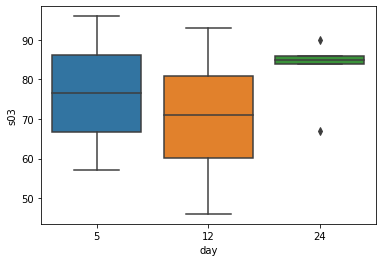

In [32]:
sns.boxplot(x="day", y="s03", data = user_4_df[user_4_df["month"] == 9])

In [226]:
u_id_18 = time_data_set[time_data_set.year == 2018]["user_id"].to_numpy()
np.unique(u_id_18)

array([ 4,  6,  7,  8,  9, 10, 11, 12, 14, 17, 18, 19, 20, 22, 23, 24, 25,
       27, 28, 29, 30, 31, 34, 35, 39, 40, 42, 43, 47, 48, 51, 52, 53],
      dtype=int64)

In [227]:
group_day_mean = time_data_set.groupby(["user_id", "day"]).mean().reset_index()

In [228]:
group_day_mean[group_day_mean["user_id"]==8]

user_id  day  questionnaire_id        s02        s03        s04  \
8         8    1               1.0  64.000000  59.000000  56.000000   
9         8    3               1.0  93.000000  89.000000  94.000000   
10        8    5               1.0  50.000000  76.500000  65.500000   
11        8   12               1.0  68.250000  70.250000  67.500000   
12        8   13               1.0  77.500000  62.500000  81.500000   
13        8   17               1.0  70.333333  66.666667  74.666667   
14        8   18               1.0  67.000000  67.000000  63.000000   
15        8   21               1.0  95.000000  95.000000  89.000000   
16        8   22               1.0  60.333333  55.666667  57.666667   
17        8   23               1.0  95.000000  92.000000  92.000000   
18        8   24               1.0  78.600000  82.400000  79.400000   
19        8   28               1.0  56.000000  54.000000  35.000000   
20        8   29               1.0  68.000000  63.000000  60.000000   

          s05        s06        s07         year      month       hour  \
8   56.000000  53.000000  49.000000  2018.000000  10.000000  12.000000   
9   94.000000  91.000000  92.000000  2018.000000  10.000000  11.000000   
10  62.500000  61.000000  65.000000  2018.000000   9.000000  15.000000   
11  70.000000  69.500000  70.750000  2018.000000   9.000000  15.750000   
12  76.000000  81.000000  82.000000  2018.000000  12.000000  21.000000   
13  69.000000  69.666667  70.333333  2018.000000  12.000000  18.666667   
14  66.500000  62.000000  65.000000  2018.000000  10.000000  16.000000   
15  86.500000  86.000000  84.000000  2018.000000   8.000000  14.000000   
16  69.000000  59.000000  58.666667  2018.333333   8.333333  16.666667   
17  90.666667  91.333333  92.000000  2018.000000   8.000000  16.000000   
18  81.800000  77.750000  78.000000  2018.000000   9.000000  18.800000   
19  80.000000  74.000000  64.000000  2019.000000   3.000000  11.000000   
20  64.000000  65.000000  62.000000  2018.000000  10.000000  16.000000   

       minute  day_of_record  
8   17.000000       0.000000  
9   16.000000       2.000000  
10  35.000000       2.000000  
11  11.750000       2.000000  
12  26.500000       3.000000  
13  25.000000       0.000000  
14  21.000000       3.000000  
15  31.500000       1.000000  
16  24.333333       3.666667  
17  32.666667       3.000000  
18  18.200000       0.000000  
19   3.000000       3.000000  
20  29.000000       0.000000

In [229]:
u_id_19 = time_data_set[time_data_set.year == 2019]["user_id"].to_numpy()
np.unique(u_id_19)

array([  7,   8,   9,  10,  11,  14,  17,  18,  20,  22,  23,  24,  25,
        27,  28,  29,  30,  31,  33,  34,  35,  40,  42,  43,  47,  48,
        51,  52,  53,  59,  63, 128, 129, 130, 131, 133, 134, 135, 136,
       139, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 154, 155,
       156, 157, 158, 159, 162, 163, 164, 166, 167, 168, 169], dtype=int64)

In [230]:
for i, id in enumerate(time_data_set["user_id"].to_numpy()):
    print(i, id)

0 4
1 4
2 4
3 4
4 4
5 4
6 4
7 4
8 4
9 4
10 4
11 4
12 4
13 4
14 4
15 6
16 6
17 6
18 6
19 6
20 6
21 6
22 6
23 6
24 8
25 8
26 8
27 8
28 8
29 7
30 7
31 9
32 9
33 10
34 10
35 10
36 10
37 10
38 10
39 10
40 10
41 10
42 10
43 10
44 10
45 10
46 10
47 10
48 10
49 10
50 11
51 10
52 10
53 10
54 10
55 11
56 11
57 11
58 8
59 8
60 11
61 11
62 10
63 10
64 10
65 11
66 11
67 10
68 11
69 11
70 11
71 11
72 10
73 10
74 11
75 11
76 12
77 11
78 10
79 11
80 10
81 4
82 10
83 11
84 10
85 4
86 8
87 8
88 8
89 8
90 10
91 4
92 4
93 11
94 10
95 11
96 10
97 10
98 10
99 10
100 10
101 10
102 8
103 8
104 8
105 8
106 8
107 10
108 14
109 14
110 8
111 10
112 8
113 14
114 14
115 22
116 22
117 10
118 10
119 22
120 11
121 11
122 11
123 11
124 11
125 18
126 20
127 20
128 11
129 11
130 25
131 19
132 19
133 22
134 19
135 20
136 11
137 27
138 27
139 27
140 10
141 20
142 11
143 22
144 27
145 18
146 20
147 27
148 20
149 27
150 34
151 20
152 22
153 27
154 11
155 18
156 11
157 20
158 22
159 22
160 20
161 22
162 20
163 27
164 27
165 2

1273 31
1274 27
1275 22
1276 30
1277 47
1278 20
1279 23
1280 35
1281 43
1282 17
1283 29
1284 27
1285 22
1286 31
1287 42
1288 18
1289 22
1290 35
1291 17
1292 24
1293 47
1294 23
1295 29
1296 31
1297 30
1298 20
1299 39
1300 22
1301 31
1302 23
1303 17
1304 28
1305 28
1306 42
1307 11
1308 35
1309 47
1310 30
1311 31
1312 31
1313 23
1314 29
1315 29
1316 30
1317 47
1318 35
1319 22
1320 34
1321 27
1322 43
1323 18
1324 22
1325 17
1326 35
1327 23
1328 20
1329 30
1330 29
1331 29
1332 47
1333 22
1334 28
1335 28
1336 42
1337 22
1338 17
1339 29
1340 47
1341 35
1342 23
1343 35
1344 31
1345 11
1346 23
1347 47
1348 28
1349 43
1350 17
1351 29
1352 18
1353 40
1354 22
1355 17
1356 23
1357 28
1358 35
1359 23
1360 29
1361 31
1362 29
1363 47
1364 40
1365 24
1366 30
1367 17
1368 35
1369 22
1370 47
1371 31
1372 29
1373 47
1374 11
1375 35
1376 23
1377 28
1378 43
1379 22
1380 20
1381 47
1382 34
1383 29
1384 24
1385 47
1386 29
1387 42
1388 42
1389 42
1390 47
1391 35
1392 17
1393 29
1394 40
1395 47
1396 24
1397 23


2773 20
2774 48
2775 22
2776 24
2777 29
2778 30
2779 17
2780 42
2781 48
2782 31
2783 51
2784 35
2785 24
2786 28
2787 29
2788 51
2789 29
2790 35
2791 31
2792 48
2793 24
2794 29
2795 51
2796 22
2797 51
2798 20
2799 47
2800 11
2801 34
2802 18
2803 17
2804 35
2805 47
2806 29
2807 48
2808 20
2809 29
2810 31
2811 22
2812 28
2813 47
2814 31
2815 31
2816 31
2817 47
2818 22
2819 35
2820 11
2821 24
2822 48
2823 34
2824 28
2825 24
2826 22
2827 24
2828 47
2829 11
2830 29
2831 48
2832 22
2833 51
2834 51
2835 51
2836 51
2837 51
2838 42
2839 17
2840 17
2841 35
2842 29
2843 47
2844 34
2845 51
2846 31
2847 48
2848 20
2849 22
2850 28
2851 35
2852 28
2853 51
2854 42
2855 28
2856 22
2857 51
2858 29
2859 30
2860 31
2861 48
2862 17
2863 35
2864 11
2865 47
2866 24
2867 51
2868 28
2869 47
2870 43
2871 48
2872 30
2873 18
2874 51
2875 40
2876 17
2877 35
2878 20
2879 47
2880 31
2881 22
2882 34
2883 29
2884 51
2885 28
2886 28
2887 48
2888 47
2889 22
2890 29
2891 11
2892 48
2893 20
2894 43
2895 51
2896 47
2897 30


4459 128
4460 128
4461 135
4462 24
4463 129
4464 63
4465 133
4466 128
4467 130
4468 22
4469 129
4470 136
4471 63
4472 135
4473 128
4474 129
4475 136
4476 128
4477 63
4478 133
4479 135
4480 129
4481 128
4482 128
4483 135
4484 131
4485 131
4486 131
4487 139
4488 129
4489 131
4490 63
4491 128
4492 139
4493 131
4494 128
4495 128
4496 133
4497 22
4498 128
4499 128
4500 139
4501 139
4502 131
4503 131
4504 128
4505 129
4506 131
4507 135
4508 128
4509 128
4510 135
4511 22
4512 136
4513 136
4514 143
4515 129
4516 128
4517 128
4518 131
4519 131
4520 128
4521 131
4522 131
4523 128
4524 131
4525 128
4526 129
4527 139
4528 128
4529 136
4530 143
4531 128
4532 128
4533 63
4534 129
4535 143
4536 135
4537 139
4538 131
4539 128
4540 136
4541 128
4542 133
4543 143
4544 144
4545 63
4546 22
4547 131
4548 143
4549 136
4550 142
4551 63
4552 128
4553 22
4554 131
4555 145
4556 135
4557 143
4558 139
4559 131
4560 143
4561 142
4562 133
4563 131
4564 128
4565 143
4566 135
4567 63
4568 136
4569 63
4570 142
4571 13

6021 150
6022 162
6023 163
6024 154
6025 134
6026 136
6027 146
6028 146
6029 162
6030 155
6031 134
6032 134
6033 150
6034 134
6035 128
6036 152
6037 147
6038 154
6039 163
6040 155
6041 157
6042 129
6043 128
6044 155
6045 154
6046 147
6047 146
6048 159
6049 164
6050 164
6051 155
6052 150
6053 143
6054 158
6055 163
6056 162
6057 135
6058 147
6059 154
6060 136
6061 143
6062 147
6063 146
6064 162
6065 14
6066 155
6067 14
6068 163
6069 139
6070 147
6071 157
6072 149
6073 155
6074 129
6075 143
6076 150
6077 147
6078 162
6079 155
6080 158
6081 14
6082 147
6083 136
6084 143
6085 154
6086 131
6087 128
6088 134
6089 155
6090 146
6091 143
6092 131
6093 164
6094 164
6095 131
6096 155
6097 150
6098 143
6099 149
6100 155
6101 131
6102 146
6103 143
6104 163
6105 134
6106 146
6107 146
6108 155
6109 135
6110 149
6111 139
6112 163
6113 157
6114 143
6115 155
6116 164
6117 133
6118 133
6119 133
6120 133
6121 133
6122 133
6123 129
6124 146
6125 146
6126 150
6127 158
6128 162
6129 162
6130 162
6131 155
6132

In [152]:
user_day_grp_dff = time_data_set.groupby(by=["user_id", "day"]).mean().reset_index()

In [153]:
user_day_grp_dff[user_day_grp_dff["user_id"] == 11]["day"]

53     1
54     2
55     3
56     4
57     5
58     6
59     7
60     8
61     9
62    10
63    11
64    12
65    13
66    14
67    15
68    16
69    17
70    18
71    19
72    20
73    21
74    22
75    23
76    24
77    25
78    26
79    27
80    28
81    29
82    30
83    31
Name: day, dtype: int64

In [60]:
applyFlag = True
if applyFlag:
    time_data_set["s02"] = time_data_set["s02"].apply(lambda x : x/100)
    time_data_set["s03"] = time_data_set["s03"].apply(lambda x : x/100)
    time_data_set["s04"] = time_data_set["s04"].apply(lambda x : x/100)
    time_data_set["s05"] = time_data_set["s05"].apply(lambda x : x/100)
    time_data_set["s06"] = time_data_set["s06"].apply(lambda x : x/100)
    time_data_set["s07"] = time_data_set["s07"].apply(lambda x : x/100)

In [30]:
#User ids used for box plot
user_id = time_data_set["user_id"].unique()

In [31]:
user_22 = time_data_set[time_data_set["user_id"] == 22]

C:\Users\subash\Anaconda3\envs\python-cvcourse\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



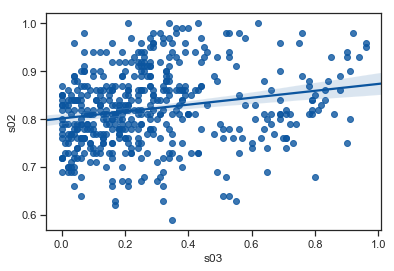

In [236]:
sns.regplot(x="s03", y="s02", data=user_22)

In [156]:
user_id

array([  4,   6,   8,   7,   9,  10,  11,  12,  14,  22,  18,  20,  25,
        19,  27,  34,  29,  24,  30,  23,  28,  35,  42,  17,  39,  40,
        47,  43,  31,  51,  48,  52,  53,  33,  59, 128, 129,  63, 135,
       133, 130, 136, 131, 139, 143, 144, 142, 145, 146, 147, 148, 152,
       149, 154, 150, 156, 155, 157, 158, 159, 134, 162, 163, 164, 166,
       167, 168, 169], dtype=int64)

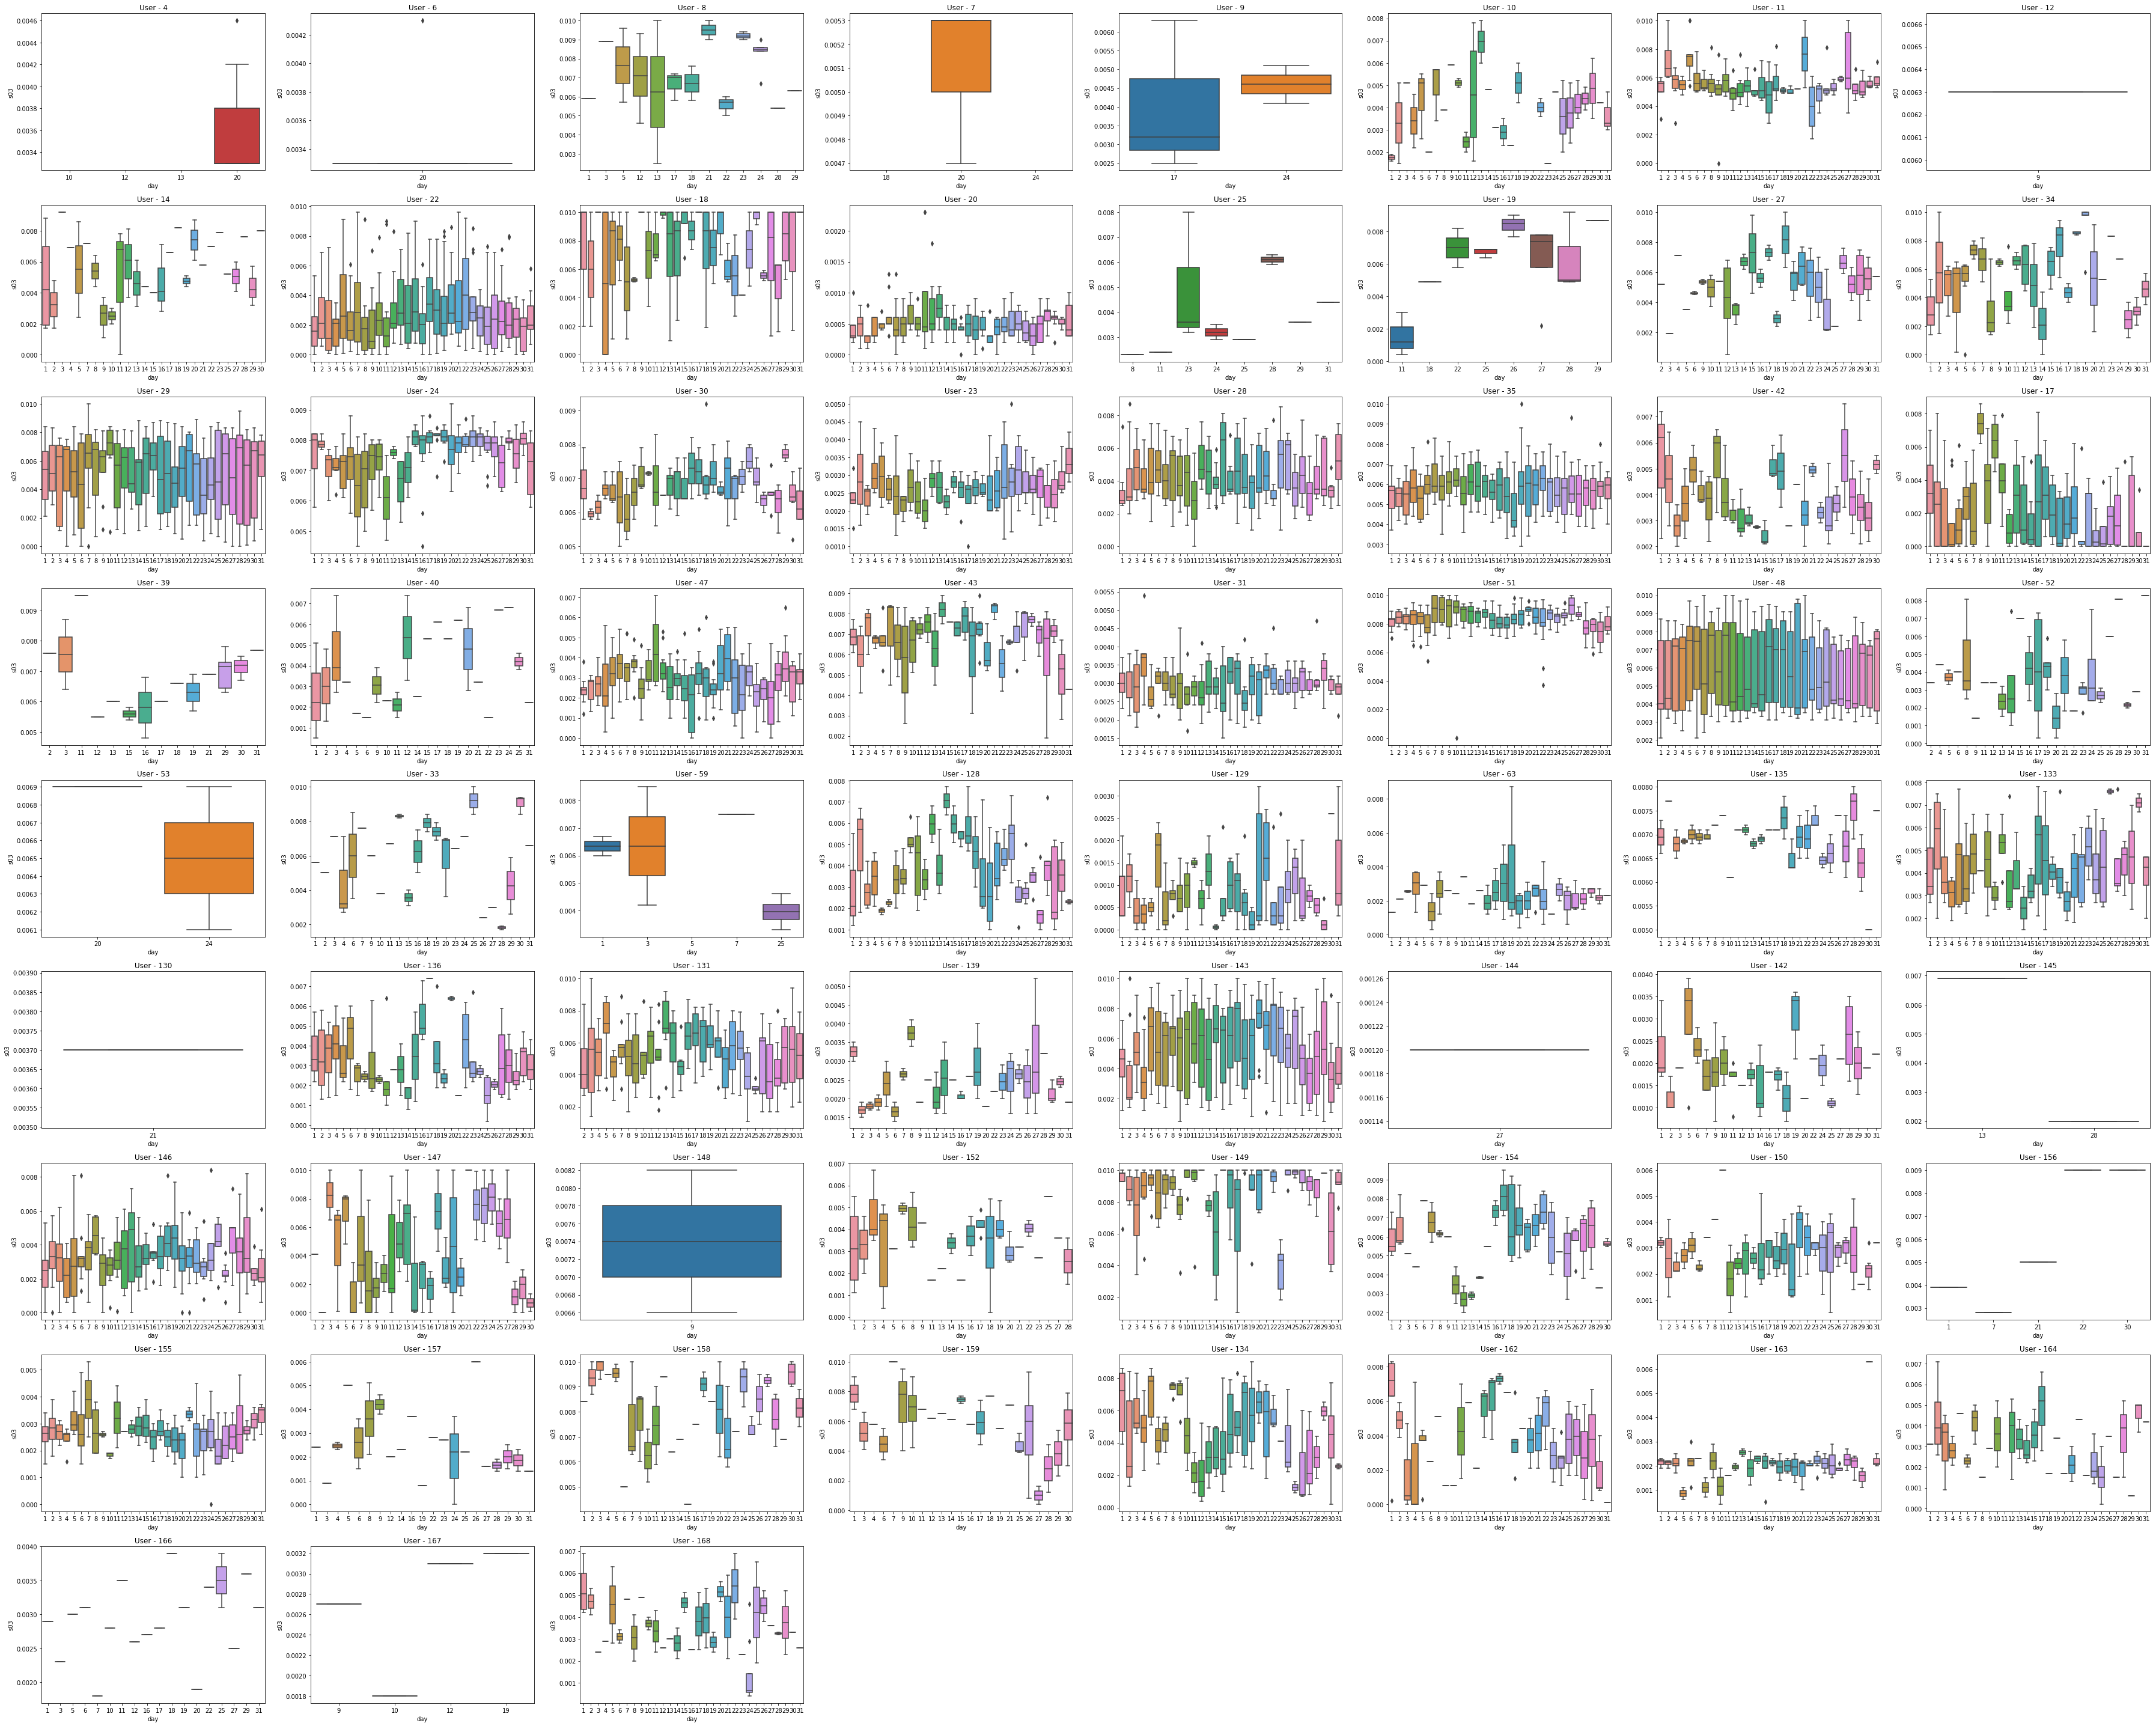

In [61]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(9, 8, figsize=(50, 40))
count = 0
for axs in ax.flatten():
    if(count >= 67):
        break
    sns.boxplot(x="day", y="s03", data=time_data_set[time_data_set["user_id"] == user_id[count]], ax=axs)
    axs.set(title="".join("User - " + str(user_id[count])))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
figure.delaxes(ax[8][6])
figure.delaxes(ax[8][7])
plt.savefig("s03_per_user_box_plot.png")
plt.show()

In [124]:
user_ids = time_data_set["user_id"].unique()

In [125]:
drop_user_ids = [54, 60, 140, 170, 4,   6,   7,   9,  12,  25,  39,  40,
                     53,  33,  59, 128, 130, 144, 145, 148, 156, 157, 166, 167, 168]
array([  4,   6,   7,   9,  12,  25,  39,  40,  53,  33,  59, 128, 130,
       144, 145, 148, 156, 157, 166, 167, 168], dtype=int64)
array([  4,   6,   9,  12,  19,  25,  33,  39,  53,  59, 128, 130, 142,
       144, 145, 147, 148, 154, 155, 156, 157, 166, 167, 168, 169],
      dtype=int64)

NameError: name 'array' is not defined

In [157]:
'''Group user and day time series for making box plot. Only we need are observations and not mean, max etc..'''
#user_day_grp = time_data_set.groupby(by=["user_id", "day", "hour"])

def create_time_series_data(grp, numpy_flag=True):
    first_group_df = grp[1]
    first_group_df["s02"] = first_group_df["s02"].apply(lambda x: x/100)
    first_group_df["s03"] = first_group_df["s03"].apply(lambda x: x/100)
    first_group_df["created_at"] = pd.to_datetime(first_group_df["created_at"])
    first_group_df.sort_values(by="created_at", inplace=True)
    time_index = [i for i in range(0, len(first_group_df["created_at"]))]
    first_group_df["time_index"] = time_index
    #first_group_df = first_group_df.set_index("time_index")
    if not numpy_flag:
        return (grp[0], first_group_df.loc[:, ["time_index", "s02", "s03"]])
    else:
        return (grp[0], first_group_df.loc[:, ["s03"]].to_numpy())
from tslearn.metrics import dtw
from sklearn.metrics.pairwise import cosine_similarity


def create_time_series_ds(groups, numpy_flag=False):
    numpy_data_series = []
    for group in groups:
        ts_data = create_time_series_data(group, numpy_flag)
        numpy_data_series.append(ts_data)
    return numpy_data_series

In [32]:
user_month_grp= time_data_set.groupby(["user_id", "month"])

In [159]:
for group in user_month_grp:
    if group[0][0] == 22:
        print(group)

((22, 1),       user_id  questionnaire_id          created_at  s01   s02   s03   s04  \
2577       22                 1 2019-01-01 07:59:56  YES  0.89  0.28  0.63   
2596       22                 1 2019-01-01 18:17:31  YES  0.70  0.02  0.93   
2626       22                 1 2019-01-02 18:22:30  YES  0.76  0.63  0.65   
2649       22                 1 2019-01-03 12:19:24  YES  0.79  0.72  0.85   
2659       22                 1 2019-01-03 17:14:57  YES  0.75  0.01  0.74   
2676       22                 1 2019-01-04 08:45:13  YES  0.92  0.24  0.88   
2681       22                 1 2019-01-04 12:20:15  YES  0.72  0.00  0.85   
2694       22                 1 2019-01-04 18:46:38  YES  0.72  0.06  0.77   
2710       22                 1 2019-01-05 12:43:00  YES  0.79  0.06  0.87   
2721       22                 1 2019-01-05 16:03:58  YES  0.79  0.01  0.60   
2751       22                 1 2019-01-06 13:22:27  YES  0.80  0.61  0.66   
2775       22                 1 2019-01-07 07:38:56  Y

((22, 12),       user_id  questionnaire_id          created_at  s01   s02   s03   s04  \
1606       22                 1 2018-12-01 09:13:38  YES  0.75  0.16  0.86   
1607       22                 1 2018-12-01 09:13:38  YES  0.75  0.16  0.86   
1692       22                 1 2018-12-04 02:46:17  YES  0.91  0.24  0.85   
1701       22                 1 2018-12-04 10:57:06  YES  0.85  0.21  0.85   
1724       22                 1 2018-12-04 19:19:58  YES  0.82  0.18  0.80   
1734       22                 1 2018-12-05 07:05:33  YES  0.84  0.38  0.80   
1768       22                 1 2018-12-06 04:49:14  YES  0.82  0.25  0.84   
1777       22                 1 2018-12-06 09:33:55  YES  0.81  0.31  0.87   
1794       22                 1 2018-12-06 17:37:37  YES  0.77  0.02  0.93   
1804       22                 1 2018-12-07 03:03:48  YES  0.93  0.49  0.60   
1814       22                 1 2018-12-07 11:43:55  YES  0.73  0.16  0.88   
1852       22                 1 2018-12-08 15:05:39  

In [160]:
'''
Very important logic for working over averages keep this in mind.
Reset index for time stamp needs to be understood '''
user_month_grp= time_data_set.groupby(["user_id", "month"])
'''
from collections import OrderedDict
usr_grp_dict = dict()
method="mean"
print("Taking by day " + method)
for grp in user_month_grp:
    if grp[0][0] not in usr_grp_dict:
        arr = []
        group_df = grp[1]
        if method == "mean":
            group_usr_df = group_df.groupby("day").mean().reset_index()
        elif method == "max":
            group_usr_df = group_df.groupby("day").max().reset_index()
        elif method == "min":
            group_usr_df = group_df.groupby("day").min().reset_index()
        elif method == "median":
            group_usr_df = group_df.groupby("day").median().reset_index()

        day_index_count = [i for i in range(0, len(group_usr_df["day"]))]
        idx = len(day_index_count)
        group_usr_df["day_index_count"] = day_index_count
        usr_grp_dict[grp[0][0]] = group_usr_df[["day_index_count", "day", "s02", "s03",
                                 "s04", "s05", "s06", "s07"]].to_numpy()
    else:
        group_user_arr = usr_grp_dict[grp[0][0]]
        group_df = grp[1]
        #print("Taking by day " + method + "at next iterations")
        if method == "mean":
            group_usr_df = group_df.groupby("day").mean().reset_index()
        elif method == "max":
            group_usr_df = group_df.groupby("day").max().reset_index()
        elif method == "min":
            group_usr_df = group_df.groupby("day").min().reset_index()
        elif method == "median":
            group_usr_df = group_df.groupby("day").median().reset_index()

        print("length of df -- for " + str(grp[0][0]) + "and len " + str(len(group_usr_df)))
        #print(len(group_user_arr))
        #print(len(group_usr_df))
        temp_arr = group_user_arr[len(group_user_arr) - 1]
        
        print(int(temp_arr[0]))

        #Computation for gap filling. Index is not a true index, we account for the gap by a logic
        prev_mday = temp_arr[1]
        curr_mday = group_usr_df["day"].iloc[0]

        #We commonly take 30 as the number of days. It should be noted
        day_diff = 30 - abs(prev_mday - curr_mday)

        if day_diff <= 1:
            gap_fill_penality = 1
        else:
            # The fraction of the difference of day gaps between two months being far apart
            gap_fill_penality = (day_diff/30)
        
        print(gap_fill_penality)

        #print("start", int(temp_arr[len(temp_arr) - 1][0]) + 1)
        #print("end", len(group_user_arr) + len(group_usr_df))
        day_index_count = [i + round(gap_fill_penality,2)  for i in range(int(temp_arr[0]) + 1,
                                            int(temp_arr[0]) + 1 + len(group_usr_df))]
        group_usr_df["day_session_id_count"] = day_index_count
        usr_grp_dict[grp[0][0]] = np.append(group_user_arr, group_usr_df[["day_session_id_count", "day", "s02",
                                            "s03", "s04", "s05", "s06", "s07"]].to_numpy(), axis=0)
'''

'\nfrom collections import OrderedDict\nusr_grp_dict = dict()\nmethod="mean"\nprint("Taking by day " + method)\nfor grp in user_month_grp:\n    if grp[0][0] not in usr_grp_dict:\n        arr = []\n        group_df = grp[1]\n        if method == "mean":\n            group_usr_df = group_df.groupby("day").mean().reset_index()\n        elif method == "max":\n            group_usr_df = group_df.groupby("day").max().reset_index()\n        elif method == "min":\n            group_usr_df = group_df.groupby("day").min().reset_index()\n        elif method == "median":\n            group_usr_df = group_df.groupby("day").median().reset_index()\n\n        day_index_count = [i for i in range(0, len(group_usr_df["day"]))]\n        idx = len(day_index_count)\n        group_usr_df["day_index_count"] = day_index_count\n        usr_grp_dict[grp[0][0]] = group_usr_df[["day_index_count", "day", "s02", "s03",\n                                 "s04", "s05", "s06", "s07"]].to_numpy()\n    else:\n        grou

In [ ]:
usr_grp_dict

In [161]:
'''
Very important logic for working over averages keep this in mind.
Reset index for time stamp needs to be understood
'''
'''usr_grp_dict = {}
for grp in user_month_grp:
    if grp[0][0] not in usr_grp_dict:
        arr=[]
        group_df = grp[1]
        group_usr_df = group_df.groupby("day").mean().reset_index()
        print(len(group_usr_df["day"]))
        day_index_count = [i for i in range(0, len(group_usr_df["day"]))]
        idx = len(day_index_count)
        group_usr_df["day_index_count"] = day_index_count
        arr.append(group_usr_df[["day_index_count", 1"s02", "s03"]].to_numpy())
        usr_grp_dict[grp[0][0]] = arr
    else:
        group_user_arr = usr_grp_dict[grp[0][0]]
        group_df = grp[1]
        group_usr_df = group_df.groupby("day").mean().reset_index()
        print("length of df -- for " + str(grp[0][0]) + "and len " +  str(len(group_usr_df)))
        print(len(group_user_arr))
        print(len(group_usr_df))
        temp_arr = group_user_arr[len(group_user_arr) -1]
        print("start", int(temp_arr[len(temp_arr) -1][0]) + 1)
        print("end", len(group_user_arr) + len(group_usr_df))
        day_index_count = [i for i in range(int(temp_arr[len(temp_arr) -1][0]) + 1, int(temp_arr[len(temp_arr) -1][0]) + 1 + len(group_usr_df) )]
        group_usr_df["day_index_count"] = day_index_count
        group_user_arr.append(group_usr_df[["day_index_count", "s02", "s03"]].to_numpy())
        usr_grp_dict[grp[0][0]] = group_user_arr  
'''

'usr_grp_dict = {}\nfor grp in user_month_grp:\n    if grp[0][0] not in usr_grp_dict:\n        arr=[]\n        group_df = grp[1]\n        group_usr_df = group_df.groupby("day").mean().reset_index()\n        print(len(group_usr_df["day"]))\n        day_index_count = [i for i in range(0, len(group_usr_df["day"]))]\n        idx = len(day_index_count)\n        group_usr_df["day_index_count"] = day_index_count\n        arr.append(group_usr_df[["day_index_count", 1"s02", "s03"]].to_numpy())\n        usr_grp_dict[grp[0][0]] = arr\n    else:\n        group_user_arr = usr_grp_dict[grp[0][0]]\n        group_df = grp[1]\n        group_usr_df = group_df.groupby("day").mean().reset_index()\n        print("length of df -- for " + str(grp[0][0]) + "and len " +  str(len(group_usr_df)))\n        print(len(group_user_arr))\n        print(len(group_usr_df))\n        temp_arr = group_user_arr[len(group_user_arr) -1]\n        print("start", int(temp_arr[len(temp_arr) -1][0]) + 1)\n        print("end", len(

In [ ]:
time_data_set["day"].iloc[0]

In [ ]:
usr_grp_dict

In [ ]:
usr_grp_dict[20][0][1]

In [ ]:
temp_arr[3-1][0]

In [33]:
user_day_grp = time_data_set.groupby(by=["user_id", "day", "hour"])

In [34]:
user_day_grp1 = time_data_set.groupby(by=["user_id", "day"])

user_id  day  hour
4        10   16        [4]
         12   7         [4]
         13   8         [4]
         20   12        [4]
6        20   12        [6]
7        18   8         [7]
         20   7         [7]
         24   7         [7]
8        1    12        [8]
         3    11        [8]
         5    15        [8]
         12   15        [8]
              16        [8]
         13   21        [8]
         17   16        [8]
              20        [8]
         18   16        [8]
         21   14        [8]
         22   12        [8]
              18        [8]
              20        [8]
         23   16        [8]
         24   18        [8]
              19        [8]
         28   11        [8]
         29   16        [8]
9        17   6         [9]
              12        [9]
         24   10        [9]
10       1    8        [10]
                      ...  
169      16   14      [169]
              17      [169]
              18      [169]
         17   9       [169]
 

In [35]:
user_group_day = user_day_grp.size().reset_index(name="number_of_observations")

In [36]:
print("Total users are: -- ", len(user_group_day["user_id"].unique()))

Total users are: --  68


In [166]:
for grp in user_day_grp:
    if grp[0][0] == 22:
        print("day {} and val length {}".format(grp[0][1], [val for val in grp[1]["s03"].to_numpy() if np.isnan(val)]))

day 1 and val length []
day 1 and val length []
day 1 and val length []
day 1 and val length []
day 1 and val length []
day 1 and val length []
day 1 and val length []
day 1 and val length []
day 2 and val length []
day 2 and val length []
day 2 and val length []
day 2 and val length []
day 2 and val length []
day 2 and val length []
day 2 and val length []
day 2 and val length []
day 2 and val length []
day 3 and val length []
day 3 and val length []
day 3 and val length []
day 3 and val length []
day 3 and val length []
day 3 and val length []
day 3 and val length []
day 4 and val length []
day 4 and val length []
day 4 and val length []
day 4 and val length []
day 4 and val length []
day 4 and val length []
day 4 and val length []
day 4 and val length []
day 4 and val length []
day 5 and val length []
day 5 and val length []
day 5 and val length []
day 5 and val length []
day 5 and val length []
day 5 and val length []
day 5 and val length []
day 5 and val length []
day 5 and val le

In [241]:
number_of_obs_s02 = []
number_of_obs_s03 = []
day_user_id = []
grp_day_usr = []
#grp_hr_usr = []
prev_user=0
prev_day=0
prev_hr=0
n_count_s03=0
n_count_s02=0
for grp in user_day_grp1:
    s03_list=[val for val in grp[1]["s03"].to_numpy() if not np.isnan(val)]
    s02_list=[val for val in grp[1]["s02"].to_numpy() if not np.isnan(val)]
    n_count_s03=len(s03_list)
    n_count_s02=len(s02_list)
    prev_day = grp[0][1]
    #prev_hr = grp[0][2]
    prev_user = grp[0][0]
    number_of_obs_s02.append(n_count_s02)
    number_of_obs_s03.append(n_count_s03)
    day_user_id.append(prev_user)
    grp_day_usr.append(prev_day)
    #grp_hr_usr.append(prev_hr)

In [242]:
print("Length of n_observations s02 {}, s03 {} length of user_id {} and length of day {}".format(
len(number_of_obs_s02),len(number_of_obs_s03),
len(day_user_id),
len(grp_day_usr)
))

Length of n_observations s02 1545, s03 1545 length of user_id 1545 and length of day 1545


In [243]:
number_of_obs_s03_dh = []
number_of_obs_s02_dh = []
day_hruser_id = []
grp_hrday_usr_day = []
grp_hrday_usr_hr = []
prev_user=0
prev_day=0
prev_hr=0
n_count=0
for grp in user_day_grp:
    s03_list=[val for val in grp[1]["s03"].to_numpy() if not np.isnan(val)]
    s02_list=[val for val in grp[1]["s02"].to_numpy() if not np.isnan(val)]
    n_count_s03=len(s03_list)
    n_count_s02=len(s02_list)
    prev_day = grp[0][1]
    prev_hr = grp[0][2]
    prev_user = grp[0][0]
    number_of_obs_s02_dh.append(n_count_s02)
    number_of_obs_s03_dh.append(n_count_s03)
    day_hruser_id.append(prev_user)
    grp_hrday_usr_day.append(prev_day)
    grp_hrday_usr_hr.append(prev_hr)

In [244]:
print("Length of n_observations s02 {}, s03 {}, length of user_id {} and length of day {} and length of hr {}".format(
len(number_of_obs_s02),len(number_of_obs_s03),
len(day_hruser_id),
len(grp_hrday_usr_day),
len(grp_hrday_usr_hr)
))

Length of n_observations s02 1545, s03 1545, length of user_id 5737 and length of day 5737 and length of hr 5737


In [245]:
dict_df_nobs1 = {
    "user_id": day_hruser_id,
    "days": grp_hrday_usr_day,
    "hour": grp_hrday_usr_hr,
    "n_obs_s02": number_of_obs_s02_dh,
    "n_obs_s03": number_of_obs_s03_dh
}

df_user_nobs_day_hr = pd.DataFrame(dict_df_nobs1)

In [246]:
dict_df_nobs2 = {
    "user_id": day_user_id,
    "days": grp_day_usr,
    "n_obs_s02": number_of_obs_s02,
    "n_obs_s03": number_of_obs_s03
}

df_user_nobs_day = pd.DataFrame(dict_df_nobs2)

In [285]:
df_user_nobs_day_hr[(df_user_nobs_day_hr["user_id"] == 51) & (df_user_nobs_day_hr["days"] == 22)]

user_id  days  hour  n_obs_s02  n_obs_s03
3241       51    22     6          1          1
3242       51    22     7          3          3
3243       51    22     8          2          2
3244       51    22     9          1          1
3245       51    22    12         11         11
3246       51    22    13          2          2
3247       51    22    15          1          1
3248       51    22    16          1          1
3249       51    22    17          2          2
3250       51    22    19          1          1
3251       51    22    21          1          1
3252       51    22    22          1          1

In [281]:
df_user_nobs_day[df_user_nobs_day["user_id"] == 51]

user_id  days  n_obs_s02  n_obs_s03
702       51     1         15         15
703       51     2         10         10
704       51     3         15         15
705       51     4         20         20
706       51     5         17         17
707       51     6         16         16
708       51     7         14         14
709       51     8         16         16
710       51     9         14         14
711       51    10         15         15
712       51    11         14         14
713       51    12          8          8
714       51    13         16         16
715       51    14         19         19
716       51    15         16         16
717       51    16         14         14
718       51    17          6          6
719       51    18         21         21
720       51    19         10         10
721       51    20          8          8
722       51    21         16         16
723       51    22         27         27
724       51    23          6          6
725       51    24         12         12
726       51    25         14         14
727       51    26         12         12
728       51    27         18         18
729       51    28         14         14
730       51    29         12         12
731       51    30         10         10
732       51    31          3          3

In [248]:
df_user_nobs_day_hr.head()

user_id  days  hour  n_obs_s02  n_obs_s03
0        4    10    16          1          0
1        4    12     7          1          0
2        4    13     8          2          0
3        4    20    12         15         12
4        6    20    12          9          9

In [74]:
df_user_nobs["user_id"].value_counts()

NameError: name 'df_user_nobs' is not defined

In [ ]:
df_user_nobs.to_csv("n_obs_so3.csv")

In [ ]:
ad=user_group_day[user_group_day["user_id"] == 51].groupby(["user_id", "day", "hour"]).sum().reset_index()

In [ ]:
ad

In [ ]:
plt.figure(figsize=(60, 6))
sns.barplot(x="day", y="number_of_observations", hue="hour", 
            data=ad)

C:\Users\subash\Anaconda3\envs\python-cvcourse\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


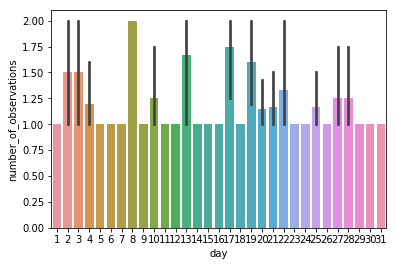

In [62]:
sns.barplot(x="day", y="number_of_observations", data=user_group_day[user_group_day["user_id"] == 128])

In [63]:
user_group_day["user_id"].value_counts()
#Value counts less than users are: 

22     330
51     264
143    251
35     244
47     231
29     218
48     212
146    208
28     200
20     182
24     172
31     158
131    156
17     138
23     132
11     127
128    119
149    118
30     113
129    110
155    108
134     99
136     91
43      89
147     89
133     89
163     87
169     85
154     72
42      72
      ... 
10      54
152     54
168     53
158     52
139     49
159     48
135     48
52      45
14      44
33      38
40      33
157     31
39      23
166     19
8       18
19      13
25      10
59       7
156      5
167      4
4        4
9        3
7        3
148      2
53       2
145      2
144      1
6        1
130      1
12       1
Name: user_id, Length: 68, dtype: int64

In [42]:
user_group_day.head()

user_id  day  hour  number_of_observations
0        4   10    16                       1
1        4   12     7                       1
2        4   13     8                       2
3        4   20    12                      15
4        6   20    12                       9

In [43]:
user_group_month = user_month_grp.size().reset_index(name="number_of_observations")

In [45]:
user_group_month[user_group_month["user_id"] == 128]

user_id  month  number_of_observations
165      128      5                      56
166      128      6                      52
167      128      7                      20
168      128      8                      11
169      128      9                       1

In [ ]:
#sns.set_palette("coolwarm")
sns.set_style("dark")
import matplotlib.pyplot as plt
sns.set(style="ticks", palette="Blues_r")
plt.figure(figsize=(20, 14))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="month", y="number_of_observations",
            data=user_group_month, palette="Set2")
sns.despine(offset=10, trim=True)

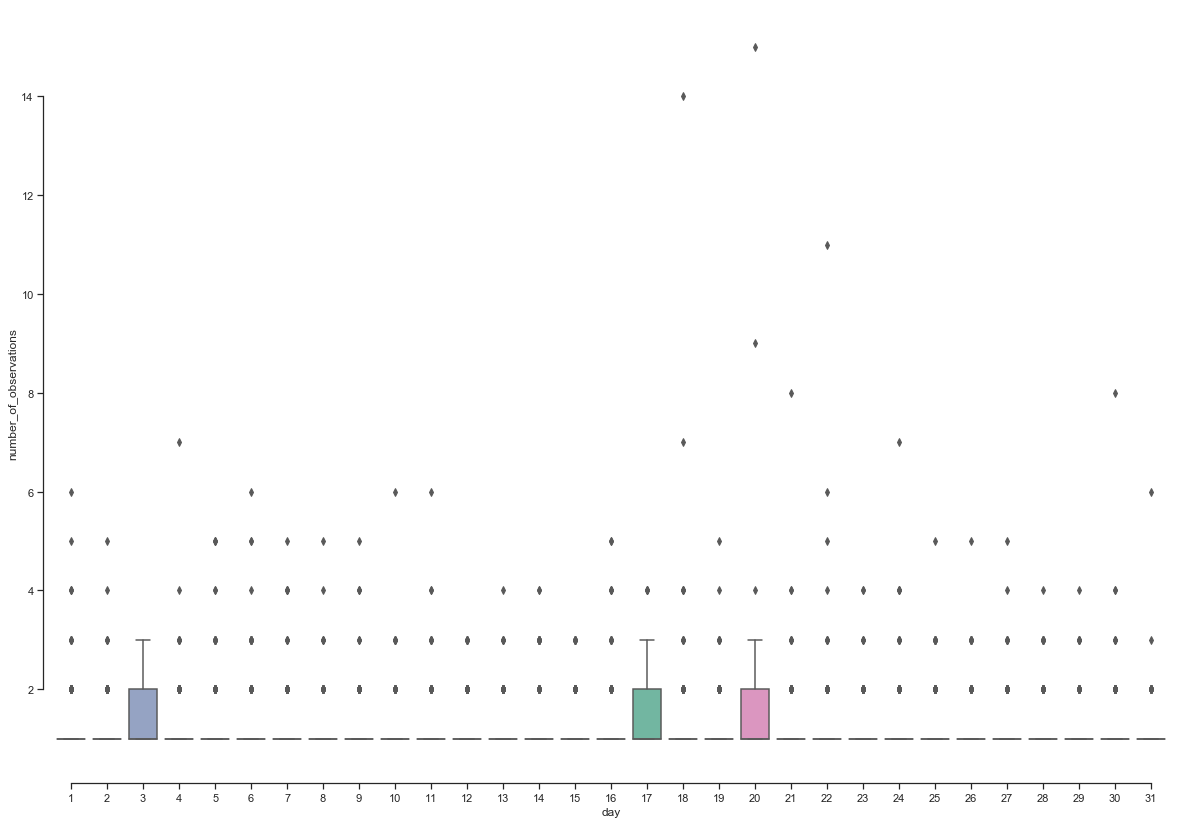

In [97]:
#sns.set_palette("coolwarm")
sns.set_style("dark")
import matplotlib.pyplot as plt
sns.set(style="ticks", palette="Blues_r")
plt.figure(figsize=(20, 14))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="number_of_observations",
            data=user_group_day, palette="Set2")
sns.despine(offset=10, trim=True)

In [99]:
df_user_nobs_day.head()

user_id  days  hour  n_obs_s02  n_obs_s03
0        4    10    16          1          0
1        4    12     7          1          0
2        4    13     8          2          0
3        4    20    12         15         12
4        6    20    12          9          9

In [175]:
import plotly.express as px
import plotly
df = px.data.tips()
fig = px.box(df_user_nobs_day, x="days", y="n_obs_s03", 
             points="all", hover_name="user_id",notched=True, width=1000, height= 600)

fig.update_layout(
    autosize=False,
    width=950,
    height=600,
    title_text="Users distress observations for each day")
fig.show()
#plotly.offline.plot(fig, filename="users_distress_each_day_notch.html")
#plotly.offline.plot(fig, filename="users_distress_each_day_notch1.html", include_plotlyjs=False, output_type='div')

In [77]:
#plotly.offline.plot(fig, filename="users_distress_each_day_notch.html")


NameError: name 'df_user_nobs' is not defined

In [ ]:
df_grp_day_nobs["days"].value_counts()

In [202]:
df_grp_day_nobs_dh = df_user_nobs_day_hr.groupby(["user_id", "days"]).sum().reset_index()
total_day_users_dayhr = pd.DataFrame({"day": df_grp_day_nobs_dh["days"].value_counts().index, "total_users": df_grp_day_nobs_dh["days"].value_counts().values})
total_users_dh = total_day_users_dayhr.sort_values(["day"])["total_users"].to_numpy()

In [203]:
total_users_dh

array([51, 49, 52, 48, 51, 49, 47, 45, 52, 46, 53, 52, 50, 49, 49, 48, 52,
       51, 53, 52, 48, 50, 49, 52, 52, 44, 50, 51, 53, 50, 47],
      dtype=int64)

In [204]:
total_day_users = pd.DataFrame({"day": df_user_nobs_day["days"].value_counts().index, "total_users": df_user_nobs_day["days"].value_counts().values})
total_users = total_day_users.sort_values(["day"])["total_users"].to_numpy()

In [205]:
total_users

array([51, 49, 52, 48, 51, 49, 47, 45, 52, 46, 53, 52, 50, 49, 49, 48, 52,
       51, 53, 52, 48, 50, 49, 52, 52, 44, 50, 51, 53, 50, 47],
      dtype=int64)

In [82]:
df_user_nobs[df_user_nobs["days"] == 1]["user_id"].to_numpy()

NameError: name 'df_user_nobs' is not defined

In [83]:
df_user_nobs[df_user_nobs["days"] == 1]["hour"].to_numpy()

NameError: name 'df_user_nobs' is not defined

In [286]:
df_user_nobs_day_hr[df_user_nobs_day_hr["days"] ==22]["hour"].to_numpy()

array([12, 18, 20, 16, 21,  5, 17, 18, 12,  5, 11, 19, 20, 22, 18,  5,  6,
        7, 11, 12, 16, 18,  1,  2,  5,  7,  8, 10, 11, 15, 16, 17,  6,  9,
       11, 12, 17, 18,  7,  9, 13, 14, 17,  7, 16, 17,  8,  9, 11, 16, 17,
       19,  7,  8,  9, 11, 12, 14, 15, 18, 19, 20,  7, 16, 21,  9, 13, 15,
       16, 17, 20,  5,  7,  8, 11, 12, 16, 19, 23, 10, 18, 10, 19,  7,  8,
       10, 12, 13, 14, 18,  7, 12, 13, 18, 20,  6,  7,  8,  9, 12, 13, 15,
       16, 17, 19, 21, 22, 21,  6, 13, 14,  6, 13, 19,  7, 13, 15, 17,  4,
        7,  8, 11, 17, 18, 12, 15, 19, 21,  8, 11, 13,  6, 15, 18,  4,  7,
        8, 19, 20,  7, 11,  7, 10, 13, 16, 17, 19, 20, 21,  7,  8, 12, 14,
       17, 18,  6, 13, 15,  7,  8, 15, 17, 20, 21,  8, 10,  6, 13, 14,  3,
        8, 10, 12, 14, 16,  6, 17,  0,  5, 22,  4,  6, 16, 10, 11, 19, 13,
       16, 17, 19], dtype=int64)

In [9]:
col_list = ["#778899" for i in range(31)]

import plotly.graph_objects as go
days_list = np.sort(df_user_nobs_day_hr["days"].unique())
user_ids = df_user_nobs_day_hr["user_id"].unique()
fig = go.Figure()
for day, colors, t_users in zip(days_list, col_list, total_users_dh):
    fig.add_trace(go.Box(
        y= df_user_nobs_day_hr[df_user_nobs_day_hr["days"] == day]["n_obs_s03"].to_numpy(),
        name= "".join("(Day-" + str(day) + " \n total_users-" + str(t_users) + ")"),
        hovertext = ["".join("(User_id: " + str(id) + "\n Hour: " + str(hr) + ")") for id, hr in zip(df_user_nobs_day_hr[df_user_nobs_day_hr["days"] == day]["user_id"].to_numpy(),
                                                                                                        df_user_nobs_day_hr[df_user_nobs_day_hr["days"] == day]["hour"].to_numpy())],
        jitter=0.45,
        pointpos=0,
        boxmean=True,
        boxpoints='all', # all points are shown
        fillcolor = str(colors),
         marker=dict(
                    color='rgb(7,40,89)',
                    size=1,
                    line=dict(
                        color='rgb(255,69,0)',
                        width=1
                    )),
        #marker_color='rgb(7,40,89)',
        #line_color='rgb(7,40,89)',
        width=.55  
    ))
fig.update_layout(
    boxgap=0.05,
    title_text="Users (S03 - Tinnitus Distress) numbers of observations at [day, hour] level")
fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="number_of_observations")
#plotly.offline.plot(fig, filename="users_distress_each_days_s03_notch_msd.html")
plotly.offline.plot(fig, filename="users_s03_day_hr_bplot.html")

ModuleNotFoundError: No module named 'plotly.graph_objects'

In [10]:
col_list = ["#778899" for i in range(31)]

import plotly.graph_objects as go
days_list = np.sort(df_user_nobs_day_hr["days"].unique())
user_ids = df_user_nobs_day_hr["user_id"].unique()
fig = go.Figure()
for day, colors, t_users in zip(days_list, col_list, total_users_dh):
    fig.add_trace(go.Box(
        y= df_user_nobs_day_hr[df_user_nobs_day_hr["days"] == day]["n_obs_s02"].to_numpy(),
        name= "".join("(Day-" + str(day) + " \n total_users-" + str(t_users) + ")"),
        hovertext = ["".join("(User_id: " + str(id) + "\n Hour: " + str(hr) + ")") for id, hr in zip(df_user_nobs_day_hr[df_user_nobs_day_hr["days"] == day]["user_id"].to_numpy(),
                                                                                                        df_user_nobs_day_hr[df_user_nobs_day_hr["days"] == day]["hour"].to_numpy())],
        jitter=0.45,
        pointpos=0,
        boxmean=True,
        boxpoints='all', # all points are shown
        fillcolor = str(colors),
         marker=dict(
                            color='rgb(7,40,89)',
                            size=1,
                            line=dict(
                                color='rgb(255,69,0)',
                                width=1
                            )),
        
        #marker_color='rgb(7,40,89)',
        #line_color='rgb(7,40,89)',
        width=.55  
    ))
fig.update_layout(
    boxgap=0.05,
    title_text="Users (S02 - Tinnitus Loudness) sequence of observations at [day, hour] level")
fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="number_of_observations")
#plotly.offline.plot(fig, filename="users_distress_each_days_s03_notch_msd.html")
plotly.offline.plot(fig, filename="users_s02_day_hr_bplot.html")

ModuleNotFoundError: No module named 'plotly.graph_objects'

In [11]:
col_list = ["#778899" for i in range(31)]

import plotly.graph_objects as go
days_list = np.sort(df_user_nobs_day["days"].unique())
user_ids = df_user_nobs_day["user_id"].unique()
fig = go.Figure()
for day, colors, t_users in zip(days_list, col_list, total_users):
    fig.add_trace(go.Box(
        y= df_user_nobs_day[df_user_nobs_day["days"] == day]["n_obs_s03"].to_numpy(),
        name= "".join("(Day-" + str(day) + " \n total_users-" + str(t_users) + ")"),
        hovertext = ["".join("(User_id: " + str(id) + ")") for id in df_user_nobs_day[df_user_nobs_day["days"] == day]["user_id"].to_numpy()],
        jitter=0.45,
        pointpos=0,
        boxmean=True,
        boxpoints='all', # all points are shown
        fillcolor = str(colors),
        marker=dict(
                    color='rgb(7,40,89)',
                    size=1,
                    line=dict(
                        color='rgb(255,69,0)',
                        width=1
                    )),
        #marker_color='rgb(7,40,89)',
        #line_color='rgb(7,40,89)',
        width=.70  
    ))
fig.update_layout(
    boxgap=0.05,
    title_text="Users (S03 - Tinnitus Distress) total number of observations at at [day] level ")
fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Total number_of_observations (Tinnitus Distress - (S03)) for day")
#plotly.offline.plot(fig, filename="users_distress_each_days_s03_notch_msd.html")
plotly.offline.plot(fig, filename="users_s03_day_bplot.html")

ModuleNotFoundError: No module named 'plotly.graph_objects'

In [12]:
col_list = ["#778899" for i in range(31)]
import plotly.graph_objects as go
days_list = np.sort(df_user_nobs_day["days"].unique())
user_ids = df_user_nobs_day["user_id"].unique()
fig = go.Figure()
for day, colors, t_users in zip(days_list, col_list, total_users):
    fig.add_trace(go.Box(
        y= df_user_nobs_day[df_user_nobs_day["days"] == day]["n_obs_s02"].to_numpy(),
        name= "".join("(Day-" + str(day) + " \n total_users-" + str(t_users) + ")"),
        hovertext = ["".join("(User_id: " + str(id) + ")") for id in df_user_nobs_day[df_user_nobs_day["days"] == day]["user_id"].to_numpy()],
        jitter=0.55,
        pointpos=0,
        boxmean=True,
        boxpoints='all', # all points are shown
        fillcolor = str(colors),
        marker=dict(
                    color='rgb(7,40,89)',
                    size=1,
                    line=dict(
                        color='rgb(255,69,0)',
                        width=1
                    )),
        #marker_color='rgb(7,40,89)',
        #line_color='rgb(7,40,89)',
        width=.70  
    ))
fig.update_layout(
    boxgap=0.05,
    title_text="Users (S02 - Tinnitus Loudness) total number of observations at [day] level ")
fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Total number_of_observations (Tinnitus Loudness - (S02)) for day")
#plotly.offline.plot(fig, filename="users_distress_each_days_s03_notch_msd.html")
plotly.offline.plot(fig, filename="users_s02_day_bplot.html")

NameError: name 'df_user_nobs_day' is not defined

In [209]:
total_day_users

day  total_users
0    19           53
1    29           53
2    11           53
3    20           52
4     9           52
5    12           52
6    25           52
7    24           52
8    17           52
9     3           52
10   18           51
11    1           51
12   28           51
13    5           51
14   22           50
15   30           50
16   13           50
17   27           50
18    6           49
19   23           49
20   15           49
21   14           49
22    2           49
23    4           48
24   16           48
25   21           48
26    7           47
27   31           47
28   10           46
29    8           45
30   26           44

In [191]:
fig.to_json()

'{"data":[{"boxmean":"sd","boxpoints":"all","fillcolor":"#778899","hovertext":["(User_id: 8<br/> Hour: 12)","(User_id: 10<br/> Hour: 8)","(User_id: 10<br/> Hour: 21)","(User_id: 11<br/> Hour: 7)","(User_id: 11<br/> Hour: 10)","(User_id: 11<br/> Hour: 12)","(User_id: 11<br/> Hour: 16)","(User_id: 14<br/> Hour: 6)","(User_id: 14<br/> Hour: 13)","(User_id: 14<br/> Hour: 15)","(User_id: 14<br/> Hour: 18)","(User_id: 17<br/> Hour: 0)","(User_id: 17<br/> Hour: 5)","(User_id: 17<br/> Hour: 7)","(User_id: 17<br/> Hour: 8)","(User_id: 17<br/> Hour: 9)","(User_id: 17<br/> Hour: 13)","(User_id: 17<br/> Hour: 15)","(User_id: 17<br/> Hour: 18)","(User_id: 17<br/> Hour: 19)","(User_id: 18<br/> Hour: 1)","(User_id: 18<br/> Hour: 21)","(User_id: 18<br/> Hour: 22)","(User_id: 20<br/> Hour: 7)","(User_id: 20<br/> Hour: 12)","(User_id: 20<br/> Hour: 14)","(User_id: 20<br/> Hour: 18)","(User_id: 22<br/> Hour: 2)","(User_id: 22<br/> Hour: 7)","(User_id: 22<br/> Hour: 8)","(User_id: 22<br/> Hour: 9)","(User

In [51]:
import plotly.express as px
import plotly
df = px.data.tips()
fig = px.box(user_group_month, x="month", y="number_of_observations", 
             points="all", hover_name="user_id", notched=True, width=1000, height= 600)

fig.update_layout(
    autosize=False,
    width=950,
    height=600,
    title_text="Users distress observations for each month")
fig.show()
plotly.offline.plot(fig, filename="users_distress_each_month_notch.html")
#plotly.offline.plot(fig, filename="users_distress_each_day_notch1.html", include_plotlyjs=False, output_type='div')

'users_distress_each_month_notch.html'

In [55]:
month_list = np.sort(user_group_month["month"].unique())
user_ids = user_group_month["user_id"].unique()

In [56]:
user_group_day[user_group_day["day"] == 1]["number_of_observations"].to_numpy()

array([ 1,  2,  4,  4,  8,  3,  4, 16,  5, 12,  7, 10,  7, 10,  1,  2,  9,
        3,  1,  4, 11, 13, 14,  2,  5,  3,  5,  2,  3,  2,  7, 14, 10,  1,
        5,  2,  4,  3,  4,  1,  1,  1,  3,  5,  3,  1,  1,  4,  3],
      dtype=int64)

In [58]:
user_ids

array([  4,   6,   8,   9,  10,  11,  12,  14,  17,  18,  19,  20,  22,
        23,  24,  25,  27,  28,  29,  30,  31,  33,  34,  35,  39,  40,
        42,  43,  47,  48,  51,  52,  53,  59,  63, 128, 129, 130, 131,
       133, 134, 135, 136, 139, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 154, 155, 156, 157, 158, 159, 162, 163, 164, 166, 167,
       168, 169], dtype=int64)

In [83]:
col_list = ["#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0"]

import plotly.graph_objects as go
month_list = np.sort(user_group_month["month"].unique())
user_ids = user_group_month["user_id"].unique()
fig = go.Figure()
for month, colors in zip(month_list, col_list):
    fig.add_trace(go.Box(
        y= user_group_month[user_group_month["month"] == month]["number_of_observations"].to_numpy(),
        name= "".join("month-" + str(month)),
        hovertext = ["".join("User_id: " + str(id)) for id in user_group_month[user_group_month["month"] == month]["user_id"].to_numpy()],
        jitter=0.3,
        pointpos=-1.8,
        boxmean="sd",
        boxpoints='all', # represent all points
        fillcolor = str(colors),
        marker_color='rgb(7,40,89)',
        line_color='rgb(7,40,89)',
    ))
fig.update_layout(
    title_text="Users sequence of observations at month level ")
fig.update_xaxes(title_text="month")
fig.update_yaxes(title_text="number_of_observations")
plotly.offline.plot(fig, filename="users_distress_each_month_notch_msd.html")
#plotly.offline.plot(fig, filename="users_distress_each_day_notch_msd1.html", include_plotlyjs=False, output_type='div')

ModuleNotFoundError: No module named 'plotly.graph_objects'

In [52]:
col_list = ["#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0",
"#4C73C4",
"#756BC2",
"#9761BA",
"#B455AA",
"#CB4A95",
"#0078C0"]

import plotly.graph_objects as go
day_list = np.sort(user_group_day["day"].unique())
user_ids = user_group_day["user_id"].unique()
fig = go.Figure()
for day, colors in zip(day_list, col_list):
    fig.add_trace(go.Box(
        y= user_group_day[user_group_day["day"] == day]["number_of_observations"].to_numpy(),
        name= "".join("Day-" + str(day)),
        hovertext = ["".join("User_id: " + str(id)) for id in user_group_day[user_group_day["day"] == day]["user_id"].to_numpy()],
        jitter=0.3,
        pointpos=-1.8,
        boxmean="sd",
        boxpoints='all', # represent all points
        fillcolor = str(colors),
        marker_color='rgb(7,40,89)',
        line_color='rgb(7,40,89)',
    ))
fig.update_layout(
    title_text="Users sequence of observations at day level")
fig.update_xaxes(title_text="days")
fig.update_yaxes(title_text="number_of_observations")
plotly.offline.plot(fig, filename="users_distress_each_day_notch_msd.html")
#plotly.offline.plot(fig, filename="users_distress_each_day_notch_msd1.html", include_plotlyjs=False, output_type='div')

'users_distress_each_day_notch_msd.html'

C:\Users\subash\Anaconda3\envs\python-cvcourse\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


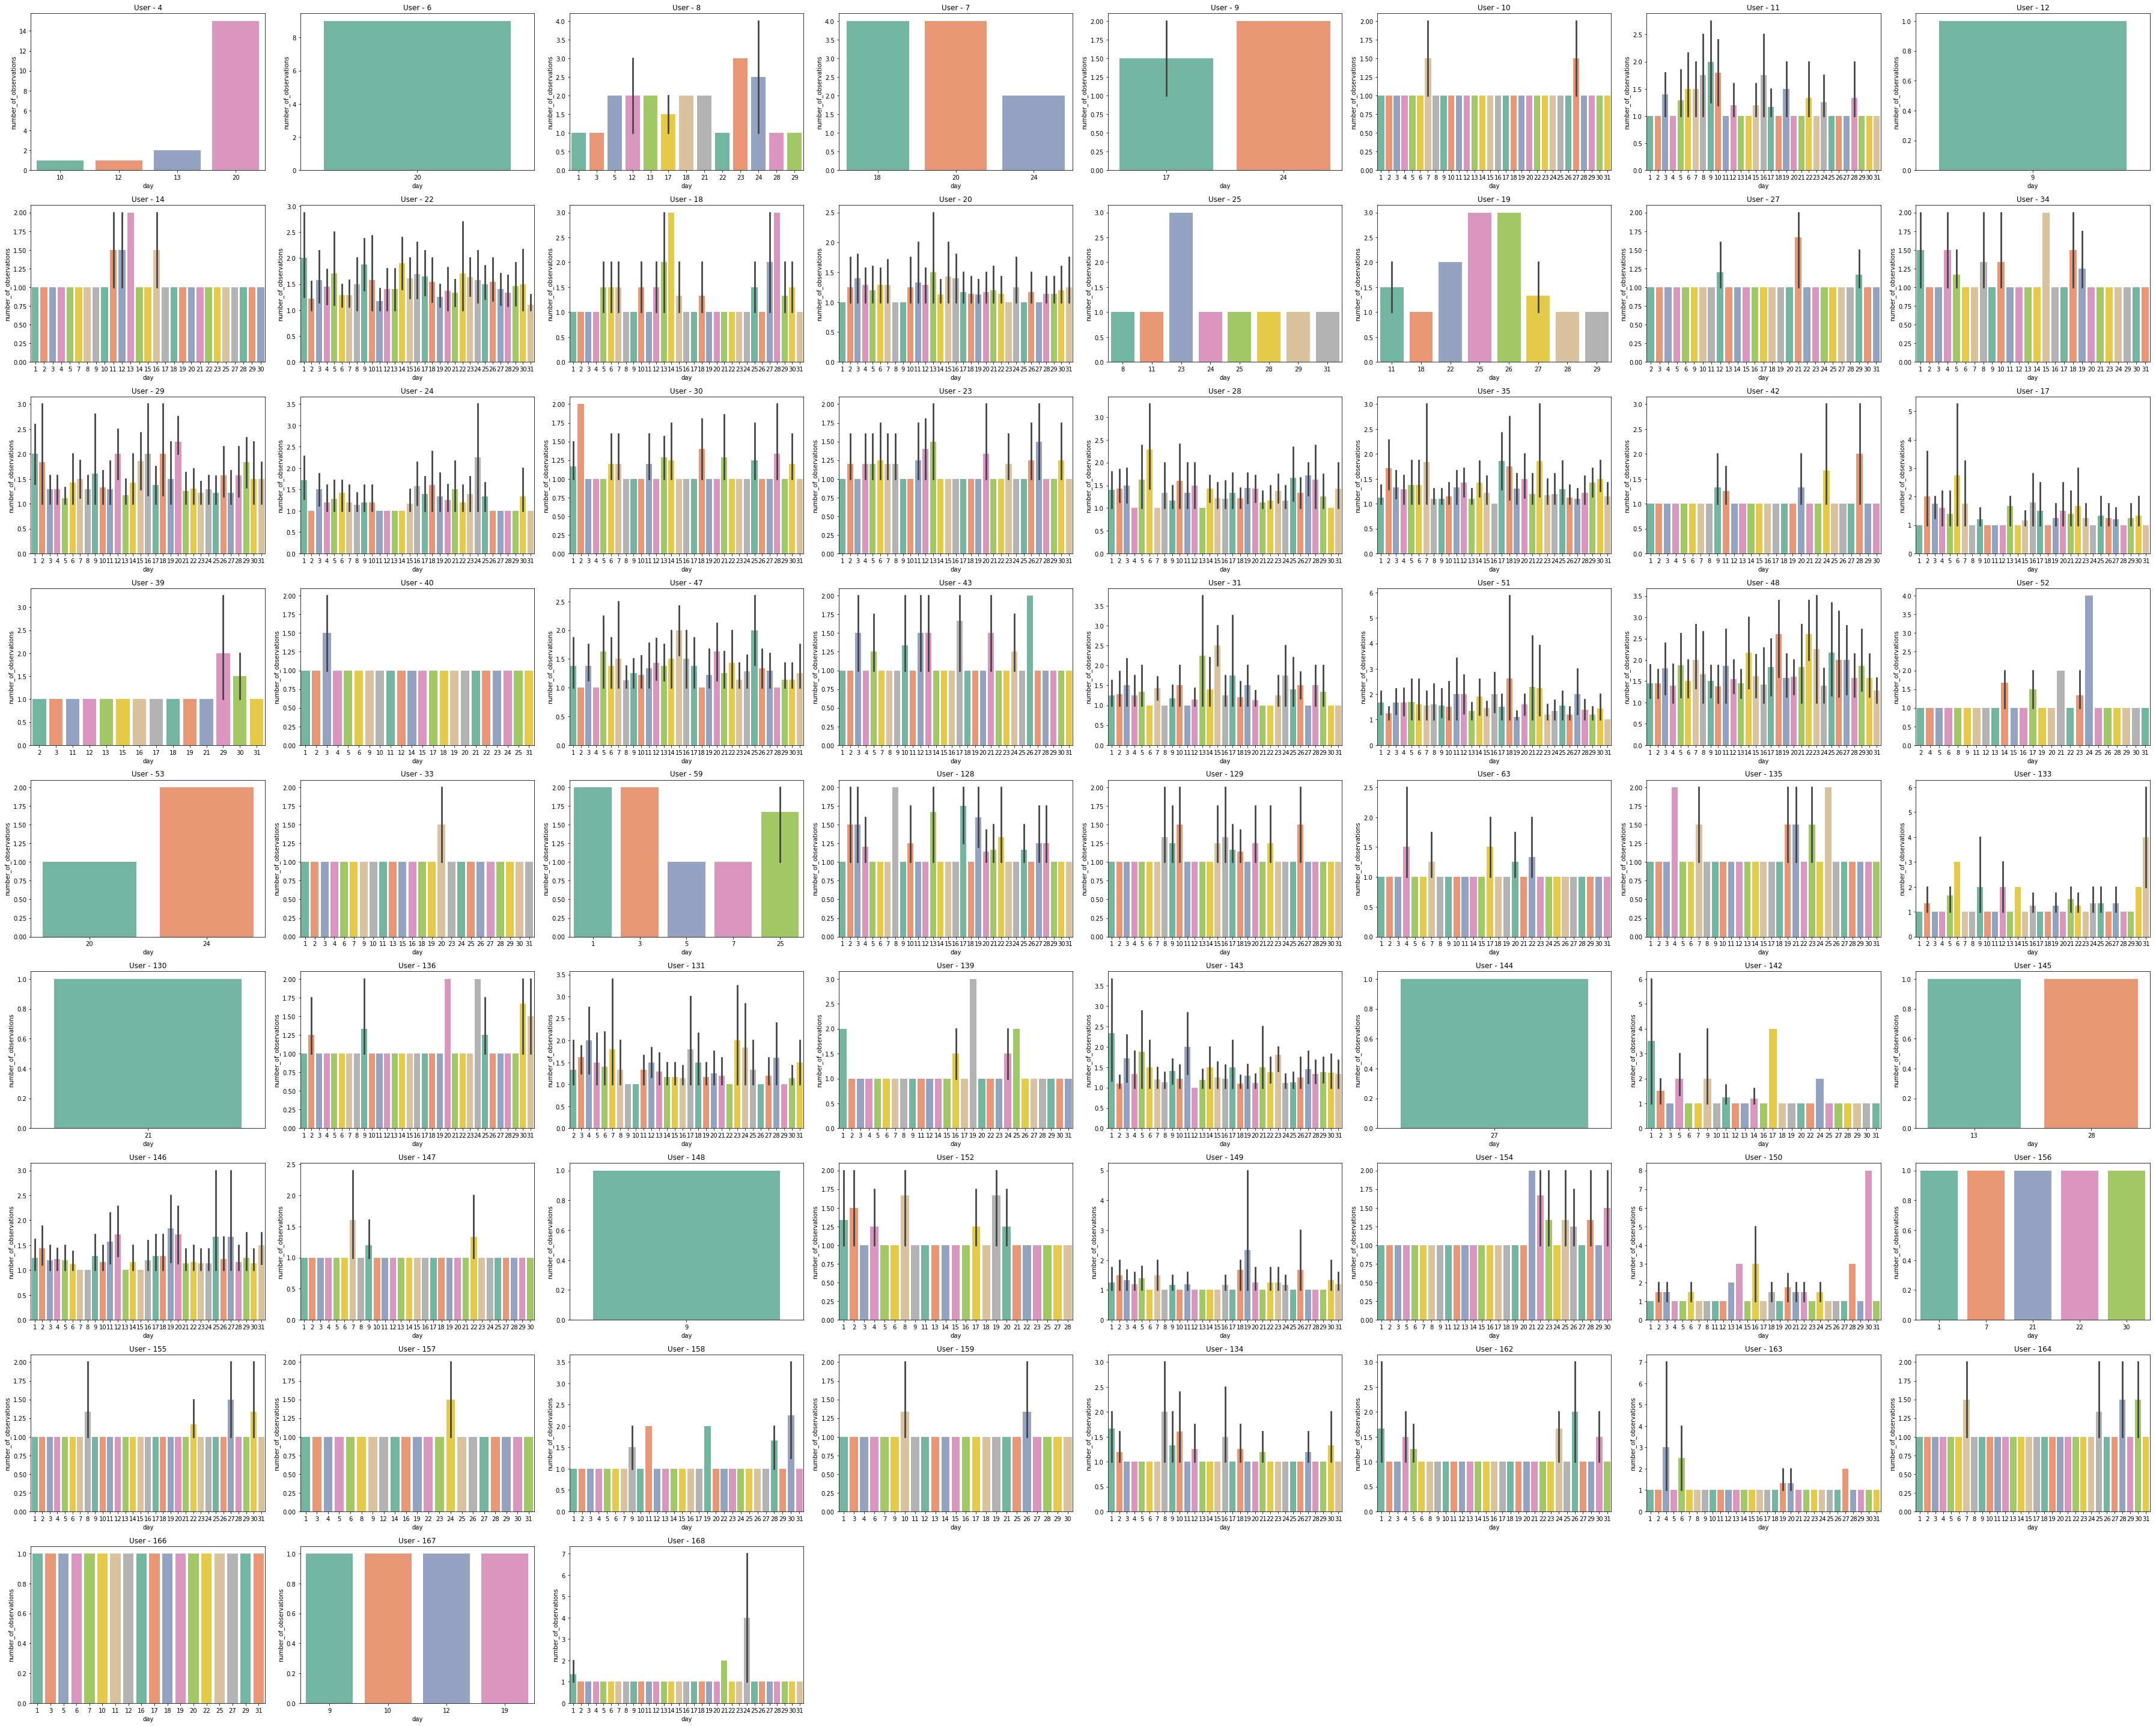

In [64]:
figure, ax = plt.subplots(9, 8, figsize=(50, 40))
count = 0
for axs in ax.flatten():
    if(count >= 67):
        break
    sns.barplot(x="day", y="number_of_observations", 
                data=user_group_day[user_group_day["user_id"] == user_id[count]], 
                ax=axs, 
                palette="Set2")
    axs.set(title="".join("User - " + str(user_id[count])))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
figure.delaxes(ax[8][6])
figure.delaxes(ax[8][7])
plt.savefig("no_obs_user_bar_plot.png")
plt.show()

In [83]:
len(user_group_month["user_id"].unique())

67

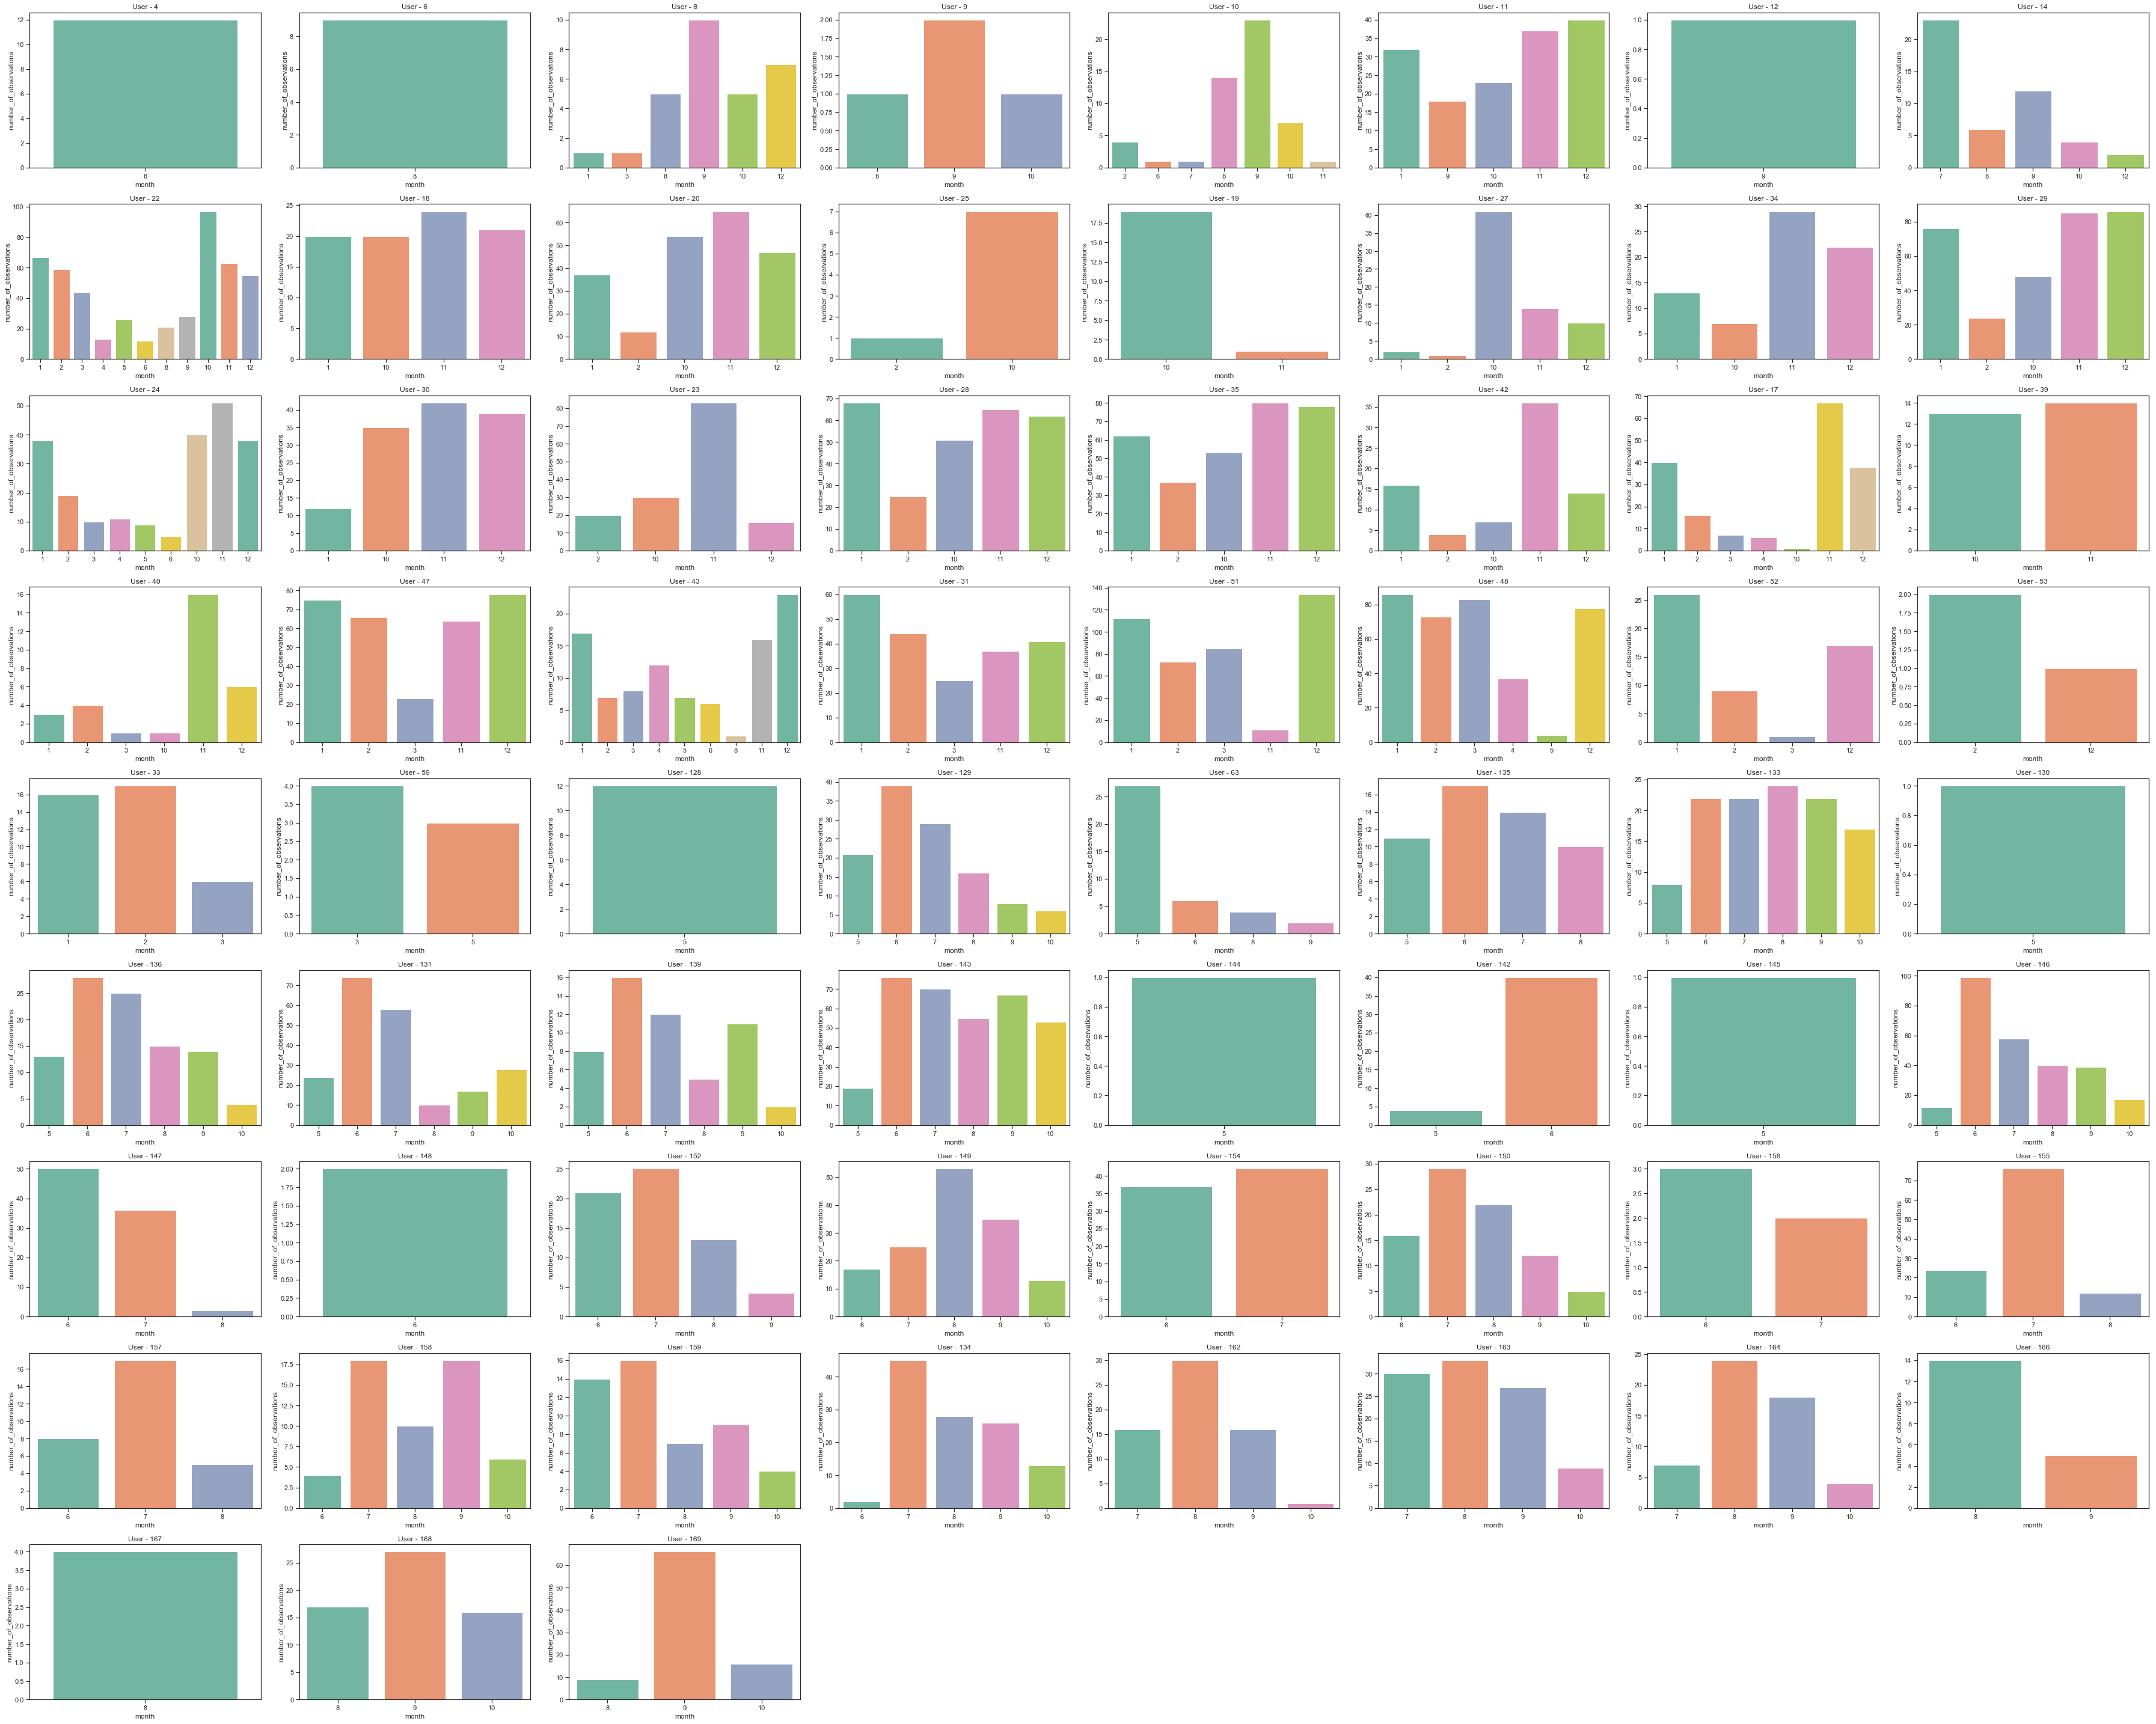

In [73]:
figure, ax = plt.subplots(9, 8, figsize=(50, 40))
count = 0
for axs in ax.flatten():
    if(count >= len(user_group_month["user_id"].unique())):
        break
    sns.barplot(x="month", y="number_of_observations", 
                data=user_group_month[user_group_month["user_id"] == user_id[count]], 
                ax=axs, 
                palette="Set2")
    axs.set(title="".join("User - " + str(user_id[count])))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
figure.delaxes(ax[8][6])
figure.delaxes(ax[8][7])
plt.savefig("no_obs_user_month_bar_plot.png")
plt.show()

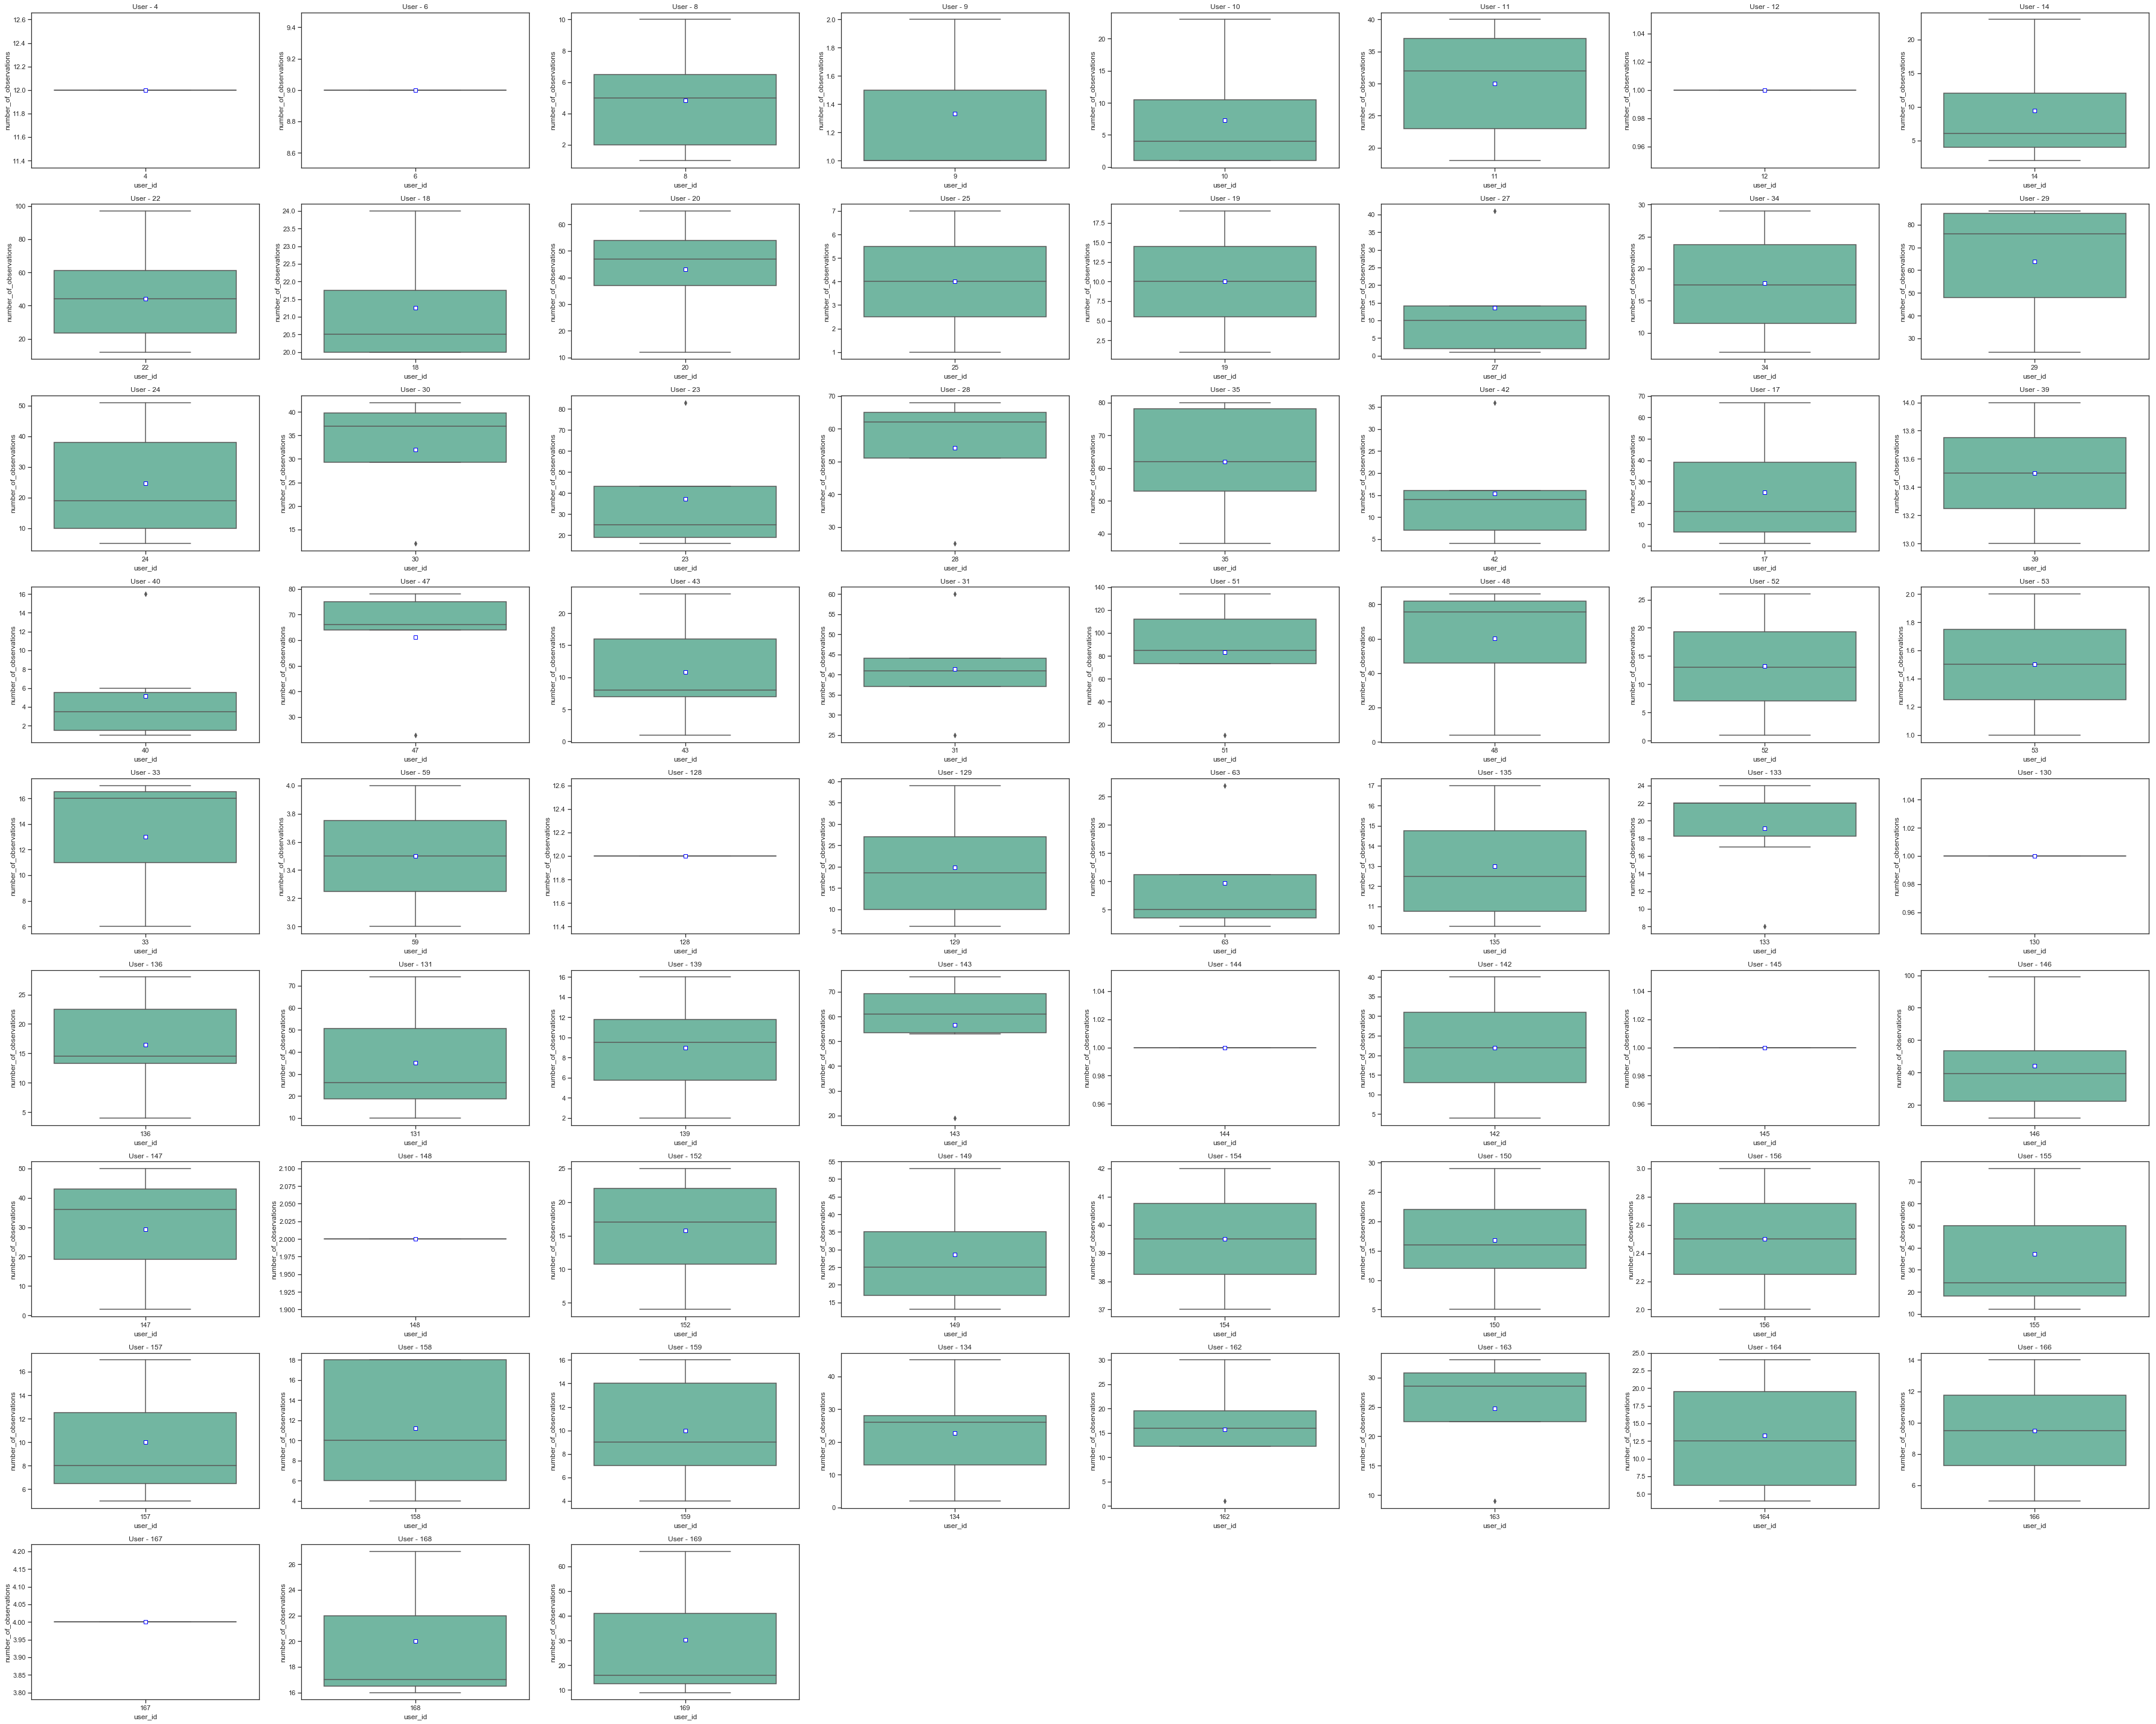

In [74]:
figure, ax = plt.subplots(9, 8, figsize=(50, 40))
count = 0
for axs in ax.flatten():
    if(count >= 67):
        break
    sns.boxplot(x="user_id", y="number_of_observations", 
                data=user_group_month[user_group_month["user_id"] == user_id[count]], 
                ax=axs,
               showmeans=True,
                notch=False, 
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},
                palette="Set2")
    axs.set(title="".join("User - " + str(user_id[count])))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
figure.delaxes(ax[8][6])
figure.delaxes(ax[8][7])
plt.savefig("number_of_obs_per_user_month_box_plot.png")
plt.show()

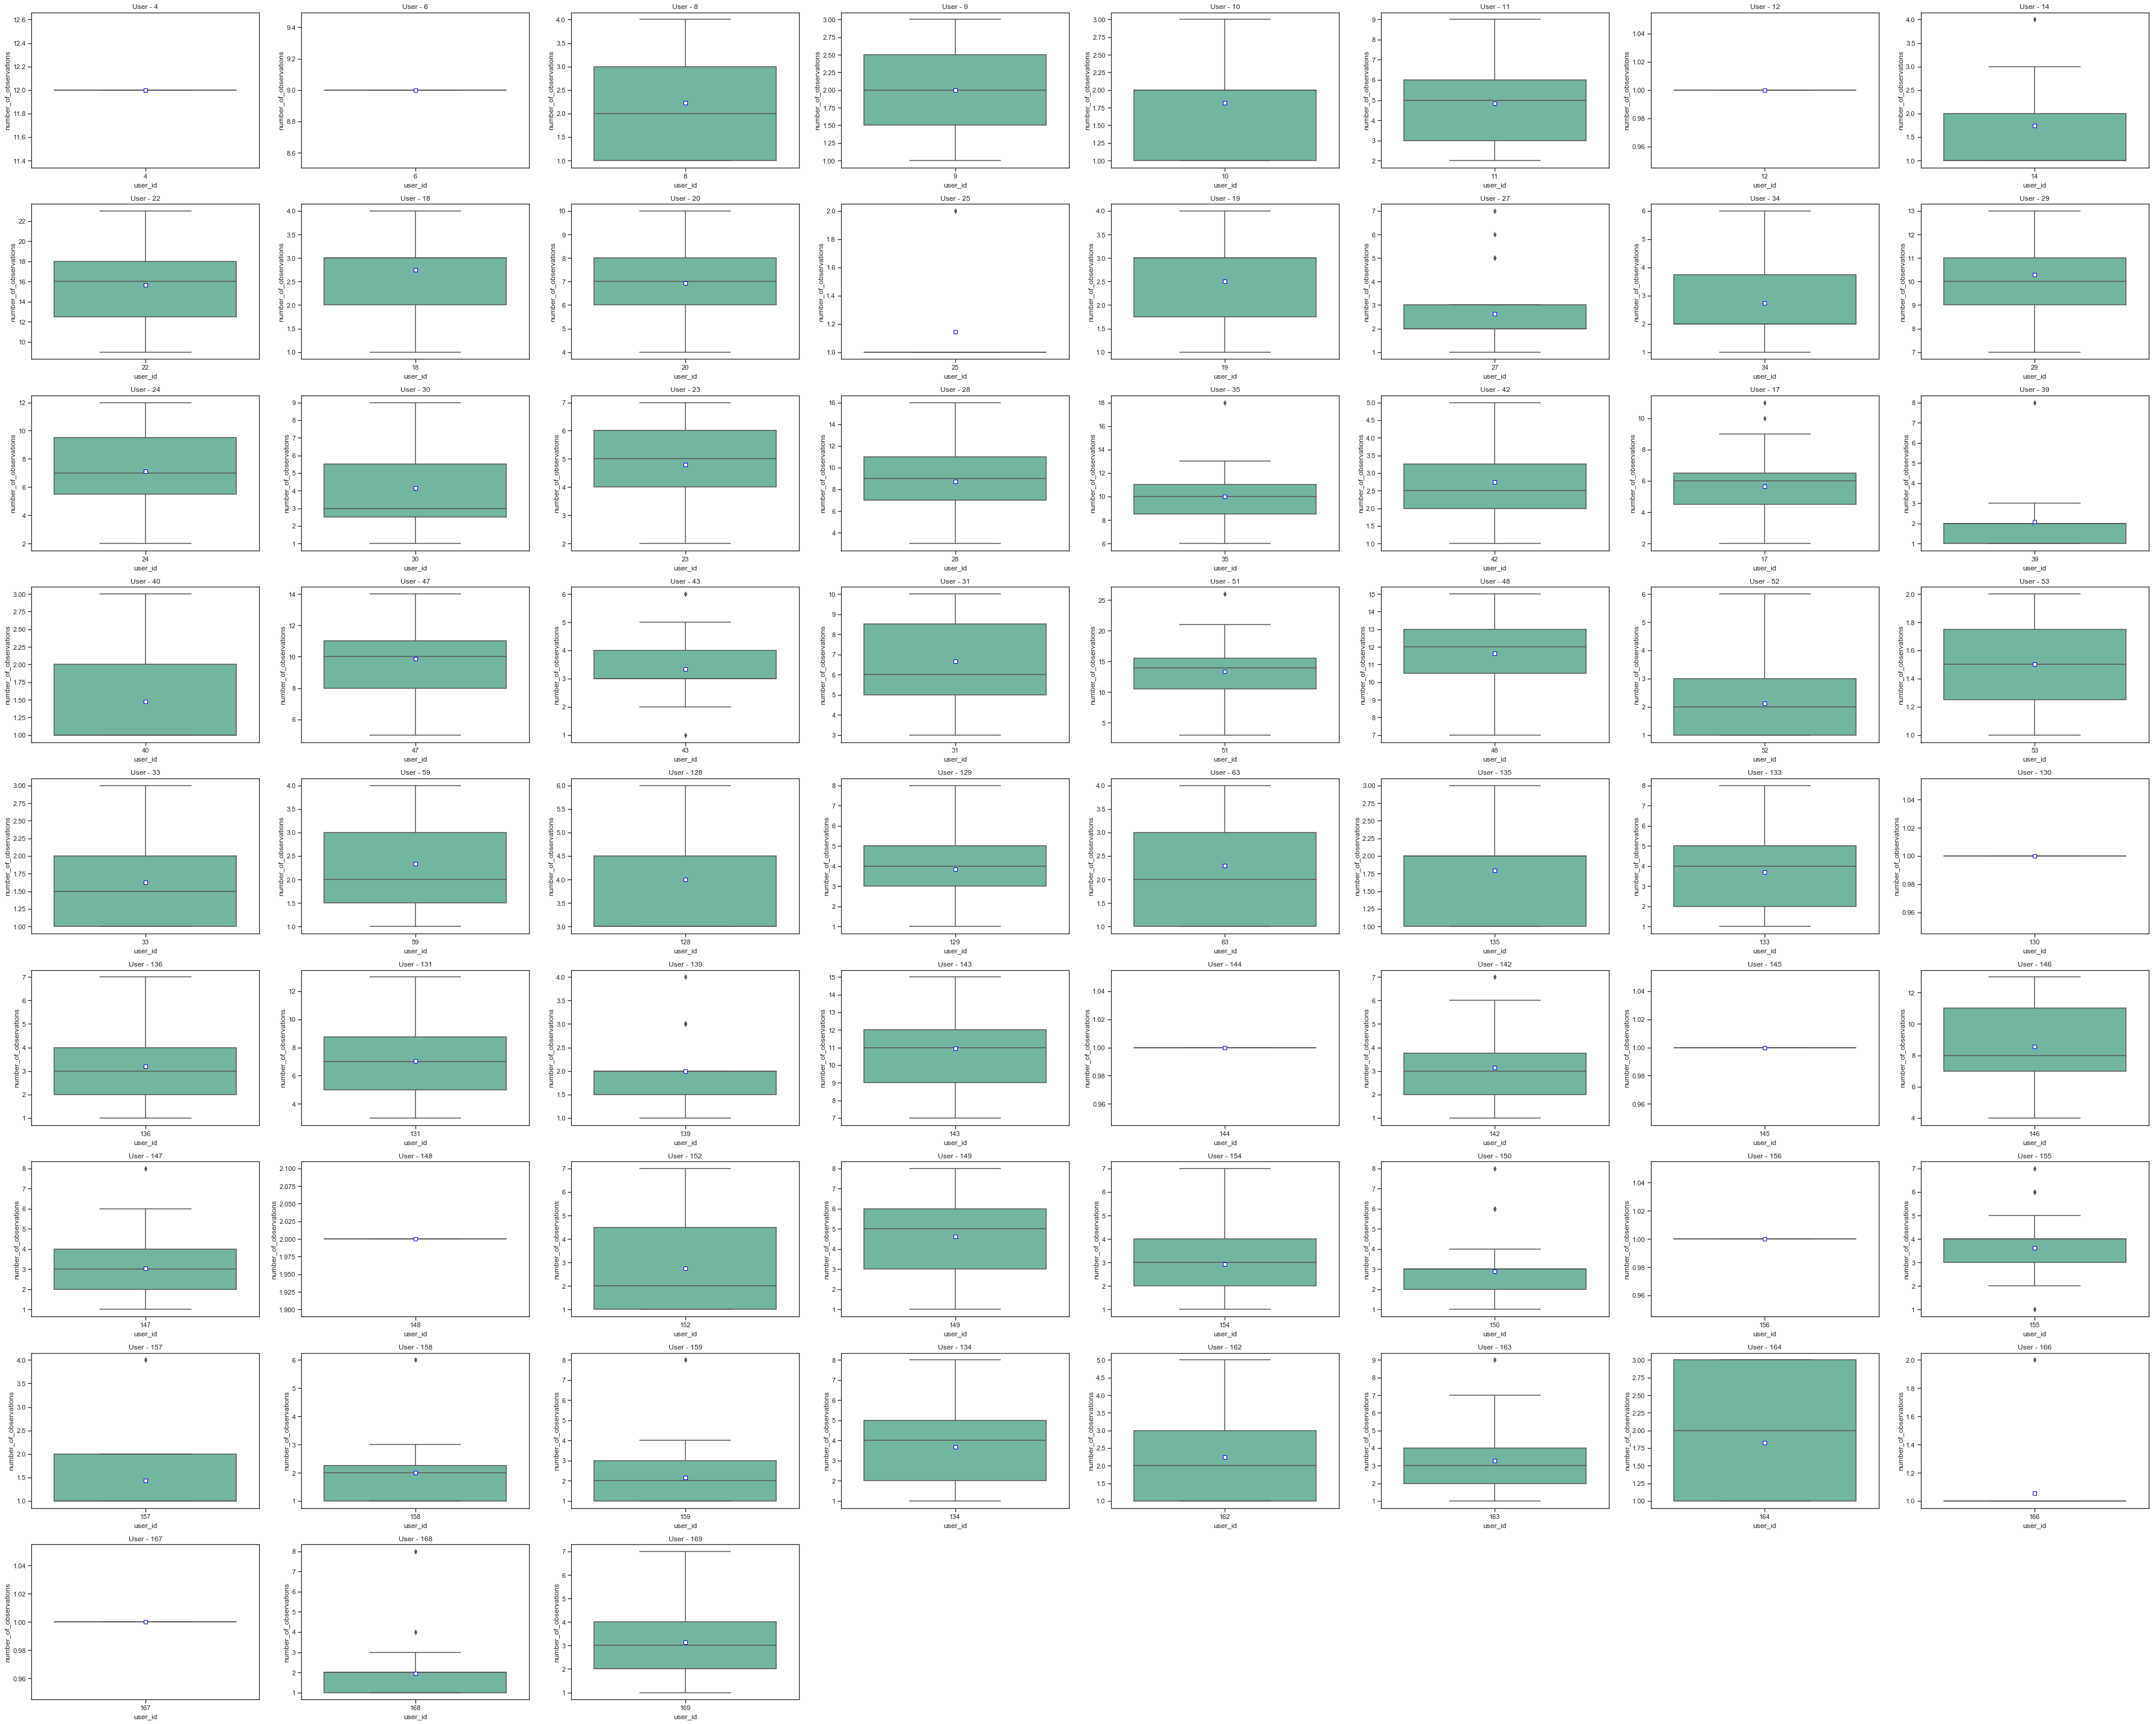

In [62]:
figure, ax = plt.subplots(9, 8, figsize=(5data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAADgIAAAs0CAYAAADw5JZoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvIxREBQAAIABJREFUeJzs3X2U1nWd//HXgKLYOFHJLP7A+HWn/FYpd72ldSVR0QJE8CZoFgcLxbyjjoEI5OTKIBZltuNNGouEZCAaoMfUDcpdD938lvqheJeaaKaDoIsjCsI48/ujbc5OIA4w18zFzONxzpwz1/f7va7r/e14ep4P8LmuksbGxsYAAAAAAAAAAAAAAAAAAEWpS3sPAAAAAAAAAAAAAAAAAAC8OxsBAQAAAAAAAAAAAAAAAKCI2QgIAAAAAAAAAAAAAAAAAEXMRkAAAAAAAAAAAAAAAAAAKGI2AgIAAAAAAAAAAAAAAABAEbMREAAAAAAAAAAAAAAAAACKmI2A0MYOOeSQvPbaa82O3X///RkzZkw7TfRnf/zjH3P00Ufn0Ucfbdc5AOi4iq2BGzZsyGWXXZbTTz89p556ahYvXtwucwDQ8RVbA5955pmMHj06w4cPz+mnn57/+I//aJc5AOj4iq2Bv/rVrzJixIgMGzYsY8aMyZNPPtkucwDQMRVb9/5i0aJFueCCC7Y59rnPfS6DBw9OVVVVtm7d2k7TAdAR7EkNTJItW7bk3HPPzf33398OUwHQUexJ/fvXf/3XDBkyJKeddlrGjh2bF154oZ2mA6Aj2JMa+Be33XZbhg4d2sYTQeHYCAjk7bffzsSJE/0lHwCdyuTJk9OrV68sXrw4t912W6qrq1NbW9veYwFAwV111VU544wzsmTJksyYMSNf+cpXUl9f395jAUBBvfHGG7nkkksyadKk3HPPPfnGN76RCRMmZMuWLe09GgAUxIYNG3LllVemuro6jY2NTcd///vf51/+5V9y++235/77788bb7yR2267rf0GBYBW9m4NTJLf/e53+fznP5/f/va37TQdABTGu/VvxYoVWbRoURYsWJClS5fm5JNPzhVXXNGOkwJA69rRGjBJVq5cmR/84AftMBkUzl7tPQDQ3LPPPpupU6dmy5YtaWxszJlnnpmKiookyU033ZQHH3wwDQ0N6d27d6qqqvI3f/M3GTNmTN7//vfnD3/4Q0aPHr3TO+qvuuqqjBw5MjfffHMhbgkAWqQtG7hhw4asWLEi1113XZKkV69eWbhwYd7//vcX7P4A4N209TrwnXfeSV1dXZLkzTffzD777FOQ+wKA99KWDVyzZk3233//DBgwIEnysY99LKWlpfnd736XY445pmD3CAB/0dZrv5/+9KcpLy/P5Zdfnp///OdNx5ctW5ZBgwblgx/8YJLk85//fKZPn57zzjuvdW8YAP5bsTQwSebNm5fLLrss3//+91v1HgHgrxVL/w444IB84xvfSGlpaZKkf//+NkMAUFDF0sAkWb9+fa6++upMmjQpt9xyS6veJ7Qn3wgIRWb27NkZNGhQ7r777txyyy35z//8zzQ0NGTx4sX5/e9/nzvvvDNLlizJwIEDM23atKbnlZWV5b777tvpTYB33nln6uvrc/bZZ7f2rQDATmnLBr7wwgvp2bNn5syZk1GjRmXkyJF5/PHH071790LcGgDsUFuvA6+88sp8//vfz/HHH59zzz033/jGN7LXXj4rCoC215YN/MhHPpK33norDz/8cJLkkUceyTPPPJN169a1+n0BwPa09dpv9OjRufjii9OtW7dmx19++eUceOCBTY979eqVtWvX7t7NAcAOFEsDk+Q73/lOjjvuuN2+JwB4L8XSv4MPPjhHH310kmTLli2ZNWtWTj311N2/QQB4F8XSwHfeeSeXXXZZJk6cmL/5m79plXuDYuFfeUEbKykp2eZYQ0NDunT5877ck08+OZdffnkeeeSRDBgwINOmTUuXLl3y85//PI8++mjOOOOMpuds2rSp6TWOPPLInZ7lscceyx133JH58+fv4t0AQMsVUwO3bt2aF198MaWlpfnxj3+c559/PhUVFenbt28OO+ywXbxDANi+Ymrg22+/na9+9auZOXNmTjjhhPy///f/csEFF6R///7N/iEoALSGYmpgaWlpbrjhhnz3u9/NN7/5zRx11FE59thjs/fee+/i3QFAc8XUvR1pbGzc5vFfZgSAXbGnNBAAWtOe1r/XXnstl156aUpLS/PVr361IO8BQOewpzTw29/+do466qj8wz/8Q37961+36mtDe7MRENrYBz7wgWzYsCEf/OAHm469+uqr6dGjR5LkhBNOyAMPPJAVK1bkl7/8ZW644YbcfffdaWhoyLhx4/KFL3whyZ8/neX1119veo399ttvu+83derUrF69OkkyatSojB49uunc4sWL8+abb2bUqFFJkldeeSVf+9rXMmnSpJx44omte+MAdHrF1MDy8vIkyciRI5Mkffv2zd///d/nkUcesREQgFZXTA38/e9/n82bN+eEE05Ikhx++OH5xCc+kVWrVtkICECrK6YGNjQ05H3ve1/mzZvXdOyUU05J3759W++GAejUiql7O3LggQfmlVdeaXr8yiuvpFevXjt3swDwP+wpDQSA1rQn9e/JJ5/MhRdemJNOOimXX355unbtutP3CwB/sac0cOnSpfngBz+Yf/u3f8tbb72VtWvXZvjw4VmyZMku3TcUEx/tB23s+OOPz7x589LQ0JAkef311/OTn/wkAwcOTJJcdtllue+++zJkyJBUVVWltLQ0L7zwQo477rgsWrQoGzduTJJcf/31mTRp0nu+X3V1dZYsWZIlS5ZsE76pU6fmgQceaDpfXl6eWbNm2QQIQEEUUwMPOuigHHrooVm8eHGSZP369fnd735nEyAABVFMDezbt2/eeOON/Pa3v02SvPDCC3nmmWfyt3/7t615ywCQpLgaWFJSkvPOOy+PPvpokuS+++5Lt27dcsghh7TmLQPQiRVT93Zk0KBBWb58eV599dU0NjZmwYIFOemkk3bhjgHgz/aUBgJAa9pT+ldbW5vKyspceOGFmTJlik2AAOy2PaWBDz/8cJYuXZolS5Zk+vTp+fCHP2wTIB2GbwSENjZ16tTMnDkzQ4cObVpUDR8+PCNGjEiSXHjhhZk6dWoWLFiQrl275qSTTspRRx2VI488MmvXrs3ZZ5+dkpKSHHjggZk5c2Z73goA7JRia2BNTU3++Z//OXfccUcaGhpy0UUX5ZOf/ORuvy4A/LViamBZWVlqampSXV2dLVu2pGvXrrn66qvz4Q9/eLfvEwD+WjE1sKSkJN/+9rfz9a9/PVu3bk3Pnj1z4403pqSkZLfvEwCS4urejvTr1y8XXXRRKisrs3Xr1nzqU5/KeeedV7D3A6Dj21MaCACtaU/p34033phNmzZl3rx5mTdvXpKkW7duufPOOwv2ngB0bHtKA6EjK2lsbGxs7yEAAAAAAAAAAAAAAAAAgO3r0t4DAAAAAAAAAAAAAAAAAADvzkZAAAAAAAAAAAAAAAAAAChiNgICAAAAAAAAAAAAAAAAQBGzERAAAAAAAAAAAAAAAAAAithe7T1Aa9q8eXNWr16dnj17pmvXru09DgAF8M4772TdunU57LDDsu+++7b3OEVDAwE6Pg3cPg0E6Pg0cPs0EKDj08Dt00CAjk8Dt08DATo+Ddw+DQTo+DRw+zQQoOPblQZ2qI2Aq1evTkVFRXuPAUAbmD9/fo488sj2HqNoaCBA56GBzWkgQOehgc1pIEDnoYHNaSBA56GBzWkgQOehgc1pIEDnoYHNaSBA57EzDexQGwF79uyZ5M//A/Tq1audpwGgEGpra1NRUdH0//n8mQYCdHwauH0aCNDxaeD2aSBAx6eB26eBAB2fBm6fBgJ0fBq4fRoI0PFp4PZpIEDHtysN7FAbAf/ylbe9evVKnz592nkaAArJ15w3p4EAnYcGNqeBAJ2HBjangQCdhwY2p4EAnYcGNqeBAJ2HBjangQCdhwY2p4EAncfONLBLAecAAAAAAAAAAAAAAAAAAHaTjYAAAAAAAAAAAAAAAAAAUMRsBAQAAAAAAAAAAAAAAACAImYjIAAAAAAAAAAAAAAAAAAUMRsBAQAAAAAAAAAAAAAAAKCIFXwj4MaNGzN06NC8+OKLSZIFCxZk6NChGTZsWK644ops2bJlm+e88sorOf/883P66adn1KhRTc8FAACgY/jrteKKFSsybNiwDB48ONddd107TwcAraempiZDhgzJkCFD8s1vfnOb80888URGjhyZU045JVOnTk19fX07TAkAAEChXHvttZk8eXISa0AAAAAAYPcUdCPgqlWrMnr06KxZsyZJ8txzz2X27Nn58Y9/nKVLl6ahoSE/+tGPtnnepEmTcsIJJ2Tx4sUZPnx4Zs2aVcgxAQAAaEN/vVbcvHlzpkyZkhtvvDH33XdfVq9enYceeqh9hwSAVrBixYo8/PDD+clPfpLFixfnsccey7/92781u2bixIm58sor88ADD6SxsTELFy5sp2kBAABobb/85S/zk5/8pOmxNSAAAAAAsDv2KuSLL1y4MFVVVZk0aVKSpFu3bqmqqkppaWmS5OCDD85LL73U7DmvvfZannzyycyZMydJcsYZZ2TAgAHbvHZdXV3q6uqaHautrS3EbQAAANCK/nqt+Mgjj6Rv37456KCDkiTDhg3L/fffn4EDBzZ7nnVgx/Xv//7vNn/uhA0bNiRJevTo0c6T7BkGDhyY448/vr3HoJPq2bNnJk+enG7duiVJPvaxjzX789A//elP2bx5cw4//PAkyciRI/O9730vX/jCF5q9jgZ2XBrYcvq38zQQKGYa2HIauPM0kGKxYcOGXHfddbngggvy5JNPtngNmFgHdmQa2HIauPM0EAAAios14M6xDtx51oGdU0E3AlZXVzd73Lt37/Tu3TvJnzf8zZ8/P9dcc02za/74xz/mf/2v/5WZM2fmP//zP9OzZ898/etf3+a1586dm5qamsINDwAAQEH89VrxlVdeSc+ePZsel5eXZ+3atds8zzoQ/uz1119P4g8+YU/wiU98oun3NWvW5Kc//WnuuOOOpmN/3cCePXtqILwL/QOgs9JA2HNdeeWV+epXv5qXX345ScvXgIl1ICQaCAAA0NlYB0LLFHQj4LtZu3Ztxo0blzPOOCPHHHNMs3P19fV5/PHHc8kll+SKK67InXfemcmTJ2fevHnNrqusrMyIESOaHautrU1FRUXB5wcAAKD1NDQ0pKSkpOlxY2Njs8d/YR3YcR1//PE+nWonXH311Umy3Q9OAorT008/nfHjx2fSpEn53//7fzcd10A0sOX0D6Bj0cCW00DYM91555058MADM2DAgNx9991JWr4GTKwDOzINbDkNBAAA9nTWgDvHOhBaps03Aj777LMZN25cxowZky9+8YvbnO/Zs2fe97735YQTTkiSDB06NNOnT9/murKyspSVlRV8XgAAAAqrV69eWbduXdPjdevWpby8fJvrrAMB2BOtXLkyl156aaZMmZIhQ4Y0O/fXDVy/fr0GAgAAdAD33Xdf1q1bl+HDh+f111/PW2+9lZKSkhatARPrQAAAAABg+7q05Ztt3LgxX/rSlzJhwoTtbgJMkg9/+MPp1atXHnrooSTJz3/+8xx66KFtOSYAAABt6FOf+lSee+65PP/883nnnXdy7733+jQsADqEl19+ORdddFFmzZq1zSbAJOndu3f22WefrFy5MkmyZMkSDQQAAOgA5syZk3vvvTdLlizJpZdemkGDBuWaa66xBgQAAAAAdkubfiPgokWLsn79+syZMydz5sxJkgwaNCgTJkzI1KlTM2jQoJx44on5l3/5l1RVVeVb3/pWSktLM3PmzLYcEwAAgDa0zz77ZObMmbnkkkvy9ttvZ+DAgTn11FPbeywA2G2zZ8/O22+/3ezPN0eNGpXly5fn0ksvTf/+/TNr1qxMmzYtGzduzKGHHppzzjmnHScGAACgkKwBAQAAAIDd0SYbAZcvX54kGTt2bMaOHbvda6qrq5t+/+hHP5p58+a1xWgAAAC0k7+sFZNkwIABWbp0aTtOAwCtb9q0aZk2bdo2x0ePHt30e79+/bJo0aK2HAsAAIA2NHLkyIwcOTKJNSAAAAAAsHu6tPcAAAAAAAAAAAAAAAAAAMC7sxEQAAAAAAAAAAAAAAAAAIqYjYAAAAAAAAAAAAAAAAAAUMRsBAQAAAAAAAAAAAAAAACAImYjIAC0oVtuuSWnnHJKhg0blptuuuldr3v88cdz2GGHteFkAAAAAAAAAAAAAABAsbIREADayIoVK3LPPffkrrvuyuLFi7Nq1ao8+OCD21y3adOmXH311dm6dWs7TAkAAAAAAAAAAAAAABQbGwEBoI08/vjjOe6441JaWpquXbvmH//xH/Ozn/1sm+tmzpyZysrKd32durq6vPjii81+amtrCzk6AAAAAAAAAAAAAADQjvZq7wEAoLM49NBDM2PGjIwfPz7du3fP8uXL09jY2OyaZcuWZfPmzTn11FPf9XXmzp2bmpqaQo8LAAAAAAAAAAAAAAAUCRsBAaCNDBgwICNHjsyYMWPSo0ePDBgwIKtWrWo6v27dutx000257bbbdvg6lZWVGTFiRLNjtbW1qaioKMTYAAAAAAAAAAAAAABAO7MREADayMaNGzN48OCce+65SZIf/OAHOeigg5rO/+IXv8iGDRuabegbPnx45s+fn9LS0qZjZWVlKSsra7vBAQAAAAAAAAAAAACAdtWlvQcAgM7ixRdfzIUXXpj6+vq88cYbWbRoUT772c82nT/rrLPys5/9LEuWLMmSJUuSJEuWLGm2CRAAAAAAAAAAAAAAAOh8fCMgALSRfv36ZfDgwTnttNPyzjvvZOzYsTniiCMyderUDBo0KCeeeGJ7jwgAAAAAAAAAAAAAABQhGwEBoA1ddNFFueiii5odq66u3u61Tz31VFuMBAAAAAAAAAAAAAAAFLku7T0AAAAAAAAAAAAAAAAAAPDubAQEAAAAAAAAAAAA4D1t3LgxQ4cOzYsvvrjNuSeeeCIjR47MKaeckqlTp6a+vr7Z+ccffzyHHXZYW40KAADQ4dgICAAAAAAAAAAAAMAOrVq1KqNHj86aNWu2e37ixIm58sor88ADD6SxsTELFy5sOrdp06ZcffXV2bp1axtNCwAA0PHYCAgAAAAAAAAAAADADi1cuDBVVVUpLy/f5tyf/vSnbN68OYcffniSZOTIkbn//vubzs+cOTOVlZVtNisAAEBHtFd7DwAAAAAAAAAAAABAcauurn7Xc6+88kp69uzZ9Lhnz55Zu3ZtkmTZsmXZvHlzTj311B2+fl1dXerq6podq62t3Y2JAQAAOhYbAQEAAAAAAAAAAADYZQ0NDSkpKWl63NjYmJKSkqxbty433XRTbrvttvd8jblz56ampqaAUwIAAOzZbAQEAAAAAAAAAAAAYJf16tUr69ata3q8fv36lJeX5xe/+EU2bNiQioqKpnPDhw/P/PnzU1pa2uw1KisrM2LEiGbHamtrmz0XAACgM7MREAAAAAAAAAAAAIBd1rt37+yzzz5ZuXJljjjiiCxZsiTHH398zjrrrJx11llN1x1yyCFZsmTJdl+jrKwsZWVlbTUyAADAHqdLew8AAAAAAAAAAAAAwJ7nvPPOy6OPPpokmTVrVq655pqceuqpeeutt3LOOee083QAAAAdi28EBAAAAAAAAAAAAKBFli9f3vT7rbfe2vR7v379smjRoh0+96mnnirYXAAAAB2dbwQEAAAAAAAACqampiZDhgzJkCFD8s1vfjNJsmLFigwbNiyDBw/Odddd184TAgAAAAAAQPGzERAAAAAAAAAoiBUrVuThhx/OT37ykyxevDiPPfZY7r333kyZMiU33nhj7rvvvqxevToPPfRQe48KAAAAALDLfCAaAG1hr/YeAAAAAAAAAOiYevbsmcmTJ6dbt25Jko997GNZs2ZN+vbtm4MOOihJMmzYsNx///0ZOHBgs+fW1dWlrq6u2bHa2tq2GRwAaJEf/vCHef7559t7DDqgv/x3dfXVV7fzJHRUffv2zTnnnNPeYwAAHcT//EC0kpKSjBs3Lvfee29mzZqVefPm5cADD8z48ePz0EMPbfPnoACwM2wEBAAAAAAAAAriE5/4RNPva9asyU9/+tP80z/9U3r27Nl0vLy8PGvXrt3muXPnzk1NTU2bzAkA7Jrnn38+Tz7zdPb+4P7tPQodzDv//a/ann3NB0HQ+ra+9kZ7jwAAdDC784FoALAzbAQEAAAAAAAACurpp5/O+PHjM2nSpHTt2jVr1qxpOtfY2JiSkpJtnlNZWZkRI0Y0O1ZbW5uKiopCjwsA7IS9P7h/PjT4mPYeA6DFXn3w1+09AgDQwezOB6IlSV1dXerq6podq631oRgAbMtGQAAAAAAAAKBgVq5cmUsvvTRTpkzJkCFD8pvf/Cbr1q1rOr9u3bqUl5dv87yysrKUlZW15agAAAAAALtsVz4QLUnmzp2bmpqaNpoSgD2ZjYAAAAAAAABAQbz88su56KKLct1112XAgAFJkk996lN57rnn8vzzz6dPnz659957c8YZZ7TzpAAAAAAAu25XPxAtSSorKzNixIhmx2pra1NRUVHQmQHY8xR0I+DGjRszatSo3HzzzenTp08WLFiQefPmpaSkJIcddliuuuqqdOvWbbvPffzxx3P22Wdn9erVhRwRAAAAAAAAKJDZs2fn7bffzsyZM5uOjRo1KjNnzswll1ySt99+OwMHDsypp57ajlMCAAAAAOy63f1AtLKyspSVlbXlyADsoQq2EXDVqlWZNm1a09fZPvfcc5k9e3buvvvuvO9978vkyZPzox/9KGPHjt3muZs2bcrVV1+drVu3Fmo8AAAAAAAAoMCmTZuWadOmbffc0qVL23gaAAAAAIDW5wPRAGgrBdsIuHDhwlRVVWXSpElJkm7duqWqqiqlpaVJkoMPPjgvvfTSdp87c+bMVFZW5re//W2hxgMAAAAAAAAAAAAAANgtPhANgLZSsI2A1dXVzR737t07vXv3TpK89tprmT9/fq655pptnrds2bJs3rz5PXe719XVpa6urtmx2tra3ZwaAAAAAAAAAAAAAAAAAIpLwTYCvpu1a9dm3LhxOeOMM3LMMcc0O7du3brcdNNNue22297zdebOnZuampoCTQkAAAAAAAAAAAAAAAAAxaFNNwI+++yzGTduXMaMGZMvfvGL25z/xS9+kQ0bNqSioqLp2PDhwzN//vyUlpY2u7aysjIjRoxodqy2trbZcwEAAAAAAAAAAAAAAABgT9dmGwE3btyYL33pS/nKV76S008/fbvXnHXWWTnrrLOaHh9yyCFZsmTJdq8tKytLWVlZQWYFAAAAAAAAAAAAAAAAgGLRpa3eaNGiRVm/fn3mzJmT4cOHZ/jw4bn++uuTJFOnTs2yZcvaahQAAAAAAAAAAAAAAAAA2GMU/BsBly9fniQZO3Zsxo4du91rqqurt3v8qaeeKtRYAAAAAAAFt3HjxowaNSo333xz+vTp0+zcY489liuvvDJbt27NgQcemG9961spKytrp0kBAAAAAAAAAChmbfaNgAAAAAAAncmqVasyevTorFmzZrvnq6urc+mll2bp0qX5yEc+ktmzZ7ftgAAAAAAAAAAA7DFsBAQAAAAAKICFCxemqqoq5eXl2z3f0NCQN998M0myadOm7Lvvvtu9rq6uLi+++GKzn9ra2oLNDQAAAAAAAABA8dmrvQcAAAAAAOiIqqurd3h+8uTJ+eIXv5gZM2ake/fuWbhw4Xavmzt3bmpqagoxIgAAAAAAAAAAewgbAQEAAAAA2tjmzZszderU3HbbbfnkJz+ZOXPm5PLLL88tt9yyzbWVlZUZMWJEs2O1tbWpqKhoq3EBAAAAAAAAAGhnNgICAABQFJYsWdK0+eH444/P5Zdf3s4TAUDh/P73v88+++yTT37yk0mSz3/+87n++uu3e21ZWVnKysracjwAAAAAAAAAAIqMjYAAAAC0u02bNqW6ujr3339/ysrKMnr06KxYsSKf/vSn23s0ACiIvn37pra2Nn/4wx/y0Y9+NMuWLUv//v3beywAAABa0fXXX58HHnggJSUlOfPMM3PuuefmiiuuyMqVK9O9e/ckycUXX5yTTz65nScFAAAAAPYENgICAADQ7t555500NDRk06ZN2W+//VJfX5999tmnvccCgFZ33nnn5dJLL03//v1zzTXX5Ctf+UoaGxvzoQ99KDNmzGjv8QAAAGglv/nNb/KrX/0qS5cuTX19fT73uc9l4MCBWb16dW6//faUl5e394gAAAAAwB7GRkAAAADaXWlpaSZMmJDPfvaz6d69e4466qj8/d//fbNr6urqUldX1+xYbW1tW44JALtk+fLlTb/feuutTb8PHDgwAwcObI+RAAAAKLCjjz46P/zhD7PXXntl7dq1eeedd7LvvvvmpZdeypQpU7J27dqcfPLJufjii9OlS5f2HhcAAAAA2APYCAgAAEC7e/LJJ3PXXXfl5z//efbff/987Wtfy+zZszNu3Lima+bOnZuampp2nBIAAAAAoOX23nvvfO9738u//uu/5tRTT019fX2OPfbYVFVVZf/998/48eOzaNGinH322c2e50PRAAAAAIDt2amPFNu4cWOS5PHHH8/ixYuzdevWggwFAHsKbQSA1unhww8/nAEDBuRDH/pQunXrlpEjR+Y3v/lNs2sqKyuzbNmyZj/z589vlXsAgJayDgQAPQSg89qVBl566aX55S9/mZdffjm//OUvc8MNN6S8vDzdu3fPmDFj8tBDD23znLlz5+bEE09s9lNRUdHq9wMA1ncAsGNaCUCxafE3Al5//fV54YUXctlll2XcuHH5+Mc/nv/7f/9vqqurCzkfABQtbQSA1uthv3798q1vfStvvfVWunfvnuXLl6d///7NrikrK0tZWVlrjg8AO8U6EAD0EIDOa2cb+Oyzz2bLli35P//n/6R79+4ZPHhw7rvvvvTo0SPZRrPHAAAgAElEQVSnnHJKkqSxsTF77bXtP92prKzMiBEjmh2rra21GRCAVmV9BwA7ppUAFKMWfyPgQw89lOnTp+fBBx/MkCFD8sMf/jBPPvlkIWcDgKKmjQDQej087rjjMmTIkIwcOTKnnXZa6uvrc/755xdgYgDYddaBAKCHAHReO9vAF198MdOmTcuWLVuyZcuWLFu2LEcddVRmzJiR119/PVu3bs2CBQty8sknb/PcsrKy9OnTp9lPr169Cnl7AHRC1ncAsGNaCUAxavE3AiZJ9+7ds2LFinz+859PkmzZsqUgQwHAnkIbAaD1enj++efb/AdA0bMOBAA9BKDz2pkGDhw4MI888khOP/30dO3aNYMHD87FF1+cD3zgAxk9enTq6+szePDgDB06tK3GB4BtWN8BwI5pJQDFpsXfCPiBD3wg3/jGN7J69ep8+tOfzqxZs1JeXl7I2QCgqGkjAOghAJ2L7gGAHgLQee1KAy+55JLcd999ueeee3LJJZckSSoqKnLfffflwQcfzNe+9rW2GB0Atsv6DgB2TCsBKEYt3gh47bXXpry8PN///vfTvXv3lJSU5Nprry3kbABQ1LQRAPQQgM5F9wBADwHovDQQgI5G2wBgx7QSgGK0V0svPOCAAzJu3Lhs2rQpGzZsyJe+9KVCzgUARU8bAUAPAehcdA8A9BCAzksDAehotA0AdkwrAShGLd4IeMcdd+Saa67J1q1bkySNjY0pKSnJE088UbDhAKCYaSMA6CEAnYvuAYAeAtB5aSAAHY22AcCOaSUAxajFGwFnz56dO+64I4ceemgh5wGAPcautPGWW27JXXfdlW7duuVzn/tcvvzlLzc7v3LlyqaFY48ePTJjxoz07t27tUcHgFZjrQhAZ6J7AKCHAHReGghAR6NtALBjWglAMerS0gsPOOAAEQOA/2Fn27hixYrcc889ueuuu7J48eKsWrUqDz74YLNrJk6cmOnTp2fJkiUZNmxYpk+f3tpjA0CrslYEoDPRPQDQQwA6Lw0EoKPRNgDYMa0EoBi1eCPgcccdlx/96EdZu3ZtNmzY0PQDAJ3Vzrbx8ccfz3HHHZfS0tJ07do1//iP/5if/exnTee3bNmSCRMmpF+/fkmSQw45JC+//HLB7wMAdoe1IgCdie4BgB4C0HlpIAAdjbYBwI5pJQDFaK+WXnjLLbdky5Yt+ed//uemYyUlJXniiScKMhgAFLudbeOhhx6aGTNmZPz48enevXuWL1+exsbGpvPdunXL8OHDkyQNDQ2pqanJSSedtM3r1NXVpa6urtmx2tra1rglANhp1ooAdCa6BwB6CEDnpYEAdDTaBgA7ppUAFKMWbwR85JFHCjkHAOxxdraNAwYMyMiRIzNmzJj06NEjAwYMyKpVq7a5bsuWLZk8eXLq6+szfvz4bc7PnTs3NTU1uzw3ALQma0UAOhPdAwA9BKDz0kAAOhptA4Ad00oAilGLNwI2NDRk9uzZ+fd///fU19fnH/7hH3LBBRdkr71a/BIA0KHsbBs3btyYwYMH59xzz02S/OAHP8hBBx3U7Jo333wzX/7yl9OjR4/cdNNN2Xvvvbd5ncrKyowYMaLZsdra2lRUVLTSnQFAy1krAtCZ6B4A6CEAnZcGAtDR7GrbNm7cmFGjRuXmm29Onz59mp174oknMnXq1Lz55ps58sgjc9VVV2WvvfbKypUrc80112Tr1q3p0aNHZsyYkd69exfy9gBgt1kHAlCMurT0wm9/+9v51a9+lcrKypx77rn53e9+l2uvvbaQswFAUdvZNr744ou58MILU19fnzfeeCOLFi3KZz/72WbXTJw4MX379s13v/vddOvWbbuvU1ZWlj59+jT76dWrV6veGwC0lLUiAJ2J7gGAHgLQeWkgAB3NrrRt1apVGT16dNasWbPd8xMnTsyVV16ZBx54II2NjVm4cGHT8enTp2fJkiUZNmxYpk+f3tq3AwCtzjoQgGLU4u3o//Ef/5G77rqr6ZuJPvOZz+S0004r2GAAUOx2to39+vXL4MGDc9ppp+Wdd97J2LFjc8QRR2Tq1KkZNGhQDjzwwCxbtiwf//jHm77xr7y8PLfeemub3A8A7AprRQA6E90DAD0EoPPSQAA6ml1p28KFC1NVVZVJkyZtc+5Pf/pTNm/enMMPPzxJMnLkyHzve9/LmWeemQkTJqRfv35JkkMOOSS33357K98NALQ+60AAilGLNwI2NjY2RSxJunXr1uwxAHQ2u9LGiy66KBdddFGzY9XV1U2/P/XUU607JAAUmLUiAJ2J7gGAHgLQeWkgAB3NrrTtf/4bl7/2yiuvpGfPnk2Pe/bsmbVr16Zbt24ZPnx4kqShoSE1NTU56aSTtvsadXV1qaura3astrb2Pe8FAArBOhCAYtTijYD9+vXLjBkz8k//9E8pKSnJ7bffnoMPPriQswFAUdNGANBDADoX3QMAPQSg89JAADqa1m5bQ0NDSkpKmh43NjY2e7xly5ZMnjw59fX1GT9+/HZfY+7cuampqdnlGQCgNVkHAlCMurT0wqqqqrz++usZNWpUzjrrrLz66qv5+te/XsjZAKCoaSMA6CEAnYvuAYAeAtB5aSAAHU1rt61Xr15Zt25d0+P169envLw8SfLmm29m3Lhxqa+vz0033fSu36ZUWVmZZcuWNfuZP3/+Ls8EALvDOhCAYtTibwQsLS3NtddeW8hZAGCPoo0AoIcAdC66BwB6CEDnpYEAdDSt3bbevXtnn332ycqVK3PEEUdkyZIlOf7445MkEydOTN++fXPVVVelS5d3//6KsrKylJWVtdpMALA7rAMBKEbvuRFwwoQJuf766zNs2LDtnr/nnntafSgAKGbaCAB6CEDnonsAoIcAdF4aCEBH09ptO++883LppZemf//+mTVrVqZNm5aNGzfm0EMPzTnnnJPHH388y5Yty8c//vGMGDEiSVJeXp5bb711t+8FAArBOhCAYvaeGwHPO++8JNnlr7HduHFjRo0alZtvvjl9+vTJggULMm/evJSUlOSwww7LVVddlW7dujV7zsqVK3PNNddk69at6dGjR2bMmJHevXvv0vsDQGvb3TYCQEeghwB0JroHAHoIQOelgQB0NK3RtuXLlzf9/j839PXr1y+LFi1qdu3f/u3f5qmnntrl9wKAtmYdCEAxe/fvWP9vhx12WJJk8eLFOfroo5v93H777Tt87qpVqzJ69OisWbMmSfLcc89l9uzZ+fGPf5ylS5emoaEhP/rRj7Z53sSJEzN9+vQsWbIkw4YNy/Tp03fh1gCgMHanjQDQUeghAJ2J7gGAHgLQeWkgAB2NtgHAjmklAMXsPb8RsKqqKmvXrs3KlSvz2muvNR2vr6/PH//4xx0+d+HChamqqsqkSZOSJN26dUtVVVVKS0uTJAcffHBeeumlZs/ZsmVLJkyYkH79+iVJDjnkEMEEoKjsThsBoKPQQwA6E90DAD0EoPPSQAA6Gm0DgB3TSgCK2XtuBDzzzDPz9NNP56mnnsopp5zSdLxr1645/PDDd/jc6urqZo979+6d3r17J0lee+21zJ8/P9dcc02za7p165bhw4cnSRoaGlJTU5OTTjppm9euq6tLXV1ds2O1tbXvdTsAsNt2p40A0FHoIQCdie4BgB4C0HlpIAAdjbYBwI5pJQDF7D03Avbv3z/9+/fPpz/96fTq1atV3nTt2rUZN25czjjjjBxzzDHbvWbLli2ZPHly6uvrM378+G3Oz507NzU1Na0yDwDsjEK0EQD2NHoIQGeiewCghwB0XhoIQEejbQCwY1oJQDF7z42Af/Hyyy/nqquuyltvvZXGxsY0NDTkxRdfzC9+8YudesNnn30248aNy5gxY/LFL35xu9e8+eab+fKXv5wePXrkpptuyt57773NNZWVlRkxYkSzY7W1tamoqNipeQBgV7VWGwFgT6aHAHQmugcAeghA56WBAHQ02gYAO6aVABSjLi29cNq0afm7v/u7bNy4McOGDUtpaWkGDx68U2+2cePGfOlLX8qECRPedRNgkkycODF9+/bNd7/73XTr1m2715SVlaVPnz7Nfuy4B6AttUYbAWBPp4cAdCa6BwB6CEDnpYEAdDTaBgA7ppUAFKMWfyNgSUlJzj///PzXf/1XPvrRj2bYsGE544wzdurNFi1alPXr12fOnDmZM2dOkmTQoEGZMGFCpk6dmkGDBuXAAw/MsmXL8vGPf7zpG//Ky8tz66237tR7AUChtUYbAWBPp4cAdCa6BwC73sONGzdm1KhRufnmm9OnT59cccUVWblyZbp3754kufjii3PyyScXenwA2GXWhAB0NNoGADumlQAUoxZvBHzf+96XJPnwhz+cp59+OkcccUS6dGnZFwouX748STJ27NiMHTt2u9dUV1c3/f7UU0+1dCwAaDe700YA6Cj0EIDORPcAYNd6uGrVqkybNi1r1qxpOrZ69ercfvvtKS8vL+S4ANBqrAkB6Gi0DQB2TCsBKEYt3gjYv3//fOUrX8mECRMyfvz4rFmzJnvt1eKnA0CHo40AoIcAdC66BwC71sOFCxemqqoqkyZNSpJs2rQpL730UqZMmZK1a9fm5JNPzsUXX+wf0QBQ1KwJAehotA0AdkwrAShGLS7R1KlTs2rVqnzkIx/JlClTsmLFinz7298u5GwAUNS0EQD0EIDORfcAYNd6WF1d3ezx+vXrc+yxx6aqqir7779/xo8fn0WLFuXss89udl1dXV3q6uqaHautrW2dGwGAnWRNuH0bNmzI1tfeyKsP/rq9RwFosa2vvZENXfZt7zHanbYBwI5pJQDFqMUbAS+77LKmv3z7zGc+k8985jOFmgkA9gjaCAB6CEDnonsA0Do9POigg3LDDTc0PR4zZkwWL168zUbAuXPnpqamZrfmBYDWYk0IQEejbQCwY7vSyo0bN2bUqFG5+eab06dPn1xxxRVZuXJlunfvniS5+OKLc/LJJxdybAA6uBZvBDzyyCPzne98J//1X/+VM888MyNHjkzPnj0LORsAFDVtBAA9BKBz0T0AaJ0ePvXUU1mzZk1OOeWUJEljY2P22mvbv7asrKzMiBEjmh2rra1NRUXFrt8AAOwia8Lt69GjR15t2JwPDT6mvUcBaLFXH/x1evTo0d5jtDttA4Ad29lWrlq1KtOmTcuaNWuajq1evTq33357ysvL22BiADqDLi298Atf+EIWLlyYm2++Oa+//npGjRqViy66qJCzAUBR00YA0EMAOhfdA4DW6WFjY2NmzJiR119/PVu3bs2CBQu2+ynYZWVl6dOnT7OfXr16tdatAMBOsSYEoKPRNgDYsZ1t5cKFC1NVVdW06W/Tpk156aWXMmXKlAwbNizf+9730tDQ0FbjA9BBtfgbAf9i8+bN2bJlSxobG9O1a9dCzAQAexRtBAA9BKBz0T0A2L0e9uvXL+eff35Gjx6d+vr6DB48OEOHDi3QpADQuqwJAehotA0Adqylrayurm72eP369Tn22GNTVVWV/fffP+PHj8+iRYty9tlnb/Pcurq61NXVNTtWW1vbOjcAQIfS4o2Ac+bMyd13350tW7bkzDPPzMKFC3PAAQcUcjYAKGraCAB6CEDnonsAsHs9XL58edPvFRUVqaioKNSYANDqrAkB6Gi0DQB2bHdbedBBB+WGG25oejxmzJgsXrx4uxsB586dm5qamlaZG4COrcUbAVevXp1p06blmGOOKeQ8ALDH0EYA0MN388Mf/jDPP/98e49BB/WX/7auvvrqdp6Ejqhv374555xz2nuMorUr3du4cWNGjRqVm2++OX369Gl27g9/+EOqqqry+uuvp2fPnvnOd76T97///a09NgC0KutAADorDQSgo9E2ANix3W3lU089lTVr1uSUU05JkjQ2Nmavvba/faOysjIjRoxodqy2ttaHqQGwjRZvBHzmmWcs+ADgf9BGANDDd/P888/nyWeezt4f3L+9R6EDeue//zTn2ddq23cQOpytr73R3iMUvZ3t3qpVqzJt2rSsWbNmm3ONjY358pe/nKlTp+b444/PrFmzcsstt2TixImtODEAtD7rQAA6Kw0EoKPRNgDYsd1tZWNjY2bMmJFjjz02++23XxYsWLDNZr+/KCsrS1lZ2S6/FwCdR4s3Anbv3j21tbXp1atXIecBgD2GNgKAHu7I3h/cPx8a7C9PgT3Hqw/+ur1HKHo7272FCxemqqoqkyZN2ubcY489lv322y/HH398kuSCCy5IXV3ddl+nrq5um3O1tTYDA9A+rAMB6Kw0EICORtsAYMd2t5X9+vXL+eefn9GjR6e+vj6DBw/O0KFDW3lKADqbFm8E3LRpU0488cT06tUr++23X9Pxe+65pyCDAUCx00YA0EMAOped7V51dfW7vtYLL7yQAw44IFOmTMkTTzyRj370o/n617++3Wvnzp2bmpqa3RseAFqJdSAAnZUGAtDRaBsA7NiutnL58uVNv1dUVKSioqJgMwLQ+bR4I+DUqVMLOQcA7HG0EQD0EIDOpTW7V19fn9/85je5/fbb079//3z3u9/NzJkzM3PmzG2urayszIgRI5odq62t9ZeGALQL60AAOisNBKCj0TYA2DGtBKAYdWnphUcffXT23Xff/OEPf8jhhx+evffeO0cffXQhZwOAoqaNAKCHAHQurdm9nj17pm/fvunfv3+SZOjQoXnkkUe2e21ZWVn69OnT7KdXr167fB8AsDusAwHorDQQgI5G2wBgx7QSgGLU4o2Ad999d6644or84Ac/yBtvvJELL7wwCxcuLORsAFDUtBEA9BCAzqU1u/d3f/d3ee211/Lkk08mSZYvX55DDz20NccFgIKwDgSgs9JAADoabQOAHdNKAIpRizcCzps3LwsWLEhpaWk+9KEP5e67787cuXMLORsAFDVtBAA9BKBzaY3unXfeeXn00Uez77775oYbbsi0adMyZMiQ/PrXv87kyZMLNDkAtB7rQAA6Kw0EoKPRNgDYMa0EoBjt1dILu3TpktLS0qbHBx54YLp27VqQoQBgT6CNAKCHAHQuu9q95cuXN/1+6623Nv3+qU99KosWLWrdIQGgwKwDAeisNBCAjkbbAGDHtBKAYtTibwTs0aNHnnjiiZSUlCRJli5dmve///0FGwwAip02AoAeAtC56B4A6CEAnZcGAtDRaBsA7JhWAlCMWvyNgFOmTMmECRPywgsv5Ljjjss+++yTG2+8sZCzAUBR00YA/j979x9ddX3nefwV5IcUTREHREXxZ2vHWkfHjkZdUbH4AygC1iJRYhWlrYo6Z0oZxDJCqdgyw7TSqaeuIrLaVUTqj1G0iqVaujq6u9hZy9jVhiNqAKU0UpHGkP2ja6ZpMARMcm9yH49zck7u9/u9N+9vj/rsJ9wPl7bt4fLlyzN//vxs2bIlJ510UqZPn97G0wLAR2MdCAB6CEDp0kAAuhptA4CWaSUAxajVGwEPPfTQPPDAA6murk59fX0OPvjg9OjRoz1nA4Cipo0A0HY9fO211zJjxowsXrw4e++9d6qqqrJixYoMGTKkHaYGgF1jHQgAeghA6dJAALoabQOAlmklAMWoW2svfOutt/LTn/40hx56aB588MFMnDgxq1evbs/ZAKCoaSMAtF0Pf/KTn+Scc87JwIED06NHj8ybNy9HH310O0wMALvOOhAA9BCA0qWBAHQ12gYALdNKAIpRqzcCTp06Na+99lp+8Ytf5Gc/+1lGjRqVb37zm+05GwAUNW0EgLbr4Zo1a1JfX58vf/nLGTVqVO6+++58/OMfb3JNbW1t1q5d2+SrpqamrW4FAHbIOhAA9BCA0rUrDfzud7+bc845J8OHD8+CBQuSJCtXrszIkSMzbNiwzJs3ryNGh07ljku+kH86Z0Kzrzsu+UKhR4Mux/oOAFqmlQAUo1ZvBNy0aVMuvvji/OxnP8uIESMyZsyYbNmypT1nA4Cipo0A0HY9rK+vzy9+8Yt861vfyj333JMXX3wxS5cubXLNwoULM3To0CZflZWVbXUrALBD1oEAoIcAlK6dbeBzzz2X//E//kcefPDBLFmyJIsWLcrq1aszbdq0/Mu//EseeeSR/Pu//3tWrFjRgXcBxW9jTe80NKTZ18aa3oUeDboc6zsAaJlWAlCMWr0RsK6uLnV1dXn66adz4oknZsuWLXn33XfbczYAKGraCABt18O/+Iu/SEVFRfr165fdd989Z5xxRl588cUm11RVVeXJJ59s8nXXXXe11a0AwA5ZBwKAHgJQuna2gX/zN3+TO++8M927d8/bb7+d+vr61NbWZvDgwTnggAPSvXv3jBw5MsuWLWv23Nra2qxdu7bJV01NTXveHgAlyPoOAFqmlQAUo+6tvXDo0KGpqKjIpz71qXz605/OiBEjMmLEiPacDQCKmjYCQNv18LTTTsvXv/711NbWpk+fPnn66aczdOjQJteUl5envLy8rUYHgJ1mHQgAeghA6dqVBvbo0SPf+973cvvtt+ess87K+vXr079//8bzAwYMyLp165o9b+HChZk/f36b3wMA/CnrOwBomVYCUIxavRFw8uTJOf/88zNw4MAkydy5c3PEEUe022AAUOy0EQDarodHH310Jk6cmPHjx6euri4nnXRSxo4d29bjAsBHYh0IAHoIQOna1QZOnjw5l112Wb785S+nuro6ZWVljecaGhqaPP5AVVVVRo8e3eRYTU1NKisrP+JdAMB/sr4DgJZpJQDFqNUbAbdt25af/vSnWblyZbp3755TTjlFyAAoadoIAG3bw/POOy/nnXdeG08IAG3HOhAA9BCA0rWzDXzllVfyhz/8IZ/61KfSu3fvDBs2LMuWLctuu+3WeM2GDRsyYMCAZs8tLy9PeXl5u9wHAHzA+g4AWqaVABSjVm8EnDNnTlavXp3Pf/7zaWhoyL333pvq6upcc8017TkfABQtbQQAPQSgtOgeAOghAKVrZxu4du3afO9738uPfvSjJMmTTz6ZcePG5dvf/nbWrFmTQYMG5eGHH87YsWM78jag6PUbuCVlZb23exxoW9Z3ANAyrQSgGLV6I+DKlSvz4x//ON27//Epn//85zNmzBghA6BkaSMA6CEApUX3AEAPAShdO9vAIUOG5MUXX8y5556b3XbbLcOGDcvw4cPTr1+/XHXVVdm6dWuGDBmSs846qyNvA4rexbcvLvQIUDKs7wCgZVoJQDFq9UbAPn36pL6+vjFkZWVl+djHPtZugwFAsdNGANBDAEqL7gGAHgJQunalgVdddVWuuuqqJscqKiry4IMPttucANBa1ncA0DKtBKAY7XAj4IIFC5Ikf/EXf5HKysqMGjUq3bp1yyOPPJJDDjmk3QcEgGKjjQCghwCUFt0DAD0EoHRpIABdjbYBQMu0EoBitsONgC+//HKSpLy8POXl5XnppZeSJAceeGCrfsDmzZszbty43HLLLRk0aFDuueeeLFq0KGVlZfn0pz+dG264IT179mzynDfeeCNf+9rX8vbbb+fggw/O3Llz06dPn529NwBoFx+ljT/84Q+zZMmS9OzZM+ecc06+8pWvNDmvgQB0Fh91rQgAnYnuAYAeAlC6NBCArqat3xP6p371q1/luuuuy+9///scd9xxueGGG9K9e3fvhwGgU7EOBKCY7XAj4I033tjk8euvv573338/gwcP3uGLr1q1KtOnT091dXWS5De/+U1uu+223H///enTp0+mTp2au+++OxdffHGT591www0ZP358hg8fnu9///v5l3/5l3zta19r/V1BCTjooGTNmubHBw9O/v+/ckA72dU2rly5Mg899FCWLFmS3r1754orrsjjjz+eYcOGNV6jgbBjGgjF4aOsFQGgs9E9ANBDAEqXBgLQ1bTle0L/3Ne+9rV885vfzF/91V9l2rRpuffeezN+/Hjvh4FW8H4YKB7WgQAUs26tvXDNmjUZPnx4zj333IwZMyZnnHFGXnnllRafc++992bGjBkZMGBAkqRnz56ZMWNG9thjj5SVleUTn/hE3njjjSbPqaury7/927/lzDPPTJKMGTMmy5Yt29n7gi5vzZqkoaH51/YWgkD72Nk2vvTSSzn55JOzxx57ZLfddst/+S//JU888UTjeQ2E1tFAKC67slYEgM5K9wBADwEoXRoIQFfTFu8J/VOvv/563nvvvfzVX/1Vkv9834v3w0DreD8MFB/rQACK0Q4/EfADM2fOzMSJEzN69OgkyZIlS3LDDTfkzjvv/NDnzJ49u8nj/fffP/vvv3+SZOPGjbnrrrua7Zj/7W9/mz322CPdu/9xtP79+2fdunXNXru2tja1tbVNjtXU1LT2djrUz372sxb/d6KprVu3pr6+vtBjdAJ3f+iZ8ePHd+Acnctuu+2WXr16FXqMTmPChAk55ZRTCj1G0drZNh555JH51re+lUmTJqV3795Zvnx5GhoaGs9rIBrYWhq4KzRw52hg6+3KWhEAOivd27E777wza7wrgXbwwT9Xs2bNKvAkdFWDBw/OhAkTCj1Gp6CHAJQqDQSgq2mL94T+qfXr16d///6Njz9430tr3w+TeE9MV+Y9Ma3h/TC7yntido73xLSedSAAxajVGwHffvvtxoglydixY3PHHXfs0g9dt25dJk6cmLFjx+b4449vcq6hoSFlZWVNjv354yRZuHBh5s+fv0s/HwDaws62saKiImPGjMlFF12Uvn37pqKiIqtWrWo8r4EAdEZtuVYEgGKnezu2Zs2arP6/v06PfnsWehS6mPr//6cZr2wszjd+0bnVbXyn0CN0KnoIQKnSQAC6mrZu27Zt25q8z+WD98G09v0wiffEAFBcrAMBKEat3ghYX1+fTZs2pW/fvkn++Il+u+KVV17JxIkTc9FFF+WSSy5pdr5fv3555513Ul9fn9122y0bNmzY7sfIV1VVNU0NsZkAACAASURBVAlr8se/+aWysnKX5mpPp5xyir85gTb3ox99+Lm77/7wvxkGaDs728bNmzdn2LBh+dKXvpQk+a//9b/mgAMOaDyvgdA6GgjFpa3WigDQGehe6/Tot2f2Hnb8ji8EKBJvP/5soUfoVPQQgFKlgQB0NW3dtoEDB2bDhg2Nj996660MGDCg1e+HSbwnhtLm/TBQfKwDAShGrd4IeOGFF+aLX/xizj777JSVleWRRx5JVVXVTv2wzZs359JLL80111yTc889d7vX9OjRI8cdd1weeeSRjBw5Mj/+8Y+3u1gqLy9PeXn5Tv18AGhLO9vGtWvX5utf/3qWLFmSLVu25L777svs2bMbz2sgAJ1RW6wVAaCz0D0A0EMASpcGAtDVtHXb9t9///Tq1SsvvPBC/vqv/zoPPPBATjnllFa/HybxnhgAiot1IADFqNUbAb/4xS/mwAMPzDPPPJNt27ZlxowZOfHEE5Mk1dXVOeigg3b4Gvfdd1/eeuutLFiwIAsWLEiSnH766bn66qtz3XXX5fTTT8/QoUMzY8aMTJ06NT/4wQ+y77775p/+6Z927e6gCxs8OCkr2/5xoGPsbBuPOOKIDBs2LJ///OdTX1+fiy++OH/913+tgbCTNBCKS1usFQGgs9A9ANBDAEqXBgLQ1bRV2y677LJMnjw5Rx11VObOnZvp06dn8+bNOfLIIzNhwoQk8X4YaAXvh4HiYx0IQDFq9UbAJKmoqEhFRUWz49dee22WLl36oc9bvnx5kuTiiy/OxRdfvN1r/vQTkfbff/8sWrRoZ0aDklNdXegJgGTn23jFFVfkiiuuaHJMA2HnaCAUn11dKwJAZ6R7AKCHAJQuDQSgq/mo7wlNkltvvbXx+yOOOCL33Xdfs+u9HwZ2zPthoDhZBzZ35513Zs2aNYUegy7og3+uZs2aVeBJ6KoGDx7c+JeVdGY7tRHwwzQ0NLTFywBAl6GNAKCHAJQW3QMAPQSgdGkgAF2NtgFAy0q5lWvWrMnq//vr9Oi3Z6FHoYup//+7m17ZWFPYQeiS6ja+U+gR2kybbAQs295nUQNACdNGANBDAEqL7gGAHgJQujQQgK5G2wCgZaXeyh799szew44v9BgArfb2488WeoQ2063QAwAAAAAAAAAAAAAAAAAAH85GQAAAAAAAAAAAAAAAAAAoYjYCAgAAAAAAAAAAAAAAAEAR2+FGwH/+539Okrzwwgsfes1BBx3UZgMBQLHTRgDQQwBKi+4BgB4CULo0EICuRtsAoGVaCUAx2+FGwIcffjjr1q3LDTfckN/97nfZtGlTk68kmTdvXrsPCgDFQhsBQA8BKC26BwB6CEDp0kAAuhptA4CWaSUAxaz7ji446aSTcuqppyZJjj/++CbnysrK8qtf/apdBgOAYqWNAKCHO7Jp06bUbXwnbz/+bKFHAWi1uo3vZFO33Qs9RlHSPQDQQwBKlwYC0NVoGwC0TCsBKGY7/ETAG264Ib/61a9y7LHHZvXq1U2+RAyAUqSNAKCHAJQW3QMAPQSgdGkgAF2NtgFAy7QSgGK2w08E/MBdd92VVatW5emnn05dXV1OPvnkfPazn23P2QCgqGkjAOjhh+nbt2/e3vZe9h52/I4vhla645IvZGNN72bH+w3ckotvX1yAiehq3n782fTt27fQYxQ13QMAPQSgdGkgAF2NtgFAy7QSgGLU6o2ADzzwQP7pn/4pw4YNS0NDQ/72b/82V111Vc4///z2nA8AipY2AoAeQkfaWNM7DQ3Nj5eVNd8cCLQP3QMAPfwwd955Z9asWVPoMeiCPvjnatasWQWehK5q8ODBmTBhQqHH6BQ0EICuRtsAoGVaCUAxavVGwAULFmTx4sUZMGBAkuSyyy7LpZdeKmQAlCxtBAA9BKC06B4A6OGHWbNmTVb/31+nR789Cz0KXUz9//8T/Vc21hR2ELqkuo3vFHqETkUDAehqtA0AWqaVABSjVm8E3LZtW2PEkmSfffZJt27d2mUoAOgMtBEA9BCA0qJ7AKCHLenRb8/sPez4Qo8B0GpvP/5soUfoVDQQgK5G2wCgZVoJQDFqdYn69u2bJ554ovHxE088kY9//OPtMhQAdAbaCAB6CEBp0T0A2PUebt68OSNGjMjatWuTJCtXrszIkSMzbNiwzJs3r93mBYC2Yk0IQFejbQDQMq0EoBi1+hMBr7/++nz1q1/NrFmzUlZWlu7du+f73/9+e84GAEVNGwFADwEoLboHALvWw1WrVmX69Omprq5Okrz33nuZNm1aFi1alH333TeTJk3KihUrMmTIkA64AwDYNdaEAHQ12gYALdNKAIpRqzcCHn744Vm2bFmqq6tTX1+fQw45JN27//Hpt99+ey655JJ2GxIAipE2AoAeQkfqN3BLysp6b/c40DF2pXubN2/OuHHjcsstt2TQoEHbfd2f/vSnmTlzZpYvX96u8wNAW9iVHt57772ZMWNGpkyZkiR58cUXM3jw4BxwwAFJkpEjR2bZsmXNNgLW1tamtra2ybGampr2uC0A2CG/CwWgq9E2AGiZVgJQjFq9ETBJdttttxx66KHNjj/00ENCBkBJ0kYA0EPoKBffvrjQIwDZue79+acfbc9bb72Vm266qa3HBIB2tbPrwNmzZzd5vH79+vTv37/x8YABA7Ju3bpmz1u4cGHmz5/fBhMDQNvwu1AAuhptA4CWaSUAxWanNgJ+mIaGhrZ4GQDoMrQRAPQQgNKyve79+acfbc/06dNz5ZVX5h//8R8/9BqfhgRAZ9HadeC2bdtSVlbW5Hl/+vgDVVVVGT16dJNjNTU1qays/GiDAkAb87tQALoabQOAlmklAIXSJhsBt/cHcwBQyrQRAPQQgNKyve79+acf/bk777wzf/mXf5mjjz66xet8GhIAnUVr14EDBw7Mhg0bGh9v2LAhAwYMaHZdeXl5ysvL22w+AGgvfhcKQFejbQDQMq0EoFC6FXoAAAAAAIBS8/LLL+fxxx/PV7/61R1eW1VVlSeffLLJ11133dUBUwJA+zj66KPzm9/8JmvWrEl9fX0efvjhnHLKKYUeCwAAAADgI9m8eXNGjBiRtWvXJklWrlyZkSNHZtiwYZk3b16BpwOgK2iTTwQEAAAAAKD1li1blg0bNmTs2LGpq6vL+vXrM378+Nx9993NrvVpSAB0Nb169cqcOXNy1VVXZevWrRkyZEjOOuusQo8FAAAAALDLVq1alenTp6e6ujpJ8t5772XatGlZtGhR9t1330yaNCkrVqzIkCFDCjsoAJ1am2wEbGhoaIuXAYAuQxsBQA8BKC07273Jkydn8uTJSZK1a9dmwoQJ290ECACdyY56uHz58sbvKyoq8uCDD7b3SADQIfwuFICuRtsAoGXba+W9996bGTNmZMqUKUmSF198MYMHD84BBxyQJBk5cmSWLVtmIyAAH0m31l74QZC259JLL22TYQCgM9FGANBDAEpLW3Tvsssuyy9/+cu2GgkAOpx1IAClSgMB6Gq0DQBatrOtnD17do477rjGx+vXr0///v0bHw8YMCDr1q3b7uvV1tZm7dq1Tb5qamo+wvQAdFWt/kTAX/3qV2loaEhZWVmzcyNHjmzToQCgM9BGANBDAErLrnbvTz/96NZbb212ftCgQU2uAYBiZh0IQKnSQAC6Gm0DgJZ91FZu27atyXM/7LWSZOHChZk/f/6uDwtAyWj1RsABAwZk+PDhOfroo9OnT5/G49OnT2+XwQCg2GkjAOghAKVF9wBADwEoXRoIQFejbQDQso/ayoEDB2bDhg2Njzds2JABAwZs99qqqqqMHj26ybGamppUVlbuwuQAdGWt3gh4zDHH5JhjjmnPWQCgU9FGANBDAEqL7gGAHgJQujQQgK5G2wCgZR+1lUcffXR+85vfZM2aNRk0aFAefvjhjB07drvXlpeXp7y8fJd/FgClo9UbAa+88sq89957WbNmTQ4//PBs3bo1vXv3bs/ZAKCoaSMA6CEApUX3AEAPAShdGghAV6NtANCyj9rKXr16Zc6cObnqqquydevWDBkyJGeddVY7Tgyd0x2XfCEba5r/u9Vv4JZcfPviAkwExa1bay9ctWpVzjjjjEyaNCnr16/Pqaeemv/5P/9ne84GAEVNGwFADwEoLboHAHoIQOnSQAC6Gm0DgJbtaiuXL1+eQYMGJUkqKiry4IMP5rHHHsu0adNSVlbW3mNDp7OxpncaGtLsa3ubA4Gd2Ah400035Y477kjfvn0zcODAfPvb387s2bPbczYAKGraCAB6CEBp0T0A0EMASpcGAtDVaBsAtEwrAShGrd4I+N577+Wwww5rfDxkyJDU19e3y1AA0BloIwDoIQClRfcAQA8BKF0aCEBXo20A0DKtBKAYtXojYPfu3fO73/2u8eNoX3311R0+Z/PmzRkxYkTWrl3beKyuri5VVVV59tlnt/uctWvXprKyMqNGjcpFF12U119/vbUjAkCH2pU2AkBX0x49vOmmmzJ16tSP/DoA0NasAwFADwEoXRoIQFejbQDQMq0EoBh1b+2FX/nKV3LhhRdmw4YN+du//dv8/Oc/z8yZMz/0+lWrVmX69Omprq5uPPbqq69m2rRpeemllz70ed/97nczfPjwjB8/PosWLcq8efMyd+7c1o4JAB1mZ9sIAF1RW/fwF7/4RZYuXZpTTz217YYEgDZiHQgd745LvpCNNb2bHe83cEsuvn1xASYC9BCAUqWBAHQ12gYALdNKAIpRqzcCnnbaaTnkkEPy85//PNu2bcsVV1yRQw899EOvv/feezNjxoxMmTKl8dh9992XiRMnZuHChR/6vG3btmXz5s1Jki1btmT33Xdv7YgA0KF2to0A0BW1ZQ83bdqUefPm5ctf/nJWr17dxpMCwEdnHQgdb2NN7zQ0ND9eVtZ8cyDQMfQQgFKlgQB0NdoGAC3TSugY/QZu2e6f/fUbuKUA00Dxa/VGwCR5//33s23btnTv3j3du7f81NmzZzc79sGmwJY2Al599dUZN25cFi1alLq6utxzzz3bva62tja1tbVNjtXU1OzoFgCgTe1MGwGgq2qrHn7jG9/ItddemzfffHO7560DASgG1oEAoIcAlC4NBKCr0TYAaJlWQvu7+PbFhR4BOpVurb1wyZIlmTBhQn75y1/m+eefT2VlZR577LE2H+jrX/96Zs6cmaeffjo33HBDrrzyyjRs56/7XbhwYYYOHdrkq7Kyss3nAYAP01FtBIBi1lY9XLx4cfbdd99UVFR86DXWgQAUmnUgAOghAKVrVxo4f/78DB8+PMOHD8+3v/3tJMnf//3fZ9iwYRk1alRGjRqVn/zkJx0xPgA0Y30HAC3TSgCKUau3pd9xxx1ZunRpBgwYkCR54403MmnSpJx55pltNszGjRvz6quv5owzzkiSnHnmmZkxY0Z++9vfpl+/fk2uraqqyujRo5scq6mp8SZQADpMR7QRAIpdW/XwkUceyYYNGzJq1Kj87ne/y7vvvptvfetbmTZtWuM11oEAFJp1IADoIQCla2cbuHLlyjzzzDNZunRpysrKMnHixPzkJz/Jv//7v+e//bf/1vg6AFAo1ncA0DKtBKAYtXojYI8ePZr8EnK//fZLjx492nSYvfbaK7169crzzz+f4447Li+88EL69OnTbBNgkpSXl6e8vLxNfz4A7IyOaCMAFLu26uGCBQsav7///vvz3HPPNdkEmFgHAlB41oEAoIcAlK6dbWD//v0zderU9OzZM0ly6KGH5o033sgbb7yRadOmZd26dfnc5z6XK6+8Mt26dWvy3Nra2tTW1jY5VlNT04Z3AwDWdwCwI1oJQDHa4UbA//N//k+S5JOf/GRmzpyZL37xi9ltt91y//3359hjj22TIa677rqcfvrpGTp0aObPn59Zs2blvffeS58+fXLzzTe3yc8AgLbSEW0EgGKnhwCUEt2Dwuk3cEvKynpv9zjQsfQQgFK1qw08/PDDG7+vrq7Oo48+mrvuuivPPfdcZsyYkT333DOTJk3Kfffdl/PPP7/JcxcuXJj58+e3zw0BUPKs7wCgZVoJQDHb4UbAq666qsnjn/70p43fl5WVZfr06S0+f/ny5c2OLVq0qMnj2bNnN37/mc98JosXL97RWABQMB+1jQDQFbRnD8eMGZMxY8bs8vMBoK1ZB0LhXHy7Py+AYqGHAJSqj9rAX//615k0aVKmTJmSQw45JN///vcbz1100UX58Y9/3GwjYFVVVUaPHt3kWE1NTSorK3fxLgDgP32Utj300EP5wQ9+kPfffz9VVVXN2rRixYrMnTs3SfKJT3wiM2fOTJ8+ffK73/0uf/d3f5d169alZ8+emTVrVj71qU+13U0BQBvyu1AAitkONwJubyMfAJQybQQAPQSgtOgeAOghAKXrozTwhRdeyOTJkzNt2rQMHz48//Ef/5Hq6uqceeaZSZKGhoZ07978rTvl5eUpLy/f5Z8LAC3Z1batW7cu8+bNy/3335+ePXtm3LhxOf7443PYYYclSWprazN16tQsWrQohx12WG699dbMmzcv06dPz4IFC/KJT3wit956a5YvX56ZM2fmRz/6UVveFgC0Gb8LBaCY7XAj4Ac2bNiQpUuXZtOmTU2OT5kypc2HAoDOQBsBQA8BKC26BwB6CEDp2tkGvvnmm7niiisyb968VFRUJPnjxr9vfetbOeGEE/Kxj30s99xzT7NP/gOAjrKzbVu5cmVOOOGE9O3bN0ly5plnZtmyZbnyyiuTJNXV1dlvv/0aNwaedtppmThxYqZPn55t27bl97//fZJky5Yt2X333dvrtgCgzfhdKADFqNUbAb/yla9k4MCBOeCAA9pzHgDoNLQRAPQQgNKiewCghwCUrp1t4G233ZatW7dmzpw5jcfGjRuXyy+/PBdccEHef//9DBs2LCNGjGivkQGgRTvbtvXr16d///6NjwcMGJAXX3yx8fFBBx2UmpqarF69OkcccUQeffTRvPXWW0mSSy65JF/84hdz8skn5/e//31uv/327f6M2tra1NbWNjlWU1Ozs7cGAG3C70IBKEat3ghYV1eX+fPnt+csANCpaCMA6CEApUX3AEAPoaPccckXsrGmd7Pj/QZuycW3Ly7ARMDONnD69OmZPn36ds9VVla21VgAsMt2tm3btm1LWVlZ4+OGhoYmj8vLy3PTTTfl+uuvz7Zt23L++eenR48eSZJZs2alsrIyEyZMyP/6X/8r1157bf71X/81ffr0afIzFi5caM0JQNHwu1AAilG31l545JFH5uWXX27PWQCgU9mVNj7wwAMZPnx4hg8fnptuuqnZ+bVr16aysjKjRo3KRRddlNdff72txgWAdmGtCEAp0T0A0EPoKBtreqehIc2+trc5EOgYGghAV7OzbRs4cGA2bNjQ+HjDhg0ZMGBA4+P6+voMHDgwixcvzpIlS/KpT32q8ROUnnzyyYwdOzZJcswxx2TvvffOK6+80uxnVFVV5cknn2zyddddd+3qLQLAR2IdCEAxavUnAh577LE599xz079//3Tv/p9Pe/LJJ9tlMAAodjvbxi1btmT27NlZtmxZysvLc8EFF2TlypU58cQTG6/57ne/m+HDh2f8+PFZtGhR5s2bl7lz57b7vQDArrJWBKCU6B4A6CEApUsDAehqdrZtJ554Ym6++eZs3LgxvXv3zuOPP55Zs2Y1ni8rK8sll1ySxYsXZ8CAAbnjjjtyzjnnJEmOOOKIPPHEExk1alSqq6uzfv36HHzwwc1+Rnl5ecrLy9v4TgFg11gHAlCMWr0R8LbbbsvcuXNz4IEHtuc8ANBp7Gwb6+vrs23btmzZsiUf+9jH8v7776dXr15Nrtm2bVs2b96c5I8bB3ffffc2nxsA2pK1IgClRPcAQA8BKF0aCEBXs7Nt22effXLttddmwoQJqaury3nnnZfPfOYzueyyyzJ58uQcddRRmTlzZiZOnJg//OEPqaioyKWXXpokmTNnTr7xjW/k1ltvTc+ePXPTTTdlzz33bM/bA4CPzDoQgGLU6o2A5eXljX87CwCw823cY489cvXVV+fss89O796989nPfjbHHntsk2uuvvrqjBs3LosWLUpdXV3uueeeZq9TW1ub2traJsdqamp27SYA4COyVgSglOgeAOghAKVLAwHoanalbSNHjszIkSObHLv11lsbvz/11FNz6qmnNnveQQcdlDvvvHOX5gSAQrEOBKAYtXoj4AknnJCbbropw4YNS8+ePRuPH3nkke0yGAAUu51t4+rVq7NkyZI89dRT2XPPPfN3f/d3ue222zJx4sTGa77+9a9n5syZOeOMM/LYY4/lyiuvzIMPPpiysrLGaxYuXJj58+e3340BwE6wVgSglOgeAOghAKVLAwHoarQNAFqmlQAUo1ZvBHzooYeSJI899ljjsbKysjz55JNtPxUAdAI728ZnnnkmFRUV2XvvvZMkY8aMyd133924EXDjxo159dVXc8YZZyRJzjzzzMyYMSO//e1v069fv8bXqaqqyujRo5u8dk1NTSorK9vu5gCglawVASglugcAeggdpd/ALSkr673d40BhaCAAXY22AUDLtBKAYtTqjYDLly9vzzkAoNPZ2TYeccQR+c53vpN33303vXv3zvLly3PUUUc1nt9rr73Sq1evPP/88znuuOPywgsvpE+fPk02ASZ//Lj58vLyNrkHAPiorBUBKCW6BwB6CB3l4tsXF3oE4M9oIABdjbYBQMu0EoBi1OqNgAsWLNju8S996UttNgwAdCY728aTTz45L730UsaMGZMePXrkqKOOyuWXX57rrrsup59+eoYOHZr58+dn1qxZee+999KnT5/cfPPN7XkLAPCRWSsCUEp0DwD0EIDSpYEAdDXaBgAt00oAilGrNwK+/PLLjd//4Q9/yL/927+loqKiXYYCgM5gV9p4+eWX5/LLL29ybPbs2Y3ff+Yzn8nixf6WXwA6D2tFAEqJ7gGAHgJQujQQgK5G2wCgZVoJQDFq9UbAG2+8scnjdevW5brrrmvzgQCgs9BGANBDAEqL7gGAHgJQujQQgK5G2wCgZVoJQDHqtqtP3GefffL666+35SwA0KlpIwDoIQClRfcAQA8BKF0aCEBXo20A0DKtBKAYtPoTARcsWND4fUNDQ375y19m7733bpehAKAz0EYA0EMASovuAYAeAlC6NBCArkbbAKBlWglAMWr1RsCXX3658fuysrLsv//+mTp1arsMBQCdgTYCgB4CUFp0DwD0EIDSpYEAdDXaBgAt00oAilGrNwJ+4QtfyLx587Jp06bGYytWrMhDDz3ULoMBQLHTRgDQQwBKi+4BgB4CULo0EICuRtsAoGVaCUAxavVGwBkzZmTMmDH5y7/8y5SVlbXnTADQKWgjAOghAKVF9wBADwEoXRoIQFejbQDQMq0EoBi1eiNg9+7d86Uvfak9ZwGATkUbAUAPASgtugcAeghA6dLAD1e38Z28/fizhR6DLqZ+y9YkyW69exV4Erqiuo3vJP0GFnqMgtM2AGiZVgJQjFq9EfDwww/Pf/zHf+STn/xke84DAJ2GNgKAHgJQWnQPAPQQgNKlgds3ePDgQo9AF7VmzZokyWCbtWgP/Qb671e0DQB2RCsBKEat3gj42muvZezYsdlvv/3Sq9d//k1LDz30ULsMBgDFThsBQA8BKC26BwB6CEDp0sDtmzBhQqFHoIuaNWtWkuT6668v8CTQdWkbALRMKwEoRq3eCHjttde25xwA0OloIwDoIQClRfcAQA8BKF0aCEBXo20A0DKtBKAYtXoj4N/8zd+05xwA0OloIwDoIQClZVe6t3nz5owbNy633HJLBg0a1OTcE088kZtvvjkNDQ0ZNGhQbrzxxnz84x9vq3EBoF1YBwJQqjQQgK5G2wCgZVoJQDHqVugBAAAAAAC6olWrVuWCCy5IdXV1s3ObN2/OP/zDP+SHP/xhHnzwwXzyk5/MzTff3PFDAgAAAAAAAADQKdgICAAAAADQDu69997MmDEjAwYMaHaurq4uM2bMyD777JMk+eQnP5k333xzu69TW1ubtWvXNvmqqalp19kBAAAAAAAAACgu3Qs9AAAAAABAVzR79uwPPbfXXnvlc5/7XJLkvffeyw9/+MNcdNFF27124cKFmT9/frvMCAAAAAAAAABA52AjIAAAAABAgbzzzju54oorcsQRR2T06NHbvaaqqqrZuZqamlRWVnbEiADQbi666KJs3Lgx3bv/8Y8sZ86cmaOPPrrAUwEAAAAA8GE2bdqUuo3v5O3Hny30KACtVrfxnWzqtnuhx2gTNgICAAAAABTA+vXrc+mll+aEE07ItGnTPvS68vLylJeXd+BkAND+GhoaUl1dnaeeeqpxIyAAAAAAAADw4fypGgAAAABAB6uvr8+Xv/zlnH322fnqV79a6HEAoMO9+uqrSZJLLrkkmzZtyvnnn58LL7ywyTW1tbWpra1tcqympqbDZgQAAAAAoKm+ffvm7W3vZe9hxxd6FIBWe/vxZ9O3b99Cj9Em2n0j4ObNmzNu3LjccsstGTRoUJKkrq4uEydOzFe/+tUcf3zzAKxfvz7Tp0/P+vXrs/vuu2fu3LmNzwUAAAAA6Kwuu+yyTJ48OTU1NXnppZdSX1+fxx57LEny6U9/OrNnzy7whADQMWpra1NRUZHrr78+dXV1mTBhQg4++OCcdNJJjdcsXLgw8+fPL+CUAAAAAAAAUDzadSPgqlWrMn369FRXVzcee/XVVzNt2rS89NJLH/q8KVOm5Mwzz8wFF1yQH/3oR5k7d27++Z//uT1HBQAAAABoF8uXL2/8/tZbb02SHHXUUVm9enWhRgKAgjvmmGNyzDHHND4+77zzsmLFiiYbAauqqjJ69Ogmz6upqUllZWWHzQkAAAAAAADFol03At57772Zs1wV4QAAIABJREFUMWNGpkyZ0njsvvvuy8SJE7Nw4cLtPmfjxo1ZvXp1FixYkCQZO3ZsKioq2nNMAAAAAAAAoAM9//zzqaura/xzwIaGhnTv3vSPLsvLy1NeXl6I8QAAAAAAAKDodGvPF589e3aOO+64JsemTJmSM84440Of89prr2W//fbLnDlzMnbs2EyePDk9evRodl1tbW3Wrl3b5KumpqbN7wEAAAAAAABoW++8806+/e1vZ+vWrdm8eXOWLl2az33uc4UeCwAAAAAAAIpWu34i4K54//3389JLL+Wqq67K3//932fx4sWZOnVqFi1a1OS6hQsXZv78+QWaEgAAAAAAANhVp512WlatWpVzzz0327Zty/jx43PMMccUeiwAAAAAAAAoWkW3EbB///7p06dPTjvttCTJiBEj8s1vfrPZdVVVVRk9enSTYzU1NamsrOyQOQEAAAAAAIBdd8011+Saa64p9BgAAAAAAADQKRTdRsADDzwwAwcOzIoVKzJkyJA89dRTOfLII5tdV15envLy8gJMCAAAAAAAAAAAAAAAsGMXXXRRNm7cmO7d/7h9Y+bMmTn66KMLPBUAnVHRbAS87rrrcvrpp2fo0KG5+eabM2PGjHznO9/JHnvskTlz5hR6PAAAAAAAAAAAAAAAgFZraGhIdXV1nnrqqcaNgACwqzqkJMuXL292bNGiRU0ez549u/H7Qw45pNl5AAAAAAAAAAAAAACAzuLVV19NklxyySXZtGlTzj///Fx44YUFngqAzsqWcgAAAAAAAAAAAAAAgDZWW1ubioqKXH/99amrq8uECRNy8MEH56STTmpyTW1tbZPn1dTUdPSoAHQCNgICAAAAAAAAfASbNm1K3cZ38vbjzxZ6FIBWq9v4TjZ1273QYwAAAECXdswxx+SYY45pfHzeeedlxYoVTTYCLly4MPPnzy/EeAB0MjYCAgAAAAAAAAAAAAAAtLHnn38+dXV1qaioSJI0NDSke/em2ziqqqoyevToJsdqampSWVnZYXMC0DnYCAgAAAAAAADwEfTt2zdvb3svew87vtCjALTa248/m759+xZ6DAAAAOjS3nnnnXzve9/Lf//v/z11dXVZunRpbrjhhibXlJeXp7y8vEATAtCZ2AgIAABAUZg/f34effTRJMmQIUMyZcqUAk8EAAAAAAAAAAC77rTTTsuqVaty7rnnZtu2bRk/fnyOOeaYQo8FQCdlIyAAAAAFt3LlyjzzzDNZunRpysrKMnHixPzkJz/J5z73uUKPBgAAAAAAAAAAu+yaa67JNddcU+gxAOgCbAQEAACg4Pr375+pU6emZ8+eSZJDDz00b7zxRoGnAgAAAAAAAAAAACgONgICAABQcIcffnjj99XV1Xn00Ufzox/9qMk1tbW1qa2tbXKspqamQ+bbFXUb38nbjz9b6DHoguq3bE2S7Na7V4Enoaup2/hO0m9goccAAAAAAKBIPfTQQ/nBD36Q999/P1VVVamsrGxyfsWKFZk7d26S5BOf+ERmzpyZPn36ZPPmzZkxY0ZeeeWVJMns2bNz5JFHdvj8AAAAnZ2NgAAAABSNX//615k0aVKmTJmSgw46qMm5hQsXZv78+YUZbCcNHjy40CPQha1ZsyZJMtiGLdpav4H++wUAAAAAwHatW7cu8+bNy/3335+ePXtm3LhxOf7443PYYYcl+eNf6jl16tQsWrQohx12WG699dbMmzcv06dPz4033ph99903//iP/5if/exn+Yd/+IcsXry4wHcEAADQ+dgICAAAQFF44YUXMnny5EybNi3Dhw9vdr6qqiqjR49ucqympqbZ3zRaDCZMmFDoEejCZs2alSS5/vrrCzwJAAAAAC2ZP39+Hn300STJkCFDMmXKlKxcuTI33nhjtm7dmrPPPjvXXnttgacEgNZZuXJlTjjhhPTt2zdJcuaZZ2bZsmW58sorkyTV1dXZb7/9GjcGnnbaaZk4cWKuu+66PP7443nyySeTJKecckr23XffwtwEAABAJ2cjIAAAAAX35ptv5oorrsi8efNSUVGx3WvKy8tTXl7ewZMBAAAAAOy8lStX5plnnsnSpUtTVlaWiRMn5uGHH87cuXOzaNGi7Lvvvpk0aVJWrFiRIUOGFHpcANih9evXp3///o2PBwwYkBdffLHx8UEHHZSampqsXr06RxxxRB599NG89dZbefvtt9OzZ8/cfffdeeqpp9KrV69MmzZtuz+jtrY2tbW1TY7V1NS0zw0BAAB0QjYCAgAAUHC33XZbtm7dmjlz5jQeGzduXC644IICTgUAAAAAsGv69++fqVOnpmfPnkmSQw89NNXV1Rk8eHAOOOCAJMnIkSOzbNkyGwEB6BS2bduWsrKyxscNDQ1NHpeXl+emm27K9ddfn23btuX8889Pjx49Ul9fn7feeit77rln7rnnnvz85z/PFVdc0fgJgX9q4cKFmT9/fofcDwCw6+o2vpO3H3+20GPQxdRv2Zok2a13rwJPQldUt/GdpN/AQo/RJmwEBAAAoOCmT5+e6dOnF3oMAAAAAIA2cfjhhzd+X11dnUcffTQXXnhhs09SWrduXbPn+jQkAIrRwIED8/zzzzc+3rBhQwYMGND4uL6+PgMHDszixYuTJC+++GIOOOCA7LXXXunevXtGjBiRJDnppJPy7rvv5u23387ee+/d5GdUVVVl9OjRTY7V1NSksrKyvW4LANhJgwcPLvQIdFFr1qxJkgzuIpu1KDL9BnaZ/37ZCAgAAAAAAAAAAO3g17/+dSZNmpQpU6Zkt912S3V1deO5P/8kpQ/4NCQAitGJJ56Ym2++ORs3bkzv3r3z+OOPZ9asWY3ny8rKcskll2Tx4sUZMGBA7rjjjpxzzjnp2bNnTjzxxPzrv/5rxo8fn//9v/93evfunb322qvZzygvL095eXlH3hYAsJMmTJhQ6BHooj74/5bXX399gSeB4mYjIAAAAAAAAAAAtLEXXnghkydPzrRp0zJ8+PA899xz2bBhQ+P5P/8kpQ/4NCQAitE+++yTa6+9NhMmTEhdXV3OO++8fOYzn8lll12WyZMn56ijjsrMmTMzceLE/OEPf0hFRUUuvfTSJMns2bPzjW98I3fffXe6d++eefPmpVu3bgW+IwAAgM7HRkAAAAAAAAAAAGhDb775Zq644orMmzcvFRUVSZKjjz46v/nNb7JmzZoMGjQoDz/8cMaOHdvsuT4NCYBiNXLkyIwcObLJsVtvvbXx+1NPPTWnnnpqs+cNGDAgt9xyS3uPBwAA0OXZCAgAAAAAAAAAAG3otttuy9atWzNnzpzGY+PGjcucOXNy1VVXZevWrRkyZEjOOuusAk4JAAAAAHQmNgICAAAAAAAAAEAbmj59eqZPn77dcw8++GAHTwMAAAAAdAXdCj0AAJSSBx54IMOHD8/w4cNz0003NTu/fv36XH755Tn33HMzbty4rF27tgBTAgAAAAAAAAAAAAAAxcRGQADoIFu2bMns2bOzaNGiPPDAA3n++eezcuXKJtdMmTIlp512Wn784x9n1KhRmTt3boGmBQAAAAAAAAAAAAAAikX3Qg8AAKWivr4+27Zty5YtW/Kxj30s77//fnr16tV4fuPGjVm9enUWLFiQJBk7dmwqKiqavU5tbW1qa2ubHKupqWnf4QEAAAAAAAAAAAAAgIKxERAAOsgee+yRq6++OmeffXZ69+6dz372szn22GMbz7/22mvZb7/9MmfOnDz//PPp379/rr/++mavs3DhwsyfP78jRwcAAAAAAAAAAAAAAAqoW6EHAIBSsXr16ixZsiRPPfVUnn766XTr1i233XZb4/n3338/L730Uk444YQsWbIkQ4cOzdSpU5u9TlVVVZ588skmX3fddVdH3goAAAAAAAAAAAAAANCBbAQEgA7yzDPPpKKiInvvvXd69uyZMWPG5Lnnnms8379///Tp0yennXZakmTEiBF58cUXm71OeXl5Bg0a1ORr4MCBHXYfAAAAAAAAAAAAAABAx7IREAA6yBFHHJGVK1fm3XffTUNDQ5YvX56jjjqq8fyBBx6YgQMHZsWKFUmSp556KkceeWShxgUAAAAAAAAAAAAAAIpE90IPAACl4uSTT85LL72UMWPGpEePHjnqqKNy+eWX57rrrsvpp5+eoUOH5uabb86MGTPyne98J3vssUfmzJlT6LEBAAAAAAAAAAAAAIACsxEQADrQ5Zdfnssvv7zJsdmzZzd+f8ghh2TRokUdPRYAAAAAAAAAAAAAAFDEuhV6AAAAAAAAAAAAAAAAAADgw9kICAAAAAAAAAAAAAAAAABFzEZAAAAAAAAAAAAAAAAAAChiNgICAAAAAAD8P/buPUrrgs4f+Ju7kI2IguOKK+dXbe5aYYkX0sS8oHIJGdID8kPaYtW8+0tRLituiqKpKGG2pquIpCKBUIuoC4oXFJPtiGSWqZAoM0KGEypymfn90TpnRwYVnZlnZp7X6xzOeb63ed5fjoe33+88n+cLAAAAAAAAAE1Ygw4CbtiwIQMGDMjq1atr1m3evDkjR47M0qVLP/TY559/Pl/60pcaMh4AAAAAQIOq6x7p+373u9+lrKwsxx57bMaNG5ctW7YUICEAAAAAAAAAAM1Bgw0CPvvssxk2bFhWrlxZs+7ll1/OiBEj8pvf/OZDj3333Xdz2WWXZfPmzQ0VDwAAAACgQdV1j/R/u/DCC3PJJZfkgQceSHV1dWbOnNm4AQEAAAAAAAAAaDbaNtQPnjlzZiZMmJDRo0fXrJs1a1ZGjRqVadOmfeixkyZNysiRI/Pf//3f292nsrIylZWVtdaVl5d/utAAAABAo3v00UezePHiQsdoNlatWpUkueyyywqcpHno06dPDj/88ELHoEjVdY/0fa+99lo2btyY/fffP0lSVlaWKVOm5OSTT95m3+Z0L3T9+vXZ9MZfUn73fxU6SrNQXVWVVFUVOgYtVevWadW6wb4PskWp3rIl61vvVOgYtACb3/xr/vzg0kLHaBa2vvteqt7dVOgYtFCtO7ZPm44dCh2jWdj85l+TLqWFjgFFxb3Qj8990B3nXigAADQtrgF3jOvAHec6sDg12CDgxIkTt1n3/gdePmwQcOHChdm4cWOOO+64D/3506ZNy9SpUz9dSAAAAIBmZpdddil0BOBjquse6fveeOONdO3atWa5a9euqaioqHPf5nQvdPfdd89bb71V6BjNxpYtW7KlekuhY9BCtW3TNm3bNtivgVqWdu2z++67FzoFzdw+++xT6AjNyvr16/PWFv/PQMPY5TO7pHPnzoWO0Tx0KfXvF9BkuQ8KAABQXFwHwsfTpH4DvHbt2tx00025/fbbP3LfkSNHZvDgwbXWlZeXZ/jw4Q2UDgAAAGgIhx9+uG+nAopOVVVVWrVqVbNcXV1da/l/a073QseMGVPoCABQEKecckqhIwAAzYB7oQAAAMXDNSDQEJrUIOAjjzyS9evX1/oAy6BBgzJjxozsvPPOtfYtKSlJSUlJY0cEAAAAAPjUSktLs3bt2prldevWpVu3bnXu614oAAAAAAAAAABNahDwxBNPzIknnliz/MUvfjFz584tYCIAAAAAgPq31157pUOHDlm2bFkOOOCAzJ0717dBAgAAAAAAAACwXa0LHSBJxo0bl4ULFxY6BgAAAABAg/qXf/mXPPfcc0mSa665JldeeWWOO+64vPPOOznllFMKnA4AAAAAAAAAgKaqwZ8IuGjRom3WTZ8+vdbyxIkT6zz297//fYNkAgAAAABoLP/7HunPfvazmtf77rtvZs2aVYhIAAAAAAAAAAA0M03iiYAAAAAAAAAAAAAAAAAAQN0MAgIAAAAAAACN7pe//GX69euXvn37ZsaMGYWOAwAAAAAAAE1a20IHAAAAAAAAAIpLRUVFJk+enNmzZ6d9+/YZOnRoDj744Hz+858vdDQAAAAAAABokjwREAAAAAAAAGhUS5YsySGHHJLOnTunU6dOOfbYY7NgwYJCxwIAAAAAAIAmyxMBAQAAAAAAgEb1xhtvpGvXrjXL3bp1y/Lly2vtU1lZmcrKylrrysvLGyUfAAAAAAAANDUtahBw69atSfwCEKAle//f+Pf/zedvdCBAy6cD66YDAVo+HVg3HQjQ8rX0DqyqqkqrVq1qlqurq2stJ8m0adMyderUOo/XgQAtV0vvwE/KdSBAy6cD66YDAVo+HVg3HQjQ8n2SDmxRg4Br165NkgwfPrzASQBoaGvXrs0+++xT6BhNhg4EKB46sDYdCFA8dGBtOhCgeLTUDiwtLc0zzzxTs7x27dp069at1j4jR47M4MGDa6177rnnct555+lAgCLQUjvwk3IdCFA8dGBtOhCgeOjA2nQgQPHYkQ5sVV1dXd3AeRrNxo0bs2LFinTt2jVt2rQpdBxoFOXl5Rk+fHhmzJiR0tLSQseBBrd169asXbs2X/rSl7LTTjsVOk6ToQMpRjqQYqMD66YDKUY6kGKjA+umAyk2+o9i1NI7sKKiIsOGDcusWbPSsWPHDB06NJdddlm+8pWvfOhxOpBiowMpRi29Az8pHUix0YEUIx1YNx1IsdGBFCMdWDcdSLHRgRSjT9KBLeqJgDvttFN69epV6BhQEKWlpenevXuhY0Cj8I0v29KBFDMdSDHRgdvSgRQzHUgx0YHb0oEUK/1HsWnJHbjHHnvk/PPPzymnnJLNmzfn29/+9kcOASY6kOKlAyk2LbkDPykdSLHSgRQbHbgtHUix0oEUGx24LR1IsdKBFJsd7cAWNQgIAAAAAAAANA8DBw7MwIEDCx0DAAAAAAAAmoXWhQ4AAAAAAAAAAAAAAAAAAGyfQUAAAAAAAAAAAAAAAAAAaMLaXHrppZcWOgTw6XTo0CEHH3xwOnToUOgoANCodCAAxUoHAlCM9B8AxUoHAlCsdCAAxUoHAlCsdCB8tFbV1dXVhQ4BAAAAAAAAAAAAAAAAANStdaEDAAAAAAAAAAAAAAAAAADbZxAQAAAAAAAAAAAAAAAAAJowg4DQAlx11VW5+OKLCx0DABrNokWLUlZWluOPPz6XX355oeMAQKOZO3du+vfvn/79++eqq64qdBwAaDQ333xzjj322AwcODA33XRToeMAQIPasGFDBgwYkNWrVydJlixZkoEDB6Zv376ZPHlygdMBQMP5YAcmyebNmzNy5MgsXbq0gMkAoGF9sAPvueeeDBgwIAMHDsyYMWOyadOmAicEgIZR13Vgktx5550ZMWJEgVJB02YQEJq5J598MnPmzCl0DABoNK+++momTJiQn/zkJ5k3b16ef/75LF68uNCxAKDBvfvuu5k4cWKmT5+euXPn5plnnsmSJUsKHQsAGtySJUvyy1/+Mr/4xS9y33335dlnn82DDz5Y6FgA0CCeffbZDBs2LCtXrkySbNy4MWPHjs1PfvKTzJ8/PytWrHA/FIAW6YMdmCQvv/xyRowYkd/85jeFCwYADeyDHfjKK6/k1ltvzd1335158+alqqoqP//5zwsbEgAaQF3XgUnyxz/+MTfffHNhQkEzYBAQmrH169dn8uTJOf300wsdBQAazUMPPZR+/fqltLQ07dq1y+TJk9OzZ89CxwKABrd169ZUVVXl3XffzZYtW7Jly5Z06NCh0LEAoME9//zzOeyww7LzzjunTZs2+cY3vpH/+q//KnQsAGgQM2fOzIQJE9KtW7ckyfLly7PPPvtk7733Ttu2bTNw4MAsWLCgwCkBoP59sAOTZNasWRk1apTfBQLQon2wA9u3b58JEyZk5513TqtWrfIP//APef311wucEgDqX13XgZs2bcoll1ySc845p4DJoGlrW+gAwCd3ySWX5Pzzz8+aNWsKHQUAGs2qVavSrl27nH766VmzZk2OOOKInHfeeYWOBQANbuedd865556b448/Ph07dsyBBx6Yr33ta4WOBQANbr/99ssVV1yR0047LR07dsyiRYtSXV1d6FgA0CAmTpxYa/mNN95I165da5a7deuWioqKxo4FAA3ugx2YJKNHj06STJs2rbHjAECj+WAH7rXXXtlrr72SJG+++WZmzJiRK6+8shDRAKBB1XUdeO2112bIkCHp3r17ARJB8+CJgNBM3Xvvvdlzzz3Tu3fvQkcBgEa1devWPPnkk7niiityzz33ZPny5ZkzZ06hYwFAg3vhhRfyi1/8Ig8//HAee+yxtG7dOrfeemuhYwFAg+vdu3fKysoyYsSIjBo1KgcccEDatWtX6FgA0CiqqqrSqlWrmuXq6upaywAAALRMFRUVGTlyZIYMGZKDDz640HEAoME98cQTWbNmTYYMGVLoKNCkGQSEZmr+/Pl54oknMmjQoEyZMiWLFi3KFVdcUehYANDgdt999/Tu3TtdunTJTjvtlKOPPjrLly8vdCwAaHCPP/54evfund122y3t27dPWVlZnn766ULHAoAGt2HDhvTt2ze//OUvM3369LRv3z577713oWMBQKMoLS3N2rVra5bXrl2bbt26FTARAAAADe2ll17K0KFDM3jw4Jx55pmFjgMAjeJXv/pVXnzxxQwaNCjjx4/PihUrct555xU6FjQ5bQsdAPhkbrvttprXs2fPztNPP52xY8cWMBEANI5vfvObueiii1JZWZnPfOYzeeyxx3LUUUcVOhYANLh99903P/rRj/LOO++kY8eOWbRoUb785S8XOhYANLjVq1fnoosuyi9+8Yu8++67mTVrViZOnFjoWADQKHr27JlXXnklq1atSvfu3fOrX/3KN2IDAAC0YBs2bMj3vve9nHfeeTnhhBMKHQcAGs2VV15Z83rp0qWZOnVqrr/++gImgqbJICAAAM1Kz549M2rUqJx88snZvHlzDj30UB98AaAoHHbYYXn++edTVlaWdu3a5ctf/nJOPfXUQscCgAa37777pm/fvvnWt76VrVu35jvf+U4OOOCAQscCgEbRoUOHTJo0KWeffXbee++99OnTJ8cdd1yhYwEAANBAZs2alXXr1uW2226reWDEkUcemXPPPbfAyQAAaApaVVdXVxc6BAAAAAAAAAAAAAAAAABQt9aFDgAAAAAAAAAAAAAAAAAAbJ9BQAAAAAAAAAAAAAAAAABowgwCAgAAAAAAAAAAAAAAAEATZhAQAAAAAAAAAAAAAAAAAJowg4AAAAAAAAAAAAAAAAAA0IQZBAQAAAAAAAAAAAAAAACAJswgIBSRioqKDB06tM5tP/zhD/PjH/+4kRMBQOPQgQAUKx0IQLHSgQAUI/0HQLHSgQAUKx0IQLHSgRQzg4BQRPbYY4/cfffdhY4BAI1OBwJQrHQgAMVKBwJQjPQfAMVKBwJQrHQgAMVKB1LMDAJCgSxdujQDBgzYZvmll17K0KFDU1ZWlsGDB2fGjBk1+9x0000ZPHhwBg0alDPOOCMVFRVJkhEjRuSss85Kv379Mn369O2+5+rVq/PVr341SbJhw4ace+65OfbYYzNixIi8/PLLDXSmAFCbDgSgWOlAAIqVDgSgGOk/AIqVDgSgWOlAAIqVDoTGZRAQmphbb701Rx55ZGbPnp2bb745zzzzTKqqqnLfffflD3/4Q+69997MnTs3ffr0yfjx42uOKykpyfz58zNixIiP9T5TpkzJTjvtlAULFuSGG27IK6+80lCnBAAfiw4EoFjpQACKlQ4EoBjpPwCKlQ4EoFjpQACKlQ6EhtG20AGA2o455phcdNFFWb58eXr37p3x48endevWefjhh/Pcc89lyJAhSZKqqqq8++67Ncf16tVrh97nySefzNixY9OqVat06dIlxxxzTL2eBwDsKB0IQLHSgQAUKx0IQDHSfwAUKx0IQLHSgQAUKx0IDcMgIBRIq1atUl1dXbO8efPmJMk3v/nNPPDAA1myZEmefPLJ3HjjjZk9e3aqqqoyatSonHzyyUmSTZs25a233qo5vlOnTjuc4X+/f5s2bT7pqQDADtGBABQrHQhAsdKBABQj/QdAsdKBABQrHQhAsdKB0LhaFzoAFKsuXbrk9ddfz5///OdUV1fnP//zP5MkP/jBDzJ//vz0798/EyZMyM4775w//elPOeywwzJr1qxs2LAhSXLDDTdk9OjRn/j9v/GNb2TWrFmpqqrKW2+9lYULF9bLeQHAR9GBABQrHQhAsdKBABQj/QdAsdKBABQrHQhAsdKB0Lg8ERAK5POf/3yGDh2aIUOGpGvXrjniiCPy3HPP5Ywzzsi4ceNyzz33pE2bNjn66KNz4IEHplevXqmoqMhJJ52UVq1aZc8998ykSZM+8fufffbZmTBhQo4//vh06dIl//AP/1CPZwcA26cDAShWOhCAYqUDAShG+g+AYqUDAShWOhCAYqUDoXG1qv7fz8AEAAAAAAAAAAAAAAAAAJoUTwSEFuaKK67I0qVL69w2ZsyYHHLIIY2cCAAahw4EoFjpQACKlQ4EoBjpPwCKlQ4EoFjpQACKlQ6EunkiIAAAAAAAAAAAAAAAAAA0Ya0LHQAAAAAAAAAAAAAAAAAA2D6DgAAAAAAAAAAAAAAAAADQhBkEBAAAAAAAAAAAAAAAAIAmzCAgAAAAAAAAAAAAAAAAADRhBgEBAAAAAAAAAAAAAAAAoAkzCAgAAAAAAAAAAAAAAAAATZhBQAAAAAAAAAAAAAAAAABowgwCAgAAAAAAAAAAAAAAAEATZhAQAAAAAAAAAAAAAAAAAJowg4AAAAAAAAAAAAAAAAAA0IQZBAQAAAAAAAAAAAAAAACAJswgIDSCL37xi3nzzTdrrVuwYEFGjBhRkDzLly/P0KFDM2jQoAwcODBz586t2TZ37tx861vfyqBBgzJ06NA899xzBckIQMvQ1DrwfbNmzcrpp59ea93dd9+d/v37Z+DAgfn+97+/TW4A2BFNrQM/7DrwkUceycCBA3PsscfmnHPOyYYNGwqSEYCWoTl14KRK69ckAAAgAElEQVRJk3LEEUdk0KBBGTRoUM4777yCZASgZWhqHfi+D94Lra6uzuTJk9O3b98MGjQol156ad57770CJgSguWtqHbi968D77ruv5vpv0KBBOfLII7Pffvtl3bp1BckJQPPW1PrvqaeeSllZWb71rW/lpJNOyvLly7fZ5/bbb8+AAQMKkA6AlqSpdeCH/S5w+vTpOfbYYzNo0KD8v//3/7J+/fqCZIT61rbQAYDGVV1dnXPOOSdXXHFFvv71r6e8vDyDBw9Oz549U1VVlR/96EeZPXt2unXrlsWLF+fss8/OI488UujYAFAv1q9fn+uuuy6//OUvc9BBB9Wsf/XVVzN58uQsWLAgu+66ay6//PL8+Mc/zoQJEwqYFgDqx4ddB5aUlGTMmDG566670qNHj/zoRz/KNddck0svvbTQsQHgU/uwDuzRo0d+85vf5LrrrsvXvva1QkcFgHq3vXuhs2fPziOPPJJZs2alpKQkN954Y66//vpcdNFFBUwLAPXjw64DTzjhhJxwwglJks2bN+f//t//m1NPPTW77757gVMDwKezadOmnH/++bn11lvzT//0T3n44Ydz4YUX5oEHHqjZZ9myZbnlllvSuXPnAiYFgPr1YdeA5eXl+dnPfpaZM2emtLQ09913Xy655JJMmTKl0LHhUzMICE3ASy+9lHHjxmXTpk2prq7Ot7/97QwfPjxJctNNN+XBBx9MVVVV9tprr0yYMCF77LFHRowYkV122SUvv/xyhg0b9rGn6Ddt2pQzzzwzX//615MkpaWl6dKlS8rLy9O9e/dcfvnl6datW5LkS1/6UtatW5dNmzalffv2DXPyABS1xuzAJLn//vvTrVu3XHTRRXn44Ydr1ldVVWXLli15++23s8suu2Tjxo3Zeeed6/18AeB9TeU6cPny5fnyl7+cHj16JEmGDRuWQYMGZcKECWnVqlWDnDsAxa2pdODf/d3f5fnnn88tt9ySV199NT169MiYMWPyd3/3dw127gAUt6ZyL/S3v/1tjj766JSUlCRJ+vbtm9NOO80gIAANpqlcB75/DzRJfvazn6VLly4ZOnRovZ8vACSN23/t27fPo48+mnbt2qW6ujqvvvpqdt1115rt69aty2WXXZbRo0fn5ptvbpDzBYD3NZVrwN/+9rf5+te/ntLS0iR/uw86fvx4cxG0CK0LHQBIbr311hx55JGZPXt2br755jzzzDOpqqrKfffdlz/84Q+59957M3fu3PTp0yfjx4+vOa6kpCTz58/foV/6dejQISeeeGLN8j333JO33347+++/f7p3754jjjgiyd8m5K+88soceeSRyg6ABtOYHZj8bbjhrLPO2qbb9tlnn3zve9/Lcccdl8MOOyy//vWvc9ppp9XLOQJAXZrKdWB5eXnNTc/kbzdFN2zYkLfffrt+ThQAPqCpdGBFRUUOOeSQnHfeeZk3b1569uyZM844I9XV1fV6vgDwvqZyL/QrX/lKFi1alDfffLPm/d944416OUcAqEtTuQ5835tvvpnbbrstY8eOrZ8TBIA6NPY1YLt27bJu3bocfvjhufrqqzNq1KgkydatW/ODH/wgF154YfbYY496PUcAqEtTuQbs2bNnnnrqqbz22mtJktmzZ2fz5s1Zv359/Z0sFIgnAkIjqOspClVVVWnd+m+zuMccc0wuuuiiLF++PL1798748ePTunXrPPzww3nuuecyZMiQmmPefffdmp/Rq1evT5Xr5ptvzh133JFbbrklO+20U836d955JxdffHHKy8tzyy23fKr3AKC4NdUO/KDHH388Dz74YBYvXpxdd901P/rRjzJmzJj89Kc/rdf3AaB4NNUO/OB1YFVVVZ1Z388JADuquXTg3nvvnZ/97Gc127/3ve/lJz/5SVavXp299977U70XAMWpqXbgB51wwgmpqKjIyJEj06lTp5x00klp165dvb4HAMWlqXbg9j4TM3PmzBx11FGu/QD4VJpi/+2+++557LHH8tvf/jbf+c538rnPfS733ntvDjzwwBx66KFZunTpJ/7ZAPC+ptiBybbXgL169cqZZ56Zs846K61atcqQIUPSuXNn90JpEQwCQiPYdddds379+nTp0qVm3Z///Od07tw5SfLNb34zDzzwQJYsWZInn3wyN954Y2bPnp2qqqqMGjUqJ598cpK/Pb72rbfeqvkZnTp1qvP9xo0blxUrViRJhg4dmmHDhtXavmnTplx88cX54x//mLvvvjvdu3ev2fb666/n9NNPz+c+97nccccdtW6GAsCOamoduD2LFi3KkUcemd122y1JMnz48AwcOHDHTxgA/kdT68DtXQfuueeeefbZZ2v2q6ioyC677LLd9wGAj9JcOvCFF17ICy+8kBNOOKFm3+rqar/8A+ATa2oduD3r16/PgAEDctpppyVJ/vu//zv77LPPjp8wAPyPptaBH/aZmCSZP39+radOAMAn0ZT6769//WueeuqpHHPMMUmS/fbbL/vuu2/+8Ic/ZN68eenSpUseeuihvPPOO6moqMigQYMyd+7c+v0LAaBoNKUOfP/n1HUNuGHDhhx00EE1TwysqKjIlClTanJCc+br3aERHH744Zk+fXqqqqqSJG+99VbmzJmTPn36JEl+8IMfZP78+enfv38mTJiQnXfeOX/6059y2GGHZdasWdmwYUOS5IYbbsjo0aM/8v0mTpyYuXPnZu7cuXX+0u+CCy7Ihg0btrnhuWHDhowYMSJ9+/bN5MmTDQEC8Kk1tQ7cnn/6p3/KI488krfffjtJ8uCDD6Znz547eroAUKOpdeD2rgMPO+ywPPvss1m5cmWS5O67785RRx31aU8fgCLWXDqwdevWmThxYl599dUkyc9//vN88YtfTGlp6af+OwCgODW1DtyeFStW5KyzzsrmzZuzZcuW3Hzzzb4UDYBPpal14PauA9/P9qc//Slf/epXP+1pA1DkmlL/tW7dOmPHjs2yZcuSJC+++GJefvnl9OzZM48//njmzZuXuXPn5vLLL8/f//3fGwIE4FNpSh2YbP8a8I033siIESNq3u+mm25K//7963yiITQ3nggIjWDcuHGZNGlSBgwYkDZt2iRJBg0alMGDBydJzjjjjIwbNy733HNP2rRpk6OPPjoHHnhgevXqlYqKipx00klp1apV9txzz0yaNOlTZfnNb36TBx54ID169KhVhhdccEGef/75vP7663nooYfy0EMP1Wy7/fbbs+uuu36q9wWgODWlDvwwQ4YMyWuvvZaysrK0b98+e+21V4O+HwAtX1PqwA+7DvzGN76RK6+8Muecc042b96cv//7v89VV131qd4PgOLWnDpw/Pjx+f73v5+tW7emtLQ011133ad6PwCKW1PqwA9z2GGH5de//nW+9a1vpaqqKkcffXS+853vNNj7AdDyNaUO/KjrwFWrVqVr166eBg/Ap9aU+u8zn/lMbrzxxlxxxRXZsmVL2rdvn2uuucaXngHQIJpSB37UNeCpp56aE088MVVVVTnggANyySWXfKr3g6aiVXV1dXWhQwAAAAAAAAAAAAAAAAAAdWtd6AAAAAAAAAAAAAAAAAAAwPYZBAQAAAAAAAAAAAAAAACAJswgIAAAAAAAAAAAAAD14oYbbki/fv3Sv3//3HbbbUmSJUuWZODAgenbt28mT55c4IQAAADNU9tCB6hPGzduzIoVK9K1a9e0adOm0HEAaABbt27N2rVr86UvfSk77bRToeM0GToQoOXTgXXTgQAtnw6smw4EaPl0YN10IEDLpwPrpgMBWr6W0oFPP/10nnrqqcybNy9btmxJv3790rt374wdOzbTp0/PnnvumdNOOy2LFy9Onz59PvLn6UCAlq+ldGB904EALd8n6cBGHQTcsGFDhg4dmp/+9Kfp3r17lixZkiuvvDLvvfdejj/++Jx//vlJkt/97ncZN25c3n777fTq1Sv/9m//lrZtPzrqihUrMnz48IY+DQCagBkzZqRXr16FjtFk6ECA4qEDa9OBAMVDB9amAwGKhw6sTQcCFA8dWJsOBCgezb0DDzrooNxxxx1p27ZtKioqsnXr1lRWVmafffbJ3nvvnSQZOHBgFixYsM0gYGVlZSorK2ute+6553Leeec1Wn4ACqe5d2B9cx0IUDx2pAMbbRDw2Wefzfjx47Ny5cokf5tQ3943vFx44YW5/PLLs//++2fs2LGZOXNmTj755I98j65duyb5219AaWlpQ54OAAVSXl6e4cOH1/ybz9/oQICWTwfWTQcCtHw6sG46EKDl04F104EALZ8OrJsOBGj5WlIHtmvXLlOmTMl//Md/5Ljjjssbb7xR67y6deuWioqKbY6bNm1apk6dWufP1IEALVdL6sD65DoQoOX7JB3YaIOAM2fOzIQJEzJ69OgkyfLly+v8hpfPf/7z2bhxY/bff/8kSVlZWaZMmfKxBgHff+RtaWlpunfv3kBnAkBT4DHntelAgOKhA2vTgQDFQwfWpgMBiocOrE0HAhQPHVibDgQoHi2lA88555z8y7/8S04//fSsXLkyrVq1qtlWXV1da/l9I0eOzODBg2ute/+DsToQoOVrKR1YX1wHAhSPHenARhsEnDhxYq3l7X3DywfXd+3atc5vfqnrEfDl5eX1nBoAAAAAAAAAAACAj+Oll17Kpk2b8o//+I/p2LFj+vbtmwULFtT6YOvatWvTrVu3bY4tKSlJSUlJY8YFAABoVhptEPCDqqqq6vyGl+2t/6APewQ8AAAAAAAAAAAAAI1r9erVmTJlSu66664kycKFCzN06NBcffXVWbVqVbp3755f/epXGTJkSIGTAgAAND8FGwQsLS3N2rVra5bf/4aXD65ft25dnd/88mGPgAcAAAAAAAAAAACgcfXp0yfLly/PCSeckDZt2qRv377p379/unTpkrPPPjvvvfde+vTpk+OOO67QUQEAAJqdgg0C9uzZM6+88so23/Cy1157pUOHDlm2bFkOOOCAzJ07N4cffvg2x3sEPAAAAAAAAAAAAEDTcvbZZ+fss8+uta53796ZN29egRIBAAC0DAUbBOzQoUMmTZpU5ze8XHPNNRk/fnw2bNiQ/fbbL6ecckqhYgIAAAAAAAAAAAAAAABAQTX6IOCiRYtqXm/vG1723XffzJo1qzFjAUC9mTp1au6///4kSZ8+fTJ69OiabXfeeWceeOCBTJ8+fZvjKisrc8EFF+TVV19Nly5dcv3116dr166NlhsAAIDGd++99+bOO++sWV69enUGDRqUSy65pICpAAAAAArrL3/5S3784x/nnHPOSefOnQsdBwAAAKBJaF3oAADQkixZsiSPP/545syZk/vuuy+//e1v89BDDyVJ/vjHP+bmm2/e7rHXX399evXqlfvvvz8nnnhiJk6c2FixAQAAKJATTzwxc+fOzdy5c3PNNddkt912y1lnnVXoWAAAAAAFNWfOnPz+97/P7NmzCx0FAAAAoMkwCAgA9ahr1665+OKL0759+7Rr1y6f+9zn8vrrr2fTpk255JJLcs4552z32EceeSQDBw5MkgwYMCCPPvpoNm/e3FjRAQAAKLBLL700559/frp06VLoKAAAAAAF85e//CWLFy9OdXV1Hn300axfv77QkQAAAACahLaFDgAf9Oijj2bx4sWFjtFsvH+zs3PnzgVO0jz06dMnhx9+eKFj0IJ94QtfqHm9cuXK3H///bnrrrty7bXXZsiQIenevft2j33jjTfStWvXJEnbtm2z8847580338wee+xRa7/KyspUVlbWWldeXl6PZ0Gh6MAdowN3jA4EmjIduGN04I7RgTQXS5YsycaNG3P88cdvs811YMulAz8+/bfjdCDQlOnAj08H7jgdCND8zZkzJ9XV1UmSqqqqzJ49O9/97ncLnAqAT8N14MfnOnDHuQ4Emir9t2N04I7TgcXJICA0c2+99VYShQdNzYsvvpjTTjsto0ePzmuvvZY1a9ZkzJgxWbp06cf+GdXV1WndetuH906bNi1Tp06tz7jQLOlAAIqVDoSW6e67784///M/17nNdSDoPwCKlw4EoBg98cQT2bJlS5Jky5YteeKJJwwCAlA0XAcCUKx0IHw8BgFpcg4//HBTyTvgsssuS5L867/+a4GTAO9btmxZzjnnnIwdOzb9+/fPmDFj8uKLL2bQoEF55513sm7dupx33nm5/vrrax3XrVu3rFu3LqWlpdmyZUvefvvtOv9nduTIkRk8eHCtdeXl5Rk+fHiDnhcNTwfuGB0I0HLowB2jA6Hl2bRpU379619n0qRJdW53Hdhy6cCPT/8BtCw68OPTgQAUo0MPPTSPPPJItmzZkrZt2+bQQw8tdCQAPiXXgR+f60CAlkP/7RgdCB+PQUAAqEdr1qzJmWeemcmTJ6d3795JkiuvvLJm+9KlSzN16tRthgCTvz2e+b777svpp5+e+fPnp1evXmnXrt02+5WUlKSkpKThTgIAAIBG9fvf/z49evRIp06d6tzuOhAAAKD5uuqqq/KXv/wlkyZNyu9+97uMGzcub7/9dnr16pV/+7d/S9u2ProDHzR48OAsXrw4SdK6deuUlZUVOBEAAABA0+BuIgDUo1tvvTXvvfderac4DB06NMOGDatz/xtuuCHdunXLsGHDcu655+biiy9O//7989nPfjbXXHNNY8UGAACggF599dWUlpYWOgYAAAD17Mknn8ycOXNyxBFHJEkuvPDCXH755dl///0zduzYzJw5MyeffHJhQ0ITtOuuu6ZPnz5ZuHBhDj/88HTu3LnQkQAAgP9xxx13ZNWqVYWOQQv0/n9X7z8ZEOrbPvvsk1NOOaXQMT41g4AAUI/Gjx+f8ePHb3f7wQcfnIMPPrhm+dxzz6153blz5/z0pz9t0HwAAAA0Pf369Uu/fv0KHQMAAIB6tH79+kyePDmnn356Xnjhhbz22mvZuHFj9t9//yRJWVlZpkyZYhAQtmPw4MFZvXq1pwECAEATs2rVqrzwxxfTrstnCx2FFmbr/0w3vfRmeWGD0CJtfvOvhY5QbwwCAgAAAAAAAABAPbrkkkty/vnnZ82aNUmSN954I127dq3Z3rVr11RUVNR5bGVlZSorK2utKy/3ITiKy6677ppLLrmk0DEAAIA6tOvy2ezW9+CP3hGgifjzg0sLHaHeGAQEAAAAAAAAAIB6cu+992bPPfdM7969M3v27CRJVVVVWrVqVbNPdXV1reX/bdq0aZk6dWqjZAUAAAAAmg+DgAAAAAAAAAAAUE/mz5+ftWvXZtCgQXnrrbfyzjvvpFWrVlm7dm3NPuvWrUu3bt3qPH7kyJEZPHhwrXXl5eUZPnx4g+YGAAAAAJo2g4AAAAAAAAAAAFBPbrvttprXs2fPztNPP50rr7wyAwYMyLJly3LAAQdk7ty5Ofzww+s8vqSkJCUlJY0VFwAAAABoJgwCAgAAAAAAAABAA7vmmmsyfvz4bNiwIfvtt19OOeWUQkcCAAAAAJoRg4AAAAAAAAAAANAAysrKUlZWliTZd999M2vWrAInAgAAAACaq9aFDgAAAAAAAAAAAAAAAAAAbJ9BQAAAAAAAAAAAAAAAAABowgwCAgAAAAAAAAAAAAAAAEATZhAQAAAAAAAAAAAAAAAAAJowg4AAAAAAAAAAAAAAAAAA0IS1LXQAAAAAAAAAoHnasGFDhg4dmp/+9Kd56aWXct1119Vsq6ioSM+ePfPv//7vtY6ZM2dOrr322uy2225JkiOOOCLnn39+o+YGAAAAAACA5sYgIAAAAAAAALDDnn322YwfPz4rV65MkvTp0yd9+vRJkqxduzbDhg3LmDFjtjluxYoVufjiizNgwIDGjAsAAAAAAADNWutCBwAAAAAAAACan5kzZ2bChAnp1q3bNtuuvvrqDB06ND169Nhm23PPPZc5c+Zk4MCBueCCC/LWW281QloAAAAAAABo3gwCAgAA0KgWLVqUsrKyHH/88bn88suTJEuWLMnAgQPTt2/fTJ48ucAJAQAA+DgmTpyYXr16bbN+5cqVefrpp3PKKafUeVzXrl1zxhlnZN68edlzzz3zwx/+sM79Kisrs3r16lp/ysvL6/UcAAAAAADqw9y5c9O/f//0798/V111VZLkd7/7XcrKynLsscdm3Lhx2bJlS4FTAtDctS10AAAAAIrHq6++mgkTJuTee+/NbrvtlpEjR2bx4sWZMGFCpk+fnj333DOnnXZaFi9enD59+hQ6LgAAAJ/APffck5NPPjnt27evc/uNN95Y83rUqFE55phj6txv2rRpmTp1aoNkBAAAAACoL++++24mTpyYBQsWpKSkJMOGDcuSJUtyxRVX5PLLL8/++++fsWPHZubMmTn55JMLHReAZswTAQEAAGg0Dz30UPr165fS0tK0a9cukydPTseOHbPPPvtk7733Ttu2bTNw4MAsWLBgm2M9CQIAAKB5WLhwYfr161fntr/+9a+5/fbba5arq6vTpk2bOvcdOXJkFi5cWOvPjBkzGiIyAAAAAMAntnXr1lRVVeXdd9/Nli1bsmXLlrRt2zYbN27M/vvvnyQpKyur8/MwALAjPBEQAACARrNq1aq0a9cup59+etasWZMjjjgiX/jCF9K1a9eafbp165aKioptjvUkCAAAgKbvzTffzMaNG7P33nvXub1Tp0655ZZb8tWvfjU9e/bMnXfeud0nApaUlKSkpKQh4wIAAAAAfGo777xzzj333Bx//PHp2LFjDjzwwLRr167W52G6du1a5+dhkr99OXZlZWWtdb4cG4C6GAQEAACg0WzdujXPPPNMpk+fnk6dOuX73/9+dtppp7Rq1apmn+rq6lrL7xs5cmQGDx5ca115eXmGDx/e4LkBAAD4eFavXp3S0tJt1o8bNy5HHnlkjjrqqFx//fW59NJLs3HjxvTo0SNXX311AZICAAAAANSPF154Ib/4xS/y8MMP57Of/WwuuOCCPPHEEx/r8zCJL8cG4OMzCAgAAECj2X333dO7d+906dIlSXL00UdnwYIFadOmTc0+a9euTbdu3bY51pMgAAAAmqZFixbVvP7KV76SmTNnbrPPxIkTa1736tUrc+bMaZRsAAAAAAAN7fHHH0/v3r2z2267JUnKyspy6623Zu3atTX7rFu3rs7PwyS+HBuAj691oQMAAABQPL75zW/m8ccfT2VlZbZu3ZrHHnssxx13XF555ZWsWrUqW7duza9+9ascfvjhhY4KAAAAAAAAAAAfad99982SJUvyzjvvpLq6OosWLcpBBx2UDh06ZNmyZUmSuXPnbvfzMCUlJenevXutP6WlpY15CgA0E54ICAANYOrUqbn//vuTJH369Mno0aPz85//PDNmzEh1dXXNug8+5n3OnDm59tpra74V5ogjjsj555/f6PkBoKH07Nkzo0aNysknn5zNmzfn0EMPzbBhw/J//s//ydlnn5333nsvffr0yXHHHVfoqAAAAAAAAAAA8JEOO+ywPP/88ykrK0u7du3y5S9/OaeeemqOOeaYjB8/Phs2bMh+++2XU045pdBRAWjmDAICQD1bsmRJHn/88cyZMyetWrXKqFGjcvvtt+fnP/957rvvvnTo0CHDhw/PE088kcMOO6zWsStWrMjFF1+cAQMGFCg9ADS8b3/72/n2t79da13v3r0zb968AiUCAAAAAAAAAIBP7tRTT82pp55aa92+++6bWbNmFSgRAC2RQUAAqGddu3bNxRdfnPbt2ydJPve5z6VVq1b5z//8z7Rr1y5/+ctfsmHDhpSUlGxz7HPPPZeVK1fm3//93/PFL34x//qv/5pddtml1j6VlZWprKysta68vLzhTggAAAAAAAAAAAAAACgog4AAUM++8IUv1LxeuXJl7r///tx1111p165dZs6cmauuuipf+cpXsu+++25zbNeuXfPd7343X/va13Ldddflhz/8Ya699tpa+0ybNi1Tp05t8PMAAAAAAAAAAAAAAACahtaFDgAALdWLL76Y7373uxk9enR69OiRJDnppJOydOnS7L777nUO891444054IAD0qpVq4waNSqPPfbYNvuMHDkyCxcurPVnxowZDX06AAAAAAAAAAAAAABAgRgEBIAGsGzZsnznO9/JD37wgwwePDhr1qzJsmXLkiRt27ZN//798/vf/77WMX/9619z++231yxXV1enTZs22/zskpKSdO/evdaf0tLSBj0fAAAAAAAAAAAAAACgcAwCAkA9W7NmTc4888xcc8016d+/f5K/DfldeOGFqaysTHV1dR544IEccMABtY7r1KlTbrnlljz77LNJkjvvvDPHHHNMo+cHAAAAAAAAPr0bbrgh/fr1S//+/XPbbbclScaMGZO+fftm0KBBGTRoUB566KECpwQAAAAAmou2hQ4AAC3Nrbfemvfeey+TJk2qWTd06NCceuqpGTp0aNq0aZNevXrln//5n5Mk48aNy5FHHpmjjjoq119/fS699NJs3LgxPXr0yNVXX12o0wAAAAAAAAA+oaeffjpPPfVU5s2bly1btqRfv37p06dPVqxYkTvvvDPdunUrdEQAAAAAoJkxCAgA9Wz8+PEZP358nduGDh26zbqJEyfWvO7Vq1fmzJnTYNkAAAAAAACAhnfQQQfljjvuSNu2bVNRUZGtW7dmp512yuuvv56xY8emoqIixxxzTM4666y0bt261rGVlZWprKysta68vLwx4wMAAAAATZBBQAAAAAAAAAAAqGft2rXLlClT8h//8R857rjjsmXLlhxyyCGZMGFCPvvZz+a0007LrFmzctJJJ9U6btq0aZk6dWqBUgMAAAAATVXrj94FAAAAAICGsmjRopSVleX444/P5ZdfXug4AAAA1KNzzjknTz75ZNasWZMnn3wyN954Y7p165aOHTtmxIgRWbx48TbHjBw5MgsXLt42/i8AACAASURBVKz1Z8aMGQVIDwAAAAA0JZ4ICAAAAABQIK+++momTJiQe++9N7vttltGjhyZxYsXp0+fPoWOBgAAwKfw0ksvZdOmTfnHf/zHdOzYMX379s38+fPTuXPnHHvssUmS6urqtG277Ud3SkpKUlJS0tiRAQAA4COtX78+m9/8a/784NJCRwH42Da/+desb71ToWPUC4OAAAAAAAAF8tBDD6Vfv34pLS1NkkyePDkdOnSotU9lZWUqKytrrSsvL2+0jAAAAOy41atXZ8qUKbnrrruSJAsXLsyBBx6YK664Ioccckg6deqUe+65J4MHDy5wUgAAAACguTAICAAAAABQIKtWrUq7du1y+umnZ82aNTniiCNy3nnn1dpn2rRpmTp1aoESAgAA8En06dMny5cvzwknnJA2bdqkb9++Oeuss7Lrrrtm2LBh2bJlS/r27ZsBAwYUOioA1LupU6fm/vvvT/K3Thw9enTGjBmTZcuWpWPHjkmSs846K8ccc0whYwIAn0Dnzp3z56qN2a3vwYWOAvCx/fnBpencuXOhY9QLg4AAAAAAAAWydevWPPPMM5k+fXo6deqU73//+5kzZ07Kyspq9hk5cuQ2T4goLy/P8OHDGzsuAAAAO+Dss8/O2WefXWvd8OHDXc8B0KItWbIkjz/+eObMmZNWrVpl1KhReeihh7JixYrceeed6datW6EjAgAANFsGAQEAAAAACmT33XdP796906VLlyT5/+zdf3BU9b3/8ddCAgZwpWByw5fQIBRLRy1QqJhiCYIgEFIMIA0ECMVIrPxMW9IYgjEgECxKdYK/bhHDD5GfAcolQauWSmP9kXGwXMFL0UQobAzEsKGGEJL9/uF1b0+TtezmJLub83zMZCZ7ds/yPjPYZz9LPjm6++679eGHHxo2Atrtdtntdn+NCAAAAAAAAADXLDw8XBkZGerQoYMkqW/fvjp79qzOnj2rzMxMlZeXa/To0Zo/f77atWvn52kBAAAAILiwigIAAAAAAAAAP7nrrrt05MgROZ1O1dfX66233tItt9zi77EAAAAAAAAAwCf9+vXTwIEDJUmlpaUqLCzUj3/8Y91xxx1atWqVduzYoffff1+7du1qdK7T6dSZM2cMXw6Ho7UvAQAAAAAClt/vCLhv3z698MILkqThw4fr17/+tY4fP66lS5fqH//4h4YMGaKcnByFhPh9VAAAAAAAAAAw1YABA5SSkqLp06errq5Ow4YN0+TJk/09FgAAAAAAAAA0y8mTJ5Wamqr09HT16dNH69evdz83c+ZM7d27V1OnTjWck5+fr7y8vNYeFQAAAACChl9319XU1GjlypUqKiqS3W7XtGnTVFxcrFWrVumxxx7TwIEDlZmZqR07dmj69On+HBUAAAAAAAAAWsSUKVM0ZcoUf48BAAAAAAAAAKYoKSnRwoULlZmZqbi4OH388ccqLS3VPffcI0lyuVxN3hwiOTlZCQkJhmMOh0NJSUmtMjcAAAAABLp2/vzD6+vr1dDQoJqaGl29elVXr15VSEiILl++7L41/KRJk1RUVOTPMQEAAAAAAAAAAAAAAAAAAPBvnDt3TvPmzdPatWsVFxcn6auNf6tWrdLFixdVV1en7du3a/To0Y3OtdvtioqKMnxFRka29iUAAAAAQMDy6x0Bu3TpokWLFmncuHEKCwvTD3/4Q4WGhio8PNz9mvDwcJWXlzc61+l0yul0Go45HI4WnxkAAAAAAAAAAAAAAAAAAACNbdiwQbW1tcrNzXUfS0xM1Ny5czVt2jRdvXpVY8aM0YQJE/w4JQAAAAAEJ79uBDxx4oR2796tN998U9dff71+9atf6c9//rNsNpv7NS6Xy/D4a/n5+crLy2vNcQEAAAAAAAAAAAAAAAAAAOBBVlaWsrKymnwuKSmplacBAAAAgLbFrxsBjxw5opiYGHXv3l2SNGnSJG3YsEEVFRXu15w/f14RERGNzk1OTlZCQoLhmMPhYKEIAAAAAPC7TZs2qayszN9joI36+u/WihUr/DwJ2qLo6GjNmjXL32MAAAAAAAAAAAAAAAAA+Bd+3QjYv39//eY3v9GXX36psLAwvfHGG7r99tt16NAhlZSUaPDgwdq3b5+GDx/e6Fy73S673e6HqQEAAAAA+GZlZWU68beTCu12vb9HQRtU/7+f5pyqdPh3ELQ5dZXV/h4BAAAEoUuXLikxMVHPPfecoqKi9PDDD6ukpERhYWGSpPnz52v06NGGc44fP66lS5fqH//4h4YMGaKcnByFhPj1ny0BAAAAAAAAAACAgOfXf1G788479dFHH2nSpEkKDQ3Vbbfdprlz52r06NHKysrSpUuXdMstt/BbyAEAAAAAQSe02/XqPmaov8cAgGt24dV3/D0CAAAIMkePHlVWVpZKS0vdx44dO6YtW7YoIiLC43lLlizRY489poEDByozM1M7duzQ9OnTW2FiAAAAAAAAAAAAIHj5/Vdrzp07V3PnzjUc69+/v3bt2uWniQAAAAAAAAAAAAD8Ozt27FB2drbS09MlSTU1NTp79qwyMzNVXl6u0aNHa/78+WrXrp37nL///e+6fPmyBg4cKEmaNGmSnn766SY3AjqdTjmdTsMxh4M7YwMAAAAAAAAAAMCa/L4REAAAAAAAAAAAAEDwWblypeHx+fPndccddyg7O1vXX3+9UlNTtWvXLk2dOtX9ms8//1zh4eHux+Hh4SovL2/y/fPz85WXl9cywwMAAAAAAAAAAABBho2AAAAAAAAAAAAAAJqtV69eWr9+vfvxzJkztXfvXsNGwIaGBtlsNvdjl8tlePzPkpOTlZCQYDjmcDiUlJRk8uQAAAAAAAAAAABA4Gvn64mXLl2SJH300Ufau3ev6urqTBsKAIBAQ/cAAPCMTgIAYEQbAQDBrDkd+/jjj3Xo0CH3Y5fLpZAQ4+8ljYyMVEVFhfvx+fPnFRER0eT72e12RUVFGb4iIyO9uRwAAEzFeg8AYFU0EABgVTQQABBofLoj4FNPPaXPPvtMv/zlL5WSkqLvfOc7eu+997Ry5Uqz5wMAwO986V5eXp4KCwslSbGxsUpPT9fLL7+srVu3yuVyuY/962+6Pnv2rJYsWaILFy7opptu0tq1a9W5c+cWvT4AAJqD9SEAAEa0EQAQzJrbMZfLpVWrVumOO+5Qp06dtH379kZ39OvZs6c6duyokpISDR48WPv27dPw4cNb4nIAADAV6z0AgFXRwKZt2rRJZWVl/h4DbdDXf69WrFjh50nQVkVHR2vWrFn+HiMo0EAAQCDyaSPg4cOHtXXrVm3fvl1xcXFaunSpJk+ebPZsAAAEBG+7V1xcrCNHjqigoEA2m00pKSl66aWX9PLLL2vv3r3q2LGjkpKS9Oc//1l33nmn4dycnBxNnz5dcXFxWr9+vZ555hktWbKkpS8RAACfsT4EAMCINgIAgllzO9a/f3/NnTtX06ZN09WrVzVmzBhNmDBBkvTAAw9o4cKFuu2227R27VplZWXp0qVLuuWWW/jBIwBAUGC9BwCwKhrYtLKyMp3420mFdrve36Ogjan/35/sPlXp8O8gaJPqKqv9PUJQoYEAgEDk00ZASQoLC1NxcbF++tOfSpKuXLli2lAAAAQab7oXHh6ujIwMdejQQZLUt29f2Ww2/dd//ZdCQ0P1xRdf6NKlS7Lb7Ybz6urq9N5772n9+vWSpEmTJmnGjBlsBAQABDzWhwAAGNFGAEAw86Vjb7zxhvv7pKQkJSUlNXrNf/7nf7q/79+/v3bt2mXCtAAAtC7WewAAq6KBTQvtdr26jxnq7zEA4JpdePUdf48QdLxp4M6dO7Vlyxb34zNnzmjixIm6++67tXr1atXW1mrcuHFKS0tr8bkBAG2XTxsBv/Wtb+nRRx/VsWPH9NRTT2nt2rWKiIgwezYAAAKCt93r16+f+/vS0lIVFhZq27ZtCg0N1Y4dO7RmzRp9//vfV//+/Q3nffHFF+rSpYtCQr7Kc3h4uMrLyxu9v9PplNPpNBxzOPgNUAAA/2B9CACAkdXbuGnTJpWVlfl7DLRBX/+9WrFihZ8nQVsVHR3NXelEx5qDBqKl0EC0NBp47egkAMCqaCAAwKq8beB9992n++67T5J08uRJzZs3Tw888ICmTZumzZs3q0ePHkpNTdXhw4cVGxvbWpcBAGhjfNoIuGbNGu3YsUPPP/+8wsLCZLPZtGbNGrNnAwAgIPjavZMnTyo1NVXp6enq3bu3JGnq1KmaNGmSHn74YeXl5ekXv/iF+/Uul0s2m83wHv/6WJLy8/OVl5fXvIsCAMAkrA8BADCyehvLysp04m8nFdrten+Pgjam/n//NeNUJb8MCearq6z29wgBw+odaw4aiJZCA9GSaKB36CQAwKpoIADAqprTwEcffVRpaWk6ffq0oqOj1atXL0lSfHy8ioqK2AgIAPCZTxsBb7zxRqWkpKimpkZVVVW6//77zZ4LAICA4Uv3SkpKtHDhQmVmZiouLk7nzp3T2bNnNXjwYIWEhCguLk7btm0znNOtWzdVV1ervr5e7du3V0VFRZO/PSY5OVkJCQmGYw6HQ0lJSc27UAAAfMD6EAAAI9oohXa7Xt3HDPX3GABwzS68+o6/RwgYdKx5aCCAYEMDvUMnAQBWRQMBAFblawOLi4t1+fJljRs3TgcOHFB4eLj7uYiICJWXlzc6x+l0yul0Go45HPxiKABAYz5tBNy2bZtWr16turo6Sf93B6Pjx4+bOhwAAIHA2+6dO3dO8+bN07p16xQTEyNJqq6u1pIlS7R3715df/31OnTokAYPHmw4LzQ0VEOGDNHBgwcVHx+vvXv3avjw4Y3e3263y263m3yVAAD4hvUhAABGtBEAEMzoGAAAnvnSyaeeekqHDh2SzWbTlClT9LOf/UzFxcVavXq1amtrNW7cOKWlpbXWJQAA4BPWigAAq/K1ga+88op+9rOfSZIaGhpks9ncz339Hv8qPz9feXl5Jk4PAGirfNoIuGHDBm3btk233HKL2fMAABBwvO3ehg0bVFtbq9zcXPexxMREzZ07V4mJiWrfvr2GDBniXugtXbpUI0eO1KhRo5Sdna2MjAw9++yz6tGjh5588skWuSYAAMzC+hAAACPaCAAIZnQMAADPvO3ku+++q7/85S/av3+/rl69qvHjxysmJkaZmZnavHmzevToodTUVB0+fFixsbEtPD0AAL5jrQgAsCpfGnjlyhW999577p8fjYyMVEVFhfv5iooKRURENDovOTlZCQkJhmMOh0NJSUk+Tg8AaKt82gh44403sqgDAFiGt93LyspSVlZWk88lJiY2OrZy5Ur39z179tTmzZu9HxIAAD/xZX04c+ZMVVZWKiTkqyXp8uXL9dlnn+nZZ5/V1atXlZyczAeZAICgxWenAIBgRscAAPDM207efvvt2rRpk0JCQlReXq76+no5nU5FR0erV69ekqT4+HgVFRWxERAAENBYKwIArMqXBn788cfq3bu3OnXqJEkaMGCAPv30U5WVlSkqKkoHDhzQ5MmTG51nt9tlt9tNmRsA0Lb5tBHwzjvv1Msvv6xRo0apY8eO7uNdu3Y1bTAAAAIF3QMAwDNvO+lyuVRaWqo333zTvRGwvLxcaWlp2rNnjzp06KDExEQNHTpU3/nOd1rlGgAAMBNrSABAMKNjAAB45ksnQ0ND9fTTT+vFF1/U2LFj9fnnnys8PNz9fEREhMrLyxud53Q65XQ6DcccDocJVwEAgPdYKwIArMqXBp4+fVqRkZHuxx07dlRubq4WLFig2tpaxcbGauzYsS06NwCgbfNpI+ALL7ygK1euaPny5e5jNptNx48fN20wAAACBd0DAMAzbzv5ySefSJLmzJmjqqoqTZ06VZ07d9Ydd9zh/qD0nnvuUVFRkebPn284lx9+AQAEA9aQAIBgRscAAPDM104uXLhQDzzwgB588EGVlpbKZrO5n3O5XIbHX8vPz1deXp55wwMA0AysFQEAVuVLA8ePH6/x48cbjsXExGj//v0tNicAwFp82gj44Ycfmj0HAAABi+4BAOCZt510Op2KiYnRsmXLVFdXp1mzZmncuHGNfgt2U+/LD78AAIIBa0gAQDCjYwAAeOZtJ0+dOqUrV67oe9/7nsLCwjRmzBgVFRWpffv27tdUVFQoIiKi0bnJyclKSEgwHHM4HEpKSvJteAAAmoG1IgDAqmggACAQ+bQRsKGhQRs2bNCf/vQnXb16VcOGDdODDz6okBCf3g4AgIBG9wAA8MzbTg4aNEiDBg1yP54yZYpWr16tn//85+5jnn4LNj/8AgAIBqwhAQDBjI4BAOCZt508c+aMnn76aW3btk2S9PrrrysxMVGPP/64ysrKFBUVpQMHDmjy5MmNzrXb7bLb7S16PQAAXCvWigAAq6KBAIBA1M6Xk5544gn95S9/UXJysn72s5/pgw8+0Jo1a8yeDQCAgED3AADwzNtOvv/++3r77bfdj10ul3r27KmKigr3MU+/BdtutysqKsrwFRkZae4FAQDQTKwhAQDBjI4BAOCZt52MjY3ViBEjdO+992ry5MkaNGiQ4uLilJubqwULFmj8+PHq06ePxo4d24pXAQCA91grAgCsigYCAAKRT9vR33rrLe3evVuhoaGSpBEjRugnP/mJqYMBABAo6B4AAJ5528nq6mo9/fTTeuWVV1RXV6eCggL95je/0ZIlS1RZWamwsDC9+uqrWrFiRWtdAgAApmINCQAIZnQMAADPfOnkggULtGDBAsOxmJgY7d+/v8XmBADAbKwVAQBWRQMBAIHIp42ALpfLHTRJ6tChg+ExAABtCd0DAMAzbzt511136ejRo7r33nvV0NCg6dOna/DgwUpLS9OsWbNUV1enKVOm6Pvf/35rjA8AgOlYQwIAghkdAwDAMzoJALAqGggAsCoaCAAIRD5tBOzfv79WrVqlGTNmyGazacuWLbr55pvNng0AgIBA9wAA8MyXTi5evFiLFy82HIuPj1d8fHxLjgoAQKtgDQkACGZ0DAAAz+gkAMCqaCAAwKpoIAAgELXz5aTs7GxdvHhRiYmJuu+++3ThwgUtW7bM7NkAAAgIdA8AAM/oJAAARrQRABDM6BgAAJ7RSQCAVdFAAIBV0UAAQCDy6Y6AXbp00Zo1a8yeBQCAgET3AADwjE4CAGBEGwEAwYyOAQDgGZ0EAFgVDQQAWBUNBAAEIq82Ai5atEhPPfWU4uPjm3z+97//vSlDAQAQCOgeAACe0UkAAIxoIwAgmNExAAA8o5MAAKuigQAAq6KBAIBA5tVGwAceeECSuKUtAMAS6B4AAJ7RSQAAjJrTxpkzZ6qyslIhIV99XLt8+XINGDDA1PkAAPgmrPEAAPCMTgIArIoGAgCsigYCAAKZVxsBb731VknS3r17tWrVKsNzCxcu1O23327eZAAA+BndAwDAMzoJAICRr210uVwqLS3Vm2++6d4ICABAa2ONBwCAZ3QSAGBVNBAAYFU0EAAQyLz6yZLs7GyVl5erpKRElZWV7uNXr17V6dOnTR8OAAB/onsAAHhGJwEAMPK1jZ988okkac6cOaqqqtLUqVM1Y8YMw2ucTqecTqfhmMPhMHF6AIDVscYDAMAzOgkAsCoaCACwKhoIAAhkXm0EnDJlik6ePKmPP/5Y99xzj/t4+/btNXDgQNOHAwDAn+geAACe0UkAAIx8baPT6VRMTIyWLVumuro6zZo1SzfddJOGDRvmfk1+fr7y8vJadH4AgLWxxgMAwDM6CQCwKhoIALAqGggACGRebQS87bbbdNttt+lHP/qRIiMjW2omAAACAt0DAMAzOvnNqqqqVFdZrQuvvuPvUQDgmtVVVquq3XX+HiNo+drGQYMGadCgQe7HU6ZM0eHDhw0bAZOTk5WQkGA4z+FwKCkpqfmDAwAg1ngAAHwTOgkAsCoaCACwKhoIAAhkXm0E/Nq5c+eUk5OjL7/8Ui6XSw0NDTpz5oz++Mc/mjweAAD+R/cAAPCMTgIAYORtG99//33V1dUpJiZGkuRyuRQSYvzY1m63y263t/ToAACwxgMA4BvQSQCAVdFAAIBV0UAAQCDyaSNgVlaWJk6cqEOHDikxMVGvv/66xowZY/ZsAAAEBLoHAIBndLJpXbt21YWGy+o+Zqi/RwGAa3bh1XfUtWtXf48R9LxtY3V1tZ5++mm98sorqqurU0FBgXJyclpxYgAA/o8va7xLly4pMTFRzz33nKKiorR9+3Zt3rxZNptNt956q3JyctShQwfDOQUFBXriiSfUvXt3SdKIESOUlpbWYtcFAIAZ+CwUAGBVNBAAYFU0EGgdL825T5WOsEbHu0XWaPaLO/0wERDYfNoIaLPZNHfuXH3xxRfq06eP4uPjNXnyZLNnAwAgINA9AAA8o5MAABh528a77rpLR48e1b333quGhgZNnz5dgwYNasWJAQD4P9527OjRo8rKylJpaakk6dNPP9WGDRu0Z88ede7cWRkZGXr55Zc1e/Zsw3nHjh1TRkaGJkyY0IJXAwCAufgsFABgVTQQAGBVNBBoHZWOMLlcjY/bbI03BwKQ2vlyUufOnSVJ3/72t3Xy5Eldd911atfOp7cCACDg0T0AADyjkwAAGPnSxsWLF6uwsFCHDh1ScnJya4wJAECTvO3Yjh07lJ2drYiICElShw4dlJ2drS5dushms+nmm2/W2bNnG53317/+VQUFBYqPj9evfvUrXbx4sWUuCAAAE/FZKADAqmggAMCqaCAAIBD5dEfA2267TYsXL9aiRYuUmpqq0tJShYT49FYAAAQ8X7qXl5enwsJCSVJsbKzS09O1fft2bd68WTabTbfeeqtycnLUoUMHw3kFBQV64okn1L17d0nSiBEjlJaW1jIXBgCACVgfAgBgRBsBAMHM246tXLnS8Lhnz57q2bOnJKmyslJbt27V6tWrG50XHh6uOXPm6Ac/+IGefPJJLV++XE888USj1zmdTjmdTsMxh8Phy6UBANBsrPcAAFZFAwEAVkUDAQCByKcSLV26VEePHtVNN92kzMxMFRcXN/mPcwAAtAXedq+4uFhHjhxRQUGBbDabUlJS9MILL2jXrl3as2ePOnfurIyMDL388suaPXu24dxjx44pIyNDEyZMaOGrAgDAHKwPAQAwoo0AgGBmVsfKy8uVkpKiyZMna+jQoY2eX79+vfv7lJQUjR49usn3yc/PV15entd/PgAALYH1HgDAqmggAMCqaCAAIBD5tBHwl7/8paZOnSrpqzsVjRgxwsyZAAAIKN52Lzw8XBkZGe67/fXt21dXrlxRdna2unTpIkm6+eabdfbs2Ubn/vWvf1Vpaamef/55ffe739WyZct0ww03mHtBAACYiPUhAABGtBEAEMzM6NipU6eUkpKimTNnas6cOY2er66u1u7du92/JM3lcql9+/ZNvldycrISEhIMxxwOh5KSkryeCwCA5mK9BwCwKhoIALAqGggACETtfDlpyJAhevLJJzV69Gg9//zzqqioMHsuAAAChrfd69evnwYOHChJKi0tVWFhoSZMmKBhw4ZJkiorK7V161aNGjWq0bnh4eF66KGHtH//fvXo0UPLly9v9Bqn06kzZ84YvhwOhwlXCgCA91gfAgBgRBsBAMGsuR27dOmS7r//fi1atKjJTYCS1KlTJ/3ud7/T0aNHJUlbtmzxeEdAu92uqKgow1dkZKR3FwUAgElY7wEArIoGAgCsigYCraNbZI1sNjX66hZZ4+/RgIDk0x0Bp0+frunTp+vUqVPavXu3EhMT1b9/f61fv97s+QAA8Dtfu3fy5EmlpqYqPT1dvXv3liSVl5crJSVFkydP1tChQxud88/vmZKS0uQPwOTn5ysvL695FwUAgElYHwIAYEQbAQDBrLkd27Vrl86fP6+NGzdq48aNkqSRI0dq0aJFWrp0qUaOHKlRo0bpt7/9rR599FFdvnxZvXv31uOPP96SlwUAgClY7wEArIoGAgCsigYCrWP2izv9PQIQVHzaCPi1y5cv68qVK3K5XGrfvr1ZMwEAEJC86V5JSYkWLlyozMxMxcXFSZJOnTqllJQUzZw5s8nfhl1dXa3du3dr9uzZkuTxz0lOTlZCQoLhmMPhUFJSko9XBgBA87E+BADAiDYCAIKZtx174403JEmzZ892f775r1auXOn+fsiQISooKDBlVgAAWhvrPQCAVdFAAIBV0UAAQCDxaSPgxo0btWfPHl25ckVTpkzRjh07dOONN5o9GwAAAcHb7p07d07z5s3TunXrFBMTI0m6dOmS7r//fi1evFj33ntvk+d16tRJv/vd7zRo0CANGDBAW7ZsafKOgHa7XXa73ZyLAwCgmVgfAgBgRBsBAMGMjgEA4JkvnczLy1NhYaEkKTY2Vunp6Xr44YdVUlKisLAwSdL8+fOb/DdBAAACBWtFAIBV0UAAQCDyaSPgsWPHlJWVpaFDh5o9DwAAAcfb7m3YsEG1tbXKzc11Hxs/frzOnz+vjRs3auPGjZKkkSNHatGiRVq6dKlGjhypUaNG6be//a0effRRXb58Wb1799bjjz/eItcEAIBZWB8CAGBEGwEAwYyOAQDgmbedLC4u1pEjR1RQUCCbzaaUlBS99tprOnbsmLZs2aKIiIgWnhgAAHOwVgQAWBUNBAAEIp82Av7tb38jaAAAy/C2e1lZWcrKymp0PDU1tcnXr1y50v39kCFDVFBQ4P2QAAD4CetDAACMaCMAIJjRMQAAPPO2k+Hh4crIyFCHDh0kSX379tXZs2d19uxZZWZmqry8XKNHj9b8+fPVrl27lhobAIBm87aBTd0Rt7i4WKtXr1Ztba3GjRuntLS0lhoXAADT8HkpACAQ+fRJYlhYmBwOh9mzAAAQkOgeAACe0UkAAIxoIwAgmNExAAA887aT/fr108CBAyVJpaWlGVhh7QAAIABJREFUKiws1I9//GPdcccdWrVqlXbs2KH3339fu3btanSu0+nUmTNnDF80GgDgL9408J/viLt3717993//tw4cOKDMzEw988wzOnjwoI4dO6bDhw+38NQAADQfn5cCAAKRT3cErKmp0ahRoxQZGalOnTq5j//+9783bTAAAAIF3QMAwDM6CbSel+bcp0pHWKPj3SJrNPvFnX6YCEBTaCMAIJjRMQAAPPO1kydPnlRqaqrS09PVp08frV+/3v3czJkztXfvXk2dOtVwTn5+vvLy8sy9AAAAfORNA5u6I25paamio6PVq1cvSVJ8fLyKiooUGxvbOhcAAICP+LwUABCIfNoIuHTpUrPnAAAgYNE9AAA8o5NA66l0hMnlanzcZmu8ORCA/9BGAEAwo2MAAHjmSydLSkq0cOFCZWZmKi4uTh9//LFKS0t1zz33SJJcLpdCQhr/6E5ycrISEhIMxxwOh5KSknwbHgCAZvCmgf369XN///UdcWfMmKHw8HD38YiICJWXlzd5vtPplNPpNBzjTkwAAH/xdh34xhtvKC8vTzU1NRo2bJiysrJUXFys1atXq7a2VuPGjVNaWloLTQsAsIp2vpx0++2367rrrtMnn3yigQMHKjQ0VLfffrvZswEAEBDoHgAAntFJAACMaCMAIJjRMQAAPPO2k+fOndO8efO0du1axcXFSfpq49+qVat08eJF1dXVafv27Ro9enSjc+12u6KiogxfkZGRLXZtAAB8E1/WiidPntScOXOUnp6uXr16yWazuZ9zuVyGx/8sPz9fo0aNMnyxER4A4C/eNPD06dPKzs7WM888o/379+ujjz7S4cOHlZmZqWeeeUYHDx7UsWPHdPjw4Va+CgBAW+PTRsA9e/bo4Ycf1u9+9ztVV1froYce0o4dO8yeDQCAgED3AADwjE4CAGBEGwEAwYyOAQDgmbed3LBhg2pra5Wbm6uJEydq4sSJ+uCDDzR37lxNmzZNcXFx+t73vqcJEya04lUAAOA9bxtYUlKi2bNn65e//KUSEhIUGRmpiooK9/MVFRWKiIho8tzk5GS9/vrrhq+tW7eafk0AAFwLbxr42muvafz48YqMjFRoaKjWrVunsLAwRUdHq1evXgoJCVF8fLyKioqaPN/pdOrMmTOGL+6KCwBoSogvJ23evFnbt2/XjBkz1L17d+3Zs0cpKSmaOnWq2fO1CZs2bVJZWZm/x0Ab9fXfrRUrVvh5ErRF0dHRmjVrlr/H8Du6BwCAZ3QSAAAj2ggACGZ0DAAAz7ztZFZWlrKyspp8jjsbAQCCiTcN/PqOuOvWrVNMTIwkacCAAfr0009VVlamqKgoHThwQJMnT27yz7Lb7bLb7S16PQAAXCtvGlhWVqbQ0FA9+OCDOnfunEaMGKF+/fopPDzc/ZqIiAiVl5c3+Wfl5+crLy+vxa4FANB2+LQRsF27durSpYv7cY8ePdS+fXufBnjjjTeUl5enmpoaDRs2TFlZWSouLtbq1atVW1urcePGKS0tzaf3DhRlZWU68beTCu12vb9HQRtU/7//FZ+q5Lc+wFx1ldX+HiFgmNk9AADaGjoJAIARbQQABDM6BgCAZ3QSAGBV3jTwn++I+7XExETl5uZqwYIFqq2tVWxsrMaOHdvicwMA0FzeNLC+vl7vv/++Nm/erE6dOunnP/+5rrvuOtlsNvdrXC6X4fE/S05OVkJCguGYw+HgF8kAABrxaSNg165ddfz4cXeI9u/frxtuuMHr9zl9+rSys7O1c+dOde/eXcnJyTp8+LCys7O1efNm9ejRQ6mpqTp8+LBiY2N9GTVghHa7Xt3HDPX3GABwzS68+o6/RwgYZnUPAIC2iE4CradbZI1strAmjwMIHLQRABDM6BgAAJ7RSQCAVXnTwG+6I+7+/ftbbEYAAFqCNw288cYbFRMTo27dukmS7r77bhUVFRk2DlZUVCgiIqLJ87krLgDgWvm0ETAzM1OLFi3SZ599pjvvvFMdO3bUM8884/X7vPbaaxo/frwiIyMlSevWrVNZWZmio6PVq1cvSVJ8fLyKiooabQR0Op1yOp2GYw4Hd0QDAJjPrO4BANAW0Umg9cx+cae/RwBwDWgjACCY0TEAADyjkwAAq6KBAACr8qaBd911l37961/L6XSqc+fOeuuttzR27Fi98MILKisrU1RUlA4cOKDJkye38lUAANoanzYC9u3bV/v27VNpaanq6+t10003KTQ01Ov3KSsrU2hoqB588EGdO3dOI0aMUL9+/RQeHu5+TUREhMrLyxudm5+fr7y8PF/GBwDAK2Z1DwCAtohOAgBgRBsBAMGMjgEA4BmdBABYFQ0EAFiVNw0cMGCAUlJSNH36dNXV1WnYsGGaNm2a+vTpowULFqi2tlaxsbEaO3ZsK18FAKCtaefLSefPn9cf//hH9e3bV/v371dKSopOnDjh9fvU19fr7bff1qpVq7R9+3Z9+OGHOn36tPv2uZLkcrkMj7+WnJys119/3fC1detWXy4HAIBvZFb3AABoi+gkAABGtBEAEMzoGAAAntFJAIBV0UAAgFV528ApU6bowIEDOnTokB555BG1a9dOMTEx2r9/vw4dOqTMzMwm90UAAOANnzYCZmRk6PTp03r77bf1pz/9SRMnTtRjjz3m9fvceOONiomJUbdu3XTdddfp7rvvVnFxsSoqKtyvqaioUERERKNz7Xa7oqKiDF+RkZG+XA4AAN/IrO4BANAW0UkAAIxoIwAgmNExAAA8o5MAAKuigQAAq6KBAIBA5NNGwKqqKs2ePVt/+tOfNGHCBE2aNEk1NTVev89dd92lI0eOyOl0qr6+Xm+99ZbGjh2rTz/9VGVlZaqvr9eBAwc0fPhwX8YEAMAUZnUPAIC2iE4CAGBEGwEAwYyOAQDgGZ0EAFgVDQQAWBUNBAAEIp82AtbV1amurk5vvfWWfvSjH6mmpkZffvml1+8zYMAApaSkaPr06Ro/frz+3//7f5o2bZpyc3O1YMECjR8/Xn369NHYsWN9GRMAAFOY1T0AANoiOgkAgBFtBAAEMzoGAIBndBIAYFU0EABgVTQQABCIQnw5adSoUYqJidH3vvc93XrrrZowYYImTJjg0wBTpkzRlClTDMdiYmK0f/9+n94PAACzmdk9AADamuZ0cs2aNfriiy+Um5ur48ePa+nSpfrHP/6hIUOGKCcnRyEhPi1ZAQDwK9aQAIBgRscAAPCMTgIArIoGAgCsigYCAAKRTz9VuXDhQk2dOlWRkZGSpLVr16p///6mDgYAQKCgewAAeOZrJ99++20VFBRoxIgRkqQlS5boscce08CBA5WZmakdO3Zo+vTpLTk6AAAtgjUkACCY0TEAADyjkwAAq6KBAACrooEAgEDk00bAhoYG/fGPf1RxcbFCQkI0fPhwogYAaLPoHgAAnvnSyaqqKq1bt04PPvigTpw4ob///e+6fPmyBg4cKEmaNGmSnn76aTYCAgCCEmtIAEAwo2MAAHhGJwEAVkUDAQBWRQMBAIHIp42Aubm5OnHihH7yk5/I5XJpx44dKi0t1eLFi82eDwAAv6N7AAB45ksnH3nkEaWlpencuXOSpM8//1zh4eHu58PDw1VeXt7oPKfTKafTaTjmcDhMuhIAAMzBGhIAEMzoGAAAntFJAIBV0UAAgFXRQABAIPJpI2BxcbH27t2rkJCvTv/JT36iSZMmETUAQJtE9wAA8MzbTu7cuVM9evRQTEyM9uzZI+mr36Bms9ncr3G5XIbHX8vPz1deXl4LXAUAAOZhDQkACGZ0DAAAz+gkAMCqaCAAwKpoIAAgEPm0EbBz586qr693R81ms6lTp06mDgYAQKCgewAAeOZtJw8ePKiKigpNnDhRFy9e1JdffimbzaaKigr3a86fP6+IiIhG5yYnJyshIcFwzOFwKCkpyaSrAQCg+VhDAgCCGR0DAMAzOgkAsCoaCACwKhoIAAhEXm0E3LhxoyTpxhtvVFJSkiZOnKh27drp4MGD6tOnT4sMCACAv9A9AAA887WTX58nSXv27NG7776r1atXa8KECSopKdHgwYO1b98+DR8+vNG5drtddrvd/IsBAMAErCEBAMGMjgEA4BmdBABYFQ0EAFgVDQQABDKvNgL+z//8j6T/++HLjz76SJL07W9/2/zJAADws+Z0Ly8vT4WFhZKk2NhYpaena/v27dq8ebNsNptuvfVW5eTkqEOHDobzzp49qyVLlujChQu66aabtHbtWnXu3NnkKwMAoPnMXh+uXbtWWVlZunTpkm655RbNmjXLtFkBAGgNZrRxzZo1+uKLL5Sbm9siMwLB6KU596nSEdboeLfIGs1+cacfJgLapuZ07NKlS0pMTNRzzz2nqKgoFRcXa/Xq1aqtrdW4ceOUlpbW6Bw+BwX+PRoIBA5+VgYAYFU0EABgVTQQABDIvNoIuHr1asPjv//977p69aqio6NNHQoAgEDga/eKi4t15MgRFRQUyGazKSUlRS+88IJ27dqlPXv2qHPnzsrIyNDLL7+s2bNnG87NycnR9OnTFRcXp/Xr1+uZZ57RkiVLzL40AACazYz14aRJkzRp0iRJUv/+/bVr1y5TZwQAoDU1t41vv/22CgoKNGLEiBaYDghelY4wuVyNj9tsjTdGAPCdrx07evSosrKyVFpaKkm6fPmyMjMztXnzZvXo0UOpqak6fPiwYmNjDefxOSjw79FAIHDwszIAAKuigQAAq6KBAIBA5tVGwK+VlZXpoYce0ueff66GhgZ961vf0vPPP6++ffuaPR8AAH7nbffCw8OVkZHhvttf3759deXKFWVnZ6tLly6SpJtvvllnz541nFdXV6f33ntP69evl/TV5ogZM2Y0+gEYp9Mpp9NpOOZwOEy5VgAAvMX6EAAAI1/aWFVVpXXr1unBBx/UiRMnGj0fTOvAqqoq1VVW68Kr7/h7FLQZnu8Uzd8zmKWuslpV7a7z9xgBwduO7dixQ9nZ2UpPT5ckffjhh4qOjlavXr0kSfHx8SoqKjJsBLzWz0ElGgiro4FoeTTQO3wWCgCwKhoIALAqGggACEQ+bQRcvny5UlJSlJCQIEnavXu3cnJytGnTJlOHAwAgEHjbvX79+rm/Ly0tVWFhobZt26bevXtLkiorK7V169ZGvzXmiy++UJcuXRQS8lWew8PDVV5e3uj98/PzlZeXZ8alAQDQbKwPAQAw8qWNjzzyiNLS0nTu3Lkmn2cdCABoLd52bOXKlYbHn3/+ucLDw92PIyIiGn3Gea2fg0o0EAAQWPgsFABgVTQQaB0vzblPlY7Gd4HvFlmj2S/u9MNEAGggACAQ+bQR8MKFC+6gSdLkyZP10ksvmTUTAAABxdfunTx5UqmpqUpPT3dvAiwvL1dKSoomT56soUOHGl7vcrlks9kMx/71sSQlJycb5pG++i3YSUlJ13hFAACYh/UhAABG3rZx586d6tGjh2JiYrRnz54mXxNM68CuXbvqQsNldR8z9N+/GLgWv/X8FH/PYJYLr76jrl27+nuMgNDcNV5DQ4PhM82mPvO81s9BJRoIi6OBaAU00Dt8FgoAsCoaCLSOSkeYXK7Gx222xpsDAbQOGggACEQ+bQSsr69XVVWV+wPhyspKU4cCACCQ+NK9kpISLVy4UJmZmYqLi5MknTp1SikpKZo5c6bmzJnT6Jxu3bqpurpa9fX1at++vSoqKhQREdHodXa7XXa7vZlXBQCAOVgfAgBg5G0bDx48qIqKCk2cOFEXL17Ul19+qVWrVikzM9P9GtaBAIDW0tw1XmRkpCoqKtyPm/qM81o/B5VoIAAgsPBZKADAqmggAMCqaCAAIBD5tBFwxowZ+ulPf6px48bJZrPp4MGDSk5ONns2AAACgrfdO3funObNm6d169YpJiZGknTp0iXdf//9Wrx4se69994mzwsNDdWQIUN08OBBxcfHa+/evRo+fHiLXBMAAGZhfQgAgJG3bdy4caP7+z179ujdd981bAIErK5bZE2Tv/G6W2SNH6YB2r7mrvEGDBigTz/9VGVlZYqKitKBAwc0efJkw2v4HBS4NjQQCDy+dDIvL0+FhYWSpNjYWKWnp6u4uFirV69WbW2txo0bp7S0tNYYHwAAn/HvgQAAq6KBAIBA5NNGwJ/+9Kf69re/rSNHjqihoUHZ2dn60Y9+JEkqLS1V7969zZwRAAC/8rZ7GzZsUG1trXJzc93Hxo8fr/Pnz2vjxo3uH/IcOXKkFi1apKVLl2rkyJEaNWqUsrOzlZGRoWeffVY9evTQk08+2WrXCQCAL1gfAgBgRBsBc81+cae/RwAspbkd69ixo3Jzc7VgwQLV1tYqNjZWY8eOlSQ+BwW8RAOBwONtJ4uLi3XkyBEVFBTIZrMpJSVFBw4c0Nq1a7V582b16NFDqampOnz4sGJjY/1wRQAAXBs+8wQAWBUNBAAEIp82AkpSTEyM+y5H/ywtLU0FBQXNGgoAgEDjTfeysrKUlZXV6LWpqalNvvfKlSvd3/fs2VObN29u5rQAALQu1ocAABj52sZJkyZp0qRJLTkaAAD/li8de+ONNwzn79+/v9Fr+BwUANAWeNPJ8PBwZWRkqEOHDpKkvn37qrS0VNHR0erVq5ckKT4+XkVFRY02AjqdTjmdTsMxh8Nh5qUAAOAV/j2wsaqqKtVVVuvCq+/4exS0GbM8PsPfM5ilrrJaVe2u8/cYQYUGAgACjc8bAT1xuVxmvyUAAAGL7gEA4JnVO8k//KGl1NfUSpLah3X08yRoa+oqq6Vukf4eo02zehsBAMGNjgEA4FlTnezXr5/7+9LSUhUWFmrGjBkKDw93H4+IiFB5eXmjc/Pz85WXl9cywwIAYCLWioB5unZzymazN3kcQOChgQAAfzF9I6DNZjP7LQEACFh0DwAAz6zcyejoaH+PgDasrKxMkhTNhi2YrVsk//vVwqzcRgBA8KNjAAB49k2dPHnypFJTU5Wenq727durtLTU/ZzL5Wry3OTkZCUkJBiOORwOJSUlmTYzAABmsPJasWvXrrrQcFndxwz19yhoI+aM2fsNz/L3DOa48Oo76tq1q7/HaBOs3EAAgH+ZvhEQAAAAAACrmzVrlr9HQBu2YsUKSdKyZcv8PAkAAAAAAAC+SUlJiRYuXKjMzEzFxcXp3XffVUVFhfv5iooKRURENDrPbrfLbm98NxgAAAAAAAAA1tbO3wMAAAAAAAAAAAAAAAAAbcm5c+c0b948rV27VnFxcZKkAQMG6NNPP1VZWZnq6+t14MABDR8+3M+TAgAAAAAAAAgW3BEQAAAAAAAAAAAAAAAAMNGGDRtUW1ur3Nxc97HExETl5uZqwYIFqq2tVWxsrMaOHevHKQEAAAAAAAAEE6/uCPjb3/5WklRSUuLxNb17927WQAAABAq6BwCAZ3QSAAAj2ggACGZ0DAAAz3ztZFZWlj744APt27fP/TVt2jTFxMRo//79OnTokDIzM2Wz2VpqdAAAmoW1IgDAqmggACCQebUR8MCBAyovL1dOTo4uXryoqqoqw5ckrVu3rkUGBQCgtdE9AAA8o5MAABjRRgBAMKNjAAB4RicBAFZFAwEAVkUDAQCBLMSbFw8bNkwjRoyQJA0dOtTwnM1m0/Hjx00bDAAAf6N7AAB4RicBADCijQCAYEbHAADwjE4CAKyKBgIArIoGAgACmVcbAXNycpSTk6OkpCRt3bq1pWYCACAg0L3m27Rpk8rKyvw9Btqor/9urVixws+ToC2Kjo7WrFmz/D1GQKOTAAAY0UYAQDCjYwAAeEYnAQBWRQMBAFZFAwEAgcyrjYBf27p1q44ePaq33npLdXV1uvPOO/XDH/7Q7NkAAAgIdM93ZWVlOvG3kwrtdr2/R0EbVP+//0/2VKXDv4OgzamrrPb3CEGFTgIAYEQbAQDBjI4BAOAZnQQAWBUNBABYFQ0EAAQinzYC7tu3T08++aTGjBkjl8ulX/ziF1qwYIGmTp1q9nwAAPgd3Wue0G7Xq/uYof4eAwCu2YVX3/H3CEGFTgIAYEQbAQDBjI4BAOAZnQQAWBUNBABYlS8NnDlzpiorKxUS8tU2jeXLl+uzzz7Ts88+q6tXryo5OVlJSUmtdQkAgDbIp42AGzdu1M6dOxURESFJeuCBB3T//fezsAMAtEl0DwAAz+gkAABGtBEAEMzoGAAAntFJAIBV0UAAgFV520CXy6XS0lK9+eab7o2A5eXlSktL0549e9ShQwclJiZq6NCh+s53vtNq1wEAaFt82gjY0NDgDpok/cd//IfatWtn2lAAAAQSugcAgGd0EgAAI9oIAAhmdAwAAM/oJADAqmggAMCqvG3gJ598IkmaM2eOqqqqNHXqVHXu3Fl33HGHunbtKkm65557VFRUpPnz5xvOdTqdcjqdhmMOh8OsSwEAtCE+rca6du2qP/zhD+7Hf/jDH3TDDTeYNhQAAIGE7gEA4BmdBADAiDYCAIIZHQMAwDM6CQCwKhoIALAqbxvodDoVExOj9evX66WXXtIrr7yis2fPKjw83P2aiIgIlZeXNzo3Pz9fo0aNMnwlJSWZe0EAgDbBpzsCLlu2TA899JBWrFghm82mkJAQrV+/3uzZAAAICHQPAADP6CQAAEa0EQAQzOgYAACe0UkAgFXRQACAVXnbwEGDBmnQoEHux1OmTNHq1av185//3H3M5XLJZrM1Ojc5OVkJCQmGYw6Hg82AAIBGfNoI2K9fPxUVFam0tFT19fXq06ePQkK+eqsXX3xRc+bMMXVIAAD8ie4BAOAZnQQAwIg2AgCCGR0DAMAzOgkAsCoaCACwKm8b+P7776uurk4xMTGSvtr017NnT1VUVLhfU1FRoYiIiEZ/lt1ul91ub8GrAQC0Fe18PbF9+/bq27evbr75ZnfQJOn3v/+9KYMBABBI6B4AAJ7RSQAAjGgjACCY0TEAADyjkwAAq6KBAACr8qaB1dXVevzxx1VbW6tLly6poKBAv/nNb/T222+rsrJSNTU1evXVVzV8+PDWvAQAQBvj0x0Bv4nL5TL7LQEACFh0DwAAz+gkAABGtBEAEMzoGAAAntFJAIBV0UAAgFU11cC77rpLR48e1b333quGhgZNnz5dgwcPVlpammbNmqW6ujpNmTJF3//+9/0wMQCgrTB9I6DNZjP7LQEACFh0DwAAz+gkAABGtBEAEMzoGAAAntFJAIBV0UAAgFV5auDixYu1ePFiw7H4+HjFx8e3xlgAAAto5+8BAAAAAAAAAAAAAAAAAAAAAAAAAACAZ6bfERBA63hpzn2qdIQ1Ot4tskazX9zph4kA/LO8vDwVFhZKkmJjY5Weni5JqqurU0pKih566CENHTq00XkFBQV64okn1L17d0nSiBEjlJaW1nqDAwAAAAAAAAAAAAAAAAAAAB7UVVbrwqvv+HsMtDH1NbWSpPZhHf08CdqiuspqqVukv8cwhekbAV0ul9lvCaAJlY4wNfWfm83WeHMggJbTVPeKi4t15MgRFRQUyGazKSUlRa+99pr69u2rzMxMffTRRx7f79ixY8rIyNCECRNacmwAAFoF60MAAIxoIwAgmNExAAA8o5MAAKuigQAAq7JyA6Ojo/09AtqosrIySVJ0G9mshQDTLbLN/O+XTxsB09PT9fjjjzf53P3339+sgdqiqqoqdr2jBczy+Ax/12CGuspqVbW7zt9jBARvuxceHq6MjAx16NBBktS3b1+dPXtWH3zwgVJSUpSfn+/xz/rrX/+q0tJSPf/88/rud7+rZcuW6YYbbjDnQgAAaAGsDwEAMKKNAIBgRscAAPCMTgIArIoGAgCsigY2bdYszz/DDjTHihUrJEnLli3z8yRAYPNpI+Dx48flcrlks9kaPRcfH9/soQAACCTedq9fv37u70tLS1VYWKht27apd+/ekvSNGwHDw8M1Z84c/eAHP9CTTz6p5cuX64knnjC8xul0yul0Go45HA5vLgkAANOwPgQAwIg2AgCCmVkd27lzp7Zs2eJ+fObMGU2cOFGPPPKI+1heXp52794tu90uSZo6daqSkpKaMT0AAC2L9R4AwKp8aeClS5eUmJio5557TlFRUXr44YdVUlKisLAwSdL8+fM1evToFp0bAIDm+v/s3X+U1XW9L/7nyA/TauLSmhFPcLA49uNWB/V4Um7nOKVfERnmKGKGomBei7wExW3JoXEMf6SSh6Q4o/0kQ/SmpKLEEqqr53KXh8pinYWHbhm3HFYKg6OGAybDr/n+0WrfJoYTDHtm75n9eKw1a+3Pr5nnXkt5rvfe+7U/1oEAlKMeDQLW1tamvr4+Y8eOzetf//rC/qampqIFG0iGDRuWlw7szpvHn1HqKAwkXzz0If+tUQwvff/HGTZsWKljlIWe9t7mzZszc+bMzJs3rzAE+OfceeedhcdXX311ty96Llu2LM3NzYcXHgB6mfUhAHSlGwHoz4rVYx/60IfyoQ99KMnvXyedNWtWPvGJT3Q5Z9OmTbnjjjty6qmnHn1wAOgD1nsAVKoj7cCNGzemqakpLS0thX2bNm3Kvffem9ra2t6OCwBFYx0IQDnq0SDgqaee6k05ACpGT3pvw4YNmTNnThobG1NfX39Y1+zcuTMPPfRQrrzyyiRJZ2dnBg0adNB5M2bMyOTJk7vsa21t9W3ZAJSE9SEAdKUbAejPeqPHbrjhhsydOzfDhw/vsn/Tpk356le/mueffz5/+7d/m3/8x3/MscceW9S/DQDFZL0HQKU60g5csWJFFixYkHnz5iVJXnvttWzdujWNjY3Zvn17zj333HziE5/IMcccc9C17e3taW9v77KvtbX16J4AAPSQdSAA5ahHg4Cf+MQnsnv37mzZsiUnn3xyOjo6CrdsB/rG8BGvparq4P/vho94rQRpYGA70t7btm1bZs2alcWLF2fcuHGH/XeOP/74fOMb38iocsthAAAgAElEQVSpp56asWPH5t577+32joDV1dWprq7u0XMBgGKzPgSArnQjAP1ZsXts/fr12b17d84///wu+1999dW8613vyrXXXpvRo0dn/vz5ueuuuzJ37twu5/kAKADlpKc9uWvXrkydOjVf+cpXMnLkyHzmM5/Jhg0bCtd+4hOf6PY9QQAoF0fagbfcckuX7RdffDFnnnlmFixYkDe+8Y2ZOXNmHnzwwVxyySUHXbts2bI0NzcX/TkAQE943w+ActSjQcCNGzdm1qxZGTx4cO6///5ccMEF+fKXv5zTTjut2PmAQ7jym98pdQSoGEfae0uXLk1HR0cWLlxY2Dd16tRceuml3Z5/3XXX5eyzz84555yTL37xi7nhhhuye/funHTSSbn99tt75TkBQLFYHwJAV7oRgP6s2D12//335yMf+chB+1//+tfn61//emH7qquuSmNj40GDgD4ACkA56UlPbty4MU1NTWlpaSns27RpU+69997U1tb2QWoAOHpHu1YcNWpU7rzzzsL2FVdckUceeaTbQcAZM2Zk8uTJXfa1trZm2rRpR/ckAKAHvO8HQDk6+N7qh+Hzn/98vvWtb2XYsGEZMWJEbr/99oO+xQUABooj7b2mpqb827/9Wx599NHCzx8PAS5fvjxnnHFGYfuWW27JOeeckyQ5/fTTs3LlyqxZsyZf/vKX88Y3vrH3nhgAFEFP1odf+tKXMnHixNTX1+fuu+9O8vu7RDQ0NGT8+PFZvHhxX0QHgF7htVMA+rNi9tiePXvyk5/8JGefffZBx7Zu3ZoHH3ywsN3Z2ZnBgw/+/tIZM2bk8ccf7/Jz33339SgPABytnvTkihUrsmDBgsLQ32uvvZatW7emsbExDQ0NWbJkSQ4cONAX8QGgx452rfjMM8/ke9/7XmH7UGvAJKmurs7IkSO7/IwYMeKonwMA9IT3/QAoRz0aBNy9e3f+6q/+qrBdV1eX/fv3Fy0UAJQTvQcAh3akPfnUU0/lRz/6UVatWpWHHnooy5cvzy9+8Ys0NjbmrrvuymOPPZZNmzZl3bp1fREfAIrOGhKA/qyYPfbMM8/kpJNOyvHHH3/Qsde97nX5p3/6p/zmN79JZ2dn7rvvvpx77rkHnecDoACUk5705C233JLTTz+9sP3iiy/mzDPPzK233poVK1bkpz/9aZfh+D9ob2/Pc8891+WntbW1eE8GAI7A0a4VOzs7c+utt+aVV17J3r1788ADD3S7BgSAcuN9PwDKUfdfq/LnLho8OK+88kqqqqqSJL/+9a+LGgoAyoneA4BDO9KefN/73pd77rkngwcPzvbt27N///60t7dn9OjRGTVqVJKkoaEha9euTV1dXa/nB4Bi68ka8ktf+lK+973vpaqqKhdffHE+8pGP9HZMAOhWMV8L/c1vfnPQ0N5HP/rRzJkzJ+9973tz00035ZprrsnevXtz2mmn6T8Ayl4xenLUqFG58847C9tXXHFFHnnkkVxyySVdzlu2bFmam5uPLjAAFMnRduA73/nOfOxjH8ull16affv2Zfz48Zk0aVJvRAWAovLZUQDKUY8GAa+55ppcfvnlaWtry3//7/89//qv/5qbbrrpqIJ8/vOfz29/+9ssXLgwP//5z3Pdddfl1Vdfzemnn54bb7zxkLeCB4De1hu9BwADRU96csiQIVmyZEm++c1vZsKECXnhhRdSU1NTOF5bW5vt27cfdF17e3va29u77PMt2ACUmyPtxj++W+6+ffsyceLE1NXV5W1ve1sfpgaA3yvma6ETJ07MxIkTu+z7+te/Xnh83nnn5bzzzjuqvADQl4rRk88880xaWloKHdjZ2dnt52FmzJiRyZMnd9nX2tqaadOm9fwJAEAP9bQDn3jiicLjadOm6TEA+h2fHQWgHPVouu6DH/xg3va2t+Vf//Vfc+DAgcyaNStjxozpcYgf/vCHWblyZT7wgQ8kSa699tp87nOfyymnnJLGxsasWLEil112WY9/PwAcjWL3HgAMJD3tyTlz5uSjH/1oPv7xj6elpaXw7WnJ7z/88sfbf+BbsAHoD460G7u7W+7xxx/f5RzD8AD0Fa+FAsChFaMnOzs7c+utt+bMM8/M8ccfnwceeOCggb8kqa6uTnV1dbGiA8BRsVYEoFLpQADKUY9vs7dv374cOHAggwcPPqq79e3YsSOLFy/Oxz/+8fziF7/I888/n927d+eUU05Jklx00UVZsmTJQYOAPvwCQF8qVu8BwEB0JD35q1/9Knv27Mm73vWuHHfccRk/fnzWrl2bQYMGFc5pa2tLbW3tQdf6FmwA+osjXUP+6d1yTzjhhC7HDcMD0Je8FgoAh3a0PfnOd74zH/vYx3LppZdm3759GT9+fCZNmtQLSQGguKwVAahUOhCActOjNnrooYdyxx135O/+7u+yf//+NDc35/rrr8955513xL/rs5/9bObOnZtt27YlSV544YXU1NQUjtfU1GT79u0HXefDLwD0lWL2HgAMNEfak88991yWLFmSb3/720mSxx9/PFOnTs3tt9+eLVu2ZOTIkVm9enWmTJly0LW+BRuA/qCna8g/vlvuihUr8uEPf7hwzDA8AH3Fa6EAcGhH05NPPPFE4fG0adMG1HrunnvuyZYtW0odo9/YsWNHXnnllVLHYIB605velGHDhpU6Rr8xevToTJ8+vdQx+gVrRQAqlQ4EoBz1aBDwW9/6VlauXFm4Q8PWrVszc+bMIy6173znOznxxBMzbty4PPzww0mSAwcOpKqqqnBOZ2dnl+0/8OEXAPpKsXoPKI5vXfWhvNx63EH7h494LVd+8zslSASV7Uh7sq6uLk8//XQuvPDCDBo0KOPHj099fX2GDx+e2bNnp6OjI3V1dZkwYUJfPg0AKJoj7cbu7pb7zDPPdDnHMDwAfcVroQBwaHqye1u2bMkv/u/mDBn+xlJH6Rf2v9aRA3v3lDpGWXts1ZLs2HHwMNuwYTsy8R/mlCBR/9Hx6it56cDuUsfoF/a+vLPUEfoVHQhApdKBAJSjHg0CDhkypFBoSfIXf/EXGTJkyBH/nsceeyxtbW254IIL8sorr+R3v/tdqqqq0tbWVjjnxRdf7PK3/sCHXwDoK8XqPaA4Xm49Lp2dB++vqjp4OBDofT3pydmzZ2f27Nld9o0bNy6rVq3qlYwA0JeOtBu7u1tud3fGBYC+4LVQADg0PXloQ4a/MW8ef0apYzBA7Lhn2CHeCxyWEVP/v74PxID00vd/XOoI/YoOBKBS6UAAytERDQL+7Gc/S5K84x3vyE033ZQPf/jDGTRoUB5++OGcdtppR/zH77777sLjhx9+OE899VRuu+22TJo0KRs2bMjf/M3f5NFHH81ZZ511xL8bAI5WsXsPAAYSPQkAXfW0Gw91t1wA6EvWeABwaHoSgEqlAwGoVDoQgHJ2RIOAf3rHhv/1v/5X4XFVVVWampqKEmrRokVpamrKrl278u53vzvTp08vyu8FgCPRV70HAP2RngSAro6mG7u7Wy4A9CVrPAA4ND0JQKXSgQBUKh0IQDk7okHAJ554ordy5KKLLspFF12UJHnnO9+ZBx98sNf+FgAcjt7sPQDo7/QkAHSlGwHoz/QYAByangSgUulAACqVDgSgnB3RIOAftLW1ZeXKldmxY0eX/fPmzStKKAAoJ3oPAA5NTwJAV7oRgP5MjwHAoelJACqVDgSgUulAAMrRMT256JprrsnTTz+dzs7OLj8AMBDpPSgvw0e8lqqqHPQzfMRrpY4GFUlPAkBXuhGA/kyPAcCh6UnoG94LhPKjAwGoVDoQgHLUozsC7t27N83NzcXOAgBlSe9Bebnym98pdQTgj+hJAOhKNwLQn+kxADg0PQl9w3uBUH50IACVSgcCUI56dEfAd7/73fnlL39Z7CwAUJb0HgAcmp4EgK50IwD9mR4DgEPTkwBUKh0IQKXSgQCUox7dEfC0007LhRdemJqamgwe/P9+xeOPP160YABQLvQeAByangSArnQjAP2ZHgOAQ9OTAFQqHQhApdKBAJSjHg0CLl26NIsWLcpf/uVfFjsPAJQdvQcAh6YnAaAr3QhAf6bHAODQ9CQAlUoHAlCpdCAA5ahHg4DV1dWZOHFisbMAQFnSewBwaHoSALrSjQD0Z3oMAA5NTwJQqXQgAJVKBwJQjno0CHjmmWfm85//fMaPH5+hQ4cW9r/73e8uWjAAKBd6DwAOTU8CQFe6EYD+TI8BwKHpSQAqlQ4EoFLpQADKUY8GAb/73e8mSb73ve8V9lVVVeXxxx8vTioAKCN6DwAOTU8CQFe6EYD+TI8BwKHpSQAqlQ4EoFL1tAM///nP57e//W0WLlyYn//857nuuuvy6quv5vTTT8+NN96YwYN7NMIBAEl6OAj4xBNPFDsHAJStnvRec3Nz1qxZkySpq6vLvHnzkiR79+7N1Vdfnf/23/5bzjjjjIOu27p1a6699tq89NJLeetb35pFixbl9a9//dE9AQDoRdaHANCVbgSgP9NjAHBoehKASqUDAahUPenAH/7wh1m5cmU+8IEPJEmuvfbafO5zn8spp5ySxsbGrFixIpdddlmRkwJQSXo0CHj33Xd3u/8jH/nIUYUBgHJ0pL23fv36PPnkk1m5cmWqqqpy9dVX5wc/+EHGjBmTxsbG/J//838O+bduvPHGXHbZZamvr8+dd96Zu+66K9dee21RngcA9AbrQwDoSjcC0J/pMQA4ND0JQKXSgQBUqiPtwB07dmTx4sX5+Mc/nl/84hd5/vnns3v37pxyyilJkosuuihLlizpdhCwvb097e3tXfa1trYe5TMAYCDq0SDgL3/5y8LjPXv25Cc/+UnGjRtXtFAAUE6OtPdqamoyf/78DB06NEkyZsyYbN26Nf/2b/+Wq6++OsuWLev2ur179+YnP/lJ7rzzziS/X/RdfvnlBgEBKGvWhwDQlW4EoD/TYwBwaHoSgEqlAwGoVEfagZ/97Gczd+7cbNu2LUnywgsvpKampnC8pqYm27dv7/baZcuWpbm5uUjJARjIejQIeNttt3XZ3r59e6677rqiBAKAcnOkvXfyyScXHre0tGTNmjX59re/nZNOOilJDjkI+Nvf/jZveMMbMnjw7+v5UIs+3/wCQDmxPgSArnRjsvflnXnp+z8udQwGmP2vdSRJBh13bImTMBDtfXlnMnxEqWOUBT12dHQgvUEH0pt04JHRkwBUKh0IQKU6kg78zne+kxNPPDHjxo3Lww8/nCQ5cOBAqqqqCud0dnZ22f5jM2bMyOTJk7vsa21tzbRp047mKQAwAPVoEPBPnXDCCXn++eeL8asAoOwdbu9t3rw5M2fOzLx58wpDgP+R7hZ53S36fPMLAOXM+hAAuqq0bhw9enSpIzBAbdmyJUky2gfV6Q3DR/j36xAqrceOhv+G6C06kF6lA4+KngSgUulAACrVf9SBjz32WNra2nLBBRfklVdeye9+97tUVVWlra2tcM6LL76Y2trabq+vrq5OdXV1r+QGYGDp0SDg3XffXXjc2dmZf//3f8+b3/zmooUCgHLSk97bsGFD5syZk8bGxtTX1x/W3xk+fHh27tyZ/fv3Z9CgQWlra+t20eebXwAoJ9aHANBVpXfj9OnTSx2BAermm29Oklx//fUlTgIDW6X32NHQgfQWHQjlQ08CUKl0IACV6kg68I/Pffjhh/PUU0/ltttuy6RJk7Jhw4b8zd/8TR599NGcddZZvZ4bgIGtR4OAv/zlLwuPq6qq8pa3vCXz588vWigAKCdH2nvbtm3LrFmzsnjx4owbN+6w/86QIUNy+umn57HHHktDQ0MeeeSRbhd9vvkFgHJifQgAXelGAPozPQYAh9aTnty1a1emTp2ar3zlKxk5cmTWr1+f2267LR0dHTn//PMzd+7c3o4NAEfNWhGASlWMDly0aFGampqya9euvPvd7/aFYgActR4NAn7oQx/K4sWLs2PHjsK+devW5bvf/W7RggFAuTjS3lu6dGk6OjqycOHCwr6pU6fm0ksv7fb86667LmeffXbOOeecLFiwIPPnz8+Xv/zlnHjiibnjjjuK+2QAoMisDwGgK90IQH9WzB674oor8vLLL2fw4N+/HXnTTTdl7NixheMGIQDob460Jzdu3Jimpqa0tLQkSXbv3p3GxsYsX748J554YmbOnJl169alrq6uL+IDQI95zROAStXTDrzoooty0UUXJUne+c535sEHH+zVnABUlh4NAi5YsCAXXXRR/vN//s+pqqoqdiYAKCtH2ntNTU1pamo65PHly5d32b7lllsKj9/ylrccdBwAypn1IQB0pRsB6M+K1WOdnZ1paWnJv/zLvxQGAf+YQQgA+qMj7ckVK1ZkwYIFmTdvXpLk6aefzujRozNq1KgkSUNDQ9auXav/ACh7XvMEoFLpQADKUY8GAQcPHpyPfOQjxc4CAGVJ7wHAoelJAOhKNwLQnxWrx379618nSa666qrs2LEjl1xySS6//PLCcYMQAPRHR9qTf/xloEnywgsvpKamprBdW1ub7du3d3tte3t72tvbu+xrbW09grR9Z8eOHdn78s689P0flzoKwGHb+/LO7DjmdaWO0W94zROASqUDAShHPRoEPPnkk/PMM8/kHe94R7HzAEDZ0XsAcGh6EgC60o0A9GfF6rH29vaMGzcu119/ffbu3Zvp06fnrW99a97//vcnOfxBiP40BAHAwHe0PXngwIEud5Do7Ow85B0lli1blubm5h79HQAoNq95AlCpdCAA5ahHg4C/+c1vMmXKlPzFX/xFjj322ML+7373u0ULBgDlQu8BwKHpSQDoSjcC0J8Vq8dOPfXUnHrqqYXtiy++OOvWrSsMAh7uIIQhCADKydH25IgRI9LW1lbYbmtrS21tbbfnzpgxI5MnT+6yr7W1NdOmTetB8t41bNiwvHRgd948/oxSRwE4bC99/8cZNmxYqWP0G17zBKBS6UAAylGPBgHnzp1b7BwAULb0HgAcmp4EgK50IwD9WbF67Kc//Wn27t2bcePGJfn9oN/gwf/vbcnDHYToT0MQAAx8R9uTY8eOzbPPPpstW7Zk5MiRWb16daZMmdLtudXV1amurj6qvwcAxeI1TwAqlQ4EoBz1aBDwfe97X7FzAEDZ0nsAcGh6EgC60o0A9GfF6rGdO3dmyZIluf/++7N3796sXLkyN954Y+H44Q5CGIIAoJwcbU8ee+yxWbhwYWbPnp2Ojo7U1dVlwoQJRUoHAL3Ha54AVCodCEA56tEgIAAAAAAAAEB3PvjBD2bjxo258MILc+DAgVx22WU59dRTc8EFF+RrX/taTjjhBIMQAFSMJ554ovB43LhxWbVqVQnTAADFtPflnXnp+z8udQwGmP2vdSRJBh13bImTMBDtfXlnMnxEqWMAAEfBICAAAAAAAABQVJ/61KfyqU99qsu+Rx99tPDYIAQAAAD92ejRo0sdgQFqy5YtSZLRhrXoDcNH+PcLAPo5g4AAAAAAAAAAAAAAcJimT59e6ggMUDfffHOS5Prrry9xEgAAytExpQ4AAAAAAAAAAAAAAAAAAByaQUAAAAAAAAAAAAAAAAAAKGMGAQEAAAAAAAAAAAAAAACgjA0udQAAAAAAgErW3NycNWvWJEnq6uoyb968EicCAAAAAAAAAKDcuCMgAAAAAECJrF+/Pk8++WRWrlyZRx55JD/72c/ygx/8oNSxAAAAAAAAAAAoM+4ICAAAAABQIjU1NZk/f36GDh2aJBkzZky2bt1a4lQAAAAAAAAAAJQbg4AAAAAAACVy8sknFx63tLRkzZo1+fa3v93lnPb29rS3t3fZ19ra2if5AAAAAAAAAAAoDwYBAQAA6FPNzc1Zs2ZNkqSuri7z5s3L+vXrc9ttt6WjoyPnn39+5s6dW+KUANC3Nm/enJkzZ2bevHk56aSTuhxbtmxZmpubSxMMAAAAAAAAAICyYBAQAACAPrN+/fo8+eSTWblyZaqqqnL11Vdn9erVWbRoUZYvX54TTzwxM2fOzLp161JXV1fquADQJzZs2JA5c+aksbEx9fX1Bx2fMWNGJk+e3GVfa2trpk2b1lcRAQAAAAAAAAAoMYOAAAAA9JmamprMnz8/Q4cOTZKMGTMmLS0tGT16dEaNGpUkaWhoyNq1aw8aBGxvb097e3uXfa2trX0THAB6ybZt2zJr1qwsXrw448aN6/ac6urqVFdX93EyAAAAAAAAAADKiUFAAAAA+szJJ59ceNzS0pI1a9bk8ssvT01NTWF/bW1ttm/fftC1y5YtS3Nzc5/kBIC+snTp0nR0dGThwoWFfVOnTs2ll15awlQAAAAAAD23a9euTJ06NV/5ylcycuTIrF+/Prfddls6Ojpy/vnnZ+7cuaWOCAAA0C8ZBAQAAKDPbd68OTNnzsy8efMyaNCgtLS0FI51dnamqqrqoGtmzJiRyZMnd9nX2tqaadOm9XZcAOg1TU1NaWpqKnUMAAAAAICi2LhxY5qamgrv/+3evTuNjY1Zvnx5TjzxxMycOTPr1q1LXV1daYMCAAD0Q8eUOgAAAACVZcOGDbnyyivz6U9/OpMnT86IESPS1tZWON7W1pba2tqDrquurs7IkSO7/IwYMaIvowMAAAAAAAD/gRUrVmTBggWF9/uefvrpjB49OqNGjcrgwYPT0NCQtWvXljglAABA/+SOgH1k78s789L3f1zqGAxA+1/rSJIMOu7YEidhoNn78s5kuA/W91Rzc3PWrFmTJKmrq8u8efOyfv363Hbbbeno6Mj555+fuXPnHnTdypUr84UvfCFvfvObkyQf+MAHuj0PAPqrbdu2ZdasWVm8eHHGjRuXJBk7dmyeffbZbNmyJSNHjszq1aszZcqUEicFAAAAAAAAjtQtt9zSZfuFF15ITU1NYbu2tjbbt2/v9tr29va0t7d32dfa2lr8kAAAAP2UQcA+MHr06FJHYADbsmVLkmS0gS2KbfgI/3710Pr16/Pkk09m5cqVqaqqytVXX53Vq1dn0aJFWb58eU488cTMnDkz69atS11dXZdrN23alPnz52fSpEklSg8AvWvp0qXp6OjIwoULC/umTp2ahQsXZvbs2eno6EhdXV0mTJhQwpQAAAAAAABAMRw4cCBVVVWF7c7Ozi7bf2zZsmVpbm7uq2gAAAD9jkHAPjB9+vRSR2AAu/nmm5Mk119/fYmTAH9QU1OT+fPnZ+jQoUmSMWPGpKWlJaNHj86oUaOSJA0NDVm7du1Bg4D//u//npaWlnz1q1/NO97xjlx//fV505ve1OWc/vTtZzt27HBXXKDf2fvyzuw45nWljjFgNTU1pampqdtjq1at6uM0AAAAAAAAQG8aMWJE2traCtttbW2pra3t9twZM2Zk8uTJXfa1trZm2rRpvZoRAACgvzAICABFdvLJJxcet7S0ZM2aNbn88stTU1NT2F9bW5vt27cfdG1NTU2uuuqqnHbaabnjjjty00035Qtf+EKXc3z7GQAAAAAAAAAA/cHYsWPz7LPPZsuWLRk5cmRWr16dKVOmdHtudXV1qqur+zghAABA/2EQEAB6yebNmzNz5szMmzcvgwYNSktLS+FYZ2dnqqqqDrrmzjvvLDy++uqrc+655x50Tn/69rNhw4blpQO78+bxZ5Q6CsBhe+n7P86wYcNKHQMAAAAAAACg3zv22GOzcOHCzJ49Ox0dHamrq8uECRNKHQsAAKBfMggIAL1gw4YNmTNnThobG1NfX5+nnnoqbW1theNtbW2pra3tcs3OnTvz0EMP5corr0zy+2HBQYMGHfS7ffsZAAAAAAAAAADl7Iknnig8HjduXFatWlXCNAAAAAPDMaUOAAADzbZt2zJr1qwsWrQo9fX1SZKxY8fm2WefzZYtW7J///6sXr06Z511Vpfrjj/++HzjG9/Ixo0bkyT33ntvt3cEBAAAAAAAAPqvK664IvX19bngggtywQUXFN4fBAAAoH/70pe+lIkTJ6a+vj533313kmT9+vVpaGjI+PHjs3jx4hInBKC/K/kdAZubm7NmzZokSV1dXebNm5f169fntttuS0dHR84///zMnTu3xCkB4PAtXbo0HR0dWbhwYWHf1KlTs3DhwsyePTsdHR2pq6vLhAkTkiTXXXddzj777Jxzzjn54he/mBtuuCG7d+/OSSedlNtvv71UTwMAAAAAAAAoss7OzrS0tORf/uVfMnhwyT+2AwAAQJE89dRT+dGPfpRVq1Zl3759mThxYsaNG5fGxsYsX748J554YmbOnJl169alrq6u1HEB6KdK+ori+vXr8+STT2blypWpqqrK1VdfndWrV2fRokXKDoB+q6mpKU1NTd0eW7Vq1UH7brnllsLj008/PStXruy1bAAAAAAAAEDp/PrXv06SXHXVVdmxY0cuueSSXH755V3OaW9vT3t7e5d9ra2tfZYRAACAI/e+970v99xzTwYPHpzt27dn//79aW9vz+jRozNq1KgkSUNDQ9auXWs2AoAeK+kgYE1NTebPn5+hQ4cmScaMGZOWlhZlBwAAAAAAAADAgNPe3p5x48bl+uuvz969ezN9+vS89a1vzfvf//7COcuWLUtzc3MJUwIAANATQ4YMyZIlS/LNb34zEyZMyAsvvJCamprC8dra2mzfvv2g63whDACHq6SDgCeffHLhcUtLS9asWZPLL79c2QEAAAAAAEA/1tzcnDVr1iRJ6urqMm/evIOOP/TQQ6murk6SXHLJJZk2bVqf5wSAvnbqqafm1FNPLWxffPHFWbduXZdBwBkzZmTy5MldrmttbdWVAAAA/cCcOXPy0Y9+NB//+MfT0tKSqqqqwrHOzs4u23/gC2EAOFwlHQT8g82bN2fmzJmZN29eBg0alJaWlsIxZQcAAAAAAAD9x/r16/Pkk09m5cqVqaqqytVXX50f/OAHOffcc1KXvGIAACAASURBVAvnbNq0KXfccUeXQQgAqAQ//elPs3fv3owbNy7J7z8XM3hw14/vVFdXF4blAQAA6B9+9atfZc+ePXnXu96V4447LuPHj8/atWszaNCgwjltbW2pra096FpfCAPA4Sr5IOCGDRsyZ86cNDY2pr6+Pk899VTa2toKx5UdAAAAAAAA9B81NTWZP39+hg4dmiQZM2ZMtm7d2uWcTZs25atf/Wqef/75/O3f/m3+8R//Mccee2yXc9rb29Pe3t5lX2tra++GB4BetnPnzixZsiT3339/9u7dm5UrV+bGG28sdSwAAACO0nPPPZclS5bk29/+dpLk8ccfz9SpU3P77bdny5YtGTlyZFavXp0pU6YcdK0vhAHgcJV0EHDbtm2ZNWtWFi9eXPims7Fjx+bZZ59VdgAAAAAAANAPnXzyyYXHLS0tWbNmTeHDL0ny6quv5l3veleuvfbajB49OvPnz89dd92VuXPndvk9y5YtS3Nzc5/lBoC+8MEPfjAbN27MhRdemAMHDuSyyy5zh1wAAIABoK6uLk8//XQuvPDCDBo0KOPHj099fX2GDx+e2bNnp6OjI3V1dZkwYUKpowLQj5V0EHDp0qXp6OjIwoULC/umTp2ahQsXKjsAAAAAAADoxzZv3pyZM2dm3rx5Oemkkwr7X//61+frX/96Yfuqq65KY2PjQYOAM2bMyOTJk7vsa21tzbRp03o1NwD0tk996lP51Kc+VeoYAAAAFNns2bMze/bsLvvGjRuXVatWlSgRAANNSQcBm5qa0tTU1O0xZQcAAAAAAAD904YNGzJnzpw0Njamvr6+y7GtW7dm/fr1ufjii5MknZ2dGTz44Lctq6urU11d3Sd5AQAAAAAAoNwdU+oAAAAAAAAAwMCxbdu2zJo1K4sWLTpoCDBJXve61+Wf/umf8pvf/CadnZ257777cu6555YgKQAAAAAAAPQfJb0jIAAAAAAAADCwLF26NB0dHVm4cGFh39SpU/PEE09kzpw5ee9735ubbrop11xzTfbu3ZvTTjstH/nIR0qYGAAAAAAAAMqfQUAAAAAAAACgaJqamtLU1HTQ/ksvvbTw+Lzzzst5553Xl7EAAAAAAACgXzum1AEAAAAAAAAAAAAAAAAAgEMzCAgAAAAAAAAAAAAAAAAAZcwgIAAAAAAAAAAAAAAAAACUMYOAAAAAAAAAAAAAAAAAAFDGDAICAAAAAAAAAAAAAAAAQBkzCAgAAAAAAAAAAAAAAAAAZcwgIAAAAAAAAAAAAAAAAACUscGlDgAAAAAAAAAAAPRPe1/emZe+/+NSx2CA2f9aR5Jk0HHHljgJA9Hel3cmw0eUOgYAAAAcMYOAAAAAAAAAAADAERs9enSpIzBAbdmyJUky2rAWvWH4CP9+AQAA0C8ZBAQAAAAAAAAAAI7Y9OnTSx2BAermm29Oklx//fUlTgIAAABQPo4pdQAAGIiam5tTX1+f+vr63H777UmS9evXp6GhIePHj8/ixYu7vW7r1q2ZNm1aJkyYkGuuuSavvvpqX8YGAACgRHbt2pVJkyblueeeK3UUAAAAAAAAAADKkEFAACiy9evX58knn8zKlSvzyCOP5Gc/+1lWr16dxsbG3HXXXXnssceyadOmrFu37qBrb7zxxlx22WVZu3Zt3vOe9+Suu+4qwTMAAACgL23cuDGXXnppWlpaSh0FAAAAAAAAAIAyZRAQAIqspqYm8+fPz9ChQzNkyJCMGTMmLS0tGT16dEaNGpXBgwenoaEha9eu7XLd3r1785Of/CTnnXdekuSiiy466BwAAAAGnhUrVmTBggWpra0tdRQAAAAAAAAAAMrU4FIHgD/1v//3/+72Lll0b8uWLUmSm2++ucRJ+oe6urqcddZZpY7BAHfyyScXHre0tGTNmjW5/PLLU1NTU9hfW1ub7du3d7nut7/9bd7whjdk8ODf13NNTc1B5yRJe3t72tvbu+xrbW0t5lMoqr0v78xL3/9xqWP0C/tf68iB1/aUOgYD1DHHDc2g444tdYx+Ye/LO5PhI0odAyqKdeCRsQ48MtaB9Ae33HLLf3i8v60DOXw68PDpvyOnA4FypgMPnw48cjoQKGc68PDpwCOnA4FypgMPnw48cjoQKFf678jowCOnAyuTQUDo5970pjeVOgJwCJs3b87MmTMzb968DBo0KC0tLYVjnZ2dqaqq6nJ+d/v+dDtJli1blubm5l7JXGyjR48udYR+ZceOHXll3yuljsEA9abXvynDhg0rdYz+YfgI/34BZc06ECpPf1oHQm/RfwBUKh0IQKXSgQBUKh0IQKXSgXB4DAJSds466yxTyUC/t2HDhsyZMyeNjY2pr6/PU089lba2tsLxtra21NbWdrlm+PDh2blzZ/bv359BgwZ1e06SzJgxI5MnT+6yr7W1NdOmTeudJ3MUpk+fXuoIAEA/YB0I8B/rT+tAjowOBKBS6UAAKpUOBKBS6UAAKpH+A3qDQUAAKLJt27Zl1qxZWbx4ccaNG5ckGTt2bJ599tls2bIlI0eOzOrVqzNlypQu1w0ZMiSnn356HnvssTQ0NOSRRx7pdgFQXV2d6urqPnkuAAAAlJ51IAAAwMDy3e9+N1/+8pezb9++zJgxwxe9AAAAAACHxSAgABTZ0qVL09HRkYULFxb2TZ06NQsXLszs2bPT0dGRurq6TJgwIUly3XXX5eyzz84555yTBQsWZP78+fnyl7+cE088MXfccUepngYAAAAAAABQZNu3b8/ixYvz8MMPZ+jQoZk6dWrOOOOM/NVf/VWpowEAAAAAZc4gIAAUWVNTU5qamro9tmrVqoP23XLLLYXHb3nLW7J8+fJeywYAAED5euKJJ0odAQAAgF62fv36nHnmmRk2bFiS5LzzzsvatWvziU98osTJAAAAAIByd0ypAwAAAFB5du3alUmTJuW5555L8vsPvzQ0NGT8+PFZvHhxidMBAAAAAPSOF154ITU1NYXt2trabN++vcs57e3tee6557r8tLa29nVUAAAAAKDMuCMgAAAAfWrjxo1pampKS0tLkmT37t1pbGzM8uXLc+KJJ2bmzJlZt25d6urqShsUAAAAAKDIDhw4kKqqqsJ2Z2dnl+0kWbZsWZqbm/s6GgAAAABQ5twREAAAgD61YsWKLFiwILW1tUmSp59+OqNHj86oUaMyePDgNDQ0ZO3atSVOCQAAAABQfCNGjEhbW1thu62trfBa6R/MmDEjjz/+eJef++67r6+jAgAAAABlxh0BAQAA6FO33HJLl+0XXnghNTU1he3a2tps3779oOva29vT3t7eZV9ra2vvhAQAAAAA6AX/5b/8l/zzP/9zXn755Rx33HH5/ve/n5tvvrnLOdXV1amuri5RQgAAAACgXBkEBAAAoKQOHDiQqqqqwnZnZ2eX7T9YtmxZmpub+zIaAAAAAEBRnXDCCZk7d26mT5+evXv35uKLL85f//VflzoWAAAAANAPDKhBwP379ydxRwiAgewP/8b/4d98fk8HAgx8A7kDR4wYkba2tsJ2W1tbamtrDzpvxowZmTx5cpd9zz//fKZPn64DAQawgdyBR8M6EGDg04Hd04EAA18ldGBDQ0MaGhqO6BodCDDwVUIH9oQOBBj4dGD3dCDAwNeTDhxQg4B/+ODotGnTSpwEgN7W1taW0aNHlzpG2dCBAJVjIHbg2LFj8+yzz2bLli0ZOXJkVq9enSlTphx0XnV1daqrq7vs+8NCWAcCDHwDsQOPhnUgQOXQgV3pQIDKoQO70oEAlUMHdqUDASqHDuxKBwJUjiPpwKrOzs7OXs7TZ3bv3p1NmzalpqYmgwYNKnUc6BOtra2ZNm1a7rvvvowYMaLUcaDX7d+/P21tbXnPe96T173udaWOUzZ0IJVIB1JpBmIHnn322bnnnnsycuTI/PCHP8xtt92Wjo6O1NXV5TOf+Uyqqqr+7O/QgVQiHUilGYgdWAw6kEqj/6hEOrB7OpBKowOpRDqwezqQSqMDqUQ6sHs6kEqjA6lEOrB7OpBKowOpRD3pwAF1R8DXve51Of3000sdA0pixIgRGTlyZKljQJ/wjS8H04FUMh1IJRloHfjEE08UHo8bNy6rVq064t+hA6lkOpBKMtA6sBh0IJVK/1FpdODBdCCVSgdSaXTgwXQglUoHUml04MF0IJVKB1JpdODBdCCVSgdSaY60A4/ppRwAAAAAAAAAAAAAAAAAQBEYBAQAAAAAAAAAAAAAAACAMmYQEAAAAAAAAAAAAAAAAADK2KAbbrjhhlKHAI7OsccemzPOOCPHHntsqaMAQJ/SgQBUKh0IQCXSfwBUKh0IQKXSgQBUKh0IQKXSgfDnVXV2dnaWOgQAAAAAAAAAAAAAAAAA0L1jSh0AAAAAAAAAAAAAAAAAADg0g4AAAAAAAAAAAAAAAAAAUMYMAkI/09zcnPr6+tTX1+f2229PkjzwwAOZNGlSGhoa8pnPfCZ79uwpcUoA6B27du3KpEmT8txzzyVJnnzyyfzDP/xDJk2alHnz5ulAAAak7taB69evT0NDQ8aPH5/FixeXOCEA9I7uOvAzn/lMxo8fnwsuuCAXXHBBfvCDH5Q4JQAU35++Dvrwww9n4sSJaWhoyOc+97ns27evxAkBoHf86Tpw3bp1hfXfBRdckDPPPDMzZ84sdUwAKLovfelLmThxYurr63P33Xd3OXbvvffmiiuuKFEyAOg93b0X6LVQ+PMMAkI/sn79+jz55JNZuXJlHnnkkfzsZz/L1772tSxdujT3339/Vq1alQMHDuR//I//UeqoAFB0GzduzKWXXpqWlpbCvuuuuy6LFy/O6tWrs3v37jz66KOlCwgAvaC7deDq1avT2NiYu+66K4899lg2bdqUdevWlToqABRVdx34gx/8IJs2bcq9996bRx99NI8++mjOPffcUkcFgKL609dBf/3rX+eLX/xivvWtb+W73/1u9u3bl+XLl5c2JAD0gu7WgXv27Cms/77xjW/kDW94Qz7zmc+UOioAFNVTTz2VH/3oR1m1alUeeuihLF++PL/+9a+TJP/3//7ffO1rXytxQgAovkPNRXgtFP48g4DQj9TU1GT+/PkZOnRohgwZkjFjxmTPnj1ZsGBB3vCGN6Sqqipvf/vbs3Xr1lJHBYCiW7FiRRYsWJDa2trCvv3792fXrl3Zv39/Ojo6cuyxx5YwIQAUX3frwJaWlowePTqjRo3K4MGD09DQkLVr15Y6KgAUVXcduHXr1mzdujWNjY1paGjIkiVLcuDAgVJHBYCi+tPXQZ955pmccsophe0PfvCD+Z//83+WMiIA9IpDrQP/4Pbbb8/UqVNz0kknlS4kAPSC973vfbnnnnsyePDgvPTSS9m/f3+OP/747NmzJ5/97GczZ86cUkcEgKI71FyE10LhzzMICP3IySefnFNOOSVJ0tLSkjVr1mTSpEl5//vfnyR5+eWXc9999+Wcc84pZUwA6BW33HJLTj/99C77brjhhlxxxRX5+7//+/z2t7/NhAkTSpQOAHpHd+vAqqqq1NTUFM6pra3N9u3bSxURAHpFdx3493//9znzzDNz6623ZsWKFfnpT3+aBx98sMRJAaC4/vR10He+853ZuHFjtm3blv3792ft2rV58cUXS5gQAHpHd+vAurq6wvZTTz2V6dOnlzIiAPSaIUOGZMmSJamvr8+4ceNywgkn5Atf+EKmTJmSUaNGlToeABRdd2vAiRMnei0UDoNBQOiHNm/enKuuuirz5s0rfNPZ9u3bM2PGjEyZMiVnnHFGaQMCQB9oa2vLokWLsnr16jz55JMZO3ZsbrvttlLHAoBe8cfrwFGjRqWqqqpwrLOzs8s2AAwkf9yBb3vb23LnnXemtrY2xx13XK644oqsW7eu1BEBoFe99a1vzac//elcc801mTZtWt7xjndkyJAhpY4FAL2mu8/EPPDAA7nssssydOjQ0oYDgF40Z86c/PCHP8y2bdvywAMPZNu2bZkyZUqpYwFAr/rT9wK9Fgp/nkFA6Gc2bNiQK6+8Mp/+9KczefLkJMmvfvWrTJ06NZMnT86sWbNKnBAA+sZPf/rTvP3tb89f/uVf5phjjskll1ySp556qtSxAKDo/nQdOGLEiLS1tRWOt7W1pba2toQJAaB3/GkHPvPMM/ne975XON7Z2ZnBgweXMCEA9L6Ojo789V//dR555JHcf//9OeGEE9wNAoABq7vPxCTJ448/nokTJ5YwGQD0nl/96lf5+c9/niQ57rjjMn78+GzcuDGbN2/OBRdckKampmzatCmf+tSnSpwUAIrrT9eAXguFw2MQEPqRbdu2ZdasWVm0aFHq6+uTJLt27cp//a//NZ/85Cdz1VVXlTghAPSdt7/97Xn66acLt35//PHH8973vrfEqQCguLpbB44dOzbPPvtstmzZkv3792f16tU566yzSpwUAIqruw7s7OzMrbfemldeeSV79+7NAw88kHPPPbfESQGgd/3ud7/LlVdemV27dmXPnj259957DUIAMCB1tw5Mkpdffjm7d+/24U8ABqznnnsuTU1N2bNnT/bs2ZPHH388f/d3f5c1a9bk0Ucfzec+97m85z3vyRe/+MVSRwWAouluDei1UDg8vioX+pGlS5emo6MjCxcuLOybOHFiXnzxxdx99925++67kyRnn312PvnJT5YqJgD0iTFjxuSTn/xkpk+fnkGDBmX06NG56aabSh0LAIqqu3Xg1KlTs3DhwsyePTsdHR2pq6vLhAkTSpgSAIrvUB34sY99LJdeemn27duX8ePHZ9KkSSVMCQC97z/9p/+UWbNm5cMf/nD27duXSZMmpaGhodSxAKDoDrUOfPe7350RI0aUMBkA9K66uro8/fTTufDCCzNo0KCMHz++y1A8AAxEh1oDei0U/ryqzs7OzlKHAAAAAAAAAAAAAAAAAAC6d0ypAwAAAAAAAAAAAAAAAAAAh2YQEAAAAAAAAAAAAAAAAADKmEFAAAAAAAAAAAAAAAAAAChjBgEBAAAAAAAAAAAAAAAAoIwZBAQAAAAAAAAAAAAAAACAMmYQEAAAAAAAAAAAAAAAAADKmEFAqCDbt2/P1KlTuz1200035Z//+Z/7OBEA9A0dCECl0oEAVCodCEAl0n8AVCodCECl0oEAVCodSCUzCAgV5IQTTsj9999f6hgA0Od0IACVSgcCUKl0IACVSP8BUKl0IACVSgcCUKl0IJXMICCUyI9//ONMmjTpoO1f/epXmTp1ai666KJMnjw59913X+Gc/5+9Ow+ysrzzBf5toFVQe4BIB0scrUwWM2ZcRlyIhnZhEZAgiIblAjFR1AgqE5coKHEFEucaGDS51JgJoGNURCEOAY0aTATXOxU1rnFBGG1EEFuUrem+f+TaNT2gsjSc7j6fTxVVfZ7zPuf9vV1a33qePr/3/fnPf57+/funX79++cEPfpDly5cnSYYNG5ZRo0ald+/emTlz5qeec9myZTn88MOTJGvWrMmFF16Ynj17ZtiwYXn99dd30pUCQH0yEIBiJQMBKFYyEIBiJP8AKFYyEIBiJQMBKFYyEHYtjYDQyNx666058cQTM3v27EybNi1PP/10ampqct999+WVV17J3XffnTlz5qSioiLjxo2rm1dWVpZ58+Zl2LBhW3WeKVOmZI899sj8+fMzefLkvPHGGzvrkgBgq8hAAIqVDASgWMlAAIqR/AOgWMlAAIqVDASgWMlA2DlaFboAoL7u3bvnsssuy7PPPpsuXbpk3LhxadGiRR555JE899xzOe2005IkNTU1Wbt2bd28zp07b9N5Fi9enCuuuCIlJSVp3759unfv3qDXAQDbSgYCUKxkIADFSgYCUIzkHwDFSgYCUKxkIADFSgbCzqEREAqkpKQktbW1da83btyYJDnhhBOyYMGCLFq0KIsXL87NN9+c2bNnp6amJmeddVaGDBmSJNmwYUM++OCDuvlt2rTZ5hr++/lbtmy5vZcCANtEBgJQrGQgAMVKBgJQjOQfAMVKBgJQrGQgAMVKBsKu1aLQBUCxat++fd5+++2sXLkytbW1+Y//+I8kyQ9/+MPMmzcvffr0yfjx47PXXnvlrbfeynHHHZdZs2ZlzZo1SZLJkyfn0ksv3e7zf+tb38qsWbNSU1OTDz74IA899FCDXBcAfB4ZCECxkoEAFCsZCEAxkn8AFCsZCECxkoEAFCsZCLuWJwJCgXz5y1/OoEGDctppp6VDhw45/vjj89xzz+UHP/hBxo4dmzvvvDMtW7ZMt27dcuSRR6Zz585Zvnx5zjjjjJSUlGTffffNxIkTt/v8o0ePzvjx49OrV6+0b98+X/3qVxvw6gDg08lAAIqVDASgWMlAAIqR/AOgWMlAAIqVDASgWMlA2LVKav/7MzABAAAAAAAAAAAAAAAAgEbFEwGhmbnhhhvyxBNPbPG9yy+/PMccc8wurggAdg0ZCECxkoEAFCsZCEAxkn8AFCsZCECxkoEAFCsZCFvmiYAAAAAAAAAAAAAAAAAA0Ii1KHQBAAAAAAAAAAAAAAAAAMCn0wgIAAAAAAAAAAAAAAAAAI2YRkAAAAAAAAAAAAAAAAAAaMQ0AgIAAAAAAAAAAAAAAABAI6YREAAAAAAAAAAAAAAAAAAaMY2AAAAAAAAAAAAAAAAAANCIaQQEAAAAAAAAAAAAAAAAgEZMIyAAAAAAAAAAAAAAAAAANGIaAQEAAAAAAAAAAAAAAACgEdMICAAAAAAAAAAAAAAAAACNmEZAAAAAAAAAAAAAAAAAAGjENALCLvC1r30tq1atqjc2f/78DBs2rCD1PPvssxk0aFD69euXvn37Zs6cOZsd87vf/S6HH354AaoDoDlpbBn4+OOPZ8CAAfn2t7+dM844I88++2zde7NmzUrv3r3To0ePjB8/Phs3bixIjQA0D40tAz9rHXjbbbelT58+OeWUU3Leeedl5cqVBakRgOahKWXggw8+mL59+6Zfv34ZPnx43nrrrYLUCEDz0Ngy8LP2QkePHp3u3bunX79+6devX2644YaC1AhA09fY8u8TS5cuzVFHHZXnnnuubmzOnDn59re/nX79+mXQoEH13gOA7dFYc3DWrFk599xz615Pmzatbv3Xr1+/fOtb38o//uM/FrBCAJqyxpZ/n7YPWltbm5tuuik9evRIv3798uMf/zjr168vSI3Q0FoVugBg16qtrc0FF1yQG264Id/85jdTWVmZ/v3759BDD82BBx6YJHnzzTczadKkwhYKAA1sw4YNGTNmTG699db8/d//fR555JFccsklWbBgQV555ZX8y7/8S+699960bds2F198cX71q1/l7LPPLnTZALDDPmsduGbNmvzyl7/MnDlzsvfee2fSpEmZPHlyrrnmmkKXDQA77LMysGPHjrnkkksyZ86cHHDAAfnVr36V6667LtOmTSt02QCwwz5rLzRJ/vM//zP33HNPvvjFLxa4UgBoeOvXr88ll1xS76afr7/+en76059m9uzZKS8vz8KFCzN69Oj8/ve/L1yhANDAVq9enf/9v/93fvOb3+Soo46qGx85cmRGjhyZJKmqqsrpp5+e6667rlBlAkCD+ax90NmzZ+f3v/99Zs2albKystx888352c9+lssuu6zQZcMO0wgIjcBrr72WsWPHZsOGDamtrc3AgQMzdOjQJMnPf/7zPPDAA6mpqcl+++2X8ePH54tf/GKGDRuWv/mbv8nrr7+ewYMHb3UX/YYNG3L++efnm9/8ZpKkY8eOad++fSorK3PggQdm7dq1ueSSS/KjH/0oF1988U67ZgBIdm0G7rbbbnn00UdTWlqa2traLF26NO3atUuSPPTQQznxxBPTvn37JMl3vvOdXHfddRoBAdhpGss68JhjjsmCBQtSWlqa9evXZ/ny5enUqdNOu24AaCwZ2KFDh9TW1ubDDz9Mknz00UfZfffdd85FA0Aaz17o0qVL89FHH+XKK6/MO++8k2984xu57LLL0rZt25127QAUr12Zf5+4+uqrM2DAgPziF7+oG9ttt91y3XXXpby8PEnyjW98I++99142bNiQ3XbbreEuGAD+m12dg7/97W9TXl6eyy67LI888sgWj5k0aVK+9a1vpaKiokGuEQD+p8ayD/rnP/853bp1S1lZWZKkR48eOeecczQC0iy0KHQBQHLrrbfmxBNPzOzZszNt2rQ8/fTTqampyX333ZdXXnkld999d+bMmZOKioqMGzeubl5ZWVnmzZu3TYu93XffPaeffnrd6zvvvDMfffRRDjvssCTJVVddle985zv52te+1nAXCACfYldmYJKUlpbmvffeS9euXfOTn/wkZ511VpLknXfeyb777lt3XMeOHbN8+fKGuUgA2ILGtA4sLS3N7373u3Tt2jVPPfVUBgwY0HAXCgD/Q2PJwD333DNXX311Bg0alOOOOy633367G6MBsFM1lr3QVatW5Zvf/Gauvvrq3HfffWnTpk2uuOKKBr1WAPjErs6/u+++O9XV1TnjjDPqjXfq1CnHH398kr8+PX7ChAk58cQTNQECsFPt6hwcPHhwRo0a9an59pe//CW/+93vcuGFF+7QdQHAZ2ks+6CHHHJIHn744axataru/O+++26DXisUiicCwi5QUlKy2VhNTU1atPhrL2737t1z2WWX5dlnn02XLl0ybty4tGjRIo888kiee+65nHbaaXVz1q5dW/cZnTt33qG6pk2blhkzZuRf//Vfs8cee+T2229Pq1atMnDgwCxbtmyHPhsAksaZgfvss0/+8Ic/5M9//nO++93v5u/+7u9SW1tb75ja2tq6GgFgezTGDEw2Xwd+olu3bunWrVvuuuuufP/738+DDz4oCwHYLk0lA19++eXcfPPNmTdvXv72b/82M2bMyOjRozNnzpwtXgMAfJ7GmIFb2gs99NBDc/PNjQv1ZAAAIABJREFUN9cdM2rUqBx33HGeiATAdmlM+ffnP/85d9xxR26//fZPPebjjz/Oj370o1RWVuZf//Vft/kcAPDfNaYc3BrTp0/P//pf/yt77733Tvl8AIpDY8y/Le2DnnrqqVm+fHlGjBiRNm3a5Iwzzkhpael2nwMaE42AsAu0a9cuq1evTvv27evGVq5cmbZt2yZJTjjhhCxYsCCLFi3K4sWLc/PNN2f27NmpqanJWWedlSFDhiRJNmzYkA8++KDuM9q0abPF840dOzbPP/98kmTQoEEZPHhwvfc3bNiQH/3oR/nLX/6SX//61+nUqVOS5N577826devSr1+/bNy4se7nadOm5Ytf/GLD/UIAKBqNKQM//PDDPP744+nevXuS5OCDD85BBx2UV155Jfvuu2+9u728++676dixYwP9FgAoRo0pAz/5nC2tA5csWZIVK1bUbaiedtppGT9+fD744IO0a9eugX4bABSTppKBf/zjH/OP//iP+du//dskydChQzNhwoS8//779WoHgK3VmDLws/ZCV65cmQ8++CAnnXRSkr/eFK2kpCQtW7ZswN8GAMWiMeXffffdl48++iiDBg1K8te/91188cW59NJLc9JJJ+Xtt9/Oueeem7/7u7/LjBkz6t0oDQC2R2PKwc+zadOmPPDAA7nnnnu2+ToB4L9rTPn3Wfug7dq1yymnnJJzzjknSfJ//+//zQEHHNCAvwkoHLd2h12ga9eumTlzZmpqapIkH3zwQe69995UVFQkSX74wx9m3rx56dOnT8aPH5+99torb731Vo477rjMmjUra9asSZJMnjw5l1566eee7/rrr8+cOXMyZ86cLS72Lr744qxZs6beF1+SZNasWbn//vszZ86cTJs2LXvssUfmzJmjCRCA7daYMrBFixa54oor8swzzyRJXn311bz++us59NBDc+KJJ+bhhx/OypUrU1tbmzvvvDPdunVryF8FAEWmMWVg8unrwBUrVuSf/umfsmrVqiTJb37zm3zlK1/RBAjAdmsqGfj3f//3eeqpp/Lee+8lSX73u9+lU6dOmgAB2G6NKQM/ay/0o48+ynXXXZfVq1cnSW699db07NlTIyAA26Ux5d/YsWOzYMGCuvfLy8tz44035qSTTsqaNWsybNiw9OjRIzfddJMmQAAaRGPKwc/zyiuvpKysrN4eKQBsj8aUf5+1D/r8889n1KhR2bhxY6qrqzNt2rT07du3IX8VUDCeCAi7wNixYzNx4sSccsopdX9E69evX/r3758k+cEPfpCxY8fmzjvvTMuWLdOtW7cceeSR6dy5c5YvX54zzjgjJSUl2XfffTNx4sQdquU///M/s2DBghx44IH1wvDiiy/Ot771rR36bAD4nxpTBu655565+eabc8MNN6S6ujq77bZbbrzxxnTs2DEdO3bM+eefnxEjRmTjxo059NBDc/bZZ+/w9QNQvBpTBn7eOvDcc8/N8OHD07Jly5SXl+fmm2/eofMBUNyaUgZ+//vfz7Bhw1JaWpq/+Zu/yS233LJD5wOguDWmDPy8vdBhw4Zl8ODBqampyde+9rVce+21O3z9ABSnxpR/n+X222/P22+/nQcffDAPPvhg3fivfvUrN0UDYLs1lRxMkjfffDP77bffTj0HAMWhMeXf5+2DPvXUU/n2t7+dmpqadOvWLd/97nd39PKhUSipra2tLXQRAAAAAAAAAAAAAAAAAMCWtSh0AQAAAAAAAAAAAAAAAADAp9MICAAAAAAAAAAAAAAAAACNWKtCFwAAAAAA0Nzdfffdue222+peL1u2LP369Uu3bt0yYcKErF+/Pr169cqYMWMKWCUAAAAAwI6xFwoAALDzlNTW1tYWuggAAAAAgGLx6quv5vzzz8/06dMzePDgzJw5M/vuu2/OOeecDB8+PBUVFYUuEQAAAABgh9kLBQAAaFjN6omA69aty/PPP58OHTqkZcuWhS4HgJ1g06ZNWbFiRb7xjW9kjz32KHQ5jYYMBGj+ZOCWyUCA5q85ZuCPf/zjjBkzJkuXLs0BBxyQ/fffP0nSt2/fzJ8/f6u+/CIDAZq/5piBDUEGAjR/MnDLZCBA89ccM9BeKABbozlmYEOQgQDN3/ZkYLNqBHz++eczdOjQQpcBwC5w++23p3PnzoUuo9GQgQDFQwbWJwMBikdzycBFixZl3bp16dWrV+6///506NCh7r3y8vIsX758szlVVVWpqqqqN/bcc8/loosu2un1AlB4zSUDG4p1IEDxkIH1yUCA4tFcMtBeKADbqrlkYEOxDgQoHtuSgc2qEfCTheLtt9+ejh07FrgaAHaGysrKDB06tN7mIDIQoBjIwC2TgQDNX3PLwF//+tc588wzkyQ1NTUpKSmpe6+2trbe609Mnz49U6dO3eLnyUCA5qu5ZWBDsQ4EaP5k4JbJQIDmr7lloL1QALZWc8vAhmIdCND8bU8GNqtGwE8eeduxY8d06tSpwNUAsDN5zHl9MhCgeMjA+mQgQPFoDhm4YcOGPPXUU5k4cWKSv+bXihUr6t5fsWJFysvLN5s3YsSI9O/fv97YJ5vBMhCg+WsOGdiQrAMBiocMrE8GAhSP5pCB9kIB2B7NIQMbknUgQPHYlgxsVo2AAAAAAACN1csvv5wDDzwwbdq0SZIceuiheeONN7JkyZJ06tQp999/f0477bTN5pWVlaWsrGxXlwsAAAAAsF3shQIAAOwcGgEBAAAAAHaBpUuXpmPHjnWvd99990ycODGjR4/O+vXrU1FRkZNPPrmAFQIAAAAA7Dh7oQAAADuHRkAAAAAAgF2gd+/e6d27d72xLl26ZO7cuQWqCAAAAACg4dkLBQAA2DlaFLoAAAAAAAAAAAAAAAAAAODTaQQEAAAAAAAAAAAAAAAAgEZMIyAAAABAE/L+++/nmmuuyerVqwtdCgAAbJU5c+akT58+6dOnTyZNmpQkefHFFzNgwID07NkzY8eOTXV1dYGrBACgMbEPCgBAY7NmzZqccsopWbZsWb3x2267LcOGDdvinKqqqowcOTK9evXK0KFDs2LFil1RKgDNmEZAAAAAgCbk3nvvzcsvv5zZs2cXuhQAAPhca9euzfXXX5+ZM2dmzpw5efrpp7No0aJccsklueqqq7JgwYLU1tbmrrvuKnSpAAA0IvZBAQBoTP70pz9l8ODBefPNN+uN/+Uvf8m0adM+dd7PfvazdO7cOb/97W9z+umn5/rrr9/JlQLQ3GkEBAAAAGgi3n///SxcuDC1tbV59NFH3Q0bAIBGb9OmTampqcnatWtTXV2d6urqtGrVKuvWrcthhx2WJBkwYEDmz59f4EoBAGgs7IMCANDY3HXXXRk/fnzKy8vrxjZs2JCrrroqF1xwwafO+/3vf5++ffsmSU455ZQ8+uij2bhx406vF4Dmq1WhC4D/6dFHH83ChQsLXUaT8clmZ9u2bQtcSdNQUVGRrl27FroMgC2SgdtGBm4bGQjQPNx7772pra1NktTU1GT27Nn53ve+V+CqANhe1oFbzxpw21kH0ljstddeufDCC9OrV6+0bt06Rx55ZEpLS9OhQ4e6Yzp06JDly5dvNreqqipVVVX1xiorK3d6zex8MnDrycBtJwMBmj77oADNj3Xg1rMO3HbWgewKW3qS3z//8z/ntNNOS6dOnT513rvvvlu3F9qqVavstddeWbVqVb74xS/WO85eaPMk/7aNDNx2MrA4aQSEJu6DDz5IIvAAKD4yEIBi9Nhjj6W6ujpJUl1dnccee8wXYAAoCtaA0HS99NJLueeee/LII49k7733zsUXX5zHHnssJSUldcfU1tbWe/2J6dOnZ+rUqbuyXGh0ZCAAxcg+KADFzDoQmobHHnss77zzTi6//PI88cQTWz2vtrY2LVq02GzcXijIQNhaBW8EHDZsWFatWpVWrf5ayjXXXJO33norP//5z1NdXZ0RI0Zk6NChBa6SXalr1666krfBtddemyS58sorC1wJADtKBm4bGQhAMTr22GPz+9//PtXV1WnVqlWOPfbYQpcEwA6wDtx61oDQdP3xj39Mly5d8oUvfCFJMmDAgNx6661ZsWJF3THvvfdeysvLN5s7YsSI9O/fv95YZWWlvx02AzJw68lAAIqRfVCA5sc6cOtZB0LTcP/99+fVV19Nv3798vHHH+e9997LRRddlJ/97Gf1jisvL897772Xjh07prq6Oh999NEWm5zshTZP8m/byEDYOgVtBKytrc2bb76ZRx55pK4RcPny5RkzZkxmz56d3XbbLYMGDcrRRx+dL3/5y4UsFQAAAKDg+vfvn4ULFyZJWrRokQEDBhS4IgAA+GwHHXRQfvrTn+bjjz9O69at8/DDD+eoo47KggUL8swzz+SII47InDlztvhliLKyspSVlRWgagAACsk+KAAAjd2ECRPqfn7iiScyderUzZoAk6SioiL33Xdfzj333MybNy+dO3dOaWnpZsfZCwVgaxW0EfD1119Pknzve9/L6tWrc8YZZ2TPPffMMcccU9fp3rNnz8yfPz+jRo0qZKkAAAAABdeuXbtUVFTkoYceSteuXbd4p0AAAGhMjjvuuLzwwgsZMGBASktL8w//8A8ZOXJkunfvnnHjxmXNmjU5+OCDM3z48EKXCgANbvLkyVmwYEFKSkoycODAnHnmmbn88svzzDPPpHXr1kmSUaNGpXv37gWuFBoX+6AAADRlkydPTnl5eQYPHpwLL7wwP/rRj9KnT5/svffeufHGGwtdHgBNXEEbAauqqtKlS5dceeWV2bhxY4YPH55evXqlQ4cOdceUl5fn2Wef3eLcqqqqemOVlZU7vWYAAACAQurfv3+WLVvmLtgAADQZI0eOzMiRI+uNHXTQQZk1a1aBKgKAne/JJ5/M448/nrlz56a6ujq9e/dORUVFnn/++dx2220pLy8vdInQqNkHBQCgMXr44Yc3Gzv66KNz9NFH172+8MIL635u27ZtfvGLX+yS2gAoDgVtBDz88MNz+OGH170eOHBgJkyYkPPOO69urLa2NiUlJZvNnT59eqZOnbpL6gQAAABoLNq1a5errrqq0GUAAAAA8BmOOuqozJgxI61atcry5cuzadOm7LHHHnn77bdzxRVXZPny5enevXtGjRqVFi1aFLpcaHTsgwIAAABsrqCNgE8//XQ2btyYLl26JPlr099+++2XFStW1B2zYsWKLd4FbcSIEenfv3+9scrKygwdOnTnFg0AAAAAAAAAAJ+jtLQ0U6ZMyS9/+cucfPLJqa6uzjHHHJPx48dn7733zjnnnJNZs2bljDPOqDevqqoqVVVV9cYqKyt3ZekAAAAAQCNU0FuKffjhh/nJT36S9evXZ82aNbn33nvz05/+NIsXL86qVauydu3aPPDAA+natetmc8vKytKpU6d6/zp27FiAqwAAAGBbzJkzJ3369EmfPn0yadKkJMmLL76YAQMGpGfPnhk7dmyqq6sLXCUAAAAAwI674IILsnjx4rzzzjtZvHhxbr755pSXl6d169YZNmxYFi5cuNmc6dOn56STTqr3z42xAQAAAICCPhHwhBNOyJ/+9KeceuqpqampyZAhQ3LEEUdkzJgxGT58eDZu3JiBAwfmkEMOKWSZAAAANJC1a9fm+uuvz/z581NWVpbBgwdn0aJFueGGG3LdddflsMMOyxVXXJG77rorQ4YMKXS5AAAAAADb5bXXXsuGDRvy9a9/Pa1bt06PHj0yb968tG3bNj179kyS1NbWplWrzb+6M2LEiPTv37/eWGVlpWZAAAAAAChyBW0ETJKLLrooF110Ub2xvn37pm/fvgWqCAAAgJ1l06ZNqampydq1a9OmTZtUV1enVatWWbduXQ477LAkyYABAzJlypTNGgGrqqpSVVVVb6yysnKX1Q4AAACfZsaMGVmyZEmhy6AZ+uS/q2uvvbbAldBcHXDAARk+fHihy2iWli1blilTpuSOO+5Ikjz00EM58sgjc8MNN+SYY45JmzZtcuedd27W8JckZWVlKSsr29UlAwAAAACNXMEbAQEAACgee+21Vy688ML06tUrrVu3zpFHHpnS0tJ06NCh7pgOHTpk+fLlm82dPn16pk6duivLBQAAgK2yZMmSvPSXV1Pafu9Cl0Izs+n//0X/tVVuhkTD27jqw0KX0KxVVFTk2WefzamnnpqWLVumR48eGTVqVNq1a5fBgwenuro6PXr0yCmnnFLoUgEAAACAJkIjIAAAALvMSy+9lHvuuSePPPJI9t5771x88cV57LHHUlJSUndMbW1tvdefGDFixGZ3x66srMzQoUN3et0AAADweUrb750v9Di60GUAbLWVDzxR6BKavdGjR2f06NH1xoYOHWpPEwAAAADYLhoBAaDAJk2alPfffz8TJ07Miy++mLFjx+ajjz5K586dc/XVV6dVK3ENQPPxxz/+MV26dMkXvvCFJMmAAQNy6623ZsWKFXXHvPfeeykvL99sbllZWcrKynZZrQAAAAAAAAAAAACNRYtCFwAAxWzx4sW59957615fcsklueqqq7JgwYLU1tbmrrvuKmB1ANDwDjrooCxatCgff/xxamtr8/DDD+eoo47K7rvvnmeeeSZJMmfOnHTt2rXAlQIAAAAAAAAAAAA0Hh4xBAAFsnr16tx0000599xz89JLL+W//uu/sm7duhx22GFJ/vqEpClTpmTIkCH15lVVVaWqqqreWGVl5S6rGwB2xHHHHZcXXnghAwYMSGlpaf7hH/4hI0eOTPfu3TNu3LisWbMmBx98cIYPH17oUgEAAAAAAAAAAAAaDY2AAFAgV111VcaMGZN33nknSfLuu++mQ4cOde936NAhy5cv32ze9OnTM3Xq1F1WJwA0tJEjR2bkyJH1xg466KDMmjWrQBUBAA1lxowZWbJkSaHLoBn65L+ra6+9tsCV0FwdcMABbkgCAAAAAAAANGoaAQGgAO6+++7su+++6dKlS2bPnp0kqampSUlJSd0xtbW19V5/YsSIEenfv3+9scrKygwdOnTnFr0dfAGUncmXQNmZfAEUAGD7LFmyJC/95dWUtt+70KXQzGz6/3/NeG1VZWELoVnauOrDQpcAAAAAAAAA8Lk0AgJAAcybNy8rVqxIv3798sEHH+Tjjz9OSUlJVqxYUXfMe++9l/Ly8s3mlpWVpaysbFeWu918AZSdyZdA2Vl8ARQAYMeUtt87X+hxdKHLANhqKx94otAlAAAAAAAAAHwujYAAUAD/9m//Vvfz7Nmz8+STT2bChAk55ZRT8swzz+SII47InDlz0rVr1wJW2TB8ARRoanwBFAAAAAAAAAAAAIDGRiMgADQiN954Y8aNG5c1a9bk4IMPzvDhwwtdEgAAAAAAAAAAAAAAUGAaAQGgwAYMGJABAwYkSQ466KDMmjWrwBUBAAAAAAAAAAAAAACNSYtCFwAAAAAAAAAAAABA8/Dwww9nwIAB6dWrV6677rokyaJFi9K3b9/06NEjN910U4ErBAAAaJo0AgIAAAAAAAAAAACww5YuXZrx48fnlltuydy5c/PCCy9k4cKFueKKK3LLLbdk3rx5ef7557Nw4cJClwoAANDktCp0AQAAAAAAAAAAAAA0fQ8++GB69+6djh07JkluuummLFmyJAcccED233//JEnfvn0zf/78VFRU1JtbVVWVqqqqemOVlZW7pnAAAIAmQCMgAAAAAAAAAAAAADtsyZIlKS0tzbnnnpt33nknxx9/fL7yla+kQ4cOdceUl5dn+fLlm82dPn16pk6duivLBQAAaFI0AgIAAAAAAAAAAACwwzZt2pSnn346M2fOTJs2bXLeeedljz32SElJSd0xtbW19V5/YsSIEenfv3+9scrKygwdOnSn1w0AANAUaAQEAAAAAAAAAAAAYIfts88+6dKlS9q3b58k6datW+bPn5+WLVvWHbNixYqUl5dvNresrCxlZWW7rFYAAICmpkWhCwAAAAAAAAAAAACg6TvhhBPyxz/+MVVVVdm0aVP+8Ic/5OSTT84bb7yRJUuWZNOmTbn//vvTtWvXQpcKAADQ5HgiIAAAAAAAAAAAAAA77NBDD81ZZ52VIUOGZOPGjTn22GMzePDgfOlLX8ro0aOzfv36VFRU5OSTTy50qQAAAE2ORkAAAAAAAAAAAAAAGsTAgQMzcODAemNdunTJ3LlzC1QRAABA89Ci0AUAAAAAAAAAAAAAAAAAAJ/OEwEBAAAAAGgQq1evzsZVH2blA08UuhSArbZx1YdZ3WKPQpcBAAAAAAAA8Jk8ERAAAAAAAAAAAAAAAAAAGjFPBAQAAAAAoEG0bds2K2vW5Qs9ji50KQBbbeUDT6Rt27aFLgMAAAAAAADgM3kiIAAAAAAAAAAAAAAAAAA0YhoBAQAAAAAAAAAAAAAAAKAR0wgIAAAAAAAAAAAAAAAAAI2YRkAAAAAAAAAAAAAAAAAAaMRaFboAAKD5Wr16dTau+jArH3ii0KUAbLWNqz7M6hZ7FLoMAAAAAAAAAAAAAKjjiYAAAAAAAAAAAAAAAAAA0Ih5IiAAsNO0bds2K2vW5Qs9ji50KQBbbeUDT6Rt27aFLgMAaIYefvjhTJ06NWvXrs2xxx6bcePGZdGiRZkwYULWr1+fXr16ZcyYMYUuEwAAgAYyefLkLFiwICUlJRk4cGDOPPNM60AAAAAAYLt5IiAAAAAAwE62dOnSjB8/Prfcckvmzp2bF154IQsXLswVV1yRW265JfPmzcvzzz+fhQsXFrpUAAAAGsCTTz6Zxx9/PHPnzs0999yTmTNn5qWXXrIOBAAAAAC2mycCAgAAsMvcfffdue222+peL1u2LP369Uu3bt3cBRuAZu3BBx9M796907FjxyTJTTfdlCVLluSAAw7I/vvvnyTp27dv5s+fn4qKinpzq6qqUlVVVW+ssrJy1xQOAADAdjnqqKMyY8aMtGrVKsuXL8+mTZtSVVW1VetAAAAAAIAt0QgIAADALnP66afn9NNPT5K8+uqrOf/883P22Wdn8ODBmTlzZvbdd9+cc845WbhwoS+/ANCsLFmyJKWlpTn33HPzzjvv5Pjjj89XvvKVdOjQoe6Y8vLyLF++fLO506dPz9SpU3dluQAAADSA0tLSTJkyJb/85S9z8skn5913392qdaAbwgAAADQ+a9asyaBBg/KLX/winTp1yr//+7/n9ttvT21tbSoqKnLppZempKSk3pxly5blsssuy5o1a1JWVpaJEydmv/32K9AVANAcaAQEAACgIH784x9nzJgxWbp0qachAdDsbdq0KU8//XRmzpyZNm3a5Lzzzssee+xR74+BtbW1m/1xMElGjBiR/v371xurrKzM0KFDd3rdAAAA7JgLLrggZ599ds4999y8+eabW7UOdEMYAACAxuVPf/pTxo0blzfffDNJsnTp0vzqV7/Kfffdl9133z1Dhw7NY489luOOO67evMmTJ6dPnz4ZMmRIZs6cmZtuuik33nhjAa4AgOZCIyAAAAC73KJFi7Ju3br06tUr999/v6chAdDs7bPPPunSpUvat2+fJOnWrVvmz5+fli1b1h2zYsWKlJeXbza3rKwsZWVlu6xWAAAAdtxrr72WDRs25Otf/3pat26dHj16bPU60A1hAAAAGpe77ror48ePz6WXXpok2X///fMf//EfKS0tzfvvv1/3xL//qaamJmvWrEmSrF27NnvssccWP9/NsQHYWhoBAQAA2OV+/etf58wzz0zy101PT0MCoLk74YQTctlll6Wqqip77rln/vCHP+Tkk0/OtGnTsmTJknTq1Cn3339/TjvttEKXCgAAQANYtmxZpkyZkjvuuCNJ8tBDD2XQoEH5yU9+8rnrQDeEAQAAaFyuv/76zcZKS0tz1113ZdKkSTnkkENy0EEHbXbMhRdemEGDBmXmzJnZuHFj7rzzzi1+vptjA7C1NAICAACwS23YsCFPPfVUJk6cmCTp2LFjVqxYUfe+pyEB0BwdeuihOeusszJkyJBs3Lgxxx57bAYPHpwvfelLGT16dNavX5+KioqcfPLJhS4VAACABlBRUZFnn302p556alq2bJkePXqkT58+ad++vXUgAABAM3HGGWdkwIABufzyyzN16tT80z/9U733L7vsslxzzTXp1q1bFixYkFGjRmXu3Lmb3SDbzbEB2FoaAQEAANilXn755Rx44IFp06ZNkr82RrzxxhuehgRAszdw4MAMHDiw3liXLl0yd+7cAlUEAADAzjR69OiMHj263ph1IAAAQNP3zjvv5O23384RRxyRVq1apU+fPnVPhP/EqlWr8vrrr6dbt25Jkp49e2b8+PF5//330759+3rHujk2AFurRaELAAAAoLgsXbo0HTt2rHu9++67Z+LEiRk9enR69+6dL33pS+6CDQAAAAAAAABAo/Thhx/mkksuSVVVVWpra7NgwYIcccQR9Y5p165ddt999zz99NNJkmeeeSZ77rnnZk2AALAtPBEQAACAXap3797p3bt3vTF3wQYAAAAAAAAAoCn46le/mpEjR2bQoEFp2bJlOnfunDPPPDNJMnbs2Jx44ok56aSTMnXq1Fx77bVZt25d9txzz/zLv/xLgSsHoKnTCAgABTJ58uQsWLAgJSUlGThwYM4888xcfvnleeaZZ9K6deskyahRo9K9e/cCVwoAAAAAsH3uvvvu3HbbbXWvly1bln79+qVbt26ZMGFC1q9fn169emXMmDEFrBIAAAAA4PM9/PDDdT8PGjQogwYN2uyY66+/vu7nQw45JHffffcuqQ2A4tBoGgEnTZqU999/PxMnTsyLL76YsWPH5qOPPkrnzp1z9dVXp1WrRlMqAOywJ598Mo8//njmzp2b6urq9O7dOxUVFXn++edz2223pby8vNAlAgAAAADssNNPPz2nn356kuTVV1/N+eefn7PPPjv/JabXAAAgAElEQVSDBw/OzJkzs+++++acc87JwoULU1FRUeBqAQAAAAAAoPFq0dAfuGbNmiTJCy+8kPvuuy8bN2783DmLFy/OvffeW/f6kksuyVVXXZUFCxaktrY2d911V0OXCQANblsy8KijjsqMGTPSqlWrrFy5Mps2bcoee+yRt99+O1dccUX69u2bKVOmpKamZrO5VVVVWbZsWb1/lZWVO+26AODzbM86EACaAxkIQLHa3gz88Y9/nDFjxmTp0qU54IADsv/++6dVq1bp27dv5s+fv9nx9kIBaGysAwEoVjIQgOZGtgHQVDXoY/YmT56ct956Kz/84Q9z1lln5ctf/nKeeuqpeo+3/Z9Wr16dm266Keeee25eeuml/Nd//VfWrVuXww47LEkyYMCATJkyJUOGDGnIUgGgQW1PBpaWlmbKlCn55S9/mZNPPjnV1dU55phjMn78+Oy9994555xzMmvWrJxxxhn15k2fPj1Tp07d2ZcEAFtlezIQAJoDGQhAsdreDFy0aFHWrVuXXr165f7770+HDh3q3isvL8/y5cs3m2MvFIDGxDoQgGIlAwFobmQbAE1Zgz4RcOHChbnuuuvywAMPpE+fPpkxY0Zeeumlz5xz1VVXZcyYMSkrK0uSvPvuu/X+8NehQ4ct/uHPHUABaEy2JwOT5IILLsjixYvzzjvvZPHixbn55ptTXl6e1q1bZ9iwYVm4cOFmc0aMGJGHHnqo3r/bb799Z1wWAHyu7c1AAGjqZCAAxWp7M/DXv/51zjzzzCRJTU1NSkpK6t6rra2t9/oT9kIBaEysAwEoVjIQgOZGtgHQlDXoEwGTpHXr1lm0aFG+853vJEk2bNjwqcfefffd2XfffdOlS5fMnj07ydb/4c8dQAFobLYlA1977bVs2LAhX//619O6dev06NEj8+bNS9u2bdOzZ88kf83AVq02j+qysrK6BnoAaAy2JQMBoDmRgQAUq23NwA0bNuSpp57KxIkTkyQdO3bMihUr6t5fsWJFysvLN5tnLxSAxsY6EIBita0ZOGzYsKxataruey/XXHNN3nrrrfz85z9PdXV1RowYkaFDh+70ugHg01jfAdBUNWgjYLt27fLjH/84zz//fCZPnpwbb7xxi3+0+8S8efOyYsWK9OvXLx988EE+/vjjlJSU1PvD33vvvbfFzxgxYkT69+9fb6yystLiEICC2NYMXLZsWaZMmZI77rgjSfLQQw/lyCOPzA033JBjjjkmbdq0yZ133rlZ1gFAY7OtGQgAzYUMBKBYbU8GvvzyyznwwAPTpk2bJMmhhx6aN954I0uWLEmnTp1y//3357TTTtsV5QPAdrMOBKBYbWsG1tbW5s0338wjjzxS1wi4fPnyjBkzJrNnz85uu+2WQYMG5eijj86Xv/zlXXUZAFDH+m7HzJgxI0uWLCl0GTRDn/x3de211xa4EpqrAw44IMOHDy90GTusQRsBJ02alLvuuiv/5//8n7Ru3TolJSWZNGnSpx7/b//2b3U/z549O08++WQmTJiQU045Jc8880yOOOKIzJkzJ127dt1srjuAAtCYbGsGVlRU5Nlnn82pp56ali1bpkePHhk1alTatWuXwYMHp7q6Oj169Mgpp5yyC68CALbdtmYgADQXMhCAYrU9Gbh06dJ07Nix7vXuu++eiRMnZvTo0Vm/fn0qKipy8skn7+zSAWCHWAcCUKy2NQNff/31JMn3vve9rF69OmeccUb23HPPHHPMMWnbtm2SpGfPnpk/f35GjRq1S64BAP4767sds2TJkrz0l1dT2n7vQpdCM7Pp/3c3vbaqsrCF0CxtXPVhoUtoMA3aCLjPPvvkrLPOytq1a7N69ep8//vf367PufHGGzNu3LisWbMmBx98cLPouASgedueDBw9enRGjx5db2zo0KGebgtAk9JQ60AAaGpkIADFansysHfv3undu3e9sS5dumTu3Lk7q0wAaHDWgQAUq23NwKqqqnTp0iVXXnllNm7cmOHDh6dXr17p0KFD3THl5eV59tlntzi3qqqq3lhlpS+CA9CwrO92XGn7vfOFHkcXugyArbbygScKXUKDadBGwDvuuCMTJkzIxo0bk/z1Ee8lJSV58cUXP3fugAEDMmDAgCTJQQcdlFmzZjVkaQCwU+1IBgJAUyYDAShWMhCAYiUDAShWMhCAYrWtGXj44Yfn8MMPr3s9cODATJgwIeedd17d2Cef8T9Nnz49U6dObeArAID6rO8AaMoatBHw1ltvzR133JGDDz64IT8WABo9GQhAsZKBABQrGQhAsZKBABQrGQhAsdrWDHz66aezcePGdOnSJclfmyv222+/rFixou6YFStWpLy8fLO5I0aMSP/+/euNVVZWZujQoTtwBQBQn/UdAE1Zi4b8sH322UcgAlCUZCAAxUoGAlCsZCAAxUoGAlCsZCAAxWpbM/DDDz/MT37yk6xfvz5r1qzJvffem5/+9KdZvHhxVq1albVr1+aBBx5I165dN5tbVlaWTp061fvXsWPHhrwcALC+A6BJa9AnAh533HH593//95x00knZfffd68bbtm3bkKcBgEZHBgJQrGQgAMVKBgJQrGQgAMVKBgJQrLY1A0844YT86U9/yqmnnpqampoMGTIkRxxxRMaMGZPhw4dn48aNGThwYA455JBddQkAUI/1HQBNWYM2Ak6bNi0bNmzINddcUzdWUlKSF198sSFPAwCNjgwEoFjJQACKlQwEoFjJQACKlQwEoFhtTwZedNFFueiii+qN9e3bN3379t1pdQLA1rK+A6Apa9BGwGeffbYhP67ZmDFjRpYsWVLoMmimPvlv69prry1wJTRHBxxwQIYPH17oMpoEGQhAsZKBABQrGQhAsZKBABQrGQhAsZKBADQ3sg2ApqxBGwFrampy66235tFHH011dXWOPfbYnHvuuWnVqkFP0+QsWbIkL/3l1ZS237vQpdAMbfr//3u9tqqysIXQ7Gxc9WGhS2hSZCAAxUoGAlCsZCAAxUoGAlCsZCAAxUoGAtDcyDYAmrIGTat//ud/zksvvZQRI0akpqYmd955ZyZNmpSxY8c25GmapNL2e+cLPY4udBkAW23lA08UuoQmRQYCUKxkIADFSgYCUKxkIADFSgYCUKxkIADNjWwDoClr0EbAP/zhD7nnnntSWlqaJDn++OPz7W9/uyFPAQCNkgwEoFjJQACKlQwEoFjJQACKlQwEoFjJQACaG9kGQFPWoiE/rLa2ti4Qk2S33Xar9xoAmisZCECxkoEAFCsZCECxkoEAFCsZCECxkoEANDeyDYCmrEEbAQ866KDccMMNeeutt7J06dJMmDAhX/3qVxvyFADQKMlAAIqVDASgWMlAAIqVDASgWMlAAIqVDASguZFtADRlDdoIOH78+HzwwQcZNGhQTj/99KxcuTJXXnllQ54CABolGQhAsZKBABQrGQhAsZKBABQrGQhAsZKBADQ3sg2ApqxVQ37YXnvtlUmTJjXkRwJAkyADAShWMhCAYiUDYdf41fdOz6rK1puNt++4Nt/95d0FqAiQgQAUKxkIQLGSgQA0N7INgKasQRoBL7zwwkyePDl9+/bd4vu/+c1vGuI0ANDoyEAAipUMBKBYyUDYtVZVtk5t7ebjJSWbNwcCO5cMBKBYyUAAipUMBKC5kW0ANAcN0gh49tlnJ4lH4gJQdGQgAMVKBgJQrGQgAMVKBgJQrGQgAMVKBgLQ3Mg2AJqDBmkE/MY3vpEkue+++3LDDTfUe++CCy7IUUcd1RCnAYBGRwbCrver752eVZWbP/mhfce1+e4v7y5ARVCcZCAAxUoGAlCsZCAAxUoGAlCsZCAAzY1sA6A5aJBGwPHjx2f58uV55plnsmrVqrrx6urqLF26tCFOAQCNkgyEXW9VZevU1m4+XlKyeXMgsPPIQACKlQwEoFjJQACKlQwEoFjJQACaG9kGQHPQII2AAwcOzKuvvpqXX345PXv2rBtv2bJlDjvssIY4BQA0SjIQgGK1Ixn48MMPZ+rUqVm7dm2OPfbYjBs3LosWLcqECROyfv369OrVK2PGjNnZlwAA28U6EIBiJQMBKFY7koFTp07Nb3/72yRJRUVFLv1/7N19cFT1of/xz5IEDeiaoklDTUwLpaXXW4HiRdJaAxcJgRB5lAaCiVI0UggldkgxhDKImFC5N5UbH9q5PATE1mB5iKkELFYqBuVCZ7BcUamyEYQNkRgWFJKQ7O8Pr/vrNsGym5Psw/f9mtmZ7Nk953zPDOO73zTfcwoK9PDDD+vgwYOKjv78Bofz5s3T6NGju+4CAADwE/NAAEC4oW0AgHBgyULA7373u/rud7+r73//+4qPj7fikAAAhAQaCAAwlb8NPH78uJYuXarNmzfr+uuvV05Ojvbs2aOlS5dq48aN6tu3r3Jzc7Vnzx6lpKR04RUAAOAf5oFA9+oTf6HDJ8D3ib8QgNEAZqOBAABT+dvAmpoa7d27V1u3bpXNZtPs2bP18ssv6/Dhw3r22WcVFxfXhaMGAKDzmAcCAMINbQMAhANLFgJ+4dSpU1q2bJk+++wzud1utbW16cSJE3r11VetPA0AAEGHBgIATOVrA19++WWNGzfO8wvV0tJS1dbWKikpSYmJiZKkjIwMVVdXt1sI6HK55HK5vLY5nU7rLwoAgCvAPBDoHveu3RzoIQD4BzQQAGAqXxsYGxurRYsWqWfPnpKk/v376+TJkzp58qQKCwtVV1en0aNHa968eerRo4fXvvwuFAAQTJgHAgDCDW0DAISyHv/8K1euqKhIQ4YM0fnz55WRkaFrrrlGqampVp4CAICgRAMBAKbytYG1tbVqbW3Vgw8+qAkTJui5557T6dOnFRsb6/lOXFyc6urq2u1bXl6uUaNGeb2ysrK65LoAAPhnmAcCAExFAwEApvK1gQMGDNDgwYMlSQ6HQzt27NAPf/hDDR8+XI899pgqKip04MABvfDCC+325XehAIBgwjwQABBuaBsAIJRZ+kRAm82mBx54QJ988on69eunjIwMTZkyxcpTAAAQlGgg0H36xF+QzRbd4XYA3c/XBra2turAgQPauHGjevXqpTlz5ujqq6+WzWbzfMftdnu9/0JOTo4mTZrktc3pdPIHMACAgGAeCAAwFQ0EAJjK3wYePXpUubm5KigoUL9+/fTkk096Prvnnnu0bds2TZs2zWsffhcKAAgmzAMBAOGGtgEAQpmlCwF79+4tSbrpppt09OhRDR06VD16WPrQQQAAghINBLrPvWs3B3oIAP6Orw284YYblJycrD59+kiS7rzzTlVXVysiIsLznfr6esXFxbXb1263y263W3wFAAD4h3kgAMBUNBAAYCp/Gnjw4EHNnz9fhYWFSk9P17vvviuHw6ExY8ZI+vymaJGR7f90h9+FAgCCCfNAAEC4oW0AgFBm6ULA7373u1qwYIF++tOfKjc3Vw6Ho8NfWAIAEG5oIADAVL42cOTIkfr5z38ul8ul3r1767XXXlNaWpp+85vfqLa2VgkJCaqqquJOawCAoMc8EABgKhoIADCVrw08deqU5s6dq9LSUiUnJ0v6fOHfY489puHDh6tXr156/vnn2z35DwCAYMM8EAAQbmgbACCUWVqsxYsX69ChQ/rGN76hwsJC1dTU6D/+4z+sPAUAAEGJBgIATOVrAwcNGqTZs2drxowZamlp0Q9+8ANNnz5d/fr1U15enpqampSSkqK0tLRuvAoAAHzHPBAAYCoaCAAwla8NXLNmjZqamlRSUuLZlpmZqQceeEDTp0/XpUuXlJqaqvHjx3fH8AEA8BvzQABAuKFtAIBQZulCwJ/97GeaNm2aJGnEiBEaMWKElYcHACBo0UAAgKn8aeDUqVM1depUr23JycmqrKzsiiECANAlmAcCAExFAwEApvK1gUVFRSoqKurws6ysLKuHBwBAl2EeCAAIN7QNABDKelh5sFtvvVX/+Z//qdGjR+vXv/616uvrrTw8AABBiwYCAExFAwEApqKBAABT0UAAgKloIADAVDQQABBuaBsAIJRZuhBwxowZqqio0DPPPKOzZ88qMzNTc+fOtfIUAAAEJRoIADAVDQQAmIoGAgBMRQMBAKaigQAAU9FAAEC4oW0AgFBm6ULAL1y8eFHNzc1yu92KiIjoilMAABCUaCAAwFQ0EABgKhoIADAVDQQAmIoGAgBMRQMBAOGGtgEAQlGklQdbt26dtmzZoubmZk2dOlUVFRW64YYbrDwFAABBiQYCAExFAwEApqKBAABT0UAAgKloIADAVDQQABBuaBsAIJRZuhDw8OHDKioq0m233WblYQEACHr+NPCJJ57Qzp07ZbPZNHXqVN13332qqalRcXGxmpqaNHbsWOXn53fhqAEA6DzmgQAAU9FAAICpaCAAwFQ0EABgKhoIAAg3/rbt/PnzyszM1DPPPKOEhAQ999xz2rRpk9xut1JSUlRQUCCbzea1z+nTp1VUVKTTp0/r6quv1qpVq5SQkGDl5QAADGPpQsC//e1vTPYAAEbytYH79+/XG2+8ocrKSl26dEnjxo1TcnKyCgsLtXHjRvXt21e5ubnas2ePUlJSunDkAAB0DvNAAICpaODltTSc05ldbwZ6GCGh9UKT2i40B3oYCFM9onsqIvqqQA8jJLQ0nJP6xAd6GCGDBgIATEUDAQCmooEAgHDjT9sOHTqkoqIiORwOSdLx48e1fv16bdu2TVdddZWysrL0+uuv6/bbb/far6CgQGPGjNH06dP129/+VqtWrdKvfvUrqy4FAGAgSxcCRkdHy+l0Kj6e/7MUAGAWXxs4bNgwbdiwQZGRkaqrq1Nra6tcLpeSkpKUmJgoScrIyFB1dXW7hYAul0sul8trm9PptOZCAADwEfNAAICpaGDHkpKSAj2EkNLY2Kizl84GehgIU9f1vk4xMTGBHkZo6BPPf798QAMBAKaigQAAU/nbwJUrV+qTTz5RSUmJjhw5osWLF+vTTz/VrbfeqmXLliky0tI/XwUA4Ir507aKigotXbpUBQUFkqTExET94Q9/UFRUlD755BOdP39edrvda5+Ghga98847WrdunSRpypQpSk5O7vD4/F0oAOBKWTqTunDhgkaNGqX4+Hj16tXLs/3FF1+08jQAAAQdfxoYFRWl1atXa+3atUpLS9Pp06cVGxvr+TwuLk51dXXt9isvL1dZWZm1FwAAgJ+YBwIATEUDO5adnR3oIQAAuhgNBACYigYCAEzlTwP37dunrVu3asSIEZKkhQsX6tFHH9XgwYNVWFioiooKzZgxo6uHDgBAh/xp24oVK9pti4qKUkVFhVauXKlbbrlFAwcO9Pr8+PHj+trXvqaSkhIdOHBAsbGxWrJkSYfH5+9CAQBXytKFgIsXL7bycAAAhAx/Gzh//nzdf//9evDBB+VwOGSz2Tyfud1ur/dfyMnJ0aRJk7y2OZ1OZWVl+TUGAAA6g3kgAMBU/jTwnnvuUUNDg+dO14888og+/PBDPf3007p06ZJycnKY2wEAgh7zQACAqWggAMBUvjawsbFRpaWlevDBB/XOO+/oo48+0sWLFzV48GBJ0uTJk7V69WoWAgIAAsbK+d20adM0efJkPfzwwyorK9NDDz3k+ezSpUt6++23lZeXp4cfflibN2/WokWLtHHjxnbH4e9CAQBXqoeVBxs2bJiuvvpqffDBBxo8eLCioqI0bNgwK08BAEBQ8rWB77//vo4cOSLp88fMp6am6s0331R9fb3nO/X19YqLi2u3r91uV0JCgtfLl0fUAwBgJeaBAABT+dpAt9sth8Oh7du3e17x8fEqLS3Vc889p23btun555/X3/72t268CgAAfMc8EOge62fdrf8cl93utX7W3YEeGmAsGggAMJWvDfzFL36h/Px82e12SdLp06cVGxvr+Tw2NlZ1dXUd7utyuXTixAmvl9PptPaCAADGs2J+d+rUKR08eFCSFBkZqfT0dL377rte34mNjVXv3r01cuRISdL48eP11ltvdXg8/i4UAHClLF0IuGXLFj388MP67//+b507d04/+clPVFFRYeUpAAAISr428MSJEyoqKlJzc7Oam5u1e/duZWZm6tixY6qtrVVra6uqqqp0xx13dONVAADgO+aBAABT+drADz74QJI0a9Ys3XXXXXr22WdVU1Oj4cOHKyYmRr169dKYMWNUXV3dXZcAAIBfmAcC3aPBGS23W+1eDc7oQA8NMBYNBACYypcGbt68WX379lVycrJnW1tbm2w2m+e92+32ev/3ysvLNWrUKK8XT0ICAFjNivnduXPntHDhQrlcLrndbu3cuVNDhw71+s5NN92k+Ph47dmzR5L0pz/9STfffLNl1wEAMFOklQfbuHGjnn/+ec2cOVPXX3+9tmzZotmzZ2vatGlWngYAgKDjawNTUlL01ltvaeLEiYqIiFBqaqrS09PVp08f5eXlqampSSkpKUpLS+vmKwEAwDfMAwEApvK1gS6XS8nJyVqyZIlaWlqUnZ2tsWPHet0JOy4ursO7gLpcLrlcLq9t3AUbABAozAM71tjYqJaGczqz681ADwVhI/uyn/DvDFZpaTinxh5XB3oYIYMGAgBM5UsDX3rpJdXX12vChAk6e/asPvvsM9lsNtXX13u+8/HHHysuLq7Dc+Xk5GjSpEle25xOJ4sBAQCWsmJ+961vfUsPPPCAMjMzFRERoVtvvVX33XefJGnx4sX693//d40aNUr/9V//paVLl+rxxx/XNddco5KSkq66LACAISxdCNijRw9dc801nvd9+/ZVRESElacAACAo+dPAvLw85eXleW1LTk5WZWVll4wxUPjjlyvXeqFJbReaAz0MhKke0T0VEX1VoIcREloazkl94gM9jJDBPBAAYCpfGzhkyBANGTLE837q1KkqLi7WnDlzPNsudyfs8vJylZWVWTRyAAA6h3kgAMBUNBAAYCpfGrhu3TrPz1u2bNH+/ftVXFys8ePH6+DBgxo6dKi2b9+uO+64o8P97Xa77Ha7tRfQRTZs2KDa2tpADwNh6It/V8uXLw/wSBCukpKSlJ19+RsQmaAz87tXXnnF83NmZqYyMzPbfWfFihWen/v166eNGzd2YrQAAHizdCFgTEyMjhw54vljlcrKSl133XVWngIAgKBEAzuWlJQU6CGElMbGRp29dDbQw0CYuq73dYqJiQn0MEJDn3j+++UDGggAMJWvDTxw4IBaWlqUnJws6fNFfzfeeKPXnbDr6+s7vBM2d8EGAAQT5oEdi4mJ0Zm2i7o+9bZADwXh4leX/4h/Z7DKmV1v8ntjH9BAAICprGjgqlWrVFRUpPPnz+vmm28OiwUotbW1eudvRxXV59pADwVhpvX//rL7/QZnYAeCsNTScC7QQwgKzO8AAKHM0oWAhYWF+ulPf6oPP/xQt99+u6666io99dRTVp4CAICgRAM7Fg6/uAUAfDkaCAAwla8NPHfunFavXq3f/e53amlp0datW/X4449r4cKFamhoUHR0tHbt2tXhHX5D6S7YAIDwxzwQAGAqGggAMJW/DZw8ebImT54sSRo4cKBeeOGFrh5qt4vqcy036gAQUs7sejPQQwgKzO8AAKHM0oWA/fv31/bt2+VwONTa2qpvfOMbioqKsvIUAAAEJRoIADAVDQQAmMrXBo4cOVKHDh3SxIkT1dbWphkzZmjo0KHKz89Xdna2WlpaNHXqVN1yyy3deBUAAPiOeSDQPfrEX5DNFt3hdgCBQQMBAKaigQCAcEPbAAChrIeVB/v444/16quvqn///qqsrNTs2bP1zjvvWHkKAACCEg0EAJiKBgIATOVPAxcsWKAdO3Zo586dysnJkSRlZGSoqqpKO3fu1P33398dQwcAoFOYBwLd4961m/XQSxvave5duznQQwOMRQMBAKaigQCAcEPbAAChzNKFgIsWLdLx48e1b98+/fnPf9aECRP06KOPfuk+TzzxhMaNG6f09HStW7dOklRTU6OMjAylpqaqtLTUyiECANAl/GkgAADhgAYCAExFAwEApqKBAABT0UAAgKloIAAg3NA2AEAos3QhYGNjo+699179+c9/1vjx4zV58mRduHDhst/fv3+/3njjDVVWVur3v/+9Nm7cqHfeeUeFhYV66qmn9NJLL+nw4cPas2ePlcMEAMByvjYQAIBwQQMBAKaigQAAU9FAAICpaCAAwFQ0EAAQbmgbACCUWboQsKWlRS0tLXrttdf0/e9/XxcuXNBnn3122e8PGzZMGzZsUGRkpM6cOaPW1la5XC4lJSUpMTFRkZGRysjIUHV1tZXDBADAcr42EACAcEEDAQCmooEAAFP508BXXnlFkydP1tixYz131q6pqVFGRoZSU1NVWlraHUMHAKBTmAcCAExFAwEA4Ya2AQBCmaULAUeNGqXk5GR95Stf0b/+67/q7rvv1vjx4790n6ioKK1evVrp6elKTk7W6dOnFRsb6/k8Li5OdXV17fZzuVw6ceKE18vpdFp5OQAAXDF/GggAQDiggQAAU9FAAICpfG3g8ePHtXTpUj311FOqrKzU22+/rT179qiwsFBPPfWUXnrpJR0+fFh79uzpxqsAAMB3zAMBAKaigQCAcEPbAAChLNLKg82fP1/Tpk1TfHy8JGnVqlUaOHDgFe13//3368EHH5TD4ZDNZvN85na7vd5/oby8XGVlZdYNHgCATvC3gQAAhDoaCAAwFQ0EAJjK1wa+/PLLGjdunOf7paWlqq2tVVJSkhITEyVJGRkZqq6uVkpKStdfAAAAfmIeCAAwFQ0EAIQb2gYACGWWLgRsa2vTq6++qpqaGkVGRuqOO+740ii+//77am5u1ne+8x1FR0crNTVV1dXVioiI8Hynvr5ecXFx7fbNycnRpEmTvLY5nU5lZWVZd0EAAFwhXxsIAEC4oIEAAFPRQACAqR64WO8AACAASURBVHxtYG1traKiovTggw/q1KlTGjFihAYMGKDY2FjPd+Li4lRXV9duX5fLJZfL5bXN6XRadzEAAPiAeSAAwFQ0EAAQbmgbACCUWboQsKSkRO+8847uuusuud1uVVRUyOFwaMGCBR1+/8SJE1q9erV++9vfSpJ2796tzMxM/fKXv1Rtba0SEhJUVVWlKVOmtNvXbrfLbrdbOXwAAPzmawMBAAgXNBAAYCoaCAAwla8NbG1t1YEDB7Rx40b16tVLc+bM0dVXXy2bzeb5jtvt9nr/hfLycpWVlXXZtQAA4AvmgQAAU9FAAEC4oW0AgFBm6ULAmpoabdu2TZGRnx/2rrvu0uTJky8bxZSUFL311luaOHGiIiIilJqaqvT0dPXp00d5eXlqampSSkqK0tLSrBwmAACW87WBAACECxoIADAVDQQAmMrXBt5www1KTk5Wnz59JEl33nmnqqurFRER4flOfX294uLi2u2bk5OjSZMmeW1zOp3Kysqy6nIAALhizAMBAKaigQCAcEPbAAChzNKFgL1791Zra6snijabTb169frSffLy8pSXl+e1LTk5WZWVlVYODQCALuVPAwEACAc0EABgKhoIADCVrw0cOXKkfv7zn8vlcql379567bXXlJaWpt/85jeqra1VQkKCqqqqNGXKlHb72u122e32LrsWAAB8wTwQAGAqGggACDe0DQAQyixZCLhu3TpJn9/RMysrSxMmTFCPHj300ksvqV+/flacAgCAoEQDAQCm6kwD77nnHjU0NHh+ofrII4/oww8/1NNPP61Lly4pJyeHpzsAAIIW80AAgKn8beCgQYM0e/ZszZgxQy0tLfrBD36g6dOnq1+/fsrLy1NTU5NSUlKUlpbWXZcCAIBPmAcCAExFAwEA4Ya2AQDCgSULAd977z1J//+unG+//bYk6aabbrLi8AAABC0aCAAwlb8NdLvdcjgc+tOf/uRZCFhXV6f8/Hxt2bJFPXv2VGZmpm677TZ985vf7NqLAADAD8wDAQCm6kwDp06dqqlTp3ptS05OVmVlpfUDBQDAYp1pYFlZmXbs2CFJSklJUUFBgWpqalRcXKympiaNHTtW+fn5XTd4AAA6gd+FAgDCDW0DAIQDSxYCFhcXe73/6KOPdOnSJSUlJVlxeAAAghYNBACYyt8GfvDBB5KkWbNmqbGxUdOmTVPv3r01fPhwxcTESJLGjBmj6upqzZs3z2tfl8sll8vltc3pdHb2UgAA8AnzQACAqWggAMBU/jawpqZGe/fu1datW2Wz2TR79mxVVVVp1apV2rhxo/r27avc3Fzt2bNHKSkpXXkJAAD4hXkgACDc0DYgOK2fdbcanNHttveJv6B7124OwIiA4GbJQsAv1NbW6ic/+YlOnz6ttrY2feUrX9Gvf/1r9e/f38rTAAAQdGggAMBUvjbQ5XIpOTlZS5YsUUtLi7KzszV27FjFxsZ6vhMXF6e33nqr3b7l5eUqKyvrsmsBAMAXzAMBAKaigQAAU/nawNjYWC1atEg9e/aUJPXv318Oh0NJSUlKTEyUJGVkZKi6upqFgACAoMY8EAAQbmgbEFwanNFyu9tvt9naLw4EYPFCwEceeUSzZ8/WpEmTJEm///3vtWzZMm3YsMHK0wAAEHRoIADAVL42cMiQIRoyZIjn/dSpU1VcXKw5c+Z4trndbtlstnb75uTkeM7zBafTqaysLCsuBQAAnzAPBACYigYCAEzlawMHDBjg+dnhcGjHjh2aOXNmu5ui1dXVtdvX5XLJ5XJ5bXM6nVZcBgAAPmMeCAAIN7StcxobG9XScE5ndr0Z6KEgbGRf9hP+ncEqLQ3n1Njj6kAPwxI9rDzYmTNnvP4oc8qUKfrkk0+sPAUAAEGJBgIATOVrAw8cOKB9+/Z53rvdbt14442qr6/3bKuvr1dcXFy7fe12uxISErxe8fHxFl0JAAC+YR4IADAVDQQAmMrfBh49elSzZs1SQUGBEhMTvW6CdrmbopWXl2vUqFFeL26IBgAIFOaBAIBwQ9sAAKHM0icCtra2qrGxUTExMZKkhoYGKw8PAEDQooEAAFP52sBz585p9erV+t3vfqeWlhZt3bpVjz/+uBYuXKiGhgZFR0dr165dWr58eXcMHwAAvzEPBACYigYCAEzlTwMPHjyo+fPnq7CwUOnp6dq/f/8V3RQtJyfH649Spc+fCMhiQABAIDAPBACEG9rWOTExMTrTdlHXp94W6KEgXPzq8h/x7wxWObPrTc9/90OdpQsBZ86cqR/96EcaO3asbDabXnrpJeXk5Fh5CgAAghINBACYytcGjhw5UocOHdLEiRPV1tamGTNmaOjQocrPz1d2drZaWlo0depU3XLLLd14FQAA+I55IADAVDQQAGAqXxt46tQpzZ07V6WlpUpOTpYkDRo0SMeOHVNtba0SEhJUVVWlKVOmtNvXbrfLbrd32bUAAOAL5oEAgHBD2wAAoczShYA/+tGPdNNNN2nv3r1qa2vT0qVL9f3vf1+S5HA49PWvf93K0wEAEDRoIADAVP40cMGCBVqwYIHXtoyMDGVkZHTHkAEAsATzQACAqWggAMBUvjZwzZo1ampqUklJiWdbZmamSkpKlJeXp6amJqWkpCgtLa07LwMAAJ8xDwQAhBvaBgSXPvEXZLNFd7gdQHuWLgSUpOTkZM+dzP5efn6+tm7davXpAAAIGjQQAGAqGggAMBUNBACYigYCAEzlSwOLiopUVFTU4XEqKyu7ZHwAAHQV5oEAgHBD24Dgce/azYEeAhBSenTXidxud3edCgCAoEIDAQCmooEAAFPRQACAqWggAMBUNBAAYCoaCAAIN7QNABDsum0hoM1m665TAQAQVGggAMBUNBAAYCoaCAAwFQ0EAJiKBgIATEUDAQDhhrYBAIJdty0EBAAAAAAAAAAAAAAAAAAAAAAAAAAAvmMhIAAAAAAAAAAAAAAAAAAAAAAAAAAAQYyFgAAAAAAAAAAAAAAAAAAAAAAAAAAABDFLFgL+6le/kiQdPHjwst/5+te/bsWpAAAIKjQQAGAqGggAMBUNBACYigYCAExFAwEApqKBAIBwQ9sAAOHAkoWAVVVVqqur07Jly3T27Fk1NjZ6vSSptLTUilMBABBUaCAAwFQ0EABgKhoIADAVDQQAmIoGAgBM1ZkGPvHEExo3bpzS09O1bt06SVJNTY0yMjKUmppKOwEAAcH8DgAQDiKtOMgPfvADjRgxQpJ02223eX1ms9l05MgRK04DAEDQ6UwDy8rKtGPHDklSSkqKCgoK9PDDD+vgwYOKjo6WJM2bN0+jR4/umsEDANAJzAMBAKaigQAAU9FAAICpaCAAwFT+NnD//v164403VFlZqUuXLmncuHFKTk5WYWGhNm7cqL59+yo3N1d79uxRSkpKV18GAAAezO8AAOHAkoWAy5Yt07Jly5SVlaVNmzZZcUgAAEKCvw2sqanR3r17tXXrVtlsNs2ePVsvv/yyDh8+rGeffVZxcXFdOGoAADqPeSAAwFQ0EABgKhoIADAVDQQAmMrfBg4bNkwbNmxQZGSk6urq1NraKpfLpaSkJCUmJkqSMjIyVF1d3W4hoMvlksvl8trmdDo7fzEAAIj5HQAgPFiyEPALmzZt0qFDh/Taa6+ppaVFt99+u/7t3/7NylMA+D/rZ92tBmd0u+194i/o3rWbAzAiwGy+NjA2NlaLFi1Sz549JUn9+/fXyZMndfLkSRUWFqqurk6jR4/WvHnz1KNHj+66DAAAfMY8EABgKhoIADAVDQQAmIoGAgBM5U8Do6KitHr1aq1du1ZpaWk6ffq0YmNjPZ/HxcWprq6u3X7l5eUqKyuz/BoAAPh7zO8AAKHM0pUF27dv1/z583X27Fl9+umneuihh1RRUWHlKQD8nwZntNxutXt1tDgQQNfztYEDBgzQ4MGDJUkOh0M7duzQD3/4Qw0fPlyPPfaYKioqdODAAb3wwgvt9nW5XDpx4oTXi7ufAQAChXkgAMBUNBAAYCoaCAAwFQ0EAJjK3wbOnz9f+/bt06lTp+RwOGSz2Tyfud1ur/dfyMnJ0e7du71ePLEJAGA15ncAgFBm6RMB161bp82bNysuLk6SdP/99+vHP/6xpk2bZuVpAAAIOv428OjRo8rNzVVBQYH69eunJ5980vPZPffco23btrU7Bnc/AwAEE+aBAABT0UAAgKloIADAVDQQAGAqXxv4/vvvq7m5Wd/5zncUHR2t1NRUVVdXKyIiwvOd+vp6z/H+nt1ul91u75oLAQDg/zC/AwCEMkufCNjW1uY1OfvqV7+qHj0sPQUAAEHJnwYePHhQ9957r372s59p0qRJevfdd7Vz507P5263W5GR7dfsc/czAEAwYR4IADAVDQQAmIoGAgBMRQMBAKbytYEnTpxQUVGRmpub1dzcrN27dyszM1PHjh1TbW2tWltbVVVVpTvuuKM7hg8AQDvM7wAAoczSYsXExOiPf/yj5/0f//hHXXfddVaeAgCAoORrA0+dOqW5c+dq1apVSk9Pl/T5wr/HHntMZ8+eVUtLi55//nmNHj263b52u10JCQler/j4eOsvCgCAK8A8EABgKhoIADAVDQQAmIoGAgBM5WsDU1JSNGLECE2cOFFTpkzRkCFDlJ6erpKSEuXl5WncuHHq16+f0tLSumP4AAC0w/wOABDK2j9mqBOWLFmin/zkJ1q+fLlsNpsiIyP15JNPWnkKAACCkq8NXLNmjZqamlRSUuLZlpmZqQceeEDTp0/XpUuXlJqaqvHjx3fH8AEA8BvzQACAqWggAMBUNBAAYCoaCAAwlT8NzMvLU15ente25ORkVVZWduVQAQC4IszvAAChzNKFgAMGDFB1dbUcDodaW1vVr18/RUZ+foq1a9dq1qxZVp4OMFqf+Auy2aI73A6g+/nawKKiIhUVFXV4rKysrC4fLwAAVmEeCAAwFQ0EAJiKBgIATEUDAQCmooEAgHDjb9vOnz+vzMxMPfPMM0pISNBzzz2nTZs2ye12KyUlRQUFBbLZbB3u+/bbb2vatGk6fPhwl10XAMAMli4ElKSIiAj179+/3fYXX3yRCR9goXvXbg70EAD8AxoIADAVDWxvw4YNqq2tDfQwQkZjY6POnj0b6GEgTF133XWKiYkJ9DBCRlJSkrKzswM9jJBBAwEApqKBAABT0UAAgKloIAAg3PjatkOHDqmoqEgOh0OSdPz4ca1fv17btm3TVVddpaysLL3++uu6/fbb2+174cIFLV++XC0tLZZfBwDAPJYvBLwct9vdXacCACCo0EAAgKlMbmBtba3e+dtRRfW5NtBDCQmtF5rU1tIc6GEgTDV9elZn2i4GehghoaXhXKCHEDZMbiAAwGw0EABgKhoIADAVDQQAhJvLta2iokJLly5VQUGBJCkxMVF/+MMfFBUVpU8++UTnz5+X3W7vcN+SkhLl5OToL3/5y2XP63K55HK5vLY5nU4/rwIAEM66bSHg5R5zCwBAuKOBAABTmd7AqD7X6vrU2wI9DAC4Ymd2vRnoIYQN0xsIADAXDQQAmIoGAgBMRQMBAOHmcm1bsWJFu21RUVGqqKjQypUrdcstt2jgwIHtvrN7925dvHhRaWlpX3re8vJylZWV+TdoAIBRegR6AAAAAAAAAAAAAAAAAAAAAAAAAKFk2rRpevPNN3XDDTe0W8hXX1+vp59+WkuWLPmnx8nJydHu3bu9Xps2beqqYQMAQli3PREQAAAAAAAAAAAAAAAAAAAAAAAglJ06dUonT57U0KFDFRkZqfT0dP32t7/1+s6rr76qxsZGZWVlebZNmDBBmzZt0jXXXOP1XbvdLrvd3i1jBwCEtm5bCOh2u7vrVAAABBUaCAAwFQ0EAJiKBgIATEUDAQCmooEAAFPRQABAuLnStp07d04LFy7Utm3bdO2112rnzp0aOnSo13fuvvtu3X333Z733/72t7V9+3ZLxwsAME8PKw9WUFBw2c9+/OMfW3kqAACCCg0EAJiKBgIATEUDAQCmooEAAFPRQACAqWggACDcWNG2b33rW3rggQeUmZmpu+66S1dffbXuu+8+SdLixYu1e/duS8YKAMA/svSJgEeOHJHb7ZbNZmv3WUZGhpWnAgAgqNBAAICpaCAAwFQ0EABgKhoIADAVDezYhg0bVFtbG+hhhIzGxkadPXs20MNAmLruuusUExMT6GGEjKSkJGVnZwd6GCGBBgIAwk1n2vbKK694fs7MzFRmZma776xYsaLDfd99910fRwoAQHuWLgSMi4tTenq6Bg0apN69e3u2FxUVWXkaAACCDg0EAJiKBgIATEUDAQCmooGX19JwTmd2vRnoYSDMtF5okiRFRF8V4JEgHLU0nJP6xAd6GCGDBnastrZW7/ztqKL6XBvooYSE1gtNamtpDvQwEKaaPj2rM20XAz2MkNDScC7QQwgpNBDoHutn3a0GZ3S77X3iL+jetZsDMCIgfNE2AEAos3Qh4JAhQzRkyBArDwkAQEiggQAAU3WmgStXrtQnn3yikpISHTlyRIsXL9ann36qW2+9VcuWLVNkpKVTVgAALMU8EABgKhrYsaSkpEAPAWHqi6dsJbFYC12hTzz//fIBDby8qD7X6vrU2wI9DAC4YtzAwzc0EOgeDc5oud3tt9ts7RcHAugc2gYACGWW/lXlvHnzdPHiRdXW1mrAgAFqampSdDT/AxQAEP5oIADAVP42cN++fdq6datGjBghSVq4cKEeffRRDR48WIWFhaqoqNCMGTO6ePQAAPiPeSAAwFQ0sGPZ2dmBHgLC1PLlyyVJS5YsCfBIANBAoHvwNCQg+NBAAEC4oW0AgFDWw8qDHTp0SHfeeadyc3N1+vRpjRgxQn/5y1+sPAUAAEGJBgIATOVPAxsbG1VaWqoHH3xQkvTRRx/p4sWLGjx4sCRp8uTJqq6ubrefy+XSiRMnvF5Op9P6iwIA4Ar4Ow9cuXKlFi1aJEk6cuSIJk+erDFjxmjx4sW6dOlSVw8bAIBO43ehAABT0UCge3zxNKR/fHW0OBBA96CBAIBwQ9sAAKHM0oWAK1eu1Pr16xUTE6P4+Hj98pe/1IoVK6w8BQAAQYkGAgBM5U8Df/GLXyg/P192u12SdPr0acXGxno+j42NVV1dXbv9ysvLNWrUKK9XVlaWtRcEAMAV8qeBXzwR9wsLFy7UL37xC+3cuVNut1sVFRVdPWwAADqN34UCAEzlbwPPnz+v8ePH68SJE5Kkhx9+WKmpqZowYYImTJigl19+uauHDgBApzAPBACEG9oGAAhlli4EvHjxor75zW963qekpKi1tdXKUwAAEJRoIADAVL42cPPmzerbt6+Sk5M929ra2mSz2Tzv3W631/sv5OTkaPfu3V6vTZs2WXQlAAD4xtcG+vtEXImn4gIAggu/CwUAmMqfBh46dEjTp0+Xw+HwbDt8+LCeffZZbd++Xdu3b9fo0aO7asgAAFiCeSAAINzQNgBAKIu09GCRkTp79qznDzY/+OADKw8PAEDQooEAAFP52sCXXnpJ9fX1mjBhgs6ePavPPvtMNptN9fX1nu98/PHHiouLa7ev3W73PEUQAIBA87WBXzwR99SpU5Ku/Im40udPxS0rK7No5AAAdA6/CwUAmMqfBlZUVGjp0qUqKCiQJF24cEEnT55UYWGh6urqNHr0aM2bN089elh6H28AACzFPBDoHn3iL8hmi+5wOwBr0TYAQCizdCHgnDlzNHPmTNXX1+uhhx7S66+/rkceecTKUwAAEJRoIADAVL42cN26dZ6ft2zZov3796u4uFjjx4/XwYMHNXToUG3fvl133HFHdwwfAAC/+dLAv38i7pYtWyRd+RNxpc+fijtp0iSvbU6nU1lZWRZdDQAAV47fhQIATOVPA1esWOH1/uOPP9bw4cO1dOlSXXvttcrNzdULL7ygadOmeX3P5XLJ5XJ5bePJ8ACAQGEeCHSPe9duDvQQAGPQNgBAKLN0IeDIkSPVr18/vf7662pra9PcuXPVv3//L92nrKxMO3bskPT5Y3ULCgpUU1Oj4uJiNTU1aezYscrPz7dymAAAWM6fBgIAEA6sauCqVatUVFSk8+fP6+abb1Z2dnYXjBYAAOv40sDOPBFX4qm4AIDgwu9CAQCmsqKBiYmJevLJJz3v77nnHm3btq3dQkCeDA+T8TQkIPgwDwQAhBvaBgAIZZYuBJSkS5cuqa2tTZGRkYqM/PLD19TUaO/evdq6datsNptmz56tqqoqrVq1Shs3blTfvn2Vm5urPXv2KCUlxeqhAgBgKV8aCABAOPG3gZMnT9bkyZMlSQMHDtQLL7zQVUMEAKBLXGkDeSIuACDc8LtQAICpOtvAd999Vw6HQ2PGjJH0+dPhOzoOT4aHyXgaEhCcmAcCAMINbQMAhKoeVh7s97//vbKzs/XXv/5VBw4cUFZWlnbu3HnZ78fGxmrRokXq2bOnoqKi1L9/fzkcDiUlJSkxMVGRkZHKyMhQdXW1lcMEAMByvjYQAIBwQQMBAKayooGrVq1ScXGx0tLS9Nlnn/FEXABASGAeCAAwlRUNdLvdeuyxx3T27Fm1tLTo+eef1+jRo9t9z263KyEhwesVHx9v1aUAAOAT5oEAgHBD2wAAoczS5evr16/X1q1bFRcXJ0k6efKkcnNzPXcy+0cDBgzw/OxwOLRjxw7NnDlTsbGxnu1xcXGqq6trt6/L5ZLL5fLa5nQ6rbgMAAB85msDAQAIFzQQ6D7rZ92tBmd0u+194i9wl2wgAPxtIE/EBQCEOuaBAABTWdHAgQMH6oEHHtD06dN16dIlpaamavz48V01ZAAALME8EAAQbmgbACCUWboQMCoqyhNESfra176mqKiof7rf0aNHlZubq4KCAkVERMjhcHg+c7vdstls7fYpLy9XWVmZJeMGAKCz/G0gAAChjgYC3afBGS23u/12m6394kAAXY8GAgBMRQMBAKbqTANfeeUVz89ZWVnKysqyfHwAAHQV5oEAgHBD2wAAocyShYD/+7//K0n69re/rUceeUQ/+tGPFBERoS1btuh73/vel+578OBBzZ8/X4WFhUpPT9f+/ftVX1/v+by+vt4rtF/IycnRpEmTvLY5nU5+WQoA6FadaSAAAKGMBgIATEUDAQCmooEAAFPRQACAqWggACDc0DYAQDiwZCFgXl6e1/tXX33V87PNZlNRUVGH+506dUpz585VaWmpkpOTJUmDBg3SsWPHVFtbq4SEBFVVVWnKlCnt9rXb7bLb7VYMHwAAv/nbQAAAQh0NBACYigYCAEzVmQbec889amhoUGTk5//X5COPPKIPP/xQTz/9tC5duqScnBxu9gkACFrMA79cY2OjWhrO6cyuNwM9FAC4Yi0N59TY4+pADyPo0UAAQLihbQCAcGDJQsBXXnnFr/3WrFmjpqYmlZSUeLZlZmaqpKREeXl5ampqUkpKitLS0qwYJgAAlvO3gQAAhDoaCAAwFQ0EAJjK3wa63W45HA796U9/8iwErKurU35+vrZs2aKePXsqMzNTt912m775zW9aOWQAACzBPBAAYCoaCAAIN7QNABAOLFkI+IX6+npt3bpVjY2NXtsLCgo6/H5RUdFlV85XVlZaObSA4u5nAEIRdz/zja8NBAAgXNBAAICpaCAAwFS+NvCDDz6QJM2aNUuNjY2aNm2aevfureHDhysmJkaSNGbMGFVXV2vevHle+7pcLrlcLq9tTqfTqksBAMAnzAM7FhMTozNtF3V96m2BHgoAXLEzu970zEfwz9FAAEC4oW0AgFBm6ULAOXPmKD4+XomJiVYeFgCAoEcDAQCmooFA9+kTf0E2W3SH2wF0PxoIADCVrw10uVxKTk7WkiVL1NLSouzsbI0dO1axsbGe78TFxemtt95qt295ebnKysosGzsAAJ3BPBAAYCpfG1hWVqYdO3ZIklJSUlRQUKCamhoVFxerqalJY8eOVX5+flcOGQCAL8X8DgAQyixdCNjS0sL/GdcB7n4GIBRx9zPf0EAAgKloINB97l27OdBDAPB3aCAAwFS+NnDIkCEaMmSI5/3UqVNVXFysOXPmeLa53W7ZbLZ2++bk5GjSpEle25xOp7KysvwYOQAAncM8EABgKl8aWFNTo71792rr1q2y2WyaPXu2qqqqtGrVKm3cuFF9+/ZVbm6u9uzZo5SUlC4eOQAAHWN+BwAIZT2sPNjNN9+s9957z8pDAgAQEmggAMBUNBAAYCoaCAAwla8NPHDggPbt2+d573a7deONN6q+vt6zrb6+XnFxce32tdvtSkhI8HrFx8d37gIAAPAT80AAgKl8aWBsbKwWLVqknj17KioqSv3795fD4VBSUpISExMVGRmpjIwMVVdXd/GoAQC4POZ3AIBQZukTAb/3ve9p4sSJio2NVWTk/z/07t27rTwNAABBhwYCAExFAwEApqKBAABT+drAc+fOafXq1frd736nlpYWbd26VY8//rgWLlyohoYGRUdHa9euXVq+fHl3XQIAAH5hHggAMJUvDRwwYIDnZ4fDoR07dmjmzJmKjY31bI+Li1NdXV2H53K5XHK5XF7bnE5nZy8BAAAvzO8AAKHM0oWAa9as0apVq3TTTTdZeVgAAIIeDQQAmIoGAgBMRQMBAKbytYEjR47UoUOHNHHiRLW1tWnGjBkaOnSo8vPzlZ2drZaWFk2dOlW33HJLF48cAIDOYR4IADCVPw08evSocnNzVVBQoIiICDkcDs9nbrdbNputw/3Ky8tVVlbW2SEDAPClmN8BAEKZpQsB7Xa7xo0bZ+UhAQAICf40sKysTDt27JAkpaSkqKCgQDU1NSouLlZTU5PGjh2r/Pz8rhguAACWYR4IADAVDQQAmMqfBi5YsEALFizw2paRkaGMjAwrhwYAQJdiHggAMJWvDTx48KDmz5+vwsJCIvRI2wAAIABJREFUpaena//+/aqvr/d8Xl9fr7i4uA73zcnJ0aRJk7y2OZ1OZWVl+Td4AAA6wPwOABDKLF0IOHz4cK1cuVKpqanq2bOnZ/vNN99s5WkAAAg6vjawpqZGe/fu1datW2Wz2TR79mxVVVVp1apV2rhxo/r27avc3Fzt2bNHKSkp3XUZAAD4jHkgAMBUNBAAYCoaCAAwFQ0EAJjKlwaeOnVKc+fOVWlpqZKTkyVJgwYN0rFjx1RbW6uEhARVVVVpypQpHZ7LbrfLbrd3zYUAAPB/mN8BAEKZpQsBX3zxRUnSzp07PdtsNpt2795t5WkAAAg6vjYwNjZWixYt8kwi+/fvL4fDoaSkJCUmJkr6/I7Y1dXVLAQEAAQ15oEAAFPRQACAqWggAMBUNBAAYCpfGrhmzRo1NTWppKTEsy0zM1MlJSXKy8tTU1OTUlJSlJaW1vUDBwDgMpjfAQBCmaULAV955RUrDwcAQMjwtYEDBgzw/OxwOLRjxw7NnDlTsbGxnu1xcXGqq6trt6/L5ZLL5fLa5nQ6fRwxAADWYB4IADAVDQQAmIoGAgBMRQMBAKbypYFFRUUqKirq8LPKykqrhgQAQKcwvwMAhDJLFwKuW7euw+333XeflacBACDo+NvAo0ePKjc3VwUFBYqIiJDD4fB85na7ZbPZ2u1TXl6usrKyTo0XAACrMA8EAJiKBgIATEUDAQCmooEAAFPRQABAuKFtAIBQZulCwPfee8/zc3Nzs/7nf/5HycnJVp4CAICg5E8DDx48qPnz56uwsFDp6enav3+/6uvrPZ/X19crLi6u3X45OTmaNGmS1zan06msrKxOXgUAAL5jHggAMBUNBACYigYCAExFAwEApqKBAIBwQ9sAAKHM0oWAxcXFXu/r6uq0ePFiK08BAEBQ8rWBp06d0ty5c1VaWuqZQA4aNEjHjh1TbW2tEhISVFVVpSlTprTb1263y263W3sBAAD4iXkgAMBUNBAAYCoaCAAwFQ0EAJiKBgIAwg1tAwCEMksXAv6jr371q/roo4+68hQAAASlf9bANWvWqKmpSSUlJZ5tmZmZKikpUV5enpqampSSkqK0tLTuGC4AAJZhHggAMBUNBACYigYCAExFAwEApqKBAIBwQ9t819JwTmd2vRnoYSDMtF5okiRFRF8V4JEgHLU0nJP6xAd6GJawdCHgunXrPD+73W799a9/1fXXX2/lKQAACEq+NrCoqEhFRUUdflZZWWn5+AAA6CrMAwEApqKBAABT0UAAgKloIADAVDQQABBuaFvnJCUlBXoICFO1tbWSpKQwWayFINMnPmz++2XpQsD33nvP87PNZtONN96oRYsWWXkKAACCEg0EAJiKBgIATEUDAQCmooEAAFPRQACAqWggACDc0LbOyc7ODvQQEKaWL18uSVqyZEmARwIEN0sXAt59990qLS1VY2OjZ9uePXv04osvWnkaAACCDg0EAJiKBgIATEUDAQCmooEAAFPRQACAqWggACDc0DYAQCizdCHg0qVLNXnyZP3Lv/yLbDablYcGACCo0UAAgKloIADAVDQQAGAqGggAMBUNBACYigYCAMINbQMAhDJLFwJGRkbqvvvus/KQAACEBBoIADAVDQQAmIoGAgBMRQMBAKaigQAAU9HAjjU2Nqql4ZzO7Hoz0EMBgCvW0nBOjT2uDvQwAo62AQBCWQ8rDzZgwAC9++67Vh4SAICQQAMBAKaigQAAU9FAAICpaCAAwFQ0EABgKhoIAAg3tA0AEMosfSLg8ePHNWXKFH3ta1/TVVdd5dn+4osvWnkaAACCDg0EAJjKnwY+8cQT2rlzp2w2m6ZOnar77rtPNTU1Ki4uVlNTk8aOHav8/PzuGD4AAH5jHggAMBUNBACYigYCAExFAzsWExOjM20XdX3qbYEeCgBcsTO73lRMTEyghxFwtA0AEMosXQjIH2oCAExFAwEApvK1gfv379cbb7yhyspKXbp0SePGjVNycrIKCwu1ceNG9e3bV7m5udqzZ49SUlK6aNQAAHQe80AAgKloIADAVDQQAGAqGggACDe0DQAQyixdCDhs2DArDwcAQMiggQAAU/nawGHDhmnDhg2KjIxUXV2dWltb5XK5lJSUpMTERElSRkaGqqur2y0EdLlccrlcXtucTmfnLgAAAD8xDwQAmIoGAgBMRQMBAKaigQCAcONv286fP6/MzEw988wzSkhI0HPPPadNmzbJ7XYrJSVFBQUFstlsXvscPHhQxcXFamlpUUxMjB577DHdeOONVlwGAMBQli4EBAAAAADgn4mKitLq1au1du1apaWl6fTp04qNjfV8HhcXp7q6unb7lZeXq6ysrDuHCgAAAAAAAAAAAAAAAMMdOnRIRUVFcjgckqTjx49r/fr12rZtm6666iplZWXp9ddf1+233+6138KFC/XUU09p4MCBeuGFF/Too4/q6aefDsAVAADCRY9ADwAAAAAAYJ758+dr3759OnXqlBwOh9cd0dxud7s7pElSTk6Odu/e7fXatGlTdw4bAAAAAAAAAAAAAAAAhqmoqNDSpUsVFxcnSUpMTNQf/vAH9erVSy6XS+fPn5fdbvfap7m5WT/96U81cOBASdK3v/1tnTp1qsPju1wunThxwuvldDq79qIAACGJJwICAAAAALrN+++/r+bmZn3nO99RdHS0UlNTVV1drYiICM936uvrPb84/Xt2u73dL00BAAAAAAAAIFidP39emZmZeuaZZ5SQkKCamhoVFxerqalJY8eOVX5+fqCHCAAAAAC4AitWrGi3LSoqShUVFVq5cqVuueUWz4K/L/Ts2VMTJkyQJLW1tamsrEx33nlnh8cvLy9XWVmZ9QMHAIQdnggIAAAAAOg2J06cUFFRkZqbm9Xc3Kzdu3crMzNTx44dU21trVpbW/8fe/ceXWVhp4v/CQnealNlmginUDqrrXpObdUjXji1pLWCKCACPUyQAtXp8dIRW2uhCij1gqLjlKqoM06dqmhb0QGCFEErHTyK1epxgfRinSq0jASDqCFW7vn90WV+psRWNMlOsj+ftbJW3tvez8sfPOt9s7/7zaJFizJgwIBCRwUAAAAAeM9WrlyZMWPGZM2aNUmSLVu2ZMqUKbn55puzePHirF69OsuXLy9sSAAAAN6X0aNH54knnsiHP/zhdxzk27ZtW771rW9lx44dOfvss1vcZ8KECXn44Yeb/dx9991tGR2ATsoTAQEAAGg3VVVVWbVqVU477bSUlpZm0KBBGTJkSHr06JGJEydm69atqaqqyuDBgwsdFQAAAADgPZs7d26mT5+eyZMnJ0lWrVqVvn37pk+fPkmSYcOGZcmSJamqqtrt2Pr6+tTX1zdbV1tb2/ahAQAAeFfWr1+fl156KUcddVTKysoyZMiQ/OhHP9ptvzfeeCPnnntuDjjggNxyyy3p3r17i69XXl6e8vLyto4NQBdgEBAAAIB2NXHixEycOLHZuv79+2fhwoUFSgQAAAAA0LpmzJjRbPnll19ORUVF03JlZWU2bNjQ4rF33HHHOz5JAgAAgMLbvHlzJk2alAULFuSDH/xgli5dmqOOOmq3/SZNmpS+ffvmsssuS7du3QqQFICuxiAgAAAAAAAAAAC0oV27dqWkpKRpubGxsdny202YMCEjRoxotq62tjZjx45t04wAAAC8OwcffHDOOuusVFdXp7S0NP369csZZ5yRJJk6dWpOOOGE9OrVKw8//HA+8YlPNF3jVVZW5l//9V8LGR2ATs4gIAAAAAAAAAAAtKGePXumrq6uabmuri6VlZUt7lteXp7y8vL2igYAAMC7tGzZsqbfq6urU11dvds+b39C/HPPPdcuuQAoHp4vCwAAAAAAAAAAbejwww/Piy++mLVr12bnzp1ZtGhRBgwYUOhYAAAAAEAn4omAAAAAAAAAAADQhvbee+/MnDkzEydOzNatW1NVVZXBgwcXOhYAAAAA0IkYBAQAAAAAAAAAgDawbNmypt/79++fhQsXFjANAAAAANCZdSt0AAAAAAAAAAAAAAAAAADgnRkEBAAAAAAAAAAAAAAAAIAOzCAgAAAAAAAAAAAAAAAAAHRgBgEBAAAAAAAAAAAAaBUNDQ0ZOnRo1q1blyRZsWJFhg0blkGDBmXWrFkFTgcAANB5GQQEAAAAAAAAAAAA4H1buXJlxowZkzVr1iRJtmzZkilTpuTmm2/O4sWLs3r16ixfvrywIQEAADopg4AAAAAAAAAAAAAAvG9z587N9OnTU1lZmSRZtWpV+vbtmz59+qSsrCzDhg3LkiVLWjy2vr4+69ata/ZTW1vbnvEBAAA6tLJCBwAAAICu5rXXXsv2TZvzyoNPFDoKwLu2fdPmvNZtn0LHAAAAAACgE5sxY0az5ZdffjkVFRVNy5WVldmwYUOLx95xxx2ZPXt2m+YDAADozAwCAgAAAAC0g+uvvz5Lly5NSUlJvvSlL+WMM87IihUrcvXVV2fr1q05+eSTc8EFFxQ6JgAAAABAq9m1a1dKSkqalhsbG5stv92ECRMyYsSIZutqa2szduzYNs0IAADQWRgEBAAAgFZ2wAEH5JVdW/I3g44tdBSAd+2VB5/IAQccUOgYXdaTTz6Zn//851m4cGF27NiRU045Jf3798+UKVMyZ86c9OrVK2effXaWL1+eqqqqQscFAAAAAGgVPXv2TF1dXdNyXV1dKisrW9y3vLw85eXl7RUNAACg0+lW6ABJ0tDQkKFDh2bdunVJkhUrVmTYsGEZNGhQZs2aVeB0AAAAAADvzzHHHJM777wzZWVleeWVV7Jz587U19enb9++6dOnT8rKyjJs2LAsWbKk0FEBAAAAAFrN4YcfnhdffDFr167Nzp07s2jRogwYMKDQsQAAADqlgj8RcOXKlZk2bVrWrFmTJNmyZYtvwQYAAAAAupzu3bvnhhtuyL/9279l8ODBefnll1NRUdG0vbKyMhs2bNjtuPr6+tTX1zdbV1tb2+Z5AQAAAADer7333jszZ87MxIkTs3Xr1lRVVWXw4MGFjgUAANApFXwQcO7cuZk+fXomT56cJFm1alXTt2AnafoWbIOAAHRFDQ0Nqa6uzj//8z+nd+/eufjii/P0009n3333TZKcd955GThwYIFTAgAA0FrOP//8/J//839yzjnnZM2aNSkpKWna1tjY2Gz5LXfccUdmz57dnjEBAAAAAN6XZcuWNf3ev3//LFy4sIBpAAAAuoaCDwLOmDGj2XJX/Rbs7Zs255UHnyh0DLqgnW9uTZKU7rt3gZPQ1WzftDnp0bPQMbq0P38qbpKsXr06d911VyorKwsXDAAAgFb3u9/9Ltu2bct//+//Pfvuu28GDRqUJUuWpLS0tGmfurq6Fq8HJ0yYkBEjRjRbV1tbm7Fjx7Z5bgAAAAAAAAAAOoaCDwL+uV27dnW5b8Hu27dvoSPQha1duzZJ0tfAFq2tR0//f7WxP38q7ptvvpmXXnopU6ZMyYYNGzJw4MCcd9556datW4GTAgAA8H6tW7cuN9xwQ370ox8lSR5++OFUV1fn2muvzdq1a9O7d+8sWrQoo0aN2u3Y8vLylJeXt3dkAAAAAAAAAAA6kA43CNizZ8/U1dU1LXeFb8EeP358oSPQhV1xxRVJkksuuaTASYA99edPxd24cWOOO+64TJ8+PR/84Adz9tln57777svo0aOb7dfZnooLAABAUlVVlVWrVuW0005LaWlpBg0alCFDhqRHjx6ZOHFitm7dmqqqqgwePLjQUQEAAAAAAAAA6IA63CDg4YcfnhdffNG3YANQdPr06ZObbrqpaXncuHFZsGDBboOAnempuAAAAPz/Jk6cmIkTJzZb179//yxcuLBAiQAAAOD9275pc1558IlCx6CL2fnm1iRJ6b57FzgJXdH2TZuTHj0LHQMAAAD2WIcbBNx7770zc+ZM34INQNF57rnnsmbNmpx00klJksbGxpSV7V7VnempuAAAAAAAAEDX1bdv30JHoItau3ZtkqSvYS3aQo+e/v8CAACgU+owg4DLli1r+t23YANQjBobG3PVVVfluOOOy3777Zd77rlnt4G/xFNxAQAAAAAAgI5h/PjxhY5AF3XFFVckSS655JICJwEAAADoODrMICAAFLtDDz00Z511VsaMGZMdO3Zk0KBBGTp0aKFjAQAAAAC8b9dcc01effXVzJw5M7/+9a8zderUvPHGG+nXr18uu+yylJX5syUAAACdy/ZNm/PKg08UOgZdzM43tyZJSvfdu8BJ6Iq2b9qceOIyAHRq/qIGAAX29qfijh07NmPHji1gGgAAAACA1vX4449n/vz5+fznP58kmTRpUq688socccQRmTJlSubOnZvTTz+9sCEBAABgD/Tt27fQEeii1q5dmyTpa1iLttCjp/+/AKCTMwgIAAAAAAAAtInXXnsts2bNyjnnnJPf/OY3+a//+q9s2bIlRxxxRJJk5MiRueGGGwwCAgAA0KmMHz++0BHooq644ookySWXXFLgJAAAdEQGAQEAAGhXs2fPzgMPPJAkqaqqyuTJk7NixYpcffXV2bp1a04++eRccMEFBU4JAABAa7j00ktzwQUXZP369UmSl19+ORUVFU3bKyoqsmHDhhaPra+vT319fbN1tbW1bRcWAAAAAAAAOjCDgAAAALSbFStW5NFHH838+fNTUlKSr371q1m0aFGuu+66zJkzJ7169crZZ5+d5cuXp6qqqtBxAQAAeB/uvffe9OrVK/3798+8efOSJLt27UpJSUnTPo2Njc2W3+6OO+7I7Nmz2yUrAAAAAAAAdHQGAQEAAGg3FRUVueiii7LXXnslST7+8Y9nzZo16du3b/r06ZMkGTZsWJYsWbLbIKAnQQAAAHQuixcvTl1dXYYPH57XX389f/zjH1NSUpK6urqmfTZu3JjKysoWj58wYUJGjBjRbF1tbW3Gjh3bprkBAAAAAACgIzIICAAAQLv55Cc/2fT7mjVr8sADD+TLX/5yKioqmtZXVlZmw4YNux3rSRAAAACdyw9+8IOm3+fNm5cnn3wyV199dYYOHZqnn346Rx11VGpqajJgwIAWjy8vL095eXl7xQUAAAAAAIAOzSAgAAAA7e7555/P2WefncmTJ6e0tDRr1qxp2tbY2JiSkpLdjvEkCAAAgK7huuuuy7Rp09LQ0JBPfepTGT9+fKEjAQAAAAAAQIdnEBAAAIB29fTTT+f888/PlClTMmTIkDz55JOpq6tr2l5XV5fKysrdjvMkCAAAgM5r5MiRGTlyZJLk0EMPzX333VfgRAAAAAAAANC5GAQEAACg3axfvz7/8A//kFmzZqV///5JksMPPzwvvvhi1q5dm969e2fRokUZNWpUgZO+f9s3bc4rDz5R6Bh0QTvf3JokKd137wInoavZvmlz0qNnoWMAAABAlzdu3Lhs2rQpZWV/+tjO5ZdfnsMPP7zAqQAAAACAjs4gIAAAAO3mtttuy9atWzNz5symddXV1Zk5c2YmTpyYrVu3pqqqKoMHDy5gyvevb9++hY5AF7Z27dokSV8DW7S2Hj39/wUAAABtrLGxMWvWrMnPfvazpkFAAAAAAIB3wx1FAAAA2s20adMybdq0FrctXLiwndO0nfHjxxc6Al3YFVdckSS55JJLCpwEAAAAgD31wgsvJEnOPPPMvPbaaxk9enS+/OUvFzgVAAAAANAZGAQEAAAAAAAAAIB2UF9fn/79++eSSy7J9u3bM378+Pzt3/5tPvvZzzbbp76+vtlxtbW17R0VAAAAAOhgDAICAAAAAAAAAEA7OPLII3PkkUc2LX/pS1/K8uXLmw0C3nHHHZk9e3Yh4gEAAAAAHZhBQAAAAAAAAAAAaAdPPfVUtm/fnv79+ydJGhsbU1bW/OM7EyZMyIgRI5qtq62tzdixY9stJwAAAADQ8XQrdAAAAAAAAAAAACgGmzdvzrXXXputW7emoaEh8+fPz8CBA5vtU15ent69ezf76dmzZ4ESAwAAAAAdhUFAAAA6pVdffTWXX355XnvttUJHAQAAoI25BgQAoKv4whe+kKqqqpx22mkZNWpURo0alSOPPLLQsQAAAACATsAgIAAAndL8+fPz3HPPZd68eYWOAgAAQBtzDQgAQFfyjW98Iw888ECWLl2aCRMmFDoOAAAA70JDQ0OGDh2adevWJUl++MMfZsiQITnllFNyzTXXpLGxcbdjXnrppYwdOzaDBw/OueeemzfeeKO9YwPQxRgEBACg03n11VezfPnyNDY25pFHHvFECAAAgC7MNSAAAAAAAFBIK1euzJgxY7JmzZokyR/+8Ifcfvvtuffee3P//ffnmWeeyWOPPbbbcZdddllOP/30LFmyJIcddlhuvvnmdk4OQFdTVugA8OceeeSRLF++vNAxOo21a9cmSa644ooCJ+kcqqqqMmDAgELHAOB9mj9/ftM3KO3atSvz5s3LmWeeWeBUALxXrgP3jOvAPeM6EKDzcw0I0PW4Dnz3XAPuOdeBQEemA989HbjndCDQkenAd08H7jkdSHuYO3dupk+fnsmTJydJ+vTpk5/85Cfp3r17Xn311TQ0NKS8vLzZMdu3b88vfvGL3HTTTUmSkSNH5stf/nImTZq02+vX19envr6+2bra2to2Ohvai/7bMzpwz+nA4mQQEDq5D33oQ4WOAADt7rHHHsuOHTuSJDt27Mhjjz3mQ6AAFA3XgQAUG9eAABQz14AAFCsdCF3T/fffn1tuuSU7duzIhAkTMnbs2EJHgg5HB0LHNGPGjN3Wde/ePXPnzs0111yTz3zmMzn00EObbX/11Vez//77p6zsTyMbFRUV2bBhQ4uvf8cdd2T27NmtHxw6ER0I745BQDqcAQMGmEoGAP6iz372s/mP//iP7NixI2VlZfnsZz9b6EgAvA+uAwGAv8Q1IEDX4zoQgGKlA4FitmHDhsyaNSvz5s3LXnvtlerq6hx77LH5xCc+UehotAMdCHRVo0ePzsiRI3PxxRdn9uzZ+eY3v9m0rbGxMSUlJc32//Plt0yYMCEjRoxotq62ttbQfCen/4C20K3QAQAAYE+NGDGi6aZIt27dMnLkyAInAgAAoK24BgQAAADo/FasWJHjjjsuBxxwQPbbb7+cdNJJWbJkSaFjAcB7sn79+jz99NNJkrKysgwZMiTPPfdcs3169OiRzZs3Z+fOnUmSurq6VFZWtvh65eXl6d27d7Ofnj17tu1JANApGQQEAKDTOfDAA1NVVZWSkpIMGDAgBxxwQKEjAQAA0EZcAwIAAAB0fi+//HIqKiqalisrK7Nhw4Zm+9TX12fdunXNfmpra9s7KgD8VZs3b86kSZNSX1+fxsbGLF26NEcddVSzfbp3755+/fpl8eLFSZIFCxZ4OhwA71tZoQMAAMB7MWLEiKxbt86TIAAAAIqAa0AAAACAzm3Xrl0pKSlpWm5sbGy2nCR33HFHZs+e3d7RAGCPHXzwwTnrrLNSXV2d0tLS9OvXL2eccUaSZOrUqTnhhBPyxS9+MdOnT89FF12UW265Jb169cp3v/vdAicHoLMzCAgAQKd04IEH5tJLLy10DAAAANqBa0AAAACAzq1nz5556qmnmpbr6upSWVnZbJ8JEyZkxIgRzdbV1tZm7Nix7ZIRAP6aZcuWNf1eXV2d6urq3faZMWNG0+8f+chHMmfOnHbJBkBxMAgIAAAAAAAAAAAAQJv5X//rf+XGG2/Mpk2bsu++++bBBx/MFVdc0Wyf8vLylJeXFyghAABAx2cQEAAAAAAAAAAAAIA2c9BBB+WCCy7I+PHjs3379nzpS1/KZz7zmULHAgAA6FQMAgIAAAAAAAAAAADQpoYNG5Zhw4YVOgYAAECn1a3QAQAAAAAAAAAAAAAAAACAd2YQEAAAAAAAAAAAAAAAAAA6sLJCB2hNO3fuTJLU1tYWOAkAbeWt/+Pf+j+fP9GBAF2fDmyZDgTo+nRgy3QgQNenA1umAwG6Ph3YMh0I0PXpwJbpQICuTwe2TAcCdH3vpQO71CBgXV1dkmTs2LEFTgJAW6urq0vfvn0LHaPD0IEAxUMHNqcDAYqHDmxOBwIUDx3YnA4EKB46sDkdCFA8dGBzOhCgeOjA5nQgQPHYkw4saWxsbGzjPO1my5YtWb16dSoqKlJaWlroONAuamtrM3bs2Nx9993p2bNnoeNAm9u5c2fq6upy2GGHZZ999il0nA5DB1KMdCDFRge2TAdSjHQgxUYHtkwHUmz0H8VIB7ZMB1JsdCDFSAe2TAdSbHQgxUgHtkwHUmx0IMVIB7ZMB1JsdCDF6L10YJd6IuA+++yTfv36FToGFETPnj3Tu3fvQseAduEbX3anAylmOpBiogN3pwMpZjqQYqIDd6cDKVb6j2KjA3enAylWOpBiowN3pwMpVjqQYqMDd6cDKVY6kGKjA3enAylWOpBis6cd2K2NcgAAAAAAAAAAAAAAAAAArcAgIAAAAAAAAAAAAAAAAAB0YAYBAQAAAAAAAAAAAAAAAKADK/3Od77znUKHAN6fvffeO8cee2z23nvvQkcBgHalAwEoVjoQgGKk/wAoVjoQgGKlAwEoVjoQgGKlA+GvK2lsbGwsdAgAAAAAAAAAAAAAAAAAoGXdCh0AAAAAAAAAAAAAAAAAAHhnBgEBAAAAAAAAAAAAAAAAoAMzCAidzOzZszNkyJAMGTIk1157bbNtd911V8aNG1egZADQtq6//vqccsopGTJkSH7wgx8kSVasWJFhw4Zl0KBBmTVrVoETAkDbaOk68Ic//GGGDBmSU045Jddcc00aGxsLnBIAWl9LHfjoo4/m1FNPzdChQzN58uRs27atwCkBoPW1dC/04osvzqBBgzJ8+PAMHz48Dz30UIFTAkDbuOaaa3LRRRclSX76059m+PDhOfXUU/O1r30tr7/+eoHTAUDbaGhoyNChQ7OlxWuqAAAgAElEQVRu3bosX7686dpv+PDhOe6443L22WcXOiIAtImW7oXOmzcvp5xySoYNG5Yrr7wyO3bsKHBK6FgMAkInsmLFijz66KOZP39+FixYkF/+8pdNf+T7z//8z9x6660FTggAbePJJ5/Mz3/+8yxcuDD//u//njlz5uQ3v/lNpkyZkptvvjmLFy/O6tWrs3z58kJHBYBW1dJ14O23357bb7899957b+6///4888wzeeyxxwodFQBa1TvdC506dWpmzZqVRYsWZcuWLampqSl0VABoVS3dC33hhReyevXq3HXXXampqUlNTU0GDhxY6KgA0Ooef/zxzJ8/P8mfBiK+853v5NZbb83ChQtzyCGH5MYbbyxwQgBofStXrsyYMWOyZs2aJElVVVXTtd/3v//97L///rn44osLGxIA2sA73Qv93ve+l9tvvz33339/duzYkTlz5hQ6KnQoBgGhE6moqMhFF12UvfbaK927d8/HP/7xvPTSS9m2bVsuvfTSnH/++YWOCABt4phjjsmdd96ZsrKyvPLKK9m5c2fq6+vTt2/f9OnTJ2VlZRk2bFiWLFlS6KgA0Kpaug4sKSnJT37yk+y3336pr69PQ0NDysvLCx0VAFrVO90L3blzZxoaGrJz585s3bo1e++9d6GjAkCraule6D777JOXXnopU6ZMybBhw3LDDTdk165dhY4KAK3qtddey6xZs3LOOeckSbZv357p06fnoIMOSpIccsghWb9+fSEjAkCbmDt3bqZPn57Kysrdtl177bWprq7Oxz72sfYPBgBtrKV7oatWrcoRRxzR1Itf+MIX8tOf/rTASaFjMQgIncgnP/nJHHHEEUmSNWvW5IEHHkhVVVX+6Z/+KaNGjUqfPn0KnBAA2k737t1zww03ZMiQIenfv39efvnlVFRUNG2vrKzMhg0bCpgQAFrfO10Hdu/ePXPnzs2JJ56YioqKHHrooQVOCgCt65068Dvf+U7GjRuXz33uc3n11VczePDgAicFgNb35/dCd+zYkeOOOy5XXXVV5s6dm6eeeir33XdfoWMCQKu69NJLc8EFFzR96dmBBx7Y9ATcLVu25NZbb82JJ55YyIgA0CZmzJiRfv367bZ+zZo1efLJJzN+/PgCpAKA9vHn90I/85nPZOXKlVm/fn127tyZJUuWZOPGjYWOCR2KQUDohJ5//vmceeaZmTx5cv7rv/4r69evz6hRowodCwDa3Pnnn5/HH38869evz5o1a1JSUtK0rbGxsdkyAHQlb78OfOsbP0ePHp0nnngiH/7whzN79uzCBgSANvL2DvzABz6Q6667LosWLcqjjz6aww8/PFdffXWhIwJAm3j7vdDHH388N910UyorK7Pvvvtm3LhxWb58eaEjAkCruffee9OrV6/0799/t22bN2/OWWedlUMPPTQjRowoQDoAKIx77rknp59+evbaa69CRwGANvX2e6G/+MUvcuGFF+bcc8/N2LFjc8ghh6R79+6FjggdikFA6GSefvrpfOUrX8mFF16YESNGZNGiRXn++eczfPjwTJs2LatXr843vvGNQscEgFb1u9/9Lr/+9a+TJPvuu28GDRqUJ554InV1dU371NXVNT0OHgC6kj+/Dly/fn2efvrpJElZWVmGDBmS5557rsApAaD1/XkHPvXUUzn44IPz0Y9+NN26dcvo0aPz5JNPFjomALSqlu6FLl68OEuXLm3ap7GxMWVlZYWKCACtbvHixXnssccyfPjw3HDDDVm2bFmuuuqqvPzyyzn99NNzyCGHZMaMGYWOCQDt6uGHH84pp5xS6BgA0GZauhe6atWqfOYzn8mCBQvy4x//OAcddFD69OlT4KTQsRgEhE5k/fr1+Yd/+Idcd911GTJkSJLk6quvzgMPPJCamppceeWVOeyww/K9732vwEkBoHWtW7cu06ZNy7Zt27Jt27Y8/PDDqa6uzosvvpi1a9dm586dWbRoUQYMGFDoqADQqlq6Dty8eXMmTZqU+vr6NDY2ZunSpTnqqKMKnBQAWldLHXjwwQdn1apV2bhxY5I/fRDm05/+dCFjAkCra+le6NFHH52rrroqr7/+erZv35577rknAwcOLHRUAGg1P/jBD7Jo0aLU1NTk/PPPzwknnJBvf/vbOeecc3LyySdn6tSpKSkpKXRMAGg3mzZtypYtWww+ANCltXQv9Nhjj81XvvKVNDQ0ZNu2bbnrrrsMxsOf8TWB0Incdttt2bp1a2bOnNm0rrq6OmPGjClgKgBoe1VVVVm1alVOO+20lJaWZtCgQRkyZEh69OiRiRMnZuvWramqqsrgwYMLHRUAWtU7XQeeddZZqa6uTmlpafr165czzjijgCkBoPW9Uwd+/etfz/jx41NaWpq+ffvm8ssvL2BKAGh9Ld0LPe+883LggQdmzJgx2bFjRwYNGpShQ4cWOioAtKlly5blV7/6VXbu3Nn0ZNzDDjvMkwEBKArr1q1Lz549Cx0DANpUS/dCTz311GzdujV/93d/lx07dmTo0KEZNmxYoaNCh1LS2NjYWOgQAAAAAAAAAAAAAAAAAEDLuhU6AAAAAAAAAAAAAAAAAADwzgwCAgAAAAAAAAAAAAAAAEAHZhAQAAAAAAAAAAAAAAAAADowg4AAAAAAAAAAAAAAAAAA0IEZBAQAAAAAAAAAAAAAAACADswgIAAAAAAAAAAAAAAAAAB0YAYBoYhs2LAh1dXVLW67/PLLc+ONN7ZzIgBoHzoQgGKlAwEoVjoQgGKk/wAoVjoQgGKlAwEoVjqQYmYQEIrIQQcdlB//+MeFjgEA7U4HAlCsdCAAxUoHAlCM9B8AxUoHAlCsdCAAxUoHUswMAkKBPPHEExk6dOhuy7/73e9SXV2dkSNHZsSIEbn77rub9rnlllsyYsSIDB8+PF/72teyYcOGJMm4ceNy3nnn5ZRTTsmcOXPe8T3XrVuXI488MknS0NCQr3/96znppJMybty4vPDCC210pgDQnA4EoFjpQACKlQ4EoBjpPwCKlQ4EoFjpQACKlQ6E9mUQEDqY2267LSeccELmzZuXW2+9NU899VR27dqVBQsW5Le//W3uvffe1NTUpKqqKtOmTWs6rry8PIsXL864cePe1fvccMMN2WeffbJkyZJcf/31efHFF9vqlADgXdGBABQrHQhAsdKBABQj/QdAsdKBABQrHQhAsdKB0DbKCh0AaG7gwIH59re/nVWrVqV///6ZNm1aunXrlp/97Gd59tlnM2rUqCTJrl278uabbzYd169fvz16n8cffzxTpkxJSUlJevTokYEDB7bqeQDAntKBABQrHQhAsdKBABQj/QdAsdKBABQrHQhAsdKB0DYMAkKBlJSUpLGxsWl5+/btSZIvfOELWbp0aVasWJHHH388N910U+bNm5ddu3blq1/9ak4//fQkybZt2/L66683Hb/ffvvtcYa3v39pael7PRUA2CM6EIBipQMBKFY6EIBipP8AKFY6EIBipQMBKFY6ENpXt0IHgGLVo0ePvPTSS3nllVfS2NiYn/zkJ0mSCy+8MIsXL86QIUMyffr07L///vn973+f448/Pvfdd18aGhqSJNdff30mT578nt//c5/7XO67777s2rUrr7/+eh5++OFWOS8A+Gt0IADFSgcCUKx0IADFSP8BUKx0IADFSgcCUKx0ILQvTwSEAvnEJz6R6urqjBo1KhUVFfn85z+fZ599Nl/72tcyderU3HPPPSktLc2JJ56Yo48+Ov369cuGDRsyevTolJSUpFevXpk5c+Z7fv+JEydm+vTpOfnkk9OjR48cfPDBrXh2APDOdCAAxUoHAlCsdCAAxUj/AVCsdCAAxUoHAlCsdCC0r5LGtz8DEwAAAAAAAAAAAAAAAADoUDwRELqYq666Kk888USL2y6++OIcd9xx7ZwIANqHDgSgWOlAAIqVDgSgGOk/AIqVDgSgWOlAAIqVDoSWeSIgAAAAAAAAAAAAAAAAAHRg3QodAAAAAAAAAAAAAAAAAAB4ZwYBAQAAAAAAAAAAAAAAAKADMwgIAAAAAAAAAAAAAAAAAB2YQUAAAAAAAAAAAAAAAAAA6MAMAgIAAAAAAAAAAAAAAABAB2YQEAAAAAAAAAAAAAAAAAA6MIOAAAAAAAAAAAAAAAAAANCBGQQEAAAAAAAAAAAAAAAAgA7MICAAAAAAAAAAAAAAAAAAdGAGAQEAAAAAAAAAAAAAAACgAzMICAAAAAAAAAAAAAAAAAAdmEFAaAeHHHJINm3a1GzdkiVLMm7cuAIl+pM//OEPOeaYY/Lss882rfuP//iPDBs2LCeddFLOP//8NDQ0FDAhAJ1dZ+nABQsWZPjw4U0/J5xwQj71qU9l48aNBc0JQOfVWTowSe66664MGTIkQ4cOzbnnnptXXnmlgAkB6Ow6Wgf+/Oc/z8iRI3Pqqadm9OjRWbVqVbPt27ZtyxlnnJElS5YUJB8AXUdH68Bly5blmGOOaXbf8+1/92tsbMy3v/3t3HbbbQXJB0DX0dE68C0t3Qt96KGHMmzYsAwfPjzjx4/P73//+wImBKAz62j995euAWtqanLqqadm+PDhqa6ubtaNALCnOlMH+jwMXZVBQChSW7duzaRJk7J9+/amdZs2bcrFF1+cG2+8MUuXLk2fPn1y3XXXFTAlALS+ljrwtNNOS01NTWpqanLfffeloqIil1xyST784Q8XMCkAtK6WOnD16tX5t3/7t/z4xz/OokWL8rGPfSzXX399AVMCQOvZtm1bLrjgglx55ZVZuHBhzj333EyaNKlp+zPPPJO/+7u/y//7f/+vgCkBoG0888wzOfPMM5vue9bU1GT//fdPkvzud7/LhAkTsnTp0gKnBIC20dK90C1btmTSpEmZPXt2ampqcsIJJ+TKK68sYEoAaD3vdA34wgsv5B//8R/z/e9/PzU1NTn33HMzceLEQscFgFbzTh3o8zB0ZWWFDgD86Y9tU6dOzbZt29LY2JgvfelLGTt2bJLklltuyYMPPphdu3blIx/5SKZPn56DDjoo48aNy4c+9KG88MILGTNmzB5P0V922WUZOXJk/vmf/7lp3aOPPppPf/rT+djHPpYkGTNmTIYPH57p06enpKSk1c4XAN7SUTrw7f71X/81PXr0SHV19fs+PwB4Jx2lAw877LAsXbo03bt3z9atW7Nhw4b07t27Vc8VAN6uPTtwr732yiOPPJLu3bunsbExf/jDH3LggQc2bZ8zZ04uvPDC/Mu//EubnCsAvF17Xwc+88wzKSsry+LFi7P//vvnggsuyNFHH50kufvuu/O///f/zn/7b/+tTc4VAN6uo9wL3blzZxobG7N58+YkyRtvvJG999679U4UAN6mo1wD7rXXXrnyyitTWVmZ5E9/G9y4cWO2bduWvfbaq03OHYDi1lE60Odh6Mo8ERA6gNtuuy0nnHBC5s2bl1tvvTVPPfVUdu3alQULFuS3v/1t7r333tTU1KSqqirTpk1rOq68vDyLFy/e4xue9957b3bs2JHRo0c3W19bW5uePXs2Lffs2TMNDQ1544033t8JAsA76Cgd+JZNmzblBz/4QaZMmfK+zgsA/pqO1IHdu3fPT3/60wwYMCC/+MUvMnLkyPd9fgDwTtq7A7t3756NGzdmwIABufbaa/PVr361adt3v/vdHH/88a12bgDwl7R3Bx5wwAGprq5OTU1NvvnNb+a8885LbW1tkuTSSy/NsGHDWvX8AOCddJR7oR/4wAdy2WWXpbq6Oscff3zuvvvufOtb32qVcwSAP9dRrgF79+6dz3/+80mSxsbGXH311TnhhBMMAQLQZjpKByY+D0PX5YmA0A5aeprerl270q3bn2ZxBw4cmG9/+9tZtWpV+vfvn2nTpqVbt2752c9+lmeffTajRo1qOubNN99seo1+/frtcZZf/vKX+dGPfpS77767xUwtZX0rJwDsqc7SgW+ZO3duvvjFL6ZPnz57/PoA8HadrQNPPPHEnHjiiZk7d27+/u//Pg899JBrQQDek47UgW/58Ic/nP/7f/9vfvnLX+YrX/lKPv7xj+dv//Zv3/PrAUBLOloHzp49u9lrHHnkkXnsscea3gcAWktH6sC/dC/0ueeey0033ZTFixfnox/9aO68885MnDgxNTU1LZ4DAPwlHan/kr9+DfjHP/4xF110UWpra/P973//Pb0HACSdrwN9HoauyCAgtIMDDzwwr732Wnr06NG07pVXXskBBxyQJPnCF76QpUuXZsWKFXn88cdz0003Zd68edm1a1e++tWv5vTTT0+SbNu2La+//nrTa+y3334tvt/UqVOzevXqJEl1dXXGjBnTtG3BggV54403Ul1dnSR5+eWX861vfSuTJ09Or169snLlyqZ9N2zYkA996EPv+D4A8Nd0lg784he/mCRZvHhxs2+ZAYD3qrN04Cc+8YnU1dU13VAdNWpUpk+fntdffz0HHnhgK/6LAFAsOlIHbt68OT//+c8zcODAJMmnPvWpHHroofntb39rEBCAVteROrC+vj4//OEPc/bZZzd9MKexsTFlZT4eAEDr60gd+Jfuha5Zsyb/83/+z3z0ox9NkowdOzZXX311Xn311WbZAeDd6Ej999euAV966aWcc845+fjHP54777wz++yzTyv+SwBQbDpLB65du9bnYeiyjLJCOxgwYEDmzJmTXbt2JUlef/31zJ8/P1VVVUmSCy+8MIsXL86QIUMyffr07L///vn973+f448/Pvfdd18aGhqSJNdff30mT578V99vxowZqampSU1NTbOyS/5UhkuXLm3aXllZmeuuuy5f/OIXc/zxx2flypVZs2ZNkuTHP/5x02AEALwXnaUD38r2+9//PkceeWRr/hMAUKQ6SwfW1dXlm9/8ZjZt2pQkuf/++/PJT37STU8A3rOO1IHdunXLlClT8vTTTydJnn/++bzwwgs5/PDDW/OUASBJx+rAD3zgA7n77rvz4IMPJkl+9atfZdWqVfnc5z7XmqcMAEk6Vgf+pXuh/+N//I/84he/yMaNG5MkP/3pT9O7d29DgAC8Jx2p//7SNWBDQ0PGjRuXQYMGZdasWYYAAXjfOksH+jwMXZmv/IN2MHXq1MycOTNDhw5NaWlpkmT48OEZMWJEkuRrX/tapk6dmnvuuSelpaU58cQTc/TRR6dfv37ZsGFDRo8enZKSkvTq1SszZ85ss5x/8zd/k6uvvjrnn39+tm/fno9+9KO55ppr2uz9AOj6OksHJsnatWtTUVGR7t27t+n7AFAcOksH9uvXL+ecc07Gjx+f0tLSVFZW5qabbmqz9wOg6+tIHfiBD3wgN910U6666qrs2LEje+21V6677rr07NnzfZ8nAPy5jtSBpaWlufnmm3PllVfmxhtvTGlpaWbNmmXQAYA20ZE68C/p379//v7v/z7jxo1L9+7d86EPfSg333xzm70fAF1bR+q/v3QN+C//8i956aWX8tBDD+Whhx5qOub22283CAHAe9JZOrBHjx4+D0OXVdLY2NhY6BAAAAAAAAAAAAAAAAAAQMu6FToAAAAAAAAAAAAAAAAAAPDODAICAAAAAAAA71tDQ0OGDh2adevWNVt/1113Zdy4cU3LL730UsaOHZvBgwfn3HPPzRtvvNHeUQEAAAAAAKDTMQgIAAAAAAAAvC8rV67MmDFjsmbNmmbr//M//zO33nprs3WXXXZZTj/99CxZsiSHHXZYbr755nZMCgAAAAAAAJ1TSWNjY2OhQ7SWLVu2ZPXq1amoqEhpaWmh4wDQBnbu3Jm6urocdthh2WeffQodp8PQgQBdnw5smQ4E6Pp0YMt0IEDX19k6cOrUqRkxYkQmT56cO++8M7179862bdvyla98JSNHjkxNTU3mzJmT7du359hjj82TTz6ZsrKyrF+/Pl/+8pfz8MMPv6v30YEAXV9n68D2ogMBuj4d2DIdCND16cCW6UCAru+9dGBZG2dqV6tXr87YsWMLHQOAdnD33XenX79+hY7xvtTU1DR9E/aAAQPy7W9/O7/+9a8zderUvPHGG+nXr18uu+yylJX99brWgQDFoyt0YGvSgQDFQwc2pwMBikdn6cAZM2bstu6f/umfMmrUqPTu3btp3auvvpr999+/6b5nRUVFNmzY0OJr1tfXp76+vtm6Z599Nt/4xjdaMTkAHVVn6cD24joQoHjowOZ0IEDx0IHN6UCA4rEnHdilBgErKiqS/OkfoGfPngVOA0BbqK2tzdixY5v+z++s3nzzzcyYMSNLlixJeXl5xowZkxUrVuSqq67KlVdemSOOOCJTpkzJ3Llzc/rpp//V19OBAF1fV+nA1qYDAbo+HdgyHQjQ9XX2Dnzssceyfv36XHzxxXniiSea1jc2NqakpKTZvn++/JY77rgjs2fPbnGbDgToujp7B7YV14EAXZ8ObJkOBOj6dGDLdCBA1/deOrBLDQK+9cjbnj17NvtmUQC6ns7+mPOdO3dm165defPNN7Pffvtlx44dKSsry5YtW3LEEUckSUaOHJkbbrjhXQ0C6kCA4tHZO7C16UCA4qEDm9OBAMWjs3bgokWL8vzzz2f48OH54x//mI0bN+Yb3/hG/vEf/zGbN2/Ozp07U1pamrq6ulRWVrb4GhMmTMiIESOarXvrD6I6EKDr66wd2FZcBwIUDx3YnA4EKB46sDkdCFA89qQDu9QgIAB0Fvvvv3++/vWv5+STT86+++6bo48+Ot27d282zV9RUZENGzbsdmx9fX3q6+ubrautrW3zzAAAAAAA79bVV1/d9PsTTzyR2bNn53vf+16SpF+/flm8eHGGDRuWBQsWZMCAAS2+Rnl5ecrLy9slLwAAAAAAAHR0BgEBoAB+85vf5N///d/zs5/9LB/84AfzrW99K4899lhKSkqa9mlsbGy2/JY77rgjs2fPbs+4AAAAAACtZvr06bnoootyyy23pFevXvnud79b6EgAAAAAAADQ4RkEBIACePTRR9O/f//8zd/8TZJk5MiRue2221JXV9e0z8aNG1NZWbnbsRMmTMiIESOarautrc3YsWPbNjQAAAAAwF+xbNmy3dYde+yxOfbYY5uWP/KRj2TOnDntGQsAAAAAAAA6vW6FDgAAxejQQw/NihUr8sc//jGNjY1ZtmxZjjnmmOy99955+umnkyQ1NTUZMGDAbseWl5end+/ezX569uzZ3qcAAAAAAAAAAAAAAAC0E08EBIACOP744/OrX/0qI0eOTPfu3fPpT386Z511VgYOHJhp06aloaEhn/rUpzJ+/PhCRwUAAAAAAAAAAAAAAArMICB0cq+++mpuvPHGnH/++TnggAMKHQfYA2eddVbOOuusZusOPfTQ3HfffQVKBAAAANAxuQ8KAAAAAAAAQLHrVugASdLQ0JChQ4dm3bp1SZJnnnkmo0ePzpAhQ/LNb34z27ZtK3BC6Ljmz5+f5557LvPmzSt0FAAAAAD+gmXLlmXkyJE5+eSTc+WVVyZJVqxYkWHDhmXQoEGZNWtWgRNCx+U+KAAAAAAA0NHMnj07Q4YMyZAhQ3Lttdfutv3Xv/51Ro4cmZNOOilTp07Njh07CpASgK6k4IOAK1euzJgxY7JmzZokfxoKnDhxYi6//PL85Cc/SRJPRoJ38Oqrr2b58uVpbGzMI488ktdee63QkQAAAABowR/+8IdMnz49N998cxYuXJhf/epXWb58eaZMmZKbb745ixcvzurVq7N8+fJCR4UOx31QAAAAAACgo1mxYkUeffTRzJ8/PwsWLMgvf/nLPPTQQ832mTRpUi699NIsXbo0jY2NmTt3boHSAtBVlBU6wNy5czN9+vRMnjw5SfLYY4/liCOOyKGHHpokmTZtWnbu3LnbcfX19amvr2+2rra2tu0DQwcyf/78NDY2Jkl27dqVefPm5cwzzyxwKgDeq0ceecSHfvfAWx/8POCAAwqcpHOoqqrKgAEDCh0DoEU6cM/owD2jA+koHnrooZxyyinp2bNnkmTWrFlZu3Zt+vbtmz59+iRJhg0bliVLlqSqqqrZse6FUuzcBwXoelwHvnuuAfec60CgI9OB754O3HM6EOjIdOC7pwP3nA6kUCoqKnLRRf8fe/ceHGV973H8syEJhMsaA9kJB2gUtEOHInD0CClOglVuAmJCtIFIghRBi9ymB4QQTQVDotJamWgtPRTDpZWIYGiOXByjKMaDJXOGHhQsCrtKYWMgDUskhFz2/GHdcZtYc3mSZ3ef92tmZ/L89rl8HybDZ37P5ru/lYqMjJQkDRkyRGfPnvW9/7e//U1XrlzRyJEjJUkpKSnasGGDZs2a1excfB4Ymsi/tiED244MtCbTGwFzc3P9tl0ul3r27Klly5bp1KlT+vd//3etXLmy2XGFhYUqKCjoqjKBgPTee+/5lohuaGjQe++9xx/AAAAs4+LFi5KY9AEArIcMBIKTy+VSRESEHnroIZ07d07jxo3TjTfeqNjYWN8+DodDFRUVzY7lWSisjuegAAArYw4IALAqMhAAYFVkIBA8brzxRt/PTqdTe/fu1R//+Eff2BdffOH3WWBsbGyLnwVKfB4ISGQg0FqmNwL+s8bGRh06dEg7duzQv/3bv2n16tXauHGjFi1a5LdfZmamkpOT/cbcbrfS09O7slzAVGPHjtXbb7+thoYGhYeHa+zYsWaXBADogMTERL6Zow3Wrl0rSXrsscdMrgQA0FFkYNuQgUBwamxs1JEjR7R161b17NlTDz/8sHr06CGbzebbx+v1+m1/jWehsDqegwJA6GEe2HrMAQEgtJCBrUcGAkBoIQNbjwwEgs/Jkye1YMECrVixQtddd51vvKmpqVWfBUp8HhiqyL+2IQOB1gm4RsB+/fppxIgRGjRokCRp8uTJ2rZtW7P97Ha77HZ7V5cHBJTk5GTfcsFhYWFKSUkxuSIAADG0nz8AACAASURBVAAAAAC0pF+/fkpISFBMTIwk6c4779S+ffvUrVs33z6VlZVyOBzNjuVZKKyO56AAAAAAAAAAACAQlZeXa/HixcrKytKUKVP83ouLi1NlZaVv+/z58y1+FijxeSAAoPXCzC7gn91222368MMPde7cOUnSW2+9pWHDhplcFRCYrr32WiUlJclmsykxMZFlcAEAAAAAAALU7bffrkOHDsnj8aixsVHvvvuuJk2apNOnT8vlcqmxsVElJSV8IyTQAp6DAgAAAAAAAACAQHPu3DktXLhQ69evb9YEKEkDBgxQ9+7dVV5eLkkqLi7ms0AAQIcF3IqA/fv315o1a/TQQw+prq5OP/jBD/Too4+aXRYQsJKTk3XmzBm+BRsAAAAAACCAjRgxQvPmzdOsWbNUX1+vsWPHaubMmRo8eLAWLVqkuro6JSUladKkSWaXCgQknoMCAAAAAAAAAIBAsmnTJtXV1Sk/P983lpaWptLSUi1evFjDhw/X+vXrlZ2drZqaGg0bNkwZGRkmVgwACAUB0whYWlrq+3ncuHEaN26cecUAQeTaa6/V448/bnYZAAAAAAAA+A6pqalKTU31G0tISNCePXtMqggIHjwHBQAAAAAAAAAAgSQ7O1vZ2dnNxmfOnOn7eejQodq5c2dXlgUACHEB0wgIAAAAAAAAAAAAAAAAAACA4FZQUKC9e/dKkpKSkrRixQqtWrVK5eXlioqKkiQ98sgjGj9+vJllAgAAAEDQoREQAAAAAAAAAAAAAAAAAAAAHVZWVqZDhw5p9+7dstlsmjdvnt544w0dO3ZM27Ztk8PhMLtEAAAAAAhaYWYXAAAAAAAAAAAAAAAAAAAAgOAXGxurlStXKjIyUhERERoyZIjOnj2rs2fPKisrS9OmTdOGDRvU1NRkdqkAAAAAEHRYERAAAAAAAAAAAAAAAAAAAAAdduONN/p+djqd2rt3r7Zv364PPvhAOTk56tOnjxYsWKCdO3fqvvvu8zvW4/HI4/H4jbnd7i6pGwAAAACCAY2AAAAAAAAAAAAAAAAAAAAAMMzJkye1YMECrVixQoMHD9bzzz/ve2/27Nl67bXXmjUCFhYWqqCgoKtLBQAAAICgQSMgAAAAAAAAAAAAAAAAgDbbsmWLXC6X2WUgBH39e7V27VqTK0Goio+PV0ZGhtllhKzy8nItXrxYWVlZmjJlij7++GM5nU5NnDhRkuT1ehUe3vzPVzMzM5WcnOw35na7lZ6e3iV1AwAAAECgoxEQAAB0Gj74Q2fiwz90Jj74AwAAAAAAAADgu7lcLp345KQiYvqYXQpCTOM//qrt0yq3uYUgJNVXXTK7hJB27tw5LVy4UM8++6wSEhIkfdX4t27dOo0ZM0Y9e/bUjh07mjX8SZLdbpfdbu/qkgEAAAAgaNAICAAAOg0f/KEz8eEfOgsf/AEAAAAAAAAA0HoRMX3Ud8Jos8sAgFa7cOCw2SWEtE2bNqmurk75+fm+sbS0NM2fP18zZ85UQ0ODJkyYoKlTp5pYJQAAAAAEJxoBAQBAp+KDPwDBhg/+AAAAAAAAAABGKC4u1saNGyVJiYmJevTRR3X8+HGtXr1aX375pW655RY98cQTCg/nz3cAAKEjOztb2dnZLb6Xnp7exdUAAAAAQGgJM7sAAAAAAAAAAAAAAAAAIJTU1tYqNzdXW7duVXFxsY4cOaKysjItX75cjz/+uPbv3y+v16uioiKzSwUAAAAAAAAQJGgEBAAAAAAAAAAAAAAAAAzU2NiopqYm1dbWqqGhQQ0NDQoPD9eVK1c0cuRISVJKSor27dvX7FiPx6MzZ874vdxud1ffAgAAAAAAAIAAE252AQAAAAAAAAAAAAAAAEAo6d27t5YsWaLJkycrKipK//Ef/6GIiAjFxsb69omNjVVFRUWzYwsLC1VQUNCV5QIAAAAAAAAIAjQCAgAAAAAAAAAAAAAAAAY6ceKEXn31Vb311lvq06eP/vM//1PvvfeebDabbx+v1+u3/bXMzEwlJyf7jbndbqWnp3d63QAAAAAAAAACF42AAAAAAAAAAAAAAAAAgIEOHTqkhIQE9e3bV5KUkpKiTZs2qbKy0rfP+fPn5XA4mh1rt9tlt9u7rFYAAAAAAAAAwSHM7AIAAAAAAAAAAAAAAACAUDJ06FCVlZXp8uXL8nq9Ki0t1a233qru3burvLxcklRcXKzExESTKwUAAAAAAAAQLFgREAAAAAAAAAAAAAAAADDQbbfdpo8++kgpKSmKiIjQ8OHDNX/+fI0fP17Z2dmqqanRsGHDlJGRYXapAAAAAAAAAIIEjYAAAAAAAAAAAAAAAACAwebPn6/58+f7jQ0dOlQ7d+40qSIAAAAAAAAAwSzM7AIAAAAAAAAAAAAABL+amhpNnTpVZ86ckSTt2LFDU6dO1bRp07Rq1SpdvXpVknT8+HGlpKRo4sSJWr16tRoaGswsGwAAAAAAAAAAAAgKNAICAAAAAAAAAAAA6JCjR49q5syZcjqdkqTTp09r06ZNevnll7Vnzx41NTXpD3/4gyRp+fLlevzxx7V//355vV4VFRWZWDkAAAAAAAAAAAAQHGgEBAAAAAAAAAAAANAhRUVFysnJkcPhkCRFRkYqJydHvXv3ls1m0/e//32dPXtWf/vb33TlyhWNHDlSkpSSkqJ9+/aZWToAAAAAAAAAAAAQFMLNLgAAAAAAAAAAAABAcMvNzfXbHjBggAYMGCBJqqqq0vbt25WXl6cvvvhCsbGxvv1iY2NVUVHR4jk9Ho88Ho/fmNvtNrhyAAAAAAAAAAAAIDjQCAgAAAAAAAAAAACgU1RUVGjevHmaMWOGRo8erfLyctlsNt/7Xq/Xb/ubCgsLVVBQ0FWlAgAAAAAAAAAAAAEtzOwCJKmmpkZTp07VmTNn/Ma3bdum2bNnm1QVAAAAAAAAAAAAgPb69NNPlZaWpuTkZC1cuFCSFBcXp8rKSt8+58+fl8PhaPH4zMxMvfnmm36v7du3d0ntAAAAAAAAAAAAQKAxfUXAo0ePKjs7W06n02/8k08+0caNGxUfH29OYQAAAACATlFQUKC9e/dKkpKSkrRixQqVlZUpLy9PdXV1mjx5spYtW2ZylQAAAACAjqipqdFPf/pTLV26VPfcc49vfMCAAerevbvKy8t18803q7i4WImJiS2ew263y263d1XJAACgHaqrq1VfdUkXDhw2uxQAaLX6qkuqDuthdhkAAAAAALSZ6Y2ARUVFysnJ0YoVK3xjV69e1eOPP67FixeruLi4xeM8Ho88Ho/fmNvt7tRaAQAAAAAdU1ZWpkOHDmn37t2y2WyaN2+eSkpKtH79em3dulX9+/fXggULdPDgQSUlJZldLgAAhpo9e7aqqqoUHv7VY9k1a9Zo/fr1zcZGjBhhZpkAABhi586dOn/+vDZv3qzNmzdLkn784x9ryZIlWr9+vbKzs1VTU6Nhw4YpIyPD5GoBAAAAAAAAAACAwGd6I2Bubm6zsV/+8peaMWOGBg4c+K3HFRYWqqCgoDNLAwCg07zyyivatm2bb/vMmTOaPn267rzzTlZDAgCEtNjYWK1cuVKRkZGSpCFDhsjpdCo+Pl6DBg2SJE2bNk379u1r1gjIF8IAAIKZ1+uV0+nUW2+95Wv6a2kMAIBgV1paKkmaM2eO5syZ0+I+Q4cO1c6dO7uwKgAA0Fmio6N1oemK+k4YbXYpANBqFw4cVnR0tNllAAAAAADQZgH31yXvvfeezp07p1WrVunw4cPful9mZqaSk5P9xtxut9LT0zu7RAAAOuzee+/VvffeK0k6efKkFi5cqAcffFAzZ85kNSQAQEi78cYbfT87nU7t3btX999/v2JjY33jDodDFRUVzY7lC2EAAMHs1KlTkqS5c+equrpa9913nxISEpqN3X///WaWCQAAAAAAAAAAAAAAgAAVcI2AJSUlOnnypKZPn67Lly/r/PnzWrp0qX7961/77We322W3202qEgAA4/ziF7/QsmXL9Pnnn7MaEgDAMk6ePKkFCxZoxYoV6tatm5xOp+89r9crm83W7Bi+EAYAEMw8Ho8SEhL02GOPqb6+XhkZGbp48WKzseuvv15jx45tdizzQAAAAAAAAAAAAAAAAGsLuEbAvLw838+HDx9WQUFBsyZAAABCRVlZma5cuaLJkyerpKSE1ZAAAJZQXl6uxYsXKysrS1OmTNEHH3ygyspK3/uVlZVyOBzNjuMLYQAAwWzUqFEaNWqUbzs1NVVnz57V008/7Td28ODBZo2AzAMBAAAAAAAAAAAAAAAQcI2AAABYycsvv6wHHnhAktTU1OS3+hGrIQEAQtG5c+e0cOFCPfvss0pISJAkjRgxQqdPn5bL5dLAgQNVUlKiGTNmmFwpAADGOnLkiOrr63355/V6deLECb3//vt+Y+HhzR/ZMg8EAAAAAAAAAAAAAABAwDQClpaWNhsbPXq0Ro8ebUI1AAB0vqtXr+rPf/6z8vPzJUlxcXGshgQACHmbNm1SXV2dL/8kKS0tTfn5+Vq0aJHq6uqUlJSkSZMmmVglAADGu3TpkjZs2KCXX35Z9fX12r17tyZOnKinn37ab+yJJ55odizzQAAAAAAAAAAAAAAAAARMIyAAAFbz8ccf67rrrlPPnj0lsRoSAMAasrOzlZ2d3eJ7e/bs6eJqAADoOrfffruOHj2qe+65R01NTZo1a5YyMzNVX1/vNzZq1CizSwUAAAAAAAAAAAAAAEAAohEQAACTfP7554qLi/Ntd+/endWQAAAAACCELV26VEuXLv3OMQAAAAAAAAAAAAAAAOCf0QgIAIBJ7rrrLt11111+YwkJCayGBAAAAAAAAAAAAAAAAAAAAAAA/ISZXQAAAAAAAAAAAAAAAAAAAAAAAAAAAPh2rAgIAAAAAAAAAAAAAB2wZcsWuVwus8tACPr692rt2rUmV4JQFR8fr4yMDLPLAAAAAAAAAAC0Ao2AAAAAAAAAAAAAANABLpdLJz45qYiYPmaXghDT+I9P9D+tcptbCEJSfdUls0sAAAAAAAAAALQBjYAAAAAAAAAAAAAA0EERMX3Ud8Jos8sAgFa7cOCw2SUAAAAAAAAAANogzOwCAAAAAAAAAAAAAAAAAAAAAAAAgk1NTY2mTp2qM2fONHvvww8/1IwZM3T33XdrwYIF8ng8JlQIAAglNAICAAAAAAAAAAAAAAAAAAAAAAC0wdGjRzVz5kw5nc4W38/NzdXixYu1Z88eXX/99dq0aVPXFggACDk0AgIAAAAAAAAAAAAAAAAAAAAAALRBUVGRcnJy5HA4Wny/qalJX375pSSptrZWPXr0aHE/j8ejM2fO+L3cbnen1Q0ACF7hZhcAAAAAAAAAAAAAAAAAAAAAAAAQTHJzc//l+ytXrtTcuXO1bt06RUVFqaioqMX9CgsLVVBQ0BklAgBCDI2AAAAAAAAAAAAAAAAAAAAAAAAABrly5YpWr16tl156STfddJM2b96sRx99VBs3bmy2b2ZmppKTk/3G3G630tPTu6pcAECQoBEQAAAAAAAAAAAAAAAAAAAAAADAIH/961/VvXt33XTTTZKkn/zkJ3ruueda3Ndut8tut3dleQCAIEUjIAAA6DTV1dWqr7qkCwcOm10KALRafdUlVYf1MLsMAAAAAAAAAAAAAAAAAEEqPj5ebrdbp06d0uDBg/Xmm29q+PDhZpcFAAhyNAICAAAAAAAAAAAAAAAAAAAAAAB00IMPPqjFixdr+PDhysvL09KlS+X1etW3b1+tW7fO7PIAAEGORkAAANBpoqOjdaHpivpOGG12KQDQahcOHFZ0dLTZZQAAAAAAAAAAAAAAAAAIAqWlpb6ff/e73/l+TkpKUlJSkhklAQBCVJjZBQAAAAAAAAAAAAAAAAAAACD4FRQUaMqUKZoyZYqefvppSVJZWZmmTZumCRMm6NlnnzW5QgAAAAAIXoY3AtbU1EiSPvroI7322muqr683+hIAAAQkMhAAYFVkIADAqshAAECoI+sAAPBHNgIArKq1GVhWVqZDhw5p9+7deu211/Thhx+qpKREWVlZeuGFF/T666/r2LFjOnjwYFeWDwBAmzD3AwAEsnAjT/bcc8/ps88+089//nPNmzdPN9xwg/785z8rNzfXyMsAABBwyEAAgFWRgQAAqyIDAQChjqwDAMAf2QgAsKq2ZGBsbKxWrlypyMhISdKQIUPkdDoVHx+vQYMGSZKmTZumffv2KSkpqdnxHo9HHo/Hb8ztdnfCXQEA0DLmfgCAQGfoioAHDx7Uk08+qQMHDmjKlCnasmWLTpw4YeQlAAAISGQgAMCqyEAAgFWRgQCAUEfWAQDgj2wEAFhVWzLwxhtv1MiRIyVJTqdTe/fulc1mU2xsrG8fh8OhioqKFo8vLCzUHXfc4fdKT083/qYAAPgWzP0AAIHO0EZASYqKilJZWZnGjBkjSbp69arRlwAAICCRgQAAqyIDAQBWRQYCAEIdWQcAgD+yEQBgVW3NwJMnT2ru3LlasWKFBg0aJJvN5nvP6/X6bX9TZmam3nzzTb/X9u3bjbsRAABagbkfACCQhRt5smuvvVa/+MUvdOzYMT333HNav369HA6HkZcAACAgkYEAAKsiAwEAVkUGAgBCHVkHAIA/shEAYFVtzcDy8nItXrxYWVlZmjJlij744ANVVlb63q+srPzW4+12u+x2u+H3AABAazH3+25btmyRy+UyuwyEoK9/r9auXWtyJQhV8fHxysjIMLuMDjO0EfCpp55SUVGRfvvb3yoqKko2m01PPfXUdx5XU1OjtLQ0vfjiixo4cKB27NihrVu3ymaz6Yc//KGeeOIJRUZGGlkqAACGam8GWkF91SVdOHDY7DKCQmNtnZpq+fYgdI6wqEh1i+pudhlBob7qkhQTZ3YZQYMMBABYFRkIAAh1ZB0AAP7IRgCAVbUlA8+dO6eFCxfq2WefVUJCgiRpxIgROn36tFwulwYOHKiSkhLNmDGjK28BAIBWY+733Vwul058clIRMX3MLgUhpvEf3U2fVrnNLQQhqb7qktklGMbQRsB+/fpp3rx5qq2tVXV1tX76059+5zFHjx5Vdna2nE6nJOn06dPatGmTdu3apV69emnlypX6wx/+oDlz5hhZKgAAhmpPBlpBfHy82SUElerqal1suGh2GQhR1/S6RtHR0WaXERxi4vj/qw3IQACAVZGBAIBQR9YBAOCPbAQAWFVbMnDTpk2qq6tTfn6+bywtLU35+flatGiR6urqlJSUpEmTJnVF6QAAtBlzv9aJiOmjvhNGm10GALRaKC1qY2gj4B//+Efl5eWpvr5ekuT1emWz2XT8+PFvPaaoqEg5OTlasWKFJCkyMlI5OTnq3bu3JOn73/++zp49a2SZAAAYrj0ZaAWhsHwyAOBfIwMBAFZFBgIAQl17sq6mpkZpaWl68cUXNXDgQJWVlSkvL091dXWaPHmyli1bJkk6fvy4Vq9erS+//FK33HKLnnjiCYWHG/qxJQAAhmMeCACwqrZkYHZ2trKzs1s8z549ezq1TgAAjMDcDwAQ6Az9RG3Tpk364x//qGHDhrX6mNzcXL/tAQMGaMCAAZKkqqoqbd++XXl5ec2O83g88ng8fmNuN0uAAgDM0Z4MBAAgFJCBAACrIgMBAKGurVl39OhRZWdny+l0SpKuXLmirKwsbd26Vf3799eCBQt08OBBJSUlafny5XryySc1cuRIZWVlqaioSLNmzerEuwEAoOOYBwIArIoMbNmWLVvkcrnMLgMh6Ovfq7Vr15pcCUJVfHw8X/D/L5B7AIBAZ2gjYL9+/QwLvYqKCs2bN08zZszQ6NHNl40tLCxUQUGBIdcCAKCjjMxAAACCCRkIALAqMhAAEOramnVFRUXKycnRihUrJEl/+ctfFB8fr0GDBkmSpk2bpn379umGG27QlStXNHLkSElSSkqKNmzYQCMgACDgMQ8EAFgVGdgyl8ulE5+cVERMH7NLQYhp/Mdfdn9axeIoMF591SWzSwh45B4AINAZ2gh422236Q9/+IPuuOMOde/e3TceHR3dpvN8+umnmjdvnmbPnq25c+e2uE9mZqaSk5P9xtxut9LT09teOAAAHWRUBgIAEGzIQACAVbUnA2fPnq2qqiqFh3/1WHbNmjX67LPP9Jvf/EYNDQ3KzMzk+SYAIGC0Netyc3P9tr/44gvFxsb6th0OhyoqKpqNx8bGqqKiosVzejweeTwevzG3mz+CAwCYg2ehAACrIgO/XURMH/Wd0HyhCwAIVBcOHDa7hIBH7gEAAp2hjYAbN27U1atXtWbNGt+YzWbT8ePHW32Ompoa/fSnP9XSpUt1zz33fOt+drtddru9Q/UCAGAUIzIQAIBgRAYCAKyqrRno9XrldDr11ltv+RoBKyoqtGzZMu3atUuRkZFKS0vT6NGjdcMNN3TJPQAA8K90dL7X1NQkm83m2/Z6vbLZbN863pLCwkIVFBS08w4AADAWz0IBAFZFBgIArITcAwAEOkMbAf/yl790+Bw7d+7U+fPntXnzZm3evFmS9OMf/1hLlizp8LkBAOgsRmQgAADBiAwEAFhVWzPw1KlTkqS5c+equrpa9913n3r16qUxY8b4vkF04sSJ2rdvnx555BG/Y1kNCQBgho7O9+Li4lRZWenbrqyslMPhaDZ+/vx5ORyOFs+RmZmp5ORkvzG3280KugAAU/AsFABgVWQgAMBKyD0AQKAztBGwqalJmzZt0jvvvKOGhgaNHTtWDz30kO8brv+V0tJSSdKcOXM0Z84cI8sCAKDTdSQDAQAIZmQgAMCq2pqBHo9HCQkJeuyxx1RfX6+MjAxNnjxZsbGxvn0cDkeLHy6yGhIAwAwdne+NGDFCp0+flsvl0sCBA1VSUqIZM2ZowIAB6t69u8rLy3XzzTeruLhYiYmJLZ7DbrfLbrcbeVsAALQbz0IBAFZFBgIArITcAwAEujAjT/bLX/5S//M//6PMzEw98MAD+t///V899dRTRl4CAICARAYCAKyKDAQAWFVbM3DUqFF6+umn1adPH8XExCg1NVUbNmyQzWbz7eP1ev22v5aZmak333zT77V9+/ZOuS8AAL7W0fle9+7dlZ+fr0WLFumuu+7S4MGDNWnSJEnS+vXrlZeXp0mTJuny5cvKyMjorNsAAMAwPAsFAFgVGQgAsBJyDwAQ6AxtTX/33Xf16quvKiIiQpI0btw43X333UZeAgCAgEQGAl3nuuskl6v5eHy85HR2dTUAyEAAgFW1NQOPHDmi+vp6JSQkSPqq6W/AgAGqrKz07VNZWSmHw9HsWFZDAgCYob3zvdLSUt/PCQkJ2rNnT7N9hg4dqp07dxpXLAAAXYBnoQAAqyIDAQBWQu4BAAKdoSsCer1eX+hJUmRkpN82AAChigwEuo7LJXm9zV8tNQcC6HxkIADAqtqagZcuXdLTTz+turo61dTUaPfu3XrmmWf0/vvvq6qqSrW1tTpw4IASExO7onwAAL4T8z0AAPyRjQAAqyIDAQBWQu4BAAKdoSsCDh06VOvWrdP9998vm82mbdu26fvf/76RlwAAICCRgQAAqyIDAQBW1dYMvP3223X06FHdc889ampq0qxZs3TzzTdr2bJlysjIUH19vVJTU3XTTTd14V0AAPDtmO8BAOCvPdlYWlqqgoIC1dbWauzYscrOzlZZWZny8vJUV1enyZMna9myZV10B0BweGnuvapyRzUbj4mr1Zzfv2JCRQCYHwIArITcAwAEOkNXBMzJydHFixeVlpame++9VxcuXNBjjz1m5CUAAAhIZCAAwKrIQACAVbUnA5cuXaq9e/dq//79yszMlCRNmzZNJSUl2r9/vx588MGuKB0AgFZhvgcAgL+2ZuPnn3+unJwcvfDCC9qzZ48++ugjHTx4UFlZWXrhhRf0+uuv69ixYzp48GAX3gUQ+KrcUfJ61ezVUnMggK7B/BAAYCXkHgAg0Bm6ImDv3r311FNPGXlKAACCQnsykG8ABQCEAuaBAACrIgMBAKGOrAMAwF9bs/GNN97QXXfdpbi4OEnSs88+K5fLpfj4eA0aNEjSV18Os2/fPiUlJXVKzQAAGIH5IQDASsg9AECgM6QRcMmSJXruuec0bdq0Ft//05/+ZMRlAAAIOO3NwK+/AfSVV15R3759lZmZqYMHDyonJ0dbt25V//79tWDBAh08eJAP/gAAAYl54L+2ZcsWuVwus8tAiPr6d2vt2rUmV4JQFB8fr4yMDLPLCGhkIAAg1JF1AAD4a282ulwuRURE6KGHHtK5c+c0btw43XjjjYqNjfXt43A4VFFR0exYj8cjj8fjN+Z2uztwFwAAtB3zQwCAlZB7AIBgYUgj4IMPPihJLHsLALCc9mYg3wAKtF98vGSztTwOoOswD/zXXC6XTnxyUhExfcwuBSGo8R9Pcz6t4o+/YKz6qktmlxAUyEAAQKgj6wAA8NfebGxsbNSRI0e0detW9ezZUw8//LB69Ogh2zc+5PB6vX7bXyssLFRBQUHHCgcAoIOYHwIArITcAwAEC0MaAX/4wx9Kkl577TWtW7fO773Fixfr1ltvNeIyAAAEnPZmIN8ACrSf02l2BQAk5oGtERHTR30njDa7DABotQsHDptdQlAgAwEAoY6sAwDAX3uzsV+/fkpISFBMTIwk6c4779S+ffvUrVs33z6VlZVyOBzNjs3MzFRycrLfmNvtVnp6eofuBQCAtmB+CACwEnIPABAsDGkEzMnJUUVFhcrLy1VVVeUbb2ho0Oeff27EJQAACEjtzUC+ARQAEOyYBwIArIoMBACEOrIOAAB/7c3G22+/XY8++qg8Ho969eqld999V5MmTdLGjRvlcrk0cOBAlZSUaMaMGc2OtdvtstvtnXI/QKCLiauVzRbV4jiArsX8EABgJeQeACBYGNIImJqaqpMnkQ1hpgAAIABJREFUT+rjjz/WxIkTfePdunXTyJEjjbgEAAABqb0ZyDeAAgCCHfNAAIBVkYEAgFBH1gEA4K+92ThixAjNmzdPs2bNUn19vcaOHauZM2dq8ODBWrRokerq6pSUlKRJkyZ1xW0AQWPO718xuwQA/8D8EABgJeQeACBYGNIIOHz4cA0fPlw/+tGPFBcXZ8QpAQAICu3NQL4BFAAQ7JgHAgCsigwEAIQ6sg4AAH8dycbU1FSlpqb6jSUkJGjPnj1GlggAQKdgfggAsBJyDwAQLAxpBPzauXPn9MQTT+jy5cvyer1qamrSmTNn9Pbbbxt5GQAAAk5bM5BvAAUAhArmgQAAqyIDAQChjqwDAMAf2QgAsCoyEABgJeQeACDQhRl5suzsbI0aNUo1NTWaNm2aevfurQkTJhh5CQAAAlJ7MjA1NVUlJSXav3+/Hn/8cYWFhfm+AXT//v3KysqSzWbrojsAAKB9mAcCAKyKDAQAhDqyDgAAf2QjAMCqyEAAgJWQewCAQGfoioA2m03z58/X3//+dw0ePFjTpk3TjBkzjLwEAAABiQwEAFhVezOwpqZGaWlpevHFFzVw4ECtWrVK5eXlioqKkiQ98sgjGj9+fGeXDwBAuzEPBACEOrIOAAB/ZCMAwKrIQACAlZB7AIBAZ+iKgL169ZIkfe9739PJkyfVo0cPhYUZegkAAAISGQgAsKr2ZODRo0c1c+ZMOZ1O39ixY8e0bds2FRcXq7i4mCZAAEDAYx4IAAh1ZB0AAP7IRgCAVZGBAAArIfcAAIHO0BUBhw8frqVLl2rJkiVasGCBnE6nwsMNvQQAAAGJDAQAWFV7MrCoqEg5OTlasWKFJKm2tlZnz55VVlaWKioqNH78eD3yyCPNHqR6PB55PB6/MbfbbewNAQDQSswDAQChjqwDAMAf2QgAsCoyEABgJeQeACDQGZpKq1ev1tGjR3X99dcrKytLZWVl+uUvf2nkJQAACEhkIADAqtqTgbm5uX7b58+f15gxY5STk6M+ffpowYIF2rlzp+677z6//QoLC1VQUGD4PQAA0B7MAwEAoY6sAwDAH9kIALAqMhAAYCXkHgAg0BnaCPjzn//c94ea48aN07hx44w8PQAAAYsMBABYlREZOGjQID3//PO+7dmzZ+u1115r1giYmZmp5ORkvzG326309PS2Fw4AQAcxDwQAhDqyDgAAf2QjAMCqyEAAgJWQewCAQGdoI+Att9yiX/3qV/r73/+u1NRUpaSkKDY21shLAAAQkMhAAIBVGZGBH3/8sZxOpyZOnChJ8nq9Cg9vPl212+2y2+2G1A0AQEcxDwQAhDqyDgAAf2QjAMCqyEAAgJWQewCAQBdm5MlmzZqloqIivfjii7p48aLS0tK0cOFCIy8BAEBAIgMBAFZlRAZ6vV6tW7dOFy9eVH19vXbs2KHx48d3UsUAABiDeSAAINSRdQAA+CMbAQBWRQYCAKyE3AMABDpDVwT82pUrV3T16lV5vV5169atMy4BAEBAIgMBAFbVkQwcOnSo5s+fr5kzZ6qhoUETJkzQ1KlTO6lSAACMxTwQABDqyDoAAPyRjQAAqyIDAQBWQu4BAAKVoY2Amzdv1q5du3T16lWlpqaqqKhI/fr1+87jampqlJaWphdffFEDBw5UWVmZ8vLyVFdXp8mTJ2vZsmVGlgkAgOHam4EAAAS7jmRgaWmp7+f09HSlp6d3VpkAABiOeSAAINSRdQAA+CMbAQBWRQYCAKykPbn3z70Q33Tq1Cnl5OTo4sWLio2N1a9+9Stdc801nXkLAIAQZ2gj4LFjx5Sdna3Ro0e3+pijR48qOztbTqdT0lfd81lZWdq6dav69++vBQsW6ODBg0pKSjKyVAAADNWeDAQAIBSQgQAAqyIDAQChjqwDAMAf2QgAsCoyEABgJW3NvX/uhfgmr9erhx9+WKtXr1ZiYqLWr1+vjRs3avny5QZXDQCwkjAjT/bJJ5+0ebJXVFSknJwcORwOSdJf/vIXxcfHa9CgQQoPD9e0adO0b98+I8sEAMBw7clAAABCARkIALAqMhAAEOrIOgAA/JGNAACrIgMBAFbS1tz7516Ib/rwww/Vs2dPJSYmSpIeeughpaenG1YrAMCaDF0RMCoqSm63W3Fxca0+Jjc312/7iy++UGxsrG/b4XCooqKi2XEej0cej8dvzO12t7FiAACM0Z4MBAAgFJCBAACrIgMBAKGOrGub6upq1Vdd0oUDh80uBQBarb7qkqrDephdRtAgGwEAVkUGAgCspK2598+9EN/02WefqV+/fsrKytLx48c1ePBgPfbYYy3uS28EAKC1DG0ErK2t1R133KG4uDj17NnTN/6nP/2p1edoamqSzWbzbXu9Xr/trxUWFqqgoKBjBQMAYBAjMhAAgGBEBgIArIoMBACEOrIOMFfxljxVV9mbjUfHeDQ9Y5UJFQEgGwEAVkUGAgCsxMjca2ho0AcffKBt27Zp+PDh+vWvf638/Hzl5+c325feCABAaxnaCLh69eoOnyMuLk6VlZW+7crKyhaXys3MzFRycrLfmNvtZrlcAIApjMhAAACCERkIALAqMhAAEOrIuraJjo7WhaYr6jthtNmlIERU/9our7f5uM1m5/cMhrlw4LCio6PNLiNokI0AAKsiAwEAVmJk7sXGxio+Pl7Dhw+XJE2dOlWLFy9ucV96IwAArRVm5MluvfVW9ejRQ6dOndLIkSMVERGhW2+9tU3nGDFihE6fPi2Xy6XGxkaVlJQoMTGx2X52u10DBw70e7H0PADALEZkIAAAwYgMBABYFRkIAAh1ZB0AAP7IRgCAVZGBAAArMTL3Ro0apaqqKp04cUKSVFpaqmHDhrW4L70RAIDWMrQRcNeuXVq1apX+67/+S5cuXdLPfvYzFRUVtekc3bt3V35+vhYtWqS77rpLgwcP1qRJk4wsEwAAwxmRgQAABCMyEABgVR3JwKeeekorV66UJBUUFOj222/X9OnTNX36dG3fvr0zywYAoNWY7wEA4I9sBABYFRkIALASI3LvwQcf1P/93/+pR48eev7555Wdna0pU6bo8OHDvs8IAQBoL0MbAbdu3aodO3aod+/e6tu3r3bt2qXCwsJWHVtaWqqBAwdKkhISErRnzx7t379fWVlZstlsRpYJAIDhOpKBAAAEMzIQAGBV7c3A999/X7t37/ZtHzt2TL/61a9UXFys4uJipaend2bZAAC0GvM9AAD8kY0AAKsiAwEAVtLe3PtmL8Tvfvc7DR8+XJI0YsQI7dy5U//93/+tTZs2qW/fvp1aPwAg9BnaCBgWFqbevXv7tvv3769u3boZeQkAAAISGQgAsCoyEABgVe3JwOrqaj377LN66KGHfGPHjh3Tb3/7W02bNk1r1qxRXV1dp9UMAEBbMN8DAMAf2QgAsCoyEABgJeQeACDQGdoIGB0drePHj/tW8NuzZ4+uueYaIy8BAEBAIgMBAFZFBgIArKo9Gfj4449r2bJlstvtkqQvv/xSP/jBD7R8+XLt3r1bHo9HL7zwQrPjPB6Pzpw54/dyu93G3xQAAN9g5HyvuLhYU6ZM0ZQpU/TUU09Jko4fP66UlBRNnDhRq1evVkNDg2G1A6EgJq5WNpuavWLias0uDbAsnoUCAKyqPRlYU1OjqVOn6syZM5KkVatWacKECZo+fbqmT5+uN954o9PrBgCgPZj7AQACXbiRJ8vKytKSJUv02Wef6bbbblP37t1b/MMVAABCDRkIALAqMhAAYFVtzcBXXnlF/fv3V0JCgnbt2iVJ6tWrl373u9/59pk7d66ysrK0bNkyv2MLCwtVUFDQOTcCAMC3MGq+V1tbq9zcXO3bt092u10zZ85UWVmZ1q1bpyeffFIjR45UVlaWioqKNGvWrE64EyA4zfn9K2aXAOCf8CwUAGBVbc3Ao0ePKjs7W06n0zd27Ngxbdu2TQ6HowsqBgCg/Zj7AQACnaGNgEOGDFFxcbGcTqcaGxt1/fXXKyIiwshLAAAQkMhAAIBVkYEAAKtqawa+/vrrqqys1PTp03Xx4kVdvnxZq1at0s0336zU1FRJktfrVXh480e2mZmZSk5O9htzu91KT0839qYAAPgGo+Z7jY2NampqUm1trXr27KmGhgaFh4frypUrGjlypCQpJSVFGzZsaNYI6PF45PF4/MZYFRcAYBaehQIArKqtGVhUVKScnBytWLFC0ldfEHP27FllZWWpoqJC48eP1yOPPKKwsLBmxzIPBACYjbkfACDQNZ9JdcD58+f19ttva8iQIdqzZ4/mzZunEydOGHkJAAACEhkIALAqMhAAYFVtzcDNmzerpKRExcXFWrx4sX784x9r+fLleuaZZ/T555/L6/Vq+/btGj9+fLNj7Xa7Bg4c6PeKi4vrzNsDAMCw+V7v3r21ZMkSTZ48WUlJSRowYIAiIiIUGxvr2yc2NlYVFRXNji0sLNQdd9zh96IRHgBgFp6FAgCsqq0ZmJubq1tuucXv+DFjxmjdunUqKirSkSNHtHPnzhaPZR4IADAbcz8AQKAztBFw5cqV+vzzz/X+++/rnXfe0fTp0/Xkk08aeQkAAAISGQgAsCoyEABgVUZkYExMjNasWaOHH35YkyZNktfr1QMPPNBJFQMA0DZGzfdOnDihV199VW+99ZbeffddhYWF6b333pPNZvPt4/V6/ba/lpmZqTfffNPvtX379g7dFwAA7cWzUACAVXU0AwcNGqTnn39eDodDUVFRmj17tg4ePNjivswDAQBmY+4HAAh0hjYCVldXa86cOXrnnXc0depUpaSkqLa21shLAAAQkMhAAIBVkYEAAKvqSAampKQoPz9fkjRx4kSVlJRo//79ysvLU2RkZGeWDQBAqxk13zt06JASEhLUt29fRUZGKiUlRYcPH1ZlZaVvn/Pnz8vhcDQ7llVxAQCBhGehAACr6mgGfvzxx9q/f79v2+v1Kjw8vMV9mQcCAMzG3A8AEOhank21U319verr6/Xuu+8qPz9ftbW1unz5spGXAAAgIJGBAACrIgMBAFZFBrZsy5YtcrlcZpcRNKqrq3Xx4kWzy0CIuuaaaxQdHW12GUEjPj5eGRkZZpcRUIzKuqFDh+qZZ57R5cuXFRUVpdLSUt16663av3+/ysvLdfPNN6u4uFiJiYmdcBcAABiHeSAAwKo6moFer1fr1q3TmDFj1LNnT+3YsUPJycmdWDEAAO3H3A8AEOgMbQS84447lJCQoB/84Af64Q9/qKlTp2rq1KlGXgIAgIBEBgIArIoMBABYFRnYMpfLpROfnFRETB+zSwkKjbV1aqq/anYZCFF1X17UhaYrZpcRFOqrLpldQkAyKutuu+02ffTRR0pJSVFERISGDx+u+fPna/z48crOzlZNTY2GDRtGIyYAIOAxDwQAWFVHM3Do0KGaP3++Zs6cqYaGBk2YMIEMBQAELOZ+AIBAZ2gj4OLFi3Xffff5lmJfv369hg4dauQlAAAISGQgAMCqyEAAgFWRgd8uIqaP+k4YbXYZANBqFw4cNruEgGRk1s2fP1/z58/3Gxs6dKh27tzZ4ToBAOgqzAMBAFbV3gwsLS31/Zyenq709PROqxEAAKMw9wMABDpDGwGbmpr09ttvq6ysTOHh4UpMTCT4AACWQAYCAKyKDAQAWBUZCAAIdWQdAAD+yEYAgFWRgQAAKyH3AACBztBGwPz8fJ04cUJ33323vF6vioqK5HQ6tXTpUiMvAwBAwCEDAQBWRQYCAKyKDAQAhDqyDgAAf2QjAMCqyEAAgJWQewCAQGdoI2BZWZlee+01hYd/ddq7775bKSkpBB8AIOSRgQAAqyIDAQBWRQYCAEIdWQcAgD+yEQBgVWQgAMBKyD0AQKALM/JkvXr1UmNjo2/bZrOpZ8+eRl4CAICARAYCAKyKDAQAWBUZCAAIdWQdAAD+yEYAgFWRgQAAKyH3AACBzpAVATdv3ixJ6tevn9LT0zV9+nSFhYXp9ddf1+DBg424BAAAAYkMBABYFRkIALAqMhAAEOrIOgAA/JGNAACrIgMBAFZC7gEAgoUhjYB//etfJUl2u112u10fffSRJOl73/ueEacHACBgkYEAAKsiAwEAVkUGAgBCHVkHAIA/svG71Vdd0oUDh80uAyGmsbZOktQtqrvJlSAU1VddkmLizC4j4JGBAAArIfcA87w0915VuaOajcfE1WrO718xoSIgsBnSCJiXl+e3/be//U0NDQ2Kj4834vQAAAQsMhAAYFVkIADAqshAAECoI+vajyaI1musrVNT7VWzy0CICouKpGmklWiCaB2y8V/j3wGdxeVySZLi+X8KnSEmjv+/WoEMBABYCbkHmKfKHSWvt/m4zda8ORCAQY2AX3O5XPrZz36mL774Qk1NTbr22mv129/+VkOGDDHyMgAABJz2ZODs2bNVVVWl8PCv4njNmjX67LPP9Jvf/EYNDQ3KzMxUenp6V90CAADtwjwQAGBVZCAAINSRdW3DHwS1TXV1tS42XDS7DISoa3pdo+joaLPLCA40QbQJ2diyjIwMs0tAiFq7dq0k6bHHHjO5EgBkIADASsi971ZdXc2XosFg3/5sgd8zGKW+6pKqw3qYXYYhDG0EXLNmjebNm6fk5GRJ0quvvqonnnhCW7ZsMfIyAAAEnLZmoNfrldPp1FtvveVrBKyoqNCyZcu0a9cuRUZGKi0tTaNHj9YNN9zQZfcBAEBbMQ8EAFgVGQgACHVkXdvQBAEAoY9sBABYFRkIdI2X5t6rKnfzlY9i4mo15/evmFARYE3kHgAg0BnaCHjhwgVf6EnSjBkz9NJLLxl5CQAAAlJbM/DUqVOSpLlz56q6ulr33XefevXqpTFjxvi+pXbixInat2+fHnnkkU6tHQCAjmAeCACwKjIQABDqyDoAAPyRjQAAqyIDga5R5Y6S19t83GZr3hwIoPOQe98tOjpaF5quqO+E0WaXglDx629/i98zGOXCgcO+v9EPdmFGnqyxsVHV1dW+7aqqKiNPDwBAwGprBno8HiUkJOj555/XSy+9pJdffllnz55VbGysbx+Hw6GKiooWjz1z5ozfy+12G3czAAC0AfNAAIBVkYEAgFBH1gEA4I9sBABYFRkIALAScg8AEOgMXRHw/vvv109+8hNNnjxZNptNr7/+ujIzM428BAAAAamtGThq1CiNGjXKt52amqq8vDw9/PDDvjGv1yubzdbs2MLCQhUUFBh7AwAAtBPzQACAVZGBAIBQR9YBAOCPbAQAWBUZCACwEnIP6HoxcbUtroAbE1drQjVA4DO0EfAnP/mJvve97+nQoUNqampSTk6OfvSjH0mSnE6nrrvuOiMvBwBAwGhrBh45ckT19fVKSEiQ9FXT34ABA1RZWenbp7KyUg6Ho9m1MjMz/ZaelyS326309HSD7woAgO/GPBAAYFVkIAAg1JF1AAD4IxsBAFZFBrasurpa9VWXdOHAYbNLQcjI+NZ3+D2DUeqrLqk6rIfZZQQ0cg/oenN+/4rZJQBBxdBGQElKSEjwNTV807Jly7R79+5Wn6e4uFgbN26UJCUmJurRRx81rEYAADpDWzLw0qVL2rBhg15++WXV19dr9+7deuaZZ7R8+XJVVVUpKipKBw4c0Nq1a5udz263y263d9p9AADQVkbNAwEACDZkIND5Xpp7r6rcLX8DKB8KAp2PrAMAwB/ZCACwKjIQAGAl/8/e3QdZWR5o4r6bD5HMpiVkusUMLjNx3NHJOGhior1O0bqJiCKltIyLojAaDSQKK1Ol6yBK1Bgw6xQr6VjZTRmDjpkJEhBkFTWSEBUTVnYLP6JJJhEqqA2tiC1RsIH+/TFr/3ICGj5Oc06f97qqTtV5v+9Tpdz1nLef8+o9AKpZ2ScCvp+urq693vedd97JLbfckuXLl6e+vj4XXHBBVq1a1T2bHgB6kz114GmnnZa1a9fm3HPPza5du3LhhRfmU5/6VKZPn56JEyems7Mz48aNy1//9V9XIDEAlMe+jAMBoJboQCifzW0Ds6f/perqdp8cCBw8ug4ASulGAIqqyB04aNCgvL5rWz468qRKR6FGDP6Xd/b4vefgIe/474yyef2Rn2bQoEGVjtFrFbn3AKgeB20iYF1d3V7vu3PnzuzatSvvvPNOPvShD2XHjh0ZMGBAyT4dHR3p6OgoWdfW1laWrABQTu/XgVdddVWuuuqqknVjxozJmDFjDkYsAOhx+zIOBIBaogMBqHW6DgBK6UYAikoHQvn83bfvq3QE4A/QewBUg4M2EXBf/Lt/9+/yX/7Lf8mZZ56ZgQMH5tOf/nQ++clPluwzf/78tLa2VighAAAAAAAAAAAAAAAAABwcfSodYE9efPHFfP/7388Pf/jDPP744+nTp0/uvPPOkn0mTZqUxx57rOR17733VigxAAAAAAAAAAAAAAAAAPSMqnwi4BNPPJGmpqZ89KMfTZK0tLTku9/9bi677LLuferr61NfX1+piAAAAAAH1Xcu/dtsbhu42/rBQ97J3337vgokAtjdli1b0rn5rbz+yE8rHYWaMfF9t/jvjHLp3PxWtvQ5tNIxAAAAAAAAAD5QWZ4I+N//+39PkqxZs+Z99/nTP/3TvT7fMccck1WrVuXtt99OV1dXVqxYkeOOO+5AYwJA2ZW7AwGgt9CBcPBtbhuYrq7s9trT5ECg5+hAOLgGDe5IXV12ew0a3FHpaFCzdB0AlDrQbrz11ltz7bXXJkleeOGFtLS05Iwzzsh1112XHTt2lDUrAJST8SEARaL3AOgtyvJEwGXLluWCCy7IjTfemHvuuSddXV0l2wcNGpS5c+fu9fn+5m/+Jj/72c/S0tKS/v3757jjjssXvvCFckQFgLIqdwcCQG+hAwEoKh34wQYNGpTXd23LR0eeVOko1IhLR97/AVv9d0Z5vP7ITzNo0KBKx6gaug4ASh1INz711FNZvHhxTj311CTJ1Vdfna985Ss5/vjjM2PGjCxYsCAXXnhhT38EANgvxocAFIneA6C3KMtEwFNOOaX7S8uTTiq98V5XV5cXXnhhn8/5hS98weQ/AKpeT3QgAPQGOhCAotKBANQ6XQcApfa3G7ds2ZK5c+dmypQpefHFF/Pyyy9n27ZtOf7445MkLS0tmTdvnomAAFQt40MAikTvAdBb9CnHSW688ca88MIL+eQnP5kXX3yx5KX0AKhlOhCAotKBABTVgXbgrbfemmuvvTZJ8sILL6SlpSVnnHFGrrvuuuzYsaOn4wPAH2S8BwCl9rcbb7jhhkyfPj319fVJkk2bNqWhoaF7e0NDQzZu3LjHYzs6OrJhw4aSV1tbW3k/GAD8AcaHABSJ3gOgtyjLEwHfc++992bt2rV5/PHH09nZmb/5m7/Jpz/96XJeAgCqkg4EoKh0IABFtT8d+NRTT2Xx4sXdvyZ69dVX5ytf+UqOP/74zJgxIwsWLPAkCACqhvEeAJTal2687777csQRR6SpqSmLFi1KkuzatSt1dXXd+3R1dZUs/6758+entbW1/B8CAPaD8SEARaL3AKh2ZXki4HuWLFmSadOm5c0338xvf/vb/P3f/30WLFhQzksAQFXSgQAUlQ6Eg2fwkHdSV5fdXoOHvFPpaFBI+9qBW7Zsydy5czNlypQkycsvv5xt27bl+OOPT5K0tLRk+fLlezzWkyAAqATjPQAotS/d+OCDD+bJJ5/MOeeck3nz5mXFihVZuHBh2tvbu/d57bXX0tjYuMfjJ02alMcee6zkde+99/bI5wKAP8T4EIAi0XsAVLuyPhHwrrvuyn333df9ReXll1+ez3/+8zn//PPLeRkAqDo6EICi0oFw8Pzdt++rdATgd+xrB95www2ZPn16Xn311STJpk2b0tDQ0L29oaEhGzdu3OOxngQBQCUY7wFAqX3pxrvuuqv7/aJFi7J69erMnj07Z599dtasWZNPfepTWbJkSUaMGLHHa9XX16e+vr5nPggA7CPjQwCKRO8BUO3K+kTAXbt2lfxa2eGHH54+fcp6CQCoSjoQgKLa3w7cunVrzj777GzYsCFJsmrVqowZMyYjR47M3LlzeywvAJTLvnTgfffdlyOOOCJNTU0lx9fV1XUvd3V1lSz/Lk+CAKASfOcJAKXK0Y233XZbZs+enVGjRuXtt9/OxIkTyx0TAMrO+BCAItF7AFS7srbSoEGD8oMf/KB7+Qc/+EEOO+ywcl4CAKqSDgSgqPanA9euXZsLLrgg69atS5Js27YtM2bMyB133JEHH3wwzz33XFauXNmTsQHggO1LBz744IN58sknc84552TevHlZsWJFFi5cmPb29u59XnvttZKbir+rvr4+Q4cOLXkNGTKkvB8IAH6P7zwBoNT+dmNLS0vmzJmTJDnmmGOycOHCLF++PP/4j/+YQw45pMfyAkC5GB8CUCR6D4Bq16+cJ7v++uvzpS99KTfffHPq6urSr1+/fOMb3yjnJQCgKulAAIpqfzpwwYIFmTVrVq655pokyTPPPJNhw4blyCOPTJKMGTMmy5cvT3Nzc4/nB4D9tS8deNddd3W/X7RoUVavXp3Zs2fn7LPPzpo1a/KpT30qS5YsyYgRIw5WfAD4g3znCQCldCMARaUDASiS/em9rVu3Zvz48fnmN7+ZoUOH7nGfH/3oR7npppuyYsWKnogNQIGUdSLg0UcfneXLl2fdunXZuXNnPv7xj6dfv3+7xLe//e1ceuml5bwcAFQNHQhAUe1PB95yyy0ly5s2bUpDQ0P3cmNjYzZu3LjbcR0dHeno6ChZ19bWVo6PAQD7rBzjwNtuuy0zZ87M1q1b84lPfCITJ07s6dgAsNfK+Z3nihUr0tramnfeeSennHJKZs6cmVWrVmX27NnZvn17zjzzzEyfPr2nPgoAlIX7gQAUlQ4EoEj2tffWrl2bmTNnZt26de97ztdeey233nqqJNtqAAAgAElEQVRrT8YGoED6lPuEffv2zVFHHZX/8B/+Q3fpJckDDzxQ7ksBQFXRgQAU1YF24K5du1JXV9e93NXVVbL8nvnz5+ezn/1syWvChAkH/gEAYD/tTwe2tLRkzpw5SZJjjjkmCxcuzPLly/OP//iPOeSQQ3o8MwDsi3J85/mb3/wms2bNyh133JGlS5fmZz/7WVauXJkZM2bkjjvuyIMPPpjnnnsuK1eu7ImPAABl5X4gAEWlAwEokn3pvQULFmTWrFlpbGx83/PNnDkzV155ZY9kBaB4yvpEwA/S1dV1sC4FAFVFBwJQVHvbgUOGDEl7e3v3cnt7+x6/IJ00aVLGjh1bsq6trc1kQACqjnEgALVuX7ru0UcfzVlnnZUhQ4YkSebOnZv169dn2LBhOfLII5MkY8aMyfLly9Pc3FxyrCfDA9BbGAcCUFQ6EIAi2VPv3XLLLR94zN13352//Mu/zPDhwz9wP9+FArC3DtpEwD09zQEAikAHAlBUe9uBw4cPz0svvZT169dn6NChWbZsWc4777zd9quvr099fX25YwJA2RkHAlDr9qXr1q9fn/79+2fKlCl59dVXc+qpp+boo49OQ0ND9z6NjY3ZuHHjbsfOnz8/ra2tZckMAD3JOBCAotKBABTJvvbeL37xizzyyCP5zne+8wcn9fkuFIC9ddAmAgIAAMCeDBgwIHPmzMnUqVOzffv2NDc3Z9SoUZWOBQAAQBns3LkzTz/9dO6555586EMfyhe/+MUceuihJX8009XVtcc/ovFkeAAAAACgt1q+fHna29tz3nnnpbOzM5s2bcqFF16Y7373u7vt67tQAPaWiYAAAABUxIoVK7rfNzU1ZenSpRVMAwAAQE/44z/+4zQ1NWXw4MFJks997nNZvnx5+vbt271Pe3t7GhsbdzvWk+EBAAAAgN5q2rRpmTZtWpJkw4YNmThx4h4nASa+CwVg7/U5WBfq6uo6WJcCgKqiAwEoKh0IQFHpQABq3b503WmnnZYnnngiHR0d2blzZx5//PGMGjUqL730UtavX5+dO3dm2bJlGTFiRA8mBoCeZRwIQFHpQACKZG977/LLL8+zzz7bw2kAKKqyTgS85ppr3nfb5z//+XJeCgCqig4EoKh0IABFpQMBqHXl6rrhw4fnsssuy4UXXpizzjorH/vYx3LBBRdkzpw5mTp1as4666x8/OMfz6hRo8oRGwB6jHEgAEWlAwEokv3tvRUrVmTo0KFJkm9961s57rjjSrYPHTo0K1asKE9IAAqtXzlP9sILL6Srqyt1dXW7bRszZkw5LwUAVUUHAlBUOhCAotKBANS6cnbduHHjMm7cuJJ1TU1NWbp06QFlBICDyTgQgKLSgQAUid4DoNqVdSJgY2NjRo8eneHDh+eP/uiPutfPnDmznJcBgKqjAwEoKh0IQFHpQABqna4DgFK6EYCi2p8O3Lp1a8aPH59vfvObGTp0aFatWpXZs2dn+/btOfPMMzN9+vSDER0A9pmxHwDVrqwTAU844YSccMIJ5TwlAPQKOhCAotKBABSVDgSg1uk6ACilGwEoqn3twLVr12bmzJlZt25dkmTbtm2ZMWNG7rnnnhxxxBGZPHlyVq5cmebm5h5KDAD7z9gPgGpX1omAV155ZbZt25b169fn6KOPzvbt2zNw4MByXgIAqpIOBKCodCAARaUDAah1ug4ASulGAIpqXztwwYIFmTVrVq655pokyTPPPJNhw4blyCOPTJKMGTMmy5cv3+NEwI6OjnR0dJSsa2trK+OnAYAPZuwHQLXrU86TrV27Np/73OcyefLkbNq0Kaeeemr+z//5P+W8BABUJR0IQFHpQACKSgcCUOt0HQCU0o0AFNW+duAtt9ySE088sXt506ZNaWho6F5ubGzMxo0b93js/Pnz89nPfrbkNWHChPJ9GAD4A4z9AKh2ZZ0IeOutt+Y73/lOBg0alCFDhuRrX/tabrnllnJeAgCqkg4EoKh0IABFpQMBqHW6DgBK6UYAiupAO3DXrl2pq6vrXu7q6ipZ/l2TJk3KY489VvK69957D/gzAMDeMvYDoNqVdSLgtm3b8ud//ufdy83Nzdm5c2c5LwEAVUkHAlBUOhCAotKBANQ6XQcApXQjAEV1oB04ZMiQtLe3dy+3t7ensbFxj/vW19dn6NChJa8hQ4bsf3gA2EfGfgBUu35lPVm/fnnzzTe7f63l17/+9X6fa8WKFWltbc0777yTU045JTNnzixXTAAou3J2IAD0JjoQgKLSge+vc/Nbef2Rn1Y6Rq+w853t2fXOu5WOQY3qM/CQ9B04oNIxeoXOzW8lg/1R4e/TdQBQSjcCUFQH2oHDhw/PSy+9lPXr12fo0KFZtmxZzjvvvJ6ICgAHzNgPgGpX1omAX/ziF3PRRRelvb09f//3f58nn3wyN9100z6f5ze/+U1mzZqV++67Lx/96EczadKkrFy5Ms3NzeWMCwBlU64OBIDeRgcCUFQ6cM+GDRtW6Qi9ypYtW/LmjjcrHYMaddgfHZZBgwZVOkbvMHiIf7/2QNcBQCndCEBRHWgHDhgwIHPmzMnUqVOzffv2NDc3Z9SoUT2YGAD2n7EfANWurBMBTzvttHz84x/Pk08+mV27duWKK67IUUcdtc/nefTRR3PWWWd1P9J97ty5GTDAr9YCUL3K1YEA0NvoQACKSgfu2cSJEysdAYAy0XUAUEo3AlBU+9uBK1as6H7f1NSUpUuX9mRMACgLYz8Aql1ZJwImyY4dO7Jr167069cv/frt3+nXr1+f/v37Z8qUKXn11Vdz6qmn5qqrrirZp6OjIx0dHSXr2tra9js31ePHP/5xVq5cWekYvcaWLVuSxC8776Xm5uaMGDGi0jGoUeXoQADojXQgAEWlAwGodboOAErpRgCKSgcCUCR6D4Bq1qecJ/v+97+fiRMn5tlnn83TTz+dCRMm5OGHH97n8+zcuTNPPfVUvvrVr+Z73/tennnmmSxevLhkn/nz5+ezn/1syWvChAnl+ijQa7z55pt58803Kx0DCq9cHQgAvY0OBKCodCAAtU7XAUAp3QhAUelAAIpE7wFQ7co6Rf073/lOFi9enMbGxiTJK6+8ksmTJ+eMM87Yp/P88R//cZqamjJ48OAkyec+97k888wzaWlp6d5n0qRJGTt2bMlxbW1tJgPWgBEjRnhi2z64+eabkyTXX399hZNAsZWrAwGgt9GBABSVDgSg1uk6ACilGwEoKh0IQJHoPQCqXVknAvbv37+79JLkYx/7WPr377/P5znttNPyX//rf01HR0f+6I/+KI8//ng++9nPluxTX1+f+vr6A84MAOVwIB1466235o033sicOXPywgsv5Lrrrstvf/vbnHjiibnxxhs9Wh6AqlaucWCt2bJlSzo3v5XXH/lppaMA7LXOzW9lS59DKx2j19CBANQ6XQcApXQjAEWlAwEoEr0HQLUry8yC559/PknyF3/xF7npppvyn//zf07fvn2zaNGifPKTn9zn8w0fPjyXXXZZLrzwwnR2duaUU07JeeedV46oAFBWB9qBTz31VBYvXpxTTz01SXL11VfnK1/5So4//vjMmDEjCxYsyIUXXtiTHwEA9ku5x4EA0FvoQABqna4DgFK6EYCi0oEAFIneA6C3KMtEwKlTp5Ys/+hHP+p+X1dXl5kzZ+7zOceNG5dx48YdaDQA6FEH0oFbtmzJ3LlzM2XKlLz44ot5+eWXs23bthx//PFJkpaWlsybN2+3iYAdHR3p6OgoWdfW1naAnwQA9k1PjANryaBBg/L6rm356MiTKh0FYK+9/shPM2jQoErHqHo6EIBap+sAoJRuBKCodCAARaL3AOgtyjIRcMWKFeU4DQD0OgfSgTfccEOmT5+eV199NUmyadOmNDQ0dG9vaGjIxo0bdztu/vz5aW1t3e/rAkA5GAcCUFQ6EIBap+sAoJRuBKCodCAARaL3AOgtyjIR8D3t7e1ZvHhxtmzZUrL+mmuuKedlep27774769evr3QMatR7/23dfPPNFU5CLRo2bFgmTpxY6Ri9wr524H333ZcjjjgiTU1NWbRoUZJk165dqaur696nq6urZPk9kyZNytixY0vWtbW1ZcKECQf6MQBgnxkHAlBUOhCAWqfrAKCUbgSgqHQgAEWi9wCodmWdCPjFL34xQ4YMyZFHHlnO0/Z669evz4v/+sv0H/zhSkehBu38f/8X/2pzW2WDUHM6N79V6Qi9yr524IMPPpj29vacc845efPNN/P222+nrq4u7e3t3fu89tpraWxs3O3Y+vr61NfXly07ABwI40AAimp/OvD222/Pww8/nLq6uowbNy6XXHJJ/uEf/iFr1qzJwIEDkyRXXnllTj/99J6KDQB7zXgPAErpRgCKSgcCUCR6D4BqV9aJgJ2dnWltbS3nKWtG/8EfzkdHnlTpGAB77fVHflrpCL3KvnbgXXfd1f1+0aJFWb16dWbPnp2zzz47a9asyac+9aksWbIkI0aM6Im4AFA2xoEAFNW+duDq1avzk5/8JEuXLs2OHTty1llnpbm5Oc8991z+6Z/+aY8/BAMAlWS8BwCldCMARaUDASgSvQdAtetTzpN94hOfyC9+8YtynhIAeoVydeBtt92W2bNnZ9SoUXn77bczceLEMqQDgJ5jHAhAUe1rB37mM5/J3XffnX79+uX111/Pzp07c+ihh+aVV17JjBkzMmbMmMybNy+7du3qwdQAsPeM9wCglG4EoKh0IABFovcAqHZlfSLgJz/5yZx77rlpaGhIv37//6kfe+yxcl4GSPKdS/82m9sG7rZ+8JB38nffvq8CiaDYDqQDW1pa0tLSkiQ55phjsnDhwh7LCQDlZhwIQFHtTwf2798/8+bNy7e//e2MGjUqO3bsyMknn5xZs2blwx/+cCZPnpyFCxfm/PPPLzmuo6MjHR0dJeva2trK+4EA4PcY7wFAKd0IQFHpQACKRO8BUO3KOhHwzjvvzG233ZZ//+//fTlPC+zB5raB6erafX1d3e6TA4GepwMBKCodCEBR7W8HTps2LZdffnmmTJmSp556Kt/4xje6t1188cW5//77d5sIOH/+/LS2tpYlNwDsLeM9ACilGwEoKh0IQJHoPQCqXVknAtbX1+ess84q5ykBoFfQgQAUlQ4EoKj2tQN/9atf5d13382xxx6bgQMHZuTIkXnwwQczaNCgnHHGGUmSrq6ukl8Wfc+kSZMyduzYknVtbW2ZMGHCgX0IAPgAxnsAUEo3AlBUOhCAItF7AFS7sk4EPPnkk3Prrbdm5MiROeSQQ7rXf+ITnyjnZQCg6uhAAIpKB76/zs1v5fVHflrpGNSgne9sT5L0HTigwkmoNZ2b30oGD6l0jF5jXztww4YNmTdvXv75n/85SfLYY4/l05/+dL761a/m5JNPzoc+9KF873vf223CX/JvNxzr6+t75oMAwPsw3gOAUroRgKLSgQAUid4DoNqVdSLgAw88kCR5+OGHu9fV1dXlscceK+dlAKDq6EAAikoH7tmwYcMqHYEatn79+iTJMBO2KLfBQ/z7tQ/2tQObm5vzzDPP5Nxzz03fvn0zcuTIXHnllfnIRz6SCy64IDt27MjIkSNz9tlnH5T8APCHGO8BQCndCEBR6UAAikTvAVDtyjoRcMWKFeU8HQD0GjoQgKLSgXs2ceLESkeght18881Jkuuvv77CSaDY9qcDp06dmqlTp5asmzBhQiZMmFCuWABQNsZ7AFBKNwJQVDoQgCLRewBUu7JOBLzrrrv2uP6SSy4p52WAJIOHvJO6uoF7XA8cfDoQgKLSgQAUlQ4EoNbpOgAopRsBKCodCECR6D0Aql1ZJwL+4he/6H7/7rvv5n//7/+dpqamcl4C+H/+7tv3VToC8Dt0IABFpQMBKCodCECt03UAUEo3AlBUOhCAItF7AFS7sk4EnD17dsnyxo0bc91115XzEgBQlXQgAEWlAwEoKh0IQK3TdQBQSjcCUFQ6EIAi0Xt7p3PzW3n9kZ9WOgY1Zuc725MkfQcOqHASalHn5reSwUMqHaMsyjoR8Pcdfvjhefnll3vyEgBQlXQgAEWlAwEoKh0IQK070K679dZb88Ybb2TOnDl54YUXct111+W3v/1tTjzxxNx4443p169Hb1sCQNkZBwJQVDoQgCLRe7sbNmxYpSNQo9avX58kGVYjk7WoMoOH1My/X2W9o3bXXXd1v+/q6sqzzz6bj370o+W8BABUJR0IQFHpQACKSgcCUOvK2XVPPfVUFi9enFNPPTVJcvXVV+crX/lKjj/++MyYMSMLFizIhRdeWI7YANBjjAMBKCod+P48DYme4GlI9KRaehpST9F7f9jEiRMrHYEadfPNNydJrr/++gongepW1omAv/jFL7rf19XV5U/+5E9y7bXXlvMSAFCVdCAARaUDASgqHQhArStX123ZsiVz587NlClT8uKLL+bll1/Otm3bcvzxxydJWlpaMm/evD1OBOzo6EhHR0fJura2tn3OAADlYBwIQFHpwD2rlaeJUH08DYkeVUNPQ+opeg+AalfWiYB/+7d/m7lz52bLli3d61auXJkHHnignJcBgKqjAwEoKh0IQFHpQABqXbm67oYbbsj06dPz6quvJkk2bdqUhoaG7u0NDQ3ZuHHjHo+dP39+Wltb9yM9AJSfcSAARaUD98zTkOgpnoYElaX3AKh2ZZ0IOGvWrLS0tOQv//IvU1dXV85TA0BV04EAFJUOBKCodCAAta4cXXfffffliCOOSFNTUxYtWpQk2bVrV8n5urq63vf8kyZNytixY0vWtbW1ZcKECfuVBwAOhHEgAEWlAwEoEr0HQLUr60TAfv365ZJLLinnKQGgV9CBABSVDgSgqHQgALWuHF334IMPpr29Peecc07efPPNvP3226mrq0t7e3v3Pq+99loaGxv3eHx9fX3q6+sPKAMAlItxIABFpQMBKBK9B0C161POkx199NH5+c9/Xs5TAkCvoAMBKCodCEBR6UAAal05uu6uu+7KsmXLsmTJkkybNi3/6T/9p8yePTsDBgzImjVrkiRLlizJiBEjyhEZAHqUcSAARaUDASgSvQdAtSvrEwF/85vf5LzzzsvHPvaxDBgwoHv9Aw88UM7LAEDV0YEAFJUOBKCodCAAta4nu+62227LzJkzs3Xr1nziE5/IxIkTD/icANDTjAMBKCodCECR6D0Aql1ZJwJOnz69nKdLktx666154403MmfOnLKfGwDKpSc6EAB6Ax0IQFHpQABqXbm7rqWlJS0tLUmSY445JgsXLizr+QGgpxkHAlBUOhCAItmf3tu6dWvGjx+fb37zmxk6dGjJth/84Af5+te/nq6urgwdOjSzZ8/OYYcdVq64ABRQWScCfuYznynn6fLUU09l8eLFOfXUU8t6XgAot3J3IAD0FjoQgKLSgQDUOl0HAKX2pxtbW1vz0EMPJUmam5tzzTXXZNWqVZk9e3a2b9+eM8880+QKAKqe8SEARbKvvbd27drMnDkz69at223b1q1b8+Uvfznf//73c/jhh+f222/P17/+9cycObNMaQEooj6VDvB+tmzZkrlz52bKlCmVjgIAAAAAAAAAAHtt1apVeeKJJ7J48eLcf//9ef7557Ns2bLMmDEjd9xxRx588ME899xzWblyZaWjAgAAsJ8WLFiQWbNmpbGxcbdtnZ2dmTVrVg4//PAkyV/8xV/k1VdfPdgRAagxZX0iYDndcMMNmT59+vuWXUdHRzo6OkrWtbW1HYxoAAAAAAAAAADwvhoaGnLttdfmkEMOSZIcddRRWbduXYYNG5YjjzwySTJmzJgsX748zc3NlYwKAADAfrrlllved9tHPvKRnH766UmSbdu25X/+z/+Ziy++eI/7mhsBwN6qyomA9913X4444og0NTVl0aJFe9xn/vz5aW1tPcjJAAAAAAAAAADggx199NHd79etW5eHHnooF110URoaGrrXNzY2ZuPGjbsd6w9AAQAAasdbb72VK664Isccc0zGjh27x33MjQBgb1XlRMAHH3ww7e3tOeecc/Lmm2/m7bffzle/+tXMmDGje59JkybtVoRtbW2ZMGHCwY4LAABAGVx88cXZvHlz+vX7t6HqTTfdlOHDh1c4FQAAAADA/vvlL3+ZyZMn55prrknfvn2zbt267m1dXV2pq6vb7Rh/AAoAAFAbNm3alM9//vM5+eSTS+ZC/D5zIwDYW1U5EfCuu+7qfr9o0aKsXr16t+Krr69PfX39wY4GAABAD+jq6sq6devywx/+sHsiIAAAAABAb7ZmzZpMmzYtM2bMyOjRo7N69eq0t7d3b29vb09jY+Nux/kDUAAAgN5v586dmTJlSs4888x86Utf+sB9zY0AYG/560oAAAAq7te//nWS5NJLL82WLVty/vnn56KLLirZp6OjIx0dHSXr2traDlpGAAAAAIC99eqrr+aKK67I3Llz09TUlCQZPnx4Xnrppaxfvz5Dhw7NsmXLct555+12rD8ABQAA6L0uv/zyTJs2LW1tbfnZz36WnTt35uGHH06S/NVf/VVuueWWCicEoDer+omALS0taWlpqXQMAAAAelBHR0eamppy/fXXp7OzMxMnTsyf/dmf5ZRTTuneZ/78+Wltba1gSgAAAACAvXPnnXdm+/btmTNnTve68ePHZ86cOZk6dWq2b9+e5ubmjBo1qoIpAQAAKIcVK1Z0v//Wt76VJDnuuOPy4osvVioSADWq6icCAgAAUPtOOOGEnHDCCd3L48aNy8qVK0smAk6aNCljx44tOa6trS0TJkw4aDkBAAAAAPbGzJkzM3PmzD1uW7p06UFOAwAAAADUAhMBAQAAqLinn346nZ2daWpqSpJ0dXWlX7/SIWt9fX3q6+srEQ8AAAAAAAA4QBdffHE2b97cfR/wpptuyvDhwyucCgAAoPcwEfAg2LJlSzo3v5XXH/lppaMA7LXOzW9lS59DKx0DACiIt956K/Pmzcu//Mu/pLOzM4sXL86NN95Y6VgAAAAAAABAGXR1dWXdunX54Q9/uNsPggIAALB3jKYAAACouNNOOy1r167Nueeem127duXCCy/MCSecUOlYAAAAAAAAQBn8+te/TpJceuml2bJlS84///xcdNFFJft0dHSko6OjZF1bW9tBywgAAFDtTAQ8CAYNGpTXd23LR0eeVOkoAHvt9Ud+mkGDBlU6BgBQIFdddVWuuuqqSscAAAAAAAAAyqyjoyNNTU25/vrr09nZmYkTJ+bP/uzPcsopp3TvM3/+/LS2tlYwJQAAQHUzERAAAAAA4CC4/fbb8/DDD6euri7jxo3LJZdcklWrVmX27NnZvn17zjzzzEyfPr3SMQEAAAAAyu6EE07ICSec0L08bty4rFy5smQi4KRJkzJ27NiS49ra2jJhwoSDlhMAAKCamQgIAAAAANDDVq9enZ/85CdZunRpduzYkbPOOitNTU2ZMWNG7rnnnhxxxBGZPHlyVq5cmebm5krHBQAAAAAoq6effjqdnZ1pampKknR1daVfv9I/Ya2vr099fX0l4gEAAPQKfSodAAAAAACg1n3mM5/J3XffnX79+uX111/Pzp0709HRkWHDhuXII49Mv379MmbMmCxfvny3Yzs6OrJhw4aSV1tbWwU+BQAAAADA/nnrrbfyta99Ldu3b8/WrVuzePHinH766ZWOBQAA0Kt4IiAAVMjtt9+ehx9+OHV1dRk3blwuueSSrFq1KrNnz8727dtz5plnZvr06ZWOCQAAQJn0798/8+bNy7e//e2MGjUqmzZtSkNDQ/f2xsbGbNy4cbfj5s+fn9bW1oMZFQAAAACgrE477bSsXbs25557bnbt2pULL7wwJ5xwQqVjAQAA9ComAgJABaxevTo/+clPsnTp0uzYsSNnnXVWmpqaMmPGjNxzzz054ogjMnny5KxcuTLNzc2VjgsAAECZTJs2LZdffnmmTJmSdevWpa6urntbV1dXyfJ7Jk2alLFjx5asa2try4QJE3o8LwAAAABAuVx11VW56qqrKh0DAACg1zIREAAq4DOf+Uzuvvvu9OvXLxs3bszOnTvT0dGRYcOG5cgjj0ySjBkzJsuXLzcREAAAoAb86le/yrvvvptjjz02AwcOzMiRI7N8+fL07du3e5/29vY0Njbudmx9fX3q6+sPZlwAAAAAAAAAAKpMn0oHAICi6t+/f+bNm5fRo0enqakpmzZtSkNDQ/f2xsbGbNy4cbfjOjo6smHDhpJXW1vbwYwOAADAPtqwYUNmzpyZd999N++++24ee+yxjB8/Pi+99FLWr1+fnTt3ZtmyZRkxYkSlowIAAAAAAAAAUIU8ERAAKmjatGm5/PLLM2XKlKxbty51dXXd27q6ukqW3zN//vy0trYezJgAAAAcoObm5jzzzDM599xz07dv34wcOTKjR4/O4MGDM3Xq1Gzfvj3Nzc0ZNWpUpaMCAAAAAAAAAFCFTAQEgAr41a9+lXfffTfHHntsBg4cmJEjR2b58uXp27dv9z7t7e1pbGzc7dhJkyZl7NixJeva2toyYcKEHs8NAADA/ps6dWqmTp1asq6pqSlLly6tUCIAAAAAAAAAAHqLPpUOAABFtGHDhsycOTPvvvtu3n333Tz22GMZP358Xnrppaxfvz47d+7MsmXLMmLEiN2Ora+vz9ChQ0teQ4YMqcCnAAAAAAAAAAAAAAAADgZPBASACmhubs4zzzyTc889N3379s3IkSMzevToDB48OFOnTs327dvT3NycUaNGVToqAAAAAAAAAAAAAABQYSYCAkCFTJ06NVOnTi1Z19TUlKVLl1YoEQAAAAAAAAAAAAAAUI36VDoAAAAAAAAAAAAAAAAAAPD+TAQEAAAAAAAAAAAAAAAAgCpmIiAAAAAAAAAAAAAAAAAAVDETAQEAAC5J3j8AACAASURBVAAAAAAAAAAAAACgipkICAAAAAAAAPSY1tbWjB49OqNHj87Xvva1JMmqVasyZsyYjBw5MnPnzq1wQgAAAAAAAKh+JgICAAAAAAAAPWLVqlV54oknsnjx4tx///15/vnns2zZssyYMSN33HFHHnzwwTz33HNZuXJlpaMCAAAAAABAVavaiYB7+mVQAAAAAAAAoPdoaGjItddem0MOOST9+/fPUUcdlXXr1mXYsGE58sgj069fv4wZMybLly+vdFQAAAAAAACoav0qHWBPfveXQevq6nLZZZfl0Ucfzemnn17paAAAAAAAAMBeOvroo7vfr1u3Lg899FAuuuiiNDQ0dK9vbGzMxo0bdzu2o6MjHR0dJeva2tp6LiwAAAAAAABUsaqcCPi7vwyaJEcddVReeeWVkn3c+AMAAAAAAIDe4Ze//GUmT56ca665Jn379s26deu6t3V1daWurm63Y+bPn5/W1taDmBIAAAAAAACqV1VOBNzTL4P+8z//c8k+bvwBAAAAAABA9VuzZk2mTZuWGTNmZPTo0Vm9enXa29u7t7e3t6exsXG34yZNmpSxY8eWrGtra8uECRN6PDMAAAAAAABUm6qcCPie3/1l0D/90z8t2ebGHwAAAAAAAFS3V199NVdccUXmzp2bpqamJMnw4cPz0ksvZf369Rk6dGiWLVuW8847b7dj6+vrU19ff7AjAwAAAAAAQFWq2omAv//LoL/PjT8AAAAAAACobnfeeWe2b9+eOXPmdK8bP3585syZk6lTp2b79u1pbm7OqFGjKpgSAAAAAAAAql9VTgTc0y+DAgAAAAAAAL3LzJkzM3PmzD1uW7p06UFOAwAAAAAAAL1XVU4EfL9fBr3gggsqmAoAAAAAAAAAAAAAAAAADr6qnAj4Qb8MCgAAAAAAAAAAAAAAAABF0qfSAQAAAAAAAAAAAAAAAACA91eVTwSsRZ2b38rrj/y00jGoQTvf2Z4k6TtwQIWTUGs6N7+VDB5S6RgAAAAAAAAAAAAAAACFZyLgQTBs2LBKR6CGrV+/PkkyzIQtym3wEP9+AQAAAAAAAAAAAAAAVAETAQ+CiRMnVjoCNezmm29Oklx//fUVTgIAAAAAAAAAAAAAAAD0hD6VDgAAAAAAAAAAAAAAAAAAvD8TAQEAAAAAAAAAAAAAAACgipkICABAr/TGG2/kpptuypYtWyodBQAA9kpra2tGjx6d0aNH52tf+1qS5B/+4R8ycuTInHPOOTnnnHPy6KOPVjglVCdjQACKSgcCAAAAVLetW7fm7LPPzoYNG3bb9sILL6SlpSVnnHFGrrvuuuzYsaMCCQGoJSYCAgDQKy1evDg///nPs2jRokpHAQCAP2jVqlV54oknsnjx4tx///15/vnn8+ijj+a5557LP/3TP2XJkiVZsmRJTj/99EpHhapkDAhAUelAAAAAgOq1du3aXHDBBVm3bt0et1999dW54YYb8vDDD6erqysLFiw4uAEBqDkmAgIA0Ou88cYbWblyZbq6uvLjH//Yr2EDAFD1Ghoacu211+aQQw5J//79c9RRR+WVV17JK6+8khkzZmTMmDGZN29edu3aVemoUHWMAQEoKh0IAAAAUN0WLFiQWbNmpbGxcbdtL7/8crZt25bjjz8+SdLS0pLly5cf7IgA1Jh+lQ4Av+/HP/5xVq5cWekYvcb69euTJDfffHOFk/QOzc3NGTFiRKVjAHCAFi9enK6uriTJrl27smjRolx66aUVTgXA/jIO3DfGgfvGOJBqcfTRR3e/X7duXR566KHce++9Wb16dWbNmpUPf/jDmTx5chYuXJjzzz+/5NiOjo50dHSUrGtrazsouaEaGAMCUFQ6EKD2+C507/kedN/5LhSoZjpw7+nAfacDqaRbbrnlfbdt2rQpDQ0N3csNDQ3ZuHHjHvd1P7A26b99owP3nQ4sJhMBoZc77LDDKh0BAA66J598Mjt27EiS7NixI08++aQ/gAGgMIwDoXf75S9/mcmTJ+eaa67Jxz/+8XzjG9/o3nbxxRfn/vvv320i4Pz589Pa2nqwo0LVMAYEoKh0IABF5ntQAIpKB0Lt2LVrV+rq6rqXu7q6SpZ/l/uBoANhb5kISNUZMWKEWckAwAc65ZRT8qMf/Sg7duxIv379csopp1Q6EgAHwDgQKIo1a9Zk2rRpmTFjRkaPHp2f//znWbduXc4444wk/3bzr1+/3b+ynTRpUsaOHVuyrq2tLRMmTDgouaHSjAEBKCodCFB7fBcKQFHpQKCIhgwZkvb29u7l1157LY2NjXvc1/3A2qT/gJ7Qp9IBAABgX40dO7b715H69OmTlpaWCicCAIAP9uqrr+aKK67IbbfdltGjRyf5t4l/X/3qV/Pmm2+ms7Mz3/ve93L66afvdmx9fX2GDh1a8hoyZMjB/ghQMcaAABSVDgQAAADovf7kT/4kAwYMyJo1a5IkS5Ysed9JYe4HArC3TAQEAKDX+chHPpLm5ubU1dVlxIgRGTRoUKUjAQDAB7rzzjuzffv2zJkzJ+ecc07OOeec/N//+3/zhS98IRdccEFGjx6dY489NmeffXalo0LVMQYEoKh0IAAAAEDvc/nll+fZZ59Nktx2222ZPXt2Ro0albfffjsTJ06scDoAert+lQ4AAAD7Y+zYsdmwYYNfwQYAoFeYOXNmZs6cucdtEyZMOMhpoPcxBgSgqHQgAAAAQPVbsWJF9/tvfetb3e+POeaYLFy4sBKRAKhRJgICANArfeQjH8kNN9xQ6RgAAAAcBMaAABSVDgQAAAAAAN7Tp9IBAAAAAAAAAAAAAKhtDzzwQM4666yMHDky9957b6XjAAAA9DomAgIAAFAV3PgDAAAAAACA2rRx48bMnTs33/3ud3P//ffne9/7Xv71X/+10rEAAAB6FRMBAQAAqDg3/gAAAACAovCjaAAU0apVq3LyySdn0KBB+dCHPpQzzjgjy5cvL9mno6MjGzZsKHm1tbVVKDEAAED16VfpAAAAAPC7N/6SdN/4u/LKK7v36ejoSEdHR8lxbvwBAAAAAL3Jez+KtmjRohxyyCEZP358TjrppPz5n/95paMBQI/atGlTGhoaupcbGxvzzDPPlOwzf/78tLa2HuxoAAAAvYaJgAAAAFScG38AAAAAQBH4UTQAimrXrl2pq6vrXu7q6ipZTpJJkyZl7NixJeva2toyYcKEg5IRAACg2tXURMCdO3cm8eUnQC1779/49/7N59/oQIDaV+sduL83/l5++eVMnDhRBwLUsFrvwP1lHAhQ+3TgnulAgNpX6x14oD+KpgMBaletd+CQIUPy9NNPdy+3t7ensbGxZJ/6+vrU19eXrDMOBKh9td6B+0sHAtS+/enAmpoI2N7eniR+/QWgANrb2zNs2LBKx6gaOhCgOGq1A/f3xt97A2EdCFD7arUD95dxIEBx6MBSOhCgOGq1A/f3R9GeffbZXHXVVToQoABqtQP/43/8j/n617+ezZs3Z+DAgXnkkUdy8803/8HjjAMBiqNWO3B/6UCA4tiXDqzr6urq6uE8B822bdvy3HPPpaGhIX379q10HDgo2traMmHChNx7770ZMmRIpeNAj9u5c2fa29vzV3/1Vzn00EMrHadq6ECKSAdSNLXegRs3bswFF1yQhQsXZuDAgRk/fnxuvvnm/PVf//UHHqcDKSIdSNHUegfuLx1I0eg/ikgH7pkOpGh0IEVU6x24ePHiPP3007nllluSJN/4xjfS1dWVK6+88gOP04EUjQ6kiGq9A5PkgQceyP/4H/8jnZ2dGTduXC6//PI/eIwOpGh0IEVUhA7cHzqQotGBFNH+dGBNPRHw0EMPzYknnljpGFARQ4YMydChQysdAw4Kv/iyOx1IkelAiqSWO/Dwww/P9OnTM3HixO4bf39oEmCiAyk2HUiR1HIH7i8dSFHpP4pGB+5OB1JUOpCiqeUO3N+nIelAikoHUjS13IFJMmbMmIwZM2afjtGBFJUOpGhqvQP3hw6kqHQgRbOvHVhTEwEBAADovfbnxh8AAAAAQG+yvz+KBgAAAABgIiAAAAAAAAAAABwkfhQNAAAAANgffSodAAAAAAAAAAAAAAAAAAB4f32//OUvf7nSIYADM2DAgJx00kkZMGBApaMAwEGlAwEoKh0IQBHpPwCKSgcCUFQ6EICi0oEAFJUOhD+srqurq6vSIQAAAAAAAAAAAAAAAACAPetT6QAAAAAAAAAAAAAAAAAAwPvrV+kAwP659dZb88Ybb2TOnDl54YUXct111+W3v/1tTjzxxNx4443p18//3gDUpvc6cNKkSbn22mu712/evDmHHXZYli1bVsF0ANBzfncc+Oijj2bevHnZtWtXjjvuuNx000055JBDKh0RAMrq9ttvz8MPP5y6urqMGzcul1xySZKks7Mzl112Wb70pS/lpJNOqnBKACi/iy++OJs3b+6+33fTTTdl+PDh2bp1a8aPH59vfvObGTp0aIVTAkDP+N3vQZ9//vnccMMN6ezszBFHHJH/9t/+W+rr6ysdEQDKbk/jwMcffzwPPfRQkqS5uTnXXHNNJSMCQI/YUwf+6Ec/2uM9QuDfeCIg9EJPPfVUFi9e3L189dVX54YbbsjDDz+crq6uLFiwoILpAKDn/G4HHnvssVmyZEmWLFmSf/mXf8lhhx2WL3/5y5UNCAA95Hc78O23385NN92Uu+66K//rf/2vbN++vWSMCAC1YPXq1fnJT37y/7F371FWF/Te+N/DTTEkJUHwknXMS8dreX/0gJogCcZNDeQgphTmhaO5RG5BXrjo41mGopaFikgKErcKMEWz4z15fDQ1zaOhB2EQRBhRcICZ3x/+mqeRwbzMzB5mv15rzXL297bf31nW2+/e+7O/mTdvXn79619n6tSpee211/Laa69lwIABeeaZZwodEQDqRGVlZZYsWVL12ufcuXNzyCGH5Nlnn02/fv2yZMmSQkcEgDrz0c/DjB07NkOGDMm8efPy1a9+NZMnTy5gOgCoGzVdB7733nt55JFHMnv27MyZMycvvPBC7r///kJHBYBaVVMHfvDBBzW+Rwj8PwYBYRuzZs2aXH/99TnvvPOSJG+++WY2bNiQQw89NEnSu3fvLFy4sJARAaBOfLQD/9HPf/7zHHHEETn88MMLkAwA6tZHO3CHHXbIgw8+mF122SXr16/P22+/7VuwAWh0jjzyyNx5551p1qxZ3n777WzevDk77LBDZs6cmUGDBuWQQw4pdEQAqBN//1DLOeeck+985zu56667kiQzZszImDFj0q5du0LGA4A6U9N7gRUVFXnvvfeSJOvXr8/2229fqHgAUGdqug5s27Zthg0blhYtWqR58+bZe++9s2zZsgInBYDaVVMHbu09QuD/aVboAMCnM3r06FxyySVZvnx5kuStt95K27Ztq9a3bds2K1asKFQ8AKgzH+3Av3v33XczY8aM/OY3vylQMgCoWzV1YPPmzfPwww9n6NChadeuXY477rgCJgSAutG8efPccMMNue2229K1a9fsuuuuGTp0aJJkypQpBU4HAHWjrKwsxxxzTH784x9n48aNOeuss/LVr341Y8eOLXQ0AKhTNb0OOmzYsJxzzjkZN25cWrZsmRkzZhQwIQDUja1dBx577LFJkiVLlmTBggW5++67C5wUAGrXx3XgR98jBP4fdwSEbci9996bDh065JhjjqlaVlFRkZKSkqrHlZWV1R4DQGNQUwf+3bx583LSSSflS1/6UgGSAUDd+rgO7NSpU5588smccMIJ+clPflL/4QCgHgwZMiSPP/54li9f7gOfABSFb3zjG7n22muz4447pk2bNjnttNPy8MMPFzoWANSpml4H3bBhQ0aOHJk77rgjjzzySM4888xcfvnlBUwJAHXj464DX3nllZxzzjkZOnRovvKVrxQ2KADUso/rQO8Rwta5IyBsQ+bPn5+VK1emR48eWbt2bd5///2UlJRk5cqVVdusWrUq7dq1K2BKAKh9NXXguHHjMmLEiDzwwAMZPHhwoSMCQJ2oqQOHDx+ebt26Vd0F8NRTT80ll1xS4KQAULteffXVlJeX5+tf/3patmyZLl265OWXXy50LACoc08//XQ2btxYNQhRWVmZZs28rQ9A41bT66Bvvvlmtttuuxx88MFJku9+97uZOHFigZMCQO3b2nXg4sWLM2TIkIwYMSLdunUrcEoAqH01deCKFSvyl7/8xXuE8DHcERC2Ibfffnt++9vfZu7cuRkyZEhOPPHEjB8/Ptttt10WL16cJJk7d246duxY4KQAULtq6sARI0aksrIyL7zwQr7xjW8UOiIA1ImaOnDo0KG57LLLsmzZsiTJwoUL881vfrPASQGgdi1dujSjRo1KeXl5ysvLs2jRohx22GGFjgUAde7dd9/Ntddemw8++CDr1q3L7Nmz07lz50LHAoA6VdProJMmTUppaWlee+21JMmiRYty0EEHFTgpANS+mq4DTzzxxFxwwQW57rrrDAEC0GjV1IH777+/9wjhn/DVgdAIXHfddRk1alTWrVuXAw44IGeddVahIwFAvVi9enWaN2+e7bbbrtBRAKDe7LzzzrnqqqsyePDglJSU5Gtf+1quuOKKQscCgFrVqVOnPPfcc+nZs2eaNm2aLl26+MALAEXhhBNOyLPPPpuePXumoqIiZ555pi9CA6AoffGLX8z48eNz8cUXp7KyMl/60pcybty4QscCgFpX03XgwoUL88EHH2TChAlV2/Xt2zf9+vUrYFIAqF01deDAgQOzadMm7xHCxyiprKysLHQIAAAAAAAAAAAAAAAAAKBmTQodAAAAAAAAAAAAAAAAAADYOoOAAAAAAAAAAAAAAAAAANCAGQQEAAAAAAAAAAAAAAAAgAbMICAAAAAAAAAAAAAAAAAANGAGAQEAAAAAAAAAAAAAAACgATMICAAAAAAAAAAAAAAAAAANmEFAKCIrVqxI3759a1x35ZVX5sYbb6znRABQP3QgAMVKBwJQrHQgAMVI/wFQrHQgAMVKBwJQrHQgxcwgIBSRXXfdNffcc0+hYwBAvdOBABQrHQhAsdKBABQj/QdAsdKBABQrHQhAsdKBFDODgFAgTz75ZLp3777F41dffTV9+/ZN796906tXr0ybNq1qm1tuuSW9evVKjx49cv7552fFihVJkgEDBuTCCy/MKaeckqlTp271OZcuXZpvfOMbSZJ169blP/7jP3LyySdnwIABee211+roTAGgOh0IQLHSgQAUKx0IQDHSfwAUKx0IQLHSgQAUKx0I9csgIDQwkydPzoknnphZs2bl1ltvzdNPP52KiorMmTMnf/3rX3Pvvfdm7ty56dSpU0aNGlW1X+vWrTN//vwMGDDgEz3PDTfckO233z4LFy7MxIkT87e//a2uTgkAPhEdCECx0oEAFCsdCEAx0n8AFCsdCECx0oEAFCsdCHWjWaEDANV17tw5l19+eZ577rkcc8wxGTVqVJo0aZKHHnoof/7zn9OnT58kSUVFRdavX1+13+GHH/6pnufxxx/PiBEjUlJSkjZt2qRz5861eh4A8GnpQACKlQ4EoFjpQACKkf4DoFjpQACKlQ4EoFjpQKgbBgGhQEpKSlJZWVn1eOPGjUmSE044Iffdd18ee+yxPP7447npppsya9asVFRUZNCgQTnzzDOTJOXl5Vm7dm3V/jvssMOnzvCPz9+0adPPeioA8KnoQACKlQ4EoFjpQACKkf4DoFjpQACKlQ4EoFjpQKhfTQodAIpVmzZtsmzZsrz99tuprKzM7373uyTJpZdemvnz56dbt24ZM2ZMWrVqlTfeeCPHHXdcZs6cmXXr1iVJJk6cmKFDh37m5/+3f/u3zJw5MxUVFVm7dm0WLVpUK+cFAP+MDgSgWOlAAIqVDgSgGOk/AIqVDgSgWOlAAIqVDoT65Y6AUCBf+9rX0rdv3/Tp0ydt27bN8ccfnz//+c85//zzM3LkyEyfPj1NmzbNSSedlCOOOCKHH354VqxYkTPOOCMlJSXp0KFDJkyY8Jmf/6KLLsqYMWPy7W9/O23atMm+++5bi2cHAFunAwEoVjoQgGKlAwEoRvoPgGKlAwEoVjoQgGKlA6F+lVT+4z0wAQAAAAAAAAAAAAAAAIAGxR0BoZEZN25cnnzyyRrXDR8+PEcffXQ9JwKA+qEDAShWOhCAYqUDAShG+g+AYqUDAShWOhCAYqUDoWbuCAgAAAAAAAAAAAAAAAAADViTQgcAAAAAAAAAAAAAAAAAALbOICAAAAAAAAAAAAAAAAAANGAGAQEAAAAAAAAAAAAAAACgATMICAAAAAAAAAAAAAAAAAANmEFAAAAAAAAAAAAAAAAAAGjADAICAAAAAAAAAAAAAAAAQANmEBAAAAAAAAAAAAAAAAAAGjCDgAAAAAAAAAAAAAAAAADQgBkEBAAAAAAAAAAAAAAAAIAGzCAgAAAAAAAAAAAAAAAAADRgBgEBAAAAAAAAAAAAAAAAoAEzCAj1YL/99svq1aurLVu4cGEGDBhQkDxPPPFEevfune985zs544wz8txzzyVJKisr89Of/jSnnHJKTjnllFx++eVZv359QTIC0Dg0tA588MEHc+SRR6ZHjx5VP+vWrUuSTJ06NSeffHJ69OiRH/3oR1mzZk1BMgKwbWponfd3M2fOzHnnnVdt2W233ZZu3brlO9/5Ts4+++y88cYbSZLNmzdnzJgxVdeE11xzTSorKwsRG4BtSGPowDVr1uTiiy/OySefnF69emXq1KmFiAzANq6hdeKaNWty6aWXpmfPnunatWvmzJlTte6uu+5Kt27d0r179/zwhz/M22+/XZCMAGybGlrn/d1HrwM/7jMw7777bg466KBq7xk+8cQThYoOwDaiMXTg8uXLc8455+Q73/lOunfvntmzZxcqNgDbkMbQgevXr8+ll16ab3/72zn55JPzwAMPFCo2fG4GAaHIlJeX55JLLsnVV1+defPm5Yc//GEuu+yyJMn999+fRx55JHPmzMnvfve7rF+/PnfeeWeBEwNA7XnmmWdyzjnnZO7cuVU/rVq1yhNPPJFf/OIXmTJlSubOnZuOHTtm9OjRhY4LAJ/ZmjVrMnr06IwdO7baMN9jjz2WmTNnZvr06Zk3b146d+6c4cOHJ0nmzp2bv/3tb/nNb36TuXPn5qmnnsrChQsLdQoA8Jl8lg4cP358dthhh8yfPz/Tp0/PH//4xzz00EOFOgUAqBXDhg1L+/btM2fOnNxxxx0ZO3ZsSktL8/zzz+e2227LPffck9/+9rf5yle+kokTJxY6LgB8Zlu7Dvy4z8D83//7f3PEEUdUe8/w6KOPLtQpAMBn8lk68IorrkjHjh0zb9683HHHHbnqqqtSWlpaqFMAgM/ks3TgjTfemB122CELFizI7bffniuuuEIHss1qVugAQPLqq69m5MiRKS8vT2VlZU477bT0798/SXLLLbfk97//fSoqKrL77rtnzJgx2XXXXTNgwIB88YtfzGuvvZZ+/fp94on6Fi1a5I9//GOaN2+eysrK/M///E923nnnJEmXLl1ywgknpHnz5lm3bl1Wr16dnXbaqc7OGwDqswOTDwcBmzVrlvnz56dVq1a55JJLcsQRR+SFF17I//pf/yvt27dP8mEnjho1KuXl5WnRokWdnDsAxaW+O2/BggVp165dLr/88mqDDLvsskt+8pOfpFWrVkmSgw46KL/85S+TfHhHwPXr16e8vDwVFRXZuHFjtttuu1r8KwBQjLaFDnzhhRfy4x//OE2bNk3Tpk1z/PHH57777ssJJ5xQi38JAIpdfXbimjVr8thjj+X6669PkrRv3z4zZszIF7/4xbRv3z733Xdfmjdvng8++CArVqzIHnvsUWfnDUDxaSjXgR/3GZhnnnkma9asyRlnnJHy8vKcccYZOfPMM2v3DwFA0dkWOvDmm2+uGphYtmxZmjVr5v1AAD63baEDH3jggVx33XVJkt122y3HHntsFixYkO9973u1+JeA+uGOgNAATJ48OSeeeGJmzZqVW2+9NU8//XQqKioyZ86c/PWvf829996buXPnplOnThk1alTVfq1bt878+fM/9W11mzdvnlWrVqVjx4659tprM2jQoGrr7rrrrhx//PF555130rlz51o7TwD4qPruwJ122il9+/bN3Llz86Mf/SgXXnhhSktLc8ghh+SJJ57Im2++mSSZNWtWNm7cmDVr1tTq+QJQvOq78/r165cLL7xwi4H2fffdN0ceeWSSD+8Yf91116Vr165Jkt69e6d169bp2LFjjjvuuOy111458cQTP+eZA1DstoUOPPjggzN37txs3Lgx7733Xu67776sXLnyc545AFRXn534xhtvpG3btrn99tvTt2/f9O7dOy+++GJatmyZ5MP3Ax944IF07Ngxf/rTn9K7d+9aP18AildDuQ5Mtv4ZmKZNm+bEE0/MXXfdlZ///OeZMmVKHnjggc934gAUvW2hA5s0aZKmTZtmwIAB6du3b0477bSqG0kAwGe1LXTg8uXL06FDh6rtdt11V3cEZJvljoBQD0pKSrZYVlFRkSZNPpzF7dy5cy6//PI899xzOeaYYzJq1Kg0adIkDz30UP785z+nT58+VfusX7++6hiHH374Z860yy675L/+67/ywgsv5Oyzz87ee++dr371q0mSf//3f0///v3z05/+NEOGDMldd931mZ8HgOLW0Dpw0qRJ1Y7xjW98I48++mj69OmTCy64IBdeeGFKSkrSp0+f7LTTTmnevPlneh4Aik9D67x/ZvXq1RkyZEjVHXKTD3uyTZs2efTRR/PBBx/k/PPPz2233ZZzzjmnTjIA0Dg0hg4cNmxYrrnmmvTq1Su77LJLjj322DzzzDN18vwANF4NqRM3btyYpUuXplWrVrnnnnvyd1TaiQAAIABJREFU+uuvp3///tlrr71y4IEHJklOOumknHTSSZkxY0bOPffc3H///VVZAeDjNKTO+yRq+gzMBRdcULV+1113zXe/+93cf//9Oemkk+okAwCNQ2PowL+bOnVqVq9ene9973v59a9/XZUNAGrSGDqwsrJyi/PweijbKoOAUA923nnnrFmzJm3atKla9vbbb1fdavaEE07Ifffdl8ceeyyPP/54brrppsyaNSsVFRUZNGhQzjzzzCQfflP12rVrq46xww471Ph8I0eOzPPPP58k6du3b/r161e17t13380TTzxRNd1+wAEHZP/9989f//rXfPDBB6moqMi//uu/pqSkJKeffnruvPPO2v1jAFBUGlIHlpWV5Ve/+lUGDx5cdUFXWVmZZs2aZd26dTnyyCNz+umnJ0lWrFiRG264oSonAPwzDanz/pmXXnop559/fk466aRcfvnladq0aZLk/vvvz6hRo9KiRYu0aNEivXr1yn333WcQEICP1Rg6cN26dbnsssuqMv/sZz/Ll7/85U/xVwCAhtWJ7dq1S5KqO/3ttdde+eY3v5nnnnsuO+64Y1auXFn1IZs+ffpkzJgxWbt2rbtAAPCJNKTO+zgvvfTSVj8DM3Xq1HzrW9/KbrvtluT/vWcIAB+nMXTgwoULc9xxx6VVq1Zp06ZNTjrppLz44osGAQH4WI2hAzt06JC33noru+yyS5Lkrbfeyv777/8p/xLQMBhhhXrQsWPHTJ06NRUVFUmStWvXZvbs2enUqVOS5NJLL838+fPTrVu3jBkzJq1atcobb7yR4447LjNnzsy6deuSJBMnTszQoUP/6fONHTs2c+fOzdy5c7coviZNmmTEiBFZvHhxkuSVV17Ja6+9lkMOOSQvvfRShg8fXjVpP2fOnBx99NG19ncAoPg0pA78whe+kGnTpuX3v/99kuTFF1/Mc889l3/7t3/LW2+9lQEDBlQ93y233JJu3brV+E02AFCThtR5H6e0tDQDBw7M+eefnxEjRlQNQCTJv/7rv2bBggVJPrx7xIMPPphDDjnkEx8bgOLUGDrwnnvuyQ033JAkWbVqVe6999507979Ex8bAJKG1Yl77rlnDjjggMyZMyfJh/32zDPP5MADD8zKlSvzox/9KKtXr06S/OY3v8k+++xjCBCAT6whdd7H+bjPwCxevDiTJ09OkqxZsyYzZ87MKaec8sn/CAAUpcbQgXfffXfVnQHffffdLFq0yGdEAfinGkMHfutb38r06dOTfPi+4X/913/lhBNO+OR/BGhAfJUR1IORI0dmwoQJ6d69e9UHTHr06JFevXolSc4///yMHDky06dPT9OmTXPSSSfliCOOyOGHH54VK1bkjDPOSElJSTp06JAJEyZ8rixf+MIXctNNN2XcuHHZtGlTWrRokeuuuy7t27dPz54988Ybb6RPnz5p2rRp9tlnn4wdO/Zznz8AxashdWDTpk1z88035+qrr86NN96Ypk2b5vrrr0+bNm3Spk2b/OAHP8jpp5+eioqKHHbYYRk9evTnPn8AikdD6ryPc/PNN2f9+vWZOnVqpk6dmiRp0aJF7r333gwfPjxXXXVVunbtmqZNm+aYY47JoEGD6iwLAI1DY+jAH/zgBxk6dGi6d++eysrKDBkyJAcffHCdZQGgcWponThp0qRceeWVufvuu1NRUZELLrigqt/OO++8nHXWWWnatGnatWuXm2666XM/HwDFo6F13tZ83GdgRo8endGjR6dbt27ZtGlT+vfvn2OPPbbOsgDQODSGDpwwYUJGjx6dU089NUlyxhlnpHPnznWWBYDGoTF04EUXXZSf/OQn6datWzZv3pzLLrssX/7yl+ssC9SlksrKyspChwAAAAAAAAAAAAAAAAAAatak0AEAAAAAAAAAAAAAAAAAgK0zCAgAAAAAAAAAAAAAAAAADZhBQAAAAAAAAAAAAAAAAABowAwCAgAAAAAAAAAAAAAAAEAD1qzQAWrThg0b8vzzz6dt27Zp2rRpoeMAUAc2b96clStX5sADD8z2229f6DgNhg4EaPx0YM10IEDjpwNrpgMBGj8dWDMdCND46cCa6UCAxk8H1kwHAjR+OrBmOhCg8fssHdioBgGff/759O/fv9AxAKgH06ZNy+GHH17oGA2GDgQoHjqwOh0IUDx0YHU6EKB46MDqdCBA8dCB1elAgOKhA6vTgQDFQwdWpwMBisen6cBGNQjYtm3bJB/+Adq3b1/gNADUhdLS0vTv37/q//P5kA4EaPx0YM10IEDj19g68Jprrsk777yTCRMm5C9/+UtGjhyZ9957L4cffniuuOKKNGv2yV6y1YEAjV9j68DaogMBGj8dWDMdCND46cCa6UCAxk8H1kwHAjR+n6UDG9Ug4N9vedu+ffvsscceBU4DQF1ym/PqdCBA8dCB1elAgOLRGDrw8ccfz+zZs3P88ccnSS677LJcffXVOfTQQzNixIjMmDEjZ5555ic6lg4EKB6NoQNrkw4EKB46sDodCFA8dGB1OhCgeOjA6nQgQPH4NB3YpA5zAAAAAACQZM2aNbn++utz3nnnJUnefPPNbNiwIYceemiSpHfv3lm4cGEhIwIAAAAAAAAA0IA1qjsCAgAAAAA0RKNHj84ll1yS5cuXJ0neeuuttG3btmp927Zts2LFihr3LSsrS1lZWbVlpaWldRcWAAAAAAAAAIAGxyAgAAAAAEAduvfee9OhQ4ccc8wxmTVrVpKkoqIiJSUlVdtUVlZWe/yPpkyZkkmTJtVLVgAAAAAAAAAAGiaDgAAAAAAAdWj+/PlZuXJlevTokbVr1+b9999PSUlJVq5cWbXNqlWr0q5duxr3HzhwYHr16lVtWWlpafr371+nuQEAAAAAAAAAaDgMAgIAAAAA1KHbb7+96vdZs2blqaeeyvjx49O9e/csXrw4hx12WObOnZuOHTvWuH/r1q3TunXr+ooLAAAAAAAAAEAD1KTQAQCg2FxzzTUZNmzYFsuXLVuW/v37p2vXrvnhD3+Y9957rwDpAODzWbduXbp3756lS5cmSaZPn57u3bvn1FNPzfDhw1NeXr7FPm+99VZ+8IMfpGfPnunbt2/VvgDQ2F133XUZP358unbtmvfffz9nnXVWoSMBANDAvPPOO7nyyiuzZs2aQkcBPoN/fL304YcfTo8ePap+jj766AwePLjQEQGg1k2aNCndunVLt27dcu2111Zbd9ddd2XAgAEFSgYAALDtMwgIAPXo8ccfz+zZs2tcd8UVV+TMM8/MwoULc+CBB+bmm2+u53QA8Pk8++yz6devX5YsWZIk+dvf/pbJkyfnnnvuybx581JRUZFf/epXW+w3dOjQnHDCCZkzZ0569OiR6667rp6TA0D96d27dyZMmJAk2X///TNz5swsXLgw//mf/5kWLVoUOB0AAA3N7Nmz8/LLL2fWrFmFjgJ8Sh99vbRTp06ZO3du5s6dm1/+8pdp1apVhg8fXtiQAFDLHnvssTzyyCOZPXt25syZkxdeeCH3339/kuS///u/c+uttxY4IQAAwLbNICAA1JM1a9bk+uuvz3nnnbfFuo0bN+ZPf/pTTj755CQffjB04cKF9R0RAD6XGTNmZMyYMWnXrl2SpEWLFhkzZkxatWqVkpKS7Lvvvlm2bFm1fVavXp2XXnopffv2TZL06dMnF198cb1nBwAAAGho3nnnnTz88MOprKzMH//4R3cFhG3MR18v/UfXXntt+vbtm6985Sv1HwwA6lDbtm0zbNiwtGjRIs2bN8/ee++dZcuWpby8PKNHj86QIUMKHREAAGCb1qzQAeCj/vjHP+bhhx8udIxtxt/f8Ntpp50KnGTb0KlTp3Ts2LHQMShSo0ePziWXXJLly5dvse6dd95Jq1at0qzZh9Xctm3brFixosbjlJWVpaysrNqy0tLS2g9MvdOBn44O/HR0IPVh7Nix1R7vvvvu2X333ZN8OPA3bdq0jB8/vto2//M//5PddtstEyZMyNNPP522bdvmxz/+cY3H14EAQGPjOvCTcw346bkOBNj2zZ49O5WVlUmSioqKzJo1K+ecc06BUwGf1EdfL/27JUuW5Kmnntrq+sRroY2Z68BPznXgp+c6kIZgn332qfp9yZIlWbBgQe6+++7853/+Z/r06ZM99tjjY/fXgY2XDvzkdOCnpwMBgGJiEBC2cWvXrk3iog8aunvvvTcdOnTIMccck1mzZm2xvrKyMiUlJdWWffTx302ZMiWTJk2qk5ywLdGBsO1YsWJFBg0alD59+uSoo46qtm7Tpk158cUXc9FFF2X48OG59957M2zYsEydOnWL4+hAAIDi5RoQgGL06KOPZtOmTUk+fA3l0UcfNQgIjcD06dNz5plnpkWLFlvdxmuh4DoQtnWvvPJKBg8enKFDh+bNN9/M8uXLM3z48Dz55JMfu58OBB0IAMDHMwhIg9OxY0ffzPEpXHXVVUmy1bumAA3D/Pnzs3LlyvTo0SNr167N+++/n3HjxmXEiBFJkjZt2uTdd9/N5s2b07Rp06xcuTLt2rWr8VgDBw5Mr169qi0rLS1N//796/w8qFs68NPRgbBtePXVVzNo0KAMGDCgxg+qtW3bNl/4whdywgknJEm6d++eq6++usZj6UAAoLFxHfjJuQYEoBgde+yx+cMf/pBNmzalWbNmOfbYYwsdCagFixYtyuTJkz92G6+FNl6uAz8514Gw7Vq8eHGGDBmSESNGpFu3bhk+fHheeeWV9OjRI++//35WrVqViy++OD/96U+32FcHNl468JPTgQAAfByDgABQD26//faq32fNmpWnnnqqaggwSZo3b57DDz888+fPz6mnnpo5c+Zs9cWv1q1bp3Xr1nWeGQA+r3Xr1uXcc8/NxRdfnJ49e9a4zZe//OW0b98+Dz/8cDp16pSHHnooBxxwQI3b6kAAAACgmPTq1SsPP/xwkqRJkybp3bt3gRMBn9fq1auzYcOG7Lnnnh+7nddCAdhWLV++PBdccEGuv/76HHPMMUmS8ePHV61/8sknM2nSpBqHABMdCAAA8M80KXQAAChmI0eOzKJFi5IkY8aMyYwZM3LKKafk6aefzsUXX1zgdADw+cycOTOrVq3K7bffnh49eqRHjx6ZOHFikuodeOONN+aXv/xlunfvnjvvvDPjxo0rZGwAAACABmHnnXdOp06dUlJSko4dO2annXYqdCTgc1q6dGnat29f6BgAUGcmT56cDz74IBMmTKh6f/Duu+8udCwAAIBGwx0BAaCe9e7du+pbe8eOHVu1fPfdd8/UqVMLFQsAas2DDz6YJDn77LNz9tln17jNP3bgv/zLv+hAAAAAgBr06tUrS5cudTdA2Ib9/fXSJDn44IMzY8aMAqYBgLo1atSojBo1aqvrjzrqqBx11FH1mAgAAKBxMQgIAAAAAAAAAA3QzjvvnNGjRxc6BgAAAAAA0AA0KXQAAAAAAAAAAAAAAAAAAGDrDAICAAAAAAAAAAAAAAAAQANmEBAAAAAAAAAAAAAAAAAAGrBmhQ5QDO688868/vrrhY5BI/X3f7euuuqqAiehMdprr71y1llnFToGAAAAAAAAAAAAAABAUTMIWA9ef/31vPTfr6R5mx0LHYVGaPP//7/iV1eXFjYIjc7G1e8WOgIAAAAAAAAAAAAAAAAxCFhvmrfZMV/qclShYwB8Ym///slCRwAAAAAAAAAAAAAAACBJk0IHAAAAAAAAAAAAAAAAAAC2ziAgAAAAAAAAAAAAAAAAADRgBgEBAAAAAAAAAAAAAAAAoAFrVugAAAAAAAAAQOM1adKkLFiwIEnSqVOnDB06NMOHD8/ixYvTsmXLJMmFF16Yzp07FzImAAAAAAAANGgGAQEAAAAAAIA68dhjj+WRRx7J7NmzU1JSkkGDBuX+++/P888/n7vuuivt2rUrdEQAAAAAAADYJhgEBAAAAAAAAOpE27ZtM2zYsLRo0SJJsvfee2fZsmVZtmxZRowYkRUrVqRz58658MIL06RJk2r7lpWVpaysrNqy0tLSessOAAAAAAAADUmDGARct25d+vbtm5/97GfZY4898swzz2T8+PF57733st9++2XChAlVbw4CAAAAAAAA24Z99tmn6vclS5ZkwYIFmTZtWp566qmMGTMmO+64YwYPHpyZM2fmjDPOqLbvlClTMmnSpPqODAAAAAAAAA1Sk3++Sd169tln069fvyxZsiTJh0OBF110Ua688sr87ne/S5LMnDmzgAkBAAAAAACAz+OVV17JOeeck6FDh+Zf/uVfctNNN6Vdu3Zp2bJlBgwYkIcffniLfQYOHJhFixZV+5k2bVoB0gMAAAAAAEDhFfyOgDNmzMiYMWMydOjQJMmjjz6aQw89NPvvv3+SZNSoUdm8efMW+5WVlaWsrKzastLS0roP/BmsWbMmG1e/m7d//2ShowB8YhtXv5s1TbYvdAwAAAAAALZxixcvzpAhQzJixIh069YtL7/8cpYsWZKTTz45SVJZWZlmzbZ827J169Zp3bp1fccFAAAAANjCunXr0rdv3/zsZz/LHnvsUW3dX/7yl4wcOTLvvfdeDj/88FxxxRXVXvN88cUXc8YZZ+T555+v79gANDIFHwQcO3Zstcevv/56dthhh1xyySV57bXX8s1vfjPDhg3bYr8pU6Zk0qRJ9RUTAAAAAAAA+JSWL1+eCy64INdff32OOeaYJB8O/o0bNy5HH310dthhh0yfPj29evUqcFIAAAAAgJo9++yzGTVqVJYsWVLj+ssuuyxXX311Dj300IwYMSIzZszImWeemSRZv359rrrqqmzcuLEeEwPQWBV8EPCjNm/enEceeSTTp0/PbrvtlpEjR+bWW2/NRRddVG27gQMHbvGGYGlpafr371+fcT+RnXbaKW9XbMiXuhxV6CgAn9jbv38yO+20U6FjAAAAAACwDZs8eXI++OCDTJgwoWpZ375984Mf/CD9+vXLpk2b0qVLl3Tv3r2AKQEAAAAAtm7GjBkZM2ZMhg4dusW6N998Mxs2bMihhx6aJOndu3duuOGGqkHACRMmZODAgfk//+f/bPX4ZWVlKSsrq7astLS0Fs8AgMaiwQ0C7rLLLjnkkEOy5557Jkm+/e1v56677tpiu9atW6d169b1HQ8AAAAAAAD4hEaNGpVRo0bVuK4hfsEnAAAAAMBHjR07dqvr3nrrrbRt27bqcdu2bbNixYokyaJFi7Jhw4Z07dr1Y48/ZcqUTJo0qXbCAtCoNbhBwOOOOy433nhjli9fng4dOuShhx7KAQccUOhYAAAAAAAAAAAAAAAAVSoqKlJSUlL1uLKyMiUlJVm5cmVuueWW3HHHHf/0GAMHDkyvXr2qLSstLfVlagBsocENAnbo0CFXXnllzjvvvHzwwQf5+te/nssvv7zQsQAAAAAAPpeJEyfmvvvuS0lJSU477bR873vfy/Dhw7N48eK0bNkySXLhhRemc+fOBU4KAAAAAAAAfBLt27fPypUrqx6vWrUq7dq1yx/+8IesWbOm2jBfjx49Mm3atLRq1araMVq3bp3WrVvXW2YAtl0NZhDwwQcfrPr9+OOPz/HHH1+4MAAAAAAAteipp57KE088kXnz5mXTpk055ZRT0qlTpzz//PO566670q5du0JHBAAAAAD43CZNmpQFCxYkSTp16pShQ4dm+vTpmTp1akpKSnLggQfmiiuuSIsWLQqcFABqx+67757tttsuixcvzmGHHZa5c+emY8eOOf3003P66adXbbfffvtl7ty5BUwKQGPQpNABAAAAAAAauyOPPDJ33nlnmjVrlrfffjubN2/O9ttvn2XLlmXEiBE59dRTc8MNN6SiomKLfcvKyrJ06dJqP6WlpQU4CwAAAACArXvsscfyyCOPZPbs2ZkzZ05eeOGF3HrrrZk8eXLuueeezJs3LxUVFfnVr35V6KgA8Ll9//vfz5///OckyXXXXZfx48ena9euef/993PWWWcVOB0AjVWDuSMgAAAAAEBj1rx589xwww257bbb0rVr12zatClHH310xowZkx133DGDBw/OzJkzc8YZZ1Tbb8qUKZk0aVKBUgMAAAAAfDJt27bNsGHDqu72t/fee6e8vDxjxoxJq1atkiT77rtvli1bVuP+ZWVlKSsrq7asoX4p2vjx4/Pqq68WOgaN0IYNG5IkgwYNKnASGqu99947w4cPL3SMbdaDDz5Y9fsvfvGLqt/333//zJw582P3ffnll+ssFwDFwyAgAAAAAEA9GTJkSL7//e/nvPPOy+OPP56bbrqpat2AAQMyZ86cLQYBBw4cmF69elVbVlpamv79+9dLZgAAAACAT2Kfffap+n3JkiVZsGBB7r777nzlK19JkqxevTrTpk3L+PHja9x/W/pStFWrVuX99e+npJmP4VK7Kks+/Of6jeWFDUKjVLlpU1atWlXoGADA5+AKBAAAAACgjr366qspLy/P17/+9bRs2TJdunTJ/Pnzs9NOO+Xkk09OklRWVqZZDR8aad26dVq3bl3fkQEAAPic1q1bl759++ZnP/tZ9thjjzzzzDMZP3583nvvvey3336ZMGFC1R2TAKAxeeWVVzJ48OAMHTq0aghwxYoVGTRoUPr06ZOjjjqqxv22pS9F22mnnfJ2xYZ8qUvN5wLQEL39+yez0047FToGAPA5NCl0AAAAAACAxm7p0qUZNWpUysvLU15enkWLFuWII47IuHHjsnbt2mzcuDHTp09P586dCx0VAACAWvDss8+mX79+WbJkSZIPhwIvuuiiXHnllfnd736XJJk5c2YBEwJA3Vi8eHHOPvvsXHrppVVDfa+++mr69u2bXr165YILLtjqvq1bt84ee+xR7ad9+/b1FR0AAKDBc0dAAAAAAIA61qlTpzz33HPp2bNnmjZtmi5duuTCCy/MzjvvnH79+mXTpk3p0qVLunfvXuioAAAA1IIZM2ZkzJgxGTp0aJLk0UcfzaGHHpr9998/STJq1Khs3ry5xn3LyspSVlZWbVlpaWndBgaAWrB8+fJccMEFuf7663PMMcck+XAY/txzz83FF1+cnj17FjghAADAts0gIAAAAABAPbjoooty0UUXVVvWv3//9O/fv0CJAAAAqCtjx46t9vj111/PDjvskEsuuSSvvfZavvnNb2bYsGE17jtlypRMmjSpPmICQK2aPHlyPvjgg0yYMKFq2SmnnJJVq1bl9ttvz+23354kOfHEE/Mf//EfhYoJAACwzTIICAAAAAAAAAAAdWjz5s155JFHMn369Oy2224ZOXJkbr311i2+MCZJBg4cmF69elVbVlpa6otkAGjwRo0alVGjRm2xfPDgwQVIAwAA0Pg0KXQAAAAAGo9169ale/fuWbp0aZJk+vTp6d69e0499dQMHz485eXlW933xRdfzIEHHlhfUQEAAAAA6s0uu+ySQw45JHvuuWeaNm2ab3/723nuuedq3LZ169bZY489qv20b9++nhMDAAAAAA2NQUAAAABqxbPPPpt+/fplyZIlSZK//e1vmTx5cu65557MmzcvFRUV+dWvflXjvuvXr89VV12VjRs31mNiAAAAAID6cdxxx+WFF17I8uXLkyQPPfRQDjjggAKnAgAAAAC2JQYBAQAAqBUzZszImDFj0q5duyRJixYtMmbMmLRq1SolJSXZd999s2zZshr3nTBhQgYOHFifcQEAAAAA6k2HDh1y5ZVX5rzzzkvXrl2zdu3aDB48uNCxAAAAAIBtSLNCBwAAAKBxGDt2bLXHu+++e3bfffckyerVqzNt2rSMHz9+i/0WLVqUDRs2pGvXrh97/LKyspSVlVVbVlpa+jlTAwAAAADUnQcffLDq9+OPPz7HH3984cIAAAAAANs0g4AAAADUqRUrVmTQoEHp06dPjjrqqGrrVq5cmVtuuSV33HHHPz3OlClTMmnSpDpKCQAAAAAAAAAAANBwGQQEAACgzrz66qsZNGhQBgwYkHPOOWeL9X/4wx+yZs2a9O/fv2pZjx49Mm3atLRq1aratgMHDkyvXr2qLSstLa22LwAAAAAAAAAAAEBjZBAQAACAOrFu3bqce+65ufjii9OzZ88atzn99NNz+umnVz3eb7/9Mnfu3Bq3bd26dVq3bl0nWQEAAAAAAAAAAAAasiaFDgAAAEDjNHPmzKxatSq33357evTokR49emTixIlJkpEjR2bRokUFTggAAAAAAAAAAACwbXBHQACoRxMnTsx9992XkpKSnHbaafne975Xbf0LL7yQ0aNHZ+PGjenQoUP+9//+3+58BMA258EHH0ySnH322Tn77LNr3Gbs2LE1Ln/55ZfrKhYAAAAAAAAAAADANssdAQGgnjz11FN54oknMm/evPz617/O1KlT89prr1XbZuzYsRkyZEjmzZuXr371q5k8eXKB0gIAAAAAAAAAAAAAAA2FQUAAqCdHHnlk7rzzzjRr1ixvv/12Nm/enB122KHaNhUVFXnvvfeSJOvXr8/2229fiKgAAAAAAAAAAAAAAEAD0qzQAQCgmDRv3jw33HBDbrvttnTt2jW77rprtfXDhg3LOeeck3HjxqVly5aZMWPGFscoKytLWVlZtWWlpaV1mhsAAAAAAAAAAAAAACgcdwQEgHo2ZMiQPP7441m+fHm1Qb8NGzZk5MiRueOOO/LII4/kzDPPzOWXX77F/lOmTMm3vvWtaj/9+/evz1MAAAAAAAAAAAAAAADqkTsCAkA9efXVV1NeXp6vf/3radmyZbp06ZKXX365av1f//rXbLfddjn44IOTJN/97nczceLELY4zcODA9OrVq9qy0tJSw4AAAAAAAAAAAAAAANBIuSMgANSTpUuXZtSoUSkvL095eXkWLVqUww47rGr9XnvtldLS0rz22mtJkkWLFuWggw7a4jitW7fOHnvsUe2nffv29XZd2c5HAAAgAElEQVQeAAAAAAAAAAAAAABA/XJHQACoJ506dcpzzz2Xnj17pmnTpunSpUu6deuW73//+xkyZEgOOuigjB8/PhdffHEqKyvzpS99KePGjSt0bAAAAAAAAAAAAAAAoMAMAgJAPbroooty0UUXVVv2i1/8our3Tp06pVOnTvUdCwAAAAAAAAAAAAAAaMCaFDoAAAAAAAAAAAAAAAAAALB1tT4IuG7duiTJiy++mDlz5mTjxo21/RQA0GDoPQAaO10HAFunJwEoVjoQgGKlAwEoVjoQgMZGtwGwrWpWmwebOHFi3njjjVx66aUZNGhQvva1r+VPf/pTxo4dW5tPAwANgt4DoLHTdQCwdXoSgGKlAwEoVjoQgGKlAwFobHQbANuyWr0j4MMPP5yrr746v//979OtW7fceeedeemll2rzKQCgwdB7ADR2ug4Atk5PAlCsdCAAxUoHAlCsPm0HTpo0Kd26dUu3bt1y7bXXJkkee+yxnHrqqenSpUuuv/76+ooOADVyfQfAtqxWBwGTpGXLlnnsscdy9NFHJ0nKy8tr+ykAoMHQewA0droOALZOTwJQrHQgAMVKBwJQrD5pBz722GN55JFHMnv27MyZMycvvPBCfvvb32bEiBG5+eabM3/+/Dz//PN5+OGH6zM+AGzB9R0A26pmtXmwnXfeOT/5yU/y/PPPZ+LEibnuuuvSrl272nwKAGgw9N4/d+edd+b1118vdAwaqb//u3XVVVcVOAmN0V577ZWzzjqr0DEKTtcBwNbpSQCKlQ4EoFjpQACK1afpwLZt22bYsGFp0aJFkmTvvffOkiVLstdee2XPPfdMkpx66qlZuHBhOnXqtMX+ZWVlKSsrq7astLS0ls8IgGLn+g6AbVmtDgJec801mTFjRn7+85+nZcuWKSkpyTXXXFObTwEADYbe++def/31vPTfr6R5mx0LHYVGaPP//1+yr672oj+1a+PqdwsdocHQdQCwdXoSgGKlAwEoVjoQgGL1aTpwn332qfp9yZIlWbBgQf793/89bdu2rVrerl27rFixosb9p0yZkkmTJtXuCQDAR7i+A2BbVquDgLvssksGDRqU9evXZ82aNTn33HNr8/AA0KDovU+meZsd86UuRxU6BsAn9vbvnyx0hAZD1wHA1ulJAIqVDgSgWOlAAIrVZ+nAV155JYMHD87QoUPTtGnTLFmypGpdZWVlSkpKatxv4MCB6dWrV7VlpaWl6d+//+c6BwD4R67vAP4/9u49Oqry3v/4ZyAJcnHkoElDCcaCIlQpIPxELCVU5KKBQghiIEIigqhAQCsphLE5gBFwYVEbhQXlEgJYAiIgRaAlR6xQ4ZTlisUiRWDSRpgQiDAEIQlJfn+0zOmYjGUmO5nLfr/WmrWyn315vnst6qffmXlmI5gZuhDwnXfe0YIFC1RZWSnp/xq2o0ePfud5ZWVlSkpK0rJlyxQTE+MaX7dunXbv3q3c3FwjywQAwBC+5h4AAMGCrAMAwDNfcvKNN97Q7t27ZbFYNGrUKD355JM6cOCAFixYoPLycj3yyCN6/vnnG+sWAADwCb0iAMCsyEAAgFl5m4GHDx9WWlqaMjIyFB8fr0OHDqmkpMS1v6SkRFFRUXWea7VaZbVajb8JAAD+Df0dACCYGboQcOXKlXrnnXd0zz333PA5BQUFstlsbr/4Iklffvmlli9frtjYWCNLBADAML7kHgAAwYSsAwDAM29z8tChQ/rkk0+0fft2Xbt2TY8++qj69OmjjIwM5ebmqm3btpo8ebL27dunuLi4Bq4eAADf0SsCAMyKDAQAmJU3GXjmzBlNmTJFS5YsUZ8+fSRJ3bp106lTp1RYWKiYmBjt2LFDiYmJDV02AAAe0d8BAIJZEyMvdtttt3kdiHl5ecrMzHT7hZeKigr98pe/VFpampHlAQBgKF9yDwCAYELWAQDgmbc5ef/992vt2rUKCwvT+fPnVVVVJafTqdjYWLVv315hYWEaNmyYdu3a1YBVAwBQf770itnZ2YqPj1d8fLxeffVVSdKBAwc0bNgwDRo0SEuWLGmIUgEAMBTvlwIAzMqbDFy5cqXKy8u1cOFCDR8+XMOHD9eWLVu0cOFCTZs2TY8++qg6dOigIUOGNHDVAAB4Rn8HAAhmhj4RsG/fvtqwYYMGDBigZs2aucZbt27t8ZysrKxaY6+99poSExMVExPj8Tyn0ymn0+k25nA4fKgaAADf+JJ7AAAEE7IOAADPfMnJ8PBwvfnmm1q1apWGDBmis2fPKjIy0rU/KipKxcXFtc7jvVAAQCDxNgMPHDigjz/+WO+9954sFosmTpyoHTt2aPHixTwVFwAQVHx9v7SsrExJSUlatmyZYmJiNHv2bB0+fFjNmzeXJE2dOlUDBw5s0NoBAKgPbzLQZrPJZrPVeZ3t27c3WI0AAHiD78MAAIKZoQsBly9froqKCs2bN881ZrFYdPTo0Ru+xv79+3XmzBnNnj1bBw8e9HhcTk6OsrOz61UvAAD1YUTuAQAQyMg6AAA88zUn09LSNGnSJD3zzDOy2+2yWCyufTU1NW7b1/FeKAAgkHibgZGRkZo1a5YiIiIkSR07dpTdbnc9FVeS66m4314IyGJ4AEAg8aUPLCgokM1mk91ud40dOXJE69atU1RUVEOWCwCAYfjMEAAQasg2AEAwM3Qh4GeffVbva+zYsUPHjx/X8OHD9c033+jcuXOaMWOGXn/9dbfjUlJSlJCQ4DbmcDiUnJxc7xoAALgRRuQeAACBjKwDAMAzb3PyxIkTqqioUJcuXdS8eXMNGjRIu3btUtOmTV3HlJSU1PlFUN4LBQAEEm8z8K677nL9bbfb9cEHH+iJJ564oafishgeABBIfHm/NC8vT5mZmUpPT5ckXblyRadPn1ZGRoaKi4s1cOBATZ06VU2aNDG6XAAADMNnhgCAUEO2AQCCmaELAaurq7Vy5Up99NFHunbtmn784x/rmWeeUVjYjU+zYMEC198HDx5UdnZ2rUWAkmS1WmW1Wg2pGwAAXxiRewAABDKyDgAAz7zNyaKiIr355pt65513JEl79+5VUlKSXn31VRUWFiomJkY7duxQYmJirXN5LxQAEEh87RWPHz+uyZMnKz09XU2bNnV7MpKnp+KyGB4AEEh8ycCsrCy37XPnzumBBx5QZmambr75Zk2ePFmbN2/W6NGj3Y7jqbgAgEDCZ4YAgFBDtgEAgpmhPyn22muv6ZNPPlFKSoqefPJJffrpp1q0aJGRUwAAEDDIPQBAqCPrAADwzNucjIuLU//+/TVixAglJiaqR48eio+P18KFCzVt2jQ9+uij6tChg4YMGdKIdwEAgPd86RUPHz6s1NRU/fznP1dCQoKio6NVUlLi2u/pqbhWq1UxMTFur+joaMPvCQCAG2HE+6Xt27fXW2+9paioKDVv3lzjxo3Tvn37ah2Xk5OjAQMGuL1YCA8A8Bc+MwQAhBpfs62srExDhw5VUVFRrX1Hjx7VyJEjNXjwYM2ZM0fXrl2T9M/3RkeNGqXhw4crJSVFX331leH3AwAwF0OXrf/xj3/Uu+++q/DwcElS//799bOf/eyGzs3Pz6811rt3b/Xu3dvIEgEAMEx9cg8AgGBA1gEA4JkvOTlt2jRNmzbNbaxPnz7avn17g9UJAIDRvM3AM2fOaMqUKVqyZIn69OkjSerWrZtOnTr1H5+KCwBAIDHi/dJjx47Jbrdr8ODBkv75VNy6njjBU3EBAIGEzwyBxrFmwmMqdTSvNd4m+opSV23yQ0VA6PIl2woKCmSz2WS32+vcP3PmTL388svq3r27MjIylJeXp7Fjx2rmzJl6++231blzZ23evFkvv/yyli5davQtAQBMxNCFgDU1Na5AlKSIiAi3bQAAQgm5BwAIdWQdAACekZMAALPyNgNXrlyp8vJyLVy40DWWlJTkeipueXm54uLieCouACDgGdEH1tTU6JVXXtEDDzygFi1aaOPGjbUW/En/fCqu1Wqtd80AABiB90KBxlHqaK6amtrjFkvtxYEA6seXbMvLy1NmZqbS09Nr7fvqq6909epVde/eXZI0cuRIvfnmmxo1apSmT5+uzp07S5LuvvturVu3rs7rO51OOZ1OtzGHw+HVfQEAzMHQhYCdO3fWK6+8oieeeEIWi0Xr1q1Tp06djJwCAICAQe4BAEIdWQcAgGfkJADArLzNQJvNJpvNVuc+nooLAAgmRvSBnTt31tNPP60xY8bo2rVrGjRokIYOHdpAFQMAYAzeCwUAhBpfsi0rK8vjvrNnzyoyMtK1HRkZqeLiYkVERGj48OGSpOrqamVnZ+vhhx+u8xo5OTnKzs724W4AAGbTxMiLZWZm6uLFi0pKStJjjz2m8+fP66WXXjJyCgAAAga5BwAIdWQdAACekZMAALMiAwEAZlWfDMzPz1dMTIwkKTk5WTt37tSePXv04osvNmTJAAAYgj4QABBqjM626upqWSwW13ZNTY3bdkVFhV588UVdu3ZNkydPrvMaKSkp2rt3r9tr/fr1PtcEAAhdhj4RsFWrVlq0aJGRlwQAIGCRewCAUEfWAQDgGTkJADArMhAAYFZkIADArMhAAECoMTrboqOjVVJS4to+d+6coqKiJEmXL1/Ws88+q9atW2vp0qUKDw+v8xpWq1VWq9WwmgAAocuQhYDTp0/XG2+8oWHDhtW5//333zdiGgAAAgK5BwAIdWQdAACekZMAALMiAwEAZkUGAgDMigwEAISahsq2du3aqVmzZjp8+LB69uypbdu2qV+/fpKkmTNnKjY2VnPnzlWTJk18rh0AgOsMWQg4adIkSeJx7wAAUyD3AAChrj5ZV1ZWpqSkJC1btkwxMTHauHGjcnNzZbFYdO+992ru3LmKiIhwO+fw4cNasGCBKisr1bp1a73yyitq166dIfcCAIDR6AkBAGZFBgIAzIoM/G5r165VYWGhv8tACLr+72r+/Pl+rgShKjY2VuPHj/d3GQGNDAQaV5voK7JYmtc5DsAYRmfbpEmTlJaWpq5du2rx4sWy2WwqKyvTPffco/Hjx+uvf/2r9u7dqzvvvFMJCQmSpKioKK1YscKQ+QEA5mTIQsB7771XkrR161a98sorbvvS0tJ0//33GzENAAABgdwDAIQ6X7OuoKBANptNdrtdknTq1CmtXLlSW7ZsUcuWLTVr1ixt2LBBqampbufNnDlTb7/9tjp37qzNmzfr5Zdf1tKlSw2/LwAAjEBPCAAwKzIQAGBWZOB3Kyws1BdfHld4m5v9XQpCTNW/vtV2otTh30IQkipLL/m7hKBABgKNK3XVJn+XAIQ8I7ItPz/f9fe/L+i7/p2Xf/fDH/5Qx44dq0/JAADUYshCwMzMTBUXF+vw4cMqLS11jV+7dk3/+Mc/jJgCAICAQe4BAEKdr1mXl5enzMxMpaenS5IiIiKUmZmpVq1aSZI6deqk06dPu51TUVGh6dOnq3PnzpKku+++W+vWrTP6lgAAMAw9IQDArMhAAIBZkYH/WXibm3XroN7+LgMAbtj5PQf9XUJQIAMBAKGGbAMAhAJDFgKOGjVKx48f17FjxzR48GDXeNOmTdW9e3cjpgAAIGCQewCAUOdr1mVlZbltt2vXTu3atZMklZaWav369VqwYIHbMRERERo+fLgkqbq6WtnZ2Xr44YfrvL7T6ZTT6XQbczj4JWAAQOOiJwQAmBUZCAAwKzIQAGBWZCAAINSQbQCAUGDIQsCuXbuqa9euevDBBxUdHW3EJQEACFjkHgAg1BmddcXFxZo4caISExPVu3fdvwpdUVGhWbNm6dq1a5o8eXKdx+Tk5Cg7O7ve9QAAUB/0hAAAsyIDAQBmRQYCAMyKDAQAhBqyDQAQCgxZCHjdmTNnNHfuXH3zzTeqqalRdXW1ioqK9OGHHxo5DQAAAYHcAwCEOiOy7sSJE5o4caLGjRunCRMm1HnM5cuX9eyzz6p169ZaunSpwsPD6zwuJSVFCQkJbmMOh0PJyck3XA8AAEahJwQAmBUZCAAwKzIQAGBWZCAAINSQbQCAYNbEyIvZbDb16NFDZWVlGjZsmFq1aqVBgwYZOQUAAAGD3AMAhLr6Zl1ZWZmeeuopTZ8+3eMiQEmaOXOmYmNj9frrrysiIsLjcVarVTExMW4vfqENAOAv9IQAALMiAwEAZkUGAgDMigwEAIQasg0AEMwMfSKgxWLR008/ra+//lodOnTQsGHDlJiYaOQUAAAEDHIPABDq6pt1mzdv1rlz57R69WqtXr1akvTQQw9p+vTpmjNnjh566CG1bdtWe/fu1Z133ul62l9UVJRWrFjRIPcEAIBR6AkBAGZFBgIAzIoMBACYFRkIAAg1ZBsAIJgZuhCwZcuWkqTbb79dx48fV8+ePdWkiaEPHQTwL2smPKZSR/Na422iryh11SY/VASYD7kHAAh1vmZdfn6+JCk1NVWpqal1HpOVleX6+9ixY/UvFgCARkZPCAAwKzIQAGBWZCAAwKzIQABAqCHbAADBzNCFgF27dtWMGTM0ffp0TZ48WXa7XWFhhk4B4F9KHc1VU1N73GKpvTgQQMMg9wAAoY6sAwDAM3ISAGBWZCAAwKzIQACAWZGBnlWWXtL5PQf9XQZCTNWVcklS0+bN/FwJQlFl6SWpTbS/y/A7sg0AEMwMTaw5c+aooKBAP/jBD5SRkaEDBw7otddeM3IKAAACBrkHAAh1ZB0AAJ6Rk3Vbu3atCgsL/V0GQtD1f1fz58/3cyUIVbGxsRo/fry/ywgKZCAAwKzIQACAWfmSgWVlZUpKStKyZcsUExOjjz/+WK+++qqqq6v1wx/+UC+//LIiIiIa6Q4aRmxsrL9LQIi6/l5oLIu10BDaRPPfL9HfAQCCm6ELAX/+859r9OjRkqT+/furf//+Rl4eAICAQu4BAEIdWQcAgGfkZN0KCwv1xZfHFd7mZn+XghBT9a9PM06UOvxbCEJSZeklf5cQVMhAAIBZkYEAALPyNgMLCgpks9lkt9tdY3PmzNGqVavUsWNHpaWladu2bXrssccasOqGxw8KoaFc/zG0l156yc+VAKGL/g4AEMwMXQjYq1cv/epXv9LXX3+tUaNGaeTIkYqMjDRyCgAAAga5BwAIdWQdAACekZOehbe5WbcO6u3vMgDghp3fc9DfJQQVMhAAYFZkIADArLzNwLy8PGVmZio9Pd01VlVVpbKyMlVVVam8vFzNmjVrjNIBAKgT/R0AIJg1MfJiY8eOVV5enpYtW6aLFy8qKSlJU6ZMMXIKAAACBrkHAAh1ZB0AAJ6RkwAAsyIDAQBmRQYCAMzK2wzMyspSr1693Mb++7//W+PGjdNPfvITff311xoyZEid5zqdThUVFbm9HA6HofcDAAD9HQAgmBn6RMDrrl69qoqKCtXU1Khp06YNMQVgem2ir8hiaV7nOIDGRe4BAEIdWQcAgGfkJADArMhAAIBZkYEAALPyNQNLSkq0ePFi7dixQzExMVqwYIEWLFigzMzMWsfm5OQoOzvbyLIBAPCI/g4AEIwMXQi4evVqbdmyRRUVFRo1apTy8vJ02223GTkFgH9JXbXJ3yUApkfuAQBCHVkHAIBn5CQAwKzIQACAWZGBAACzqm8G/vnPf1anTp10++23S5JGjx6tGTNm1HlsSkqKEhIS3MYcDoeSk5N9vwEAAL6F/g4AEMwMXQh45MgR2Ww29e7d28jLAgAQkHzJvTfeeEO7d++WxWLRqFGj9OSTT7rtP3nypDIzM3Xx4kVFRkbqV7/6lW655RajSwcA4IbQ4wEA4Bk5CQAwKzIQAGBWZCAAwKzqm4GdOnXSokWLdO7cOd12223au3evunbtWuexVqtVVqu1PuUCAPAf0d8BAIJZEyMv9uWXXxKIAADT8Db3Dh06pE8++UTbt2/Xu+++q9zcXJ08edK1v6amRs8++6wmTZqk7du3q0uXLlq+fHlDlA4AwA2hxwMAwDNyEgBgVmQgAMCsyEAAgFnVNwM7duyo6dOna/z48Ro2bJiOHDmi9PR0AysEAMA79HcAgGBm6BMBmzdvLofDoejoaCMvCwBAQPI29+6//36tXbtWYWFhKi4uVlVVlVq0aOHa//nnn6tFixbq16+fJOmZZ56R0+lskNoBALgR9HgAAHhGTgIAzIoMBACYFRkIADArXzMwPz/f9XdCQoISEhKMLg0AAJ/Q3wEAgpmhCwGvXLmiAQMGKDo62m1hw/vvv2/kNAAABARfci88PFxvvvmmVq1apSFDhuh73/uea9/f//533XbbbcrIyNDRo0fVoUMHvfTSS7Wu4XQ6ay0QdDgcBtwRAADu6PEAAPCMnAQAmBUZCAAwKzIQAGBWZCAAINSQbQCAYGboQsA5c+YYeTkAAAKar7mXlpamSZMm6ZlnnlFeXp4ef/xxSdK1a9d06NAhrVu3Tl27dtXrr7+uhQsXauHChW7n5+TkKDs7u971AwDwn9DjAQDgGTkJADArMhAAYFZkIADArMhAAECoIdsAAMGsiZEXu//++3XTTTfp5MmT6t69u8LDw3X//fcbOQUAAAHD29w7ceKEjh49Kumfj5YfNGiQjh075tofGRmp2NhYde3aVZI0dOhQffbZZ7Wuk5KSor1797q91q9fb/DdAQBAjwcAwHchJwEAZkUGAgDMigwEAJgVGQgACDVkGwAgmBm6EHDLli2aPXu2fvOb3+jSpUt67rnnlJeXZ+QUAAAEDG9zr6ioSDabTRUVFaqoqNDevXvVs2dP1/4ePXqotLRUX3zxhSQpPz9f99xzT63rWK1WxcTEuL2io6ONv0EAgOnR4wEA4JkvOZmdna34+HjFx8fr1VdflSTNnj1bgwYN0vDhwzV8+HD9/ve/b4zyAQDwGb0iAMCsyEAAgFmRgQCAUEO2AQCCmaELAXNzc7Vx40a1atVKt956q7Zs2aKcnBwjpwAAIGB4m3txcXHq37+/RowYocTERPXo0UPx8fGaNGmS/vKXv+imm27SW2+9JZvNpvj4eB08eFCzZs1qxDsCAMAdPR4AAJ55m5MHDhzQxx9/rPfee09bt27V559/rt///vc6cuSI1q1bp23btmnbtm0aOHBgI94FAADeo1cEAJiVLxlYVlamoUOHqqioyG183bp1GjduXEOWCwCAYegDAQChhmwDAASzMCMv1qRJE7Vq1cq13bZtWzVt2tTIKQAACBi+5N60adM0bdo0t7EVK1a4/u7WrZs2b95sbKEAAPiIHg8AAM+8zcnIyEjNmjVLERERkqSOHTvq9OnTOn36tDIyMlRcXKyBAwdq6tSpatLE/ffbnE6nnE6n25jD4TDwbgAAuHH0igAAs/I2AwsKCmSz2WS3293Gv/zySy1fvlyxsbENVSoAAIaiDwQAhBqyDQAQzAxdCNi6dWsdPXpUFotFkrR9+3bdcsstRk4BAEDAIPcAAKGOrAMAwDNvc/Kuu+5y/W232/XBBx9o/fr1OnTokDIzM3XzzTdr8uTJ2rx5s0aPHu12bk5OjrKzsxvmRgAA8BK9IgDArLzNwLy8PGVmZio9Pd01VlFRoV/+8pdKS0vTtm3bPJ7LD8IAAAIJfSAAINSQbQCAYGboQsCMjAxNnz5df//739W3b181a9ZMb7/9tpFTAAAQMMg9AECoI+sAAPDM15w8fvy4Jk+erPT0dHXo0EFvvfWWa9+4ceO0devWWgsBU1JSlJCQ4DbmcDiUnJxszM0AAOAFekUAgFl5m4FZWVm1xl577TUlJiYqJibmO+fiB2EAAIGEPhAAEGrINgBAMDN0IWDHjh21bds22e12VVVV6Qc/+IHCw8ONnAIAgIBB7gEAQh1ZBwCAZ77k5OHDh5WWlqaMjAzFx8fr2LFjstvtGjx4sCSppqZGYWG137K1Wq2yWq0Nch8AAHiLXhEAYFb1zcD9+/frzJkzmj17tg4ePPidx/KDMACAQEIfCCN89NFH2rdvn7/LCAqFhYWSpPnz5/u5kuARFxenfv36+bsMBBGyDQAQzJoYebFz587pww8/VMeOHbV9+3ZNnDhRX3zxhZFTAAAQMMg9AECoI+sAAPDM25w8c+aMpkyZosWLFys+Pl7SPxf+vfLKK7p48aIqKyu1ceNGDRw4sLFuAQAAn9ArAgDMqr4ZuGPHDh0/flzDhw+XzWbTkSNHNGPGjDqPtVqtiomJcXtFR0cbdSsAAHiFPhBoXLfccotuueUWf5cBhDSyDQAQzAx9IuCsWbPUt29f/elPf9JHH32k1NRUvfzyy1q3bt13nldWVqakpCQtW7ZMMTEx2rhxo3Jzc2WxWHTvvfdq7ty5ioiIMLJUAADqzdfcAwAgWJB1AAB45m1Orly5UuXl5Vq4cKFrLCkpSU8//bTGjBmja9euadCgQRo6dGhj3QIAAD6hVwQAmFV9M3DBggWuvw8ePKjs7Gy9/vrrDVUuAACGoQ+EEfr168cT2wAEDLINABDMDH0i4IULF5SamqqPPvpIQ4cO1ciRI3XlypXvPKegoEBjxoyR3W6XJJ06dUorV67Ub3/7W23fvl3V1dXasGGDkWUCAGAIX3IPAIBgQtYBAOCZtzlps9n06aefatu2ba7XmDFjlJycrJ07d2rPnj168cUXG/EOAADwDb0iAMCsyEAAgFmRgQCAUEO2AQCCmaELASsrK1VZWak//vGPevDBB3XlyhV9880333lOXl6eMjMzFRUVJUmKiIhQZmamWrVqJYvFok6dOun06dO1znM6nSoqKnJ7ORwOI28HAIDv5EvuAQAQTMg6AAA8IycBAGZFBgIAzMrXDMzPz1dMTIzbWO/evZWbm9tQpQIAYCj6QABAqCHbAADBLMzIiw0YMEB9+vRRly5ddO+992ro0KEaOnTod56TlZXltt2uXTu1a9dOklRaWqr169drwYIFtc7LyclRdna2ccUDAOAlX3IPAIBgQtYBAOdyjnwAACAASURBVOAZOQkAMCsyEABgVmQgAMCsyEAAQKgh2wAAwczQhYBpaWkaPXq0oqOjJUmLFy9W586dfbpWcXGxJk6cqMTERPXu3bvW/pSUFCUkJLiNORwOJScn+zQfAADeMjL3AAAIRGQdAACekZMAALMiAwEAZkUGAgDMigwEAIQasg0AEMwMXQhYXV2tDz/8UAcOHFBYWJj69evnUyieOHFCEydO1Lhx4zRhwoQ6j7FarbJarfUtGQAAnxmVewAABCqyDgAAz8hJAIBZkYEAALMiAwEAZkUGAgBCDdkGAAhmhi4EXLhwob744gv97Gc/U01NjfLy8mS32zVjxowbvkZZWZmeeuopzZgxQyNGjDCyPAAADGVE7gEAEMjIOgAAPCMnAQBm5WsGlpWVKSkpScuWLVNMTIxmz56tw4cPq3nz5pKkqVOnauDAgY1xCwAA+IQ+EABgVmQgACDUkG0AgGBm6ELAAwcOaOvWrQoL++dlf/azn2nkyJFeheLmzZt17tw5rV69WqtXr5YkPfTQQ5o+fbqRpQIAUG9G5B4AAIGMrAMAwDNyEgBgVr5kYEFBgWw2m+x2u2vsyJEjWrdunaKiohq6ZAAADEEfCAAwKzIQABBqyDYAQDAzdCFgy5YtVVVV5QpFi8WiFi1a3NC5+fn5kqTU1FSlpqYaWRYAAA2iPrkHAEAwIOsAAPCMnAQAmJUvGZiXl6fMzEylp6dLkq5cuaLTp08rIyNDxcXFGjhwoKZOnaomTZq4ned0OuV0Ot3GHA6HgXcDAMCNow8EAJgVGQgACDVkGwAgmBmyEPD6k/tuu+02JScna/jw4WrSpIl27typDh06GDEFAAABg9wDAIQ6sg4AAM/ISQCAWdUnA7Oysty2z507pwceeECZmZm6+eabNXnyZG3evFmjR492Oy4nJ0fZ2dnG3ggAAF6iDwQAmBUZCAAINWQbACAUGLIQ8G9/+5skyWq1ymq16q9//ask6fbbbzfi8gAABBRyDwAQ6uqTdWVlZUpKStKyZcsUExOjjRs3Kjc3VxaLRffee6/mzp2riIgIt3NOnz6tmTNn6vz58/rBD36gxYsXq2XLlsbfGAAABqAnBACYlZEZ2L59e7311luu7XHjxmnr1q21FgKmpKQoISHBbczhcCg5OdnrOQEA8BV9IADArIz8zPDTTz/VggULdPnyZd19991auHBhrc8MAQBoaPXt776db//u6NGjmjNnji5fvqxevXpp7ty5CgsL4zsxAADDGbIQcMGCBW7bX331la5du6bY2FgjLg8AQEAh9wD/WjPhMZU6mtcabxN9RamrNvmhIiD0+Jp1BQUFstlsstvtkqRTp05p5cqV2rJli1q2bKlZs2Zpw4YNSk1NdTtv7ty5Gjt2rOLj4/XWW2/p7bff1syZM428JSAk3HGHVFhYezw2VvrX/+wANAJ6QgCAWRmZgceOHZPdbtfgwYMlSTU1NQoLq/2x5fUv5AAA4E/0gQAAszLqM8OysjJNmzZNv/nNb9S5c2e98MIL2rx5s8aOHdtQpQMAUKf69Hffzrdvmzlzpl5++WV1795dGRkZysvL09ixY/lODHAD+D4M4J0mRl6ssLBQ8fHxGjFihEaOHKmHH35YJ06cMHIKAAACBrkH+Eepo7lqalTrVdfiQAD1423W5eXlKTMzU1FRUZKkiIgIZWZmqlWrVrJYLOrUqZNOnz7tdk5lZaX+93//1/Xlz5EjR2rXrl0Nd1NAECssrJ1/NTV1vxkKoOHREwIAzMqIDKypqdErr7yiixcvqrKyUhs3btTAgQMbqGIAAIxBHwgAMKv6fma4f/9+de/eXZ07d5Yk2Ww2ekAAgF/50t99O9/+3VdffaWrV6+qe/fukv7vuy98Jwa4MXwfBvCOIU8EvG7evHmaOHGiEhISJEnvvvuu5s6dq7Vr1xo5DQAAAYHc+88uXLigytJLOr/noL9LQUgZ73EP/9ZghMrSS7rQ5CZ/lxEQvM26rKwst+127dqpXbt2kqTS0lKtX7++1q+rff3112rVqpXryQ+RkZEqLi6u8/pOp1NOp9NtzOFweH9jjeCjjz7i/xN4oby8XFVVVf4uIwhs8LiHX831rGnTpmrWrJm/ywga48ePV79+/fxdRlCgJwQAmJURGdi5c2c9/fTTGjNmjK5du6ZBgwZp6NChDVUyAACGoA8EAJhVfT8zLCwsVIsWLfT888/r5MmTuu+++zRr1qw6zw2mzwMBAMHLl/7u2/n2786ePavIyEjX9vXvvvCdGPB9mBvF92F8xXdivBMq34kxdCHg+fPnXYEoSYmJiVqzZo2RUwAAEDDIPQBAqDMq64qLizVx4kQlJiaqd+/ebvtqampksVjcxr69fV1OTo6ys7O9nh8AgIZATwgAMKv6ZGB+fr7r7+TkZCUnJxtdHgAADYY+EABgVvXNwKqqKn388cfauHGjvv/972vOnDlavny5pk2bVutYPg8EADQGo/u76upqt++6XP8uDN+JAQA0BEMXAlZVVenChQtq3bq1pH8+8QEAgFBF7v1nrVu31vnqq7p1UO//fDBwo173vIt/azDC+T0HXf9tNzsjsu7EiROaOHGixo0bpwkTJtTa36ZNG126dElVVVVq2rSpSkpKFBUVVee1UlJS3N6Ilf7562eB+MXRfv36hcSvByGwvPOO530bNnj+dTQADYOeEABgVmQgAMCsyEAAgFnVNwNvu+02devWTe3bt5ckPfLII1q3bl2dxwbT54EAgOBldH8XHR2tkpIS1/a5c+cUFRXFd2KAG8T3YQDvGLoQ8IknntDjjz+uRx55RBaLRTt37lRKSoqRUwAAEDDIPQBAqKtv1pWVlempp57SjBkzNGLEiDqPCQ8PV69evbRz504NGzZMW7du9fhmodVqldVq9eleAAAwGj0hAMCsyEAAgFmRgQAAs6pvBvbt21e//vWvdebMGbVt21b/8z//o3vuuafOY/k8EADQGIzu79q1a6dmzZrp8OHD6tmzp7Zt26Z+/frxnRgAQIMwdCHg448/rttvv10ff/yxqqurlZmZqQcffFCSZLfbdccddxg5HQAAfkXuAf7RJvqKLJbmdY4DMFZ9s27z5s06d+6cVq9erdWrV0uSHnroIU2fPl1z5szRQw89pAEDBigzM1OzZs3S0qVL1bZtW/3qV79q6FsDglJsrGSx1D0OoPHREwIAzIoMBACYFRkIADCr+mZg27ZtNW/ePD3zzDMqLy9Xly5d9Itf/KIRKgcAoG5G9XeTJk1SWlqaunbtqsWLF8tms6msrEz33HOPxo8fL0l8Jwa4AXwfBvCOoQsBJalPnz7q06dPrfHnn39e7733ntHTAQDgV+Qe0PhSV23ydwmAqfiSdfn5+ZKk1NRUpaam1nlMVlaW6+927dopNze3/sUCIc5u93cFAL6NnhAAYFZkIADArMhAAIBZ1eczQ0nq37+/+vfv31DlAQDgNV/7u3/PtxUrVrj+7ty5szZv3lzreL4TA/xnfB8G8E6TxpqopqamsaYCAMDvyD0AQKgj6wAA8IycBACYFRkIADArMhAAYFZkIAAg1JBtAIBA12gLAS11PasTAIAQRe4BAEIdWQcAgGfkJADArMhAAIBZkYEAALMiAwEAoYZsAwAEukZbCAgAAAAAAAAAAAAAAAAAAAAAAAAAALzHQkAAAAAAAAAAAAAAAAAAAAAAAAAAAAIYCwEBAAAAAAAAAAAAAAAAAAAAAAAAAAhgYUZc5PXXX9eMGTN0+PBh9ezZs85j7rjjDiOmClqVpZd0fs9Bf5eBEFR1pVyS1LR5Mz9XglBTWXpJahPt7zICErkHAAh1ZB0AAJ6RkwAAsyIDAQBmRQYCAMyKDAQAhBqyDQAQCgxZCLhjxw6NGTNGc+fOVW5urmpqatz2t27dWkuWLDFiqqAUGxvr7xIQwgoLCyVJsSzYgtHaRPPfLw/IPQBAqCPrAADwjJwEAJgVGQgAMCsyEABgVmQgACDUkG0AgFBgyELAH//4x+rfv78kqXfv3m77LBaLjh49asQ0QWv8+PH+LgEhbP78+ZKkl156yc+VAOZB7gEAQh1ZBwCAZ+QkAMCsyEAAgFmRgQAAsyIDAQChhmwDAISCJkZcZO7cuTp69Kjuu+8+ffHFF24vAhEAEGrIPQBAqCPrAADwjJwEAJgVGQgAMKv6ZGBZWZmGDh2qoqIiSdKGDRsUHx+vRx99VIsWLar19AkAAAIJfSAAINSQbQCAUGDIEwGvW79+vQoKCvTHP/5RlZWV6tu3r/7f//t/Rk4BAEDAIPcAAKGOrAMAwDNfcjI7O1sffPCBJCkuLk7p6ek6cOCAFixYoPLycj3yyCN6/vnnG6N8AAB8Rq8IADArbzOwoKBANptNdrtdkvSPf/xDa9as0datW9WsWTMlJydr//796tu3byPdARAc1kx4TKWO5rXG20RfUeqqTX6oCAB9IAAg1JBtAIBgZsgTAa/btm2b0tLSdPHiRV2+fFkvvPCC8vLyjJwCAICAQe4BAEIdWQcAgGfe5uSBAwf08ccf67333tPWrVv1+eefa8eOHcrIyNDbb7+tnTt36siRI9q3b18j3gUAAN6jVwQAmJW3GZiXl6fMzExFRUVJktq3b6/f/e53atGihZxOp8rKymS1WhurfCBolDqaq6ZGtV51LQ4E0DjoAwEAoYZsAwAEM0OfCLh69Wpt2rTJ9SbmpEmT9NRTT2n06NFGTgMAQEAg9wAAoY6sAwDAM29zMjIyUrNmzVJERIQkqWPHjrLb7YqNjVX79u0lScOGDdOuXbsUFxfXODcBBAGeBAEEHnpFAIBZeZuBWVlZtcbCw8OVl5enRYsW6Uc/+pE6d+5c57lOp1NOp9NtzOFw1PMOAADwDX0gACDUkG0AgGBm6ELA6upqVyBK0ve+9z01aWLoQwcBAAgY5B4AINSRdQAAeOZtTt51112uv+12uz744AM98cQTioyMdI1HRUWpuLi41rl8ARRmdv1JEN9msfAkCMBf6BUBAGZlVAaOHj1aI0eO1OzZs5Wdna0XXnih1jE5OTnKzs6uV70AABiFPhAAEGrINgBAMDM0sVq3bq0//OEPru0//OEPuuWWW4ycAgCAgEHuAQBCHVkHAIBnvubk8ePHNWHCBKWnp6t9+/ayWCyufTU1NW7b1+Xk5GjAgAFur+TkZGNuBAAAL9ErAgDMqr4ZeObMGR0+fFiSFBYWpvj4eB07dqzOY1NSUrR371631/r16+t3AwAA+Ig+EAAQasg2AEAwM/SJgC+99JKee+45zZ8/XxaLRWFhYXrrrbeMnAIAgIBB7gEAQh1ZBwCAZ77k5OHDh5WWlqaMjAzFx8fr0KFDKikpce0vKSlx+/XR61JSUpSQkOA25nA4WAwIAPALekUAgFnVNwMvXbqkmTNnauvWrbr55pu1e/du9ezZs85jrVarrFarUaUDAFAv9IEAgFBDtgEAgpmhCwHvuusu7dq1S3a7XVVVVerQoYPCwv45xapVqzRhwgQjpwMAwK98yb033nhDu3fvlsVi0ahRo/Tkk0/Wee0PP/xQ8+bNU35+foPeAwAA34UeDwAAz7zNyTNnzmjKlClasmSJ+vTpI0nq1q2bTp06pcLCQsXExGjHjh1KTEysNRdfAAUABBJ6RQCAWdU3Azt16qSnn35aSUlJatq0qXr16uXxs0LAzNpEX5HF0rzOcQD+QR8IAAg1ZBsAIJgZuhBQkpo2baqOHTvWGn///fcJRQBAyPEm9w4dOqRPPvlE27dv17Vr1/Too48qLi5OHTp0cDvu3LlzWrRoUYPWDQDAjaLHAwDAM29ycuXKlSovL9fChQtdY0lJSVq4cKGmTZum8vJyxcXFaciQIQ1eNwAA9UWvCAAwK18y8N9/+DMpKUlJSUkNVh8QClJXbfJ3CQDqQB8IAAg1ZBsAIFgZvhDQk5qamsaaCgAAv6sr9+6//36tXbtWYWFhKi4uVlVVlVq0aFHrOJvNpqlTp+q1116r89pOp1NOp9NtzOFwGFM4AAA3iB4PAADP6spJm80mm81W5/Hbt29v6JKAoMWTIIDgQq8IADArMhAAYFZkIAAg1JBtAIBA12gLAS0WS2NNBQCA33nKvfDwcL355ptatWqVhgwZou9973tu+9euXasf/vCH6tatm8dr5+TkKDs729B6AQDwFj0eAACekZOAcXgSBBBcyEAAgFmRgQAAsyIDAQChhmwDAAS6Jv4uAAAAs0lLS9Of/vQnnTlzRnl5ea7xv/3tb9qzZ4+ee+657zw/JSVFe/fudXutX7++ocsGAAAAAAAAAAAAAAAAAAAAAAB+0mhPBAQAwOxOnDihiooKdenSRc2bN9egQYN07Ngx1/5du3appKREiYmJqqys1NmzZzV27Fht2LDB7TpWq1VWq7WxywcAAAAAAAAAAAAAAAAAAAAAAH7SaE8ErKmpaaypAADwu7pyr6ioSDabTRUVFaqoqNDevXvVs2dP1/60tDTt3r1b27Zt0/LlyxUVFVVrESAAAIGCHg8AAM/ISQCAWZGBAACzIgMBAGblKQPLyso0dOhQFRUVuY2vW7dO48aNa4zSAADwCf0dACDQGfpEwPT0dL366qt17nvqqaeMnAoAAL/zNvfi4uL02WefacSIEWratKkGDRqk+Ph4TZo0SWlpaeratWtDlwwAgFfo8QAA8IycrNuFCxdUWXpJ5/cc9HcpAHDDKksv6UKTm/xdRtAgAwEAZkUGAgDMytsMLCgokM1mk91udxv/8ssvtXz5csXGxjZEmQAA3DD6OwBAMDP0iYBHjx71uAp+2LBhHs/79q+/HDhwQMOGDdOgQYO0ZMkSI0sEAMAwvuTetGnTtHPnTr3//vuaNm2aJGnFihW1FgHGxMQoPz/f2IIBAPCSrz0eAABmQE4CAMyKDAQAmBUZCAAwK28zMC8vT5mZmYqKinKNVVRU6Je//KXS0tK+cy6n06mioiK3l8PhqN8NAADwLfR3AIBgZugTAaOiohQfH69u3bqpZcuWrnGbzebxnG//+svVq1eVkZGh3NxctW3bVpMnT9a+ffsUFxdnZKkAANSbL7kHAEAwIesAAPCMnKxb69atdb76qm4d1NvfpQDADTu/56Bat27t7zKCBhkIADArMhAAYFbeZmBWVlatsddee02JiYmKiYn5zrlycnKUnZ1dv4IBAPgP6O8AAMHM0IWAPXr0UI8ePbw65/qvv6Snp0uSPvvsM8XGxqp9+/aS/rmqfteuXSwEBAAEHF9yDwCAYELWAQDgGTkJADArMrBua9euVWFhob/LCBoXLlzQxYsX/V0GQtQtt9zCAm8vxMbGavz48f4uIyiQgQAAs6pvBu7fv19nzpzR7NmzdfDgwe88NiUlRQkJCW5jDodDycnJPs8PAMC30d8BAIKZoQsBp06dqqtXr6qwsFB33XWXysvL1bx58+8859u//nL27FlFRka6tqOiolRcXFzrPKfTKafT6TbGI+ABAI3Jl9wDACCYkHUAAHhGTgIAzIoMrFthYaG++PK4wtvc7O9SgkLVlXJVV1b4uwyEqPLLF3W++qq/ywgKlaWX/F1CUCEDAQBmVd8M3LFjh44fP67hw4frm2++0blz5zRjxgy9/vrrtY61Wq2yWq1Glg8AQC30dwCAYGboQsCCggJNmTJFYWFh+u1vf6vhw4dr6dKluu+++274GtXV1bJYLK7tmpoat+3reAQ8AMDfjMg9AAACGVkHAIBn5CQAwKzIQM/C29ysWwf19ncZAHDDzu/57ifywB0ZCAAwq/pm4IIFC1x/Hzx4UNnZ2XUuAgQAoLHQ3wEAgpmhCwEXLVqkNWvW6MUXX1R0dLReffVVZWVl6d13373ha0RHR6ukpMS1XVJSoqioqFrH8Qh4AIC/GZF7AAAEMrIOAADPyEkAgFmRgQAAsyID63bhwgVVll5iYSmAoFJZekkXmtzk7zKCBhkIAAg1ZBsAIJg1MfJiV69e1Z133unajouLU1VVlVfX6Natm06dOqXCwkJVVVVpx44d6tevX63jrFarYmJi3F7R0dH1vgcAAG6UEbkHAEAgI+sAAPCMnAQAmBUZCAAwKzIQAGBWvmZgfn6+YmJi3MZ69+6t3Nxcw2sEAMAb9HcAgGBm6BMBw8LCdPHiRVksFknSyZMnvb5Gs2bNtHDhQk2bNk3l5eWKi4vTkCFDjCwTAABDGJF7AAAEMrIOAADPyEkAgFmRgQAAsyID69a6dWudr76qWwf19ncpAHDDzu85qNatW/u7jKBBBgIAQg3ZBgAIZoYuBHz22Wf1xBNPqKSkRC+88IL279+vefPm3dC5+fn5rr/79Omj7du3G1kaAACGq0/uAQAQDHzJurKyMiUlJWnZsmWuX/isrKzUxIkT9dxzz6l379pfBikqKtIvfvELlZWVyWq1auHChWrXrl2D3BMAAEahJwQAmBUZCAAwKzIQAGBWZCAAINSQbQCAYGboQsCf/vSn6tChg/bv36/q6mpNmTJFHTt2NHIKAAACBrkHAAh13mZdQUGBbDab7Ha7a+zkyZPKyMjQX//6V4/nvfHGG4qPj9fYsWOVm5urJUuWaPHixUbeCgAAhqMnBACYFRkIADArMhAAYFZkIAAg1JBtAIBg1sToC167dk3V1dUKCwtTWJih6wwBAAg45B4AINR5k3V5eXnKzMxUVFSUa2zz5s2aOHGiunXr5vG86upqlZWVSZKuXLmim266qc7jnE6nioqK3F4Oh8OHuwIAwBj0hAAAsyIDAQBmRQYCAMyKDAQAhBqyDQAQrAxdCPjuu+9q/Pjx+stf/qI///nPSk5O1u7du42cAgCAgEHuAQBCnbdZl5WVpV69ermNpaen6+GHH/7OeaZPn641a9boJz/5iVatWqVJkybVeVxOTo4GDBjg9kpOTvb+xgAAMAA9IQDArHzNwLKyMg0dOlRFRUWSpAMHDmjYsGEaNGiQlixZ0tBlAwBQb/SBAACzIgMBAKGGbAMABDNDl6+vWbNG7733nuvpD6dPn9bkyZM1ePBgI6cBACAgkHsAgFDXWFn3i1/8QvPmzdPDDz+s3bt3a+rUqdq+fbssFovbcSkpKUpISHAbczgcLAYEAPgFPSEAwKx8ycCCggLZbDbZ7XZJ0tWrV5WRkaHc3Fy1bdtWkydP1r59+xQXF9cYtwAAgE/oAwEAZkUGAgBCDdkGAAhmhj4RMDw83BWIkvT9739f4eHhRk4BAEDAIPcAAKGuMbKutLRUJ0+edD01cPDgwSopKdHXX39d61ir1aqYmBi3V3R0tKH1AABwo+gJAQBm5UsG5uXlKTMz03XeZ599ptjYWLVv315hYWEaNmyYdu3aVes8p9OpoqIit5fD4TD2hgAAuEH0gQAAsyIDAQChhmwDAAQzQ54I+Pnnn0uS7r77bs2bN0+PP/64mjZtqi1btui+++4zYgoAAAIGuQcACHWNmXX/9V//pWbNmunPf/6zevXqpcOHD6tly5Zq06aNofMAAGAUekIAgFnVJwOzsrLcts+ePavIyEjXdlRUlIqLi2udl5OTo+zsbAOqB4LPmgmPqdTRvNZ4m+grSl21yQ8VAeZFHwgAMCsyEAAQasg2AEAoMGQh4LRp09y2P/zwQ9ffFotFNpvNiGkAAAgI5B4AINQ1RtbNmTNHDz30kAYMGKDs7GzNnz9fV69eVcuWLfXrX/+63tcHAKCh0BMCAMzKyAysrq6WxWJxbdfU1LhtX5eSkqKEhAS3MYfDoeTk5BueCwhWpY7mqqmpPW6x1F4cCKBh0QcCAMyKDAQAhJr6ZNv777+vpUuX6tq1a0pJSan1HuW+ffu0ePFiSVKnTp00b948tWzZUhcvXtSLL76o4uJiRUREaP78+erSpYtxNwUAMB1DFgLm5+cbcRkAAIICuQcACHX1zbq6zs/NzXXb/venQfzoRz/Spk38kj0AIDjQEwIAzMrIDIyOjlZJSYlru6SkRFFRUbWOs1qtslqths0LAIAv6AMBAGZFBgIAQo2v2VZcXKwlS5Zoy5YtioiIUFJSknr37q0777xTkuR0OjVr1izl5ubqzjvv1IoVK7RkyRLZbDatXr1anTp10ooVK5Sfn6958+bpnXfeMfK2AAAmY8hCwOtKSkr03nvv6cKFC27j6enpRk4DAEBAIPcAAKGOrAMAwDNyEgBgVkZkYLdu3XTq1CkVFhYqJiZGO3bsUGJiotGlAgBgKPpAAIBZkYEAgFDjbbYdOHBADzzwgFq3bi1JGjx4sHbt2qWpU6dKkux2u77//e+7Fgb+9Kc/1cSJE2Wz2VRdXa3Lly9Lkq5cuaKbbrqpoW4LAGAShi4EfPbZZxUdHa327dsbeVkAAAISuQcACHVkHQAAnpGTAACzMiIDmzVrpoULF2ratGkqLy9XXFychgwZYmCVAAAYjz4QAGBWZCAAINR4m21nz55VZGSkazsqKkqfffaZa/uOO+6Qw+HQF198oc6dO+uDDz7QuXPnJEkTJkzQ448/rr59++ry5ctatWpVnXM4nU45nU63MYfD4e2tAQBMwNCFgJWVlcrOzjbykgAABCxyDwAQ6sg6AAA8IycBAGZVnwzMz893/d2nTx9t377dqLIAAGhwvmRgWVmZkpKStGzZMsXExGjjxo3Kzc2VxWLRvffeq7lz5yoiIqKBKgYAwBi8FwoACDXeZlt1dbUsFotru6amxm3barVq0aJFeumll1RdXa3Ro0crPDxckjR//nwlJydr/Pjx+vTTT/X888/rd7/7nVq2bOk2R05ODnkLALghTYy82D333KO//e1vRl4SAICARe4BAEIdWQcAgGfkJADArMhAoHG0ib4ii0W1Xm2ir/i7NMC0vM3AgoICjRkzRna7XZJ06tQprVy5Ur/97W+1fft2VVdXa8OGDQ1ULQAAxqEPBACEGm+zLTo6WiUlJa7t7JsAEQAAIABJREFUkpISRUVFubarqqoUHR2tTZs26d1331WXLl1cTxvcu3evEhMTJUk9evTQrbfeqhMnTtSaIyUlRXv37nV7rV+/3tdbBACEMEOfCHjfffdpxIgRioyMVFjY/1167969Rk4DAEBAIPcAAKGOrAMAwDNyEgBgVmQg0DhSV23ydwkAvsXbDMzLy1NmZqbS09MlSREREcrMzFSrVq0kSZ06ddLp06frPNfpdMrpdLqNORwOI24DAACv0QcCAEKNt9n24IMP6te//rVKS0vVvHlz7dmzR/Pnz3ftt1gsmjBhgjZt2qSoqCitWbNGjz76/9m79yirCvte4N/hKUZHxfBIwBLv9RqsMcbE10QrYhXlJQLWogQwgMZYRbMSn6BELD5Se6lK1GosImIV8QFE4yNgSYwGS66FWKOuinglZhAkdJiExzAz949cZ2UEEh4Hzsycz2etWWv2Pnuf/d38wXftc/Zvdr8kSc+ePfPjH/84gwYNyvLly/Phhx/m4IMP3uIY5eXlKS8vL/CZAtASFXQQ8P77789tt92Wv/iLvyjk2wJAk6T3AGjpdB0AbNvO9mR1dXWGDRuWe+65J927d88111yTX/ziF+nQoUOS5JJLLslpp522OyIDQEG4VgSgVO1oB06ePLnRcrdu3dKtW7ckyZo1azJz5szcfPPNW913+vTpmTp16q4FBoACcR0IQEuzo93WpUuXfOtb38rIkSNTU1OTs88+O1/84hdzwQUXZNy4cTniiCMyadKkjB07Nps2bUpFRUXGjBmTJLnlllty/fXX57777ku7du1y6623Zt99992dpwdAC1fQQcDy8vKG6XUAaOn0HgAtna4DgG3bmZ5csmRJJkyYkOXLlzese/311/PQQw+lc+fOBU4IALuHa0UASlWhOnDlypUZO3Zshg4dmuOOO26r24waNSqDBw9utK6ysjLDhw/f5eMDwI5yHQhAS7Mz3TZw4MAMHDiw0br77ruv4feTTz45J5988hb7fe5zn8uDDz64UzkBYGsKOgh4/PHH59Zbb02fPn3Srl27hvWHH354IQ8DAE2C3gOgpdN1ALBtO9OTs2bNysSJE3PllVcmSdavX58PPvgg1157bVauXJnTTjstl1xySVq1atVov6qqqlRVVTVaV1lZWcCzAYDt51oRgFJViA585513Mnbs2IwYMSKjR4/e5nbl5eUpLy/fpbwAUCiuAwFoaXQbAM1ZQQcB582blyR57rnnGtaVlZVl/vz5hTwMADQJeg+Alk7XAcC27UxPTp48udHy6tWrc/zxx2fixInZd999841vfCOzZ8/OOeec02i76dOnZ+rUqQVMDwA7z7UiAKVqVzuwuro6Y8aMyeWXX56zzjprt2QEgN3BdSAALY1uA6A5K+gg4IIFCwr5dgDQpOk9AFo6XQcA21aInjzooIPy/e9/v2F5xIgReeqpp7YYBBw1alQGDx7caF1lZWWGDx++yxkAYEe5VgSgVO1qB86ePTurV6/OtGnTMm3atCTJKaeckssuu6wQ8QBgt3EdCEBLo9sAaM4KOgj48QeVn/T1r3+9kIcBgCZB7wHQ0uk6ANi2QvTkW2+9leXLl+f0009PktTX16dNmy0/si0vL095efnOBQWAAnOtCECp2tkO/PgG0/PPPz/nn39+oWMBwG63Mx1YXV2dYcOG5Z577kn37t3z6KOPZsaMGSkrK8sXvvCF3HDDDWnXrt3uigwAf5LPOAFozgo6CPj22283/L5p06b8+7//eyoqKgp5CABoMvQeAC2drgOAbStET9bX1+emm27K8ccfn7333juPPvroFk/+A4CmxrUiAKVKBwJQqna0A5csWZIJEyZk+fLlSZJ33303999/f5544ol86lOfytVXX52HH37YgDwAReP6DoDmrKCDgDfffHOj5ZUrV2b8+PGFPAQANBl6D4CWTtcBwLYVoid79uyZCy+8MOeee242b96cPn36ZMCAAYWMCQAF51oRgFKlAwEoVTvagbNmzcrEiRNz5ZVXJknatWuXiRMnZp999kmSHHroofnggw92X2AA+DNc3wHQnBV0EPCTunTpkl//+te78xAA0GTova2rWbMuHz2/qNgxaIFq129MkrTu0L7ISWhpatasSzp2LXaMJknXAcC27UhPLliwoOH34cOHZ/jw4bsrFgDsdq4VAShVOhCAUvXnOnDy5MmNlrt165Zu3bolSdasWZOZM2duMYDxsaqqqlRVVTVaV1lZuYuJAeBPc30HQHNS0EHAadOmNfxeX1+fX/7ylznwwAMLeQgAaDL03p/Xo0ePYkegBXvvvfeSJD0MbFFoHbv6/+v/03UAsG16EoBSpQMBKFU6EIBSVagOXLlyZcaOHZuhQ4fmuOOO2+o206dPz9SpU3c6KwBsD9d3ADRnBR0EfPvttxt+LysrS7du3XL11VcX8hAA0GTovT9v5MiRxY5AC3bjjTcmSa677roiJ4GWS9cBwLbpSQBKlQ4EoFTpQABKVSE68J133snYsWMzYsSIjB49epvbjRo1KoMHD260rrKyMsOHD9+x0ADwJ7i+A6A5K+gg4N/8zd9kypQpWbt2bcO6hQsXZt68eYU8DAA0CXoPgJZO1wHAtulJAEqVDgSgVOlAAErVrnZgdXV1xowZk8svvzxnnXXWn9y2vLw85eXlu5QXAP4c13cANGcFHQScOHFihgwZkr/8y79MWVlZId8aAJocvQdAS6frAGDb9CQApUoHAlCqdCAApWpXO3D27NlZvXp1pk2blmnTpiVJTjnllFx22WWFjgoA28X1HQDNWUEHAdu0aZOvf/3rhXxLAGiy9B4ALZ2uA4Bt05MAlCodCECp0oEAlKqd7cAFCxYkSc4///ycf/75BU4FADvP9R0AzVmrQr7Z//pf/ytvvfVWId8SAJosvQdAS6frAGDb9CQApUoHAlCqdCAApUoHAtDS6DYAmrOCPhHw/fffz9ChQ/PZz3427du3b1g/b968Qh4GAJoEvQdAS6frAGDb9CQApUoHAlCqdCAApUoHAtDS6DYAmrOCDgJ+61vfKuTbAUCTpvcAaOl0HQBsm54EoFTpQABKlQ4EoFTpQABaGt0GQHNW0EHAY489tpBvBwBN2s703u23357nnnsuZWVlOfvss/P1r3+90es//vGPc+edd6a+vj7du3fPzTffnP32269QkQFgh7jGA4Bt05MAlCodCECp0oEAlCodCEBLo9sAaM5aFTsAAJSKV199NT//+c8zd+7cPP7445kxY0aWLVvW8Hp1dXW++93v5t57783cuXPz+c9/PnfeeWcREwMAAAAAAAAAAAAAAE1BQZ8ICABs27HHHpsHH3wwbdq0ycqVK1NbW5u999674fWamppMnDgxXbp0SZJ8/vOfz7x587Z4n6qqqlRVVTVaV1lZuXvDAwAAAAAAAAAAAAAARWMQEAD2oLZt2+aOO+7Iv/zLv+SMM85oGPpLkgMOOCCnnXZakmTDhg259957M2LEiC3eY/r06Zk6deoeywwAAAAAAAAAAAAAABRXq2IH2JY5c+akf//+6d+/f2699dZixwGAghk3blxeeeWV/OY3v8msWbO2eH3dunW58MIL07NnzwwePHiL10eNGpX58+c3+pk5c+aeiA4AAAAAAAAAAAAAABRBk3wi4Pr16zN58uQ8++yzKS8vz7nnnpuXX345X/3qV4sdDQB22jvvvJNNmzblsMMOS4cOHdKnT5+89dZbjbb58MMPM2bMmBx//PG59tprt/o+5eXlKS8v3xORAQAAAAAAAAAAAACAJqBJPhGwtrY2dXV1Wb9+fTZv3pzNmzenffv2xY4FALtkxYoVmTBhQjZt2pRNmzZl/vz5+cpXvtLwem1tbS666KL07ds348ePT1lZWRHTAgAAAAAAAAAAAAAATUWTfCLgPvvsk8suuyx9+/ZNhw4dcswxx+TLX/5yo22qqqpSVVXVaF1lZeWejAkAO6RXr15ZunRpzjrrrLRu3Tp9+vRJ//79c8EFF2TcuHGprKzMG2+8kdra2jz33HNJki984QuZPHlykZMDAAAAAAAAAAAAAADF1CQHAd988808/vjjefHFF7PvvvvmO9/5Tu6///6MHTu2YZvp06dn6tSpRUwJADvu0ksvzaWXXtpo3X333ZckOeKII/Lmm28WIxYAFEx1dXWGDRuWe+65J927d0+S1NTUZOzYsbn44otz3HHHbbHPhx9+mAkTJuTDDz/MXnvtldtuu61hXwAAAAAAAAAAAACSVsUOsDUvvfRSKioqcuCBB6Zdu3YZMmRIXn311UbbjBo1KvPnz2/0M3PmzCIlBgAAYMmSJTn33HOzfPnyhnXLli3LiBEj8tprr21zvyuvvDK9e/fOU089lUGDBuW2227bA2kBAAAAAAAAAAAAmo8m+UTAnj175h/+4R/y+9//Ph06dMiCBQtyxBFHNNqmvLw85eXlRUoIAADAJ82aNSsTJ07MlVde2bBu9uzZGTt2bKZPn77VfdasWZM333wz06ZNS5IMHTo0FRUVW922qqoqVVVVjdZVVlYWKD0AAAAAAAAAAABA09UkBwFPPPHEvPHGGxkyZEjatm2bI444IhdeeGGxYwEAAPAnTJ48eYt1Hw8FbmsQ8P33389nP/vZ3HLLLVm8eHE6deqU6667bqvbTp8+PVOnTi1cYAAAAAAAAAAAAIBmokkOAibJhRdeaPgPAACghdu8eXPeeOONXHrppbnmmmvy2GOP5eqrr86MGTO22HbUqFEZPHhwo3WVlZUZPnz4nooLAAAAAAAAAAAAUBStih0AAACA0tWpU6d86lOfSu/evZMkAwYMyNKlS7e6bXl5ebp3797op2vXrnsyLgAAAADAdquurs6AAQOyYsWKhnU1NTUZNWpUFi1aVMRkAAAAAEBzZBAQAACAovmLv/iLdO3aNQsXLkySvPjiizn88MOLnAoAAAAAYNcsWbIk5557bpYvX96wbtmyZRkxYkRee+214gUDAAAAAJotg4AAAADscePHj8/8+fOTJHfeeWd+8IMfZMCAAXnwwQdz0003FTkdAAAAAMCumTVrViZOnJjOnTs3rJs9e3bGjh2bI488sojJAAAAAIDmqk2xAwAAANCyLFiwYIt1M2bMaLQ8efLkht//x//4H1u8DgAAAADQnP3xZ6Afu/LKK5Mk06dP/5P7VlVVpaqqqtG6ysrKwoUDAAAAAJolg4AAAAAAAAAAANBETJ8+PVOnTi12DADYadXV1Rk2bFjuueeedO/ePS+//HJuvvnmbNy4MX379s23vvWtYkcEAABolloVOwAAAAAAQKmorq7OgAEDsmLFiiTJyy+/nIEDB6ZPnz6ZMmVKkdMBAADQFIwaNSrz589v9DNz5sxixwKA7bJkyZKce+65Wb58eZJkw4YNufbaa3PXXXflmWeeyeuvv56FCxcWNyQAAEAzZRAQAAAAAGAPcAMMADQ2YsSI9O/fP4MGDcqgQYOyZMmSYkcCgCahvLw83bt3b/TTtWvXYscCgO0ya9asTJw4MZ07d06SLF26ND169MhBBx2UNm3aZODAgXn22WeLnBIAAKB5alPsAAAAAAAApeDjG2CuvPLKJI1vgEnScANMr169ihkTAPaI+vr6LF++PC+++GLatPGVJQAAQEsxefLkRssffvhhOnXq1LDcuXPnrFy5cqv7VlVVpaqqqtG6ysrKwocEAABopnyrBgAAAACwB+zsDTDN7eaXmjXr8tHzi4odgxamdv3GJEnrDu2LnISWqGbNuqSjJ+zsacuWLUuSjB49OmvXrs0555yTr33ta422aU4duHbtWh0INDs1a9Zlbau9ih2jxVuwYMEW62bMmFGEJABQHHV1dSkrK2tYrq+vb7T8x6ZPn56pU6fuqWgAAADNjkFAAAAAAIAi2N4bYJrTzS89evQodgRaqPfeey9J0sOwFrtDx67+/yqCqqqqVFRU5LrrrktNTU1GjhyZgw8+OCeccELDNs2pAwEAANi6rl27ZtWqVQ3Lq1atSufOnbe67ahRozJ48OBG6yorKzN8+PDdmhEAAKC5MAgIAAAAAFAE23sDTHO6+WXkyJHFjkALdeONNyZJrrvuuiInAQrlqKOOylFHHdWwfPbZZ2fhwoWNBgGbUwfuv//++ahuQw7sc1yxowBst4+eX5T999+/2DEAgBbuyCOPzLvvvpv33nsv3bt3zw9/+MMMHTp0q9uWl5envLx8DycEgD9v3rx5ufvuu7N58+aMGjVqi88oFy5cmNtuuy1Jcuihh2bSpEn51Kc+lerq6kycODHvvPNOkmTy5Mk5/PDD93h+AFoOg4AAAAAAAEWwvTfAuPkFgJZo8eLFqampSUVFRZI/PBm3TZvGX13qQABoHmrWrMtHzy8qdgxamNr1G5MkrTu0L3ISWqKaNeuSjl2LHaNktG/fPrfccksuvfTSbNy4Mb169coZZ5xR7FgAsN1WrlyZKVOm5Iknnki7du0ybNiwHHfccTnkkEOSJFVVVbn66qszY8aMHHLIIbnvvvsyZcqUTJgwITfffHM+85nP5B//8R/zk5/8JN/97nfz2GOPFfmMAGjODAICAAAAABSBG2AAKGXr1q3LHXfckUceeSQ1NTV58sknc8MNNxQ7FgCwg3r06FHsCLRQ7733XpKkh2EtdoeOXf3/tQcsWLCg4feKiorMnTu3iGkAYOe9/PLLOf7447P//vsnSU4//fQ8++yzueSSS5Iky5cvz2c/+9mGwcDevXtn7NixGT9+fJ5//vnMnz8/SXLSSSflM5/5THFOAoAWwyAgAAAAAMAe5AYYAPjDzTBLlizJWWedlbq6upx33nk56qijih0LANhBI0eOLHYEWqgbb7wxSXLdddcVOQkAAKXuww8/TKdOnRqWO3funKVLlzYsf+5zn0tlZWXefPPN9OzZMz/60Y+yevXqfPTRR2nXrl0efvjhvPjii2nfvn2uvfbarR6jqqoqVVVVjdZVVlbunhMCoFkzCAgAAAAAAADscZdffnkuv/zyYscAAAAAANimurq6lJWVNSzX19c3Wi4vL8+tt96a6667LnV1dTnnnHPStm3b1NbWZvXq1dl3333z6KOP5mc/+1n+7u/+ruEJgX9s+vTpmTp16h45HwCaN4OAAAAAAAAAAAAAAAAAn9C1a9csXry4YXnVqlXp3Llzw3JtbW26du2axx57LEmydOnSHHTQQTnggAPSpk2bDBgwIElywgkn5Pe//30++uijHHjggY2OMWrUqAwePLjRusrKygwfPnx3nRYAzVSrYgcAAAAAAAAAAAAAAABoar761a/mlVdeyZo1a7J+/fo8//zzOemkkxpeLysry+jRo7Ny5crU19fngQceSL9+/dKuXbt89atfzdNPP50k+Y//+I906NAhBxxwwBbHKC8vT/fu3Rv9dO3adY+dIwDNhycCAgAAAAAAAAAAAAAAfEKXLl3yrW99KyNHjkxNTU3OPvvsfPGLX8wFF1yQcePG5YgjjsikSZMyduzYbNq0KRUVFRkzZkySZPLkybn++uvz8MMPp02bNpkyZUpatfIsJwB2nkFAAAAAAAAAAAAAAACArRg4cGAGDhzYaN19993X8PvJJ5+ck08+eYv9OnfunHvuuWd3xwOghBgnBwAAAAAAAAAAAAAAAIAmzCAgAAAAAAAAAAAAAAAAADRhBgEBAAAAAAAAAAAAAAAAoAlrU+wAAAAAAAAAAM1dzZp1+ej5RcWOQQtTu35jkqR1h/ZFTkJLVLNmXdKxa7FjAAAAAACwnQwCAgAAAAAAAOyCHj16FDsCLdR7772XJOlhWIvdoWNX/38BAAAAADQjBgEBAAAAAAAAdsHIkSOLHYEW6sYbb0ySXHfddUVOAgAAAAAAFFurYgcAAAAAAAAAAAAAAAAAALbNICAAAAAAAAAAAAAAAAAANGEGAQEAAAAAAAAAAAAAAACgCTMICAAAAAAAAAAAAAAAAABNmEFAAAAAAAAAAAAAAAAAAGjCDAICAAAAAAAAAAAAAAAAQBNmEBAAAAAAAAAAAAAAAAAAmjCDgAAAAAAAAAAAAAAAAADQhBkEBAAAAAAAAAAAAAAost/+9reZNGlS1q5dW+woAAA0QU12EHDBggUZMmRI+vbtm7//+78vdhwAKIjbb789/fr1S//+/TNt2rQtXv/Vr36VIUOG5PTTT8/48eOzefPmIqQEgJ1XXV2dAQMGZMWKFQ3rampqMmrUqCxatOhP7vvGG2/kC1/4wu6OCAAAAACwR3zy89KXX345AwcOTJ8+fTJlypQipwOAPW/OnDnp379/+vfvn1tvvbXYcaBJevLJJ/PWW2/liSeeKHYUAACaoCY5CPj+++9n4sSJueuuuzJ37ty88cYbWbhwYbFjAcAuefXVV/Pzn/88c+fOzeOPP54ZM2Zk2bJljba54oorcv311+e5555LfX19Zs2aVaS0ALDjlixZknPPPTfLly9vWLds2bKMGDEir7322p/cd/369bnxxhtTU1Ozm1MCAAAAAOx+n/y8dMOGDbn22mtz11135Zlnnsnrr7/uXhgASsr69eszefLkzJgxI3PmzMnixYvz8ssvFzsWNCm//e1vs3DhwtTX1+cnP/mJpwICALCFNsUOsDUvvPBC+vXrl65duyZJpkyZkvbt2zfapqqqKlVVVY3WVVZW7rGM7D4/+clPfNi9A957770kyY033ljkJM1Dr169ctJJJxU7BiXq2GOPzYMPPpg2bdpk5cqVqa2tzd57793w+q9//ets2LAhX/rSl5IkQ4YMyR133JHzzjuv0fvowJZLB+4YHbhjdCB7wqxZszJx4sRceeWVDetmz56dsWPHZvr06X9y31tuuSWjRo3K//k//2eb2+hAAKClcR24/VwD7jjXgUBTpgO3nw7ccTqQpuKTn5cuXbo0PXr0yEEHHZQkGThwYJ599tn06tVri319Ftpy6cDtpwN3nA6kqautrU1dXV3Wr1+fvffeO5s3b3ZfKHzCk08+mfr6+iRJXV1dnnjiiYwePbrIqQAAaEqa5CDge++9l7Zt2+aiiy7Kb37zm5x88sm5/PLLG20zffr0TJ06tUgJoenYb7/9ih0B2AFt27bNHXfckX/5l3/JGWeckS5dujS89uGHH6ZTp04Ny506dcrKlSu3eA8dCH+gA6HpmTx58hbrPr7J5U8NAs6fPz8bNmzIGWec8SffXwcCAJQu14AAlCodCM3XJz8v/eR3gZ07d97qd4GJz0Ih0YHQEu2zzz657LLL0rdv33To0CHHHHNMvvzlLzfaRgdS6n72s59l8+bNSZLNmzfnZz/7mUFAAAAaaZKDgLW1tVm8eHFmzJiRvffeO9/85jfz5JNPZsiQIQ3bjBo1KoMHD260X2VlZYYPH76n41JgJ510kr9OBbRo48aNywUXXJCLLroos2bNyt/+7d8m+cNfcSorK2vYrr6+vtHyx3Rgy6UDgVK0atWq3H333XnggQf+7LY6EABoaVwHAlCqdCBQirb3u8DEZ6EtmQ4EStmbb76Zxx9/PC+++GL23XfffOc738n999+fsWPHNmyjAyl1J5xwQv7t3/4tmzdvTps2bXLCCScUOxIAAE1MkxwE/PSnP52Kiop07NgxSXLqqadm6dKljQYBy8vLU15eXqyIALDD3nnnnWzatCmHHXZYOnTokD59+uStt95qeL1r165ZtWpVw/Lq1avTuXPnLd5HBwLQkvzbv/1b1q5d2+jLu0GDBmXmzJnZZ599Gm2rAwEAAACA5uqT3wWuWrVqq98FJj4LBaBleumll1JRUZEDDzwwSTJkyJA8/PDDjQYBdSClbvDgwVm4cGGSpFWrVo3umwYAgCRpVewAW9O7d++89NJLqaqqSm1tbX7605/m8MMPL3YsANglK1asyIQJE7Jp06Zs2rQp8+fPz1e+8pWG17t165b27dvnF7/4RZJkzpw5/hokAC3e3/zN3+THP/5x5syZkzlz5iT5Qwd+cggQAAAAAKA5O/LII/Puu+/mvffeS21tbX74wx/6LhCAktKzZ8+8/PLL+f3vf5/6+vosWLAgRxxxRLFjQZNywAEHpFevXikrK8tJJ52U/fffv9iRAABoYprkEwGPPPLIjB07Nuedd15qampywgknZOjQocWOBQC7pFevXlm6dGnOOuustG7dOn369En//v1zwQUXZNy4cTniiCNy2223ZcKECamurs7hhx+ekSNHFjs2AOwW48ePzymnnJK//uu/LnYUACi6ESNGZM2aNWnT5g8f106aNClHHnlkkVMBAABQSO3bt88tt9ySSy+9NBs3bkyvXr1yxhlnFDsWAOwxJ554Yt54440MGTIkbdu2zRFHHJELL7yw2LGgyRk8eHBWrFjhaYAAAGxVkxwETJKzzz47Z599drFjAEBBXXrppbn00ksbrbvvvvsafu/Zs2dmz569p2MBQEEtWLBgi3UzZsxotDx58uSt7vvWW2/tlkwA0FTV19dn+fLlefHFFxsGAQEAAGg5/vjz0oqKisydO7eIaQCguC688ELDf/BnHHDAAbn++uuLHQMAgCbKnSUAAAAAAEWybNmyJMno0aOzdu3anHPOOfna177WaJuqqqpUVVU1WldZWbnHMgIAAAAAAAAAUHwGAQEAAAAAiqSqqioVFRW57rrrUlNTk5EjR+bggw/OCSec0LDN9OnTM3Xq1CKmBAAAAAAAAACg2AwCAgAAAAAUyVFHHZWjjjqqYfnss8/OwoULGw0Cjho1KoMHD260X2VlZYYPH77HcgIAAAAAAAAAUFwGAQEAAAAAimTx4sWpqalJRUVFkqS+vj5t2jT+2La8vDzl5eXFiAcAAAAAAAAAQBPRqtgBAAAAAABK1bp16/K9730vGzduTHV1dZ588smcdtppxY4FAAAAAAAAAEAT06KeCFhbW5tHUFdCAAAgAElEQVQkqaysLHISAHaXj/+P//j/fP5ABwK0fDpw63QgQMvX0juwd+/eWbJkSc4666zU1dXlvPPOy1FHHfVn99OBAC1fS+/AnaUDAVo+Hbh1OhCg5dOBW6cDAVo+Hbh1OhCg5duZDmxRg4CrVq1KkgwfPrzISQDY3VatWpUePXoUO0aToQMBSocObEwHApSOltyBl19+eS6//PId2kcHApSOltyBO0MHApQOHdiYDgQoHTqwMR0IUDp0YGM6EKB07EgHltXX19fv5jx7zIYNG/L666+nU6dOad26dbHjwB5RWVmZ4cOHZ+bMmenatWux48BuV1tbm1WrVuULX/hC9tprr2LHaTJ0IKVIB1JqdODW6UBKkQ6k1OjArdOBlBr9RynSgVunAyk1OpBSpAO3TgdSanQgpUgHbp0OpNToQEqRDtw6HUip0YGUop3pwBb1RMC99torRx99dLFjQFF07do13bt3L3YM2CP8xZct6UBKmQ6klOjALelASpkOpJTowC3pQEqV/qPU6MAt6UBKlQ6k1OjALelASpUOpNTowC3pQEqVDqTU6MAt6UBKlQ6k1OxoB7baTTkAAAAAAAAAAAAAAAAAgAIwCAgAAAAAAAAAAAAAAAAATZhBQAAAAAAAAAAAAAAAAABowlp/97vf/W6xQwC7pn379jnuuOPSvn37YkcBgD1KBwJQqnQgAKVI/wFQqnQgAKVKBwJQqnQgAKVKB8KfV1ZfX19f7BAAAAAAAAAAAAAAAAAAwNa1KnYAAAAAAAAAAAAAAAAAAGDbDAICAAAAAAAAAAAAAAAAQBNmEBCamdtvvz39+vVL//79M23atCTJww8/nP79+6dfv3659dZbU19fX+SUAFB4I0aMSP/+/TNo0KAMGjQoS5Ysyb333pvTTz89AwcOzN13313siABQMNXV1RkwYEBWrFiRJHn00UczYMCADBw4MNdcc002bdqUJPnP//zPDB06NGeeeWa+8Y1vpKqqqpixAWCXbW8HLly4MAMHDszAgQPz7W9/O7/73e+KGRsACmrBggUZMmRI+vbtm7//+79P4vtAAFquT14Hbqvzpk6dmt69ezd8Vzhz5sxixgaAXba9HfjCCy9k4MCB6d+/f66++uqGz0gBoLna3g781a9+lSFDhuT000/P+PHjs3nz5mLGhibDICA0I6+++mp+/vOfZ+7cuXn88cczY8aMLFu2LA888EAee+yxzJs3L6+99lp+9rOfFTsqABRUfX19li9fnjlz5jT8/O53v8u8efPy+OOP56mnnsqSJUvy/PPPFzsqAOyyJUuW5Nxzz83y5cuTJO+++27uv//+PPLII5k7d27q6ury8MMPJ0kmT56ccePGZe7cuTn44INz//33FzE5AOya7e3AqqqqXH311ZkyZUrmzZuXnj17ZsqUKcUNDwAF8v7772fixIm56667Mnfu3Lzxxht5+OGHfR8IQIv0yevA999/f5ud9/rrr+d//+//3fBd4fDhw4uYHAB2zfZ24O9///tMmjQp06ZNy9NPP52NGzfmySefLG54ANgFO3IdeMUVV+T666/Pc889l/r6+syaNauIyaHpMAgIzcixxx6bBx98MG3atMlHH32U2tra7L333nn66aez9957p6qqKtXV1SkvLy92VAAoqGXLliVJRo8enTPPPDMPPfRQ3njjjZx44onZZ5990rp16/zVX/1VfvzjHxc5KQDsulmzZmXixInp3LlzkqRdu3aZOHFi9tlnn5SVleXQQw/NBx98kCSpq6treALS+vXrs9deexUtNwDsqu3twOXLl+ezn/1sDjnkkCRJ7969XQ8C0GK88MIL6devX7p27Zq2bdtmypQp6devn+8DAWiRPnkdeNBBB22z815//fX88z//cwYOHJhJkyZl48aNxYwOALtkeztw7733zoIFC/LpT38669evz0cffeR6EIBmbXs78Ne//nU2bNiQL33pS0mSIUOG5Nlnny1mdGgyDAJCM9O2bdvccccd6d+/fyoqKtKlS5e0bds2s2bNyqmnnppOnTqlZ8+exY4JAAVVVVWVioqKfP/7388DDzyQRx55JJ///Ofz0ksvZe3atdm4cWMWLFiQ1atXFzsqAOyyyZMn5+ijj25Y7tatW0444YQkyZo1azJz5sz89V//dZLk6quvzoQJE3LiiSfm5ZdfzrBhw4qSGQAKYXs78HOf+1wqKyvz5ptvJkl+9KMfuR4EoMV47733Ultbm4suuiiDBg3Kww8/nP3228/3gQC0SJ+8Dkyy1c773e9+l8MOOyxXXHFFnnzyyVRVVeWuu+4qUmoA2HXb24Efr1+4cGFOPvnk/Pa3v82JJ55YjMgAUBDb24EffvhhOnXq1LBNp06dsnLlyj0dF5okg4DQDI0bNy6vvPJKfvOb3zQ84vacc87JokWL8ulPfzpTp04tckIAKKyjjjoq3/ve97LvvvumY8eOOfvss/PTn/40Q4YMyYgRIzJ27Nh85StfSdu2bYsdFQB2m5UrV2bUqFEZOnRojjvuuGzYsCHjx4/PAw88kJdeeinnnXderrrqqmLHBICC+2QHlpeX59Zbb811112XoUOHpnPnzq4HAWgxamtr88orr+Smm27Ko48+mqVLl+bJJ59M4vtAAErHJzvvU5/6VO677778z//5P9OmTZuMHj06CxcuLHZMACi4bV339erVK4sWLUrv3r3z3e9+t3gBAWA3+WQH1tXVpaysrOH1+vr6RstQygwCQjPyzjvv5Fe/+lWSpEOHDunTp0+WLFmSX/ziF0mSNm3apH///nnrrbeKGRMACm7x4sV55ZVXGpbr6+uTJH369Mm8efMyY8aMtGvXLgcddFCxIgLAbvXOO+9k2LBhGTx4cP7u7/4uSfL222+nffv2+eIXv5gk+du//du8+uqrxYwJAAW3tQ6sra1N165d89hjj+Xxxx/PYYcd5noQgBbj05/+dCoqKtKxY8fstddeOfXUU/Pv//7vvg8EoCT85je/2WrnffDBB5k9e3bDdvX19WnTpk2xYgJAwW2rA9euXZuXXnqpYbuBAwe6HgSgRdlWB3bt2jWrVq1q2G716tXp3LlzsWJCk2IQEJqRFStWZMKECdm0aVM2bdqU+fPnp3v37rniiitSVVWV+vr6PPfcc/nKV75S7KgAUFDr1q3L9773vWzcuDHV1dV58sknc+qpp+biiy/O5s2bs27dusyePTt9+/YtdlQAKLjq6uqMGTMml112WUaPHt2wvkePHqmsrMyyZcuSJPPnz88RRxxRrJgAUHDb6sCysrKMHj06K1euTH19fR544IH069eviEkBoHB69+6dl156KVVVVamtrc1Pf/rT9OzZ0/eBAJSEdevWbbXz9tprr/zDP/xD3n///dTX12fmzJk57bTTih0XAApmWx1YX1+fK664Ih988EGS5Nlnn82Xv/zlIqcFgMLZVgd269Yt7du3bxgSnDNnTk466aQip4WmwZ9GgmakV69eWbp0ac4666y0bt06ffr0ycUXX5yOHTtm2LBhad26dY4++uh8/etfL3ZUACio3r17Z8mSJTnrrLNSV1eX8847L8cee2z69OmTM888M7W1tTn//PPd/AJAizR79uysXr0606ZNy7Rp05Ikp5xySi677LLcfPPNufzyy1NfX58DDzwwN910U5HTAkDh/KkOnDRpUsaOHZtNmzaloqIiY8aMKXJaACiMI488MmPHjs15552XmpqanHDCCRkxYkTat2/v+0AAWrxDDz00F1544Rad17Zt20yaNCnf/OY3U1NTky9/+cu6EIAW5U914I033phvfOMbKSsryyGHHJIbbrih2HEBoGC21YFJctttt2XChAmprq7O4YcfnpEjRxY5LTQNZfX19fXFDgEAAAAAAAAAAAAAAAAAbF2rYgcAAAAAAAAAAAAAAAAAALbNICAAAAAAAAAAAAAAAAAANGEGAQEAAAAAAAAAAAAAAACgCTMICAAAAAAAAAAAAAAAAABNmEFAAAAAAAAAAAAAAAAAAGjCDAICAAAAAAAAAAAAAAAAQBNmEBBKyMqVKzNs2LCtvjZp0qTceeedezgRAOwZOhCAUqUDAShVOhCAUqT/AChVOhCAUqUDAShVOpBSZhAQSkiXLl3yyCOPFDsGAOxxOhCAUqUDAShVOhCAUqT/AChVOhCAUqUDAShVOpBSZhAQimTRokUZMGDAFsvvvPNOhg0bliFDhmTw4MGZOXNmwzZ33313Bg8enEGDBuXiiy/OypUrkyQjRozIJZdckn79+mXGjBnbPOaKFSty1FFHJUmqq6tz2WWX5fTTT8+IESOybNmy3XSmANCYDgSgVOlAAEqVDgSgFOk/AEqVDgSgVOlAAEqVDoQ9yyAgNDH3339/TjnllDzxxBO59957s3jx4tTV1eWpp57K22+/ncceeyxz5sxJr169MmHChIb9ysvL88wzz2TEiBHbdZw77rgje+21V5599tncfvvteffdd3fXKQHAdtGBAJQqHQhAqdKBAJQi/QdAqdKBAJQqHQhAqdKBsHu0KXYAoLHTTjstV111VZYuXZqKiopMmDAhrVq1yosvvphf/vKXGTp0aJKkrq4u69evb9jv6KOP3qHjvPLKK7n22mtTVlaWjh075rTTTivoeQDAjtKBAJQqHQhAqdKBAJQi/QdAqdKBAJQqHQhAqdKBsHsYBIQiKSsrS319fcNyTU1NkqR379557rnn8vLLL+eVV17J97///TzxxBOpq6vL2LFjc9555yVJNm3alP/+7/9u2H/vvffe4Qx/fPzWrVvv7KkAwA7RgQCUKh0IQKnSgQCUIv0HQKnSgQCUKh0IQKnSgbBntSp2AChVHTt2zAcffJCPPvoo9fX1efrpp5Mk3/72t/PMM8+kf//+mThxYvbZZ5/83//7f3PiiSdm9uzZqa6uTpLcfvvtufLKK3f6+H/1V3+V2bNnp66uLv/93/+d+fPnF+S8AODP0YEAlCodCECp0oEAlCL9B0Cp0oEAlCodCECp0oGwZ3kiIBTJIYcckmHDhmXo0KHp1KlTTj755Pzyl7/MxRdfnPHjx+fRRx9N69atc+qpp+aYY47J0UcfnZUrV+acc85JWVlZPvOZz+SWW27Z6eNfeumlmThxYvr27ZuOHTvm0EMPLeDZAcC26UAASpUOBKBU6UAASpH+A6BU6UAASpUOBKBU6UDYs8rq//gZmAAAAAAAAAAAAAAAAABAk+KJgNDC3HTTTVm0aNFWX7vmmmty/PHH7+FEALBn6EAASpUOBKBU6UAASpH+A6BU6UAASpUOBKBU6UDYOk8EBAAAAAAAAAAAAAAAAIAmrFWxAwAAAAAAAAAAAAAAAAAA22YQEAAAAAAAAAAAAAAAAACaMIOAAAAAAAAAAAAAAAAAANCEGQQEAAAAAAAAAAAAAAAAgCbMICAAAAAAAAAAAAAAAAAANGEGAQEAAAAAAAAAAAAAAACgCTMICAAAAAAAAAAAAAAAAABNmEFAAAAAAAAAAAAAAAAAAGjCDAICAAAAAAAAAAAAAAAAQBNmEBAAAAAAAAAAAAAAAAAAmjCDgAAAAAAAAAAAAAAAAADQhBkEhN3k85//fNasWdNo3bPPPpsRI0YUKdEfzJ49OxdddFHDcn19ff7pn/4p/fr1S79+/XLVVVdl/fr1SZLa2trceeedGTx4cE4//fTcdNNNqa+vL1Z0AJqJltCBH3vzzTdz4okn7umoADRDLaH/VqxYkTFjxqRv374ZOnRonnnmmWLFBqAZaS4d+MceeOCBDBgwoGF53bp1GTduXAYMGJB+/frl3nvv3VMxAWjGWkIH/rFLLrkkkyZN2p3RAGghWkIHbtiwIddcc00GDBiQ/v3755prrsmGDRv2VFQAmqmW0IFJctxxx2XQoEENP3Pnzt0TMQFoxlpKB86cOTODBw9O3759853vfCebNm3aEzGh4AwCQolYu3Ztrr/++kyePLnRMN8LL7yQl156KU899VSefvrprF+/Pg8++GCS5MEHH8yrr76af/3Xf828efPyH//xH24EBaDZ2ZkO3Lx5cx544IGMGTMmv/vd74oVHQB22s7039VXX50vfelL+dGPfpTp06fnBz/4Qd58881inQIA7JRtdeDHfvGLX+QHP/hBo3W33357unTpkh/+8IeZPXt2Hnnkkbz22mt7KjIAFMTOdODH7rvvvixevHh3RwSA3WJnOvDuu+9ObW1t5s6dm7lz52bjxo3553/+5z0VGQAKYmc6cNmyZdl///0zZ86chp8zzzxzT0UGgILYmQ58/vnn89BDD2XatGl5+umns3HjxjzwwAN7KDEUVptiB4BS9c4772T8+PHZtGlT6uvrc/bZZ2f48OFJ/vCB4/PPP5+6urp069YtEydOTJcuXTJixIjst99+WbZsWc4999wdmqL/0Y9+lM6dO+eqq67Kiy++2LC+T58+6d27d9q2bZvq6uqsWbMm+++/f5LkqaeeylVXXZW99torSXLnnXembdu2BfxXAKAUNYcOfOONN/LWW29l6tSpGT16dGH/AQAoSc2h//7zP/8zt9xyS5Jkn332yXHHHZcXXnghPXv2LOC/BAClpql0YJKsXr06N954Y6688spGT/0bP358amtrkySrVq3Kpk2bsu+++xbg7AEoZc2hA5Nk0aJF+elPf5phw4alqqpq108cgJLXHDrwmGOOSbdu3dKq1R/+hv5hhx2W//qv/yrA2QNQyppDB7722mtp1apVzjvvvKxbty6nn356vvnNb6Z169aF+UcAoCQ1hw586qmnMnr06IZ7ZG644YbU1NQU4Oxhz/NEQCiS+++/P6ecckqeeOKJ3HvvvVm8eHHq6ury1FNP5e23385jjz2WOXPmpFevXpkwYULDfuXl5XnmmWd2+FG65557bi655JK0a9dui9fatm2bhx56KCeffHJ++9vf5rTTTkuSLF++PP/1X/+VUaNGZeDAgXn44Yez33777dqJA1DymkMHfvGLX8zNN9+cTp067drJAsD/11z674knnkh9fX3WrFmTn/zkJ1m1atWunTgAJa+pdGBtbW2+/e1v54orrkiXLl0avVZWVpY2bdrkO9/5TgYMGJBjjz02Bx988M6fNACkeXTgypUrM3ny5Nx2221u+gSgYJpDB5544okN132//vWvM3369Jxxxhk7ecYA8AfNoQNra2vz1a9+NT/4wQ8yc+bMvPTSS5kxY8bOnzQApHl04PLly/PRRx9lzJgxGThwYO68805/GJRmyxMBYTcpKyvbYl1dXV3DXxM77bTTctVVV2Xp0qWpqKjIhAkT0qpVq7z44ov55S9/maFDhzbss379+ob3OProo3dL3q997WsZPnx4/umf/injxo3LQw89lM2bN2fJkiW57777smnTpnzzm9/MjBkzcv755++WDAC0DC2hAwFgR7WE/rv11ltz880358wzz0y3bt1y8sknZ8OGDbvl+AC0HM2lA//xH/8xxxxzTE444YQsWrRoq9vcdtttueGGGzJu3Lh8//vfz7hx4wqaAYCWpbl3YE1NTb797W/nmv/H3v1HZ1XfeQJ/hx8iihmrJosrLjNaO7TW1VarUl3QUQGBFEH0gFTQFn+0isp2pQgoVUTwDF1Wi7TrrOPgj1Yoo0IZBV1pUUurlTNHD+OPta1EqCbGWo2M/Cb7B2N2siA18IQnefJ6nfOck/u993vv5+ZE33yf3E+eG25IZWVlQa8JQGlr6xn4761evTpXX311vv71r+fMM88s6PUBKD2lkIEXXnhhk+1LL73UM6EA/FmlkIFbt27NL3/5y/zwhz/Mfvvtl4kTJ2b27NmZPHlyQWuAfUEjILSQz3zmM3n//fdzyCGHNI798Y9/bPw42TPPPDPLli3LypUr86tf/Sp33XVXHn744Wzfvj1jx47NRRddlCTZvHlzPvjgg8ZzHHDAAbu83uTJk7N69eokyYgRIzJy5MhPVeerr76a7du35wtf+ELKyspywQUX5L777kuSVFZWZtCgQdlvv/2y3377ZcCAAfnNb37T/G8GAO1KKWQgADRXKeTfxo0bM2PGjMZr3njjjfnsZz/bzO8EAO1NW8nAxYsX55BDDsmTTz6Zjz76KLW1tRkyZEgWLVqUZ555Jp/73OfyH/7Df8iBBx6YQYMG5Yknntij7wcA7Udbz8Dvfe97Wbt2bWbOnJkkeffdd7Nt27Zs2rQp06dPb/43BIB2o61n4KJFi5Ik//RP/5Sbb745N954Y6qqqpr/jQCg3SmFDHz00UfTq1ev9OrVK0nS0NCQTp08Sg7A7pVCBlZWVqZfv37p1q1bkuRrX/ta7rrrruZ/M6AV8K83aCF9+vTJ/fffnxtvvDEdOnTIBx98kEceeSRf//rXkyTf+c538uUvfzmjRo1Kv3798vzzz+fNN9/M6aefnvnz5+drX/taunXrljvuuCMvv/xy7r333t1eb09/Iffqq6/m3nvvzUMPPZSuXbvm0Ucfzamnnpok6d+/fxYvXpwzzjgj27Zty89//vP07t17j64DQPtRChkIAM1VCvn3gx/8IF/4whfyzW9+M2+88UaWL1+eb3/723t0HQDaj7aSgc8++2zj188991ymTZvW+PDn448/nieffDI333xztmzZkscffzynnXbaHl0HgPajFDJwxYoVjft+8IMf5E9/+lNuuummPboOAO1HKWTg8uXLc+utt+aee+7Jcccdt0fnB6D9KYUMfP311/PEE0/kBz/4QbZs2ZIHH3xQQzwAf1YpZGD//v3z+OOP54ILLkiXLl3yv//3/7YepM3SCAgtZPLkyZk5c2YGDx6cjh07JkmGDBmSoUOHJkm+/e1vZ/LkyZk/f346duyYs88+O1/5yldy0kknpba2NhdeeGHKyspy+OGHN/4lzpZw3nnn5c0338z555+fjh075phjjmkMz+uuuy6zZs3K4MGDs23btnz1q1/NmDFjWqwWAEpDKWQgADRXKeTfhAkTcv311+fRRx9Nx44dM3PmzBx++OEtVgsApaGtZODuTJw4MVOnTm184OXss8/O6NGji1ILAG1HKWQgAOyJUsjA22+/PQ0NDZkyZUrj2Je//OVMnTq1KPUA0DaUQgZeffXVueWWW1JVVZWtW7dmwIABueCCC4pSCwBtRylk4EUXXZQPPvggw4YNy7Zt23Lsscdm4sSJRakF9lZZQ0NDQ7GLAAAAAAAAAAAAAAAAAAB2rUOxCwAAAAAAAAAAAAAAAAAAPplGQAAAAAAAAAAAAAAAAABoxTQCAgAAAAAAAAAAAAAAAEArphEQAAAAAAAAAAAAAAAAAFqxTsUuoJA2btyY1atXp6KiIh07dix2OQC0gG3btqWuri5f/OIXs//++xe7nFZDBgKUPhm4azIQoPTJwF2TgQClTwbumgwEKH0ycNdkIEDpk4G7JgMBSp8M3DUZCFD69iQDS6oRcPXq1Rk1alSxywBgH3jwwQdz0kknFbuMVkMGArQfMrApGQjQfsjApmQgQPshA5uSgQDthwxsSgYCtB8ysCkZCNB+yMCmZCBA+9GcDCypRsCKiookO74B3bt3L3I1ALSEmpqajBo1qvH/+ewgAwFKnwzcNRkIUPpk4K7JQIDSJwN3TQYClD4ZuGsyEKD0ycBdk4EApU8G7poMBCh9e5KBJdUI+PFH3nbv3j09evQocjUAtCQfc96UDARoP2RgUzIQoP2QgU3JQID2QwY2JQMB2g8Z2JQMBGg/ZGBTMhCg/ZCBTclAgPajORnYoQXrAAAAAAAAAAAAAAAAAAD2kkZAAAAAAAAAAAAAAAAAAGjFNAICAAAAAAAAAAAAAAB8CuvXr8/gwYOzbt26JMnKlStTVVWVfv36Zfbs2Y3HvfLKKxk2bFj69++fyZMnZ+vWrcUqGYASoREQAAAAAAAAAAAAAADgz3jxxRczcuTIrFmzJkmycePGTJo0KXPnzs1jjz2W1atXZ8WKFUmS66+/PjfddFOWLVuWhoaGLFiwoIiVA1AKNAICAAAAAAAAAAAAAAD8GQsWLMjUqVNTWVmZJHnppZfSs2fPHHnkkenUqVOqqqqydOnS/OEPf8jGjRtzwgknJEmGDRuWpUuXFrN0AEqARkAAAAD2ufXr12fw4MFZt25dkuSf//mfc+GFF2bQoEH5r//1v2bz5s1FrhAAAAAAYO/dfvvtmThxYpLklVdeybBhw9K/f/9Mnjw5W7duLXJ1AAAANNf06dNz0kknNW6/8847qaioaNyurKxMbW3tTuMVFRWpra3d5Tnr6+uzbt26Jq+ampqWuwkA2iyNgAAAAOxTL774YkaOHJk1a9Yk2dEUOG7cuNxyyy35p3/6pyTJwoULi1ghAAAAAMDe+9WvfpVHHnmkcfv666/PTTfdlGXLlqWhoSELFiwoYnUAAAAUwvbt21NWVta43dDQkLKysk8c35V58+blrLPOavIaNWpUi9cOQNvTqdgFwP/v6aefzooVK4pdRpvx/vvvJ0kOPvjgIlfSNvTt2zd9+vQpdhkAuyQDm0cGNo8MpDVZsGBBpk6dmgkTJiRJfvnLX+aEE05Ir169kiRTpkzJtm3bdppXX1+f+vr6JmP++llpkIHNIwObRwYCrZkM/PTkX/PJQACA4nr//fcze/bsXHnllXn11Vfzhz/8IRs3bswJJ5yQJBk2bFjuvPPOXHTRRTvN9V5o6bIO/PSsA5vPOhAAoDi6d++eurq6xu26urpUVlbuNP7uu++msrJyl+cYM2ZMhg4d2mSspqZGM2AbZw3YPNaBzWcd2D5pBIQ27oMPPkgi8ABof2QgtF3Tp09vsl1dXZ0DDjgg48ePz+9///t8+ctfzsSJE3eaN2/evMyZM2dflQmtlgwEoD2SfwAAtDU33XRTxo8fn7fffjtJ8s4776SioqJxf0VFRWpra3c513uhYO615YEAACAASURBVB0IAEDbcfzxx+eNN95IdXV1evTokSVLluT888/PEUcckS5dumTVqlU58cQTs2jRok9s2CkvL095efk+rhxaF+tA+HQ0AtLq9OnTR1dyM0ybNi1JcuONNxa5EgD2lgxsHhkIpWPbtm159tlnM3/+/PzH//gfM3ny5Nx9990ZN25ck+P89bPSJQObRwYClA4Z+OnJPwAA2pKf/vSnOfzww9O7d+88/PDDSZLt27enrKys8ZiGhoYm2/+e90JLl3Xgp2cdCABAW9GlS5fMnDkz48aNy6ZNm9K3b98MGDAgSTJr1qxMmTIl69evz7HHHpvRo0cXuVr2JWvA5rEOhE9HIyAAAABFddhhh+X444/PkUcemSQ599xz88ADD+x0nL9+BgAAAAC0BY899ljq6uoyZMiQfPDBB/noo49SVlaWurq6xmPefffdVFZW7nK+90IBAABav+XLlzd+3bt37yxevHinY3r16pWFCxfuy7IAKHEdil0AAAAA7dvpp5+ef/mXf8nbb7+dJPn5z3+eY489tshVAQAAAADsmXvvvTdLlizJokWLcs011+Rv/uZvMmPGjHTp0iWrVq1KkixatMinAgAAAAAAzeITAQEAACiqww8/PLfcckuuvPLKbNq0KZ///Ofz3e9+t9hlAQAAAAAU1KxZszJlypSsX78+xx57bEaPHl3skgAAAACANkQjIAAAAEWxfPnyxq/POOOMnHHGGcUrBgAAAACgBQwbNizDhg1LkvTq1SsLFy4sckUAAAAAQFvVodgFAAAAAAAAAAAAAAAAAACfTCMgAAAAAAAAAAAAAAAAALRiGgEBAAAAAAAAAAAAAAAAoBXTCAgAAAAAAAAAAAAAAAAArZhGQAAAAAAAAAAAAAAAAABoxToVuwAAaI9++tOf5oEHHmjcXrduXYYMGZKzzz47M2bMyKZNm3Luuedm/PjxRawSAAAAAAAAAAAAAABoDTQCAkARXHDBBbnggguSJK+//nquuuqqXHbZZRk5cmTuv//+HH744bniiiuyYsWK9O3bt8jVAgAAAAAAAAAAAAAAxdSh2AUAQHv3ve99L+PHj8/atWvTs2fPHHnkkenUqVOqqqqydOnSYpcHAAAAAAAAAAAAAAAUmU8EBIAiWrlyZTZu3Jhzzz03S5YsSUVFReO+ysrK1NbW7jSnvr4+9fX1TcZqampavFYAAAAAAAAAAAAAAKA4NAICQBE99NBDufTSS5Mk27dvT1lZWeO+hoaGJtsfmzdvXubMmbPPagQAAAAAAAAAAAAAAIpLIyAAFMnmzZvzm9/8JjNnzkySdO/ePXV1dY376+rqUllZudO8MWPGZOjQoU3GampqMmrUqJYtGAAAAAAAAAAAAAAAKAqNgABQJK+99lr+8i//MgcccECS5Pjjj88bb7yR6urq9OjRI0uWLMn555+/07zy8vKUl5fv63IBAAAAAAAAAAAAAIAi0QgIAEWydu3adO/evXG7S5cumTlzZsaNG5dNmzalb9++GTBgQBErBAAAAAAAAAAAAAAAWgONgABQJAMHDszAgQObjPXu3TuLFy8uUkUAAAAAAAAAAAAAAEBr1KHYBQAAAAAAAABt0/r16zN48OCsW7dup32vvPJKhg0blv79+2fy5MnZunVrk/0vv/xyvvjFL+6rUgEAACgA60AAAIDi0QgIAAAAANDCfvrTn2bIkCGNrxNPPDG33HJLVq5cmaqqqvTr1y+zZ88udpkA0CwvvvhiRo4cmTVr1uxy//XXX5+bbropy5YtS0NDQxYsWNC4b8OGDZk2bVq2bNmyj6oFAABgb1kHAgAAFJdGQAAAAACAFnbBBRdk0aJFWbRoUWbNmpVDDz00l112WSZNmpS5c+fmsccey+rVq7NixYpilwoAn9qCBQsyderUVFZW7rTvD3/4QzZu3JgTTjghSTJs2LAsXbq0cf/MmTMzZsyYfVYrAAAAe886EAAAoLg6FbsAAAAAAID25Hvf+17Gjx+ftWvXpmfPnjnyyCOTJFVVVVm6dGn69u1b5AoB4NOZPn36J+575513UlFR0bhdUVGR2traJMlTTz2VjRs3ZsCAAbs9f319ferr65uM1dTU7EXFAAAA7A3rQAAAgOLSCAgAAAAAsI+sXLkyGzduzLnnnpslS5Y0eTCmsrKy8cGYf8/DLwC0Rdu3b09ZWVnjdkNDQ8rKylJXV5cf/vCH+Yd/+Ic/e4558+Zlzpw5LVglAAAAhWIdCAAA0PI0AgIAAAAA7CMPPfRQLr300iSf/GDM/8/DLwC0Rd27d09dXV3j9rvvvpvKysr84he/yPvvv59Ro0Y17hsyZEgefPDBdOvWrck5xowZk6FDhzYZq6mpaTIXAACA1sE6EAAAoOUVvRFwzpw5efzxx5Mkffv2zYQJE3LDDTdk1apV6dq1a5Lk6quvzjnnnFPMMgEAAAAA9srmzZvzm9/8JjNnzkyy84MxdXV1qays3Gmeh18AaIuOOOKIdOnSJatWrcqJJ56YRYsWpU+fPrngggtywQUXNB7313/911m0aNEuz1FeXp7y8vJ9VTIAAAB7wToQAACg5RW1EXDlypV59tln88gjj6SsrCxjx47Nk08+mdWrV+eBBx7Y5UMvAAAAAABt0WuvvZa//Mu/zAEHHJAkOf744/PGG2+kuro6PXr0yJIlS3L++efvNK8tPfxy3333pbq6uthlUII+/rmaNm1akSuhVPXs2TOjR48udhkl4bLLLss111yT4447LrNmzcqUKVOyfv36HHvssb7HAAAAJcg6EAAAYN8paiNgRUVFJk6cmP322y9JcvTRR+ett97KW2+9lUmTJqW2tjbnnHNOrr766nTo0KGYpQIAAAAA7JW1a9eme/fujdtdunTJzJkzM27cuGzatCl9+/bNgAEDiljh3quurs6rv309nQ85qNilUGK2/dtvM373Xk1xC6EkbXnvw2KX0OYtX7688eu/+7u/a/y6V69eWbhw4W7nvvbaay1WFwAAAC3DOhAAAKA4itoIeMwxxzR+vWbNmjz++ON58MEH8/zzz2fq1Kk56KCDcsUVV2ThwoW58MILm8ytr69PfX19k7GaGg8AAAAAAACt08CBAzNw4MAmY717987ixYuLVFHL6HzIQTm03ynFLgPgU/vjE88VuwQAoETdcccdWbZsWcrKyjJ8+PBceumlueGGG7Jq1ap07do1SXL11VfnnHPOKXKlAAAAAEBbUNRGwI+9/vrrueKKKzJhwoQcddRRueuuuxr3XXzxxXn00Ud3agScN29e5syZs69LBQAAoADWr1+fESNG5Ec/+lF69OjROP7AAw9k2bJluf/++4tYHQAAAADA3nn++efz61//OosXL87WrVszcODA9O3bN6tXr84DDzyQysrKYpcIAAAAALQxRW8EXLVqVa655ppMmjQpgwYNymuvvZY1a9akf//+SZKGhoZ06rRzmWPGjMnQoUObjNXU1GTUqFH7pG4AAAD2zIsvvpgpU6ZkzZo1TcZ/+9vf5u67707Pnj2LUxgAAAAAQIGcfPLJue+++9KpU6fU1tZm27Zt2X///fPWW29l0qRJqa2tzTnnnJOrr746HTp0KHa5AAAAAEAbUNR3Et9+++1cddVVmTVrVgYNGpRkR+Pfbbfdlg8++CBbtmzJ/Pnzc8455+w0t7y8PD169Gjy6t69+76+BQAAAJppwYIFmTp1apO/eL158+bcdNNNueaaa4pYGQAAAABA4XTu3Dl33nlnBg0alN69e2fr1q059dRTc9ttt2XBggV54YUXsnDhwp3m1dfXZ926dU1eNTU1RbgDAAAAAKA1KeonAt5zzz3ZtGlTZs6c2Tg2YsSIXH755Rk5cmS2bt2afv36ZfDgwUWsEgAAgEKaPn36TmPf//73c/7556dHjx6fOK++vj719fVNxjz8AgAAAAC0Ztdcc00uu+yyXHnllfnVr36Vu+66q3HfxRdfnEcffTQXXnhhkznz5s3LnDlz9nWpAAAAAEArV9RGwClTpmTKlCm73Ddq1Kh9XA0AAADF8Mtf/jJvv/12brjhhjz33HOfeJyHXwAAAACAtuJ3v/tdNm/enM9//vPp2rVr+vXrl8ceeywHH3xw+vfvnyRpaGhIp047P7ozZsyYDB06tMlYTU2NZ2kAAAAAoJ0raiMgAAAALFmyJK+//nqGDBmSjz76KO+++26uu+66/I//8T+aHOfhFwAAAACgrVi3bl3uvPPO/OQnP0mSPPXUU/nKV76S2267LaeeemoOOOCAzJ8/f6f3PJOkvLw85eXl+7pkAAAAAKCV0wgIAABAUc2YMaPx6+eeey5z5szZqQkw8fALAAAAANB29O3bNy+99FLOO++8dOzYMf369cvVV1+dz3zmMxk5cmS2bt2afv36ZfDgwcUuFQAAAABoIzQCAgAAAAAAAABAgY0bNy7jxo1rMjZq1KiMGjWqSBUBAAAAAG2ZRkAAAACKYvny5TuNnXLKKTnllFOKUA0AAAAAAAAAAABA69Wh2AUAAAAAAAAAAAAAAAAAAJ9MIyAAAAAAAAAAAAAAAAAAtGIaAQEAAAAAAAAAAAAAAACgFdMICAAAAAAAAAAAAAAAAACtmEZAAAAAAAAAAAAAAAAAAGjFNAICAAAAAAAAAAAAAAAAQCumERAAAAAAAAAAAAAAAAAAWjGNgAAAAAAAAAAAAAAAAADQimkEBAAAAAAAAAAAAAAAAIBWTCMgABTJ8uXLM2zYsJx77rm59dZbkyQrV65MVVVV+vXrl9mzZxe5QgAAAAAAAAAAAAD+nEWLFmXQoEEZNGhQbr/99iTJK6+8kmHDhqV///6ZPHlytm7dWuQqAWjrNAICQBGsXbs2U6dOzdy5c7N48eK8/PLLWbFiRSZNmpS5c+fmsccey+rVq7NixYpilwoAAAAAAAAAAADAJ9iwYUOmT5+e+++/P4sWLcoLL7yQlStX5vrrr89NN92UZcuWpaGhIQsWLCh2qQC0cRoBAaAInnzyyQwcODDdu3dP586dM3v27HTt2jU9e/bMkUcemU6dOqWqqipLly4tdqkAAAAAAAAAAAAAfIJt27Zl+/bt2bBhQ7Zu3ZqtW7emU6dO2bhxY0444YQkybBhwz7xmdD6+vqsW7euyaumpmZf3gIAbUSnYhcAAO1RdXV1OnfunCuvvDJvv/12zjjjjBxzzDGpqKhoPKaysjK1tbU7za2vr099fX2TMQs+AAAAAAAAAAAAgH2vW7duufbaa3Puueema9eu+cpXvpLOnTs3eSa0oqJil8+EJsm8efMyZ86cfVUuAG2YRkAAKIJt27blhRdeyP33358DDjgg3/rWt7L//vunrKys8ZiGhoYm2x+z4AMAAAAAAAAAAABoHV599dX84z/+Y37+85/noIMOyn/7b/8tv/zlLz/VM6FJMmbMmAwdOrTJWE1NTUaNGtWidQPQ9mgE3Afuu+++VFdXF7sMStTHP1vTpk0rciWUop49e2b06NHFLqMkHXbYYendu3cOOeSQJMnZZ5+dpUuXpmPHjo3H1NXVpbKycqe5FnwAAAAAAAAAAAAArcOzzz6b3r1759BDD02SDBs2LPfcc0/q6uoaj3n33Xd3+UxokpSXl6e8vHyf1ApA21bwRsD169enW7duefnll/N//s//yaBBg9K5c+dCX6ZNqa6uzqu/fT2dDzmo2KVQgrb923/Fv3uvpriFUHK2vPdhsUtoc5qTgWeeeWa++93vpr6+PgceeGCeeeaZDBgwIHfffXeqq6vTo0ePLFmyJOeff/5Ocy34AGhtrAMBaK9kIAClRrYBwO7JSgBKjWwDgB32NhN79eqVv/3bv81HH32Url27Zvny5Tn55JOzbNmyrFq1KieeeGIWLVqUPn36tOBdANAeFLQR8I477sibb76Z73znOxk7dmw++9nP5je/+U2mT59eyMu0SZ0POSiH9jul2GUAfGp/fOK5YpfQpjQ3A48//viMHTs2F110UbZs2ZLTTjstI0eOzFFHHZVx48Zl06ZN6du3bwYMGLCP7wQAmsc6EID2SgYCUGpkGwDsnqwEoNTINgDYoRCZePrpp+fll1/OsGHD0rlz5xx33HG5/PLLc84552TKlClZv359jj322IwePboF7wSA9qCgjYArVqzIgw8+mPnz52fQoEGZPHnyLj/JCABKzZ5k4PDhwzN8+PAmY717987ixYtbslQAKCjrQADaKxkIQKmRbQCwe7ISgFIj2wBgh0Jl4uWXX57LL7+8yVivXr2ycOHCQpUKAOlQ6BN27do1K1euzKmnnpok2bx5c6EvAQCtkgwEoL2SgQC0VzIQgFIj2wBg92QlAKVGtgHADjIRgLaioJ8I+JnPfCbf+973snr16txxxx2ZNWtWKisrC3kJAGiVZCAA7ZUMBKC9koEAlBrZBgC7Jyt37b777kt1dXWxy6AEffxzNW3atCJXQqnq2bNnRo8eXewyikq2AcAOMhGAtqSgjYC33357FixYkP/5P/9nunbtmrKystx+++2FvAQAtEoyEID2SgYC0F7JQABKjWwDgN2TlbtWXV2dV3/7ejofclCxS6HEbPu3p9p+915NcQuhJG1578Nil9AqyDYA2EEmAtCWFLQR8LDDDsvYsWOzYcOGvP/++/nmN79ZyNMDQKslAwFor2QgAO2VDASg1Mg2ANg9WfnJOh9yUA7td0qxywD41P74xHPFLqFVkG0AsINMBKAtKWgj4E9+8pPMmDEjW7ZsSZI0NDSkrKwsr7zySiEvAwCtjgwEoL2SgQC0VzJw195///1see9DD1MBbcqW9z7M+x32L3YZRSfbAGD3ZCUApUa2AcAOMhGAtqSgjYD33HNPfvKTn+TYY48t5GkBoNWTgQC0VzIQgPZKBgJQamQbAOzenmTlHXfckWXLlqWsrCzDhw/PpZdempUrV2bGjBnZtGlTzj333IwfP74FqwaAT2YdCAA7yEQA2pKCNgIedthhAhCAdkkGAtBeyUAA2qs9ycDly5dnzpw52bBhQ0477bRMmTKl5B4APfjgg/PH7RtzaL9Til0KwKf2xyeey8EHH1zsMorO+g4Adq+5Wfn888/n17/+dRYvXpytW7dm4MCB6d27dyZNmpT7778/hx9+eK644oqsWLEiffv2bcHKAWDXrAMBYAeZCEBb0qGQJzv99NPz4x//OLW1tXn//fcbXwBQ6mQgAO3Vnmbg+vXrM3jw4Kxbty5JMn/+/AwePDhVVVW54YYbsnnz5pYuHQD2SnMzcO3atZk6dWrmzp2bxYsX5+WXX86KFSsyadKkzJ07N4899lhWr16dFStW7MO7AID/x3ucALB7zc3Kk08+Offdd186deqUP/7xj9m2bVvq6+vTs2fPHHnkkenUqVOqqqqydOnSnebW19dn3bp1TV41NTUteXsAtEPWgQCwg0wEoC0p6CcC3n333dm8eXNuueWWxrGysrK88sorhbwMALQ6MhCA9mpPMvDFF1/MlClTsmbNmiTJG2+8kXvuuScPP/xwDjzwwEycODE//vGPc8kll7Rw9QCw55qbgU8++WQGDhyY7t27J0lmz56d6urqxgdAkzQ+APr/fxJEfX196uvrm4x5ABSAQvMeJwDs3p5kZefOnXPnnXfm7//+7zNgwIC88847qaioaNxfWVmZ2tranebNmzcvc+bMKewNAMD/xzoQAHaQiQC0JQVtBHzppZcKeToAaDNkIADt1Z5k4IIFCzJ16tRMmDAhSbLffvtl6tSp6datW5Lkc5/7XN56662d5mmCAKA1aW4GVldXp3Pnzrnyyivz9ttv54wzzsgxxxzjAVAAWg3vcQLA7u1pVl5zzTW57LLLcuWVV2bNmjUpKytr3NfQ0NBk+2NjxozJ0KFDm4zV1NRk1KhRe1QDAOyKdSAA7CATAWhLCtoIuH379txzzz15+umns3Xr1px22mm58sor06lTQS8DAK2ODASgvdqTDJw+fXqT7SOOOCJHHHFEkuS9997Lgw8+mBkzZuw0TxMEAK1JczNw27ZteeGFF3L//ffngAMOyLe+9a3sv//+HgAFoNXY0/c4169fnxEjRuRHP/pRevTo0WTfK6+8ksmTJ+df//Vfc9JJJ+Xmm29Op06dsmrVqsyYMSNbtmzJwQcfnNtuu61xXQgArVVzs/J3v/tdNm/enM9//vPp2rVr+vXrl6VLl6Zjx46Nx9TV1aWysnKnueXl5SkvL2+xewGAxDoQAD7m+U8A2pIOhTzZ97///fz617/OmDFjcumll+af//mfc/vttxfyEgDQKslAANqrQmZgbW1txowZk/PPPz+nnHLKTvvHjBmTp556qsnrwQcf3NtbAIA90twMPOyww9K7d+8ccsgh2X///XP22Wdn5cqVqaurazxmdw+A9ujRo8mre/fuLXJfALRfe7K+e/HFFzNy5MisWbNml/uvv/763HTTTVm2bFkaGhqyYMGCxvFbb701ixYtSlVVVW699dZC3w4AFFxzs3LdunWZMmVKNm/enM2bN+epp57KiBEj8sYbb6S6ujrbtm3LkiVL0qdPn314FwDw/1gHAsAOnv8EoC0paJv6M888k3/8x39M586dkyRnnHFGvva1rxXyEgDQKslAANqrQmXg7373u4wdOzYXX3xxvvGNb+zyGH8FG4DWpLkZeOaZZ+a73/1u6uvrc+CBB+aZZ57JgAEDcvfdd6e6ujo9evTIkiVLcv755++rWwCAJvZkfbdgwYJMnTo1EyZM2GnfH/7wh2zcuDEnnHBCkmTYsGG58847M3z48Fx77bXp1atXkuSv//qv88ADDxT4bgCg8JqblX379s1LL72U8847Lx07dky/fv0yaNCgHHLIIRk3blw2bdqUvn37ZsCAAfvqFgCgCetAANjB858AtCUFbQRsaGhoDMAk2W+//ZpsA0CpkoEAtFeFyMD169fnm9/8Zq677rqcd955hS6xKO67775UV1cXuwxK1Mc/W9OmTStyJZSinj17ZvTo0cUuo01obgYef/zxGTt2bC666KJs2bIlp512WkaOHJmjjjrKA6AAtAp7sr6bPn36J+575513UlFR0bhdUVGR2tra7LfffhkyZEiSZPv27ZkzZ07OPvvsXZ6jvr4+9fX1TcZqamr+7L0AQEvYk6wcN25cxo0b12Ssd+/eWbx4cYvUCADNYR0IADt4/hOAtqSgjYC9evXKbbfdlq9//espKyvLAw88kM997nOFvAQAtEoyEID2qhAZuHDhwrz77ru59957c++99yZJ/uZv/ibXXnttS5S8T1RXV+fV376ezoccVOxSKEHb/u3dnN+95xffFNaW9z4sdgltyp5k4PDhwzN8+PAmYx4ABaC1KPR7nNu3b09ZWVnjdkNDQ5PtzZs3Z+LEidm6dWuuuOKKXZ5j3rx5mTNnzh7XAACF5PeBAJQa60AA2MF6D4C2pKCNgFOnTs20adMyYsSIbN++PaeffnpuvPHGQl4CAFolGQhAe7U3Gbh8+fIkySWXXJJLLrmkBassjs6HHJRD+51S7DIAPrU/PvFcsUtoU6wDASg1hc627t27p66urnH73XffTWVlZZLkX//1X/Otb30rBx98cH74wx9+4l/XHjNmTIYOHdpkrKamJqNGjdrjugBgT1kHAlBqrAMBYAfrPQDakoI2Anbr1i233357IU8JAG2CDASgvZKBALRXMhCAUlPobDviiCPSpUuXrFq1KieeeGIWLVqUPn36JEmuv/769OzZMzfffHM6dOjwiecoLy9PeXl5wWoCgL1hHQhAqbEOBIAdrPcAaEsK0gh47bXX5o477khVVdUu9//sZz8rxGUAoNWRgQC0VzIQgPZKBgJQagqdbZdddlmuueaaHHfccZk1a1amTJmS9evX59hjj83o0aPz8ssv56mnnspnP/vZxk95qKyszN/93d/t9b0AQEuwDgSg1FgHAsAO1nsAtEUFaQS87LLLkmSPPgJ3zpw5efzxx5Mkffv2zYQJE7Jy5crMmDEjmzZtyrnnnpvx48cXokwAKLi9yUAAaMtkIADtlQwEoNQUItuWL1/e+PW/f5CzV69eWbhwYZNjv/CFL+S1117b42sBwL5mHQhAqbEOBIAdrPcAaIsK0gj4xS9+MUny6KOP5rbbbmuy75prrsnJJ5+8y3krV67Ms88+m0ceeSRlZWUZO3ZslixZklmzZuX+++/P4YcfniuuuCIrVqxI3759C1EqABTUnmYgALR1MhCA9koGAlBqZBsA7J6sBKDUyDYA2EEmAtAWFaQRcOrUqamtrc2qVavy3nvvNY5v3bo1a9eu/cR5FRUVmThxYvbbb78kydFHH501a9akZ8+eOfLII5MkVVVVWbp06U6NgPX19amvr28yVlNTU4jbAYBPbU8zEADaOhkIQHslA2Hf+odvXJD3arruNH5I9w255O9/WoSKoPTINgDYPVkJQKmRbQCwg0wEoC0qSCPg8OHD8/rrr+e1115L//79G8c7duyYE0444RPnHXPMMY1fr1mzJo8//ni+/vWvp6KionG8srIytbW1O82dN29e5syZU4jyAWCP7WkGAkBbJwMBaK9kIOxb79V0TUPDzuNlZTs3BwJ7RrYBwO7JSgBKjWwDgB1kIgBtUUEaAY877rgcd9xx+epXv5ru3bs3e/7rr7+eK664IhMmTEjHjh2zZs2axn0NDQ0pKyvbac6YMWMydOjQJmM1NTUZNWpUs68PAHtqbzMQANoqGQhAeyUDASg1sg0Adk9WAlBqZBsA7CATAWiLCtII+LG33347N998cz766KM0NDRk+/btWbduXX7xi1984pxVq1blmmuuyaRJkzJo0KA8//zzqaura9xfV1eXysrKneaVl5envLy8kOUDwB7bkwwEgFIgAwFor2QgAKVGtgHA7slKAEqNbAOAHWQiAG1Jh0KebMqUKfnSxU38ygAAIABJREFUl76U9evXp6qqKt26dUu/fv0+8fi33347V111VWbNmpVBgwYlSY4//vi88cYbqa6uzrZt27JkyZL06dOnkGUCQME1NwMBoFTIQADaKxkIQKmRbQCwe7ISgFIj2wBgB5kIQFtS0E8ELCsry+WXX54//elPOeqoo1JVVZXzzz//E4+/5557smnTpsycObNxbMSIEZk5c2bGjRuXTZs2pW/fvhkwYEAhywSAgmtuBgJAqZCBALRXMhCAUiPbAGD3ZCUApUa2AcAOMhGAtqSgjYAHHnhgkuQ//af/lNdffz0nnnhiOnT45A8dnDJlSqZMmbLLfYsXLy5kaQDQopqbgQBQKmQgAO2VDIR945DuG1JW1nWX40BhyTYA2D1ZCUCpkW0AsINMBKAtKWgj4HHHHZfrrrsu1157ba644oqsWbMmnToV9BIA0CrJQADaKxkIQHslA2HfuOTvf1rsEqDdkG0AsHuyEoBSI9sAYAeZCEBbUtCEmjx5cl588cX81V/9VSZNmpSVK1fm+9//fiEvAQCt0p5k4MUXX5z33nuvccF4yy235M0338wPf/jDbN26NWPGjMmoUaP2Rfkt5r777kt1dXWxy6BEffyzNW3atCJXQinq2bNnRo8eXewy2gTrQADaKxkIQKmRbQCwe7ISgFIj2wBgB5kIQFtS0EbA73znO7nwwguTJGeccUbOOOOMQp4eAFqt5mZgQ0ND1qxZk5///OeNjYC1tbUZP358Hn744ey3334ZMWJETjnllHz2s59t6fJbTHV1dV797evpfMhBxS6FErTt3/4l+7v3aopbCCVny3sfFruENsU6EID2SgYCUGpkGwDsnqwEoNTINgDYQSYC0JYUtBHwpJNOyn//7/89f/rTnzJ8+PAMGzYsFRUVhbwEALRKzc3A3//+90mSb3zjG3n//fdz4YUX5sADD8ypp56agw8+OEnSv3//LF26NFdffXWTufX19amvr28yVlPTehuhOh9yUA7td0qxywD41P74xHPFLqFNsQ4EoL2SgQCUGtkGALsnKwEoNbINAHaQiQC0JR0KebKLLrooCxYsyI9+9KN88MEHGTFiRK666qpCXgIAWqXmZmB9fX169+6du+66K//wD/+Qhx56KG+99VaTxWNlZWVqa2t3mjtv3rycddZZTV6jRo1qkfsCgD/HOhCA9koGAlBqZBsA7J6sBKDUyDYA2EEmAtCWFPQTAT+2cePGbN68OQ0NDenYsWNLXAIAWqVPm4Ff+tKX8qUvfalxe/jw4ZkxY0a+9a1vNY41NDSkrKxsp7ljxozJ0KFDm4zV1NRoBgSgqKwDAWivZCAApUa2AcDuyUoASo1sA4AdZCIAbUFBGwHvvffePPzww9m8eXOGDx+eBQsW5LDDDivkJQCgVWpuBr7wwgvZsmVLevfunWRH098RRxyRurq6xmPq6upSWVm509zy8vKUl5cX/iYAYA9YBwLQXslAAEqNbAOA3ZOVAJQa2QYAO8hEANqSgjYCrl69OlOmTMkpp5xSyNMCQKvX3Az88MMPc+edd+ahhx7Kli1b8sgjj+Rv//Zvc/311+e9995L165d88QTT2TatGktXDkA7B3rQADaKxkIQKmRbQCwe7ISgFIj2wBgB5kIQFtS0EbA3/72twIQgHapuRl45pln5sUXX8x5552X7du356KLLsqJJ56Y8ePHZ/To0dmyZUuGDx+e//yf/3MLVg0Ae886EID2SgZ+si3vfZg/PvFcscugxGzbsClJ0rFrlyJXQina8t6HySHdi11G0ck2ANg9WQlAqZFtALCDTASgLSloI2DXrl1TU1OT7t39shSA9mVPMvC6667Ldddd12SsqqoqVVVVhS4PAFqMdSAA7ZUM3LWePXsWuwRKVHV1dZKkp2YtWsIh3f3/K7INAP4cWQlAqZFtALCDTASgLSloI+CGDRty1llnpXv37jnggAMax3/2s58V8jIA0OrIQADaKxkIQHslA3dt9OjRxS6hTXn66aezYsWKYpdBierbt2/69OlT7DJoQ2QbAOzenmTlnDlz8vjjjyfZ8e+zCRMm5IYbbsiqVavStWvXJMnVV1+dc845p2WLB4BdsA4EgB1kIgBtSUEbASdPnlzI0wFAmyEDAWivZCAA7ZUMhH3rL/7iL4pdApQ82QYAu9fcrFy5cmWeffbZPPLIIykrK8vYsWPz5JNPZvXq1XnggQdSWVnZQpUCwKdjHQgAO8hEANqSgjYCnnzyyXnppZfy8ssvZ9iwYfmXf/mXfOlLXyrkJQCgVZKBALRXMhCA9koGUgh9+vTxiW1AqyHbAGD3mpuVFRUVmThxYvbbb78kydFHH5233norb731ViZNmpTa2tqcc845ufrqq9OhQ4d9dRsA0Mg6EAB2kIkAtCUFfSfx4Ycfzg033JD/9b/+Vz788MN8+9vfzoIFCwp5CQBolWQgAO3Vnmbg+vXrM3jw4Kxbty7Jjr+OXVVVlX79+mX27NktXTYA7DXrQABKjWwDgN1rblYec8wxOeGEE5Ika9asyeOPP57/8l/+S0499dTcdtttWbBgQV544YUsXLhwp7n19fVZt25dk1dNTU2L3RsA7ZN1IADsIBMBaEsK2gh4//33Z/78+enWrVsOPfTQPPzww5k3b14hLwEArZIMBKC92pMMfPHFFzNy5MisWbMmSbJx48ZMmjQpc+fOzWOPPZbVq1dnxYoV+6B6ANhz1oEAlBrZBgC7t6dZ+frrr+cb3/hGJkyYkKOOOip33XVXKisr07Vr11x88cW7fC903rx5Oeuss5q8Ro0a1RK3BUA7Zh0IADvIRADakoI2Anbo0CHdunVr3D788MPTsWPHQl4CAFolGQhAe7UnGbhgwYJMnTo1lZWVSZKXXnopPXv2zJFHHplOnTqlqqoqS5cubdG6AWBvWQcCUGpkGwDs3p5k5apVq3LJJZfkO9/5ToYOHZrXXnsty5Yta9zf0NCQTp067TRvzJgxeeqpp5q8HnzwwcLdDADEOhAAPiYTAWhLdn43cS8cfPDBeeWVV1JWVpYkWbx4cf7iL/6ikJcAgFZJBgLQXu1JBk6fPr3J9jvvvJOKiorG7crKytTW1u40r76+PvX19U3Gampq9rR0ANgr1oEAlBrZBgC719ysfPvtt3PVVVdl9uzZ6d27d5IdjX+33XZbTj311BxwwAGZP39+hg4dutPc8vLylJeXt8yNAMC/sQ4EgB1kIgBtSUEbASdNmpRrr702b775Zk4//fR06dIlc+fOLeQlAKBVkoEAtFeFyMDt27c3vpma7HgY5t9vf2zevHmZM2fOXtcMAIVgHQhAqZFtALB7zc3Ke+65J5s2bcrMmTMbx0aMGJHLL788I0eOzNatW9OvX78MHjx4X5QPADuxDgSAHWQiAG1JQRsBjz766CxatChr1qzJtm3b8ld/9Vfp3LlzIS8BAK2SDASgvSpEBnbv3j11dXWN23V1damsrNzpuDFjxuz017FramoyatSoPSseAPaCdSAApUa2AcDuNTcrp0yZkilTpuxyn/c0AWgNrAMBYIdCZeLy5cszZ86cbNiwIaeddlqmTJmSlStXZsaMGdm0aVPOPffcjB8/vgXuAID2pEMhT/buu+/mF7/4RY4++ugsXrw4Y8eOzauvvlrISwBAqyQDAWivCpGBxx9/fN54441UV1dn27ZtWbJkSfr06bPTceXl5enRo0eTV/fu3Qt1KwDQLNaBAJQa2QYAuycrASg1sg0AdihEJq5duzZTp07N3Llzs3jx4rz88stZsWJFJk2alLlz5+axxx7L6tWrs2LFiha6CwDai4I2Ak6cODFr167Nr371qzz99NMZMmRIbr311kJeAgBaJRkIQHtViAzs0qVLZs6cmXHjxmXgwIE56qijMmDAgBaqGAAKY08y8OKLL86gQYMyZMiQDBkyJC+++GJ+9rOfZeDAgenXr18efPDBfVQ9AOzMe5wAsHuyEoBSI9sAYIdCZOKTTz6ZgQMHpnv37uncuXNmz56drl27pmfPnjnyyCPTqVOnVFVVZenSpbucX19fn3Xr1jV51dTUFOL2ACgxBW0EfP/993PJJZfk6aefzuDBgzNs2LBs2LChkJcAgFZJBgLQXu1NBi5fvjw9evRIkvTu3TuLFy/OsmXLMmnSpJSVlbVk2QCw15qbgQ0NDVmzZk0WLVrU+OrevXtmz56dH//4x3n00Uczf/78/Pa3v92HdwEA/4/3OAFg92QlAKVGtgHADoXIxOrq6mzbti1XXnllhgwZkh//+Md55513UlFR0XhMZWVlamtrdzl/3rx5Oeuss5q8Ro0atVf3BUBpKmgj4JYtW7Jly5Y888wz+epXv5oNGzbko48+KuQlAKBVkoEAtFcyEID2qrkZ+Pvf/z5J8o1vfCNf+9rX8sADD2TlypU59dRTc/DBB+eA/8ve3UdpWZh3Av4NDBC0zlLMTIYEgonRJesaNUkTR3NAmwRRpApSQxzDNEbFrMJKTiUWQVaogpYtrUsaTz1+oDWtYkSRKrqRlI3BanV3pWk1SY3DicaBEcTxA3FgZv+YzZxMwYnAw7wz71zXOe/p+3zfzzmWX+6ZuZ/nkENy2mmn7fUpoJ4ACkBP0N8BQPdkJQDlRrYBQIciMnH37t154oknct111+Xuu+/Oxo0b88tf/rLLg7Db29vf88HYDQ0Neeyxx7p87rrrrgO6LwDKU2WRJ/viF7+Yurq6fPKTn8x//s//OWeeeWbOPPPMIi8BAL2SDASgv5KBAPRX+5qBLS0tqaury/z589Pa2prp06fn9NNP3+MpoBs3btzj2BUrVmT58uUH5T4A4Nf0dwDQPVkJQLmRbQDQoYhM/OAHP5i6uroMHz48SfKlL30pa9euzcCBAzv3aW5uTk1NzV6Pr6qqSlVV1f7fBAD9RqGDgLNmzcq5556b2traJMnSpUszZsyYIi8BAL2SDASgv5KBe7d9+/a0bnsjWx99stSlALxvrdveyPYBHyh1GX3GvmbgCSeckBNOOKFzeerUqVm8eHG++c1vdq57r6eANjQ0ZPLkyV3WNTU1pb6+/kBvAwA66e8AoHuyEoByI9sAoEMRmXjqqafm29/+dlpaWnLooYfmRz/6USZMmJC//uu/zqZNmzJy5MisWbMm55xzzsG4BQD6kUIHAdva2vIP//AP2bBhQyorKzN27FiNIQD9ggwEoL+SgQD0V/uagU8//XRaW1tTV1eXpGPo7yMf+Uiam5s793mvp4B6AigAPUF/BwDdk5UAlBvZBgAdisjE4447LhdeeGHOO++8tLa25uSTT85Xv/rVfPzjH8/MmTOzc+fOjBs3LhMmTDhIdwFAf1HoIOCSJUvy/PPP5w/+4A/S3t6ee+65J42Njbn88suLvAyQ5PYL/jDbmobusX547Y780a0rS1AR9G8yEID+Sgbu3bBhw7K17Z0cPv7zpS4F4H3b+uiTGTZsWKnL6DP2NQPfeOON3Hjjjfm7v/u7tLa2ZtWqVfmzP/uzXHHFFdm2bVuGDh2aRx99NIsWLerhOwGADvo7AOierASg3Mg2AOhQVCZOnTo1U6dO7bKurq4uq1evLrJcAPq5QgcBN2zYkPvvvz+VlR2n/YM/+INMmTJFYwgHwbamoWlv33N9RcWew4HAwScDAeivZCAA/dW+ZuCpp56aZ599NmeffXba2tpy3nnn5TOf+Uxmz56d6dOnp7W1NVOnTs2nPvWpnrwNAOikvwOA7slKAMqNbAOADjIRgL6k0EHAQw89NLt37+4MwYqKihxyyCFFXgIAeiUZCEB/JQMB6K/2JwMvv/zyPX5hOGnSpEyaNOmg1QkA75f+DgC6JysBKDeyDQA6yEQA+pJCBgFvu+22JMkHP/jB1NfX56yzzsqAAQPy0EMP5eMf/3gRlwCAXkkGAtBfyUAA+isZCEC5kW0A0D1ZCUC5kW0A0EEmAtAXFTII+LOf/SxJUlVVlaqqqvzrv/5rkuSjH/1oEacHgF5LBgLQX8lAAPorGQhAuTnQbHvzzTczbdq03HTTTRk5cmSXbc8991yuuuqqvPXWW/nsZz+ba665JpWVlfnVr36VK664Ilu3bs3HPvaxLF26NIceemixNwYABdEHAlBu9IEA0EG/B0BfVMgg4OLFi7ssv/zyy9m1a1dGjx5dxOkBoNeSgQD0VzIQet7tF/xhtjUN3WP98Nod+aNbV5agIuifZCAA5eZAsu3ZZ5/NvHnz0tjYuNftV1xxRf70T/80xx9/fObOnZt77rkn5513Xq655pqcd955mThxYr7zne/kr/7qr3LFFVcUcTtQNo44Itm0ac/1o0cn7/H/csBBog+EnuXnoHDw6QOhd9IHQs/T7wHQFw0o8mSbNm3KxIkTc/bZZ2fKlCn50pe+lBdeeKHISwD/3/DaHamoyB6f4bU7Sl0a9EsyEID+SgZCz9nWNDTt7dnjs7c/igEOPhkIQLnZn2y75557smDBgtTU1Oyx7eWXX84777yT448/PkkyZcqUrF27Nq2trfmnf/qnnHbaaV3WA11t2rRn/9fevvc/CgV6hj4Qeoafg0LP0QdC76IPhNLR7wHQlxTyRsBfW7hwYS688MJMnjw5SfL9738/11xzTe64444iLwMknnIGvYwMBKC/koEA9FcyEIBysz/Zdu21177nti1btqS6urpzubq6Ops3b85rr72W3/md30llZWWX9XvT0tKSlpaWLuuampre9z31pP/1v/6X/x2wD3bu3Jndu3eXuoxe7nvvueW8887rwTr6noEDB2bIkCGlLqPPmD59esaOHVvqMvoEfeDebd++Pa3b3sjWR58sdSmUjenvucV/ZxSlddsb2T7gA6Uuo+T0gQdGH7hv9IHvhz5wf+kD940+cE/6PQD6kkLfCLh169bOAEySc845J6+99lqRlwCAXkkGAtBfyUAA+isZCEC5KTrb2traUlFR0bnc3t6eioqKzv/7m/798q+tWLEiX/ziF7t86uvr97smADgQ+kAAyo0+EAA66PcA6EsKfSPg7t27s3379gwbNixJsm3btiJPDwC9lgwEoL+SgQD0VzIQgHJTdLbV1tamubm5c/nVV19NTU1Nhg8fnjfeeCO7d+/OwIED09zcnJqamr2eo6Ghocsf4CQdb4LojX8EOnbsWE9Sp1B/+7fvve1733vvt0QAB48+cO+GDRuWrW3v5PDxny91KZSLv3jvTf47oyhbH32y89/z/kwfeGD0gRRNHwilo98DoC8pdBDw/PPPz1e+8pWcfvrpqaioyEMPPZSGhoYiLwEAvZIMBKC/koEA9FcyEIByU3S2feQjH8mQIUPyzDPP5DOf+UweeOCBjB07NoMGDcpnP/vZPPTQQ5k0aVLuv//+9/zDyaqqqlRVVe13DQBQJH0gAOVGHwgAHfR7APQlhQ4CfuUrX8lHP/rRPP7442lra8uCBQty0kknJUkaGxtzxBFHFHk5AOg1DiQDr7/++rz22mtZsmRJnnvuuVx11VV566238tnPfjbXXHNNKisLjWsAKJQ+EHrO8NodqagYutf1QM+TgQCUm6Ky7aKLLsqsWbNy7LHHZunSpZk3b17efPPNHHPMMZk+fXqSZMGCBbnyyivz3e9+NyNGjMif//mfH6zbgj5r9OikomLv64HS0AdCz/BzUOg5+kDoXfSBUDr6PQD6ksInC+rq6lJXV7fH+tmzZ2fVqlVFXw4Aeo39ycAnnngiq1atyimnnJIkueKKK/Knf/qnOf744zN37tzcc889Oe+88w5m2QBwwPSB0DP+6NaVpS4B+HdkIADlZn+zbd26dZ3fb7755s7vY8aMyb333rvH/h/5yEdy5513HmC1UN4aG0tdAbA3+kA4+PwcFHqWPhB6D30glJZ+7/274447smnTplKXQRn69X9XixYtKnEllKvRo0d3PqykL+uxVwy1t7f31KUAoFd5rwzcvn17li1blksuuSTPP/98Xn755bzzzjs5/vjjkyRTpkzJjTfeaBAQgD5LHwhAfyUDASg3sg0AuicrASg3sg0AOsjEPW3atCnP/9vPM2j4YaUuhTKz+/9PN72wram0hVCWWre9UeoSCtNjg4AVe3tf9f/35ptvZtq0abnpppsycuTI/Mmf/EmeeeaZDB06NEly2WWX5ctf/nJPlQoAhXqvDLz66qsze/bsvPLKK0mSLVu2pLq6unN7dXV1Nm/evMdxLS0taWlp6bKuqcn/6AWg9+muDwSAciYDASg3sg0AuicrASg3sg0AOsjEvRs0/LAcPv7zpS4D4H3b+uiTpS6hMD02CPhenn322cybNy+Nv/FO65/85Cf5m7/5m9TU1JSuMAA4iFauXJkRI0akrq4u9913X5Kkra2tS9PY3t6+1yZyxYoVWb58eY/VCgAAAAAAAAAAAAAAlFbJBwHvueeeLFiwIHPmzEmS7NixI7/61a8yd+7cbN68OV/+8pdz2WWXZcCAAV2O8zYkAPqyhx56KM3NzTnrrLPy+uuv5+23305FRUWam5s793n11Vf3OhTf0NCQyZMnd1nX1NSU+vr6g143AAAAAAAAAAAAAADQ80o+CHjttdd2WX711Vdz4oknZsGCBTnssMMyY8aM3HvvvTn33HO77OdtSAD0Zbfddlvn9/vuuy9PPfVUFi9enDPPPDPPPPNMPvOZz+SBBx7I2LFj9zi2qqoqVVVVPVkuAAAAAAAAsI+WL1+ehx9+OEkybty4zJkzJxs2bMjixYuzc+fOnH766Zk9e3aJqwQAAAAA+ooBv32X3+4v/uIvkiTPPPPMe+5zxBFHvK9zjRo1Kt/5zndSU1OToUOH5mtf+1rWr1+/x34NDQ157LHHunzuuuuu/aofAPZXkRmYJEuXLs3ixYszYcKEvP3225k+ffqBlggAB0XRGQgAfYUMBKDcyDYA6N7+ZuWGDRvy+OOPZ9WqVbn//vvzL//yL1mzZk3mzp2bv/qrv8pDDz2Un/zkJ3v9mxgAOJj0gQDQQSYC0BcVMgi4Zs2abN68Oddcc01ef/31bN++vcsnSZYtW/a+zvXTn/40jzzySOdye3t7Kiv3fHFhVVVVRo4c2eVTW1tbxO0AwPtWRAZOmTIlS5YsSZKMGTMm9957b9auXZv//t//ewYPHnzQ7wEA9keRfSAA9CUyEIByI9sAoHv7m5XV1dW58sorM3jw4AwaNChHHnlkGhsbM3r06IwaNSqVlZWZNGlS1q5d29O3BEA/pw8EgA4yEYC+aM8Ju/1w8skn55RTTkmSfP7zn++yraKiIs8999z7Pld7e3uuu+66nHjiiTnkkENy9913Z/LkyUWUCQCFKzIDAaAvkYEA9FcyEIByI9sAoHv7m5VHHXVU5/fGxsY8/PDDOf/881NdXd25vqamJps3b97j2JaWlrS0tHRZ19TUtL+3AABd6AMBoINMBKAvKmQQ8Jprrsk111yT+vr63HXXXQd0rjFjxuTiiy/OV7/61ezatSvjx4/PmWeeWUSZJbN9+/a0bnsjWx99stSlALxvrdveyPYBHyh1Gb1ekRkIAH3JwcjABx54IH/913+dJBk7dmy+/e1vF3JeACiSPhCAciPbAKB7B5qVP//5zzNjxozMmTMnAwcOTGNjY+e29vb2VFRU7HHMihUrsnz58gMpGwDekz4QADrIRAD6okIGAX/trrvuyrPPPpsf/ehHaW1tzRe+8IX83u/93vs6dt26dZ3f6+vrU19fX2RpAHBQHUgGAkBfVlQG7tixI9dee23Wrl2bqqqqfPWrX82GDRty0kknHYSqAeDA6QMBKDeyDQC6tz9Z+cwzz2TWrFmZO3duJk6cmKeeeirNzc2d25ubm1NTU7PHcQ0NDZk8eXKXdU1NTf6WBoBC6QMBoINMBKAvKXQQ8IEHHsif//mfZ/z48Wlvb8+3vvWtzJw5M+eee26Rl+lzhg0blq1t7+Tw8Z//7TsD9BJbH30yw4YNK3UZfYYMBKC/KioDd+/enba2tuzYsSOHHHJIdu3alSFDhnTZp6WlJS0tLV3WNTU1HfA9AMD+0AcCUG5kGwB0b1+z8pVXXsmll16aZcuWpa6uLkly3HHH5cUXX8ymTZsycuTIrFmzJuecc84ex1ZVVaWqquqg3g8A6AMBoINMBKAvKXQQ8LbbbsvKlSs7n1Z20UUX5Rvf+IYQBKDsyUAA+quiMvB3fud38l//63/N6aefnqFDh+b3fu/38ulPf7rLPitWrMjy5csLqx0ADoQ+EIByI9sAoHv7mpW33HJLdu7cmSVLlnSumzZtWpYsWZKZM2dm586dGTduXCZMmNAj9QPAv6cPBIAOMhGAvqTQQcC2trbOAEySD33oQxkwYECRlwCAXkkGAtBfFZWBzz//fL7//e/nhz/8YQ477LD88R//cW655ZZceOGFnfs0NDRk8uTJXY5rampKfX39/t8AAOwnfSAA5Ua2AUD39jUr582bl3nz5u112+rVqwuvDwD2lT4QADrIRAD6kkITatiwYfnBD37QufyDH/wg/+E//IciLwEAvZIMBKC/KioDH3/88dTV1eXwww/P4MGDM2XKlDz11FNd9qmqqsrIkSO7fGpraw/4HgBgf+gDASg3sg0AuicrASg3sg0AOshEAPqSQt8IOH/+/PyX//JfsmjRolRUVKSysjLf+c53irwEAPRKMhCA/qqoDBwzZkz+7M/+LG+//XaGDh2adevW5dhjjz0IFQNAMfSBAJQb2QYA3ZOVAJQb2QYAHWQiAH1JoYOARx11VNauXZvGxsbs3r07H//4x1NZ2XGJW2+9NRdccEGRlwOAXkMGAtBfFZWBX/jCF/Kv//qvmTJlSgYNGpRjjz02F1988cEsHQAOiD4QgHIj2wCge7ISgHIj2wCgg0wEoC8ZUPQJBw4cmCOPPDJHH310ZwAmyYMPPlj0pQCgV5GBAPRXRWXgxReyQ1i7AAAgAElEQVRfnLVr1+bBBx/MddddlyFDhhRdKgAUSh8IQLmRbQDQPVkJQLmRbQDQQSYC0FcU+kbA7rS3t/fUpQCgV5GBUKzbL/jDbGsausf64bU78ke3rixBRcB7kYEA9FcyEIByI9sAoHuyEoByI9sAoINMBKC36bFBwIqKip66FAD0KjIQirWtaWj29vOVioo9hwOB0pKBAPRXMhCAciPbAKB7shKAciPbAKCDTASgtxlQ6gIAAAAAAAAAAAAAAAAAgPfWY28E7O9at72RrY8+WeoyKEO7d+xMkgwcOqTElVBuWre9kQyvLXUZAAAAAAAAAAAAAAAA/V6PDQK2t7f31KV6ndGjR5e6BMrYpk2bkiSjDWxRtOG1/v0qSH/OQAD6NxkIQH8lAwEoN7INALonKwEoN7INADrIRAB6m0IHAefMmZMbbrhhr9u+8Y1vFHmpPmX69OmlLoEytmjRoiTJ/PnzS1wJ9G8yEID+SgYC0F/tbwZef/31ee2117JkyZI899xzueqqq/LWW2/ls5/9bK655ppUVvbYs9sAoAv9HQB0T1YCUG5kGwB0kIlQWrdf8IfZ1jR0j/XDa3fkj25dWYKKoHcbUOTJnnvuufecep80aVKRlwKAXkUGQs8ZXrsjFRXZ4zO8dkepS4N+SQYC0F/tTwY+8cQTWbVqVefyFVdckauvvjqPPPJI2tvbc8899xyUWgHg/dDfAUD3ZCUA5Ua2AUAHmQilta1paNrbs8dnb8OBQMFvBKypqcnEiRNz3HHH5dBDD+1cP2/evCIvAwC9jgyEnuMJL9C7yEAA+qt9zcDt27dn2bJlueSSS/L888/n5ZdfzjvvvJPjjz8+STJlypTceOONOe+88/Y4tqWlJS0tLV3WNTU1FXg3AKC/A4DfRlYCUG5kGwB0kIkA9CWFDgKecMIJOeGEE4o8JQD0CTIQgP5KBgLQX+1rBl599dWZPXt2XnnllSTJli1bUl1d3bm9uro6mzdv3uuxK1asyPLlyw+sYAD4LfR3ANA9WQlAuZFtANBBJgLQlxQ6CHjZZZflnXfeyaZNm3LUUUdl586dGTrU6zgBKH8yEID+SgYC0F/tSwauXLkyI0aMSF1dXe67774kSVtbWyoqKjr3aW9v77L8mxoaGjJ58uQu65qamlJfX1/Q3QCA/g4AfhtZCUC5kW0A0EEmAtCXDCjyZM8++2y+9KUvZcaMGdmyZUtOOeWU/O///b+LvAQA9EoyEID+SgYC0F/tSwY+9NBD+fGPf5yzzjorN954Y9atW5d77703zc3Nnfu8+uqrqamp2evxVVVVGTlyZJdPbW3tQbkvAPov/R0AdE9WAlBuZBsAdJCJAPQlhQ4CXn/99bn99tszbNiw1NbW5oYbbsi1115b5CUAoFeSgQD0VzIQgP5qXzLwtttuy5o1a/LAAw9k1qxZ+f3f//0sXrw4Q4YMyTPPPJMkeeCBBzJ27NievAUA6EJ/BwDdk5UAlBvZBgAdZCKU1vDaHamoyB6f4bU7Sl0a9EqFDgK+8847+cQnPtG5PG7cuOzevbvISwBAryQDAeivZCAA/VURGbh06dIsXrw4EyZMyNtvv53p06cXXSYAvG/6OwDonqwEoNzINgDoIBOhtP7o1pX51kN37PH5o1tXlro06JUqCz1ZZWVef/31VFRUJEl+8YtfFHl6AOi1ZCAA/ZUMBKC/2t8MnDJlSqZMmZIkGTNmTO69996DViMA7Av9HQB0T1YCUG5kGwB0kIkA9CWFDgJ+85vfzPnnn5/m5uZ861vfyo9//OMsXLiwyEsAQK8kAwHor2QgAP2VDASg3Mg2AOierASg3Mg2AOggEwHoSwodBDz11FPz8Y9/PD/+8Y/T1taWSy+9NEceeWSRlwCAXkkGAtBfyUAA+isZCEC5kW0A0D1ZCUC5kW0A0EEmAtCXDCj6hLt27UpbW1sqKytTWVnonCEA9GoyEID+SgYC0F/JQADKjWwDgO7JSgDKjWwDgA5FZuL111+fK6+8Mkny3HPPZcqUKTnttNNy1VVXZdeuXUWUC0A/Vugg4Pe///1Mnz49//zP/5ynn3469fX1eeSRR4q8BAD0SjIQgP5KBgLQX8lAAMqNbAOA7slKAMqNbAOADkVm4hNPPJFVq1Z1Ll9xxRW5+uqr88gjj6S9vT333HNPUWUD0E8V+giX22+/PatWrUpNTU2S5Fe/+lVmzJiR0047rcjLAECvsz8Z+Jd/+Zd55JFHUlFRkalTp+brX/96NmzYkMWLF2fnzp05/fTTM3v27J66BQDYL/pAAPorGQhAuZFtANA9WQlAuZFtANChqEzcvn17li1blksuuSTPP/98Xn755bzzzjs5/vjjkyRTpkzJjTfemPPOO2+PY1taWtLS0tJlXVNT037eEQDlrNBBwEGDBnUGYJJ8+MMfzqBBg4q8BAD0SvuagU899VT+8R//MatXr86uXbtyxhlnpK6uLnPnzs2dd96ZESNGZMaMGVm/fn3GjRvXE7cAAPtFHwhAfyUDASg3sg0AuicrASg3sg0AOhSViVdffXVmz56dV155JUmyZcuWVFdXd26vrq7O5s2b93rsihUrsnz58n2+JgD9TyGDgP/yL/+SJPmP//E/ZuHChfnKV76SgQMH5r777sunP/3pIi4BAL3S/mbg5z73udxxxx2prKzM5s2bs3v37rS0tGT06NEZNWpUkmTSpElZu3atQUAAeiV9IAD9lQwEoNzINgDo3oFm5Ztvvplp06blpptuysiRI/Mnf/IneeaZZzJ06NAkyWWXXZYvf/nLB/UeAOA36QMBoEORmbhy5cqMGDEidXV1ue+++5IkbW1tqaio6Nynvb29y/JvamhoyOTJk7usa2pqSn19/T7V0RO2b9+e1m1vZOujT5a6FID3rXXbG9k+4AOlLqMQhQwCzpw5s8vyP/zDP3R+r6ioyLx584q4DAD0OgeSgYMGDcqNN96YW2+9NRMmTNjj6S81NTV7ffqLV8AD0BvoAwHor2QgAOXmQLLtwQcfzHe/+93s2rUrDQ0Ne/xRyvr167N06dIkydFHH52FCxfm0EMPzeuvv54//uM/zubNmzN48OAsWrQon/zkJ4u7KQAo0IFk5bPPPpt58+alsbGxc91PfvKT/M3f/E2Xt00AQE/SBwJAhyJ/7/fQQw+lubk5Z511Vl5//fW8/fbbqaioSHNzc+c+r7766nv2glVVVamqqtq3GwCgXypkEHDdunVFnAYA+pwDzcBZs2bloosuyiWXXJLGxsb39fQXr4AHoDfQBwLQX8lAAMrN/mbb5s2bs2zZstx3330ZPHhwpk2bls9//vP5xCc+kaTjgWZXXnll7rzzznziE5/IzTffnGXLlmXevHm57bbbcvTRR+fmm2/OunXrsnDhwvzt3/5tkbcFAIU5kD7wnnvuyYIFCzJnzpwkyY4dO/KrX/0qc+fOzebNm/PlL385l112WQYMGNDlOA8GBeBg0gcCQIcif+932223dX6/77778tRTT2Xx4sU588wz88wzz+Qzn/lMHnjggYwdO7awa5bKsGHDsrXtnRw+/vOlLgXgfdv66JMZNmxYqcsoRCGDgL/W3NycVatWZfv27V3W//oHmgBQrvY1A1944YW8++67+eQnP5mhQ4dm/PjxWbt2bQYOHNjlnHt7+ktfegU8AOVPHwhAfyUDASg3+5ptGzZsyIknntj5S9PTTjsta9euzWWXXZYkaWxszIc//OHOPwg99dRTc+GFF2bevHlpa2vLW2+9laRjIOIDH/jAXq9hCAKA3mR/+sBrr722y/Krr76aE088MQsWLMhhhx2WGTNm5N577825557bZT8PBgWgJ+gDAaDDwfy939KlSzNv3ry8+eabOeaYYzJ9+vQDPicA/Vuhg4Df/OY3U1tbm1GjRhV5WgDo9fY1A1966aXceOONnU83e+yxxzJt2rTccMMN2bRpU0aOHJk1a9bknHPO2eNYr4AHoDcpsg9ct25dli9fnh07duTkk0/OvHnzCqgQAA4OPwsFoNzsa7Zt2bIl1dXVncs1NTXZuHFj5/IRRxyRpqamPP/88xkzZkwefvjhvPrqq0mSCy64IF/5ylfyhS98IW+99VZuvfXWvV7DEAQAvUkRfeCoUaPyne98p3P5a1/7Wu6///49BgE9GBSAnqAPBIAORf/eb8qUKZkyZUqSZMyYMbn33nsLOS8AJAUPAra2tmrCAOiX9jUDx40bl40bN+bss8/OwIEDM378+EycODHDhw/PzJkzs3PnzowbNy4TJkw4iFUDwIErqg/85S9/mQULFmTlypU5/PDD09DQkPXr12fcuHEFVAkAxfOzUADKzb5mW1tbWyoqKjqX29vbuyxXVVXl+uuvz/z589PW1pZzzz03gwYNSpIsWrQo9fX1mT59ev7P//k/mT17dv7+7/8+hx56aJdrGIIAoDcpog/86U9/msbGxpx22mlJOvKzsnLPP93xYFAAeoI+EAA6+L0fAH1JoYOAxxxzTH72s5/l6KOPLvK0ANDr7U8Gzpw5MzNnzuyyrq6uLqtXry66PAA4aIrqA//n//yfOeOMM1JbW5skWbZsWYYMGVJEiQBwUPhZKADlZl+zrba2Nk8//XTncnNzc2pqajqXd+/endra2qxcuTJJsnHjxs4naj/22GNZuHBhkuSEE07I4YcfnhdeeCGf+tSnulzDEAQAvUkRfWB7e3uuu+66nHjiiTnkkENy99137zHsAAA9RR8IAB383g+AvqTQQcBPf/rTOfvss1NdXd3liWWPPfZYkZcBgF5HBgLQXxWVgZs2bcqgQYNyySWX5JVXXskpp5ySyy+/vMs+LS0taWlp6bKuqalp/4sHgAOgDwSg3Oxrtp100kn5H//jf2Tbtm0ZOnRoHn300SxatKhze0VFRS644IKsXLkyNTU1uf3223PGGWckScaMGZMf/OAHOeuss9LY2JgtW7bkYx/72MG9QQA4QEX0gWPGjMnFF1+cr371q9m1a1fGjx+fM88882CUCwC/lT4QADr4vR8AfUmhg4C33HJLli5dmo9+9KNFnhYAej0ZCEB/VVQG7t69O08//XTuvPPOHHLIIfnmN7+ZVatWZcqUKZ37rFixIsuXLz/QkgGgEPpAAMrNvmbbhz70ocyePTvTp09Pa2trpk6dmk996lO56KKLMmvWrBx77LFZuHBhLrzwwrz77rupq6vLN77xjSTJkiVLcvXVV+fmm2/O4MGDc/311+ewww47mLcHAAfsQPrAdevWdX6vr69PfX19kaUBwH7RBwJAB7/3A6AvKXQQsKqqqvMJLgDQn8hAAPqrojLwgx/8YOrq6jJ8+PAkyZe+9KVs3LixyyBgQ0NDJk+e3OW4pqYmfzQDQEnoAwEoN/uTbZMmTcqkSZO6rLv55ps7v59yyik55ZRT9jjuiCOOyB133LFfdQJAqegDASg3+kAA6KDfA6AvKXQQ8MQTT8z111+f8ePHZ/DgwZ3rjznmmCIvAwC9jgwEoL8qKgNPPfXUfPvb305LS0sOPfTQ/OhHP8oXv/jFLvtUVVWlqqqqkLoB4EDpAwEoN7INALonKwEoN7INADrIRAD6kkIHAR988MEkySOPPNK5rqKiIo899liRlwGAXkcGAtBfFZWBxx13XC688MKcd955aW1tzcknn5xzzjmn0Fp7Wuu2N7L10SdLXQZlaPeOnUmSgUOHlLgSyk3rtjeS4bWlLqPP0AcCUG5kGwB0T1YCUG5kGwB0kIkA9CWFDgKuW7euyNMBQJ8hAwHor4rMwKlTp2bq1KmFna+URo8eXeoSKGObNm1Kkow2sEXRhtf692sf6AMBKDeyDQC6JysBKDeyDQA6yEQA+pJCBwFvu+22va7/+te/3u1xb775ZqZNm5abbropI0eOzIYNG7J48eLs3Lkzp59+embPnl1kmQBQuP3NQADo62Tg3k2fPr3UJVDGFi1alCSZP39+iSuB/k0GAlBuZBsAdE9WAlBuZBsAdJCJAPQlhQ4C/uxnP+v8/u677+af/umfUldX1+0xzz77bObNm5fGxsYkyTvvvJO5c+fmzjvvzIgRIzJjxoysX78+48aNK7JUACjU/mQgAJQDGQhAfyUDASg3sg0AuicrASg3sg0AOshEAPqSQgcBFy9e3GV58+bNueqqq7o95p577smCBQsyZ86cJMnGjRszevTojBo1KkkyadKkrF27do9BwJaWlrS0tHRZ19TUdKC3AAD7ZX8ysD/Yvn17Wre9ka2PPlnqUgDet9Ztb2T7gA+Uuow+QwYC0F/JQADKjWwDgO7Jyvfm94EcDLt37EySDBw6pMSVUI5at72RDK8tdRklJ9sAoINMBKAvKXQQ8N/70Ic+lJdffrnbfa699touy1u2bEl1dXXnck1NTTZv3rzHcStWrMjy5cuLKRQACvZ+MhAAypEMBKC/koEAlBvZBgDdk5UdRo8eXeoSKFObNm1Kkow2rMXBMLzWv197IdsAoINMBKA3K3QQ8Lbbbuv83t7enn/+53/O4Ycfvk/naGtrS0VFRZfz/ObyrzU0NGTy5Mld1jU1NaW+vn4fqwaAA1dEBpajYcOGZWvbOzl8/OdLXQrA+7b10SczbNiwUpfRZ8hAAPorGQhAuZFtANA9Wbl306dPL3UJlKlFixYlSebPn1/iSqB8yTYA6CATAehLCh0E/NnPftb5vaKiIh/5yEdy5ZVX7tM5amtr09zc3Lnc3NycmpqaPfarqqpKVVXV/hcLAAUqIgMBoC+SgQD0VzIQgHIj2wCge7ISgHIj2wCgg0wEoC8pdBDwD//wD7Ns2bJs3769c9369evz4IMPvu9zHHfccXnxxRezadOmjBw5MmvWrMk555xTZJkAULgiMhAA+iIZCEB/JQMBKDeyDQC6JysBKDeyDQA6yEQA+pJCBwEXLFiQKVOm5D/9p/+UioqK/TrHkCFDsmTJksycOTM7d+7MuHHjMmHChCLLBIDCFZGBANAXyUAA+isZCEC5kW0A0D1ZCUC5kW0A0EEmAtCXFDoIWFlZma9//ev7dey6des6v9fV1WX16tVFlQUAB92BZCAA9GUyEID+SgYCUG5kGwB0T1YCUG5kGwB0kIkA9CUDijzZUUcdlZ/+9KdFnhIA+gQZCEB/JQMB6K9kIADlRrYBQPdkJQDlRrYBQAeZCEBfUugbAX/5y1/mnHPOyYc//OEMGTKkc/2DDz5Y5GUAoNeRgQD0VzIQgP5KBgJQbmQbAHRPVgJQbmQbAHSQiQD0JYUOAs6ePbvI0wFAnyEDAeivZCAA/ZUMBKDcyDYA6J6sBKDcyDYA6CATAehLCh0E/NznPlfk6QCgz5CBAPRXMhCA/koGAlBuZBsAdE9WAlBuZBsAdJCJAPQlA0pdAAAAAABAf/CXf/mXOeOMMzJx4sTcdtttSZINGzZk0qRJGT9+fJYtW1biCgEAAAAAAAAA6K0KfSMgAAAAAAB7euqpp/KP//iPWb16dXbt2pUzzjgjdXV1mTt3bu68886MGDEiM2bMyPr16zNu3LhSlwsAAAAAAAAAQC/jjYAAAAAAAAfZ5z73udxxxx2prKzM1q1bs3v37rS0tGT06NEZNWpUKisrM2nSpKxdu7bUpQIAAAAAAAAA0At5IyAAAAAAQA8YNGhQbrzxxtx6662ZMGFCtmzZkurq6s7tNTU12bx58x7HtbS0pKWlpcu6pqamg14vAAAAAAAAAAC9h0FAAAAAAIAeMmvWrFx00UW55JJL0tjYmIqKis5t7e3tXZZ/bcWKFVm+fHlPlgkAAAAAAAAAQC9jEBAAAAAA4CB74YUX8u677+aTn/xkhg4dmvHjx2ft2rUZOHBg5z7Nzc2pqanZ49iGhoZMnjy5y7qmpqbU19cf9LoBAAAAAAAAAOgdBpS6AAAAAACAcvfSSy9l3rx5effdd/Puu+/msccey7Rp0/Liiy9m06ZN2b17d9asWZOxY8fucWxVVVVGjhzZ5VNbW1uCuwAAAGBfvPnmmznzzDPz0ksvJUk2bNiQSZMmZfz48Vm2bFmJqwMAAAAA+hpvBAQAAAAAOMjGjRuXjRs35uyzz87AgQMzfvz4TJw4McOHD8/MmTOzc+fOjBs3LhMmTCh1qQAAABTg2Wefzbx589LY2JgkeeeddzJ37tzceeedGTFiRGbMmJH169dn3LhxpS0UAAAAAOgzDAICAAAAAPSAmTNnZubMmV3W1dXVZfXq1SWqCAAAgIPlnnvuyYIFCzJnzpwkycaNGzN69OiMGjUqSTJp0qSsXbvWICAAAAAA8L4ZBASAElm+fHkefvjhJB1vhpgzZ042bNiQxYsXZ+fOnTn99NMze/bsElcJAAAAAAAA7Ktrr722y/KWLVtSXV3duVxTU5PNmzfv9diWlpa0tLR0WdfU1FR8kQAAAABAn2IQEABKYMOGDXn88cezatWqVFRU5MILL8yaNWuydOnS3HnnnRkxYkRmzJiR9evXewooAAAAAAAA9HFtbW2pqKjoXG5vb++y/JtWrFiR5cuX91RpAAAAAEAfYRAQAEqguro6V155ZQYPHpwkOfLII9PY2JjRo0dn1KhRSZJJkyZl7dq1ewwCegIoAAAAAAAA9C21tbVpbm7uXG5ubk5NTc1e921oaMjkyZO7rGtqakp9ff1BrREAAAAA6N0MAgJACRx11FGd3xsbG/Pwww/n/PPPT3V1def6mpqabN68eY9jPQEUgHJ3/fXX57XXXsuSJUtKXQoAAAAAQCGOO+64vPjii9m0aVNGjhyZNWvW5JxzztnrvlVVVamqqurhCgEAAACA3s4gIACU0M9//vPMmDEjc+bMycCBA9PY2Ni5rb29PRUVFXsc4wmgAJSzJ554IqtWrcopp5xS6lIAAAAAAAozZMiQLFmyJDNnzszOnTszbty4TJgwodRlAQAAAAB9iEFAACiRZ555JrNmzcrcuXMzceLEPPXUU2lubu7c3tzcnJqamj2O8wRQAMrV9u3bs2zZslxyySV5/vnn99je0tKSlpaWLuuampp6qjwAAAAAgH22bt26zu91dXVZvXp1CasBAAAAAPoyg4AAUAKvvPJKLr300ixbtix1dXVJkuOOOy4vvvhiNm3alJEjR2bNmjU555xzSlwpAPScq6++OrNnz84rr7yy1+0rVqzI8uXLe7gqAAAAAAAAAAAAgNIzCAgAJXDLLbdk586dWbJkSee6adOmZcmSJZk5c2Z27tyZcePGZcKECSWsshit297I1kefLHUZlKHdO3YmSQYOHVLiSig3rdveSIbXlrqMfmflypUZMWJE6urqct999+11n4aGhkyePLnLuqamptTX1/dEiQAAAAAAAAAAAAAlYxAQAEpg3rx5mTdv3l63rV69uoerOXhGjx5d6hIoY5s2bUqSjDawRdGG1/r3qwQeeuihNDc356yzzsrrr7+et99+O9ddd13mzp3buU9VVVWqqqpKWCUAAAAAAAAAAABAaRgEBAAOmunTp5e6BMrYokWLkiTz588vcSVAEW677bbO7/fdd1+eeuqpLkOAAAAAAAAAAAAAAP3ZgFIXAAAAAAAAAAAAAAAAAAC8N28EBAAAoFeZMmVKpkyZUuoyAAAAAAAAAACAf6d12xvZ+uiTpS6DMrN7x84kycChQ0pcCeWoddsbyfDaUpdRCIOAAAAAAAAAAAAAAAAAdGv06NGlLoEytWnTpiTJ6DIZ1qKXGV5bNv9+GQQEAAAAAAAA9tmDDz6Y7373u9m1a1caGhpSX1/fZfv69euzdOnSJMnRRx+dhQsX5tBDD82bb76ZBQsW5IUXXkiSXHvttTnmmGN6vH4AAAD2jT4QAJg+fXqpS6BMLVq0KEkyf/78ElcCvduAUhcAAAAAAAAA9C2bN2/OsmXL8r3vfS/3339/7r777vzbv/1b5/aWlpZceeWVWbZsWR588MGMGTMmy5YtS5IsXrw4I0aMyP33359vfetb+W//7b+V6C4AAAB4v/SBAAAApWcQEAAAAAAAANgnGzZsyIknnphhw4blkEMOyWmnnZa1a9d2bm9sbMyHP/zhfOITn0iSnHrqqfnBD36Q9vb2PProo7n44ouTJGPHjs11112312u0tLTkpZde6vJpamo6+DcHAADAHvSBANC95cuXZ+LEiZk4cWJuuOGGJB35OWnSpIwfP75zQB4ADkRlqQsAAAAAAAAA+pYtW7akurq6c7mmpiYbN27sXD7iiCPS1NSU559/PmPGjMnDDz+cV199NVu3bs3gwYPzve99Lz/84Q8zZMiQzJ07d6/XWLFiRZYvX37Q7wUAAIDfTh8IAO9tw4YNefzxx7Nq1apUVFTkwgsvzJo1a7J06dLceeedGTFiRGbMmJH169dn3LhxpS4XgD7MICAAAAAAAACwT9ra2lJRUdG53N7e3mW5qqoq119/febPn5+2trace+65GTRoUHbv3p1XX301hx12WO6+++78+Mc/zqWXXprHHntsj2s0NDRk8uTJXdY1NTWlvr7+4N0YAAAAe6UPBID3Vl1dnSuvvDKDBw9Okhx55JFpbGzM6NGjM2rUqCTJpEmTsnbt2r0OAra0tKSlpaXLOm/FBWBvDAICAAAAAAAA+6S2tjZPP/1053Jzc3Nqamo6l3fv3p3a2tqsXLkySbJx48aMGjUqv/u7v5vKysqceeaZSZKTTz45b7/9drZu3ZrDDz+8yzWqqqpSVVXVA3cDAADAb6MPBID3dtRRR3V+b2xszMMPP5zzzz9/j7fpbt68ea/HeysuAO/XgFIXAAAAAAAAAPQtJ510Up544ols27YtO3bsyKOPPpqxY8d2bq+oqMgFF1yQzZs3p729PbfffnvOOOOMDB48OCeddFL+/u//Pknyf//v/83QoUPzu7/7u6W6FQAAAN4HfSAA/HY///nPc8EFF2TOnDkZNWpUt2/T/ZPYmZYAACAASURBVE0NDQ157LHHunzuuuuuniobgD7EGwEBAAAAAACAffKhD30os2fPzvTp09Pa2pqpU6fmU5/6VC666KLMmjUrxx57bBYuXJgLL7ww7777burq6vKNb3wjSXLttdfm6quvzve+971UVlZm2bJlGTDA80sBAAB6M30gAHTvmWeeyaxZszJ37txMnDgxTz31VJqbmzu3//u36f4mb8UF4P0yCAgAAAAAAADss0mTJmXSpEld1t18882d30855ZSccsopexxXU1OTm2666WCXBwAAQMH0gQCwd6+88kouvfTSLFu2LHV1dUmS4447Li+++GI2bdqUkSNHZs2aNTnnnHNKXCkAfZ1BQAAAAAAAAAAAAAAAgP1wyy23ZOfOnVmyZEnnumnTpmXJkiWZOXNmdu7cmXHjxmXChAklrBKAcmAQEAAAAAAAAAAAAAAAYD/Mmzcv8+bN2+u21atX93A1AJSzAaUuAAAAAAAAAAAAAAAAAAB4bwYBAQAAAAAAAAAAAAAAAKAXMwgIAAAAAAAAAAAAAAAAAL1YZakLeC9f+9rXsm3btlRWdpS4cOHCHHfccSWuCgAAAAAAAAAAAAAAAAB6Vq8cBGxvb09jY2N++MMfdg4CAgAAAAAAAAAAAAAAAEB/1Cun7H7xi18kSS644IJs37495557bs4///wu+7S0tKSlpaXLuqamph6rEQAAAAAAAAAAAAAAAAB6Qq8cBGxpaUldXV3mz5+f1tbWTJ8+PR/72Mdy8sknd+6zYsWKLF++vIRVAgAAAAAAAADAvvna176Wbdu2pbKy4892Fi5cmOOOO67EVQEAAAAAvV2vHAQ84YQTcsIJJ3QuT506NevXr+8yCNjQ0JDJkyd3Oa6pqSn19fU9VicAAAAAAAAAALxf7e3taWxszA9/+MPOQUAAAAAAgPejV/5E8emnn05ra2vq6uqSdPwQ9N//8LOqqipVVVWlKA8AAAAAYJ8tX748Dz/8cJJk3LhxmTNnTjZs2JDFixdn586dOf300zN79uwSVwkAAMDB9Itf/CJJcsEFF2T79u0599xzc/7553fZp6WlJS0tLV3WNTU19ViNAAAAAEDv1CsHAd94443ceOON+bu/+7u0trZm1apVueaaa0pdFgAAAADAftmwYUMef/zxrFq1KhUVFbnwwguzZs2aLF26NHfeeWdGjBiRGTNmZP369Rk3blypywUAAOAgaWlpSV1dXebPn5/W1tZMnz49H/vYx3LyySd37rNixYosX768hFUCAAAAAL1RrxwEPPXUU/Pss8/m7LPPTltbW84777yccMIJpS4LAAAAAGC/VFdX58orr8zgwYOTJEceeWQaGxszevTojBo1KkkyadKkrF271iAgAABAGTvhhBO6/A3M1KlTs379+i6DgA0NDZk8eXKX45qamlJfX99jdQIAAAAAvU+vHARMkssvvzyXX355qcsAAAAAADhgRx11VOf3xsbGPPzwwzn//PNTXV3dub6mpiabN2/e49iWlpa0tLR0WdfU1HTwigUAAOCgefrpp9Pa2pq6urokSXt7eyoru/75TlVVVaqqqkpRHgAAAADQiw0odQEA0J+9+eabOfPMM/PSSy8lSTZs2JBJkyZl/PjxWbZsWYmrA4CetXz58kycODETJ07MDTfcUOpyAOCg+PnPf54LLrggc+bMyahRo1JRUdG5rb29vcvyr61YsSJf/OIXu3y8BYL+5rX/x97dR2ld1/njf8IAJikZvxhx1a9WuuJqGkkmqwtLhtw5IqAGErISiqkgrIGIIImaaBapmK1lqynrPXeagLdRiqsrx69Kpmsp3gKiKDcmMMzM7w+/zmkCDGRmrpm5Ho9zOGeuz81cz88c9en74vOaz3vvZcqUKXn//fcLHQUAAHbI2rVrc8UVV2TDhg1Zt25dZs2ale7duxc6FgAAAADQCBgEBIACeeaZZzJo0KAsXbo0SbJ+/fpMmDAhP/vZz3LfffdlyZIlWbhwYWFDAkA9WbRoUR599NHMmjUrs2fPzh/+8Ic88MADhY4FALVq8eLF+bd/+7ece+656devX9q3b5+VK1dW71+5cmVKS0s3O2/o0KF56KGHavyZMWNGfUaHgps1a1ZefPHFzJw5s9BRAABgh3Tr1i1du3bN8ccfnwEDBmTAgAHp2LFjoWMBAAAAAI2AQUAAKJA77rgjkydPrr7J89lnn80+++yTvffeOy1atEhZWVnmz59f4JQAUD/atWuX8ePHp1WrVmnZsmW+/OUv56233ip0LACoNcuWLctZZ52VK6+8Mn369EmSHHrooXnllVfy6quvpqKiIvfee2+6dOmy2blt2rTJXnvtVeNP+/bt6/sSoGDee++9LFy4MFVVVfnd737nqYAAADR6o0ePzrx587JgwYIMHTq00HEAAAAAgEaiRaEDwN/63e9+5wlY2+HVV19Nklx88cUFTtI4dO3adYs31EEhXHrppTVev/3222nXrl3169LS0qxYsWKz89asWZM1a9bU2LZ8+fK6CUm90oHbRwduHx1IQ7f//vtXf7106dLMmzcvt956a41jdGDTpQO3jw7cPjqQhuKGG27Ihg0bMnXq1OptAwcOzNSpUzNy5Mhs2LAhXbt2Tc+ePQuYEhqmWbNmpaqqKklSWVmZmTNnZtiwYQVOBQAAsP18FrrtfA66/XwWCgAADYs14PaxDtx+1oHFySAgNHKf+9znCh0BqCWVlZVp1qxZ9euqqqoarz920003Zfr06fUZDRokHQhN00svvZQRI0Zk3Lhx2XfffWvs04HwER0IjdPEiRMzceLELe6bO3duPaeBxuWxxx7Lpk2bkiSbNm3KY489ZhAQAACgifM5KAAAQHGxDoRtYxCQBqdLly6mkoGi1L59+6xcubL69cqVK1NaWrrZcUOHDk2/fv1qbFu+fHkGDx5c5xmpWzoQKHaLFy/OqFGjMmHChPTp02ez/Tqw6dKBAMAnOfLII/Pb3/42mzZtSosWLXLkkUcWOhIAAMCn4rNQAACA4mENCNQFg4AA0EAceuiheeWVV/Lqq69mr732yr333psBAwZsdlybNm3Spk2bAiQEgLqzbNmynHXWWZk2bVo6d+68xWN0IABAcerXr18WLlyYJGnevHn69+9f4EQAAAAAAAAAUP8MAgJAA7HTTjtl6tSpGTlyZDZs2JCuXbumZ8+ehY4FAPXihhtuyIYNGzJ16tTqbQMHDsygQYMKmAoAgIbg85//fLp27ZqHHnooXbp0yW677VboSAAAAAAAAABQ7wwCAkCBPfzww9Vfd+7cOXPnzi1gGgAojIkTJ2bixImFjgEAQAPVr1+/vPHGG54GCAAAAAAAAEDRMggIAAAAAAA0aJ///Odz4YUXFjoGAAAAAAAAABRM80IHAAAAAAAAAAAAAAAAAAC2ziAgAAAAAAAAAAAAAAAAADRgBgEBAAAAAAAAAAAAAAAAoAEzCAgAAAAAAAAAAAAAAAAADZhBQAAAAAAAAAAAAAAAAABowFoUOkBtqqioSJIsX768wEkAqCsf/zf+4//m8xEdCND06cAt04EATZ8O3DIdCND06cAt04EATZ8O3DIdCND06cAt04EATZ8O3DIdCND0fZoObFKDgCtXrkySDB48uMBJAKhrK1euzD777FPoGA2GDgQoHjqwJh0IUDx0YE06EKB46MCadCBA8dCBNelAgOKhA2vSgQDFQwfWpAMBisf2dGCzqqqqqjrOU2/Wr1+fJUuWpF27dikpKSl0HKgXy5cvz+DBgzNjxoy0b9++0HGgzlVUVGTlypU5+OCD85nPfKbQcRoMHUgx0oEUGx24ZTqQYqQDKTY6cMt0IMVG/1GMdOCW6UCKjQ6kGOnALdOBFBsdSDHSgVumAyk2OpBipAO3TAdSbHQgxejTdGCTeiLgZz7zmXTq1KnQMaAg2rdvn7322qvQMaBe+I0vm9OBFDMdSDHRgZvTgRQzHUgx0YGb04EUK/1HsdGBm9OBFCsdSLHRgZvTgRQrHUix0YGb04EUKx1IsdGBm9OBFCsdSLHZ3g5sXkc5AAAAAAAAAAAAAAAAAIBaYBAQAAAAAAAAAAAAAAAAABowg4AAAAAAAAAAAAAAAAAA0ICV/OAHP/hBoUMAO2annXbKN77xjey0006FjgIA9UoHAlCsdCAAxUj/AVCsdCAAxUoHAlCsdCAAxUoHwt/XrKqqqqrQIQAAAAAAAAAAAAAAAACALWte6AAAAAAAAAAAAAAAAAAAwNYZBAQAAAAAAAAAAAAAAACABswgIDQS69aty7HHHps33ngjSfJf//Vf6dOnT3r37p3LL788VVVVSZKXX345Q4YMyXHHHZfvfve7Wb16dSFjA8AO29YO/Ni4ceMyc+bMQkQFgFqzrf23cOHClJWVpaysLOeee24++OCDQsYGgB32tx34sVtuuSVDhgypfv3UU0+lf//+KSsryxlnnOFzUAAavW3twI89//zzOfjgg+srHgDUmW3twMWLF+eEE05I3759M3To0Lz55pv1HRUAatW2duCsWbNy1FFHpW/fvunbt2+mTZtW31EBoFZtawe+/fbbOf3003P88cdn4MCBmx0PxcogIDQCzzzzTAYNGpSlS5cmSV5//fXceOONufPOO3PPPffk6aefzmOPPZaqqqp873vfy2mnnZa5c+fmwAMPzPXXX1/Y8ACwA7a1A5NkxYoVOeOMM7JgwYICJgaAHbet/bdmzZqMHz8+06ZNyz333JMOHTr4iz8AGrW/7cCP/elPf9rsc87zzz8/V1xxRe65557st99+ueGGG+oxKQDUru3pwCT58MMPc/HFF6e8vLyeEgJA3dieDhw7dmwuueSSzJkzJ2VlZbnkkkvqMSkA1K7t6cAlS5Zk/PjxmTNnTubMmZMxY8bUY1IAqF3b04Hjxo1Lt27dMnv27PTt2zdXXnllPSaFhssgIDQCd9xxRyZPnpzS0tIkyd57753f/OY3ad26ddasWZN169alTZs2+cMf/pDWrVunS5cuSZIzzjgjgwcPLmR0ANgh29qBSXLPPffk6KOPTq9evQoZGQB22Lb239KlS/MP//AP2W+//ZIk3bp1y4MPPljI6ACwQ/62A5Nk48aNufDCCzNq1Kgax953333Zb7/9Ul5enhUrVlSvDQGgMdqeDkySqVOnZujQofUZEQDqxLZ24MaNG3POOeekQ4cOSZIDDjggy5Ytq/e8AFBbtmcd+Nxzz2XWrFkpKyvL97///axevbq+4wJArdnWDly1alVeeOGFDBw4MEkyYMCAjB49ut7zQkPUotABgL/v0ksv3Wxby5Ytc8cdd+Tyyy/PIYcckg4dOuTBBx/MF77whUyYMCF//OMf86UvfSmTJk0qQGIAqB3b2oFJMnz48CTJ4sWL6zUjANS2be2/9evXZ/ny5XnhhRfSoUOHzJs3L++8804BEgNA7dhSB/74xz/OgAEDstdee9XY3rJly7z44os59dRT06JFi/z7v/97fcUEgFq3PR340EMPZf369enZs2d9xQOAOrOtHdiqVav07ds3SVJZWZnp06fnW9/6Vr3lBIDatj3rwHbt2mXYsGH52te+lp/85CeZMmVKfvzjH9dXVACoVdvaga+//nr+4R/+IVOnTs1TTz2Vdu3amYuA/8cTAaERO+mkk/LEE0/kC1/4QqZPn55NmzblySefzKBBgzJr1qzsvffemTp1aqFjAkCt+9sOBIBi8Lf916ZNm1x++eWZNGlSBgwYkNLS0rRs2bLQMQGg1jz22GNZtmxZBgwYsMX9BxxwQBYtWpQzzzwzY8aMqed0AFB3ttaBK1euzHXXXeeGFwCarL+3Dty4cWO+//3vZ9OmTRkxYkQ9pwOAuvNJHXjttdfmsMMOS7NmzTJ8+PD8/ve/L0BCAKgbW+vATZs25fnnn88RRxyRu+++O0cffXTGjx9foJTQsBgEhEZo2bJl1U87atGiRfr06ZMXX3wx7dq1yz777JOvfOUrSZJjjz02zz77bCGjAkCt2loHAkBTtrX+q6ioSPv27XPnnXfm7rvvzoEHHpi99967wGkBoPbce++9eemll9K3b99MnDgxS5YsyejRo7Nhw4Y8+OCD1ccdd9xx1oYANClb68Df/va3ef/99zN48ODqpyL17ds369atK3BiAKgdW+vAJPnggw8yfPjwbNq0Kdddd51figZAk7K1Dly7dm1uvPHG6uOqqqpSUlJSuKAAUMu21oHt2rXLZz/72XTr1i2JuQj4ay0KHQDYfmvXrs3YsWMze/bs7LrrrlmwYEEOO+ywdOzYMatWrcoLL7yQDh065OGHH85BBx1U6LgAUGu21oEA0JRtrf+aNWuWYcOG5c4770xpaWluvPHG9O7du9BxAaDWXHbZZdVfP/HEE5k+fXp++tOfpqKiIhdddFHat2+fgw8+OPPmzcvXvva1AiYFgNq1tQ5MkhNPPLF63wEHHJA5c+bUez4AqCuf1IFjx47NPvvsk4suuijNm/vd9wA0LZ/0Wegvf/nLdOzYMYceemhuueWWdO/evYBJAaB2fdI6sH379lm4cGG6du2aRx55xFwE/D8GAaER+sd//MecfvrpGThwYEpKStKpU6eceuqpadmyZa699tpMnDgxH374Ydq3b58rrrii0HEBoNZsrQMBoCnbWv81b948U6ZMyfDhw7Nx48Z07tw53/3udwsdFwDqXElJSaZNm5YLL7wwFRUV2X333XPppZcWOhYAAAB15Pnnn89DDz2U/fbbL/369UuSlJaW5he/+EWBkwFA3SopKclPf/rT/OAHP8j69euz7777uicUgKJxzTXXZPLkyfnRj36UXXbZJVOnTi10JGgQmlVVVVUVOgQAAAAAAAAAAAAAAAAAsGXNCx0AAAAAAAAAAAAAAAAAANg6g4AAAAAAAAAAAAAAAAAA0IAZBAQAAAAAAAAAAAAAAACABswgIAAAAAAAAAAAAAAAAAA0YAYBAQAAAAAAAAAAAAAAAKABMwgIAAAAAAAAAAAAAAAAAA2YQUAoIitWrMjAgQO3uG/KlCm55ppr6jkRANQPHQhAsdKBABQrHQhAMdJ/ABQrHQhAsdKBABQrHUgxMwgIRWT33XfPbbfdVugYAFDvdCAAxUoHAlCsdCAAxUj/AVCsdCAAxUoHAlCsdCDFzCAgFMgTTzyRY489drPXf/7znzNw4MD0798//fr1y4wZM6qPue6669KvX7/07ds3Z555ZlasWJEkGTJkSM4+++z07t07N99881bf84033kjHjh2TJOvWrcs555yTHj16ZMiQIXn55Zfr6EoBoCYdCECx0oEAFCsdCEAx0n8AFCsdCECx0oEAFCsdCPXLICA0MDfccEO++c1vZubMmbn++uvz1FNPpbKyMrNnz87//u//5s4778ycOXPStWvXTJw4sfq8Nm3a5L777suQIUO26X2uvvrqfOYzn8n8+fNz1VVX5ZVXXqmrSwKAbaIDAShWOhCAYqUDAShG+g+AYqUDAShWOhCAYqUDoW60KHQAoKbu3bvnvPPOy7PPPpvOnTtn4sSJad68eR555JE899xzGTBgQJKksrIyH374YfV5nTp12q73efzxxzNhwoQ0a9Ysbdu2Tffu3Wv1OgBge+lAAIqVDgSgWOlAAIqR/gOgWOlAAIqVDgSgWOlAqBsGAaFAmjVrlqqqqurX5eXlSZJu3bplwYIFWbRoUR5//PFce+21mTlzZiorKzN8+PCcfPLJSZKNGzdm9erV1ee3bt16uzP89fuXlJR82ksBgO2iAwEoVjoQgGKlAwEoRvoPgGKlAwEoVjoQgGKlA6F+NS90AChWbdu2zVtvvZV33303VVVV+c1vfpMkOffcc3PfffelT58+mTx5cnbZZZe89tprOeqoo3LXXXdl3bp1SZKrrroq48aN+9Tv/y//8i+56667UllZmdWrV+ehhx6qlesCgL9HBwJQrHQgAMVKBwJQjPQfAMVKBwJQrHQgAMVKB0L98kRAKJD99tsvAwcOzIABA9KuXbv867/+a5577rmceeaZueCCC3L77benpKQk3/rWt/L1r389nTp1yooVK3LSSSelWbNm2WOPPTJ16tRP/f4jR47M5MmT06tXr7Rt2zb/+I//WItXBwBbpwMBKFY6EIBipQMBKEb6D4BipQMBKFY6EIBipQOhfjWr+utnYAIAAAAAAAAAAAAAAAAADYonAkIT88Mf/jBPPPHEFvedf/75OeKII+o5EQDUDx0IQLHSgQAUKx0IQDHSfwAUKx0IQLHSgQAUKx0IW+aJgAAAAAAAAAAAAAAAAADQgDUvdAAAAAAAAAAAAAAAAAAAYOsMAgIAAAAAAAAAAAAAAABAA2YQEAAAAAAAAAAAAAAAAAAaMIOAAAAAAAAAAAAAAAAAANCAGQQEAAAAAAAAAAAAAAAAgAbMICAAAAAAAAAAAAAAAAAANGAGAQEAAAAAAAAAAAAAAACgATMICAAAAAAAAAAAAAAAAAANmEFAAAAAAAAAAAAAAAAAAGjADAICAAAAAAAAAAAAAAAAQANmEBAAAAAAAAAAAAAAAAAAGjCDgFBHDjjggKxatarGtvnz52fIkCEFSvSRu+66K2ecccYW991444059thjq1+PGjUqffv2rf5z2GGHbfVcAEiaRv9VVFRk8uTJ6d27d3r37p3LL788VVVV9RUVgEaqMXXgyJEj07179+q13g9/+MMkyfr163P++efn2GOPTZ8+fXL++edn/fr1hYgNQCPSmDrwY3+7Dnz//fczevTo9OjRI/369cvNN99cXzEBaMQaUwdubR34184+++xMmTKlvmIC0Ig1hQ6sqKjIpZdemp49e6Z79+659dZbCxEZgEamKXRgksyYMSP9+vVLr1698v3vfz8bN26s78gANDJNpQO/8Y1v1JiNmDt3bn1HhlrRotABgPrx/vvv5yc/+UnuueeeHH744ZvtX7x4cX75y19mt912q9529dVXV3/97LPP5pxzzsnkyZPrJS8A1IZP039z5szJK6+8knvuuSeVlZUZOHBg5s+fn169etVndADYIZ/UgU8//XTuvvvu7L777jW2X3fddamoqMjcuXNTVVWVsWPH5j/+4z9yzjnn1Gd0ANghn2YdeNlll6V169a57777UlFRkbPOOit77bVXunXrVp/RAWCHfJp14Md+8Ytf5Kmnnkrv3r3rIyoA1KpP04G33XZbli5dmnvvvTcffPBBvv3tb+eggw7KIYccUp/RAWCHfJoOvP/++3PLLbfk1ltvTZs2bXLOOefkxhtvzOmnn16f0QFgh3yaDnz55Zez2267Zc6cOfUZFeqEQUAokD//+c+54IILsnHjxlRVVeWEE07I4MGDk3x08+X999+fysrK7Lnnnpk8eXJ23333DBkyJJ/73Ofy8ssvZ9CgQds1RT9v3ryUlpbmvPPOyyOPPFJj3zvvvJOLL74448aNy/XXX7/ZuRs3bsz48eMzYcKE7LHHHjt24QAUtcbQfxUVFfnwww+zcePGVFZWpry8PDvttFPt/AAAKFoNpQNff/31fPDBB5k0aVKWLVuWgw8+OOedd1522223fP3rX8+ee+6Z5s2bJ0kOPPDA/OlPf6rdHwQARaehdGCy9XXgH/7wh0yaNCklJSUpKSnJv/7rv2bBggUGAQHYIQ2lAz9pHZgkTzzxRH7/+99n4MCBWbNmTe3+EAAoSo2hAx988MGcdNJJadGiRT73uc+lT58+mTt3rkFAAHZIY+jA2bNnZ9iwYdVrwosuuijl5eW1+4MAoOg0hg58+umn07x585x88slZu3ZtevToke9973spKSmp9Z8H1LXmhQ4AxeqGG27IN7/5zcycOTPXX399nnrqqVRWVmb27Nn53//939x5552ZM2dOunbtmokTJ1af16ZNm9x3333b/SjdQYMG5eyzz06rVq1qbK+oqMi5556bsWPHbvW3gN51110pLS1N9+7dt/9CAeCvNIb+69+/f9q0aZMuXbrkqKOOyj777JNvfvObn/6iASANpwNXrVqVf/7nf85FF12U2bNnp3Xr1pkwYUKS5KijjsoXv/jFJMmbb76Zm266KT179tzBKweg2DWUDvykdeAhhxySOXPmpLy8PB988EEWLFiQlStXfvqLBoA0nA78pHXgihUrcumll+bKK690wwsAtaYxdOCyZctq/CLs9u3bZ/ny5Ttw1QDQODpw6dKleffdd/Pd7343ZWVlueaaa7Lrrrvu+MUDUNQaQwdWVFTkn//5n/PLX/4yM2bMyKOPPpqbb755xy8eCsATAaGONGvWbLNtlZWV1U9W6N69e84777w8++yz6dy5cyZOnJjmzZvnkUceyXPPPZcBAwZUn/Phhx9Wf49OnTrVas4f//jH+frXv54jjzwyTzzxxBaPuemmmzJlypRafV8Amqam0H/Tp09P27Zt89hjj2XDhg0588wz86tf/SrDhg2r1QwANC2NpQMPPfTQXHvttdWvzz777Bx11FHZuHFj9QekS5Ysydlnn53vfOc7noQEwN/VWDrwk9aB48ePz+WXX55+/frlC1/4Qo488sg8/fTTtfr+ADQ9jaUDP2kdeO655+b8889PaWlprb4nAE1bU+jAqqqqGtdRVVVVnR8AtqYpdOCmTZvy2GOP5brrrkurVq0yfvz4TJs2LRdccEGtZgCgaWkKHXjSSSfVOPbUU0/NzTffnH/7t3+r1QxQHwwCQh35/Oc/n/fffz9t27at3vbuu+9WP1K9W7duWbBgQRYtWpTHH3881157bWbOnJnKysoMHz48J598cpJk48aNWb16dfX3aN269Rbf74ILLsiSJUuSJAMHDsygQYO2KefcuXPTtm3bPPDAA/nLX/6SFStWpG/fvpkzZ06S5Pnnn8+mTZty+OGHb/8PAYCi0xT674EHHsjEiRPTqlWrtGrVKv36AdoxJgAAIABJREFU9cuCBQsMAgLwiRpLBz711FNZvXp1jj766CSpvuHl4yc//OY3v8lFF12USZMmpaysbDt/CgAUo8bSgZ+0Dly3bl3Gjh1bnfnnP/95/s//+T/b/8MAoKg0lg7c2jrwueeey+uvv56pU6cmSd55551UVFRkw4YNufTSS7fzpwFAMWnsHVhSUpI99tgjb7/9dvWxb7/9dtq3b78dPwUAilFT6MDS0tIcc8wx2WWXXZIkxx13XI2BCQDYkqbQgbNnz06HDh3SoUOH6n0tWhinonHyTy7UkS5duuTmm2/OpEmT0rx586xevTqzZs3Kd77znSTJueeem6997WsZPHhwjjnmmDz55JN57bXXctRRR+X222/Pcccdl1122SVXXXVVnn/++fznf/7nJ77fp/0LuUcffbT66yeeeCIXX3xx9RBgkjz55JM54ogjtjjJDwB/qyn03z/90z9l3rx5OeKII1JeXp6HH344hx566Kd6HwCKR2PpwA8++CCXXHJJDjvssOy222654YYb0qNHj5SUlOThhx/OJZdckhtuuCFf+cpXPtX3B6D4NJYO/KR14G233ZZ169blwgsvzDvvvJM777wz06ZN+1TvA0DxaCwduLV14GGHHZaFCxdWH3fNNdfkvffey4UXXvip3geA4tHYO7CkpCRHH3107r777nTr1i1/+ctfqn9BGgB8kqbQgT169Mi8efNy4oknZqeddsqDDz7o7wUB+LuaQge+9NJLuf/++3PNNdekvLw8M2bM8AuyabQMAkIdueCCCzJ16tQce+yx1U9W6Nu3b/r165ckOfPMM3PBBRfk9ttvT0lJSb71rW/l61//ejp16pQVK1bkpJNOSrNmzbLHHntU/ybOQnj11Vez5557Fuz9AWhcmkL/nX/++bn44ovTs2fPlJSUpHPnzhk+fHhBsgDQeDSWDuzatWuGDBmSQYMGpbKyMgcccEAuvvjiJMnll1+eqqqqTJw4sfr4r33ta5k8eXKd5QGg8WssHfhJTj/99IwbNy7HHntsqqqqMmrUqBxyyCEFyQJA49FYOvCT1oEA8Gk0hQ4cNGhQXnvttfTt2zfl5eX59re/ncMPP7zOsgDQNDSFDjz55JOzevXq9O/fPxUVFTnooIMyfvz4OssCQNPQFDrw7LPPzpQpU1JWVpZNmzalZ8+eOfHEE+ssC9SlZlVVVVWFDgEAAAAAAAAAAAAAAAAAbFnzQgcAAAAAAAAAAAAAAAAAALauRaEDAAAAAAAUgyFDhmTVqlVp0eKjj2WnTJmSK6+8crNthx56aCFjAgAAAAAAAADQABkEBAAAAACoY1VVVVm6dGkeeeSR6qG/LW0DAAAAAAAAAIAtaVJ3l6xfvz5LlixJu3btUlJSUug4ANSBioqKrFy5MgcffHA+85nPFDpOg6EDAZo+HbhlOhCg6WsqHfjyyy8nSYYNG5b3338/J510Ujp37rzZtu985zubnbtmzZqsWbOmxraNGzfm9ddfz7777qsDAZqoptKBtc06EKDpa0odeNVVV2XBggVp1qxZTjjhhJx66qlZtGhRLrvssmzYsCG9evXKmDFjtul76UCApq8pdWBt0oEATZ8O3DIdCND0fZoObFKDgEuWLMngwYMLHQOAejBjxox06tSp0DEaDB0IUDx0YE06EKB4NPYOXLNmTTp37pxJkyalvLw8p5xySlavXr3Zti9+8Ys58sgja5x70003Zfr06QVKDkChNfYOrG3WgQDFo7F34JNPPpn//u//zty5c7Np06b07t07nTt3zoQJE3LzzTdnjz32yIgRI7Jw4cJ07dr1734/HQhQPBp7B9Y2HQhQPHRgTToQoHhsTwc2qUHAdu3aJfnoB9C+ffsCpwGgLixfvjyDBw+u/m8+H9GBAE2fDtwyHQjQ9DWVDuzYsWM6duxY/fqEE07IW2+9lSuuuKLGtoULF242CDh06ND069evxrY333wzp5xyig4EaMKaSgfWNutAgKavqXTg4Ycfnl//+tdp0aJFVqxYkYqKiqxZsyb77LNP9t577yRJWVlZ5s+fv9kg4JaeDF9RUZFEBwI0ZU2lA2ubdSBA06cDt0wHAjR9n6YDm9Qg4MePvG3fvn322muvAqcBoC55zHlNOhCgeOjAmnQgQPFo7B341FNPpby8PJ07d06SVFVV5YUXXsjjjz9eY1uLFpt/ZNumTZu0adNmi99XBwI0fY29A2ubdSBA8WgKHdiyZctcffXV+dWvfpWePXvm7bffrnFTT2lpaVasWLHZeZ/0ZHgdCND0NYUOrE3WgQDFQwfWpAMBisf2dGDzOswBAAAAAECStWvX5oorrsiGDRuybt26zJo1K9/4xjc229a9e/dCRwUAAKAWjRo1Ko8//niWLVuWpUuXplmzZtX7qqqqarz+2NChQ/PQQw/V+DNjxoz6jA0AAAAANEBN6omAAAAAAAANUbdu3fLMM8/k+OOPT2VlZU4++eQMHTo05eXlNbZ17Nix0FEBAACoBX/+85+zcePGHHjggdl5551zzDHHZP78+TV+u/fKlStTWlq62bmf9GR4AAAAAKB4GQQEAAAAAKgHo0ePzujRo//uNgAAABq/N954I1dffXVuvfXWJMlDDz2UgQMH5oorrsirr76avfbaK/fee28GDBhQ4KQAAAAAQGNhEBAAAAAAAAAAAGpR165d8+yzz+b4449PSUlJjjnmmPTp0ydt27bNyJEjs2HDhnTt2jU9e/YsdFQAAAAAoJEwCAgAAAAAAAAAALVs5MiRGTlyZI1tnTt3zty5cwuUCAAAAABozAo+CDhkyJCsWrUqLVp8FGXKlCl57bXXct1112XTpk0ZOnRoBg8eXOCUALC56dOnZ968eUk++o2e48aN2+Jx48aNyxFHHJH+/fsnSd56662MHTs27777br74xS/myiuvzGc/+9msWbMm3//+9/P666+nbdu2+elPf5p27drV2/UAQH3ZUoeef/75Wbx4cXbeeeckydlnn53u3bsXMiYAAAC16PLLL897772XqVOn5sEHH8w111yTqqqq7LXXXrnsssvyuc99rtARAQAA2AFXXXVVFixYkGbNmuWEE07IqaeeWmP/H//4x1xwwQX54IMP0qlTp1x00UXV940CAACwbZoX8s2rqqqydOnSzJkzp/pP+/btM23atPzXf/1XZs+endtvvz1/+tOfChkTADazaNGiPProo5k1a1Zmz56dP/zhD3nggQdqHLNixYqcccYZWbBgQY3tF110UU4++eTMnz8/Bx98cH72s58lSX7605+mU6dOmTdvXk488cRceuml9XY9AFBfttahS5YsyS233FK9NjQECAAA0HQ8/vjjmTVrVpJk3bp1+cEPfpDrr78+c+fOzQEHHJBrrrmmwAkBAADYEU8++WT++7//O3Pnzs3dd9+dm2++OS+//HKNY8aOHZsLL7wwCxYsSFVVVe64444CpQUAAGi8CjoI+PFCb9iwYTnuuONyyy23ZNGiRTniiCOy2267pXXr1unRo0fmz59fyJgAsJl27dpl/PjxadWqVVq2bJkvf/nLeeutt2occ8899+Too49Or169qreVl5fnf/7nf9KjR48kSf/+/at77re//W3KysqSJMcee2x+97vfpby8vJ6uCADqx9Y69K233sqECRNSVlaWq6++OpWVlYWOCgAAQC14//33M23atJxxxhlJPvqMdPLkydl9992TJAcccECWLVtWyIgAAADsoMMPPzy//vWv06JFi7z77rupqKhI69atq/e/+eabWb9+fb761a8mqXm/DAAAANuuoM9VX7NmTTp37pxJkyalvLw8p5xySnr16pV27dpVH1NaWppnn312i+euWbOmxrbly5fXeWbq3u9+97ssXLiw0DEajffffz9JsttuuxU4SePQtWvXdOnSpdAxaAL233//6q+XLl2aefPm5dZbb61xzPDhw5Mkixcvrt723nvvZZdddkmLFh9VcLt27bJixYokydtvv13dgS1atMguu+ySVatWVd8Q8zEdCEBjtqUOnTFjRp588slMnjw5u+66a0aMGJG77rorJ510Uo1zdWDTZR24fawDt491INCQ6cBtp/+2nw6kobjwwgszZsyY6mG/z3/+89VPgV+/fn2uv/76DBkyZIvnWgc2XTpw2+nA7acDgYZMB247Hbj9dCCF1rJly1x99dX51a9+lZ49e9a43+Wv74lJat4v89esA5suHbjtdOD204FAQ6X/to8O3H46sDgVdBCwY8eO6dixY/XrE044IZdddlm+973vVW+rqqpKs2bNNjv3pptuyvTp0+slJzRkq1evTqLwoFBeeumljBgxIuPGjcu+++77d4/fUq9tqec+PrZ5880f3qsDAWgK/rpDv/SlL+Xaa6+t3jdkyJDMnj17s0FAHQgfsQ4EoBjpP2ic7rzzzuyxxx7p3LlzZs6cWWPf2rVrc9ZZZ6VDhw7p16/fFs+3DgQdCEDx0oHQOI0aNSqnnXZazjjjjNxxxx359re/nSSprKyscX+M+0Jh63QgAMVKB8K2Kegg4FNPPZXy8vJ07tw5yUeLuz333DMrV66sPmblypUpLS3d7NyhQ4du9peCy5cvz+DBg+s2NHWuS5cuppK3w8UXX5wkmTRpUoGTQPFZvHhxRo0alQkTJqRPnz7bdE7btm2zdu3aVFRUpKSkpEbPlZaW5p133kn79u2zadOmfPDBB1v8n1kdCEBj97cd+uKLL2bp0qXp0aNHko/Whh8/Pfev6cCmyzpw+1gHAjQdOnDb6T9onO67776sXLkyffv2zerVq/OXv/wlP/zhDzN8+PB897vfzRFHHJEJEyZs9XzrwKZLB247HQjQtOjAbacDoXH585//nI0bN+bAAw/MzjvvnGOOOSYvvvhi9f727dvXuC/0nXfecV9okdGB204HAjQd+m/76EDYNgUdBFy7dm2uvvrq3HbbbSkvL8+sWbPyox/9KGPHjs2qVauy88475/7776/+F/qvtWnTJm3atClAagBIli1blrPOOivTpk2rHmjfFi1btkynTp1y3333paysLLNnz67+n/yuXbtm9uzZOeOMM3LfffelU6dOadmy5WbfQwcC0JhtqUOrqqrywx/+MEcccURat26d22+/fYtPg9CBAAAAjct//ud/Vn89c+bMPPnkkznvvPNy4oknplevXjnzzDM/8XzrQAAAgMbhjTfeyNVXX51bb701SfLQQw9lwIAB1fv33HPP7LTTTlm8eHEOO+ywzJkzZ4s3xVsHAgAAfLKCDgJ269YtzzzzTI4//vhUVlbm5JNPzmGHHZYxY8bklFNOSXl5eU444YQccsghhYwJAJu54YYbsmHDhkydOrV628CBA/Pwww9n1KhR+cpXvrLVcydPnpzx48fnuuuuyx577JGf/OQnSZJzzjkn48ePT58+fbLrrrvmyiuvrPPrAID6trUOPf300zNo0KBs2rQpxxxzTI499tgCpgQAAKCuPPzww3n++edTUVGRBQsWJEkOPvjgXHrppQVOBgAAwKfVtWvXPPvsszn++ONTUlKSY445Jn369Mlpp51WfR/NlVdemYkTJ2bdunU56KCDcsoppxQ6NgAAQKNT0EHAJBk9enRGjx5dY1tZWVnKysoKlAgA/r6JEydm4sSJm20fNGjQZtv+etAh+ei3nN18882bHbfbbrvl5z//ee2FBIAGaGsdmiSDBw+u5zQAAADUl/79+6d///5JkhdeeKHAaQAAAKhtI0eOzMiRI2ts+8UvflH9dYcOHXLXXXfVdywAAIAmpXmhAwAAAAAAAAAAAAAAAAAAW2cQEAAAAAAAAAAAAAAAAAAaMIOAAAAAAAAAAAAAAAAAANCAGQQEAAAAAAAAAAAAAAAAgAbMICAAAAAAAAAAAAAAAAAANGAGAQEAAAAAAAAAAAAAAACgATMICAAAAAAAAAAAAAAAAAANmEFAAAAAAAAAAAAAAAAAAGjADAICAAAAAAAAAAAAAAAAQAPWotABAAAAAACKwZAhQ7Jq1aq0aPHRx7JTpkzJa6+9luuuuy6bNm3K0KFDM3jw4AKnBAAAAAAAAACgITIICAAAAABQx6qqqrJ06dI88sgj1YOAK1asyJgxYzJz5sy0atUqAwcOzDe+8Y3st99+BU4LAAAAAAAAAEBDYxAQAAAAAKCOvfzyy0mSYcOG5f33389JJ52Uz372szniiCOy2267JUl69OiR+fPn5+yzz65x7po1a7JmzZoa25YvX14/wQEAAAAAAAAAaBAMAgIAAAAA1LE1a9akc+fOmTRpUsrLy3PKKaekV69eadeuXfUxpaWlefbZZzc796abbsr06dPrMy4AAAAAAAAAAA2MQUAAAAAAgDrWsWPHdOzYsfr1CSeckMsuuyzf+973qrdVVVWlWbNmm507dOjQ9OvXr8a25cuXZ/DgwXUXGAAAAAAAANhmd955Z2655Zbq12+88Ub69u2bb33rW7nsssuyYcOG9OrVK2PGjClgSgAaO4OAAAAAAAB17Kmnnkp5eXk6d+6c5KOhvz333DMrV66sPmblypUpLS3d7Nw2bdqkTZs29ZYVAAAAAAAA2D4nnnhiTjzxxCTJSy+9lLPOOiunnXZaBg0alJtvvjl77LFHRowYkYULF6Zr164FTgtAY9W80AEAAAAAAJq6tWvX5oorrsiGDRuybt26zJo1Kz/60Y/y+OOPZ9WqVfnwww9z//33p0uXLoWOCgAAAAAAAOyAH/zgBxkzZkxef/317LPPPtl7773TokWLlJWVZf78+YWOB0Aj5omAAAAAAAB1rFu3bnnmmWdy/PHHp7KyMieffHIOO+ywjBkzJqecckrKy8tzwgkn5JBDDil0VAAAAAAAAOBTWrRoUdavX59evXrl3nvvTbt27ar3lZaWZsWKFZuds2bNmqxZs6bGtuXLl9d5VgAaH4OAAAAAAAD1YPTo0Rk9enSNbWVlZSkrKytQIgAAAAAAAKA23XbbbTn11FOTJJWVlWnWrFn1vqqqqhqvP3bTTTdl+vTp9ZYRgMbLICAAAAAAAAAAAAAAAMAO2LhxY/7nf/4nU6dOTZK0b98+K1eurN6/cuXKlJaWbnbe0KFD069fvxrbli9fnsGDB9dtYAAaHYOAAAAAAAAAAAAAAAAAO+DFF1/Mvvvum9atWydJDj300Lzyyit59dVXs9dee+Xee+/NgAEDNjuvTZs2adOmTX3HBaARMggIAAAAAAAAAAAAAACwA15//fW0b9+++vVOO+2UqVOnZuTIkdmwYUO6du2anj17FjAhAI2dQUAA2AHTp0/PvHnzkiRdu3bNuHHjauz/4x//mAsuuCAffPBBOnXqlIsuuiirV6/OsGHDqo9Zu3Zt3nvvvTz99NN58sknM3LkyOqF4D/90z/lsssuq78LAgAAAAAAAAAAAGC79e7dO717966xrXPnzpk7d26BEgHQ1BgEBIBPadGiRXn00Ucza9asNGvWLMOHD88DDzyQ7t27Vx8zduzYXHLJJfnqV7+aCRMm5I477sjJJ5+cOXPmJEkqKyszdOjQjBkzJkmyZMmSDBs2LCNGjCjINQEAAAAAAAAAAAAAAA1P80IHAIDGql27dhk/fnxatWqVli1b5stf/nLeeuut6v1vvvlm1q9fn69+9atJkv79+2f+/Pk1vsfdd9+dnXfeOWVlZUmS5557Lo8++mjKyspyxhlnZNmyZZu975o1a/LGG2/U+LN8+fI6vFIAAAAAAAAAAAAAAKCQPBEQAD6l/fffv/rrpUuXZt68ebn11lurt7399ttp165d9et27dplxYoV1a8rKiry85//PD/72c+qt+26667p1atXjjnmmNx6660ZM2ZMbrvtthrve9NNN2X69Ol1cUkAAAAAAAAAAAAAAEADZBAQAHbQSy+9lBEjRmTcuHHZd999q7dXVlamWbNm1a+rqqpqvP7973+ffffdNwcccED1tilTplR/PWjQoPz4xz/O2rVrs+uuu1ZvHzp0aPr161cjw/LlyzN48ODavCwAAAAAAAAAAAAAAKCBMAgIADtg8eLFGTVqVCZMmJA+ffrU2Ne+ffusXLmy+vU777yT0tLS6tcPPvhgevfuXf26srIy//Ef/5HTTz89JSUl1dv/+uskadOmTdq0aVPblwIAAAAAAAAAAAAAADRQBgEB4FNatmxZzjrrrEybNi2dO3febP+ee+6ZnXbaKYsXL85hhx2WOXPmpEuXLtX7/+///b857bTTql83b948DzzwQPbZZ5/07t07s2fPzqGHHprWrVvXy/UAALXn17/+dV599dVCx6CJ+vifrYsvvrjASWiK9tlnn5xyyimFjgEAAAAAAAAAAPwNg4D1wA2g1CU3gFKX3AD6yW644YZs2LAhU6dOrd42cODAPPzwwxk1alS+8pWv5Morr8zEiROzbt26HHTQQTV+nq+//nrat29f43tefvnlmTRpUq699tq0bds2V1xxRb1dDwBQe1599dW88KeX0rLtroWOQhNU8f8+zfnzquWFDUKTU75qbaEjAAAAAAAAAAAAW2EQsB64AZS65AZQ6oobQP++iRMnZuLEiZttHzRoUPXXHTp0yF133bXF85955pnNtu2///657bbbai8kAFAwLdvumv/vmG8UOgbANnv3/icKHQEAAAAAAAAAANgKg4D1xA2gQGPjBlAAAAAAAACAT2/69OmZN29ekqRr164ZN25czj///CxevDg777xzkuTss89O9+7dCxkTAAAAAGgkDAICAAAAAAAAAEAtWrRoUR599NHMmjUrzZo1y/Dhw/PAAw9kyZIlueWWW1JaWlroiAAAAABAI9O80AEAAAAAAAAAAKApadeuXcaPH59WrVqlZcuW+fKXv5y33norb731ViZMmJCysrJcffXVqaysLHRUAAAAAKCR8ERAAAAAAAAAAACoRfvvv3/110uXLs28efMyY8aMPPnkk5k8eXJ23XXXjBgxInfddVdOOumkGueuWbMma9asqbFt+fLl9ZIbAAAAAGi4DAICAAAAAAAAAEAdeOmllzJixIiMGzcuX/rSl3LttddW7xsyZEhmz5692SDgTTfdlOnTp9d3VAAAAACggTMICAAAAAAAAAAAtWzx4sUZNWpUJkyYkD59+uTFF1/M0qVL06NHjyRJVVVVWrTY/NadoUOHpl+/fv8/e/cfFXWd9///MfIjf86yJlx61DBdd2ld01a3ZOuAe1pRA9ZEM4QCczV1VYqrDywh6Wom2GIoB21r1wy19YpMwLwEdfXK8sKy5Vwns7B1a6FUQNRw/In8mO8fu823CWwdfA8z+L7fzpnTvF/vH6/nq4PncV7znte8ndpqamoUHx/fIXUDAAAAAAAA8E4sBAQAAAAAAAAAAAAAAAAMVF1drfnz5ysnJ0ehoaGS/rnwb8WKFRozZoy6d++u119/vdWCP0myWq2yWq0dXTIAAAAAAAAAL8dCQAAAAAAAAAAAAAAAAMBA69evV0NDg7KyshxtsbGxevzxxzV9+nQ1NTUpIiJCUVFRHqwSAAAAAAAAQGfCQkAAAAAAAAAA6EArV67UV199paysLOXl5enNN990POlh2rRpio+P93CFAAAY75v597XU1FSNGTNGMTExHqwMAAD3yMjIUEZGRpv7mPcBAG42eXl5KikpkSSFh4crNTXVaf/HH3+sxYsXq7GxUf369dPvf/97nn4LAAAAAO3QxdMFAAAAAAAAAIBZHDx4UIWFhY7tI0eO6IUXXlBxcbGKi4v5MigA4Kb07fyrra3V3LlztWvXLg9WBQAAAAAwQllZmQ4cOKDCwkIVFRXp448/1p49e5yOee6555SUlKTt27fr9ttv1/r16z1ULQAAAAB0bl6zEHDlypVKS0uTJFVUVCgmJkbjx4/XokWL1NTU5OHqAAAAAAAAAODG1NfXKycnR3PnznW0HTlyRC+99JKio6O1bNkyNTQ0eLBCAACM11b+vfXWW7r//vs1ceJED1YGAAAAADBCYGCg0tLS5O/vLz8/Pw0ZMkQnT550OqalpUUXL16UJF2+fFldu3b1RKkAAAAA0Ol5xULAb/8KaEpKihYvXqxdu3bJbreroKDAg9UBAAAAAAAAwI1bvHixkpOTZbVaJUkXL17UHXfcoZSUFBUWFspms2ndunWtzrPZbDp+/LjTq6ampqPLBwCgXb6df5I0a9YsPfTQQ//2XDIQAAAAALzf0KFDNXLkSElSZWWlSkpKFB4e7nRMWlqaMjIydN9996msrEyxsbFtXot5IAAAAAB8N19PF/DNXwE9evSoTpw4oStXrjgmhjExMcrNzVVcXJyHKwUAAAAAAACA9nnjjTfUr18/hYaGatu2bZKkHj166I9//KPjmJkzZyo9PV3JyclO5+bn5ysvL69D6wUAwAht5Z8ryEAAAAAA6DyOHTumOXPmKDU1VYMGDXK0X7lyRYsWLdKrr76qO++8Uxs2bNBvf/tbvfzyy62uwTwQAAAAAL6bxxcCfv0roNXV1ZKkU6dOKTAw0LE/MDBQtbW1rc6z2Wyy2WxObfzyCwAAAAAAAABvtHPnTtXV1WnSpEk6d+6cLl26pKefflqjRo3S1KlTJUl2u12+vq0/sk1MTNTkyZOd2mpqahQfH98htQMA0F5t5d+KFSuUnp5+XeeTgQAAAADQOZSXlyspKUnp6emKjIx02ve3v/1Nt9xyi+68805J0sMPP6w1a9a0eR3mgQAAAADw3Ty6ELCtXwFtaWmRxWJxHGO32522v8YvvwAAAAAAAADoLDZs2OB4v23bNh06dEgpKSmaOHGi7rnnHg0YMECvvfaaxo0b1+pcq9Uqq9XakeUCAGCItvLvehcBSmQgAAAAAHQG1dXVmj9/vnJychQaGtpqf3BwsGpqavT5559r8ODB2rt3r4YPH97mtZgHAgAAAMB38+h5Q6wkAAAgAElEQVRCwLZ+BdRisaiurs5xzOnTpxUUFNTqXH75BQAAAAAAAEBn1rt3by1btkzz5s1TY2OjfvrTn+qxxx7zdFkAAAAAAAAAcN3Wr1+vhoYGZWVlOdpiY2O1b98+JSUlafjw4crMzNSTTz4pu92uW2+9VStWrPBgxQAAAADQeXl0IWBbvwKamZmpqKgolZeXa9SoUSouLlZYWFirc/nlFwAAAAAAAACdUUxMjGJiYiRJ48eP1/jx4z1cEQAA7vfN/PvaN78kCgAAAADonDIyMpSRkdGqffr06Y734eHhCg8P78iyAAAAAOCm1MXTBbQlOztbmZmZmjBhgi5duqSEhARPlwQAAAAAMEheXp4iIyMVGRmp559/XpJUVlam6OhoRUREKCcnx8MVAgAAAAAAAAAAAAAAAAAAeBePPhHwm775K6AhISHaunWrhysCAAAAABitrKxMBw4cUGFhoSwWi2bNmqUdO3YoOztbmzZtUr9+/TRnzhzt37+fXwUFAAAAAAAAAAAAAAAAAAD4F8OfCHjhwgVJ0ieffKKioiI1NjYa3QUAAG5DjgEA4DpX8jMwMFBpaWny9/eXn5+fhgwZosrKSgUHB2vgwIHy9fVVdHS0SktLO6p8AADajTkkAMCsyEAAgFmRgQAAMyH3AAAgDwEA3sfQJwKuWbNGX3zxhZ566inNmjVLP/jBD/TBBx/oueeeM7IbAADcoj05lpeXp5KSEklSeHi4UlNTnfZXVFRo0aJFunjxokaPHq2lS5fK19dXhYWFWrVqlW699VZJ0tixY5WcnKyTJ08qJSVFZ86c0e23367s7Gz16NHDfYMGAOAGuZqfQ4cOdbyvrKxUSUmJHnnkEQUGBjrag4KCVFtb2+pcm80mm83m1FZTU2PQSAAAcA2fhQIAzIoMBACYFRkIADATcg8AANfzcN++fcrLy9Ply5d17733KiMjQ2VlZcrMzFRDQ4MmTpyo5OTkDh4FAOBmY+gTAffv36/ly5dr9+7dioyM1MaNG3X06FEjuwAAwG1czbGysjIdOHBAhYWFKioq0scff6w9e/Y4HZOSkqLFixdr165dstvtKigokCQdOXJEaWlpKi4uVnFxsWNyt3TpUsXFxam0tFQ/+clPtG7dOvcNGAAAA7R3Hnjs2DHNnDlTqampGjhwoCwWi2Of3W532v5afn6+7r//fqdXfHy8oeMBAOB68VkoAMCsyEAAgFmRgQAAMyH3AABwLQ+//PJLLVmyROvWrdP27dv1ySefaP/+/UpPT9e6deu0c+dOHTlyRPv37+/gUQAAbjaGPhFQkrp166aysjI9/PDDkqSrV68a3QUAAG7jSo4FBgYqLS1N/v7+kqQhQ4bo5MmTjv0nTpzQlStXNHLkSElSTEyMcnNzFRcXp48++kiVlZV66aWX9KMf/UjPPPOMunfvrg8++EBr1651HP/II48oJSXFqV+ehgQA8DauzgPLy8uVlJSk9PR0RUZG6tChQ6qrq3Psr6urU1BQUKvzEhMTNXnyZKe2mpoaFgMCADyGz0IBAGZFBra2ceNGVVVVeboM3IS+/rt69tlnPVwJblbBwcFKSEjwdBmdBhkIADATcu+7MQ+EuzAPhLsxD3TN9ebhnj179MADD6hv376SpJycHFVVVSk4OFgDBw6UJEVHR6u0tFTh4eGtzud7oQCA62XoQsDvf//7+t3vfqcjR45ozZo1ys7ObvPLmwAAeCNXc2zo0KGO95WVlSopKdGWLVscbadOnVJgYKBjOzAwULW1tY73M2fO1E9/+lO98MILWrZsmX7729+qZ8+e8vX1bXX8N+Xn5ysvL++GxwsAgBFczc/q6mrNnz9fOTk5Cg0NlSSNGDFC//jHP1RVVaUBAwZox44dmjJlSqtzrVarrFar28YCAIAr+CwUAGBWZGDbqqqqdPTvx+TXu5enS8FNpvlfd/Q/O8sXv2C8xrPnPV1Cp0IGAgDMhNz795gHwl2YB8KdmAe6xpU8rKqqkp+fn+bOnavq6mqNHTtWQ4cOdfoOaVBQUJvfCZX4XigA4PoZuhBw5cqVKigo0EsvvaRu3brJYrFo5cqVRnYBAIDbtDfHjh07pjlz5ig1NVWDBg1ytLe0tMhisTi27Xa7Y/vrp/5J0qxZszRu3DilpqY6HS+p1bbE05AAAN7F1fxcv369GhoalJWV5WiLjY1VVlaWFi5cqIaGBoWHh2vChAkdUT4AAO3GZ6EAALMiA6/Nr3cv3Rpxj6fLAIDrdmb3+54uoVMhAwEAZkLuXR/mgQA6G+aBrnElD5ubm/XXv/5VmzZtUvfu3TVv3jx17dr1mt8h/Ta+FwoAuF6GLgTs06ePZs2apcuXL6u+vl6//vWvjbw8AABu1Z4cKy8vV1JSktLT0xUZGem0r2/fvqqrq3Nsnz59WkFBQTp//rzefPNNzZgxQ9I/J3c+Pj7q3bu3zp8/r+bmZvn4+Kiurq7NX4/haUgAAG/ian5mZGQoIyOjzX3bt293R4kAALgFn4UCAMyKDAQAmBUZCAAwE3IPAADX8rBPnz4KDQ1V7969JUm//OUvVVpaKh8fH8cx1/pOqMT3QgEA18/QhYBbtmxRZmamGhsbJf3/q9YrKiqM7AYAALdwNceqq6s1f/585eTkKDQ0tNX+/v3765ZbblF5eblGjRql4uJihYWFqXv37vrTn/6ku+66SyNGjNDmzZs1btw4+fn5afTo0dq5c6eio6NVVFSksLAwt44ZAIAbxTwQAGBWZCAAwKzIQACAWZGBAAAzIfcAAHAtD3/xi1/ot7/9rWw2m3r06KF3331XEyZM0Msvv6yqqioNGDBAO3bs0JQpUzp6GACAm4yhCwHXr1+vLVu2aNiwYUZeFgCADuFqjq1fv14NDQ3KyspytMXGxmrfvn1KSkrS8OHDlZ2drYyMDF24cEHDhg1TQkKCfHx8tHr1av3ud7/TlStXNGjQID3//POSpCVLligtLU0vvvii+vXrpxdeeMEtYwUAwCjMAwEAZkUGAgDMigwEAJgVGQgAMBNyDwAA1/JwxIgRmjVrluLi4tTY2Kh7771X06dP1+DBg7Vw4UI1NDQoPDxcEyZM6IDKAQA3M0MXAvbp04eJHwCg03I1xzIyMpSRkdGqffr06Y73ISEh2rp1a6tjRo8ercLCwlbt/fv316ZNm667BgAAPI15IADArMhAAIBZkYEAALMiAwEAZkLuAQDgeh5OnTpVU6dOdWoLDQ3V9u3bjS4NAGBiXYy82H333ac///nPqq2tVX19veMFAEBnQI4BAOA68hMAYFZkIADArMhAAIBZkYEAADMh9wAAIA8BAN7J0CcCvvzyy7p69aqWLVvmaLNYLKqoqDCyGwAA3IIcAwDAdeQnAMCsyEAAgFmRgQAAsyIDAQBmQu4BAEAeAgC8k6ELAQ8fPmzk5QAA6FDkGAAAriM/AQBmRQYCAMyKDAQAmBUZCAAwE3IPAADyEADgnQxdCNjS0qL169frnXfeUVNTk+69917NnTtXvr6GdtPp1NfXq/HseZ3Z/b6nSwGA69Z49rzqu3T1dBkdihwDAMB15CcAwKzIQACAWZGBAACzIgPbtnHjRlVVVXm6DNyEvv67evbZZz1cCW5WwcHBSkhI8HQZXovcAwCAPAQAeCdDU2jVqlU6evSoEhMT1dLSotdff10rV67UokWLjOwGAAC3IMcAAHAd+QkAMCsyEABgVmQgAMCsyMC2VVVV6ejfj8mvdy9Pl4KbTPO/vtX22dkazxaCm1Lj2fOeLsHrkXsAAJCHAADvZOhCwHfffVdvvvmm/Pz8JEljx47Vr371KyO76JQCAgJ0puWKbo24x9OlAMB1O7P7fQUEBHi6jA5FjgEA4DryEwBgVmQgAMCsyEAAgFmRgdfm17sX34kB0Kmc2f2+p0vweuQeAADkIQDAO3Ux8mJ2u90RdJLk7+/vtA0AgDcjxwAAcB35CQAwKzIQAGBWZCAAwKzIQACAmZB7AACQhwAA72ToQsCQkBCtWLFCX3zxhb788ktlZmbqhz/8oZFdAADgNuQYAACuIz8BAGZFBgIAzIoMBACYFRkIADATcg8AAPIQAOCdDF0IuGTJEp07d06xsbF66KGHdObMGT3zzDNGdgEAgNuQYwAAuI78BACYFRkIADArMhAAYFZkIADATMg9AADIQwCAd/I18mI9e/bUypUrjbwkAAAdhhwDAMB15CcAwKzam4ErV67UV199paysLFVUVGjRokW6ePGiRo8eraVLl8rX19CPbAEAMBzzQACAWZGBAAAzIfcAACAPAQDeyZBvlTzxxBNas2aNoqOj29z/1ltvGdENAABuQY4BAOA68hMAYFY3koEHDx5UYWGhxo4dK0lKSUnR8uXLNXLkSKWnp6ugoEBxcXHuKBsAgBvGPBAAYFZkIADATMg9AADIQwCAdzNkIeDs2bMliUfdAgA6JXIMAADXkZ8AALNqbwbW19crJydHc+fO1dGjR3XixAlduXJFI0eOlCTFxMQoNze3zYWANptNNpvNqa2mpqadIwAAoH2YBwIAzIoMBACYCbkHAAB5CADwboYsBPzJT34iSSoqKtKKFSuc9iUlJenuu+82ohsAANyCHAMAwHXkJwDArNqbgYsXL1ZycrKqq6slSadOnVJgYKBjf2BgoGpra9s8Nz8/X3l5eUaUDwBAuzEPBACYFRkIADATcg8AAPIQAODdDFkIuGTJEtXW1qq8vFxnz551tDc1NenLL780ogsAANyGHAMAwHXkJwDArNqTgW+88Yb69eun0NBQbdu2TZLU0tIii8XiOMZutzttf1NiYqImT57s1FZTU6P4+PgbHQ4AANeNeSAAwKzIQACAmZB7AACQhwAA72bIQsCpU6fq2LFj+vTTTzV+/HhHu4+Pj0aOHGlEFwAAuA05BgCA68hPAIBZtScDd+7cqbq6Ok2aNEnnzp3TpUuXZLFYVFdX5zjm9OnTCgoKavN8q9Uqq9Vq7EAAAHAR80AAgFmRgQAAMyH3AAAgDwEA3s2QhYDDhw/X8OHD9fOf/1x9+/Y14pIAAHQYcgwAANeRnwAAs2pPBm7YsMHxftu2bTp06JAyMzMVFRWl8vJyjRo1SsXFxQoLC3NX2QAA3DDmgQAAsyIDAQBmQu4BAEAeAgC8myELAb9WXV2tpUuX6tKlS7Lb7WppadHx48f19ttvG9kNAABuQY4BAOA68hMAYFZGZGB2drYyMjJ04cIFDRs2TAkJCe4rGAAAgzAPBACYFRkIADATcg8AAPIQAOCduhh5sYyMDN111126cOGCoqOj1bNnT0VERBjZBQAAbkOOAQDgOvITAGBW7c3AmJgYZWVlSZJCQkK0detWlZaWatWqVfL393d32QAA3DDmgQAAsyIDAQBmQu4BAEAeAgC8k6FPBLRYLHr88cf11VdfafDgwYqOjtaUKVOM7AIAALchxwAAcB35CQAwKzIQAGBWZCAAwKzIQACAmZB7AACQhwAA72ToEwF79OghSbrtttt07Ngxde3aVV26GNoFAABuQ44BAOA68hMAYFZkIADArMhAAIBZkYEAADMh9wAAIA8BAN7J0CcCDh8+XE8++aSeeOIJzZkzR5WVlfL1NbQLAADcpj05lpeXp5KSEklSeHi4UlNTnfZXVFRo0aJFunjxokaPHq2lS5fK19dX5eXlyszMVGNjowICArRixQr1799fhw4d0sKFC9W3b19J0o9//GNlZma6Z8AAABiAeSAAwKzIQACAWZGBAACzMupeYllZmTIzM9XQ0KCJEycqOTm5I8oHAMAlzP0AACAPAQDeydAl6YsWLdKMGTN0++23Kz09XS0tLVq1apWRXQAA4Dau5lhZWZkOHDigwsJCFRUV6eOPP9aePXucjklJSdHixYu1a9cu2e12FRQUONqXL1+u4uJiRUdHa/ny5ZKkI0eOaObMmSouLlZxcTGLAAEAXo95IADArMhAAIBZkYEAALMy4l7ijh07lJ6ernXr1mnnzp06cuSI9u/f34GjAADg+jD3AwCAPAQAeCdDFwI+9dRTunLliiRp7NixSk9P1+DBg43sAgAAt3E1xwIDA5WWliZ/f3/5+flpyJAhOnnypGP/iRMndOXKFY0cOVKSFBMTo9LSUl29elVPPPGEQkJCJEk/+tGPVF1dLUn66KOPdODAAUVHR2vu3LmOdgAAvBXzQACAWZGBAACzIgMBAGZlxL3EyspKBQcHa+DAgfL19VV0dLRKS0s7aggAAFw35n4AAJCHAADvZOhCwNGjR+uFF17QuHHj9NJLL6murs7IywMA4Fau5tjQoUMdi/wqKytVUlKi8PBwx/5Tp04pMDDQsR0YGKja2lr5+/tr0qRJkqSWlhbl5eXpl7/8pSSpV69eevTRR/XWW28pPDxcycnJrfq12Ww6fvy406umpuaGxw8AQHswDwQAmBUZCAAwKzIQAGBWRtxLtFgsTvcPg4KCVFtb2+pc7gcCADyNuR8AAOQhAMA7+Rp5sbi4OMXFxemzzz7Tm2++qdjYWIWEhGjt2rVGdgMAgFu0N8eOHTumOXPmKDU1VYMGDXK0t7S0yGKxOLbtdrvT9tWrV5WWlqampibNmTNHkrRs2TLH/unTp2vVqlU6f/68evXq5WjPz89XXl7ejQ4XAABDMA9sW319vRrPnteZ3e97uhQAuG6NZ8+rvktXT5fRaZCBAACzIgMBAGZlxL1EHx8fVVZWOvZ9+/7h17gfCADwNOZ+AACQhwAA72ToQsCvXblyRVevXpXdbpePj487ugAAwG1cybHy8nIlJSUpPT1dkZGRTvv69u3r9Aswp0+fVlBQkCTp4sWLmjdvngICAvTiiy/Kz89PLS0teumll/T444879fvtGhITEzV58mSntpqaGsXHx7drvAAAGIF5IADArMhAAIBZkYEAALO6kXuJhw4dcrp/WFdX57h/+E3cDwQAeAvmfgAAkIcAAO9i6ELADRs2aNu2bbp69aqmTp2qgoIC9enTx8guAABwG1dzrLq6WvPnz1dOTo5CQ0Nb7e/fv79uueUWlZeXa9SoUSouLlZYWJgkKSUlRcHBwVq6dKm6dOkiSerSpYv27Nmj4OBgPfDAAyoqKtKIESPUvXt3p+tarVZZrVYDRw4AQPsxD2xbQECAzrRc0a0R93i6FAC4bmd2v6+AgABPl9FpkIEAALNqbwauXLlSX331lbKyslRRUaFFixbp4sWLGj16tJYuXSpfX7f8fikAAIYx4l7iiBEj9I9//ENVVVUaMGCAduzYoSlTprQ6l/uBAABPczX38vLyVFJSIkkKDw9Xamqq0/7PP/9cS5Ys0blz5xQYGKgXXnhB3/ve99w6BgAAbhT3AwEA3sjQO2pHjhxRRkaG7rmHLzoCADofV3Ns/fr1amhoUFZWlqMtNjZW+/btU1JSkoYPH67s7GxlZGTowoULGjZsmBISEvTJJ59o7969+sEPfuD4Jc+goCD98Y9/1MqVK/XMM89o7dq16t27t55//nm3jBUAAKMwDwQAmBUZCAAwq/Zk4MGDB1VYWKixY8dK+ucPpS1fvlwjR45Uenq6CgoKFBcX56aKAQAwhlH3ErOysrRw4UI1NDQoPDxcEyZMcFfJAAC0myu5V1ZWpgMHDqiwsFAWi0WzZs3Snj17NG7cOEmS3W7XvHnztGjRIoWFhSk7O1svv/yyUlJS3D0MAABuCPcDAQDeyNCFgH//+98JOgBAp+VqjmVkZCgjI6NV+/Tp0x3vQ0JCtHXrVqf9P/7xj/Xpp5+2ec2hQ4fqv/7rv667BgAAPI15IADArMhAAIBZuZqB9fX1ysnJ0dy5c3X06FGdOHFCV65c0ciRIyVJMTExys3NZSEgAMDrGXUvUZK2b99uVFkAALiFK7kXGBiotLQ0+fv7S5KGDBmikydPOvZ//PHH6t69u8LCwiRJc+fOlc1mM75oAAAM1p77gY8++qjOnj0rX99/LtNYtmyZvvjiC7344otqampSYmKi4uPj3VEuAMAkDF0I2K1bN9XU1Khv375GXhYAgA5BjgEA4DryEwBgVmQgAMCsXM3AxYsXKzk5WdXV1ZKkU6dOKTAw0LE/MDBQtbW1bZ5rs9lafTm0pqamnZUDAHBjmAcCAMzEldwbOnSo431lZaVKSkq0ZcsWR9sXX3yhPn36KD09XRUVFRo8eLCeeeaZNq/FPBAA4E1cnQfa7XZVVlbqf/7nfxwLAWtra5WcnKxt27bJ399fsbGxuueee/SDH/zAnaUDAG5ihi4EvHz5su6//3717dtX3bt3d7S/9dZb1zxnzZo12rVrlywWi6ZOnarHHntMZWVlyszMVENDgyZOnKjk5GQjywQAoE3tyTEAAMyO/AQAmBUZCAAwK1cy8I033lC/fv0UGhqqbdu2SZJaWlpksVgcx9jtdqftb8rPz1deXp7BIwAAoH2YBwIAzKQ9uXfs2DHNmTNHqampGjRokKO9qalJhw4d0ubNmzV8+HCtXr1aWVlZysrKanUN5oEAAG/iah5+/vnnkqSZM2eqvr5e06ZNU48ePTRmzBgFBARIksaPH6/S0lItWLDA6dzOtBh+48aNqqqq8nQZuAl9/Xf17LPPergS3KyCg4OVkJDg6TJumKELARctWuTS8YcOHdJ7772n7du3q6mpSQ888IBCQ0OVnp6uTZs2qV+/fpozZ47279+v8PBwI0sFAKAVV3MMAACQnwAA8yIDAQBm5UoG7ty5U3V1dZo0aZLOnTunS5cuyWKxqK6uznHM6dOnFRQU1Ob5iYmJmjx5slNbTU2N4uPj21c8AAA3gHkgAMBMXM298vJyJSUlKT09XZGRkU77AgMDFRwcrOHDh0uSoqKilJSU1OZ1mAcCALyJq3los9kUGhqqZ555Ro2NjUpISNDEiRMVGBjoOCYoKEiHDx9udW5nWgxfVVWlo38/Jr/evTxdCm4yzf9a3fTZWe9cBIvOrfHseU+XYBhDFwLefffdOnz4sD755BPFxMTo448/1l133fWdx2/cuFG+vr6qra1Vc3OzbDabgoODNXDgQElSdHS0SktLWQgIAHA7V3MMAACQnwAA8yIDAQBm5UoGbtiwwfF+27ZtOnTokDIzMxUVFaXy8nKNGjVKxcXFCgsLa/N8q9Uqq9XqlnEAAOAq5oEAADNxJfeqq6s1f/585eTkKDQ0tNX+u+66S2fPntXRo0cVEhKiffv2adiwYW1ei3kgAMCbuDoPvOuuu5z2T506VZmZmZo3b56jzW63y2KxtDq3sy2G9+vdS7dG3OPpMgDgup3Z/b6nSzBMFyMvtm3bNj399NP605/+pPPnz+s3v/mNCgoKvvMcPz8/5ebmKjIyUqGhoTp16lSrVe+1tbWtzrPZbDp+/LjTy1sffwsA6Bzak2MAAJgd+QkAMCsyEABgVkZkYHZ2tjIzMzVhwgRdunRJCQkJbqoWAADjMA8EAJiJK7m3fv16NTQ0KCsrS5MmTdKkSZO0ZcsWzZ49Wx999JG6du2qtWvXKiMjQ5GRkXr//feVlpbWwSMCAMB1rs4D//rXv+rgwYOObbvdrv79+6uurs7RVldXp6CgoFbnWq1WDRgwwOnVt29fYwcEALgpGLoQcNOmTXr99dfVs2dP3Xrrrdq2bZvy8/P/7XlJSUk6ePCgqqurVVlZ6bTK/Vqr3vPz83X//fc7vbx1xTvgDq/OfEgvPJDQ6vXqzIc8XRrQabU3xwAAMDPyEwBgVmQgAMCs2puBMTExysrKkiSFhIRo69atKi0t1apVq+Tv7+/usgEAuGHMAwEAZuJK7mVkZOj//u//VFxc7HhNnz5df/zjHzV8+HBJ0ogRI7R161b993//t9avX69bb721I4cDAEC7uDoPPH/+vJ5//nk1NDTowoULKiws1O9//3sdPHhQZ8+e1eXLl7V7926FhYV14CgAADcbXyMv1qVLF/Xs2dOx3a9fP/n4+Fzz+M8++0xXr17VHXfcoW7duikiIkKlpaVO51xr1Xtne/wtYLSzNd1kt7dut1i6dXwxwE3C1RwDAADkJwDAvMhAAIBZkYEAALMiAwEAZkLuAQDgeh7+4he/0IcffqgHH3xQLS0tiouL06hRo5ScnKyEhAQ1NjZq6tSpuvPOOzuifADATcrQhYABAQGqqKhwPMFv+/bt+t73vnfN448fP67c3Fxt2bJFkrR3717Fxsbq+eefV1VVlQYMGKAdO3ZoypQprc61Wq2yWq1Glg8AMDlXcwwAAJCfQEd6deZDOlvT+sdfeve9rBmvvOGBigBzIwMBAGZFBgIAzIoMBACYCbkHAED78vDJJ5/Uk08+6dQWHR2t6Ohot9UJADAXQxcCpqen64knntAXX3yh++67T7fccovWrVt3zePDw8N1+PBhPfjgg/Lx8VFERIQiIyPVu3dvLVy4UA0NDQoPD9eECROMLBMAgDa5mmMAAID8BDoST4YHvAsZCAAwKzIQAGBWZCAAwEzIPQAAyEMAgHcydCHgkCFDVFxcrMrKSjU3N+v222+Xn5/fd56zcOFCLVy40KktNDRU27dvN7I0AAD+rfbkGAAAZkd+AgDMqj0ZuGbNGu3atUsWi0VTp07VY489pqefflrl5eXq1u2fi3oXLFigcePGdcQQAABoF+aBAACzIgMBAGZC7gEAQB4CALxTFyMvdvr0ab399tsaMmSItm/frlmzZuno0aNGdgEAgNuQYwAAuI78BACYlasZeOjQIb333nvavn273nzzTW3atEmff/65jhw5os2bN6u4uFjFxcUsAgQAeD3mgQAAsyIDAQBmQu4BAEAeAgC8k6FPBExLS9N9992ngwcP6p133tGMGTO0fPlybd682chuAEjq3feyLJZubbYDaB9yDAAA15GfAACzcjUD7777bm3cuFG+vr6qra1Vc3OzunbtqpMnTyo9PV21tbUaN26cFixYoL044VMAACAASURBVC5dnH+/zWazyWazObXV1NS4bWw3YuPGjaqqqvJ0GbgJff139eyzz3q4EtysgoODlZCQ4OkyOgXmgQAAsyIDAQBmQu4BAEAeAgC8k6ELAevr6zVjxgytXLlSUVFRiomJ0WuvvWZkFwD+ZcYrb3i6BOCmQ44BAOA68hMAYFbtyUA/Pz/l5ubqlVde0YQJE9TU1KQxY8ZoyZIl6tWrl+bMmaOtW7dq2rRpTufl5+crLy/PncMxTFVVlY7+/Zj8evfydCm4yTT/627GZ2e9cxEsOrfGs+c9XUKnwjwQAGBWZCAAwEzIPQAAyEMAgHcydCFgY2OjGhsb9e677yorK0uXL1/WpUuXjOwCAAC3IccAAHAd+Ql0HJ4MD3iX9mZgUlKSZs+erblz5+rgwYNau3atY9+jjz6qoqKiVgsBExMTNXnyZKe2mpoaxcfHGzMYg/n17qVbI+7xdBkAcN3O7H7f0yV0KswDAQBmRQYCAMyE3AMAgDwEAHgnQxcC3n///QoNDdUdd9yhn/zkJ4qKilJUVJSRXQAA4DbkGAAAriM/gY7Dk+EB7+JqBn722We6evWq7rjjDnXr1k0RERHauXOnAgICNH78eEmS3W6Xr2/rj2ytVqusVqvbxgIAgCuYBwIAzIoMBACYCbkHAAB5CADwToYuBExKStK0adPUt29fSVJ2drZCQkKM7AIAALchxwAAcF178/PChQuKjY3VH/7wBw0YMEBPP/20ysvL1a3bP592tmDBAo0bN86ttQMAcCNczcDjx48rNzdXW7ZskSTt3btXP/vZz7RixQqNGTNG3bt31+uvv97qyX8AAHgbPkcFAJgVGQgAMBNyDwAA8hAA4J0MXQjY0tKit99+W2VlZfL19VVYWBhhBwDoNMgxAABc1578/PDDD5WRkaHKykpH25EjR7R582YFBQW5uWIAAIzhagaGh4fr8OHDevDBB+Xj46OIiAgtWLBA3//+9zV9+nQ1NTUpIiKCXxEFAHg9PkcFAJgVGQgAMBNyDwAA8hAA4J0MXQiYlZWlo0eP6le/+pXsdrsKCgpUWVmpJ5980shuAABwC3IMAADXtSc/CwoKtGTJEqWmpkqSLl++rJMnTyo9PV21tbUaN26cFixYoC5dunTUMAAAcFl7MnDhwoVauHChU1t8fLzi4+PdXS4AAIbhc1QAgFmRgQAAMyH3AAAgDwEA3snQhYBlZWUqKiqSr+8/L/urX/1KMTExhB0AoFMgxwAAcF178vO5555z2j59+rTGjBmjJUuWqFevXpozZ462bt2qadOmOR1ns9lks9mc2mpqagwaCQAArmEOCQAwKzIQAGBWZCAAwEzIPQAAyEMAgHcydCFgjx491Nzc7Ag7i8Wi7t27G9kFAABuQ44BAOA6I/Jz4MCBWrt2rWP70UcfVVFRUauFgPn5+crLy7vxogEAMABzSACAWZGBAACzIgMBAGZC7gEAQB4CALyTIQsBN2zYIEnq06eP4uPjNWnSJHXp0kU7d+7U4MGDjegCAAC3IccAAHCdkfn56aefqrKyUuPHj5ck2e12x4eo35SYmKjJkyc7tdXU1Cg+Pr6dowAAwHXMIQEAZkUGAgDMigwEAJgJuQcAAHkIAPBuhiwE/Nvf/iZJslqtslqt+uSTTyRJt912mxGXBwDArdqbY3l5eSopKZEkhYeHKzU11Wl/RUWFFi1apIsXL2r06NFaunSpfH19dfLkSaWkpOjMmTO6/fbblZ2drR49eshms+n//b//py+//FK9e/fW6tWrFRgY6IYRA53boEFSVVXr9uBgqbKyo6sBzMvIeaDdbteKFSs0ZswYde/eXa+//nqrBX/f7AsAAE/is1AAgFmRgUDHenXmQzpb061Ve+++lzXjlTc8UBFgXmQgAMBMyD3Ac5gHAt6DPAQAeDNDFgJmZmY6bZ84cUJNTU0KDg424vIAALhVe3KsrKxMBw4cUGFhoSwWi2bNmqU9e/Zo3LhxjmNSUlK0fPlyjRw5Uunp6SooKFBcXJyWLl2quLg4RUZGau3atVq3bp1SUlK0evVqjR49Wi+//LKKior03HPPafXq1W4bN9BZVVVJdnvrdoul42sBzMzIeWBISIgef/xxTZ8+XU1NTYqIiFBUVJRRpQIAYCg+CwUAmBUZCHSsszXdrvE5aOsvhQJwLzIQAGAm5B7gOcwDAe9BHgIAvJkhCwG/VlVVpd/85jc6deqUWlpa9P3vf18vvfSShgwZYmQ3AAC4hSs5FhgYqLS0NPn7+0uShgwZopMnTzr2nzhxQleuXNHIkSMlSTExMcrNzdVDDz2kDz74QGvXrnW0P/LII0pJSdHbb7+t1157TZIUFRWlZcuWqbGxUX5+fk5922w22Ww2p7aamhrj/kcY6J133tHGjRs9XUan0dDQoObmZk+X0Qn8+Zp74uLiOrCOzsXHx0e33HKLp8voNBISEhQWFubpMjqFG5kH7tu3z/E+Pj5e8fHx7iwVAABD8VkoAMCsyMC21dfXq/HseZ3Z/b6nS8FNI+Gae/g7g1Eaz55XfZeuni6j0yADgY7B05AA70Du/XvMA2E85oFwP+aBriEPAQDeqIuRF1u2bJlmzZqlDz74QOXl5Zo3b56WLl1qZBcAALiNKzk2dOhQxyK/yspKlZSUKDw83LH/1KlTCgwMdGwHBgaqtrZWX331lXr27ClfX1+n9m+f4+vrq549e+rs2bOt+s7Pz9f999/v9GLhBADAU5gHAgDMigwEAJgVGQgAMCsyEOgYXz8N6duvthYHAnAfcg8AAPIQAOCdDH0i4JkzZzR58mTH9pQpU/Tqq68a2QUAAG7Tnhw7duyY5syZo9TUVA0aNMjR3tLSIovF4ti22+2yWCyO/37Tt7e/eU6XLq3X7CcmJjrVKf3ziYDeuBgwLCyMJ2rBcFu2XHvfn/987acFAnAP5oEAALMiAwEAZkUGti0gIEBnWq7o1oh7PF0Kbharr72LvzMY5czu9xUQEODpMjoNMhAAYCbk3r/HPBCGYx6IDsA80DXkIQDAGxn6RMDm5mbV19c7ttt6ihEAAN7K1RwrLy/XjBkz9NRTT7VamNe3b1/V1dU5tk+fPq2goCD17t1b58+fV3NzsySprq5OQUFBkqSgoCCdPn1aktTU1KSLFy+2Oem2Wq0aMGCA06tv377tGzQAADeIeSAAwKzIQACAWZGBAACzIgMBAGZC7gEAQB4CALyToU8EfOSRR/Twww9r4sSJslgs2rlzpxITE43sAgAAt3Elx6qrqzV//nzl5OQoNDS01f7+/fvrlltuUXl5uUaNGqXi4mKFhYXJz89Po0eP1s6dOxUdHa2ioiLHE/PCw8NVVFSkuXPnaufOnRo9erT8/PzcOmagMwoOltp6kGZwcMfXAoB5IADAvMhAAIBZkYFAx+jd97Islm5ttgPwDDIQAGAm5B7Q8ZgHAt6HPAQAeCNDFwI+/PDDuu2223TgwAG1tLRoyZIl+vnPfy5Jqqys1KBBg4zsDgAAQ7mSY+vXr1dDQ4OysrIcbbGxsdq3b5+SkpI0fPhwZWdnKyMjQxcuXNCwYcOUkJAgSVqyZInS0tL04osvql+/fnrhhRckSU888YTS0tIUGRmpXr16KTs7u+MGD3QilZWergDANzEPBACYFRkIADArMhDoGDNeecPTJQD4FjIQAGAm5B7Q8ZgHAt6HPAQAeCNDFwJKUmhoaJtPRkpOTlZhYaHR3QEAYKjrzbGMjAxlZGS0Om769OmO9yEhIdq6dWurY/r3769Nmza1ag8ICNAf/vCH9pYOAIDHMA8EAJgVGQgAMCsyEABgVmQg4H48DQnwHuQeAADkIQDA+xi+EPBa7HZ7R3UFAIDhyDEAAFxHfgIAzIoMBACYFRkIADArMhAwDk9DArwfuQcAAHkIAPCcLh3VkcVi6aiuAAAwHDkGAIDryE8AgFmRgQAAsyIDAQBmRQYCAMyE3AMAgDwEAHhOhy0EBAAAAAAAAAAAAAAAAAAAAAAAAAAArvP1dAEAAAAAAAAAAAAAAAAAOp/6+no1nj2vM7vf93QpAHDdGs+eV32Xrp4uAwAAAAAAl/FEQAAAAAAAAAAAAAAAAAAAAAAAAAAAvJghTwRcvXq1nnzySZWXl2vUqFFtHjNo0CAjugIAwHDkGAAAriM/AQBmRQYCAMyKDAQAmBUZ+N0CAgJ0puWKbo24x9OlAMB1O7P7fQUEBHi6DK9E7gEAcON5uHLlSn311VfKyspSRUWFFi1apIsXL2r06NFaunSpfH0NWcIBADApQ54IuGPHDtXW1mrp0qU6d+6c6uvrnV6SlJOTY0RXAAAYjhwDAMB15CcAwKzIQACAWZGBAACzIgMBAGZC7gEAcGN5ePDgQRUWFjq2U1JStHjxYu3atUt2u10FBQUdMgYAwM3LkOXk9957r8aOHStJuuce51/4slgsqqioMKIbAADcghwDAMB15CcAwKzIQACAWZGBAACzIgMBAGZC7gEA0P48rK+vV05OjubOnaujR4/qxIkTunLlikaOHClJiomJUW5uruLi4txaPwDg5mbIEwGXLl2qiooK/fSnP9XRo0edXkz8AADejhwDAMB15CcAwKxuJAPXrFmjBx54QJGRkdqwYYMkqaysTNHR0YqIiOCXtAEAXo15IADArMhAAICZkHsAALQ/DxcvXqzk5GRZrVZJ0qlTpxQYGOjYHxgYqNra2jbPtdlsOn78uNOrpqbG2IEBAG4KhjwR8GuvvfaaPvzwQ7377rtqbGzUfffdp5/97GdGdgEAgNuQYwAAuI78BACYlasZeOjQIb333nvavn27mpqa9MADDyg0NFTp6enatGmT+vXrpzlz5mj//v0KDw/vwJEAAOAa5oEAALMiAwEAZkLuAQDgWh6+8cYb6tevn0JDQ7Vt2zZJUktLiywWi+MYu93utP1N+fn5ysvLM34QAICbjiFPBPxacXGxkpKSdO7cOV28eFH/+Z//qYKCAiO7AADAbcgxAABcR34CAMzK1Qy8++67tXHjRvn6+urMmTNqbm6WzWZTcHCwBg4cKF9fX0VHR6u0tLQDRwEAgOuYBwIAzKq9GXjhwgVFRUXp+PHjkqSnn35aERERmjRpkiZNmqQ9e/a4u3QAAFzG3A8AANfycOfOnfrf//1fTZo0Sbm5udq3b5+2bt2quro6xzGnT59WUFBQm+cnJiZq7969Tq/XXnvNLeMCAHRuhj4RcMOGDXrjjTccATV79mz9+te/1rRp04zsBgAAtyDHAABwHfkJADCr9mSgn5+fcnNz9corr2jChAk6deqUAgMDHfuDgoJUW1vb6jybzSabzebUVlNTY9BIAABwDfNAAIBZtScDP/zwQ2VkZKiystLRduTIEW3evPmaX/4EAMAbMPcDAMC1PNywYYPj/bZt23To0CFlZmYqKipK5eXlGjVqlIqLixUWFtZmX1arVVar1T0DAQDcVAxdCNjS0uL0QeV//Md/qEsXQx86CACA25BjAAC4jvwEAJhVezMwKSlJs2fP1ty5c1VZWSmLxeLYZ7fbnba/lp+fr7y8PGMKBwDgBjEPBACYVXsysKCgQEuWLFFqaqok6fLlyzp58qTS09NVW1urcePGacGCBWQpAMDrMPcDAMCYPMzOzlZGRoYuXLigYcOGKSEhwegyAQAmY+jMLCAgQH/5y18c23/5y1/0ve99z8guAABwG3IMAADXkZ8AALNyNQM/++wzVVRUSJK6deumiIgIvf/++6qrq3McU1dX1+YTIRITE7V3716n12uvvWbgaAAAuH7MAwEAZtWeDHzuuec0evRox/bp06c1ZswYrVixQgUFBfrrX/+qrVu3tjrPZrPp+PHjTi+eDA8A6EjM/QAAaH8exsTEKCsrS5IUEhKirVu3qrS0VKtWrZK/v7/b6gUAmIOhTwR85pln9Jvf/EbPPvusLBaLfH19tXbtWiO7AADAbcgxAABcR34CAMzK1Qw8fvy4cnNztWXLFknS3r17FRsbq+eff15VVVUaMGCAduzYoSlTprQ612q1ymq1um0sAAC4oj3zwDVr1mjXrl2yWCyaOnWqHnvsMW3btk1/+tOf5OPjo3vuuUdpaWny9TX01iUAAIYy4rPQgQMHOp3z6KOPqqioSNOmTXM6jifDAwA8zdXcy8vLU0lJiSQpPDzc8TTcb3v77be1bNky7du3zy11AwBgJL4TAwDwRobeTRs6dKhKS0tVWVmp5uZmDR482HHD7pVXXtHMmTON7A4AAEORYwAAuI78BACYlasZGB4ersOHD+vBBx+Uj4+PIiIiFBkZqd69e2vhwoVqaGhQeHi4JkyY4InhAABw3VzNwEOHDum9997T9u3b1dTUpAceeEDh4eFavXq1tm7dqqCgIP3ud7/Tpk2b9Nhjj3liSAAAXBcjPgv99NNPVVlZqfHjx0uS7HZ7mwvhExMTNXnyZKe2mpoaxcfHGzASAAD+PVdyr6ysTAcOHFBhYaEsFotmzZqlPXv2aNy4cU7XPH36tFauXNmh4wAA4EbwnRgAgDcy/Gc1fXx8NGTIkFbtb731FmEHAPB65BgAAK4jPwEAZuVqBi5cuFALFy50agsNDdX27dvdViMAAO7gSgbefffd2rhxo3x9fVVbW6vm5mYdPnxYI0eOVFBQkCTpF7/4hV5++WUWAgIAvN6NfhZqt9u1YsUKjRkzRt27d9frr7/easGfxJPhAQDe4XpzLzAwUGlpafL395ckDRkyRCdPnmx1XkZGhhYsWKBVq1a5r2gAAAzGd2IA93t15kM6W9OtVXvvvpc145U3PFAR4N0MXwh4LXa7vaO6AgDAcOQYAACuIz8BAGZFBgLG4cYf0LlcKwP9/PyUm5urV155RRMmTNCdd96pnJwcVVdXKygoSKWlpTp9+nSr82w2m2w2m1NbTU2NW2oHAOBGXO88MCQkRI8//rimT5+upqYmRUREKCoqys3VAQBgrG/n3tChQx3vKysrVVJSoi1btjgds3HjRv34xz/WiBEjvvPazAMBAJ0F9wMB45yt6aa2/klZLK3vEQLowIWAFoulo7oCAMBw5BgAAK4jPwEAZkUGAsbhxh/QuXxXBiYlJWn27NmaO3euPvjgAz311FOaN2+eunbtqgkTJuijjz5qdU5+fr7y8vLcWTIAAIb4d/PAffv2Od7Hx8crPj7e3SUBAOA218q9Y8eOac6cOUpNTdWgQYMc7X/729+0e/duvfrqq/92UR/zQABAZ8H9QACAp3TYQkAAAAAAAAAAAAAA5vLZZ5/p6tWruuOOO9StWzdFRETo8OHDmj17toqKiiRJJSUlGjhwYKtzExMTNXnyZKe2mpoaFk8AAAAAgJcpLy9XUlKS0tPTFRkZ6bSvtLRUdXV1mjJlihobG3Xq1CnFxcXpz3/+c6vrMA8EAAAAgO/m8YWAeXl5KikpkSSFh4crNTVVZWVlyszMVENDgyZOnKjk5GQPVwkAQNsuXLig2NhY/eEPf9CAAQOc9u3fv1/Z2dmSpB/+8IdatmyZevTooZiYGDU3N0uSrly5oi+//FLvvPOOGhoaFBUVpdtuu02S1KdPH61fv75jBwQAAAAAAAAABjp+/Lhyc3O1ZcsWSdLevXv14IMPasaMGdqxY4f8/f21efNmxcbGtjrXarXKarV2dMkAAAAAABdUV1dr/vz5ysnJUWhoaKv9SUlJSkpKkvTPOWJCQkKbiwAl5oH/H3v3HqRVfeeJ/93QQPDSQ0xoWgPB8RaSjGHMuInU7KZ1a8QLtEhUgqIwUQnOIkSzWUKwCRlcIlq4qMEZEwdvxDHiFWVEozJhY9iEaM2AZuJl1aa8dduEuC0paZDu3x/5pSudbgwNT/fT9PN6VVH1nO+5fY5V6Xe+53k+5wAAAPwpPdYI2Nra2mFs/fr1eeqpp/LAAw+krKwsF198cVavXp0lS5ZkxYoVOfTQQzNjxoysW7cu1dXVPVUqAHTQWY5t3LgxtbW1qaur67Cuqakpc+fOzYoVK3LUUUfl5ptvztKlS1NbW5v777+/bbs5c+Zk4sSJ+ehHP5rHHnssNTU1WbhwYXdeCgD0mM7yEwBKgQwEoFR1loHV1dXZtGlTzjzzzPTv3z9jx47NGWeckebm5nzpS1/K+++/n/Hjx6empqYIFQNAYZgHAlBK/jj3li9fnubm5ixevLhtbPLkyVm7dm1mz56dY489tqdLBIBuZx4IQLH0K+TB5syZs9t1F110UYexoUOHZu7cuRk4cGAGDBiQI488MnV1dRk5cmRGjBiR8vLy1NTU5NFHH+2wb1NTU15//fV2/+rr6wt5OQCUmK7m2MqVK7NgwYJUVlZ2WFdXV5fDDjssRx11VJLkpJNOyhNPPNFum//zf/5Pnn/++UyfPj1J8uyzz+bFF1/MhAkTMnXq1Lzwwgud1iIDAehNupqfANBXyEAAStXeZOCsWbPyyCOP5OGHH86sWbOSJOecc07+5V/+JY899ljbGAD0ZuaBAJSSruRebW1t/u3f/i2rVq1q+3fuuefm5ptv7tAEOHz48Kxdu7ZbagaAQjMPhJ5xSNV7KStLh3+HVL1X7NKgVyroGwF/9atfpbW1NWVlZR3WdfYUz6OPPrrtc11dXdasWZPzzz8/Q4cObRuvrKxMQ0NDh31vv/32LFu2rECVA0DXc2zRokW7Pdbhhx+e+vr6PP/88xk1alTWrFmTLVu2tNvmhhtuyOWXX57+/fsnSQYNGpQzzjgjkydPzk9+8pPMnDkzjzzySAYOHNhuPxkIQG/S1fwEgL5CBkLP+N0Xf4M7HQeKQwYCUKpkIAClRO4BgDyEnvK3t9xT7BJgv1LQRsDKysqMGzcuo0ePzoEHHtg2Xltb+4H7vfTSS5kxY0bmzJmT/v37p66urm3d7sJz2rRpmThxYrux+vr6TJkyZd8uAoCStbc51pmKiopcffXVmT9/flpaWjJp0qQMGDCgbf1LL72U3/zmNznppJPaxv7wqdfV1dW59tpr88orr2TUqFHtji0DAehNCpmfALA/kYHQM3zxB72PDASgVMlAAEqJ3AMAeQhA71TQRsDjjjsuxx13XJf2eeaZZzJ79uzMmzcv48aNy4YNG9LY2Ni2vrGxMZWVlR32q6ioSEVFxT7XDAC/tzc5tju7du1KVVVV7rnndz9W27RpU0aMGNG2/oknnsjpp5/ebp8VK1Zk/Pjx+fCHP5zkd83w5eUdo1oGAtCbFDI/AWB/IgMBKFUyEIBSJQMBKCVyDwDkIQC9U0EbAS+99NJs3749mzdvztFHH53m5uYMHjx4t9u/9dZbmTlzZpYuXZoxY8YkSUaPHp1XX301mzdvzvDhw7N69eqcddZZhSwTADrV1Rz7IGVlZbnwwgtzzz33pLKyMrfddlu7xr9///d/z7Rp09rt84tf/CLbt2/P9OnTs2HDhrS0tOSII47Yp2sCgO5WyPwEgP2JDASgVMlAAEqVDASglMg9AJCHAPROBW0E3LhxY2bOnJny8vL88Ic/zIQJE/KP//iP+exnP9vp9suXL09zc3MWL17cNjZ58uQsXrw4s2bNSnNzc6qrq3PqqacWssyi2Ln13fz6Rz8vdhn0Qbvea06S9B88qMiV0Nfs3PpuckhVscvoUV3Nsc5Mnz49s2fPzrHHHpuFCxfm4osvzo4dOzJmzJhcdNFFbdu99tprGTZsWLt9r7jiisydOzerVq3KoEGDcu2116Zfv34Fuz4A6A6FyE8A2B/JQABKlQwEoFTJQABKidwDAHkIQO9U0EbAq6++Orfddlu+/vWvp6qqKtdcc00WLVqU++67r9Pta2trU1tb2+m6hx56qJClFdXIkSOLXQJ92ObNm5MkI0usYYsecEhVyf396mqO/d7atWvbPt98881tn0888cSceOKJne7zyCOPdBgbNmxYbr311r0rHgCKZG/zEwD2dzIQgFIlAwEoVTIQgFIi9wBAHgLQOxW0EXD79u056qij2parq6uzdOnSQp5ivzR16tRil0AfduWVVyZJ5s+fX+RKYP8nxwCg6+QnAKVKBgJQqmQgAKVKBgJQSuQeAMhDAHqnfoU8WHl5ef7f//t/KSsrS5K88sorhTw8AHQrOQYAXSc/AShVMhCAUiUDAShVMhCAUiL3AEAeAtA7FfSNgH/3d3+X888/P42Njfna176Wn/70p1m4cGEhTwEA3UaOAUDXyU8ASpUMBKBUyUAASpUMBKCUyD0AkIcA9E4FbQQ86aSTcsQRR+SnP/1pWlpaMnPmzBx55JGFPAUAdBs5BgBdJz8BKFUyEIBSJQMBKFUyEIBSIvcAQB4C0Dv1K/QB33///bS0tKS8vDzl5QXtMwSAbifHAKDr5CcApUoGAlCqZCAApUoGAlBK5B4AyEMAep+CNgLed999mTp1ap599tk8/fTTmTJlSh577LFCngIAuo0cA4Cuk58AlCoZCECpkoEAlCoZCEApkXsAIA8B6J0K2pZ+22235YEHHkhlZWWS5M0338yMGTNyyimnFPI0ANAt5BgAdJ383L2dW9/Nr3/082KXQR+0673mJEn/wYOKXAl9zc6t7yaHVBW7jP2GDASgVMlAAEqVDASglMg9AJCHAPROBW0EHDBgQFvQJclhhx2WAQMGFPIUANBt5BgAdJ387NzIkSOLXQJ92ObNm5MkIzVsUWiHVPn71QUyEIBSJQMBKFUyEIBSIvcAQB4C0DsVpBHwl7/8ZZLkE5/4RBYuXJgvfelL6d+/f+6///589rOfLcQpAKDbyDEA6Dr5+cGmTp1a7BLow6688sokyfz584tcCZQmGQhAqZKBAJQqGQhAKZF7ACAPAejdCtIIOGvWrHbLP/7xj9s+l5WVpba2thCnAYBuIccAoOvkJwClal8ycNmyZVmzZk2SpLq6OnPmzMk3v/nNPPPMMxk8eHCS5NJLL83JJ59c+MIBYB+Z3iqmeQAAIABJREFUBwJQqmQgAKVE7gGAPASgdytII+DatWsLcRgAKAo5BgBdJz8BKFV7m4Hr16/PU089lQceeCBlZWW5+OKL8/jjj+e5557LD37wg1RWVha4UgAoLPNAAEqVDASglMg9AJCHAPRuBWkE/L3GxsY88MADeeedd9qNz5kzp5CnAYBuIccAoOvkJwClqqsZOHTo0MydOzcDBw5Mkhx55JF588038+abb2bevHlpaGjIySefnEsvvTT9+vVrt29TU1OamprajdXX1xfwagrnnXfeyc6t7+bXP/p5sUsB2GM7t76bd/p9qNhl7DfMAwEoVTIQgFIi9wBAHgLQOxW0EfDv/u7vUlVVlREjRhTysADQI+QYAHTd3ubntm3bMnny5Nx0000ZPnx41q9fn6uuuirNzc057bTTcvnll3dTxQBQGF3NwKOPPrrtc11dXdasWZM777wzGzZsyIIFC3LwwQdnxowZuffeezNp0qR2+95+++1ZtmxZQesHgL3lPioApUoGAlBK5B4AyEMAeqeCNgLu3LnTD1IA2G/JMQDour3Jz40bN6a2tjZ1dXVJku3bt2fevHlZsWJFDj300MyYMSPr1q1LdXV1N1QMAIWxt3PIl156KTNmzMicOXNyxBFH5MYbb2xbd8EFF+TBBx/s0Ag4bdq0TJw4sd1YfX19pkyZsnfFd6MhQ4bk1y3b85Gxny92KQB77Nc/+nmGDBlS7DL2G+6jAlCqZODueTM83WHXe81Jkv6DBxW5EvqinVvfTQ6pKnYZvZrcA4C9y8Prr78+jz32WMrKynL22Wfny1/+sodjA1BQBW0E/PSnP50XX3wxxxxzTCEPCwA9Qo4BQNftTX6uXLkyCxYsyJw5c5IkmzZtysiRI9ueoFZTU5NHH320QyNgU1NTmpqa2o3V19fv4xUAwN7Zmwx85plnMnv27MybNy/jxo3LCy+8kLq6upxyyilJktbW1pSXd7xlW1FRkYqKioLVDgD7wn1UAEqVDOzcyJEji10CfdTmzZuTJCM1a9EdDqny9+tPkHsA0PU83LBhQ372s5/loYceyvvvv5/TTz89Y8aM8XBsAAqqoI2An/3sZ3PmmWdm6NCh7X6w8uSTTxbyNADQLeQYAHTd3uTnokWL2i2//fbbGTp0aNtyZWVlGhoaOux3++23e/IoAL1GVzPwrbfeysyZM7N06dKMGTMmye8a/77zne/khBNOyAEHHJC77767w5v/AKC3cR8VgFIlAzs3derUYpdAH3XllVcmSebPn1/kSqA0yT0A6Hoefu5zn8sdd9yR8vLyNDQ0ZNeuXWlqavJwbAAKqqCNgMuXL8+SJUvy8Y9/vJCHBYAeIccAoOsKkZ8tLS0pKytrW25tbW23/HvTpk3r0BxRX1+fKVOm7PW5AWBvdTUDly9fnubm5ixevLhtbPLkyfnKV76Sc889N++//37Gjh2b8ePHd1fJAFAQ7qMCUKpkIAClRO4BwN7l4YABA3LDDTfklltuyamnnurh2AAUXEEbASsqKnL66acX8pAA0GPkGAB0XSHys6qqKo2NjW3LjY2Nqays7PRcFRUV+3QuACiUrmZgbW1tamtrO12nqR2A/Yn7qACUKhkIQCmRewCw93k4e/bsTJ8+PZdccknq6uo8HBuAgipoI+AJJ5yQq6++OmPHjs3AgQPbxj/96U8X8jQA0C3kGAB0XSHyc/To0Xn11VezefPmDB8+PKtXr85ZZ53VHeUCQMGYQwJQqmQgAKVKBgJQSuQeAHQ9D19++eXs2LEjn/zkJzN48OCMHTs2jz76aPr379+2jYdjA7CvCtoI+PDDDydJHnvssbaxsrKyPPnkk4U8DQB0CzkGAF1XiPwcNGhQFi9enFmzZqW5uTnV1dU59dRTC14rABSSOSQApUoGAlCqZCAApUTuAUDX8/D111/PDTfckLvuuitJ8uSTT2by5Mm55pprPBwbgIIpaCPg2rVrC3k4AOhRe5Nj27Zty+TJk3PTTTdl+PDh7datW7cuS5YsSZIcc8wxWbhwYQ488MBs2LAhs2bNSlVVVZLkU5/6VK666qo0NTXl61//el577bUccsghue666zJ06NB9vzAA6Eb7Mg/8w33HjBmThx56qBAlAUCPcC8UgFIlAwEoVTIQgFIi9wCg63lYXV2dTZs25cwzz0z//v0zduzYjBs3LocccoiHYwNQMAVtBLz11ls7Hf/yl79cyNMAQLfoao5t3LgxtbW1qaur67Cuqakpc+fOzYoVK3LUUUfl5ptvztKlS1NbW5vnnnsuF154YWbMmNFun+uuuy7HH398vv/97+fBBx/MokWLct111+3zdQFAdzIPBKBUyUAASpUMBKBUyUAASoncA4C9y8NZs2Zl1qxZ7cY8HBuAQipoI+CLL77Y9nnHjh35xS9+kTFjxhTyFADQbbqaYytXrsyCBQsyZ86cDuvq6upy2GGH5aijjkqSnHTSSbn44otTW1ubZ599Nlu2bMnq1avzsY99LAsWLMihhx6aH//4x7nzzjuTJOPHj8/ChQuzc+fODBgwoMBXCgCFYx4IQKmSgQCUKhkIQKmSgQCUErkHAPIQgN6poI2AV111VbvlhoaGXHHFFYU8BQB0m67m2KJFi3a77vDDD099fX2ef/75jBo1KmvWrMmWLVuSJAcffHBOO+20jB07NnfddVcuv/zy/PCHP8zbb7+doUOHJknKy8tz0EEHZevWrRk2bFi7Yzc1NaWpqandWH19fZeuFQAKxTwQgFIlAwEoVTJw93ZufTe//tHPi10Gfcyu95qTJP0HDypyJfRFO7e+mxxSVewy9hsyEIBSIvf2jHkg3cE8kO5kHtg18hCA3qigjYB/bNiwYXnjjTe68xQA0G32JccqKipy9dVXZ/78+WlpacmkSZPa3uy3cOHCtu3OPffcXHvttXn33Xc7HKO1tTX9+vXrMH777bdn2bJle1UXAHQ380AASpUMBKBUycDfGTlyZLFLoI/avHlzkmSkH+nRHQ6p8vdrH8hAAEqJ3OvI/4+iu5gH0q3MA/eJPASgNyhoI+Ctt97a9rm1tTXPPvtsPvKRjxTyFADQbQqZY7t27UpVVVXuueeeJMmmTZsyYsSItLS05Hvf+16+8pWvpH///m3b9+/fP5WVldmyZUuqqqry/vvv57e//W2GDBnS4djTpk3LxIkT243V19dnypQpe1UrAOwL80AASpUMBKBUycDOTZ06tdgl0EddeeWVSZL58+cXuRJABgJQSuTen2YeSHcxD4TeQx4C0BsVtBHwxRdfbPtcVlaWj33sY5k7d24hTwEA3aaQOVZWVpYLL7ww99xzTyorK3Pbbbfl9NNPT79+/fL4449n5MiROf300/Pggw9m9OjROeCAA1JdXZ0HH3wwl1xySR555JEcf/zxbW8R/EMVFRWpqKjY6+sEgEIyDwSgVMlAAEqVDASgVMlAAEqJ3AMAeQhA71TQRsBzzjknS5cuzTvvvNM2tm7dujz88MOFPA0AdItC5Nj06dMze/bsHHvssVm4cGEuvvji7NixI2PGjMlFF12UJLn66qszf/783HjjjTnkkENyzTXXJEm++tWvZu7cuRk3blwOPvjgLFmypLAXCADdwDwQgFIlAwEoVTIQgFIlAwEoJXIPAOQhAL1TQRsBFyxYkC9+8Yv51Kc+lbKyskIeGgC63d7m2Nq1a9s+33zzzW2fTzzxxJx44okdtj/66KPzwx/+sMP4kCFDctNNN3WtaAAoMvNAAEqVDASgVMlAAEqVDASglMg9AJCHAPROBW0ELC8vz5e//OVCHhIAeowcA4Cuk58AlCoZCECpkoEAlCoZCEApkXsAIA8B6J36FfJgRx99dF544YVCHhIAeowcA4Cuk58AlCoZCECpkoEAlKq9ycBt27Zl/Pjxef3115Mk69evT01NTcaOHZulS5d2R5kAUBDmfgAgDwHonQr6RsDXXnstZ511Vg477LAMGjSobfzhhx8u5GkAoFvIMQDoOvkJQKmSgQCUKhkIQKnqagZu3LgxtbW1qaurS5Js37498+bNy4oVK3LooYdmxowZWbduXaqrq3uifADoEnM/AJCHAPROBW0EvPzyywt5OADoUXIMALpOfgJQqmQgAKVqbzLw+uuvz2OPPZaysrKcffbZ+fKXv5ynnnoq11xzTVpaWvKpT30q//N//s8MHDiwGyoGgMLoagauXLkyCxYsyJw5c5IkmzZtysiRIzNixIgkSU1NTR599FGNgAD0Sl3NvWXLlmXNmjVJkurq6rb8+70nnngi3/3ud9Pa2prhw4fnqquuyp/92Z8VrF4A6A6+DwSgNypoI+DnPve5Qh4OAHqUHAOArpOfAJQqGQhAqepqBm7YsCE/+9nP8tBDD+X999/P6aefnurq6lxxxRW55ZZbcuSRR2b27NlZtWpVzjnnnG6qGgD2XVczcNGiRe2W33777QwdOrRtubKyMg0NDZ3u29TUlKampnZj9fX1XTo/AOyLruTe+vXr89RTT+WBBx5IWVlZLr744jz++OM5+eSTkyTbtm3Lt7/97dx3330ZNmxYrr/++nz3u99NbW1td5UPAAXh+0AAeqOCNgICAAAAAAAA/N7nPve53HHHHSkvL09DQ0N27dqVAw44ILt27cq2bduya9euNDc3Z9CgQcUuFQC6VUtLS8rKytqWW1tb2y3/odtvvz3Lli3rqdIAYJ8MHTo0c+fObXvL+5FHHpk333yzbf3OnTuzYMGCDBs2LEnyiU98Ig8//HBRagUAANjfaQQEAAAAAAAAus2AAQNyww035JZbbsmpp56aYcOG5dvf/nYuuOCCHHTQQRk+fHhOPfXUDvt5GxIAfUlVVVUaGxvblhsbG1NZWdnpttOmTcvEiRPbjdXX12fKlCndWiMA7I2jjz667XNdXV3WrFmTu+66q23swx/+cNvbAbdv357vf//7ueCCCzo9lnkgAADAB9MICAAAAAAAAHSr2bNnZ/r06bnkkkty4403ZvXq1Vm9enWGDx+eq666KldddVUWLFjQbh9vQwKgLxk9enReffXVbN68OcOHD8/q1atz1llndbptRUVFKioqerhCANg3L730UmbMmJE5c+bk8MMP77D+3XffzcyZMzNq1KgODe+/Zx4IAADwwTQCAgAAAAAAAN3i5Zdfzo4dO/LJT34ygwcPztixY/PP//zPOeaYY/Lxj388STJp0qRcdtllHfb1NiQA+pJBgwZl8eLFmTVrVpqbm1NdXd3pG3EBYH/0zDPPZPbs2Zk3b17GjRvXYf3bb7+diy66KCeccELmzZu32+OYBwJA7/fOO+9k59Z38+sf/bzYpQDssZ1b3807/T5U7DIKQiMgAAAAAEAPWLZsWdasWZMkqa6uzpw5c7J+/fpcddVVaW5uzmmnnZbLL7+8yFUCQGG9/vrrueGGG3LXXXclSZ588smcccYZueuuu7Jly5Z89KMfzZNPPpljjz22w77ehgRAX7B27dq2z2PGjMlDDz1UxGoAoPDeeuutzJw5M0uXLs2YMWM6rN+1a1cuueSSnHbaaflv/+2/feCxzAMBAAA+mEZAAAAAAIButn79+jz11FN54IEHUlZWlosvvjirV6/OkiVLsmLFihx66KGZMWNG1q1bl+rq6mKXCwAFU11dnU2bNuXMM89M//79M3bs2MyYMSOVlZWZOnVq+vfvn5EjR2bhwoXFLhUAAIC9sHz58jQ3N2fx4sVtY5MnT87atWsze/bs1NfX5z/+4z+ya9euPPbYY0mSv/iLv8iiRYuKVTIAsA+GDBmSX7dsz0fGfr7YpQDssV//6OcZMmRIscsoiF7RCLht27ZMnjw5N910U4YPH+4p2AAAAABAnzJ06NDMnTs3AwcOTJIceeSRqaury8iRIzNixIgkSU1NTR599NEOjYBNTU1pampqN1ZfX98zhQNAAcyaNSuzZs1qNzZx4sRMnDixSBUBAABQKLW1tamtre0wfu655yZJjj322Dz//PM9XRYAAECfVPRGwI0bN6a2tjZ1dXVJku3bt2fevHmegg0AAAAA9BlHH3102+e6urqsWbMm559/foYOHdo2XllZmYaGhg773n777Vm2bFmP1AkAAAAAAAAAQO9U9EbAlStXZsGCBZkzZ06SZNOmTZ6CDQAAAAD0SS+99FJmzJiROXPmpH///m0PSEuS1tbWlJWVddhn2rRpHd6YVF9fnylTpnR3uQAAAAAAAAAA9BJFbwRctGhRu+W3337bU7ABAAAAgD7nmWeeyezZszNv3ryMGzcuGzZsSGNjY9v6xsbGVFZWdtivoqIiFRUVPVkqAAAAAAAAAAC9TNEbAf9YS0tLu6deewo2AAAAALC/e+uttzJz5swsXbo0Y8aMSZKMHj06r776ajZv3pzhw4dn9erVOeuss4pcKQAAAAAAAAAAvVGvawSsqqryFGwAAAAAoE9Zvnx5mpubs3jx4raxyZMnZ/HixZk1a1aam5tTXV2dU089tYhVAgAAAAAAAADQW/W6RkBPwQYAAAAA+pra2trU1tZ2uu6hhx7q4WoAAAAAAAAAANjf9LpGwEGDBnkKNgAAAAAAAAAAAAAAAAD8/3pNI+DatWvbPo8ZM8ZTsAEAAAAAAAAAAAAAAAAgSb9iFwAAAAAAAAAAAAAAAAAA7J5GQADYB9u2bcv48ePz+uuvd1i3bt261NTUpKamJv/9v//3/Pa3v02SvPzyy5kyZUomTJiQL33pS/nVr36VJHnjjTdy3HHHZcKECZkwYUIuuuiiHr0WAAAAAAAAAAAAALpu2bJlGTduXMaNG5drrrkmSbJ+/frU1NRk7NixWbp0aZErBKAv0AgIAHtp48aNOffcc1NXV9dhXVNTU+bOnZulS5fm4YcfzqhRo9omcbW1tZk+fXpWrVqVyy67LN/4xjeSJM8991xqamqyatWqrFq1KsuXL+/JywEAAAAAAAAAAACgi9avX5+nnnoqDzzwQB588MH88pe/zOrVqzNv3rz8wz/8Qx555JE899xzWbduXbFLBWA/pxEQAPbSypUrs2DBglRWVnZYV1dXl8MOOyxHHXVUkuSkk07KE088kSQ555xz8l/+y39JknziE5/IW2+9lSR59tln8+KLL2bChAmZOnVqXnjhhU7P29TUlNdff73dv/r6+u64RAAAAAAAAAAAAAA+wNChQzN37twMHDgwAwYMyJFHHpm6urqMHDkyI0aMSHl5eWpqavLoo492ur/fhQKwp8qLXQAA7K8WLVq023WHH3546uvr8/zzz2fUqFFZs2ZNtmzZkiT54he/2LbdDTfckL/5m79JkgwaNChnnHFGJk+enJ/85CeZOXNmHnnkkQwcOLDdsW+//fYsW7asG64IAAAAAAAAAAAAgK44+uij2z7X1dVlzZo1Of/88zN06NC28crKyjQ0NHS6v9+FArCnNAICQDeoqKjI1Vdfnfnz56elpSWTJk3KgAED2ta3trbmmmuuycaNG3PHHXckSWbNmtW2vrq6Otdee21eeeWVjBo1qt2xp02blokTJ7Ybq6+vz5QpU7rxigAAAAAAAAAAAADYnZdeeikzZszInDlz0r9//9TV1bWta21tTVlZWaf7+V0oAHtKIyAAdINdu3alqqoq99xzT5Jk06ZNGTFiRJLk/fffzze+8Y00NDTkjjvuyMEHH5wkWbFiRcaPH58Pf/jDSX436Ssv7xjVFRUVqaio6KErAQAAAAAAAAAAAOCDPPPMM5k9e3bmzZuXcePGZcOGDWlsbGxb39jYmMrKyk739btQAPZUv2IXAAB9UVlZWS688MI0NDSktbU1t912W04//fQkydVXX51t27bllltuaWsCTJJf/OIXuffee5MkGzZsSEtLS4444oii1A8AAAAAAAAAAADAn/bWW29l5syZWbJkScaNG5ckGT16dF599dVs3rw5u3btyurVq/OFL3yhyJUCsL/zRkAAKKDp06dn9uzZOfbYY7Nw4cJcfPHF2bFjR8aMGZOLLrooW7duzZ133pnhw4fnnHPOadtv1apVueKKKzJ37tysWrUqgwYNyrXXXpt+/fTsAwAAAAAAAAAAAPRWy5cvT3NzcxYvXtw2Nnny5CxevDizZs1Kc3Nzqqurc+qppxaxSgD6Ao2AALCP1q5d2/b55ptvbvt84okn5sQTT2y37SGHHJL/+I//6PQ4w4YNy6233totNQIAAEBP2bn13fz6Rz8vdhn0Mbvea06S9B88qMiV0Bft3PpuckhVscsAAAAAAGA/VVtbm9ra2k7XPfTQQz1cDQB9mUZAAAAAAAAKYuTIkcUugT5q8+bNSZKRmrXoDodU+fsFAAAAAAB7yINB6Q4eDEp36ksPBtUICAAAAABAQUydOrXYJdBHXXnllUmS+fPnF7kSAAAAAACA0uXBenQXDwalW/WhB4NqBAQAAAAAAAAAAAAAAOADeTAo3cWDQWHP9Ct2AQAAAAAAAAAAAAAAAADA7mkEBAAAAAAAAAAAAAAAAIBeTCMgAAAAAAAAAAAAAAAAAPRiGgEBAAAAAAAAAAAAAAAAoBfTCAgAAAAAAAAAAAAAAAAAvZhGQAAAAACAHrJt27aMHz8+r7/+epLkm9/8ZsaOHZsJEyZkwoQJefzxx4tcIQAAAAAAAAAAvVF5sQsAAACAJLnggguydevWlJf/bqq6cOHCjB49ushVAUDhbNy4MbW1tamrq2sbe+655/KDH/wglZWVxSsMAAAAAAAAAIBeTyMgAAAARdfa2pq6urr867/+a1sjIAD0NStXrsyCBQsyZ86cJMl7772XN998M/PmzUtDQ0NOPvnkXHrppenXr1+RKwUAAAAAAAAAoLfx60oAAACK7pVXXkmSXHjhhXnnnXcyadKknH/++e22aWpqSlNTU7ux+vr6HqsRAPbVokWL2i1v2bIlJ5xwQhYsWJCDDz44M2bMyL333ptJkya1204GAgAAAAAAAACgERAAAICia2pqypgxYzJ//vzs3LkzU6dOzZ//+Z/nr//6r9u2uf3227Ns2bIiVgkAhTVixIjceOONbcsXXHBBHnzwwQ6NgDIQAAAAAAAAAACNgAAAABTdcccdl+OOO65t+eyzz866devaNQJOmzYtEydObLdffX19pkyZ0mN1AkAhvfDCC6mrq8spp5ySJGltbU15ecdbtjIQAAAAAAAAAACNgAAAABTd008/nZ07d2bMmDFJOm+EqKioSEVFRTHKA4Bu0dramu985zs54YQTcsABB+Tuu+/u0PCXyEAAAAAAAAAAAJJ+xS4AAAAA3n333VxzzTVpbm7Otm3b8sADD+Tkk08udlkA0K1GjRqVr3zlKzn33HMzbty4fPKTn8z48eOLXRYAAAAAAAAAAL2QNwICAABQdCeddFI2btyYM888My0tLTnvvPNy3HHHFbssAOgWa9eubfs8ZcqUTJkypYjVAAAAAAAAAACwP9AICAAAQK9w2WWX5bLLLit2GQAAAAAAAAAAAAC9Tr9iFwAAAAAAAAAAAAAAAAAA7J5GQAAAAAAAAAAAAAAAAADoxcqLXQAA7M+2bduWyZMn56abbsrw4cPbrVu3bl2WLFmSJDnmmGOycOHCHHjggWlqasrXv/71vPbaaznkkENy3XXXZejQodmxY0euuOKKPPfcc/nQhz6UJUuW5MgjjyzGZQEAAAAAFMz111+fxx57LGVlZTn77LNzxBFH5H/9r//Vtr6hoSGjR4/O9773vSJWCQA954ILLsjWrVtTXv67n+0sXLgwo0ePLnJVALD3li1bljVr1iRJqqurM2fOnHbrf/WrX+WKK67Ib3/72xx//PH5+7//+7YcBAAAYM95IyAA7KWNGzfm3HPPTV1dXYd1TU1NmTt3bpYuXZqHH344o0aNytKlS5Mk1113XY4//visWbMm55xzThYtWpQkWbFiRQYPHpw1a9Zk3rx5+eY3v9mTlwMAAAAAUHAbNmzIz372szz00EO57777smLFiowYMSKrVq3KqlWr8k//9E856KCD3A8FoGS0tramrq6uLQtXrVqlCRCA/dr69evz1FNP5YEHHsiDDz6YX/7yl3n88cfbbfM//sf/yLe+9a089thjaW1tzcqVK4tULQAAwP7NI1Xodf73//7fWbduXbHL2G9s3rw5SXLllVcWuZL9Q3V1db7whS8Uuwz6iJUrV2bBggUdnmKWJHV1dTnssMNy1FFHJUlOOumkXHzxxamtrc2Pf/zj3HnnnUmS8ePHZ+HChdm5c2d+/OMf56tf/WqS5D/9p/+UrVu35s0338xhhx3W7thNTU1pampqN1ZfX98dlwgA0CPMA7vGPLBrzAOB3kwG7jn513UykN7ic5/7XO64446Ul5enoaEhu3btygEHHNC2/pprrsnkyZNz+OGHd9jXvdC+SwbuORnYdTKQ3u6VV15Jklx44YV55513MmnSpJx//vnttpGBfZcM3HMysOtkIMUydOjQzJ07NwMHDkySHHnkkXnzzTfb1r/xxhvZvn17/vIv/zJJ8sUvfjE33HBDzjvvvA7HkoF9lwzcczKw62Qg0FvJv66RgV0nA0uTRkDYz/3Zn/1ZsUuAkvX7N/l15vDDD099fX2ef/75jBo1KmvWrMmWLVuSJG+//XaGDh2aJCkvL89BBx2UrVu3thtPfnejtL6+vkMj4O23355ly5Z1wxUBALA/MA8EoBTJP9i/DRgwIDfccENuueWWnHrqqRk2bFiS3z1QbcOGDbu91+peKMhA6IuampoyZsyYzJ8/Pzt37szUqVPz53/+5/nrv/7rtm1kIMhA2J8cffTRbZ/r6uqyZs2a3HXXXW1jnf0epqGhodNjyUCQgQCULhkIe0YjIL3OF77wBV3JwH6voqIiV199debPn5+WlpZMmjQpAwYM6HTb1tbW9OvXL62trSkrK+sw/semTZuWiRMnthu17Nv1AAAgAElEQVSrr6/PlClTCnsRAAA9xDwQgFIlA4FSMnv27EyfPj2XXHJJVq5cmS996Uu5++67c95557W9NeKPuRfad8lAoJQdd9xxOe6449qWzz777Kxbt65dI6AM7LtkINCXvfTSS5kxY0bmzJnT7q3vLS0tHX4P84fLf0gG9l0yEIBSJP+A7qAREAC6wa5du1JVVZV77rknSbJp06aMGDEiSVJZWZktW7akqqoq77//fn77299myJAhGTZsWN5+++18/OMfT5Js2bIllZWVHY5dUVGRioqKnrsYAAAAAIC99PLLL2fHjh355Cc/mcGDB2fs2LF54YUXkiRPPvlkli9fvtt93QsFoC96+umns3PnzowZMybJ75ohysvb/3xHBgKwv3nmmWcye/bszJs3L+PGjWu3rqqqKo2NjW3Lu/s9TCIDAQAA/pSOrxkCAPZZWVlZLrzwwjQ0NKS1tTW33XZbTj/99CRJdXV1HnzwwSTJI488kuOPPz4DBgxIdXV1Vq1aleR3XwAOGjQohx12WNGuAQAAAABgX73++uupra3Njh07smPHjjz55JP5q7/6q2zdujXbt29ve4AaAJSKd999N9dcc02am5uzbdu2PPDAAzn55JOLXRYA7LW33norM2fOzJIlSzo0ASbJxz72sQwaNCjPPPNMkmTVqlXejAMAALCXvBEQAApo+vTpmT17do499tgsXLgwF198cXbs2JExY8bkoosuSpJ89atfzdy5czNu3LgcfPDBWbJkSZLkggsuyLe+9a2MGzcuAwcOzDXXXFPMSwEAAAAA2GfV1dXZtGlTzjzzzPTv3z9jx47NuHHjsmnTplRVVRW7PADocSeddFI2btyYM888My0tLTnvvPNy3HHHFbssANhry5cvT3NzcxYvXtw2Nnny5Kxdu7btNzRLlixJbW1ttm3blk9/+tOZOnVqESsGgO6zbdu2TJ48OTfddFOGDx+e9evX56qrrkpzc3NOO+20XH755cUuEYD9nEZAANhHa9eubft88803t30+8cQTc+KJJ3bYfsiQIbnppps6jA8aNChXX311t9QIAAAAAFAss2bNyqxZs9qNfeYzn8nKlSuLVBEAFNdll12Wyy67rNhlAEBB1NbWpra2tsP4ueee2/Z51KhRuffee3uyLADocRs3bkxtbW3q6uqSJNu3b8+8efOyYsWKHHrooZkxY0bWrVuX6urq4hYKwH6tX7ELAAAAAAAAAAAAAAAA2F+tXLkyCxYsSGVlZZJk06ZNGTlyZEaMGJHy8vLU1NTk0UcfLXKVAOzveu0bAR9++OH84z/+Y95///1MmzYtU6ZMKXZJAAAAAAAAAAAAAAAA7SxatKjd8ttvv52hQ4e2LVdWVqahoaHTfZuamtLU1NRurL6+vvBFArDf65WNgA0NDVm6dGnuv//+DBw4MJMnT87nP//5HHXUUcUuDQAAAAAAAAAAAAAAYLdaWlpSVlbWttza2tpu+Q/dfvvtWbZsWU+VBsB+rFc2Aq5fvz4nnHBChgwZkiQ55ZRT8uijj+bSSy9t20bXOwAAAAAAAAAAAAAA0NtUVVWlsbGxbbmxsTGVlZWdbjtt2rRMnDix3Vh9fX2mTJnSrTUCsP/plY2Anb0Gd9OmTe220fUOAAAAAAAAAAAAAAD0NqNHj86rr76azZs3Z/jw4Vm9enXOOuusTretqKhIRUVFD1cIwP6oVzYC7slrcDvren/jjTcydepUbwYE6MN+/zd+165dRa6kd/n9fw8ZCNB3ycDOyUCAvk8Gdk4GAvR9MrBzMhCg75OBnZOBAH2fDOycDATo+/pqBg4aNCiLFy/OrFmz0tzcnOrq6px66ql7vL8MBOj79iYDe2UjYFVVVZ5++um25c5eg9tZ1/vv/wN4BS5A39fY2JiRI0cWu4xe4/evj5eBAH2fDGxPBgKUDhnYngwEKB0ysD0ZCFA6ZGB7MhCgdMjA9mQgQOnoKxm4du3ats9jxozJQw89tFfHkYEApaMrGVjW2tra2s31dFlDQ0POPffc3HvvvRk8eHAmT56cK6+8Mp/5zGc+cL/t27fnueeey9ChQ9O/f/8eqhaKq76+PlOmTMmdd96ZqqqqYpcD3W7Xrl1pbGzMX/zFX+RDH/pQscvpNWQgpUgGUmpkYOdkIKVIBlJqZGDnZCClRv5RimRg52QgpUYGUopkYOdkIKVGBlKKZGDnZCClRgZSimRg52QgpUYGUor2JgN75RsBhw0blssvvzxTp07Nzp07c/bZZ//JJsAk+dCHPpTjjz++ByqE3qeqqirDhw8vdhnQI/rCE18KTQZSymQgpUQGdiQDKWUykFIiAzuSgZQq+UepkYEdyUBKlQyk1MjAjmQgpUoGUmpkYEcykFIlAyk1MrAjGUipkoGUmq5mYK9sBEySmpqa1NTUFLsMAAAAAAAAAAAAAAAAACiqfsUuAAAAAAAAAAAAAAAAAADYPY2AAAAAAAAAAAAAAAAAANCL9f/2t7/97WIXAeybQYMG5fOf/3wGDRpU7FIAoEfJQABKlQwEoBTJPwBKlQwEoFTJQABKlQwEoFTJQPjTylpbW1uLXQQAAAAAAAAAAAAAAAAA0Ll+xS4AAAAAAAAAAAAAAAAAANg9jYAAAAAAAAAAAAAAAAAA0ItpBIT9xLZt2zJ+/Pi8/vrr7cZ/8IMf5IILLkiS/PrXv86ECRPa/v3X//pfc9xxxxWjXAAoiD3JvyR5/fXXM2XKlEyYMCEXXHBB3njjjZ4uFQAK7o9z8Jvf/GbGjh3bNud7/PHHkyR33313xo8fn5qamnzzm9/Mjh07ilk2AOyTPZ0Hbtq0KWeddVZqamoyY8aMNDY29nSpAFBQezoH/L0/zkYA2F/taQauX78+NTU1GTt2bJYuXVrMkgGgIPY0A//t3/4tkyZNyrhx4/K1r33Nd4EA7Pf2NAP/1D1SKFXlxS4A+NM2btyY2tra1NXVtRv/v//3/+b73/9+Ro4cmST5yEc+klWrViVJWlpaMm3atFx++eU9XS4AFMSe5l+SXH/99Rk3blzOO++8rFixIkuXLs2SJUt6uGIAKJzOcvC5557LD37wg1RWVraNvfrqq1m+fHnuv//+HHjggZk7d27++Z//OX/7t3/b80UDwD7a03lga2trZs+encWLF+eEE07II488kvnz5+emm24qQtUAsO/2dA74e53dIwWA/dGeZuD27dszb968rFixIoceemhmzJiRdevWpbq6ughVA8C+29MM3LZtW2bNmpV/+qd/yqhRo/K1r30t9957b84777wiVA0A+64r90I/6B4plDJvBIT9wMqVK7NgwYJ2IbZjx45861vfyuzZszvd57777svgwYNTU1PTU2UCQEF1Jf9aWlqybdu2JMl7772XD33oQz1aKwAU2h/n4HvvvZc333wz8+bNS01NTW644Ya0tLRk4MCBWbBgQQ466KCUlZXlmGOOyZtvvlnk6gFg7+zpPPA3v/lNtm/fnhNOOCFJctJJJ+Wpp57yJGwA9lt7OgdM/vR3hACwP9nTDNy0aVNGjhyZESNGpLy8PDU1NXn00UeLXD0A7L09zcCf/vSn+cu//MuMGjUqSVJbW5uTTz65mKUDwD7Z0wz8oHukUOq8ERD2A4sWLeowdu211+ass87K8OHDO6zbtWtXbrrppvzDP/xDT5QHAN2iK/n31a9+NZMnT86KFSuyc+fO3H333T1VJgB0iz/OwS1btuSEE07IggULcvDBB2fGjBm59957M2nSpHzsYx9LkmzdujV33nlnrrrqqmKUDAD7bE/ngR/+8IdzwAEH5Kmnnsp//s//Of/yL/+SnTt35je/+U2GDRvWkyUDQEF0ZQ74Qd8RAsD+Zk8z8IADDsjQoUPbtqusrExDQ0NPlwsABbOnGfjOO+/kgAMOyOWXX55XXnkln/3sZzN37twiVQ0A+25PM3DMmDG7vUcKpc4bAWE/9NOf/jRvvfVWzjrrrE7X/+QnP8nhhx+eT3ziEz1cGQB0nw/Kv2984xtZuHBhfvKTn+Tv//7vc+mll6a1tbUIVQJA9xgxYkRuvPHGVFZWZvDgwbnggguybt26tvUNDQ2ZNm1azjrrrHz+858vYqUAUDi7mweWlZXlhhtuyPe+972ceeaZeffddzNkyJAMGDCgSJUCQGHtbg74p74jBID93e4ysKWlJWVlZW3btba2tlsGgP3d7jJw165deeqpp/K1r30t999/f9577718//vfL3a5AFAwu8vAP/U7GShlGgFhP7R69eq89NJLmTBhQmpra/Pcc8/lsssua1v/xBNP5PTTTy9ihQBQeLvLv61bt+aVV17J3/zN3yRJTjnllDQ2NuY3v/lNkSsGgMJ54YUX8thjj7Utt7a2pry8PEny8ssvZ/LkyZk4cWJmzpxZrBIBoOA+6D5oeXl5VqxYkQcffDBnnHFGWlpaMmTIkCJXDACFsbs54J/6jhAA9ne7y8Cqqqo0Nja2jTc2NqaysrIYJQJAt9hdBn70ox/N6NGjM2LEiPTv3z+nnXZaNm3aVMRKAaCwdpeBH/Q7GSh1/pcA+6Grrrqq7fPPf/7zLFu2LNddd13b2L//+79n+vTpxSgNALrN7vKvtbU1gwYNytNPP53jjz8+zzzzTA488MAccsghRawWAAqrtbU13/nOd3LCCSfkgAMOyN13352JEydm27Ztueiii3LZZZflzDPPLHaZAFBQH3QfdN68efn2t7+dz3zmM7n11ltz6qmnpl8/zz4EoG/Y3Rxw/Pjxbdt09h0hAOzvdpeBo0ePzquvvprNmzdn+PDhWb16tTfkAtCn7C4D/+qv/irf/e5389Zbb+XQQw/Nv/7rv+bTn/50scsFgILZXQbubhzQCAh90muvvZaqqqpilwEAPaLs/2Pv/qOsruv8gT+HXynpbEuCkri4uZqutpqZyjdWyAIVhhDZ/IKE+C0Sj/LLTH6OjqII7sFVDNdil1x+VRCJmAnaVz1uQmH69Wi0Wf4CJYFAg3FUGB3m+0frnCag5ccMd2bu43HOnHPv+34+9z4/93B8+pm5r/spKcmsWbNy0003Zfv27fnwhz+cb37zm4WOBQAN6sQTT8zll1+ewYMH5/3330/v3r1TVlaW//iP/8iWLVtyzz335J577kmSnHvuuRkzZkyBEwNA47rhhhtSUVGRd999N5/4xCcyderUQkcCgAazp3NAAGjp/lIHTp8+PaNGjcqOHTvSo0ePnH/++QVOCwAN5y914JQpU3LFFVdkx44dOemkkzJ+/PgCpwWAhvOXOtDvSGH3Smpra2sLHQIAAAAAAAAAAAAAAAAA2L1WhQ4AAAAAAAAAAAAAAAAAAOyZQUAAAAAAAAAAAAAAAAAAaMIMAgIAAAAAAAAAAAAAAABAE2YQEAAAAAAAAAAAAAAAAACaMIOAAAAAAAAAAAAAAAAAANCEGQQEAAAAAAAAAAAAAAAAgCbMICAUkU2bNmXQoEG7fWzKlCn55je/eZATAcDBoQMBKFY6EIBipQMBKEb6D4BipQMBKFY6EIBipQMpZgYBoYgceeSR+f73v1/oGABw0OlAAIqVDgSgWOlAAIqR/gOgWOlAAIqVDgSgWOlAiplBQCiQ1atXp6ysbJf7L730UgYNGpSLLrooAwYMyMKFC+u2ufvuuzNgwID0798/V155ZTZt2pQkGTp0aEaOHJk+ffpk/vz5e3zN9evX51Of+lSSpKqqKmPGjMl5552XoUOH5uWXX26kIwWA+nQgAMVKBwJQrHQgAMVI/wFQrHQgAMVKBwJQrHQgHFwGAaGJmTNnTs4999zce++9mT17dp566qns3Lkz9913X37729/mBz/4QZYtW5YePXqkvLy8br/S0tI8+OCDGTp06F69zp133plDDjkkK1asyMyZM/PKK6801iEBwF7RgQAUKx0IQLHSgQAUI/0HQLHSgQAUKx0IQLHSgdA42hQ6AFBfr169Mn78+Dz33HPp1q1bysvL06pVqzz22GP55S9/mYEDByZJdu7cmXfffbduvzPOOGOfXudnP/tZJk2alJKSknTo0CG9evVq0OMAgH2lAwEoVjoQgGKlAwEoRvoPgGKlAwEoVjoQgGKlA6FxGASEAikpKUltbW3d/ffeey9J8rnPfS4PPfRQVq1alZ/97Ge56667cu+992bnzp0ZPnx4LrnkkiRJdXV1tm3bVrd/+/bt9znDn75+69at9/dQAGCf6EAAipUOBKBY6UAAipH+A6BY6UAAipUOBKBY6UA4uFoVOgAUqw4dOuT111/PG2+8kdra2vz4xz9OklxzzTV58MEH07dv31RUVOSwww7Lq6++mu7du2fJkiWpqqpKksycOTPjxo3b79f/x3/8xyxZsiQ7d+7Mtm3b8sgjjzTIcQHA/0QHAlCsdCAAxUoHAlCM9B8AxUoHAlCsdCAAxUoHwsHlioBQIH/3d3+XQYMGZeDAgenYsWN69uyZX/7yl7nyyiszefLkLFq0KK1bt84XvvCFfOYzn8kZZ5yRTZs25eKLL05JSUk6d+6c6dOn7/frjxo1KhUVFbngggvSoUOHnHDCCQ14dACwZzoQgGKlAwEoVjoQgGKk/wAoVjoQgGKlAwEoVjoQDq6S2j+9BiYAAAAAAAAAAAAAAAAA0KS4IiC0MLfccktWr16928cmTpyYs88++yAnAoCDQwcCUKx0IADFSgcCUIz0HwDFSgcCUKx0IADFSgfC7rkiIAAAAAAAAAAAAAAAAAA0Ya0KHQAAAAAAAAAAAAAAAAAA2DODgAAAAAAAAAAAAAAAAADQhBkEBAAAAAAAAAAAAAAAAIAmzCAgAAAAAAAAAAAAAAAAADRhBgEBAAAAAAAAAAAAAAAAoAkzCAgAAAAAAAAAAAAAAAAATZhBQAAAAAAAAAAAAAAAAABowgwCAgAAAAAAAAAAAAAAAEATZhAQAAAAAAAAAAAAAAAAAJowg4AAAAAAAAAAAAAAAAAA0IQZBAQAAAAAAAAAAAAAAACAJswgIDSST3ziE3nzzTfrra1YsSJDhw4tUKI/WrJkSa644op6a6NGjUqvXr3Sv3//9O/fP7fcckuSZPTo0XVr/fv3z6c//eld9gWAP9US+q+mpiYVFRXp06dP+vTpk1tvvTW1tbWFiA1AM9ISOnDr1q0ZO3ZszjvvvAwYMCDz588vRGQAmpnm0oG1tbW544476s71xo8fn3fffbfePtXV1fnSl76UOXPmHOy4ADRDzaUDk+QXv/hFLr744nzxi1/MkCFD8tprryVJtm/fnokTJ6asrCx9+/bNxIkTs3379kLEBqAZaQkd+NZbb2X06NEpKytLnz59Mnv27EJEBqCZaQkd+KdGjhyZKVOmHKyYADRjLaUDFy5cmAEDBuSCCy7IN77xjVRXVx/syNAg2hQ6AHBwbN26Nf/yL/+SH/3oRznzzDPrPfbMM8/khz/8YY488sh663feeWfd7eeeey5jxoxJRUXFQckLAA1hf/pv2bJleeWVV/KjH/0oO3fuzKBBg7JixYpccMEFBzM6AByQ/enAadOmpX379nnwwQdTU1OTq666Kl26dMnnPve5gxkdAA7InjrwJz/5SZ544oncd999adu2bcaMGZN58+ZlxIgRddvccsstu/1ADAA0B3vqwI0bN2bkyJH5zne+k5NPPjlz587NDTfckDlz5uTuu+9OTU1N7r///tTW1ubaa6/Nt7/97YwZM6aARwIA+2Z/OnDmzJk58sgjc+edd+add95JWVlZPvOZz+RTn/pUAY8EAPbN/nTgB/7t3/4tTz31VPr06VOI6ABwQPanAx9++OEsWLAg3/ve91JaWpoxY8bkP/7jP3L55ZcX8Ehg/xgEhAJ56aWXMnny5FRXV6e2tjb/9E//lCFDhiRJ7r777jz88MPZuXNnjj766FRUVOTII4/M0KFD81d/9Vd5+eWXM3jw4H2aol++fHk6deqU8ePH57HHHqtbf+211/L222/nuuuuy4YNG3LKKadk/Pjx+chHPlK3TXV1dSZMmJBJkyalc+fODfcmAFB0mkP/1dTU5N133011dXV27tyZ9957Lx/60Ica/L0AoLg0hw781a9+leuuuy6tW7dO69at07Nnzzz00EMGAQE4IE2lA3v37p3Pfe5zadu2baqqqvLmm2/W+x3offfdl7feeis9e/ZssGMHoLg1lQ5csWJF/vEf/zEnn3xykmTQoEHp3r17kuQzn/lMjj766LRq1SpJctJJJ+XFF19sqLcAgCLVHDpw8uTJqampSZJs3rw51dXVOfzwwxvqLQCgSDWHDkyS1atX56c//WkGDRqUysrKBjp6AIpZc+jA++67L1/5ylfq/j5444035r333muotwAOqlaFDgDFas6cOTn33HNz7733Zvbs2Xnqqaeyc+fO3Hffffntb3+bH/zgB1m2bFl69OiR8vLyuv1KS0vz4IMP7vOldAcPHpyRI0emXbt29dbffPPN/K//9b9y44035r777kv79u0zadKketssWbIknTp1Sq9evfb/gAEgzaP/LrroopSWluacc85J9+7d07Vr15x77rkHfvAAFLXm0IH/8A//kGXLluW9997L22+/nYceeiibN28+8IMHoKg1lQ5MkrZt22bBggXp2bNn/vCHP9T9vvM3v/lN5s2bl5tuuunADhYA/kRT6cC1a9emffv2ufrqq3PhhRdm7Nixddt07949f/u3f5sk+d3vfpe5c+fm/PPPP8AjB6DYNYcOLCkpSZs2bfKNb3wjZWVlOfPMM+s6EQD2V3PowE2bNmXq1KmZMWNGWrdufeAHDQBpHh24du3avPHGG/nqV7+afv365Zvf/KYvhKHZckVAaCQlJSW7rO3cubPuGzV79eqV8ePH57nnnku3bt1SXl6eVq1a5bHHHssvf/nLDBw4sG6fd999t+45zjjjjAbNeeqpp+auu+6quz9y5Mh079491dXVdcU3d+7cTJkypUFfF4CWqSX03913350OHTpk5cqV2bFjR6688sp85zvfyVe+8pUGzQBAy9ISOnDChAm59dZbM2DAgBxxxBH57Gc/m2eeeaZBXx+Alqe5dOAHvvzlL2fIkCG54447Mnr06Nx9990ZP358ZsyYkfbt2zfKawLQMjWXDnz//ffz2GOPZeHChTn22GMzb968jBw5MsuWLavbZs2aNRk5cmS+/OUvuyo8AP+jltSBM2bMyI033pjRo0fnrrvuyujRoxs0AwAtS3PvwCVLluSaa67JxIkT06lTpwZ9TQBatubegcuWLcv777+flStX5u677067du0yYcKE3H777Zk8eXKDZoCDwSAgNJK//uu/ztatW9OhQ4e6tTfeeKPucrKf+9zn8tBDD2XVqlX52c9+lrvuuiv33ntvdu7cmeHDh+eSSy5JklRXV2fbtm11z7GnD6NMnjw5a9asSfLHy9gOHjx4r3I+9dRT2bZtWz7/+c8nSWpra1NSUlL3bS//9V//lffffz9nnnnmPr4DABSjltB/P/nJT1JeXp527dqlXbt2GTBgQB566CGDgAD8RS2hA6uqqnLttdfWZf7Wt76Vv/mbv9nHdwKAYtNcOvD555/Pzp078/d///cpKSnJl770pcybNy8//elPU1lZmWuuuSZJsmHDhqxcuTJVVVUZM2bMvr8hABSN5tKBnTp1yumnn55jjz02SfJP//RPmTp1arZv355DDjkkP/7xj3PjjTfmuuuuS79+/fb5fQCg+LSEDvzFL36RE044IUceeWQ+/OEPp2/fvnn44Yf3+b0AoLg09w5cs2ZNXnvttUyfPj1JsmXLltTU1GTHjh2ZOnXqvr0ZABSV5t6B27dvT6dOndK7d+8cdthhSZIvfvGL9b5IG5qTVoUOAC3VOeeck/nz52fnzp1Jkm3btmXp0qXp0aNHkuSaa67Jgw8+mL59+6aioiKHHXZYXn311XTv3j1LlixJVVVVkmTmzJkZN27c//h6U6dOzbJly7Js2bK9Lrskefvtt3PzzTdn69atSf54ad7zzjuvbhDwySefzNlnn73bSX4A+HMtof/+/u//PsuXL0+SvPfee3n00Udz6qmn7tP7AEDxaQkd+P3vfz933nlnkj/+4e8HP/hBysrK9ul9AKD4NJcOfP755zNx4sS6bxm97777cvbZZ6dPnz559NFH657z3HPPzWWXXWYIEID/UXPpwF69euX//b//l9deey1J8vDDD+f444/PIYcckkcffTQ333xz5syZYwgQgL3WEjpw+fLlueuuu1JbW5vq6uosX748Z5999r6+FQAUmebegZ/61Kfy+OOP1z3noEGD0qdPH0OAAPyPmnsHHnLIITnvvPOyfPnybN++PbW1tfm///f/5pOf/OS+vhXQJLgiIDSSyZMnZ/r06SkrK6sbquvfv38GDBiQJLnyyiszefLkLFq0KK1bt84XvvCFfOYzn8kZZ5yRTZs25eKLL05JSUk6d+5c9w0sjaFHjx4ZOnRoBg8enJ07d+YTn/hEbrrpprrH161bl6OPPrrRXh+AlqUl9N/EiRNz00035fzzz0/r1q3TrVu3DB8+vNGyANAytIQOvPzyyzNu3LiUlZWltrY2o0ePzj/8wz80WhYAWobm0oEXXnhhXn311QwcODCtW7fO8ccf7wMuAByQ5tKBJ510UioqKjJy5Mi8//77KS0tzcyZM5Mkt956a2pra1NeXl63/emnn56KiopGywNA89cSOnDChAmpqKioG4T/whe+kEsvvbTRsgDQMrSEDgSA/dESOvCSSy7Jtm3bctFFF6WmpiYnn3xyJkyY0GhZoDGV1NbW1hY6BAAAAAAAAAAAAAAAAACwe60KHQAAAAAAAAAAAAAAAAAA2LM2hQ4AAAAAAAAAAAAAQNM2a9asLF++PEnSo0ePjBs3LhMnTszTTz+dQw89NEkycuTI9OrVq95+v/71r13nkX8AACAASURBVDN58uS8/fbbOeOMM3LjjTemTRsfXwUAANhXzqQAAAAAAAAAAAAA2KNVq1bliSeeyNKlS1NSUpLhw4fnJz/5SdasWZMFCxakU6dOe9z32muvzc0335zTTjstkyZNyuLFi3PJJZccxPQAAAAtQ6tCBwAAAAAAAAAAAACg6erYsWMmTJiQdu3apW3btjnuuOPy+uuv5/XXX8+kSZPSr1+/3Hnnndm5c2e9/X73u99l+/btOe2005IkF110UVasWFGIQwAAAGj2WtQVAbdv3541a9akY8eOad26daHjANAIampqsnnz5pxyyik55JBDCh2nydCBAC2fDtw9HQjQ8unA3dOBAC2fDtw9HQjQ8unA3dOBAC1fU+/A448/vu722rVrs3z58ixcuDBPPvlkKioqcvjhh2fEiBFZsmRJLr744rptf//736djx4519zt27JhNmzbt9jUqKytTWVlZb626ujqvvfZajj32WB0I0EI19Q4sFOeBAC3f/nRgixoEXLNmTYYMGVLoGAAcBAsXLswZZ5xR6BhNhg4EKB46sD4dCFA8dGB9OhCgeOjA+nQgQPHQgfXpQIDi0dQ78IUXXsiIESMybty4fPzjH89dd91V99jQoUNz33331RsE3LlzZ0pKSuru19bW1rv/p+bOnZtZs2Y1XngAmrSm3oEHm/NAgOKxLx3YogYBP/jWmIULF+aoo44qcBoAGsPGjRszZMiQet8Uhg4EKAY6cPd0IEDLpwN3TwcCtHw6cPd0IEDLpwN3TwcCtHzNoQOffvrpjB49OpMmTUrfvn3zm9/8JmvXrs15552X5I9Dfm3a1P9Y6lFHHZXNmzfX3d+yZUs6deq02+cfNmxYBgwYUG/td7/7XS699FIdCNCCNYcOLATngQAt3/50YIsaBPzgkrdHHXVUunTpUuA0ADQmlzmvTwcCFA8dWJ8OBCgeOrA+HQhQPHRgfToQoHjowPp0IEDxaKoduGHDhlx11VW5/fbb061btyR/HPy75ZZbcvbZZ6d9+/ZZtGjRLoN8Rx99dD70oQ/l6aefzqc//eksW7Ys55xzzm5fo7S0NKWlpbt9TAcCtHxNtQMLxXkgQPHYlw5sUYOAAAAAAAAAAAAAADSsOXPmZMeOHZk+fXrd2qBBg3L55Zdn8ODBef/999O7d++UlZUlSb72ta9l9OjR+eQnP5kZM2akvLw8VVVVOfnkk3PppZcW6jAAAACaNYOAAAAAAAAAAAAAAOxReXl5ysvLd/vYkCFDdln7t3/7t7rbJ554YpYsWdJo2QAAAIpFq0IHAAAAAAAAAAAAAAAAAAD2zCAgAAAAAAAAAAAAAAAAADRhBgEBAAAAAAAAAAAAAAAAoAkzCAgABVRVVZWysrKsX78+SfLEE0/ki1/8YsrKyjJu3LhUV1cXOCEANI4/78BnnnkmF198cfr27Zuvf/3rOhAAAKAFmTlzZvr06ZO+ffvmnnvuSZKsWrUq/fr1S+/evXP77bcXOCEAAAAAwIH788/DfGDBggUZOnRogVIB0JIYBASAAnn22WczePDgrF27tm5t8uTJuf322/PAAw9k+/btWbZsWeECAkAj+fMOrKqqyqhRozJlypT8+Mc/TpIsWbKkgAkBAABoKE8++WR+/vOf5/77788Pf/jDzJ8/P88//3wmTZqUf/3Xf82DDz6YNWvW5PHHHy90VAAAAACA/ba7z4QmyYsvvpjZs2cXJhQALU6bQgeAP/ef//mf/ti7D7Zu3Zok+chHPlLgJM1Djx49cs455xQ6BiRJFi9enIqKiowbN65uraamJlVVVampqcmOHTvyoQ99aJf9KisrU1lZWW9t48aNjZ53f8ybNy/r1q0rdIxmY+vWrdm2bVuhY9BC/dVf/ZX/X9gHXbt2zaWXXlroGC3Wn3fgypUrc9ppp+XEE09MkpSXl6empmaX/ZpTB7JvnAfuG+eB+8Z5INCU6cC9p//2nQ6kqTjzzDMzb968tGnTJps2bUpNTU0qKyvTtWvXHHPMMUmSfv36ZcWKFenRo0e9fZ0Htlw6cO/pwH2nA4GmTAfuPR2473Qg0JTpwL2nA/edDqSp2N1nQqurq3P99ddn9OjRf/HCEH4X2jLpv32jA/edDixOBgGhmftgYEThQfMzderUXdZuuOGGDB06NIcddli6dOmS888/f5dt5s6dm1mzZh2MiAds3bp1ef7FF9K2w+GFjtIs1Ly7Izvfqy50DFqoHW9vyxs7txc6RrPw3ptvFTpCi/fnHbhu3bq0b98+V199dV5++eWcfvrpmTBhwi77NacOhMbkPBCAYqT/oHlr27Zt7rzzznznO9/J+eefn9///vfp2LFj3eOdOnXKpk2bdtnPeSDoQACKlw4EoFjpQGi+dveZ0Ntuuy0DBw5Mly5d/uK+fhcKOhD2lkFAmpxzzjnHVPI+uOmmm5Ik1113XYGTAAdq8+bNmTFjRh544IF06dIl06ZNy7Rp01JRUVFvu2HDhmXAgAH11jZu3JghQ4YczLh7rW2Hw/PR3mcVOgbAXnvj4dWFjlB0ampq8sQTT2TRokX52Mc+lsmTJ2f27NkZNWpUve2aWwey95wH7hvngQAthw7ce/oPmr/Ro0fna1/7Wq644oqsXbs2JSUldY/V1tbWu/8B54Etlw7cezoQoGXRgXtPBwK0LDpw7+lAaDlWrlyZDRs2ZOLEiVm9+i9/HsnvQlsm/bdvdCDsHYOAANBEPPXUUznhhBPyN3/zN0mSiy++OGPHjt1lu9LS0pSWlh7seADQaI444oiceuqpOeaYY5IkF1xwQRYsWLDLdjoQAACg+XnppZdSXV2dk046KYceemh69+6dFStWpHXr1nXbbN68OZ06ddplX+eBAAAAAEBz9cADD+SFF15I//79884772TLli0ZO3Zs7rjjjl229btQAPZWq0IHAAD+6IQTTshzzz2XLVu2JEkeeeSRfPKTnyxwKgBofN27d8+vfvWrbNiwIUny2GOP5eSTTy5wKgAAABrC+vXrU15enurq6lRXV+eRRx7JoEGD8sorr2TdunWpqanJAw884FuRAQAAAIAWZdq0aVm+fHmWLVuWm2++OaeccspuhwABYF+4IiAANBHHHXdcxowZk0svvTStW7dO165dM2XKlELHAoBG17lz50yZMiVXXHFFduzYkZNOOinjx48vdCwAAAAaQI8ePfLcc8/lwgsvTOvWrdO7d+/07ds3HTp0yKhRo7Jjx4706NEj559/fqGjAgAAAAAAQJNmEBAACuzRRx+tuz1gwIAMGDCggGkA4OD50w7s2bNnevbsWbgwAAAANJpRo0Zl1KhR9da6deuW+++/v0CJAAAAAAAax59+HuYDZ511Vs4666wCpAGgpWlV6AAAAAAAAAAAAAAAAAAAwJ4ZBAQAAAAAAAAAAAAAAACAJswgIAAAAAAAAAAAAAAAAAA0YQYBAQAAAAAAAAAAAAAAAKAJMwgIAAAAAAAAAAAAAAAAAE2YQUAAAAAAAAAAAAAAAAAAaMIMAgIAAAAAAAAAAAAAAABAE2YQEAAAAAAAAAAAAAAAAACasDaFDgAAAAAAAAAAAABA0zZr1qwsX748SdKjR4+MGzcuixYtyvz581NSUpJTTjklN954Y9q1a1dvv6VLl+a2227LRz/60SRJz549c/XVVx/0/AAAAM2dQUAAAAAAAAAAAAAA9mjVqlV54oknsnTp0pSUlGT48OGZPXt2lixZknvvvTcf/vCHM2HChHz3u9/NZZddVm/fNWvWZMKECSkrKytMeAAAgBaiVaEDJElVVVXKysqyfv36JMkzzzyTiy++OH379s3Xv/71VFdXFzghAAAAAAAAAAAAQHHq2LFjJkyYkHbt2qVt27Y57rjjUl1dnYqKihx22GEpKSnJCSeckNdff32XfX/5y19m6dKl6devX77xjW9k27ZtBTgCAACA5q/gg4DPPvtsBg8enLVr1yb541DgqFGjMmXKlPz4xz9OkixZsqSACQEAAAAAAAAAAACK1/HHH5/TTjstSbJ27dosX748ZWVl+exnP5skefPNN7Nw4cJ8/vOf32Xfjh075sorr8z999+fzp07Z8qUKbt9jcrKyqxfv77ez8aNGxvvoAAAAJqZNoUOsHjx4lRUVGTcuHFJkpUrV+a0007LiSeemCQpLy9PTU1NISMCAAAAAAAAAAAAFL0XXnghI0aMyLhx43LssccmSTZt2pThw4dn4MCBOeuss3bZ56677qq7PXz48PTq1Wu3zz137tzMmjWrUXIDAAC0BAUfBJw6dWq9++vWrUv79u1z9dVX5+WXX87pp5+eCRMm7LJfZWVlKisr66355hcAAAAAAAAAAACAhvf0009n9OjRmTRpUvr27ZskeemllzJ8+PAMHTo0X/nKV3bZ56233soPf/jDXHbZZUmS2tratG7derfPP2zYsAwYMKDe2saNGzNkyJCGPRAAAIBmquCDgH+upqYmTzzxRBYtWpSPfexjmTx5cmbPnp1Ro0bV2843vwAAAAAAAAAAAAA0vg0bNuSqq67K7bffnm7duiVJqqqq8tWvfjVjx47NhRdeuNv92rdvn3//93/Ppz71qZx66qlZsGDBHq8IWFpamtLS0kY7BgAAgOauyQ0CHnHEETn11FNzzDHHJEkuuOCCLFiwYJftfPMLAAAAAAAAAAAUzrx587Ju3bpCx6AF+uDf1U033VTgJLRUXbt2zaWXXlroGM3KnDlzsmPHjkyfPr1urU+fPtmyZUvuueee3HPPPUmSc889N2PGjMnkyZNz7rnn5vOf/3zuuOOO3HDDDdm+fXuOPfbY/PM//3OhDgMAAKBZa3KDgN27d883v/nNbNiwIZ07d85jjz2Wk08+eZftfPMLAAAAAAAAAAAUzrp16/L8iy+kbYfDCx2FFqbmvz/V9tKbGwsbhBbpvTffKnSEZqm8vDzl5eW7rI8YMWK320+dOrXu9hlnnJGlS5c2WjYAAIBi0eQGATt37pwpU6bkiiuuyI4dO3LSSSdl/PjxhY4FAAAAAAAAAAD8mbYdDs9He59V6BgAe+2Nh1cXOgIAAADslyYzCPjoo4/W3e7Zs2d69uxZuDAAAAAAAI3g1ltvzR/+8IdMnz49v/71rzN58uS8/fbbOeOMM3LjjTemTZsm8ytbAAAAAAAAAACakFaFDgAAAAAAUAx+9rOfZenSpXX3r7322lx//fV56KGHUltbm8WLFxcwHQAAAAAAAAAATZlBQAAAAACARrZ169bcfvvtueKKK5Ikv/vd77J9+/acdtppSZKLLrooK1asKGREAAAAGtjMmTPTp0+f9O3bN/fcc0+SZNWqVenXr1969+6d22+/vcAJAQAAAIDmpE2hAwAAAAAAtHTXX399rr766mzYsCFJ8vvf/z4dO3ase7xjx47ZtGnTbvetrKxMZWVlvbWNGzc2XlgAAAAO2JNPPpmf//znuf/++/P++++nT58+6datWyZNmpT58+enc+fOGTFiRB5//PH06NGj0HEBAAAAgGbAICAAAAAAQCP6wQ9+kM6dO6dbt2659957kyQ7d+5MSUlJ3Ta1tbX17v+puXPnZtasWQclKwAAAA3jzDPPzLx589KmTZts2rQpNTU1qaysTNeuXXPMMcckSfr165cVK1YYBAQAAAAA9opBQAAAAACARvTggw9m8+bN6d+/f7Zt25Z33nknJSUl2bx5c902W7ZsSadOnXa7/7BhwzJgwIB6axs3bsyQIUMaNTcAAAAHpm3btrnzzjvzne98J+eff/4uV4fv1KnTbq8O78rwAAAAAMDuGAQEgAKqqqrKoEGD8q1vfStdunTJM888k2nTpuXtt9/OJz7xiUyfPj3t2rUrdEwAAAAOwD333FN3+957782TTz6ZadOmpaysLE8//XQ+/elPZ9myZTnnnHN2u39paWlKS0sPVlwAAAAa0OjRo/O1r30tV1xxRdauXbtXV4d3ZXgAAAAAYHcMAgJAgTz77LMpLy/P2rVrk/xxKHDUqFH593//95x44on5+te/niVLluSSSy4pbFAAAAAaxYwZM1JeXp6qqqqcfPLJufTSSwsdCQAAgAby0ksvpbq6OieddFIOPfTQ9O7dOytWrEjr1q3rttm8efNurw7vyvAAAAAAwO4YBASAAlm8eHEqKioybty4JMnKlStz2mmn5cQTT0ySlJeXp6amppARAQAAaGAXXXRRLrrooiTJiSeemCVLlhQ4EQAAAI1h/fr1ufPOO/O9730vSfLII49k0KBB+ed//uesW7cuXbp0yQMPPJCBAwfusq8rwwMAAAAAu2MQEAAKZOrUqfXur1u3Lu3bt8/VV1+dl19+OaeffnomTJiwy36VlZWprKyst7Zx48ZGzQoAAAAAAADsvR49euS5557LhRdemNatW6d3797p27dvOnTokFGjRmXHjh3p0aNHzj///EJHBQAAAACaCYOAANBE1NTU5IknnsiiRYvysY99LJMnT87s2bMzatSoetvNnTs3s2bNKlBKAAAAAAAAYG+MGjVql7/1devWLffff3+BEgEAAAAAzZlBQABoIo444oiceuqpOeaYY5IkF1xwQRYsWLDLdsOGDcuAAQPqrW3cuDFDhgw5KDkBAAAAAAAAAAAAAICDq1WhAwAAf9S9e/f86le/yoYNG5Ikjz32WE4++eRdtistLU2XLl3q/Rx11FEHOy4AHJCqqqqUlZVl/fr19dYXLFiQoUOHFigVAAAAAAAAAAAAQNPkioAA0ER07tw5U6ZMyRVXXJEdO3bkpJNOyvjx4wsdCwAa3LPPPpvy8vKsXbu23vqLL76Y2bNnp2vXroUJBgAAQKOYNWtWli9fniTp0aNHxo0bl4kTJ+bpp5/OoYcemiQZOXJkevXqVciYAAAAAAAA0KQZBASAAnv00Ufrbvfs2TM9e/YsXBgAOAgWL16cioqKjBs3rm6turo6119/fUaPHp1ly5btdr/KyspUVlbWW9u4cWOjZt1f8+bNy7p16wodgxbqg39bN910U4GT0BJ17do1l156aaFjAAAtyKpVq/LEE09k6dKlKSkpyfDhw/OTn/wka9asyYIFC9KpU6dCRwQAAAAAAIBmwSAgAAAAB9XUqVN3WbvtttsycODAdOnSZY/7zZ07N7NmzWrMaA1m3bp1ef7FF9K2w+GFjkILVPPfv8156c2mOQhL8/Xem28VOgIA0AJ17NgxEyZMSLt27ZIkxx13XF5//fW8/vrrmTRpUjZt2pRevXpl5MiRadWqVYHTAgAAAAAAQNNlEBAAAICCWrlyZTZs2JCJEydm9erVe9xu2LBhGTBgQL21jRs3ZsiQIY0dcb+07XB4Ptr7rELHANhrbzy85/8GAwDsr+OPP77u9tq1a7N8+fIsXLgwTz75ZCoqKnL44YdnxIgRWbJkSS6++OJ6+zanK8MDAAAAAABAYzMICAAAQEE98MADeeGFF9K/f/+888472bJlS8aOHZs77rij3nalpaUpLS0tUEoAAAAOxAsvvJARI0Zk3Lhx+fjHP5677rqr7rGhQ4fmvvvu22UQsDldGR4AAAAAAAAam0FAAAAACmratGl1t1evXp1Zs2btMgQIAABA8/X0009n9OjRmTRpUvr27Zvf/OY3Wbt2bc4777wkSW1tbdq02fXPls3tyvAAAAAAAADQmAwCAgAAAAAAAI1iw4YNueqqq3L77benW7duSf44+HfLLbfk7LPPTvv27bNo0aJdBv4SV4YHgOZg69atee/Nt/LGw6sLHQVgr7335lvZ2uqQQscAAACAfWYQEAAAgIJ49NFHd1k766yzctZZZxUgDQAAAI1hzpw52bFjR6ZPn163NmjQoFx++eUZPHhw3n///fTu3TtlZWUFTAkAAMDemDVrVpYvX54k6dGjR8aNG5dVq1Zl2rRp2bFjRy644IJcffXVu+z3+uuv59prr80bb7yRv/3bv82MGTPy4Q9/+GDHBwAAaPYMAgIAAAAAAACNory8POXl5bt9bMiQIQc5DQDQ0D7ykY/kjZ3b89HevuANaD7eeHh1PvKRjxQ6RrOzatWqPPHEE1m6dGlKSkoyfPjwPPDAA5kxY0bmz5+fzp07Z8SIEXn88cfTo0ePevveeOONueSSS9K3b9/cdddd+dd//ddce+21BToSAACA5qtVoQMAAAAAAAAAAAAA0HR17NgxEyZMSLt27dK2bdscd9xxWbt2bbp27Zpjjjkmbdq0Sb9+/bJixYp6+7333nv5xS9+kfPOOy9JctFFF+2yzQcqKyuzfv36ej8bN25s9GMDAABoLlwREAAAAAAAAAAAAIA9Ov744+tur127NsuXL8+Xv/zldOzYsW69U6dO2bRpU739/vCHP+Swww5LmzZ//Lhqx44dd9nmA3Pnzs2sWbMaIT0AAEDLYBAQAAAAAAAAAAAAgP/RCy+8kBEjRmTcuHFp3bp11q5dW/dYbW1tSkpK6m2/u7U/v/+BYcOGZcCAAfXWNm7cmCFDhjRMeAAAgGauVaEDAAAAAAAAAAAAANC0Pf3007nssstyzTXXZMCAATnqqKOyefPmusc3b96cTp061dunQ4cOeeutt1JTU7PHbT5QWlqaLl261Ps56qijGu+AAKCBVVVVpaysLOvXr0+SLFq0KGVlZenXr18mTpyY6urqAicEoLkzCAgAAAAAAAAAAADAHm3YsCFXXXVVZsyYkb59+yZJTj311LzyyitZt25dampq8sADD+Scc86pt1/btm1zxhln5MEHH0yS3HfffbtsAwAtwbPPPpvBgwfXXS33lVdeyZw5c/L9738/999/f3bu3Jnvfve7hQ0JQLNnEBAAAAAAAAAAAACAPZozZ0527NiR6dOnp3///unfv3/uvffeTJ8+PaNGjUqfPn3y8Y9/POeff36SZPLkyXnkkUeSJBUVFVm8eHH69OmTp556KmPHji3koQBAo1i8eHEqKirqrnzbrl27VFRU5LDDDktJSUlOOOGEvP766wVOCUBz16bQAQAAAAAAAAAAAABousrLy1NeXr7bx+6///5d1qZOnVp3++ijj878+fMbLVshzJs3L+vWrSt0DFqgD/5d3XTTTQVOQkvVtWvXXHrppYWO0SL9afclf+y/o48+Okny5ptvZuHChZk2bdpu962srExlZWW9tY0bNzZOUACaNYOAAAAAAAAAAAAAALCX1q1bl+dffCFtOxxe6Ci0MDX//cnul940AETDe+/NtwodoSht2rQpw4cPz8CBA3PWWWftdpu5c+dm1qxZBzkZAM1Rgw8CVlVV5bDDDst//dd/5be//W369u2btm3bNvTLAECTowMBKFY6EIBipQMBKFY6EIBipQMBaIn02/5r2+HwfLT37gc6AJqiNx5eXegIzc6B9uRLL72U4cOHZ+jQofnKV76yx+2GDRuWAQMG1FvbuHFjhgwZst/ZAWiZGnQQcObMmXn11VdzzTXXZPjw4fm7v/u7/OIXv9jlMrcA0NLoQACKlQ4EoFjpQACKlQ4EoFjpQABaIv0GAHt2oD1ZVVWVr371qxk7dmwuvPDCv7htaWlpSktLGyI2AC1cq4Z8sscffzw333xzHn744fTt2zfz5s3L888//z/uV1VVlbKysqxfv77e+oIFCzJ06NCGjAgAjWJ/OxAAmjsdCECx0oEAFCsdCECx0oEAtET6DQD27EB7csmSJdmyZUvuueee9O/fP/3798/MmTMbMTEAxaBBrwiYJIceemhWrVqV//2//3eSpLq6+i9u/+yzz6a8vDxr166tt/7iiy9m9uzZ6dq1a0NHBIBGsa8dCAAthQ4EoFjpQACKlQ4EoFjpQABaIv0GAHu2Pz356KOPJkkuu+yyXHbZZY0ZD4Ai1KCDgH/913+dG264IWvWrMnMmTMzY8aMdOrU6S/us3jx4lRUVGTcuHF1a9XV1bn++uszevToLFu2bLf7VVZWprKyst7axo0bD/wgAGA/7E8HAkBLoAMBKFY6EIBipQMBKFY6EICWSL8BwJ7pyd2bN29e1q1bV+gYtEAf/Lu66aabCpyElqpr16659NJLCx3jgDXoIOCtt96axYsX59vf/nYOPfTQlJSU5NZbb/2L+0ydOnWXtdtuuy0DBw5Mly5d9rjf3LlzM2vWrAPODAANYX86EABaAh0IQLHSgQAUKx0IQLHSgQC0RPoNAPZMT+7eunXr8vyLL6Rth8MLHYUWpua/p5teetMFwmh47735VqEjNJgGHQQ84ogjMnz48Lz77rvZunVrvvrVr+7zc6xcuTIbNmzIxIkTs3r16j1uN2zYsAwYMKDe2saNGzNkyJB9fk0AOFAN0YEA0BzpQACKlQ4EoFjpQACKlQ4EoCXSbwCwZ3pyz9p2ODwf7X1WoWMA7LU3Ht7zfFpz06CDgN/73vcybdq0vPfee0mS2tralJSU5Ne//vVeP8cDDzyQF154If37988777yTLVu2ZOzYsbnjjjvqbVdaWprS0tKGjA8A+60hOhAAmiMdCECx0oEAFCsdCECx0oEAtET6DQD2TE8C0BQ16CDgnDlz8r3vfS8nn3zyfj/HtGnT6m6vXr06s2bN2mUIEACamoboQABojnQgAMVKBwJQrHQgAMVKBwLQEuk3ANgzPQlAU9SqIZ/siCOOUHQAFCUdCECx0oEAFCsdCECx0oEAFCsdCEBLpN8AYM/0JABNUYMOAnbv3j3f/e53s2nTpmzdurXuZ288+uij6dKlS721s846K/Pnz2/IiADQKPa3A6uqqlJWVpb169fXW1+wYEGGDh3aWHEBoMEcyHkgADRnOhCAYqUDAShWOhCAlki/AcCe6UkAmqI2Dflks2fPTnV1daZMmVK3VlJSkl//+tcN+TIA0OTsTwc+++yzKS8vz9q1a+utv/jii5k9e3a6du3aWHEBoME4DwSgWOlAAIqVDgSgWOlAjDfJRwAAIABJREFUAFoi/QYAe6YnAWiKGnQQ8LnnnmvIpwOAZmN/OnDx4sWpqKjIuHHj6taqq6tz/fXXZ/To0Vm2bNlu96usrExlZWW9tY0bN+7z6wNAQ3AeCECx0oEAFCsdCECx0oEAtET6DQD2TE8C0BQ16CDgzp07M2fOnPznf/5n3n///Xz2s5/NFVdckTZtGvRlAKDJ2Z8OnDp16i5rt912WwYOHJguXbrscb+5c+dm1qxZDZIbAA6U80AAipUOBKBY6UAAipUOBKAl0m8AsGd6EoCmqFVDPtltt92Wn//85xk2bFj+z//5P3nmmWdy6623NuRLAECT1BAduHLlymzYsCEDBw78i9sNGzYsjzzySL2fhQsXHkh8ANhvzgMBKFY6EIBipQMBKFY6EICWSL8BwJ7pSQCaogYdR//pT3+aH/7wh2nbtm2SpGfPnvniF7/YkC8BAE1SQ3TgAw88kBdeeCH9+/fPO++8ky1btmTs2LG544476m1XWlqa0tLSBssOAAfCeSAAxUoHAlCsdCAAxUoHAtAS6TcA2DM9CUBT1KCDgLW1tXVFlyTt2rWrdx8AWqqG6MBp06bV3V69enVmzZq1yxAgADQ1zgMBKFY6EIBipQMBKFY6EICWSL8BwJ7pSQCaolYN+WQnnnhibrnllrz66qt57bXXMm3atJxwwgkN+RIA0CTpQACKlQ4EoFjpQACKlQ4EoFjpQABaIv0GAHumJwFoihp0ELCioiLbtm3LoEGD8qUvfSlvvPFGrrvuuoZ8CQBokg6kAx999NF06dKl3tpZZ52V+fPnN0ZUAGhQzgMBKFY6EIBipQMBKFY6EICWSL8BwJ7pSQCaojYN+WSHHXZYbr311oZ8SgBoFnQgAMVKBwJQrHQgAMVKBwJQrHQgAC3R/vRbVVVVBg0alG9961t56aWX8i//8i91j23atCmnnnpqvv3tb9fbZ+nSpbntttvy0Y9+NEnSs2fPXH311Qd+AADQiJwHAtAUNcgg4JgxYzJz5sz069dvt4//6Ec/aoiXAYAmRwcCUKx0IADFSgcCUKx0IADFSgcC0BLtb789++yzKS8vz9q1a5MkPXr0SI8ePZIkmzdvzuDBgzNx4sRd9luzZk0mTJiQsrKyhjkAAGhEzgMBaMoaZBDwa1/7WpK41C0ARUcHAlCsDrQD//SbQrt06ZJFixZl/vz5KSkpySmnnJIbb7wx7dq1a8jIANAgnAcCUKx0IADF6kA6cNasWVm+fPn/Z+/+g6MqD/2PfzYJxPBjzYUmDSUYCxdLb+WiVMWoY6yUCEKKSZSCERIxklr5IW2NEOJN0UaixR/tBIttESPgLZEfioygLWm50tyrLXcGpCpSy+aKuCGQxiU1CSHZ7x+W/XZJtiabZ7Nn97xfM5nJnt0959kZ9D3P5jznSPpsoURxcbGWL1+u/fv3KyEhQZK0cOFCTZkyxdyAAQDogWD7Vl1drbKyMhUXF3d57rHHHtPs2bN18cUXd3nu7bfflsvl0jPPPKOvfOUrevDBB3XhhRcGNXYAAEKN70IBAFZmZCHgpZdeKkl66aWX9Mgjj/g9t3jxYl111VUmDgMAgOXQQACAXfWlgedfKfTo0aNat26dtm3bpsGDB2vZsmV64YUXVFBQEKrhAwAQNOaBAAC7ooEAALsKtoG1tbXat2+ftm/fLofDocLCQv3617/WoUOHtHHjRiUnJ4d87AAABBJs38rLy7vd7nK59NZbbwV8PikpSfPnz9fEiRP1xBNP6KGHHtLjjz/e5XUej0cej8dvm9vt/tzPAwCASXwXCgCwMiMLAcvKylRfX6/9+/ersbHRt/3s2bP68MMPTRwCAABLooEAALvqSwPPv1LowIEDVVZWpiFDhkiSLrnkEh0/fjx0gwcAoA+YBwIA7IoGAgDsKtgGJiUladmyZRo4cKAkacyYMTp+/LiOHz+ukpIS1dfXa8qUKVq4cKFiYmJC/jkAAPhHpud4mzdv1u233+7r3vnWrFnj+72wsDDg3XCrqqpUWVnZ6+MDAGAS34UCAKzMyELAW2+9VUeOHNHhw4d10003+bbHxsbqsssuM3EIAAAsiQYCAOyqLw08/0qgI0eO1MiRIyVJjY2N2rRpk1atWtXlfVwBFABgBcwDAQB21ZcGVlZWateuXZKkjIwMFRcXq7a2VqtWrVJbW5umTZumpUuXhnT8AAAEK9gGjh071ve7y+XSrl27tGnTJr311lsqKyvT0KFDVVRUpC1btmjWrFl+7+W7UNjZc/NvU6M7ocv2YSktKnj2xTCMCIhOpr/n3LNnj9atW9ftc6dPn9bWrVtVUFAgSfJ6vYqNje32tfn5+crOzvbb5na7lZeX1+sxAQAQLP4eCACwMiMLAcePH6/x48frmmuuUUpKioldAgAQEWggAMCuQtHA+vp6FRYWKjc3V5MmTeryPFcABQBYQV8a+JOf/ESvvfaaHA6Hbr31Vt15550sggAARIxgG1hbW6t9+/Zp+/btcjgcKiws1M6dO7V69Wpt2LBBI0aMUFFRkfbu3auMjIwQfgIAAILT1+9Cjxw5oqKiIhUXF2v06NF+d0SaO3euXnrppS4LAfkuFHbW6E6Q19t1u8PRdXEggOCZ/FtfY2OjWltbNWrUqG6fHzRokH75y1/q8ssv14QJE7Rx48aAdwR0Op1yOp19Gg8AAH3FeaEAACszshDwnI8//lgrV67Up59+Kq/Xq87OTh07dky/+93vTB4GAADLoYEAALsy1cAPPvhAhYWFmjt3rubPn9/ta7gCKADASnrbwLfeekv/8z//ox07dujs2bO6+eablZ6erpKSEhZBAAAiSm8bmJSUpGXLlmngwIGSpDFjxsjlciktLc13kmhWVpZ2797dpYHcDQkAYCXBfBe6f/9+LV68WCUlJZo+fboOHz4sl8vlu6OE1+tVXFzXU3f4LhQA0F9M/K3v2LFj3S6SWLFihW688UZNnjxZTz31lH74wx+qtbVVF198sR577DGDnwIAgNDgvFAAgBXFmNxZaWmpLr/8cjU3NysrK0tDhgxRZmamyUMAAGBJNBAAYFcmGtjc3Ky77rpLS5YsCbgIUPrsCqCpqal+P1x5DQAQLr1t4FVXXaXnn39ecXFxOnXqlDo6OuTxeHyLIOLi4nyLIM7n8Xh07Ngxvx8WQQAAwqW3DRw7dqwuu+wySZLL5dKuXbvkcDiUlJTke01ycrLq6+u7vLeqqkqTJ0/2+2EBBAAgXHrbwI8//lj33nuvVq9erenTp0v6bOHfI488ok8++UTt7e3avHlzt3dE4rtQAEB/CfZvfTU1NUpNTZUk/fu//7uqq6u7vKa8vFyTJ0+WJF1xxRXavn27du3apZ/97GcaOnSo2Q8CAEAIcF4oAMCKjN4R0OFwaMGCBfrrX/+q0aNHKysrS7m5uSYPAQCAJdFAAIBdmWjgli1bdPLkSa1fv17r16+XJN14441asmRJKIYMAIARwTRwwIAB+ulPf6pnn31WU6dO1YkTJ3q8CKKystL4ZwAAIBjBzgOPHDmioqIiFRcXKzY2Vi6Xy/ec1+uVw+Ho8h7uhgQAsJLeNnDdunVqa2tTRUWFb9vs2bO1YMECzZkzR2fPnlVmZqZmzJjRH8MHAKBbnO8CAEBgdBIAYEVGFwIOHjxYknTRRRfpyJEj+vrXv66YGKM3HQQAwJJoIADArvrSwJqaGklSQUGBCgoKQjVEAABCItgGLl68WHfffbe+853vyOVy+S16YBEEACASBNPA/fv3a/HixSopKdH06dP11ltvqaGhwfd8Q0ODkpOTu7zP6XTK6XSa/QAAAASptw0sLS1VaWlpt88xnwMAWAXnuwAAEBidBABYkdGFgOPHj9d9992nJUuWqKioSC6XS3FxRg8BAIAl0UAAgF3RQACAXfW2gR988IHOnDmjr371q0pISFBmZqZ2796t2NhY32tYBAEAiAS9beDHH3+se++9V08++aTS09MlSRMmTNDRo0dVV1en1NRU7dy5M+KvpP3888+rrq4u3MNAFDr37+rhhx8O80gQrdLS0jRv3rxwDyMi8F0o0D+GpbTI4UjodjsA8+gbAACB0UkAgBUZLdGKFSt04MABffnLX1ZJSYlqa2v1+OOPmzwEAACWRAMBAHZFAwEAdtXbBh47dkw//elP9Z//+Z+SpD179mj27Nl67LHHomoRBAAg+vW2gevWrVNbW5sqKip822bPnq2KigotWrRIbW1tysjI0NSpU/tj+CFTV1en9/58RAOGDQ33UBBlOv7+F/0PGt3hHQiiUnvj6XAPIaLwXSjQPwqefTHcQwBshb4BABAYnQQAWJHRhYDf//73NWvWLEnSDTfcoBtuuMHk7gEAsCwaCACwKxoIALCr3jYwIyNDBw8e1C233KLY2FhlZmZq+vTpGjZsWFQtggAARL/eNrC0tFSlpaXdPrdjxw7TwwurAcOGanjmpHAPAwB67NTrb4Z7CBGF70IBANGIvgEAEBidBABYkdGFgFdccYWeeOIJ/fWvf9Wtt96qnJwcJSUlmTxERHr++edVV1cX7mEgSp37t/Xwww+HeSSIRmlpaZo3b164hxERaCAAwK5oIADAroJp4KJFi7Ro0SK/benp6VG3CAIAEN2YBwIA7IoGAgCiEX0DACAwOgkAsCKjCwFvv/123X777frggw+0detWzZ49W+PGjdOaNWtMHibi1NXV6b0/H9GAYUPDPRREoY6//1f8QaM7vANB1GlvPB3uIUQUGggAsCsaCACwKxoIALArGggAsCsaCACIRvQNAIDA6CQAwIqMLgQ8p7W1VWfOnJHX61VsbGwoDhFxBgwbquGZk8I9DADosVOvvxnuIUQkGggAsCsaCACwKxoIALArGggAsCsaCACIRvQNAIDA6CQAwEqMLgRcv369tm3bpjNnzujWW29VdXW1vvCFL5g8BAAAlkQDAQB2RQMBAHZFAwEAdkUDAQB2RQMBANGIvgEAEBidBABYkdGFgIcOHVJpaakmTeLOdwAAe6GBAAC7ooEAALuigQAAu6KBAAC7ooEAgGhE3wAACIxOAgCsyOhCwD//+c+EDgBgSzQQAGBXNBAAYFc0sHvPP/+86urqwj0MRKFz/64efvjhMI8E0SotLU3z5s0L9zAiAg0EANgVDQQARCP6BgBAYHQSAGBFRhcCJiQkyO12KyUlxeRuAQCwPBoIALArGggAsCsa2L26ujq99+cjGjBsaLiHgijT8fe/ZnzQ6A7vQBCV2htPh3sIEYUGAgDsigYCAKIRfQMAIDA6CQCwIqMLAVtaWjR58mSlpKRo0KBBvu2vvPKKycMAAGA5NBAAYFc0EABgVzQwsAHDhmp4JldHBRA5Tr3+ZriHEFFoIADArmggACAa0TcAAAKjkwAAKzK6EHDFihVBva+5uVmzZ8/W2rVrlZqaqs2bN2vDhg1yOBy69NJLtXLlSg0cONDkUAEAMCrYBgIAEOloIADArmggAMCuaCAAwK5oIAAgGtE3AAACo5MAACuKMbmzq666ShdccIH+8pe/6LLLLtOAAQN01VVX/dP3HDhwQHPmzJHL5ZIkHT16VOvWrdOvfvUr7dixQ52dnXrhhRdMDhMAAOOCaSAAANGABgIA7IoGAgDsigYCAOyKBgIAohF9AwAgMDoJALAiowsBt23bpuXLl+uXv/ylTp8+re9+97uqrq7+p++prq5WWVmZkpOTJUkDBw5UWVmZhgwZIofDoUsuuUTHjx/v8j6Px6Njx475/bjdbpMfBwCAHgumgdJnd8WdMWOGjh07JknavHmzZsyYoaysLC1fvlxnzpwJ9dABAOiTYBsIAECko4EAALuigQAAu6KBAIBoRN8AAAiMTgIArMjoQsANGzZo8+bNGjJkiIYPH65t27apqqrqn76nvLxcV1xxhe/xyJEjde2110qSGhsbtWnTJk2ePLnL+6qqqjR58mS/n7y8PJMfBwCAHgumgdwVFwAQDYJpIAAA0YAGAgDsigYCAOyKBgIAohF9AwAgMDoJALCiOJM7i4mJ0ZAhQ3yPR4wYodjY2KD2VV9fr8LCQuXm5mrSpEldns/Pz1d2drbfNrfbzWJAAEBYBNPAc3fFLS4uluR/V1xJAe+KCwCAlZicBwIAEEloIADArmggAMCuaCAAIBrRNwAAAqOTAAArMroQMDExUe+++64cDockaceOHbrwwgt7vZ8PPvhAhYWFmjt3rubPn9/ta5xOp5xOZ5/GCwCAKcE0sLy83O/xyJEjNXLkSEn//664q1at6vI+j8cjj8fjt83tdvdl+AAABM3UPBAAgEhDAwEAdkUDAQB2RQMBANGIvgEAEBidBABYkdGFgCUlJVqyZIn+7//+T9ddd53i4+P19NNP92ofzc3Nuuuuu3TffffplltuMTk8AABCxkQDz/m8u+JWVVWpsrKyr0MGAMAIkw0EACCS0EAAgF3RQACAXdFAAEA0om8AAAQWTCebm5s1e/ZsrV27VqmpqaqtrdWqVavU1tamadOmaenSpf00egBAtDK6EHDMmDF6+eWX5XK51NHRoS9/+csaMGBAr/axZcsWnTx5UuvXr9f69eslSTfeeKOWLFlicqgAABhlooFSz+6Km5+fr+zsbL9tbrdbeXl5QY0dAIC+MNVAAAAiDQ0EANgVDQQA2BUNDKy98bROvf5muIcRETpa2tTZcibcw0CUikkYqNiE+HAPIyK0N56WhqWEexiWEEzfzl/gsHz5cu3fv18JCQmSpIULF2rKlCl+73n33Xe1YsUK/e1vf9MVV1yhlStXKi7O6OmrAAAY19tOHjhwQKWlpXK5XJKk1tZWlZSUaMOGDRoxYoSKioq0d+9eZWRk9NMnAABEI6MzqZMnT+rAgQOaPHmyVq9erbffflvLly/XuHHjPve9NTU1kqSCggIVFBSYHBYAACHXlwae09O74jqdTjmdThPDBgCgz0w0EACASEQDu9fU1MQJoAAiTnvjaTXFXBDuYUQMGggAsCsa2L20tLRwDyGiNDU16ZOzn4R7GIhSFw6+UImJieEeRmQYlsL/v/6ut307f4GDJB06dEgbN25UcnJywOPcf//9+tGPfqTLLrtMJSUlqq6u1u2332764wAAYFRvO1ldXa2ysjIVFxdLkg4ePKi0tDSNGjVKkpSVlaXdu3ezEBAA0CdGFwIuW7ZM1113nf77v/9b//Vf/6WCggL96Ec/0saNG00eBgAAyzHRQO6KCwCIRMwDAQB2RQMBAHZFAwEAdkUDuzdv3rxwDwEA0Ae97dv5CxxaWlp0/PhxlZSUqL6+XlOmTNHChQsVExPje89HH32k1tZWXXbZZZKknJwc/fSnP2UhIADA8nrbyfLycr/HJ06cUFJSku9xcnKy6uvru32vx+ORx+Px2+Z2u/v4CQAA0cjoQsCmpiYVFBTo0Ucf1YwZM5STk6NNmzaZPAQAAJbUlwZyV1wAQCRjHggAsCsa2L3ExESd6mzV8MxJ4R4KAPTYqdff5K4ZvUADAQB2RQMBANGot307f4HDyZMndfXVV6usrExDhw5VUVGRtmzZolmzZvlec/4iiKSkJBZBAAAiQl/ngZ2dnXI4HL7HXq/X7/E/qqqqUmVlZZ/HDACIfjGf/5Kea29vV3t7u9544w1dc801amlp0aeffmryEAAAWBINBADYFQ0EANgVDQQA2BUNBADYFQ0EAESjvvZt1KhRWrNmjZKTk5WQkKC5c+dq7969fq/p7SKIyZMn+/3k5eUF9+EAAOijvnYyJSVFDQ0NvscNDQ1KTk7u9rX5+fnas2eP3w8XnwEAdMfoHQEnT56s9PR0ffWrX9Wll16qGTNmaMaMGSYPAQCAJdFAAIBd0UAAgF3RQACAXdFAAIBd0UAAQDTqa98OHz4sl8ulm266SdJni/zi4vxPSz1/EcTJkyf/6SKI7Oxsv21ut5vFgACAsOhrJydMmKCjR4+qrq5Oqamp2rlzp3Jzc7t9rdPplNPpNDV0AEAUM7oQcPHixZo1a5ZSUlIkSatXr9a4ceNMHgIAAEuigQAAu6KBAAC7ooEAALuigQAAu6KBAIBo1Ne+eb1ePfLII7r66qs1aNAgbd68uctCvpEjRyo+Pl779+/X17/+db388su6/vrru90fiyAAAFbS107Gx8eroqJCixYtUltbmzIyMjR16tRQDRcAYBNGFwJ2dnbqd7/7nWpraxUXF6frr7+eLz0BALZAAwEAdkUDAQB2RQMBAHZFAwEAdkUDAQDRqK99GzdunBYsWKA5c+bo7NmzyszM9N0p6e6779bixYs1fvx4rV69WqWlpWpubtbXvvY1zZs3L1QfCQAAY4LtZE1Nje/39PR07dixI5TDBADYjNGFgBUVFXrvvff0rW99S16vV9XV1XK5XLrvvvtMHgYAAMuhgQAAu6KBAAC7ooEAALuigQAAu6KBAIBoFGzf/nGBQ15envLy8rq85he/+IXv93HjxmnLli3mBg4AQD9gHggAsCKjCwFra2v10ksvKS7us91+61vfUk5ODrEDAEQ9Ggj0n+fm36ZGd0KX7cNSWlTw7IthGBFgbzQQAGBXNBAAYFc0EABgVzQQABCN6BsAAIHRSQCAFcWY3NngwYPV0dHhe+xwODRo0CCThwAAwJJoINB/Gt0J8nrV5ae7xYEAQo8GAgDsigYCAOyKBgIA7IoGAgCiEX0DACAwOgkAsCIjdwRcv369JOkLX/iC8vLyNHPmTMXExOjVV1/V6NGjTRwCAABLooEAALuigQAAu6KBAAC7ooH/XFNTk9obT+vU62+GeyiIEi8/v0pNjc4u2xOHeTRz3vIwjAjRqL3xtJpiLgj3MCyPBgIAohF9AwAgMDoJALAyIwsB33//fUmS0+mU0+nUO++8I0m66KKLTOweAADLooEAALvqawObm5s1e/ZsrV27VqmpqaqtrdWqVavU1tamadOmaenSpSEbOwAAfcE8EABgVzQQ6F9NjU55vV23OxxdFwcCCC0aCACIRvQNAIDA6CQAwMqMLARctWqV3+OPPvpIZ8+eVVpamondAwBgWTQQAGBXfWnggQMHVFpaKpfLJUlqbW1VSUmJNmzYoBEjRqioqEh79+5VRkZGKIYORKzn5t+mRndCl+3DUlpU8OyLYRgRYE/MAwEAdkUD/7nExESd6mzV8MxJ4R4KosVTgZ/i3xlMOfX6m0pMTAz3MCyPBgIAohF9AwAgMDoJ9C/OhwF6x8hCwHPq6ur03e9+VydOnFBnZ6f+5V/+Rc8884zGjBlj8jAAAFgODQQA2FUwDayurlZZWZmKi4slSQcPHlRaWppGjRolScrKytLu3btZCAicp9GdEOBuEF2/DAUQeswDAQB2RQMBAHZFAwEA0Yi+AQAQGJ0E+gfnwwC9Y3Qh4EMPPaTCwkJlZ2dLkrZu3aqVK1fq+eefN3kYAAAshwYC/WdYSku3E7xhKS1hGA2AYBpYXl7u9/jEiRNKSkryPU5OTlZ9fX2X93k8Hnk8Hr9tbre7L8MHACBozAMBAHZFAwEAdkUDAQDRiL4BABAYnexeU1OT2htP69Trb4Z7KIga8wI+w78zmNLeeFpNMReEexhGGF0IeOrUKV/oJCk3N1fPPfecyUMAAGBJNBDoP9zqHbAWEw3s7OyUw+HwPfZ6vX6Pz6mqqlJlZWXQYwUAwCTmgQAAuwq2gc3NzZo9e7bWrl2r1NRULV++XPv371dCwmcXfFq4cKGmTJkSqmEDANBnzAMBANGIvgEAEBidBABYkdGFgB0dHWpqalJiYqIkqbGx0eTuAQCwLBoIALArEw1MSUlRQ0OD73FDQ4OSk5O7vC4/P9/vC1bpszsC5uXl9fqYAAD0FfNAoH88N/82Nbq7vys8F4oBwiOYBh44cEClpaVyuVy+bYcOHdLGjRu7nf8B+Kx1Dkf3DQQQHswDAQDRiL4BABAYnexeYmKiTnW2anjmpHAPBdHiqcBP8e8Mppx6/U3f/88jndGFgHfccYe+/e1va9q0aXI4HHr11VeVn59v8hAAAFgSDQQA2JWJBk6YMEFHjx5VXV2dUlNTtXPnTuXm5nZ5ndPplNPpNDV0AAD6hHkg0D8a3Qnyertu725hBID+EUwDq6urVVZWpuLiYklSS0uLjh8/rpKSEtXX12vKlClauHChYmJi+uMjABGBBe+A9TAPBABEI/oGAEBgdBIAYEVGFwJ++9vf1kUXXaR9+/aps7NTZWVluuaaayRJLpdLF198scnDAQBgGTQQAGBXJhoYHx+viooKLVq0SG1tbcrIyNDUqVNDPHIg8nA3CMBamAcCAOwqmAaWl5f7PT558qSuvvpqlZWVaejQoSoqKtKWLVs0a9Ysv9d5PB55PB6/bW632+wHAgCgh5gHAgCiEX0DACAwOgn0D86HAXrH6EJASUpPT1d6enqX7UuXLtX27dtNHw4AAMuggQAAuwq2gTU1NX772LFjR0jGB0QL7gYBWA/zQACAXfW1gaNGjdKaNWt8j+fOnauXXnqpy0LAqqoqVVZW9n3AAAAYwjwQABCN6BsAAIHRSSD0OB8G6B3jCwED8Xq9/XUoAAAshQYCAOyKBgIA7IoGAgDsqqcNPHz4sFwul2666Sbf++Liuv7ZMj8/X9nZ2X7b3G638vLy+j5YAAAMYh4IAIhG9A3oX8/Nv02N7u7vhsQCCcB66CQAIFz6bSGgw+Hor0MBAGApNBAAYFc0EABgVzQQAGBXPW2g1+vVI488oquvvlqDBg3S5s2buyz4kySn0ymn02l6mAAAGBeogZWVldq1a5ckKSMjQ8XFxaqtrdWqVavU1tamadOmaenSpf05VAAAeozvOYH+1ehOUHfrihyOrosDAYQfnQQAhEu/LQQEAAAAAAAAAADojWEpLd2e6DIspSUMowFgyrhx47RgwQLNmTNHZ8+eVWZmpmbMmBHuYQEAYFSkk4cQAAAgAElEQVRtba327dun7du3y+FwqLCwUDt37tTq1au1YcMGjRgxQkVFRdq7d68yMjLCPVwAAAAAAAAAEYCFgAAAAAAAAAAAwJIKnn0x3EMAYFBNTY3v97y8POXl5YVxNAAAhFZSUpKWLVumgQMHSpLGjBkjl8ultLQ0jRo1SpKUlZWl3bt3d1kI6PF45PF4/La53e7+GTgAAAAAAAAAy2IhIAAAAAAAAAAAAAAAAGDQ2LFjfb+7XC7t2rVLd9xxh5KSknzbk5OTVV9f3+W9VVVVqqys7JdxAgAAAAAAAIgcMSZ28tRTT0mS9u/fH/A1F198sYlDAQBgKTQQAGBXNBAAYFc0EABgVzQQAGBXfW3gkSNHNH/+fBUXF2vUqFFyOBy+57xer9/jc/Lz87Vnzx6/n02bNgX/IQAAOA9zPAAAAqOTAAArM7IQcOfOnaqvr9fKlSv1ySefqKmpye9Hkp588kkThwIAwFJoIADArmggAMCuaCAAwK5oIADArvrSwP3796ugoEDf//73lZ2drZSUFDU0NPieb2hoUHJycpf3OZ1Opaam+v2kpKSE5gMCAGyJOR5gPcNSWuRwqMvPsJSWcA8NsB06CQCwsjgTO7n22mt1ww03SJImTZrk95zD4dC7775r4jAAAFgODQQA2BUNBADYFQ0EANgVDQQA2FWwDfz4449177336sknn1R6erokacKECTp69Kjq6uqUmpqqnTt3Kjc3N6TjBwCgO8zxAOspePbFcA8BwN/RSQCAlRm5I+DKlSv17rvvauLEiXrvvff8fggdACCa9bWBzc3NmjFjho4dOyZJqq2tVVZWljIzM7liDADA0pgHAgDsigYCAOyKBgIA7CrYBq5bt05tbW2qqKjQzJkzNXPmTG3btk0VFRVatGiRbr75Zo0ePVpTp07tx08DAMBnmOMBABAYnQQAWJmROwKes2nTJh04cEBvvPGG2tvbdd111+nKK680eQgAACwpmAYeOHBApaWlcrlckqTW1laVlJRow4YNGjFihIqKirR3715lZGT0wycAACA4zAMBAHZFAwEAdkUDAQB21dsGlpaWqrS0tNvnduzYEaphAgDQK8HM8ZqbmzV79mytXbtWqamp2rx5szZs2CCHw6FLL71UK1eu1MCBA/3es337dj3++OMaPny4JOmGG27Q0qVLQ/a5AAAwge9CAQBWZHQh4Msvv6wnnnhCmZmZ8nq9+t73vqdFixZp1qxZJg8DAIDlBNPA6upqlZWVqbi4WJJ08OBBpaWladSoUZKkrKws7d69u8tCQI/HI4/H47fN7XYb/kRmNDU1qb3xtE69/ma4hwIAPdbeeFpNMReEexgRg3kgAMCugmlgZWWldu3aJUnKyMhQcXGxamtrtWrVKrW1tWnatGmc/AIAsDzmgQAAu6KBAIBo1Nu+nX/R66NHj2rdunXatm2bBg8erGXLlumFF15QQUGB3/sOHTqkZcuWacaMGSH+RAAAmMM8EABgRUYXAq5fv14vvviikpOTJUl333237rrrrs+N3flXiOHkF+DzPTf/NjW6E7psH5bSooJnXwzDiAB7C6aB5eXlfo9PnDihpKQk3+Pk5GTV19d3eV9VVZUqKysNjRwAgL4Jdh4IAECk620Da2trtW/fPm3fvl0Oh0OFhYXauXOnVq9ezZ3hAQARhXkgAMCuaCAAIBr1tm/nX/R64MCBKisr05AhQyRJl1xyiY4fP97lfW+//bZcLpeeeeYZfeUrX9GDDz6oCy+8sMvruDg2AIQWF8fuHeaBAAArMroQsLOz0xc6SfriF7+omJiYf/qe868Q09raqpKSEk5+AT5HoztBXm/X7Q5H18WBAEIvmAZ2tw+Hw+F77PV6/R6fk5+fr+zsbL9tbrdbeXl5vRx16CUmJupUZ6uGZ04K91AAoMdOvf6mEhMTwz2MiGGigQAARKLeNjApKUnLli3TwIEDJUljxoyRy+Xq0Z3hAQCwEuaBAAC7ooEAgGjU276df9HrkSNHauTIkZKkxsZGbdq0SatWreryvqSkJM2fP18TJ07UE088oYceekiPP/54l9dxcWwAgJUwDwQAWJHRhYCJiYn6zW9+o29+85uSpN/85jfdXrXlH51/hZiDBw/26OSXSLryCwAg+gXTwPOlpKSooaHB97ihocFvEnmO0+mU0+ns24ABADDERAOjEVcABRCJuAJo7/S2gWPHjvX97nK5tGvXLt1xxx09ujM834UCAKyEeSAAwK5oIAAgGpnqW319vQoLC5Wbm6tJk7peLHrNmjW+3wsLCzVlypRu98PFsQEgtLg4du8wDwQAWJHRhYAPPvigvvvd7+rhhx+Ww+FQXFyc3wSuO+dfIebEiRM9OvmFK78AAKwkmAaeb8KECTp69Kjq6uqUmpqqnTt3Kjc3N0QjBgDADBMNBAAgEgXbwCNHjqioqEjFxcWKjY2Vy+XyPRfozvB8FwoAsBLmgQAAu6KBAIBoZKJvH3zwgQoLCzV37lzNnz+/y/OnT5/W1q1bVVBQIOmz70FjY2O73RcXxwYAWAnzQACAFRldCDh27Fjt3r1bLpdLHR0dGj16tOLiPjvEs88+2+0k73ydnZ1+J7sEOvklkq78AgCIfiYaGB8fr4qKCi1atEhtbW3KyMjQ1KlTQz10AAD6xEQDoxFXAAUQibgCaO8E08D9+/dr8eLFKikp0fTp0/XWW2/16M7wfBcKALAS5oEAALuigQCAaNTXvjU3N+uuu+7Sfffdp1tuuaXb1wwaNEi//OUvdfnll2vChAnauHFjwDsCAgBgJcwDAQBWFGN6h7GxsRozZowuueQSX+gk6ZVXXunR+1NSUnp08ovT6VRqaqrfT0pKSt8/AAAAQQq2gTU1NUpNTZUkpaena8eOHXrttddUUlLS7WJ4AACspq/zQAAAIlVvGvjxxx/r3nvv1erVqzV9+nRJ/neG7+jo0M6dO3X99dd3eS/fhQIArIZ5IADArmggACAa9aVvW7Zs0cmTJ7V+/XrNnDlTM2fO1E9+8hNJ0ooVK7Rnzx7Fxsbqqaee0g9/+ENNmzZNf/rTn3T//feH7PMAAGAS80AAgNUYvSPgP+P1env0un88+SU1NVU7d+5Ubm5uiEcHRJ5hKS1yOBK63Q7AWnraQAAAog0NBADYVXcNXLdundra2lRRUeHbNnv2bO4MDwCIKswDAQB2RQMBANHon/WtpqZGklRQUKCCgoJuX1NeXu77/YorrtD27duNjg8AgHBiHggACJd+WwjY0zsaxcfHc/IL0AMFz74Y7iEA6CHu6gcAsCsaCACwq+4aWFpaqtLS0m5fv2PHjlAPCQCAfsE8EABgVzQQABCN6BsAAIHRSQBAuPTbQsDPc+4KMZKUnp7OyS8AAAAAAAAAAAAAAAAAAAAAAAAAAMhCCwEBAAAAAAAAAAAAIFK1N57WqdffDPcwIkJHS5s6W86EexiIUjEJAxWbEB/uYUSE9sbT0rCUcA8DAAAAAAAAANBD/bYQ0Ov19tehAACwFBoIALArGggAsCsaCACwKzs3MC0tLdxDiChNTU365Own4R4GotSFgy9UYmJiuIcRGYal8P8vQ+zcQABA9KJvAAAERicBAOFidCFgcXGxHnvssW6fu+uuu0weCgAAS6GBAAC7ooEAALuigQAAu6KB3Zs3b164hwAACDEaCACIRvQNAIDA6CQAwIpiTO7s3XffDbi6PSsry+ShAACwFBoIALArGggAsCsaCACwKxoIALArGggAiEb0DQCAwOgkAMCKjN4RMDk5WdOnT9eECRM0ePBg3/bS0lKThwEAwHJoIADArmggAMCuaCAAwK5oIADArmggACAa0TcAAAKjkwAAKzK6EPDyyy/X5ZdfbnKXAABEBBoIALArGggAsCsaCACwKxoIALArGggAiEb0DQCAwOgkAMCKjC4EXLhwoVpbW1VXV6exY8eqra1NCQkJJg8BAIAl0UAAgF3RQACAXdFAAIBd0UAAgF3RQABANKJvAAAERicBAFYUY3JnBw4c0De/+U0VFRXpxIkTuuGGG/S///u/Jg8BAIAl0UAAgF3RQACAXdFAAIBd0UAAgF3RQABANKJvAAAERicBAFZkdCHgo48+queee06JiYlKSUnRY489pvLycpOHAADAkmggAMCuaCAAwK5oIADArmggAMCuaCAAIBrRNwAAAqOTAAArMroQsLW1Vf/6r//qe5yRkaGOjg6ThwAAwJJoIADArmggAMCuaCAAwK5oIADArmggACAa0TcAAAKjkwAAKzK6EDAuLk6ffPKJHA6HJOkvf/mLyd0DAGBZNBAAYFcmG/jyyy9r+vTpmj59uh599FFTQwQAICSYBwIA7IoGAgDsigYCAKIRfQMAIDDOiQEAWFGcyZ3dc889uuOOO9TQ0KDvfe97+v3vf6+HHnrI5CEAALAkGggAsCtTDWxpaVF5ebl2794tp9OpOXPmqLa2Vtdcc00IRg0AQN8xDwQA2BUNBADYFQ0EAEQj+gYAQGCcEwMAsCKjCwG/8Y1vaPTo0fr973+vzs5O3XvvvRozZozJQwAAYEk0EABgV6Ya2NHRoc7OTrW0tGjQoEE6e/as4uPjQzBiAADMYB4IALArGggAsCsaCACIRvQNAIDAOCcGAGBFRhcCStLZs2fV2dmpuLg4xcUZ3z0AAJZFAwEAdmWigUOGDNGSJUs0bdo0JSQk6Morr9TEiRP9XuPxeOTxePy2ud3uoMcNAEBfMQ8EANgVDQQA2BUNBABEI/oGAEBgnBMDALCaGJM727p1q+bNm6e3335bf/zjH5WXl6fXXnvN5CEAALAkGggAsCtTDXzvvfe0detW/fa3v9Ubb7yhmJgYrVu3zu81VVVVmjx5st9PXl6eqY8CAECvMA8EANgVDQQA2BUNBABEI/oGAEBgnBMDALAio5dvee6557R9+3YlJydLko4fP66ioiLddNNNJg8DAIDl0EAAgF2ZauC+ffuUnp6u4cOHS5JycnL0wgsvqLCw0Pea/Px8ZWdn+73P7XbzxScAICyYBwIA7IoGAgDsigYCAKIRfQMAIDDOiQEAWJHROwIOGDDAFzpJ+tKXvqQBAwaYPAQAAJZEAwEAdmWqgePGjVNtba0+/fRTeb1e1dTUaPz48X6vcTqdSk1N9ftJSUnp82cAACAYzAMBAHYVbAObm5s1Y8YMHTt2TJJUW1urrKwsZWZm6sknnwzZeAEAMIV5IAAgGtE3AAAC45wYAIAVGbkj4J/+9CdJ0le+8hU99NBD+va3v63Y2Fht27ZNEydONHEIAAAsiQYCAOzKdAOvu+46vfPOO8rJydGAAQM0fvx4LViwwPSwAQDoM+aBAAC76ksDDxw4oNLSUrlcLklSa2urSkpKtGHDBo0YMUJFRUXau3evMjIyQv0xAADoNeaBAIBoRN8AAAiMc2IAAFZmZCHgokWL/B7/7ne/8/3ucDhUWlpq4jAAAFgODQQA2FUoGrhgwQK+6AQAWB7zQACAXfWlgdXV1SorK1NxcbEk6eDBg0pLS9OoUaMkSVlZWdq9e3eXhYAej0cej8dvm9vt7svHAACg15gHAgCiUV/61tzcrNmzZ2vt2rVKTU1VbW2tVq1apba2Nk2bNk1Lly7t8p7jx4/r/vvv16lTp/TlL39Zq1ev1uDBg419HgAATOKcGACAlRlZCFhTU2NiNwAARBwaCACwKxoIALArGggAsKu+NLC8vNzv8YkTJ5SUlOR7nJycrPr6+i7vq6qqUmVlZdDHBQDABOaBAIBoFGzfgr3j+8qVK3X77bdr+vTpWrNmjZ5++mndf//9ff0YAACEBPNAAICVGVkIeE5DQ4O2b9+upqYmv+3nru4JAEC0ooEAALuigQAAu6KBAAC7MtHAzs5OORwO32Ov1+v3+Jz8/HxlZ2f7bXO73crLy+vlqAEA6DvmgQCAaNTbvgVzx/f29nb94Q9/0Jo1ayRJOTk5uuOOO1gICACwPOaBAAArMroQ8J577lFKSopvUgcAgF2YbODLL7+sn//855Kk66+/Xg888ECf9wkAQKgwDwQA2BUNBADYlYkGpqSkqKGhwfe4oaFBycnJXV7ndDrldDqDPg4AACYxDwQARKPe9i2YO77/9a9/1ZAhQxQX99npqklJSd3eFV6SPB6PPB6P3za3292jsQEAYBrzQACAFRldCNje3q7KykqTuwQAICKYamBLS4vKy8u1e/duOZ1OzZkzR7W1tbrmmmsMjBIAAPOYBwIA7IoGAgDsykQDJ0yYoKNHj6qurk6pqanauXOncnNzDY0QAIDQYB4IAIhGfe1bT+743t227u4KL0lVVVX0FgBgGcwDAQBWFGNyZ1/72tf0/vvvm9wlAAARwVQDOzo61NnZqZaWFp09e1Znz55VfHy8gRECABAazAMBAHZFAwEAdmWigfHx8aqoqNCiRYt08803a/To0Zo6daqhEQIAEBrMAwEA0aivfevJHd+HDRum06dPq6OjI+BrzsnPz9eePXv8fjZt2hT0+AAA6AvmgQAAKzJ6R8CJEyfqlltuUVJSku827pK0Z88ek4cBAMByTDVwyJAhWrJkiaZNm6aEhARdeeWVmjhxot9rPB6PPB6P3za32x384AEA6APmgQAAu6KBAAC76ksDa2pqfL+np6drx44dIRkjAAChwDwQABCN+tq3ntzxfcCAAbriiiv06quvKisrSy+99JKuv/76bvfndDrldDqD/0AAABjEPBAAYEVGFwKuW7dOq1ev1kUXXWRytwAAWJ6pBr733nvaunWrfvvb32ro0KH6wQ9+oHXr1qmwsND3mqqqKm43DwCwDOaBAAC7ooEAALuigQAAu6KBAIBo1Ne+/eMd39va2pSRkeG74/uKFSt04403avLkySorK9OyZcv0s5/9TCNGjNATTzxh8mMAABASzAMBAFZkdCGg0+nUzTffbHKXAABEBFMN3Ldvn9LT0zV8+HBJUk5Ojl544QW/hYD5+fnKzs72e5/b7VZeXl6fjw8AQG8xDwQA2BUNBADYFQ0EANgVDQQARKNg+9aTO76Xl5f7fh85cqQ2bNgQ3CABAAgT5oEAACsyuhDw6quv1qOPPqrMzEwNHDjQt/1rX/uaycMAAGA5pho4btw4/fjHP9ann36qhIQE1dTUaPz48X6vcTqdcjqdRsYNAEBfMQ8EANgVDQQA2BUNBADYFQ0EAEQj+gYAQGB0EgBgRUYXAr7yyiuSpNdee823zeFwaM+ePSYPAwCA5Zhq4HXXXad33nlHOTk5GjBggMaPH68FCxYYHSsAACYxDwQA2BUNBADYFQ0EANgVDQQARCP6BgBAYHQSAGBFRhcC/uPt3gEAsBOTDVywYAGL/wAAEYN5IADArmggAMCuaCAAwK5oIAAgGtE3AAACo5MAACsyuhBw/fr13W6/8847e72vl19+WT//+c8lSddff70eeOCBPo0NAIBQMtlAAAAiCQ0EANgVDQQA2BUNBADYVbANbG5u1uzZs7V27VqlpqZq+fLl2r9/vxISEiRJCxcu1JQpU4yPFwCAnmCOBwBAYHQSAGBFRhcCvv/++77fz5w5oz/84Q9KT0/v9X5aWlpUXl6u3bt3y+l0as6cOaqtrdU111xjcrgAABhjqoEAAEQaGggAsCsaGFh742mdev3NcA8DUaajpU2SFJsQH+aRIBq1N56WhqWEexgRgwYCAOwqmAYeOHBApaWlcrlcvm2HDh3Sxo0blZycHKqhAgDQY8zxAAAIjE4CAKzI6ELAVatW+T2ur6/XihUrer2fjo4OdXZ2qqWlRYMGDdLZs2cVH+//x32PxyOPx+O3ze12937Q/aCpqYmTXwBEnPbG02qKuSDcw4gYphoIAECkoYGBMQ9EqLAQAqHCIojeoYHdS0tLC/cQEKXq6uokSWn8fwqhMCyF/3/1Ag0EANhVMA2srq5WWVmZiouLJX12Yezjx4+rpKRE9fX1mjJlihYuXKiYmBi/90XSOTEAgMjGHA8AgMDoZGCcE4NQ4HwYhFI0nRNjdCHg+b74xS/qo48+6vX7hgwZoiVLlmjatGlKSEjQlVdeqYkTJ/q9pqqqSpWVlaaGCgCAUcE2EACASEcDP8NJxAglFkIgZFgE0Sc08DPz5s0L9xAQpR5++GFJ0oMPPhjmkQA4Hw0EANhVTxpYXl7u9/jkyZO6+uqrVVZWpqFDh6qoqEhbtmzRrFmz/F7HOTEAgHBhjgcAQGB08jP8TRmhwvkwCKkoOifG6ELA9evX+373er16++23NXz48F7v57333tPWrVv129/+VkOHDtUPfvADrVu3ToWFhb7X5OfnKzs72+99brdbeXl5wX+AEElMTNSpzlYNz5wU7qEAQI+dev1NJSYmhnsYEcNUAwEAiDQ0sHssgkAosRACsAYaCACwKxoIALArEw0cNWqU1qxZ43s8d+5cvfTSS10WAkbSOTEAgMjGHA8AgMDoZPc4JwahwvkwQM8YXQj4/vvv+353OBwaOXKkli1b1uv97Nu3T+np6b5Q5uTk6IUXXvBbCOh0OuV0Ovs+aAAADDDVQAAAIg0NBADYFQ0EANgVDQQA2JWJBh4+fFgul0s33XSTpM9OJI2L63rqDufEAAD6C3M8AAACo5MAACuKMbmz2267TceOHdOhQ4f09ttva+/evX6L93pq3Lhxqq2t1aeffiqv16uamhqNHz/e5FABADDKVAMBAIg0NBAAYFc0EABgVzQQAGBXJhro9Xr1yCOP6JNPPlF7e7s2b96sKVOmhGjEAAB8PuZ4AAAERicBAFZk9I6AZWVlysnJ0b/927/J4XAEvZ/rrrtO77zzjnJycjRgwACNHz9eCxYsMDhSAADMMtVAAAAiDQ0EANgVDQQA2BUNBADYlYkGjhs3TgsWLNCcOXN09uxZZWZmasaMGYZHCgBAzzHHAwAgMDoJALAiowsB4+LidOeddxrZ14IFC1j8BwCIGCYbCABAJKGBAAC7ooEAALuigQAAu+pLA2tqany/5+XlKS8vz9SwAADoE+Z4AAAERicBAFYUY3JnY8eO1eHDh03uEgCAiEADAQB2RQMBAHZFAwEAdkUDAQB2RQMBANGIvgEAEBidBABYkdE7An744YfKzc3Vl770JcXHx/u2v/LKKyYPAwCA5dBAAIBd0UAAgF3RQACAXdFAAIBd0UAAQDSibwAABEYnAQBWZHQh4NKlS03uDgCAiEEDAQB2RQMBAHZFAwEAdkUDAQB2RQMBANGIvgEAEBidBABYkdGFgFdddZXJ3QEAEDFoIADArmggAMCuaCAAwK5oIADArmggACAa0TcAAAKjkwAAK4oJ9wAAAAAAAAAAAAAAAAAAAAAAAAAAAEBgLAQEAAAAAAAAAAAAAAAAAAAAAAAAAMDCWAgIAAAAAAAAAP2kublZM2bM0LFjxyRJtbW1ysrKUmZmpp588skwjw4AAAAAAAAAAAAAAABWxUJAAAAAAAAAAOgHBw4c0Jw5c+RyuSRJra2tKikp0dNPP61XX31Vhw4d0t69e8M7SAAAAAAAAAAAAAAAAFhSXLgHAAAAAAAAAAB2UF1drbKyMhUXF0uSDh48qLS0NI0aNUqSlJWVpd27dysjI8PvfR6PRx6Px2+b2+3un0EDAAAAAAAAwOd48cUXtXHjRt/jY8eOaebMmfqP//gP37bKykpt3bpVTqdTkjRr1izl5eX1+1gBAAAAIJKxEBAAAAAAAAAA+kF5ebnf4xMnTigpKcn3ODk5WfX19V3eV1VVpcrKypCPDwAAAAAAAACCcdttt+m2226TJB05ckT33nuvFi5c6PeaQ4cO6YknntDll18ejiECAAAAQFRgISAAAAAAwBJqampUWVmplpYWXXvttSotLQ33kAAACKnOzk45HA7fY6/X6/f4nPz8fGVnZ/ttc7vdXC0bAAAAAAAAgOX88Ic/1NKlSzVs2DC/7YcOHdIzzzyjjz76SFdeeaUeeOABxcfHh2mUAAAAABCZWAgIAAAAAAi7Dz/8UGVlZXrxxRc1fPhw5efna+/evcrIyAj30AAACJmUlBQ1NDT4Hjc0NCg5ObnL65xOp5xOZ38ODQAAAAAAAAB6rba2Vq2trZo2bZrf9r/97W/66le/qvvvv19paWlatmyZnn76aS1dutTvdR6PRx6Px2+b2+0O+bgBAAAAIFKwEBAAAAAAEHa//vWvdfPNNyslJUWS9OSTT3IFUABA1JswYYKOHj2quro6paamaufOncrNzQ33sAAAAAAAAAAgKL/61a905513dtk+ePBg/eIXv/A9nj9/vkpKSrosBKyqqlJlZWXIxwkAAAAAkYqFgAAAAACAsKurq9OAAQP0ne98Rx9//LFuuOEG3XfffX6v4QqgAIBoEx8fr4qKCi1atEhtbW3KyMjQ1KlTwz0sAAAAAAAAAOi1M2fO6A9/+IMqKiq6PHf8+HHV1tbq1ltvlSR5vV7FxXU9fTU/P1/Z2dl+29xut/Ly8kIzaAAAAACIMCwEBAAAAACEXUdHh/74xz9qw4YNGjRokO655x5t375dOTk5vtdwBVAAQLSoqanx/Z6enq4dO3aEcTQAAAAAAAAA0HeHDx/WxRdfrEGDBnV57oILLtCPf/xjTZo0Sampqdq0aZOmTJnS5XVOp1NOp7M/hgsAAAAAEYmFgAAAAACAsPvCF76g9PR0DRs2TJL0zW9+UwcPHvRbCMgVQAEAAAAAAAAAAABr+vDDD5WSkuK37e6779bixYs1fvx4PfTQQ7rnnnvU3t6uiRMn6s477wzTSAEAAAAgcrEQEAAAi6mpqVFlZaVaWlp07bXXqrS0NNxDAgAg5L7xjW/ogQcekMfj0eDBg/XGG29o8uTJfq/hCqAAAAAAAOD/sXf/UVrWdf74nzAoSjYZAQ4nXaqttGwlizbng4GYP/khDbAsMIuU6yqaFtRRCdAxyB902i51d/gAACAASURBVEPp9GNpWyOy1WDBMSXU1DB/HIm2E1qb7ckkLcYwgpFEGGbm+4ffZpuABJ2Z62bux+OcOWfu635fcz+v+WOeZ665X/MGAABK0+jRozN69OgOx7761a+2f37mmWfmzDPP7O5YAAAAPYpBQAAoIU8//XTq6uqyfPnyvOENb8iMGTOydu3ajBw5suhoANClhg4dmvPPPz/Tpk1Lc3Nzhg8fnokTJxYdCwAAgC40ffr0bNmyJX36vPQnywULFmTo0KEFpwIAAAAAAIDSZBAQAErIPffck9GjR6eqqipJsnjx4vTt27fDmqampjQ1NXU41tjY2G0ZD1Tzlufz+7sfLToGPVDLjp1JkorD+77MSjgwzVueT/pXFR2jLE2aNCmTJk0qOgYAAADdoK2tLU899VTuv//+9kFAAAAAAAAAYN/8VQ0ASsjGjRtzyCGHZObMmdm0aVNOOeWUzJo1q8OapUuXpr6+vqCEB2bIkCFFR6AH27hxY5JkiIEtOlv/Kj+/AAAAoIs9+eSTSZLzzjsvW7duzeTJk/NP//RPBacCAAAAAACA0mUQEABKSEtLS9avX59ly5alX79+ueiii7Jq1apMmDChfc2MGTNSU1PT4bzGxsbU1tZ2d9yXde655xYdgR5s4cKFSZIrr7yy4CQAAAAAHKimpqZUV1fnyiuvTHNzc84999y8+c1vzvDhwzusaWpq6nBeY2Njd0cFAAAAAACAkmAQEABKyIABA1JdXZ3+/fsnSU477bRs2LChwyBgZWVlKisri4oIAAAAAPCqnXjiiTnxxBPbH0+aNClr167tMAi4dOnS1NfXFxEPAAAAAAAASo5BQAAoIaNGjcoVV1yRpqamvOY1r8kPfvCDfPCDHyw6FgAAAABAp1q/fn2am5tTXV2dJGlra0ufPh3/dDljxozU1NR0ONbY2Jja2tpuywkAAAAAAAClwiBgN2ne8nx+f/ejRcegB2rZsTNJUnF434KT0NM0b3k+6V9VdIyyM3To0Jx//vmZNm1ampubM3z48EycOLHoWAAAAAAAner555/PDTfckFtuuSXNzc1ZtWpVPv3pT3dYU1lZmcrKyoISAgAAAAB0jvvuuy/19fXZsWNHhg8fnvnz5xcdCYCDlEHAbjBkyJCiI9CDbdy4MUkyxMAWna1/lZ9fBZk0aVImTZpUdAwAAAAAgC4zatSo/OQnP8mHPvShtLa2Ztq0aTnxxBOLjgUAAAAA0Kmefvrp1NXVZfny5XnDG96QGTNmZO3atRk5cmTR0QA4CBkE7Abnnntu0RHowRYuXJgkufLKKwtOAgAAAAAAsP9mzZqVWbNmFR0DAAAAAKDL3HPPPRk9enSqql7a9GXx4sXp27dvwakAOFgZBAQAAAAAAAAAAACAA9C85fn8/u5Hi45BD9OyY2eSpOJwQ0J0vuYtzyf9q4qOUXY2btyYQw45JDNnzsymTZtyyimn7PEP0pqamtLU1NThWGNjY3fGBOAgYRAQAAAAAAAAAAAAAPbTkCFDio5AD7Vx48YkyRDDWnSF/lV+fhWgpaUl69evz7Jly9KvX79cdNFFWbVqVSZMmNC+ZunSpamvry8wJQAHC4OAAAAAAAAAAAAAALCfzj333KIj0EMtXLgwSXLllVcWnAToLAMGDEh1dXX69++fJDnttNOyYcOGDoOAM2bMSE1NTYfzGhsbU1tb261ZASh9BgEBAAAAAAAAAAAAAAA62ahRo3LFFVekqakpr3nNa/KDH/wgH/zgBzusqaysTGVlZUEJATiYlOwg4H333Zf6+vrs2LEjw4cPz/z584uOBAAAAAAAAAAAAAAAsF+GDh2a888/P9OmTUtzc3OGDx+eiRMnFh0LgINUSQ4CPv3006mrq8vy5cvzhje8ITNmzMjatWszcuTIoqMBAAAAAAAAAAAAAADsl0mTJmXSpElFxwCgByjJQcB77rkno0ePTlVVVZJk8eLF6du3b4c1TU1NaWpq6nCssbGx2zICAAAAAAAAAAAAAAAAQHcoyUHAjRs35pBDDsnMmTOzadOmnHLKKZk1a1aHNUuXLk19fX1BCQEAAAAAAAAAAAAAAACge5TkIGBLS0vWr1+fZcuWpV+/frnooouyatWqTJgwoX3NjBkzUlNT0+G8xsbG1NbWdndcAAAAAAAAAAAAAAAAAOgyJTkIOGDAgFRXV6d///5JktNOOy0bNmzoMAhYWVmZysrKoiICAAAAAAAAAAAAAAAAQLfoXXSAvRk1alQefPDBNDU1paWlJT/4wQ9y/PHHFx0LAAAAAAAAAAAAAAAAALpdSe4IOHTo0Jx//vmZNm1ampubM3z48EycOLHoWAAAAAAAAAAAAAAAAADQ7UpyEDBJJk2alEmTJhUdAwAAAAAAAAAAAIC/Yvr06dmyZUv69HnpbakLFizI0KFD259/+OGHc91112Xnzp05++yzM3v27KKiAgAAHLRKdhAQAAAAAAAAAAAAgNLW1taWp556Kvfff3/7IOCfe/HFFzN37twsW7YsgwcPzoUXXpi1a9dm5MiRBaQFAAA4ePUuOgAAAAAAAAAAAPQ027dvz9ixY/PMM88keWknpHHjxuWMM87I4sWLC04HAJ3nySefTJKcd955Oeecc/LNb36zw/MbNmzIkCFDcswxx6RPnz4ZN25c1qxZs8fXaWpqyjPPPNPho7GxsVuuAQAA4GBgR0AAAAAAAAAAAOhEP/nJTzJ//vw89dRTSeyEBEDP1tTUlOrq6lx55ZVpbm7Oueeemze/+c0ZPnx4kuR3v/tdBg4c2L5+0KBBefbZZ/f4OkuXLk19fX235QYAADjYGAQEAAAAAAAAAIBO9O1vfzt1dXW5/PLLk3TcCSlJ+05IexsEbGpqSlNTU4djdkMCoJSdeOKJOfHEE9sfT5o0KWvXrm0fBGxtbU2vXr3an29ra+vw+E9mzJiRmpqaDscaGxtTW1vbRckBAAAOLgYBAQAAAAAAAACgE11zzTUdHu/vTkiJ3ZAAOPisX78+zc3Nqa6uTvLSoF+fPv/39tSqqqps3ry5/fHmzZszaNCgPb5OZWVlKisruz4wAADAQap30QEAAAAAAAAAAKAn29+dkJKXdkO69957O3zcfPPN3RUVAA7Y888/n89+9rPZuXNntm/fnlWrVuX0009vf37o0KH51a9+lY0bN6alpSV33HFHRowYUWBiAACAg5MdAQEAAAAAAAAAoAvt705Iid2QADj4jBo1Kj/5yU/yoQ99KK2trZk2bVpOPPHEjB8/PkuWLMlRRx2V66+/Ppdeeml27tyZkSNH5qyzzio6NgAAwEHHICAAAAAAAAAAAHShP98J6eijj84dd9yRiRMnFh0LADrNrFmzMmvWrA7HGhoa2j+vrq7O7bff3t2xAAAAehSDgAAAAAAAAAAA0IX69u1rJyQAAAAA4FUxCAgAAAAAAAAAAF3gvvvua//cTkgAAAAAwKvRu+gAAMDeLVq0KHPmzCk6BgB0Ox0IAAAA8JI//OEPWbBgQbZu3Vp0FADoVjoQAAAAYE8GAQGgBD3yyCNZtWpV0TEAoNvpQAAAAID/s2rVqjzxxBNZuXJl0VEAoFvpQAAAAIA9GQQEgBKzdevWLF68ODNnziw6CgB0Kx0IAAAA8H/+8Ic/ZO3atWlra8sDDzxgRyQAyoYOBAAAANi7PkUHgL/0wAMPZO3atUXHOGhs3LgxSbJw4cKCkxwcRo4cmREjRhQdA/6qq666KrNnz86mTZv2+nxTU1Oampo6HGtsbOyOaHQxHXhgdOCB0YEcDHRg+dKBB0YHHhgdCJQyHbj/9N+B04EAB79Vq1alra0tSdLa2pqVK1fmvPPOKzgVAHQ9HQjQ87gXuv/cCz1w7oUCpUr/HRgdeOB0YHkyCAgHude97nVFRwA60fLlyzN48OBUV1dn5cqVe12zdOnS1NfXd3MyKD06EHoWHQj7TwcCUI70HwDl6KGHHsru3buTJLt3785DDz1kCAKAsqADAShn7oUCUK50IOwfg4CUnBEjRphKBsrW6tWrs3nz5owfPz7btm3LCy+8kGuvvTZz585tXzNjxozU1NR0OK+xsTG1tbXdHZdOpgOBcqYDy5sOBKBc6UAA4K8ZPnx4vv/972f37t3p06dPhg8fXnQkAOgWOhCg53EvFIBypP+ArmAQEABKyE033dT++cqVK7Nu3boOAxBJUllZmcrKyu6OBgBdSgcCAAAAdFRTU5O1a9cmSXr37p0JEyYUnAgAuocOBAAAANi73kUHAAAAAAAAAAA6ev3rX5+RI0emV69eGTFiRI488siiIwFAt9CBAAAAAHtnR0AAKFETJkzwnw0BKEs6EAAAAOAlNTU1eeaZZ9wrAaDs6EAAAACAPdkREAAAAAAAAOh23/nOdzJ69OicccYZufnmm4uOAyXp9a9/fa666io7IQFQdnQgAAAAwJ7sCAgAAAAAAAB0q2effTaLFy/OypUrc+ihh2bKlCl5//vfn7e+9a1FRwMAAAAAAICSZEdAAAAAAIAC2Q0JgHL08MMP56STTsqRRx6Zfv365cwzz8yaNWs6rGlqasozzzzT4aOxsbGgxAAAAAAAAFAsOwICAAAAABTEbkgAlKvf/e53GThwYPvjQYMGZcOGDR3WLF26NPX19d0dDQAAAAAAAEqSQUAAAAAAgIL8+W5ISdp3Q7rkkksKTgYAXau1tTW9evVqf9zW1tbhcZLMmDEjNTU1HY41Njamtra2WzICAAAAAABAKTEICAAAAABQkP3ZDampqSlNTU0djjU2NnZLPgDoKlVVVVm/fn37482bN2fQoEEd1lRWVqaysrK7owEAAAAAAEBJ6lGDgC0tLUm8CQagJ/vTz/g//cznJToQoOfTgXunAwF6vp7egfuzG9LSpUtTX1+/1/N1IEDP1dM78P/9v/+XG2+8MVu2bMnhhx+eu+++OwsXLnzZ8/weCNDz9fQOfKV0IEDPpwP3TgcC9Hw6cO90IEDP90o6sEcNAm7evDlJUltbW3ASALra5s2bM2TIkKJjlAwdCFA+dGBHOhCgfPTUDtyf3ZBmzJiRmpqaDscee+yxzJo1SwcClIGe2oFHHXVUZs+enXPPPTfNzc2ZNGlSTjjhhJc9z++BAOWjp3bgK6UDAcqHDuxIBwKUDx3YkQ4EKB8H0oG92tra2ro4T7d58cUX8/jjj2fgwIGpqKgoOg50i8bGxtTW1ubmm29OVVVV0XGgy7W0tGTz5s1517velcMOO6zoOCVDB1KOdCDlRgfunQ6kHOlAyk1P78Bnn302U6dOzYoVK3L44YdnypQpWbhw4csOQuhAyo3+oxz19A58pXQg5UYHUo504N7pQMqNDqQc6cC904GUGx1IOdKBe6cDKTc6kHL0SjqwR+0IeNhhh2XYsGFFx4BCVFVV5eijjy46BnQL//FlTzqQcqYDKSc6cE86kHKmAyknPbkDX+luSDqQcqX/KDc9uQNfKR1IudKBlBsduCcdSLnSgZQbHbgnHUi50oGUGx24Jx1IudKBlJsD7cAeNQgIAAAAAHCwGTduXMaNG1d0DAAAAAAAAAAASljvogMAAAAAAAAAAAAAAAAAAPtmEBAAAAAAAAAAAAAAAAAASljF1VdffXXRIYBXp2/fvnn/+9+fvn37Fh0FALqVDgSgXOlAAMqR/gOgXOlAAMqVDgSgXOlAAMqVDoSX16utra2t6BAAAAAAAAAAAAAAAAAAwN71LjoAAAAAAAAAAAAAAAAAALBvBgEBAAAAAAAAAAAAAAAAoIQZBISDxPbt2zN27Ng888wzSZJPfepTOeOMMzJ+/PiMHz8+99xzT9auXdv+ePz48TnppJNy4YUXFpwcAF6d/enAJHnwwQdzzjnnZOzYsbn88suza9euImMDwKu2vx24cuXKjB49OuPGjctnPvOZ7N69u8jYAPCq/GX/fetb38qYMWMyevToLFq0KG1tbR3Wf//738+pp55aRFQA6FR/2YE//vGPM3ny5IwZMyaf+MQn2u93fu9738v48eNzzjnn5OKLL862bduKjA0Ar9r+duA999yTcePGZcyYMZkzZ46/BQJw0NvfDvwT90IB6Cn2twOffPLJTJ8+Peecc07++Z//2b1Q+P8ZBISDwE9+8pNMnTo1Tz31VPuxxx9/PN/85jfT0NCQhoaGnH766Rk5cmT743//93/PEUcckU996lPFBQeAV2l/OzBJ5s2bl8WLF+eOO+7Iiy++mIaGhoJSA8Crt78d+OSTT+bzn/98vv71r+c73/lOdu/enWXLlhUXHABehb/sv6effjpf//rXs3z58nznO9/Jj3/84zz00EPt65977rksWrSooLQA0Hn+sgO3b9+eSy+9NAsWLMidd96ZJFmxYkW2b9+eq6++OkuWLMntt9+eY489NjfeeGOByQHg1dnfDnzhhReyYMGC3HTTTbnzzjuzc+fOrFq1qsDkAPDq7G8H/ol7oQD0FPvbgW1tbbnooovyL//yL7n99tvzjne8I0uWLCkwOZQOg4BwEPj2t7+durq6DBo0KEmyY8eO/Pa3v83cuXMzbty43HDDDWltbe1wzmc/+9lMmTIlb3rTmwpIDACd40A6sKWlJdu3b09LS0t27tyZvn37FhkdAF6V/e3AJ554Iu9+97vb140aNSrf+973iowOAK/YX/bfMccckzvvvDP9+vVLU1NTtm/fnsrKyvb18+fPzyWXXFJUXADoNH/ZgQ899FDe/e5357jjjkvyUuedfvrpaW5uTl1dXY466qgkybHHHptNmzYVlhsAXq397cB+/frlvvvuy4ABA7Jjx478/ve/7/D7IQAcbPa3A//EvVAAeor97cCf/vSn6devX0aMGJEkmTlzZmprawvLDaWkT9EBgJd3zTXXdHj83HPP5aSTTkpdXV1e+9rX5sILL8yKFSsyefLkJMlTTz2VdevW7XEeABxsDqQDr7766kyfPj1HHHFEjj766Jx11lkFpQaAV29/O/B973tfrr/++mzatCmDBg3KmjVr8txzzxWUGgBenb3dzzzkkEPy7W9/O4sWLcoJJ5zQ/kfAb3zjG3nnO9+ZoUOHdndMAOh0f9mBGzduTL9+/TJ79uw8+eSTec973pM5c+akb9++7W8EffHFF7NkyZJMnz69iMgA0Cn2twOTl34/XLt2bS6//PIMGjQoJ598chGRAaBTHEgHuhcKQE+yvx34wx/+MAMGDMjcuXPzP//zP3nLW96SK6+8sqDUUFrsCAgHoWOOOSZf/OIXM2jQoBx++OGZPn161q5d2/78rbfemmnTpuXQQw8tMCUAdL59deDmzZvzuc99LnfccUcefPDBDB06NNddd13RcQGg0+yrA9/85jfnk5/8ZC666KLU1tbm2GOPzSGHHFJ0XADoVJMnT86jjz6aAQMGpL6+Pr/4xS9y99135+KLLy46GgB0iZaWljz44IP5xCc+kZUrV2bHjh1ZsmRJ+/PPP/98Lrjgghx33HGpqakpMCkAdK6X68CRI0fm0UcfzahRo3L11VcXFxQAOtm+OtC9UAB6un114O7du7Nu3bpMnTo1q1atyjHHHJPrr7++6LhQEgwCwkHoiSeeyF133dX+uK2tLX36/N8Gn/fee29Gjx5dRDQA6FL76sD169fn7W9/e/7mb/4mvXv3zuTJk7Nu3boCkwJA59pXB+7cuTMnnHBCbrvtttxyyy056qijcswxxxSYFAA6z6ZNm/KjH/0oSdKnT5+MGTMmTzzxRNasWZPNmzdn4sSJueCCC/K73/0u06ZNKzgtAHSeAQMGZOjQoTnmmGNSUVGRs88+Oxs2bEiS9t479thj97qbLgAczPbVgVu3bs2DDz7Yvm7cuHF54oknCkwKAJ1rXx3oXigAPd2+OnDgwIEZMmRI/u7v/i5JMnbs2PZ7pFDuDALCQaitrS3XXntttm3blubm5tx66605/fTTkyRbtmzJiy++6I2fAPRI++rAt7/97dmwYUOee+65JC8Nxf/pF0AA6An21YEvvPBCPvzhD2f79u3ZtWtXvvnNb/rHMAD0GM8//3wuu+yyNDU1pa2tLXfddVfe+9735mMf+1juuuuuNDQ0ZMmSJRk0aFC+9a1vFR0XADrNySefnJ/+9KfZtGlTkuT+++/P8ccfn5aWlsycOTNnn3125s2bl169ehWcFAA61746sK2tLZdddll++9vfJknWrFmT97znPUVGBYBOta8OdC8UgJ5uXx144oknZsuWLfn5z3+eJLnvvvty/PHHFxkVSkafl18ClJrjjjsuF1xwQaZOnZrdu3fnjDPOyNixY5MkzzzzTKqqqgpOCABd46914Mc//vGce+65qaioyJAhQ7JgwYKC0wJA5/lrHfjRj340//iP/5jdu3dn7NixGTduXMFpAaBzvP3tb88FF1yQKVOmpKKiIsOGDctHPvKRomMBQJcbPHhwFixYkJkzZ2bnzp15xzvekSuuuCL33Xdffvazn6WlpaV91/h3vetddgYEoMfYVwcefvjhWbhwYS688ML06tUrb33rW/PpT3+66LgA0Gn21YEA0NPtqwMPO+ywfPGLX8z8+fOzY8eOVFVV5bOf/WzRcaEk9Gpra2srOgQAAAAAAAAAAAAAAAAAsHe9iw4AAAAAAAAAAAAAAAAAAOybQUAAAAAAAAAAAAAAAAAAKGEGAQEAAAAAAAAAAAAAAACghBkEBAAAAAAAAAAAAAAAAIASZhAQAAAAAAAAAAAAAAAAAEqYQUAAAAAAAAAAAAAAAAAAKGEGAaGMPPvss5kyZcpen1uwYEFuvPHGbk4EAN1DBwJQrnQgAOVKBwJQjvQfAOVKBwJQrnQgAOVKB1LODAJCGTnqqKNyyy23FB0DALqdDgSgXOlAAMqVDgSgHOk/AMqVDgSgXOlAAMqVDqScGQSEgjz66KMZO3bsHo9/+ctfZsqUKZkwYUJqampy8803t6/58pe/nJqamowfPz4XX3xxnn322STJ9OnTc8kll2T06NFZtmzZPl/zmWeeyYknnpgk2b59ez7+8Y/nzDPPzPTp0/Pkk0920ZUCQEc6EIBypQMBKFc6EIBypP8AKFc6EIBypQMBKFc6ELqXQUAoMV/72tdy6qmnZuXKlVmyZEnWr1+f1tbW3HbbbfnFL36R5cuXp6GhISNHjsz8+fPbz6usrMzq1aszffr0/XqdG264IYcddljWrFmTL3zhC/nVr37VVZcEAPtFBwJQrnQgAOVKBwJQjvQfAOVKBwJQrnQgAOVKB0LX6FN0AKCj008/PVdccUU2bNiQ6urqzJ8/P717987999+fxx57LBMnTkyStLa2ZseOHe3nDRs27IBe55FHHsncuXPTq1ev9O/fP6effnqnXgcAHCgdCEC50oEAlCsdCEA50n8AlCsdCEC50oEAlCsdCF3DICAUpFevXmlra2t/3NzcnCQZNWpU7rrrrjz88MN55JFH8sUvfjErV65Ma2trzj///EybNi1JsmvXrmzbtq39/H79+h1whj9//YqKild6KQBwQHQgAOVKBwJQrnQgAOVI/wFQrnQgAOVKBwJQrnQgdK/eRQeActW/f//89re/ze9///u0tbXlzjvvTJJ88pOfzOrVqzNmzJjU1dXliCOOyK9//eucfPLJWbFiRbZv354k+cIXvpDLL7/8Fb/+Bz7wgaxYsSKtra3Ztm1b7r333k65LgB4OToQgHKlAwEoVzoQgHKk/wAoVzoQgHKlAwEoVzoQupcdAaEgb33rWzNlypRMnDgxAwcOzCmnnJLHHnssF198cebNm5dbb701FRUVOe200/K+970vw4YNy7PPPpvJkyenV69eGTx4cK6//vpX/PqXXnpp6urqcvbZZ6d///55+9vf3olXBwD7pgMBKFc6EIBypQMBKEf6D4BypQMBKFc6EIBypQOhe/Vq+/M9MAEAAAAAAAAAAAAAAACAkmJHQOhhrr322jz66KN7fe5Tn/pUTjrppG5OBADdQwcCUK50IADlSgcCUI70HwDlSgcCUK50IADlSgfC3tkREAAAAAAAAAAAAAAAAABKWO+iAwAAAAAAAAAAAAAAAAAA+2YQEAAAAAAAAAAAAAAAAABKmEFAAAAAAAAAAAAAAAAAAChhBgEBAAAAAAAAAAAAAAAAoIQZBAQAAAAAAAAAAAAAAACAEmYQEAAAAAAAAAAAAAAAAABKmEFAAAAAAAAAAAAAAAAAAChhBgEBAAAAAAAAAAAAAAAAoIQZBAQAAAAAAAAAAAAAAACAEmYQEAAAAAAAAAAAAAAAAABKmEFAAAAAAAAAAAAAAAAAAChhBgGhixx77LHZsmVLh2Nr1qzJ9OnTC0r0khUrVmTmzJkdjv3whz/M5MmTc84556S2tjZPP/10kuRjH/tYxo8f3/7x3ve+d49zAeDP9YT+a2lpSV1dXUaPHp3Ro0dn0aJFaWtrKyI2AAeRntCBW7duzaxZs3LmmWempqYmy5YtKyIyAAAAAAAAAAAAe2EQEMrE1q1bc9VVV+Waa67pMMzQ2NiYSy65JHV1dbn99ttzxhln5Oqrr06S3HDDDWloaEhDQ0MWLlyYysrK1NXVFXQFAHDgXkn/NTQ05Fe/+lW+853vpKGhIevWrcuaNWsKugIAeGVeSQded9116devX1avXp1bb701DzzwQO6///6CrgAAAAAAAAAAAIA/16foAFCufvnLX2bevHnZtWtX2traMmnSpNTW1iZJvvzlL+fuu+9Oa2tr3vjGN6auri5HHXVUpk+fnte97nV58sknM3Xq1APaWeK73/1uBg0alCuuuKLDGznXrFmTD3zgAzn++OOTJFOmTMnJJ5/c4dxdu3Zlzpw5mTt3bgYPHtwJVw9AuToY+q+lpSU7duzIrl270tramubm5vTt27cTvwsAlKODoQN/+tOf5sorr0xFRUUqKipyyimn5K677sqoUaM6hZsttwAAIABJREFU8TsBAAAAAAAAAADAK2FHQCjI1772tZx66qlZuXJllixZkvXr16e1tTW33XZbfvGLX2T58uVpaGjIyJEjM3/+/PbzKisrs3r16gN6A2iSTJ06NZdcckkOPfTQDsefeuqp9OvXL7Nnz86HPvShzJo1a481K1asyKBBg3L66ae/8gsGgBwc/TdhwoRUVlZmxIgROfnkkzNkyJCceuqpr/7iAShrB0MHnnDCCWloaEhzc3P++Mc/5q677srmzZtf/cUDAAAAAAAAAADwqtkRELpIr1699jjW2tqa3r1fmr89/fTTc8UVV2TDhg2prq7O/Pnz07t379x///157LHHMnHixPZzduzY0f41hg0b1qk5d+/enfvvvz8333xz3vSmN+Ub3/hGLrnkkjQ0NLSvWbp0aRYsWNCprwtAz9QT+q++vj79+/fPQw89lJ07d+biiy/Of/zHf+S8887r1AwA9Cw9oQPnzJmTRYsWpaamJgMGDMjw4cPz4x//uFNfHwAAAAAAAAAAgFfGICB0kde//vXZunVr+vfv337s97//fY488sgkyahRo3LXXXfl4YcfziOPPJIvfvGLWblyZVpbW3P++edn2rRpSZJdu3Zl27Zt7V+jX79+e329efPm5fHHH0+STJkyJVOnTt2vnIMGDcp73vOevOlNb0qSTJo0Kddcc01efPHFHHbYYfnZz36W3bt35+///u8P+HsAQPnpCf13zz33ZP78+Tn00ENz6KGHpqamJnfddZdBQAD+qp7Qgdu3b89ll13WnvkrX/lK/uZv/ubAvhEAAAAAAAAAAAB0id5FB4CeasSIEVm2bFlaW1uTJNu2bcuqVasycuTIJMknP/nJrF69OmPGjEldXV2OOOKI/PrXv87JJ5+cFStWZPv27UmSL3zhC7n88stf9vWuueaaNDQ0pKGhYb/fAJq8tCvFf//3f+fpp59Oktx9991529velsMOOyxJsm7dupx00kl73d0CAP5ST+i/d77znfnud7+bJGlubs59992XoUOHHtD3AYDy0xM68JZbbskNN9yQJHnuueeyfPnyjB079oC+DwAAAAAAAAAAAHQNOwJCF5k3b16uv/76jB07NhUVFUmS8ePHp6amJkly8cUXZ968ebn11ltTUVGR0047Le973/sybNiwPPvss5k8eXJ69eqVwYMH5/rrr++ynO94xztSV1eXSy65JLt3705lZWW+8IUvtD+/cePGvPGNb+yy1wegZ+kJ/fepT30qCxcuzFlnnZWKiopUV1fn/PPP77IsAPQMPaEDL7jgglx++eUZO3Zs2tra8rGPfSwnnHBCl2UBAAAAAAAAAABg//Vqa2trKzoEAAAAAAAAAAAAAAAAALB3vYsOAAAAAAAAAAAAAAAAAADsm0FAAAAAAAAAAAAAAAAAAChhBgEBAAAAAAAAAAAAAAAAoIT1KTpAZ3rxxRfz+OOPZ+DAgamoqCg6DgBdoKWlJZs3b8673vWuHHbYYUXHKRk6EKDn04F7pwMBej4dCAAAAAAAAAAAPWwQ8PHHH09tbW3RMQDoBjfffHOGDRtWdIySoQMByocO7EgHApQPHQgAAAAAAAAAQDnrUYOAAwcOTPLSm4KqqqoKTgNAV2hsbExtbW37z3xeogMBej4duHc6EKDn04EAAAAAAAAAANDDBgErKiqSJFVVVTn66KMLTgNAV/rTz3xeogMByocO7EgHApQPHQgAAAAAAAAAQDnrXXQAAAAAAAAAAAAAAAAAAGDfDAICAAAAAAAAAAAAAAAAQAkzCAgAAAAAAAAAAAAAAAAAJcwgIAAAAAAAAAAAAAAAAACUMIOAAAAAAAAAAAAAAAAAAFDCunwQcNGiRZkzZ84ex3/0ox9l0qRJGT9+fGbMmJHf/OY3SZKmpqZccMEFOfvss1NbW5vNmzd3dUQAAAAAAAAAAAAAAAAAKFldOgj4yCOPZNWqVXt97rLLLstnPvOZNDQ0ZNy4cfnMZz6TJPn85z+fYcOG5bvf/W7+4R/+Iddcc01XRgQAAAAAAAAAAAAAAACAktZlg4Bbt27N4sWLM3PmzD2e27VrVz7+8Y/nuOOOS5Ice+yx2bRpU5Lk+9//fsaNG5ckGTt2bB544IE0Nzd3VUwAAAAAAAAAAAAAAAAAKGl9uuoLX3XVVZk9e3b7gN+fO/TQQzN+/PgkSWtra+rr63PaaaclSX73u99l4MCBL4Xr0ydHHHFEtmzZkqOOOqrD12hqakpTU1OHY42NjV1xKQAA3eKBBx7I2rVri45x0Ni6dWuS5Mgjjyw4ycFh5MiRGTFiRNExAPZKBx4YHXhgdCAAAAAAAAAAANATdMkg4PLlyzN48OBUV1dn5cqV+1y3a9euzJkzJ7t3786FF1641zVtbW3p3XvPjQuXLl2a+vr6TssMAMDBZdu2bUkMQQBQfnQgAAAAAAAAAABA+emSQcDVq1dn8+bNGT9+fLZt25YXXngh1157bebOndu+5o9//GMuuuiiHHnkkfnyl7+cQw45JEkyaNCgPPfcc6mqqsru3bvzxz/+ca9vbJsxY0Zqamo6HGtsbExtbW1XXBIAQJcbMWKE3WoOwMKFC5MkV155ZcFJAHi1dOCB0YEAAAAAAAAAAADlp0sGAW+66ab2z1euXJl169Z1GAJMkssuuyxDhgzJpz/96Q47/o0cOTK33XZbZs6cmdWrV2fYsGHtQ4J/rrKyMpWVlV0RHwAAAAAAAAAAAAAAAABKRpcMAu7LvHnzcuqpp2bw4MG5995789a3vrV9V79Bgwblq1/9aj7+8Y9nzpw5GTNmTF772tfmc5/7XHdGBAAAAAAAAAAAAAAAAICS0uWDgBMmTMiECROSJNdcc0378SeeeGKv64888sh85Stf6epYAAAAAAAAAAAAAAAAAHBQ6F10AAAAAAAAAAAAAAAAAABg3wwCAgAAAAAAAAAAAAAAAEAJMwgIAAAAAAAAAAAAAAAAACXMICAAAAAAAAAAAAAAAAAAlDCDgAAAAAAAAAAAAAAAAABQwgwCAgAAAAAAAAAAAAAAAEAJMwgIAAAAAAAAAAAAAAAAACXMICAAAAAAAAAAAAAAAAAAlDCDgAAAAAAAAAAAAAAAAABQwgwCAgAAAAAAAAAAAAAAAEAJMwgIAAAAAAAAAAAAAAAAACXMICAAAAAAAAAAAAAAAAAAlDCDgAAAAAAAAAAAAAAAAABQwgwCAkBB6uvrM2bMmIwZMyaf/exnkyQ//vGPM3ny5IwZMyaf+MQnsmvXroJTAgAAAAAAAAAAAAAARTMICAAFePjhh/Pggw9m1apVue222/LTn/40q1atyqWXXpoFCxbkzjvvTJKsWLGi4KQAAAAAAAAAAAAAAEDR+hQdAADK0cCBAzNnzpwceuihSZK//du/zW9+85u8+93vznHHHZckmT9/flpaWvY4t6mpKU1NTR2ONTY2dn1oAAAAAAAAAAAAAACgEAYBAaAAb3vb29o/f+qpp/Ld7343H/nIR9KvX7/Mnj07Tz75ZN7znvdkzpw5e5y7dOnS1NfXd2dcAOhU9913X+rr67Njx44MHz488+fPz8MPP5zrrrsuO3fuzNlnn53Zs2cXHRMAAAAAAAAAAACgZPQuOgAAlLP//d//zXnnnZfLL788LS0tefDBB/OJT3wiK1euzI4dO7JkyZI9zpkxY0buvffeDh8333xzAekB4MA9/fTTqaury5e+9KXcfvvt+dnPfpa1a9dm7ty5+dKXvpTVq1fn8ccfz9q1a4uOCgAAAAAAAAAAAFAyDAICQEF+9KMf5cMf/nA++clPpqamJgMGDMjQoUNzzDHHpKKiImeffXY2bNiwx3mVlZU5+uijO3xUVVUVcAUAcODuueeejB49OlVVVTnkkEOyePHiHH744RkyZEiOOeaY9OnTJ+PGjcuaNWuKjgoAAAAAAAAAAABQMvoUHQAAytGmTZvy0Y9+NIsXL051dXWS5OSTT86NN96YTZs2ZfDgwbn//vtz/PHHF5wUADrXxo0bc8ghh2TmzJnZtGlTTjnllLztbW/LwIED29cMGjQozz777B7nNjU1pampqcOxxsbGLs8MAAAAAAAAAAAAUDSDgABQgK997WvZuXNnrr/++vZjU6ZMyYIFCzJz5szs3Lkz73jHO3LFFVcUmBIAOl9LS0vWr1+fZcuWpV+/frnoooty2GGHpVevXu1r2traOjz+k6VLl6a+vr474wIAAAAAAAAAAACUhG4ZBFy0aFH+8Ic/dBh2+HOf//znU1FRkUsvvTRJsm7dulx66aWpqqpKkrzzne/Mdddd1x1RAaBbzJ8/P/Pnz9/rc6ecckr3hgGAbjRgwIBUV1enf//+SZLTTjsta9asSUVFRfuazZs3Z9CgQXucO2PGjNTU1HQ41tjYmNra2q4NDQAAAAAAAAAAAFCw3l39Ao888khWrVq11+eef/75zJ07NzfddFOH448//njOO++8NDQ0pKGhwRAgAABADzFq1Kg8+OCDaWpqSktLS37wgx/krLPOyq9+9ats3LgxLS0tueOOOzJixIg9zq2srMzRRx/d4eNP/0AGAAAAAAAAAAAAoCfr0h0Bt27dmsWLF2fmzJn5+c9/vsfz9957b970pjflIx/5SIfjjz32WJ577rnccccdeeMb35i6uroMHjy4w5qmpqY0NTV1ONbY2Nj5FwEAAECnGTp0aM4///xMmzYtzc3NGT58eKZOnZq3vOUtufTSS7Nz586MHDkyZ511VtFRAQAAAAAAAAAAAEpGlw4CXnXVVZk9e3Y2bdq01+c/9KEPJUluvPHGDsdf+9rX5uyzz84ZZ5yR//zP/8zs2bNzyy23dFizdOnS1NfXd01wAAAAusykSZMyadKkDseqq6tz++23F5QIAAAAAAAAAAAAoLR12SDg8uXLM3jw4FRXV2flypUHdO6CBQvaP586dWr+9V//Nc8//3xe+9rXth+fMWNGampqOpzX2NiY2traVxccAAAAAAAAAAAAAAAAAEpIlw0Crl69Ops3b8748eOzbdu2vPDCC7n22mszd+7cv3pea2tr/u3f/i0XXHBBKioq2o//+edJUllZmcrKyi7JDgAAAAAAAAAAAAAAAAClossGAW+66ab2z1euXJl169a97BBgkvTu3Tv33HNPhgwZktGjR+e2227L0KFD069fv66KCgAAAAAAAAAAAAAAAAAlq3d3v+C8efNy7733/tU1ixYtyje+8Y2MGTMm//Vf/5XPfOYz3ZQOAAAAAAAAAAAAAOD/Y+/eo6yu6/3xPzfMaApMZM6ImqEiHks9anE0yiWoJ1QuXsBbYqKIShkonWQhoBzxAngw0IOWehSRTJMEvCzQyo6aYVGetbyUt+wMeWEQRBzvwDC/P/w6vybgsAdnA8M8HmvttfZ+Xz779V7L1rO91rx4AwDAlqVkNwL+vf79+6d///5JkiuvvHKt+WHDhjX63LVr19x1112bojQAAAAAAAAAAAAAAAAA2KJt8hsBAQAAAAAAAAAAAAAAAIDiaQQEAAAAAAAAAAAAAAAAgC2YRkAAAAAAAAAAAAAAAAAA2IJpBAQAAAAAAAAAAAAAAACALZhGQAAAAAAAAAAAAAAAAADYgmkEBAAAAAAAAAAAAAAAAIAtmEZAAAAAAAAAAAAAAAAAANiCaQQEAAAAAAAAAAAAAAAAgC2YRkAAAAAAAAAAAAAAAAAA2IJpBAQAAAAAAAAAAAAAAACALZhGQAAAAAAAAAAAAAAAAADYgmkEBAAAAAAAAAAAAAAAAIAtmEZAAAAAAAAAAAAAAAAAANiCaQQEAAAAAAAAAAAAAAAAgC2YRkAAAAAAAAAAAAAAAAAA2IJpBAQAAAAAAAAAAAAAAACALZhGQAAAAAAAAAAAAAAAAADYgmkEBAAAAAAAAAAAAAAAAIAtmEZAAAAAAAAAAAAAAAAAANiCNakR8N13302S/PnPf87cuXOzatWqkhQFAC2RnASgtZKBAAAAAAAAAAAAAKVVdCPgtddem3HjxuX111/PkCFDMnv27Pz7v//7BvdNmjQpo0aNWu/81KlT85//+Z8Nn2tra3PuuefmmGOOycCBA7N06dJiSwSAzWZjcxIAWjoZCAAAAAAAAAAAAFB6RTcCPvroo7niiivyi1/8In369Mntt9+e559//v/c88QTT2TOnDnrnHvnnXcyevToTJ8+vdH41KlT061bt8yfPz8nnXRSrrzyymJLBIDNZmNyEgC2BjIQAAAAAAAAAAAAoPSKbgRMku222y4LFizI1772tSTJypUr17t2xYoVmTJlSoYOHbrO+Ycffji77757zjrrrEbjjzzySPr165ck6du3bx577LGsWrWqKWUCwGbRlJwEgK2JDAQAAAAAAAAAAAAoraIbAT/3uc/l3//93/Pss8/m61//eiZPnpyqqqr1rr/00kszYsSIVFRUrHP++OOPz7nnnpu2bds2Gn/jjTdSWVmZJCkrK0v79u2zfPnytfbX1tbm1VdfbfSqqakp9jgA0KyampMAsLWQgQAAAAAAAAAAAAClV3Qj4KRJk1JVVZUbb7wx2223XQqFQiZNmrTOtbNmzcrOO++c7t27f+oC6+vr06bN2mXOmDEjRx55ZKPXwIEDP/X3AcDGaEpOAsDWRAYCAAAAAAAAAAAAlF5ZsQt33HHHDBkyJB988EFWrFiRs88+e71r582bl6VLl+a4447L22+/nffffz9XXXVVRo8evcHvqaqqyrJly9KpU6esXr067733Xjp27LjWukGDBuWEE05oNFZTU6MZEIDNoik5+Ylp06Zl/vz5SZIePXpk5MiRDXM/+clP8tBDD2XmzJklqxkAmsPGZCAAAAAAAAAAAAAATVN0I+Cdd96ZCRMmZNWqVUk+vqmvUCjkueeeW2vt9OnTG97Pnj07CxcuLKoJMPm4EWLu3LkZOnRo5s2bl27duqW8vHytdRUVFamoqCi2fAAoqabkZJIsWLAgjz/+eObMmZNCoZAhQ4bkl7/8Zb75zW/mL3/5S2666aZ07tx5Ux4BADZKUzMQAAAAAAAAAAAAgKYruhHwlltuyZ133pl99913o79szJgxOeKII3LkkUeud80FF1yQUaNGpU+fPunQoUMmT5680d8HAJtKU3OysrIyo0aNyjbbbJMk6dKlS15//fWsXLkyl156aYYPH5577723lCUDQLPYmN+K3/72t7N8+fKUlX38k3T8+PH529/+lh/96EdZvXp1Bg0a5LZ3AAAAAAAAAAAAgL9TdCPgjjvuuFFNgP3790///v2TJFdeeeVa88OGDWv0uWPHjvnxj3/c5O8BgM2pqTnZtWvXhvfV1dWZP39+7rzzzlxzzTUZMGBAvvCFL6x3b21tbWpraxuN1dTUNL1oAGgGTc3A+vr6VFdX57//+78bGgGXLFmSESNGZPbs2dlmm21y6qmn5pBDDslee+1VqrIBAAAAAAAAAAAAWpSiGwEPPfTQ/PSnP82RRx6ZbbfdtmG8Y8eOJSkMAFqSjc3Jl156Keedd15GjhyZ1157LYsXL87FF1+c3//+9+vdM2PGjEybNq3ZageAT6OpGfjXv/41STJ48OCsWLEiJ598ctq1a5evfe1rDXuOOuqoPPjgg/ne975X+gMAAAAAAAAAAAAAtABFNwLedNNNWblyZcaPH98wVigU8txzz5WkMABoSTYmJ5988skMHz48o0ePTp8+fXLxxRfnpZdeynHHHZf3338/y5Yty4UXXpipU6c22jdo0KCccMIJjcZqamoycODA5j0UABShqRlYW1ub7t2755JLLsmqVatyxhln5JhjjkllZWXDmqqqqjz99NPr3OtWXAAAAAAAAAAAAKA1KroRcF1/hAkAfKypObl48eKcf/75mTJlSrp3754kmTBhQsP873//+0ybNm2tJsAkqaioSEVFxacrGACaSVMz8KCDDspBBx3U8PnEE0/MhAkT8p3vfKdhrL6+PoVCYa29bsUFAAAAAAAAAAAAWquiGwHXrFmTW265JY899lhWr16db3zjGxk6dGjKyop+BABstZqak7fccks++uijTJw4sWHs1FNPzbe+9a1NVTIANIumZuAf//jHrFq1qqERvr6+PrvuumuWLl3asGbp0qWpqqpaa69bcQEAAAAAAAAAAIDWquguvmuuuSbPP/98Bg0alDVr1uRnP/tZJk2alDFjxpSyPgBoEZqak2PHjs3YsWPX+7xDDjkkhxxySKnKBYBm09QMfOedd3LdddflrrvuyqpVqzJnzpz8x3/8Ry666KIsX7482223XX7xi1/k8ssvX2uvW3EBAAAAAAAAAACA1qroRsDf/OY3ueeee1JeXp4k6dmzZ4499tiSFQYALYmcBKC1amoGHn744Xnqqady/PHHZ82aNTnttNPy1a9+NSNGjMgZZ5yRVatW5cQTT8w///M/b6ojAAAAAAAAAAAAAGzxim4ErK+vb/jDziTZZpttGn0GgNZMTgLQWm1MBl544YW58MILG43169cv/fr1K0mNAAAAAAAAAAAAAC1dm2IX7rPPPrnqqqvyt7/9La+88komTJiQvffeu5S1AUCLIScBaK1kIAAAAAAAAAAAAEDpFd0IOG7cuLz99ts59dRTc9JJJ+XNN9/MJZdcUsraAKDFkJMAtFYyEAAAAAAAAAAAAKD0yopd2L59+0yaNKmUtQBAiyUnAWitZCAAAAAAAAAAAABA6W2wEfCCCy7Itddem379+q1z/v7772/2ogCgpZCTALRWMhAAAAAAAAAAAABg09lgI+A555yTJLnkkktKXgwAtDRyEoDWSgYCAAAAAAAAAAAAbDobbATcb7/9kiRz587NVVdd1Whu+PDhOfjgg0tTGQC0AHISgNZKBgIAAAAAAAAAAABsOhtsBBw3blyWLFmSJ598MsuXL28YX716dV555ZWSFgcAWzo5CUBrJQMBAAAAAAAAAAAANp0NNgKeeOKJeemll/LCCy/kqKOOahhv27ZtDjzwwJIWBwBbOjkJQGslAwEAAAAAAAAAAAA2nQ02Au6///7Zf//98/Wvfz2dOnXaFDUBQIshJwForWQgAAAAAAAAAAAAwKazwUbATyxevDiXXXZZ3n///dTX12fNmjV59dVX88gjj5SwPABoGeQkAK2VDAQAAAAAAAAAAAAovTbFLhw7dmwOOuigvPvuu+nXr1/at2+fXr16lbI2AGgx5CQArZUMBAAAAAAAAAAAACi9om8ELBQKOffcc/PWW29lzz33TL9+/TJgwIBS1gYALYacBKC1koEAAAAAAAAAAAAApVf0jYDt2rVLknzxi1/MSy+9lM985jNp06bo7QCwVZOTALRWMhAAAAAAAAAAAACg9Iq+EXD//ffPhRdemAsuuCDnnXdeqqurU1ZW3PZJkyblrbfeysSJExuNv/7667nooovy5ptvZo899sjkyZPTrl27LFy4MMOGDUunTp2SJF/+8pczYcKEJhwLADatT5OTANCSyUAAAAAAAAAAAACA0iv6moYxY8bkzDPPzB577JHRo0dnzZo1ueaaaza474knnsicOXPWOXfZZZfltNNOy4MPPpj99tsvN9xwQ5Lk2WefzeDBg3Pvvffm3nvv1QQIwBZvY3MSAFo6GQgAAAAAAAAAAABQekU3Av7bv/1bPvzwwyRJz549M3r06Oy5557/554VK1ZkypQpGTp06Fpzq1atyh/+8IccddRRSZL+/fvnwQcfTJI888wzefzxx9OvX78MHTo0ixcvLvpAALA5bExOAsDWQAYCAAAAAAAAAAAAlF7RjYDdunXLD3/4w3zzm9/MjTfemKVLl25wz6WXXpoRI0akoqJirbm33nor7du3T1lZWZKksrIyS5YsSZJ06NAh3/72t3P//fenR48eGTFixFr7a2tr8+qrrzZ61dTUFHscAGhWG5OTALA1kIEAAAAAAAAAAAAApVdW7MLTTjstp512Wl5++eXcc889OfXUU7PPPvvk+uuvX+f6WbNmZeedd0737t0ze/bstebr6+tTKBQajX3yefz48Q1j3/rWt3LNNdfknXfeSYcOHRrGZ8yYkWnTphVbPgCUVFNzEgC2FjIQAAAAAAAAAAAAoPSKbgT8xIcffpiVK1emvr4+bdu2Xe+6efPmZenSpTnuuOPy9ttv5/33389VV12V0aNHJ0l22GGHvPPOO6mrq0vbtm2zdOnSVFVVZc2aNbnxxhtz7rnnNnr+P37XoEGDcsIJJzQaq6mpycCBA5t6JABoNsXmJABsbWQgAAAAAAAAAAAAQOkU3Qg4ffr0zJ49OytXrsyJJ56Yu+++OzvuuOP/uf4Ts2fPzsKFCxuaAJOkvLw83bp1y7x589KvX7/MnTs3hx12WNq0aZNf/vKX6dy5c3r37p25c+fmgAMOyPbbb9/o+RUVFamoqGjKWQGgZJqakwCwtZCBAAAAAAAAAAAAAKVXdCPgs88+m7Fjx+aQQw75VF84ZsyYHHHEETnyyCMzbty4jBo1Kj/60Y+y884754c//GGSZNKkSbnkkkty/fXXZ4cddsjVV1/9qb4TAEqtuXISAFoaGQgAAAAAAAAAAABQekU3Av7lL3/Z6D/s7N+/f/r3758kufLKKxvGd91118ycOXOt9V27ds1dd921Ud8FAJvDp8lJAGjJZCAAAAAAAAAAAABA6bUpduF2222XmpqaUtYCAC2WnASgtZKBAAAAAAAAAAAAAKVX9I2AH3zwQY488sh06tQp22+/fcP4/fffX5LCAKAlkZMAtFYyEAAAAAAAAAAAAKD0im4EHDNmTCnrAIAWTU4C0FrJQAAAAAAAAAAAAIDSa1PswoMPPjif+cxn8te//jUHHnhgysvLc/DBB5eyNgBoMeQkAK2VDAQAAAAAAAAAAAAovaIbAWfPnp2LL744//Vf/5V33nkn3/3ud3P33Xew0dEdAAAgAElEQVSXsjYAaDHkJACtlQwEAAAAAAAAAAAAKL2iGwFnzpyZn/3sZ2nfvn0+//nPZ/bs2ZkxY0YpawOAFkNOAtBayUAAAAAAAAAAAACA0iu6EbBNmzZp3759w+edd945bdu2LUlRANDSyEkAWisZCAAAAAAAAAAAAFB6RTcCduzYMc8991wKhUKS5L777stnP/vZkhUGAC2JnASgtZKBAAAAAAAAAAAAAKVXVuzC0aNH54ILLsjf/va3HHroodl2221zww03lLI2AGgx5CQArZUMBAAAAAAAAAAAACi9ohsBu3TpknvvvTfV1dWpq6vLHnvskfLy8lLWBgAthpwEoLWSget2++23Z9GiRZu7DLZSn/y3dfnll2/mStgade7cOWecccbmLgMAAAAAAAAAAPgHRTcCLlu2LE899VSOPPLITJ48Oc8880wuvvji7LPPPqWsDwBahI3JyWnTpmX+/PlJkh49emTkyJH52c9+lpkzZ6ZQKGS//fbLZZddlm222WZTHQMAmuzT/FacNGlS3nrrrUycODHPPfdcxowZk/feey/dunXLZZddlrKyon+ybnEWLVqU5//yUsp36LC5S2ErVPf//qfx8vKazVsIW51Vy9/Z3CUAAAAAAAAAAADrUfRfVY4aNSqHHnponnjiiTz22GM588wzc8UVV+QnP/lJKesDgBahqTm5YMGCPP7445kzZ04KhUKGDBmSm266KT//+c8ze/bstGvXLqNGjcpPf/rTnHnmmZv2MADQBBv7W/GJJ57InDlz0rNnzyTJRRddlCuuuCIHHnhgRo8enbvvvjunnXbaJjhB6ZTv0CGf73XI5i4DoGhv/uL3m7sEAAAAAAAAAABgPdoUu3DFihU588wz89hjj6Vv377p379/Pvjgg1LWBgAtRlNzsrKyMqNGjco222yT8vLydOnSJStXrsy4cePSvn37FAqF7L333nn99dc34SkAoOk25rfiihUrMmXKlAwdOjRJ8tprr+XDDz/MgQcemCTp379/HnzwwZLXDgAAAAAAAAAAANBSFH0j4KpVq7Jq1ar85je/ycSJE/PBBx/k/fffL2VtANBiNDUnu3bt2vC+uro68+fPz5133pndd989SbJ8+fLccccdmTBhwlp7a2trU1tb22ispqameQ7SzG6//fYsWrRoc5fBVuqT/7Yuv/zyzVwJW6POnTvnjDPO2NxltAgb81vx0ksvzYgRI7J48eIkyRtvvJHKysqG+crKyixZsmStfS0pAwEAAAAAAAAAAACaU9GNgEceeWS6d++eL33pS9lvv/3St2/f9O3bt5S1AUCLsbE5+dJLL+W8887LyJEjG5oAlyxZkiFDhmTAgAE55JBD1tozY8aMTJs2rbmPUBKLFi3K8395KeU7dNjcpbAVqvt//0/25eWagGheq5a/s7lLaFGamoGzZs3KzjvvnO7du2f27NlJkjVr1qRQKDSsqa+vb/T5Ey0pAwEAAAAAAAAAAACaU9GNgMOHD8/JJ5+cTp06JUkmT56cffbZp2SFAUBLsjE5+eSTT2b48OEZPXp0+vTpkyR5+eWXM2TIkHz729/O4MGD17lv0KBBOeGEExqN1dTUZODAgc1wkuZXvkOHfL7X2g2NAFuqN3/x+81dQovS1AycN29eli5dmuOOOy5vv/123n///RQKhSxdurRhzbJly1JVVbXW3paWgQAAAAAAAAAAAADNpehGwDVr1uSRRx7JggULUlZWlsMOO0wjIAD8P03NycWLF+f888/PlClT0r179yTJu+++m7PPPjsXXnhhjj/++PXuraioSEVFRbOfAQA2RlMzcPr06Q3vZ8+enYULF2bChAnp27dvnnzyyXz1q1/Nvffem8MOO2ytvTIQAAAAAAAAAAAAaK2KbgScOHFinn/++Rx77LGpr6/P3Xffnerq6lx44YWlrA8AWoSm5uQtt9ySjz76KBMnTmwY6927d5YtW5bp06c3NEkcccQRueCCCzbJGQBgYzTXb8XJkydn7Nixeffdd7PvvvvmjDPOKFHFAAAAAAAAAAAAAC1P0Y2ACxYsyNy5c1NW9vGWY489Nv3799cICABpek6OHTs2Y8eOXWv8vPPOK2mdANDcPs1vxf79+6d///5Jkn322Sc///nPS1orAAAAAAAAAAAAQEvVptiF7dq1S11dXcPnQqGQ7bffviRFAUBLIycBaK1kIAAAAAAAAAAAAEDpbfBGwOnTpydJdtxxxwwcODDHHXdc2rRpk3nz5mXPPfcseYEAsCWTkwC0VjIQAAAAAAAAAAAAYNPZYCPgiy++mCSpqKhIRUVF/vznPydJvvjFLxb1BZMmTcpbb72ViRMnNhp//fXXc9FFF+XNN9/MHnvskcmTJ6ddu3apra3ND37wg7zyyivZYYcdMnXq1FRWVjb1XLDV2333ZNGitcc7d06qqzd1NdB6fdqcBICWSgYCAAAAAAAAAAAAbDobbAScMGFCo8+vvfZaVq9enc6dO2/w4U888UTmzJmTnj17rjV32WWX5bTTTkufPn1y/fXX54YbbshFF12UqVOnplu3brnpppsyd+7cXHnllZk6dWrxJ4JWYtGipL5+7fFCYdPXAq3Zp8lJAGjJZCAAAAAAAAAAAADAprPBRsBPLFq0KN/97nfzxhtvZM2aNfnc5z6XG2+8MV26dFnn+hUrVmTKlCkZOnRonn/++UZzq1atyh/+8Idcf/31SZL+/fvn9NNPz0UXXZRHHnkkd9xxR5Kkb9++GT9+fFatWpXy8vJGz6itrU1tbW2jsZqammKPs0k99thjuf322zd3GS3GRx99lLq6us1dRgvw0/XOnHbaaZuwjpalbdu22XbbbTd3GS3GGWeckcMOO2xzl9EiNDUnAWBrIQMBAAAAAAAAAAAASq/oRsDx48dnyJAhOeGEE5Ik99xzTy677LL1NrhdeumlGTFiRBYvXrzW3FtvvZX27dunrOzjr6+srMySJUuSJG+88UYqKys/Lq6sLO3bt8/y5cuz0047NXrGjBkzMm3atGLLB4CSampOAsDWQgYCAAAAAAAAAAAAlF7RjYBvvvlmwx92JsmAAQNy2223rXPtrFmzsvPOO6d79+6ZPXv2WvP19fUpFAqNxv7x89+vbdOmzVrjgwYNalRP8vGNgAMHDtzQUTa5ww47zI1aNLs771z/3E9/uv7bAoHSaEpOAsDWRAYCAAAAAAAAAAAAlF7RjYB1dXVZsWJFOnbsmCRZvnz5etfOmzcvS5cuzXHHHZe3334777//fq666qqMHj06SbLDDjvknXfeSV1dXdq2bZulS5emqqoqSVJVVZVly5alU6dOWb16dd57772G7/x7FRUVqaioaNJhAaBUmpKTALA1kYEAAAAAAAAAAAAApVd0I+Dpp5+eU045Jcccc0wKhULmzZuXQYMGrXPt9OnTG97Pnj07CxcubGgCTJLy8vJ069Yt8+bNS79+/TJ37tyGG/N69OiRuXPnZujQoZk3b166deuW8vLyjT0fbLU6d07WdZFm586bvhagaTkJAFsTGQgAAAAAAAAAAABQekU3Ap5yyin54he/mMcffzxr1qzJuHHj8vWvfz1JUl1dnd13332DzxgzZkyOOOKIHHnkkRk3blxGjRqVH/3oR9l5553zwx/+MElywQUXZNSoUenTp086dOiQyZMnb9zJYCtXXb25KwD+XnPkJAC0RDIQAAAAAAAAAAAAoPSKbgRMku7du6d79+5rjY8YMSJz5sxZ557+/funf//+SZIrr7yyYXzXXXfNzJkz11rfsWPH/PjHP25KWQCwRdiYnASArYEMBAAAAAAAAAAAACitNs3xkPr6+uZ4DABsleQkAK2VDAQAAAAAAAAAAABoHs3SCFgoFJrjMQCwVZKTALRWMhAAAAAAAAAAAACgeTRLIyAAAAAAAAAAAAAAAAAAUBoaAQEAAAAAAAAAAAAAAABgC6YREAAAAAAAAAAAAAAAAAC2YBtsBJw6dWqS5Mknn1zvmt13373ZCgKAlkROAtBayUAAAAAAAAAAAACATWeDjYAPPPBAlixZkssuuyxvv/12VqxY0eiVJFOmTCl5oQCwJZKTALRWMhAAAAAAAAAAAABg0ynb0IJvfOMb6dmzZ5LkkEMOaTRXKBTy3HPPlaQwAGgJ5CQArZUMBAAAAAAAAAAAANh0Nngj4GWXXZbnnnsuX/nKV/L88883evnDTgBaOzkJQGslAwEAAAAAAAAAAAA2nQ3eCPiJO+64I0899VR+85vfZNWqVTn00EPzL//yL6WsDQBaDDkJQGslAwEAAAAAAAAAAABKb4M3An7i3nvvzfDhw/P222/nvffey/e///3cfffdpawNAFoMOQlAayUDAQAAAAAAAAAAAEqv6BsBp0+fnlmzZqWqqipJcs455+Tss8/OySefXLLiAKClkJMAtFYyEAAAAAAAAAAAAKD0ir4RcM2aNQ1/2JkkO+20U9q0KXo7AGzV5CQArZUMBAAAAAAAAAAAACi9ov86s2PHjvnVr37V8PlXv/pVPvvZz5akKABoaeQkAK2VDAQAAAAAAAAAAAAovbJiF15yySX57ne/m8svvzyFQiFlZWW5/vrrS1kbALQYchKA1koGAgAAAAAAAAAAAJRe0Y2AXbt2zYMPPpjq6urU1dVlzz33TFnZx9tvvfXWDB48uGRFAsCWTk4C0FrJQAAAAAAAAAAAAIDSa9OUxW3btk2XLl2y9957N/xhZ5Lcf//9zV4YALQ0chKA1koGAgAAAAAAAAAAAJRWkxoB16e+vr45HgMAWyU5CUBrJQMBAAAAAAAAAAAAmkezNAIWCoXmeAwAbJXkJACtlQwEAAAAAAAAAAAAaB7N0ggIAAAAAAAAAAAAAAAAAJRGWSkffu211+ahhx5KoVDIiSeemLPOOqvR/KOPPprJkycnSfbee++MHz8+7dq1y8KFCzNs2LB06tQpSfLlL385EyZMKGWpAAAAAAAAAAAAAAAAALBFapZGwPr6+rXGFi5cmN/97ne57777snr16vTu3Ts9evTInnvumSSpra3NqFGjMnPmzOy11165+eabM2XKlIwdOzbPPvtsBg8enPPOO685ygOAzWpdOQkArYEMhOZ12+CTsrxmu7XGd+j0Qc68ddZmqAgAAAAAAAAAAIBNpU2xC0eOHLneubPPPnutsYMPPji33357ysrK8uabb6auri7bb799w3x1dXV22WWX7LXXXkmSww8/PL/61a+SJM8880wef/zx9OvXL0OHDs3ixYuLPhAAbA5NzUkA2FpsTAZee+216d27d/r06ZPp06cnSRYsWJB+/fqlV69emTJlSklqhZZuec12qa/PWq91NQcCAAAAAAAAAACwdSn6RsDnnnsu9fX1KRQKa83169dvnXvKy8tz3XXX5dZbb83RRx+dnXbaqWFu9913T01NTZ5//vnss88+mT9/fpYtW5Yk6dChQ4455pj06tUrd955Z0aMGJG77rqr0bNra2tTW1vbaKympqbY4wBAs9qYnJw2bVrmz5+fJOnRo0dGjhyZBQsWZMKECfnoo49yzDHHZMSIESWtG1oityHBlqWpGbiu2+O7d++e0aNHZ+bMmdl5551z3nnn5dFHH02PHj02xREAAAAAAAAAAAAAtnhFNwJWVVWlT58+OeCAA9KuXbuG8bFjx/6f+4YPH55zzjknQ4cOzd13351TTjklSVJRUZFJkyblkksuyZo1a3LyySenvLw8STJ+/PiG/d/61rdyzTXX5J133kmHDh0axmfMmJFp06YVWz4AlFRTc3LBggV5/PHHM2fOnBQKhQwZMiQPPPBAJk+erAkCNuCT25D+UaHgNiTYHJqagX9/e/ySJUtSV1eX2tradO7cObvttluSjxsIH3zwwbUy0D8IAwAAAAAAAAAAALRWRTcCHnTQQTnooIOKfvDLL7+clStX5ktf+lK222679OrVKy+88ELDfF1dXTp16pRZsz6+teXpp5/ObrvtljVr1uTGG2/Mueeem7Zt2zas//v3STJo0KCccMIJjcZqamoycODAomsEgObS1JysrKzMqFGjss022yRJunTpkurqak0QALQ4Tc3AZO3b4994441UVlY2zFdVVWXJkiVr7fMPwgAAAAAAAAAAAACtVdGNgN/73vfy4YcfZtGiRenatWs++uijbLfd+m9defXVV3PdddflzjvvTJI8/PDDGTBgQMN8oVDI4MGDM2vWrFRVVeW2225L796906ZNm/zyl79M586d07t378ydOzcHHHBAtt9++0bPr6ioSEVFRVPPCwAl0dSc7Nq1a8P76urqzJ8/P6effromCABanKZm4Cf+/vb46urqFAqFhrn6+vpGnz/hH4QBAAAAAAAAAAAAWqs2xS586qmn8q//+q8577zz8sYbb6Rnz575n//5n/Wu79GjR3r27Jnjjz8+AwYMyEEHHZQ+ffrknHPOyTPPPJM2bdpk/PjxGTJkSI4++uhUVFTk7LPPTpJMmjQpt99+e/r06ZN77rknV1xxxac/KQCUUFNz8hMvvfRSBg8enJEjR2a33XYrugni4YcfbvS64447mvU8AFCspmbgyy+/nOeeey5JGm6P//3vf5+lS5c2rFm6dGmqqqrW2ltRUZEvfOELjV6dOnVq/kPBFmqHTh+kUMharx06fbC5SwMAAAAAAAAAAKDEir4RcNKkSbntttvygx/8IJ06dcrVV1+dK6+8Mvfcc8969wwbNizDhg1rNHbzzTc3vO/Zs2d69uy51r6uXbvmrrvuKrY0ANjsNiYnn3zyyQwfPjyjR49Onz59snDhwqKbINyKC8CWoqkZuK7b40899dRcffXVWbRoUb7whS/kgQceaHSjPPCxM2+dtblLAAAAAAAAAAAAYDMp+kbADz/8MHvttVfD5x49eqSurq4kRQFAS9PUnFy8eHHOP//8TJ48OX369EmSHHDAAfnf//3fLFq0KHV1dXnggQdy2GGHlbx2aGnchgRblqZm4Ppuj584cWKGDRuW3r17Z88998zRRx+9KcoHAAAAAAAAAAAAaBGKvhGwrKwsb7/9dgqFQpLkr3/9a8mKAoCWpqk5ecstt+Sjjz7KxIkTG8ZOPfXUhiaIjz76KD169NAEAevgNiTYsmzMb8V13R7fvXv33HfffSWpEQAAAAAAAAAAAKClK7oR8Dvf+U5OP/30LF26NN///vfz29/+NuPHjy9lbQDQYjQ1J8eOHZuxY8euc04TBAAtid+KAAAAAAAAAAAAAKVXdCPg4Ycfnj333DO//e1vs2bNmpx//vnp0qVLKWsDgBZDTgLQWslAAAAAAAAAAAAAgNJr05TFq1evzpo1a1JWVpaysqJ7CAGgVZCTALRWMhAAAAAAAAAAAACgtIpuBLznnntyxhln5Jlnnskf//jHDBw4MA899FApawOAFkNOAtBayUAAAAAAAAAAAACA0iv6qobbbrstc+bMSVVVVZLk9ddfz3nnnZejjjqqZMUBQEshJwForWQgAAAAAAAAAAAAQOkVfSNgeXl5wx92Jskuu+yS8vLykhQFAC2NnASgtZKBAAAAAAAAAAAAAKW3wRsB//SnPyVJ/umf/injx4/PKaeckrZt22b27Nn5yle+UvICAWBLJicBaK1kIAAAAAAAAAAAAMCms8FGwGHDhjX6/MgjjzS8LxQKGTt2bLMXBQAthZwEoLWSgQAAAAAAAAAAAACbzgYbAX/9619vijoAoEWSkwC0VjIQAAAAAAAAAAAAYNPZYCPgJ5YuXZo5c+ZkxYoVjcZHjhzZ7EUBQEsjJwForWQgAAAAAAAAAAAAQOm1KXbhd77znTz99NOpr69v9AIA5CQArZcMBAAAAAAAAAAAACi9om8EXLVqVaZNm1bKWgCgxZKTALRWMhAAAAAAAAAAAACg9Iq+EXDffffNiy++WMpaAKDFkpMAtFYyEAAAAAAAAAAAAKD0ir4R8Ctf+UqOP/74VFZWpqzs/9/28MMPl6QwAGhJ5CQArZUMBAAAAAAAAAAAACi9ohsBb7nllkyePDlf/OIXS1kPALRIchKA1koGAgAAAAAAAAAAAJRe0Y2AFRUV6d27dylrAYAWS04C0FrJQAAAAAAAAAAAAIDSK7oR8Gtf+1omTZqUXr16ZZtttmkY33fffUtSGAC0JHISgNZKBgIAAAAAAAAAAACUXtGNgPfff3+S5KGHHmoYKxQKefjhh5u/KgBoYeQkAK2VDAQAAAAAAAAAAAAovaIbAX/96183+eHXXnttHnrooRQKhZx44ok566yzGs0/+uijmTx5cpJk7733zvjx49OuXbvU1tbmBz/4QV555ZXssMMOmTp1aiorK5v8/QCwqWxMTgLA1kAGAgAAAAAAAAAAAJRe0Y2A06dPX+f4Pzb3fWLhwoX53e9+l/vuuy+rV69O796906NHj+y5555Jktra2owaNSozZ87MXnvtlZtvvjlTpkzJ2LFjM3Xq1HTr1i033XRT5s6dmyuvvDJTp07diOMBwKbR1JwEgK2FDAQAAAAAAAAAAAAovaIbAV988cWG9ytXrswf/vCHdO/efb3rDz744Nx+++0pKyvLkiVLUldXl+23375hvrq6Orvsskv22muvJMnhhx+eIUOGZOzYsXnkkUdyxx13JEn69u2b8ePHZ9WqVSkvL2/yAQFgU2hqTgLA1kIGAgAAAAAAAAAAAJRe0Y2AEyZMaPR5yZIlGTNmzP+5p7y8PNddd11uvfXWHH300dlpp50a5nbffffU1NTk+eefzz777JP58+dn2bJlSZI33ngjlZWVHxdYVpb27dtn+fLljfbX1tamtra20ffV1NQUexwAaFYbk5MAsDWQgQAAAAAAAAAAAAClV3Qj4D/aaaed8tprr21w3fDhw3POOedk6NChufvuu3PKKackSSoqKjJp0qRccsklWbNmTU4++eT13vhXX1+fNm3aNBqbMWNGpk2btrHlA0BJFZuTALC1kYEAAAAAAAAAAAAAza/oRsDp06c3vK+vr88zzzyTz3/+8+td//LLL2flypX50pe+lO222y69evXKCy+80DBfV1eXTp06ZdasWUmSp59+OrvttluSpKqqKsuWLUunTp2yevXqvPfee+nYsWOj5w8aNCgnnHBCo7GampoMHDiw2CMBQLNpak4CwNZCBgIAAAAAAAAAAACUXtGNgC+++GLD+0KhkF133TWjRo1a7/pXX3011113Xe68884kycMPP5wBAwY0esbgwYMza9asVFVV5bbbbkvv3r2TJD169MjcuXMzdOjQzJs3L926dVvrtsCKiopUVFQUWz4AlFRTcxIAthYyEAAAAAAAAAAAAKD0im4EPOmkkzJlypSsWLGiYezRRx/N/fffv871PXr0yNNPP53jjz8+bdu2Ta9evdKnT5+cc845GT58ePbff/+MHz8+Q4YMycqVK9O9e/ecffbZSZILLrggo0aNSp8+fdKhQ4dMnjz5Ux4TAEqrqTkJAFsLGQgAAAAAAAAAAABQekU3Ao4bNy79+/fPl7/85RQKhaL2DBs2LMOGDWs0dvPNNze879mzZ3r27LnWvo4dO+bHP/5xsaUBwGa3MTkJAFsDGQgAAAAAAAAAAABQekU3ApaVleWss84qZS0A0GLJSQBaKxkIAAAAAAAAAAAAUHptil3YtWvXvPDCC6WsBQBaLDkJQGslAwEAAAAAAAAAAABKr+gbAV955ZUMGDAgu+yyS7bddtuG8fvvv78khQFASyInAWitZCAAAAAAAAAAAABA6RXdCDhixIhS1gEALZqcBKC1koEAAAAAAAAAAAAApVd0I+DBBx9cyjoAoEWTkwC0VjIQAAAAAAAAAAAAoPTabO4CAAAAaF2mTZuWPn36pE+fPrn66quTJAsWLEi/fv3Sq1evTJkyZTNXCAAAAAAAAAAAALBl0QgIAADAJrNgwYI8/vjjmTNnTubOnZs//elPeeCBBzJ69OjccMMNmTdvXp599tk8+uijm7tUAAAAAAAAAAAAgC2GRkAA2Izefffd9O3bN6+++mqS5PHHH8+xxx6bvn37ZuTIkVm5cuVmrhAAmldlZWVGjRqVbbbZJuXl5enSpUuqq6vTuXPn7LbbbikrK0u/fv3y4IMPrrW3trY2r776aqNXTU3NZjgFAAAAAAAAAAAAwKZVtrkLAIDW6qmnnsrYsWNTXV3dMDZmzJjceuut6dKlS4YPH5577703J5100uYrEgCaWdeuXRveV1dXZ/78+Tn99NNTWVnZMF5VVZUlS5astXfGjBmZNm3aJqkTAAAAAAAAAAAAYEuiERAANpO7774748aNy8iRIxvG6urq8u6776auri4fffRRtt12281YIcD/1969xlhV3u0DvmcG3gGiIwHFwWInba2VWsQD2pqoo41QEahSrKJEiVSrsR1EbYQKisFwsJogVlvFYD3UVPEQxbMVrcYTxMaIklZaUVpSBxGiAwQYnJn3Q9PJO3/kXw/sWVvmupKd7LXWs9a+15e5v/DjgdL529/+lvPOOy+XXnppqqqqOgzGt7W1paKiYrt7xo8fn9GjR3c419jYmHHjxpU6LgAAAAAAAAAAAEChDAICQEFmzpy53bkrr7wyZ555ZnbbbbcMGDAgJ5xwwnZrmpqa0tTU1OFcY2NjyXICwM725z//ORMnTsxll12WESNGZOnSpVm7dm379bVr16Zfv37b3VdTU5OamprOjAoAAAAAAAAAAABQFgwCAkCZWLt2ba699to88sgjGTBgQGbPnp3Zs2dn+vTpHdbdfvvtueGGGwpKCQBfzHvvvZef/exnmTt3bo488sgkyeDBg/POO+9k1apVGTBgQB555JGMGTOm4KQAAAAAAAAAAAAA5cMgIACUiVdffTX7779/vvrVryZJTj311EyaNGm7dePHj8/o0aM7nGtsbMy4ceM6Jew23gQAABYYSURBVCcAfBELFizI1q1bM2fOnPZzY8eOzZw5c9LQ0JCtW7emvr7+E3fFBQAAAAAAAAAAAOiqDAICQJnYf//9c/XVV+eDDz7InnvumcWLF2fQoEHbraupqUlNTU0BCQHgi5s2bVqmTZv2idcWLVrUyWkAAAAAAAAAAAAAvhwMAgJAmfjGN76RCy+8MGeddVaqqqpSV1eXGTNmFB0LAAAAAAAAAAAAAAAomEFAACjYM8880/599OjRGT16dIFpAAAAAAAAAAAAAACAclNZdAAAAAAAAAAAAAAAAAAAYMcMAgIAAAAAAAAAAAAAAABAGTMICAAAAAAAAAAAAAAAAABlzCAgAAAAAAAAAAAAAAAAAJQxg4AAAAAAAAAAAAAAAAAAUMa6lfLh8+bNy5NPPpmKioqccsopOfvssztcX758ea644ops27Yt/fv3zzXXXJOamposXbo0DQ0Nqa2tTZJ8+9vfzuzZs0sZFQAAAAAAAAAAAAAAAADKUskGAZcuXZpXXnklixYtyscff5wTTzwx9fX1+frXv96+ZubMmZk4cWLq6+szZ86cLFiwIBdddFHefPPNTJgwIeedd16p4gEAAAAAAAAAAAAAAADAl0LJBgGPOOKI3HHHHenWrVvWrFmTlpaW9OrVq8Oa1tbWbNq0KUmyefPm7LHHHkmSN954Ix988EEeeeSRfOUrX8n06dPTv3//Dvc2NTWlqampw7nGxsZSvQ4AAAAAAAAAAAAAAAAAFKJkg4BJ0r1791x//fW59dZbc8IJJ2TvvffucH3KlCmZMGFCZs2alZ49e2bhwoVJkt133z3Dhw/PsGHD8oc//CEXXXRR7r777g733n777bnhhhtKGR8AAAA+lw8//DDb1m/IuqeWFB0F4FPbtn5DPqzsUXQMAAAAAAAAAADgE1SW+gcmTpyYl19+Oe+99177oF+SbNmyJVOnTs1tt92WF154IWeccUYmT56cJJkxY0aGDRuWJDn99NPz97//PRs2bOjw3PHjx2fx4sUdPnfddVepXwcAAAAAAAAAAAAAAAAAOlXJdgR8++2309zcnIEDB6Znz54ZNmxY3nrrrfbrK1asSHV1dQ466KAkyWmnnZZ58+altbU1N998c37605+mqqqqff3//Z4kNTU1qampKVV8AAAA+Nx69+6dda1b0nfYd4uOAvCprXtqSXr37l10DAAAAAAAAAAA4BOUbEfA1atXZ9q0aWlubk5zc3MWL16cww47rP16XV1dGhsbs3LlyiTJ4sWLM2jQoFRWVuaPf/xjnnzyySTJgw8+mMGDB6dXr16ligoAAAAAAAAAAAAAAAAAZatkOwLW19dn2bJlOfnkk1NVVZVhw4ZlxIgROffcczNx4sQMGjQos2fPzqRJk9LW1pa+fftm1qxZSZKrr746l19+eW688cb06dMnv/rVr0oVEwAAAAAAAAAAAAAAAADKWskGAZOkoaEhDQ0NHc7dcsst7d/r6+tTX1+/3X3f/OY3c/fdd5cyGgAAAAAAAAAAAAAAAAB8KVQWHQAAAAAAAAAAAAAAAAAA2LGS7ggIAHRtH374Ybat35B1Ty0pOgrAp7Zt/YZ8WNmj6BgAAAAAAAAAAAAA0M6OgAAAAAAAAAAAAAAAAABQxuwICACUTO/evbOudUv6Dvtu0VEAPrV1Ty1J7969i44BAAAAAAAAAAAAAO3sCAgAAAAAAAAAAAAAAAAAZcwgIAAAAAAAAAAAAAAAAACUMYOAAAAAAAAAAAAAAAAAAFDGDAICAAAAAAAAAAAAAAAAQBnrVnQAAAAA2BVtW78h655aUnQMdkEtm7cmSap6VhechF3NtvUbkj61RccAAAAAAAAAAAA+gUFAAAAA2Mnq6uqKjsAubNWqVUmSOgNb7Gx9av39AgAAAAAAAACAMmUQEAAAAHays846q+gI7MKuuuqqJMnll19ecBIAAAAAAAAAAAA6S2XRAQAAAAAAAAAAAAAAAACAHbMjIABQUtvWb8i6p5YUHYNdUMvmrUmSqp7VBSdhV7Nt/YakT23RMQAAAAAAAAAAAACgnUFAAKBk6urqio7ALmzVqlVJkjoDW+xsfWr9/QIAAAAAAAAAAACgrBgEBABK5qyzzio6Aruwq666Kkly+eWXF5wEAAAAAAAAAAAAAKC0KosOAAAAAAAAAAAAAAAAAADsmEFAAAAAOt3GjRszcuTIrF69Okny0ksvZdSoURk2bFjmzp1bcDoAAAAAAAAAAACA8mIQEAAAgE71+uuv5/TTT8+7776bJNmyZUsuu+yy/OY3v8ljjz2WN998M88991yxIQEAAAAAAAAAAADKiEFAAAAAOtXChQszffr09OvXL0mybNmy1NXVZd999023bt0yatSoPPHEE9vd19TUlNWrV3f4NDY2dnZ8AAAAAAAAAAAAgE7XregAAAAAdC0zZ87scPz+++9nr732aj/u169f1qxZs919t99+e2644YaS5wMAAAAAAAAAAAAoNyUdBJw3b16efPLJVFRU5JRTTsnZZ5/d4fry5ctzxRVXZNu2benfv3+uueaa1NTUpKmpKb/4xS/yz3/+M3369Ml1113X4R+FAsCuYuPGjRk7dmxuuummDBgwIK+99lpmz56dTZs25Vvf+lbmzJmT//mf/yk6JgCUVGtrayoqKtqP29raOhz/x/jx4zN69OgO5xobGzNu3LiSZwQAAAAAAAAAAAAoUmWpHrx06dK88sorWbRoUe6///7ceeedWblyZYc1M2fOzMSJE7No0aJ87Wtfy4IFC5Ik1113XYYMGZLHH388P/7xj7fbLQIAdgWvv/56Tj/99Lz77rtJ/j0U2NDQkBkzZuTRRx9Nktx3330FJgSAzlFbW5u1a9e2H69duzb9+vXbbl1NTU0GDBjQ4VNbW9uZUQEAAAAAAAAAAAAKUbJBwCOOOCJ33HFHunXrlnXr1qWlpSW9evXqsKa1tTWbNm1KkmzevDk9evRIkvzpT3/KqFGjkiQjR47M888/n23btpUqKgAUYuHChZk+fXr7oMOLL76Ygw8+OAcccECSZNq0aRk6dGiREQGgUwwePDjvvPNOVq1alZaWljzyyCM55phjio4FAAAAAAAAAAAAUDa6lfLh3bt3z/XXX59bb701J5xwQvbee+8O16dMmZIJEyZk1qxZ6dmzZxYuXJgkef/997PXXnv9O2C3btltt92yfv36Dvc3NTWlqampw/MaGxtL+ToAsFP9vzverlq1Kr169cpFF12UlStX5tBDD82UKVO2u08H7rqef/75PPfcc0XH+NJYtWpVkuSqq64qOMmXQ319vcEqylZ1dXXmzJmThoaGbN26NfX19TnhhBOKjkUn0oGfjQ78bHQgAAAAAAAAAACwKyjpIGCSTJw4Meeee27OP//8LFy4MKeddlqSZMuWLZk6dWpuu+22HHTQQfnd736XyZMnZ/78+ds9o62tLZWVHTcvvP3223PDDTeUOj4AdJqWlpa88MILueeee7LPPvtk6tSpmT9/fhoaGjqs04Hwb3vssUfREYAv6Jlnnmn/fuSRR2bRokUFpoEvDx0IAAAAAAAAAADQ9ZRsEPDtt99Oc3NzBg4cmJ49e2bYsGF566232q+vWLEi1dXVOeigg5Ikp512WubNm5ck6devXz744IPU1tbm448/zqZNm9K7d+8Ozx8/fnxGjx7d4VxjY2PGjRtXqlcCgJLac889M3jw4Oy7775JkuHDh+f3v//9dut04K7rmGOOsVsNAF2SDgQAAAAAAAAAAID/v8r/vuTzWb16daZNm5bm5uY0Nzdn8eLFOeyww9qv19XVpbGxMStXrkySLF68OIMGDUqS1NfX58EHH0ySPPbYYxkyZEi6d+/e4fk1NTUZMGBAh09tbW2pXgcASu6oo47K8uXL89577yVJnn322Rx44IHbrdOBAAAAAAAAAAAAAADQtZRsR8D6+vosW7YsJ598cqqqqjJs2LCMGDEi5557biZOnJhBgwZl9uzZmTRpUtra2tK3b9/MmjUrSXLhhRdmypQpGTFiRHbfffdce+21pYoJAGWjf//+mTFjRs4///xs3bo1AwcOzOTJk4uOBQAAAAAAAAAAAAAAFKxkg4BJ0tDQkIaGhg7nbrnllvbv9fX1qa+v3+6+3r1756abbiplNAAoG88880z792OPPTbHHntscWEAAAAAAAAAAAAAAICyU1l0AAAAAAAAAAAAAAAAAABgxwwCAgAAAAAAAAAAAAAAAEAZMwgIAAAAAAAAAAAAAAAAAGXMICAAAAAAAAAAAAAAAAAAlDGDgAAAAAAAAAAAAAAAAABQxroVHWBnamlpSZI0NjYWnASAUvnP3/j//M3n33QgwK5PB34yHQiw69OBAAAAAAAAAACwiw0Crl27Nkkybty4gpMAUGpr165NXV1d0THKhg4E6Dp0YEc6EKDr0IEAAAAAAAAAAHRlFW1tbW1Fh9hZtmzZkjfffDN77bVXqqqqio4DnaKxsTHjxo3LXXfdldra2qLjQMm1tLRk7dq1+c53vpMePXoUHads6EC6Ih1IV6MDP5kOpCvSgXQ1OhAAAAAAAAAAAHaxHQF79OiRIUOGFB0DClFbW5sBAwYUHQM6hR0gtqcD6cp0IF2JDtyeDqQr04F0JToQAAAAAAAAAICurrLoAAAAAAAAAAAAAAAAAADAjhkEBAAAAAAAAAAAAAAAAIAyZhAQAAAAAAAAAAAAAAAAAMpY1ZVXXnll0SGAL6a6ujrf/e53U11dXXQUAOhUOhCArkoHAgAAAAAAAAAAdC0VbW1tbUWHAAAAAAAAAAAAAAAAAAA+WWXRAQAAAAAAAAAAAAAAAACAHTMICAAAAAAAAAAAAAAAAABlzCAgfEls3LgxI0eOzOrVq5Mkr732Wk499dSMGDEiF198cZqbm/OXv/wlJ510Uvvn6KOPzsiRIwtODgBfzKfpwCRZvnx5xowZkx/+8Ic577zz0tTUVGRsAPhCPm3/Pffccxk1alRGjRqVSy65JJs2bSoyNgAAAAAAAAAAACViEBC+BF5//fWcfvrpeffdd5P8+x+ENjQ0ZMaMGXn00UeTJPfdd18GDhyYhx56KA899FDuvvvu7LHHHrnyyiuLCw4AX9Cn7cAkmTlzZiZOnJhFixbla1/7WhYsWFBUbAD4Qj5t/zU1NWXKlCmZO3duHn744RxwwAGZO3dugckBAAAAAAAAAAAoFYOA8CWwcOHCTJ8+Pf369UuSvPjiizn44INzwAEHJEmmTZuWoUOHdrjn5ptvzuGHH54hQ4Z0el4A2Fk+Swe2tra274K0efPm9OjRo5jQAPAFfdr+e/fdd7PPPvtkv/32S5Icd9xxefrppwvLDQAAAAAAAAAAQOl0KzoA8N/NnDmzw/GqVavSq1evXHTRRVm5cmUOPfTQTJkypf36hg0bsnDhwjz88MOdHRUAdqrP0oFTpkzJhAkTMmvWrPTs2TMLFy4sIjIAfGGftv+qq6vT2NiYv/71rznggAPy+OOP54MPPigoNQAAAAAAAAAAAKVkR0D4EmppackLL7yQiy++OA888EA2b96c+fPnt19ftGhRjj/++PTt27fAlACw8+2oA7ds2ZKpU6fmtttuywsvvJAzzjgjkydPLjouAOwUO+q/mpqaXH311bn88sszZsyY9OvXL927dy86LgAAAAAAAAAAACVgEBC+hPbcc88MHjw4++67b6qqqjJ8+PAsW7as/frTTz+dE088scCEAFAaO+rAFStWpLq6OgcddFCS5LTTTsvSpUsLTgsAO8eO+q+lpSW1tbW59957c//992fgwIHZd999i44LAAAAAAAAAABACRgEhC+ho446KsuXL897772XJHn22Wdz4IEHJkna2tqyfPnyHHLIIUVGBICS2FEH1tXVpbGxMStXrkySLF68OIMGDSoyKgDsNDvqv4qKikyYMCFr1qxJW1tbbrvtNv8pDAAAAAAAAAAAwC6qW9EBgM+uf//+mTFjRs4///xs3bo1AwcOzOTJk5Mk69evT/fu3VNdXV1wSgDY+XbUgT179szs2bMzadKktLW1pW/fvpk1a1bRcQFgp9hR/1VWVmbGjBk555xz0tzcnCOPPDI/+clPio4LAAAAAAAAAABACVS0tbW1FR0CAAAAAAAAAAAAAAAAAPhklUUHAAAAAAAAAAAAAAAAAAB2zCAgAAAAAAAAAAAAAAAAAJQxg4AAAAAAAAAAAAAAAAAAUMYMAgIAAAAAAAAAAAAAAABAGTMICAAAAAAAAAAAAAAAAABlzCAgAAAAAAAAAAAAAAAAAJQxg4DQhaxZsyZjx479xGszZszIr3/9605OBACdQwcC0FXpQAAAAAAAAAAAgF2DQUDoQvbee+/cfffdRccAgE6nAwHoqnQgAAAAAAAAAADArsEgIBRkyZIlGTly5HbHb7/9dsaOHZsf/ehHGT16dO666672Nb/97W8zevTonHTSSbnggguyZs2aJMmZZ56Zn//85znxxBNz55137vA3V69enUMOOSRJsnHjxlx44YX5wQ9+kDPPPDMrV64s0ZsCQEc6EICuSgcCAAAAAAAAAADweRkEhDKzYMGCfP/7388DDzyQ+fPn59VXX01ra2sefPDBrFixIvfee28eeuih1NfXZ9q0ae331dTU5LHHHsuZZ575qX7n+uuvT48ePfLEE09k3rx5eeedd0r1SgDwqehAALoqHQgAAAAAAAAAAMB/063oAEBHQ4cOzeTJk7Ns2bIceeSRmTZtWiorK/Pss8/mjTfeyJgxY5Ikra2t2bx5c/t9Q4YM+Uy/8/LLL+eyyy5LRUVF+vTpk6FDh+7U9wCAz0oHAtBV6UAAAAAAAAAAAAD+G4OAUJCKioq0tbW1H2/bti1Jctxxx+XJJ5/MSy+9lJdffjk33nhjHnjggbS2tuacc87JGWeckSRpbm7ORx991H5/r169PnOG//v7VVVVn/dVAOAz0YEAdFU6EAAAAAAAAAAAgM+rsugA0FX16dMn//rXv7Ju3bq0tbXl0UcfTZJccskleeyxxzJixIhMnz49u+22W/7xj3/kqKOOyn333ZeNGzcmSebNm5dLL730c//+0Ucfnfvuuy+tra356KOPsnjx4p3yXgDw3+hAALoqHQgAAAAAAAAAAMDnZUdAKMh+++2XsWPHZsyYMdlrr71y7LHH5o033sgFF1yQqVOn5p577klVVVWOP/74HH744RkyZEjWrFmTU089NRUVFenfv3/mzJnzuX+/oaEh06dPz/Dhw9OnT5/sv//+O/HtAGDHdCAAXZUOBAAAAAAAAAAA4POqaGtrays6BAAAAAAAAAAAAAAAAADwyewICLuYWbNmZcmSJZ947Ze//GW+973vdXIiAOgcOhCArkoHAgAAAAAAAAAA7PrsCAgAAAAAAAAAAAAAAAAAZayy6AAAAAAAAAAAAAAAAAAAwI4ZBAQAAAAAAAAAAAAAAACAMmYQEAAAAAAAAAAAAAAAAADKmEFAAAAAAAAAAAAAAAAAAChjBgEBAAAAAAAAAAAAAAAAoIz9L+E2gT4zeCeyAAAAAElFTkSuQmCC0, 40))
count = 0
for axs in ax.flatten():
    if(count >= 67):
        break
    sns.boxplot(x="user_id", y="number_of_observations", 
                data=user_group_day[user_group_day["user_id"] == user_id[count]], 
                ax=axs,
               showmeans=True,
                notch=False, 
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},
                palette="Set2")
    axs.set(title="".join("User - " + str(user_id[count])))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
figure.delaxes(ax[8][6])
figure.delaxes(ax[8][7])
plt.savefig("number_of_obs_per_user_box_plot.png")
plt.show()

In [46]:
filtered_user_group_day = user_group_day[user_group_day["number_of_observations"] >= 3]
#filtered_user_group_month = user_group_month[user_group_month["number_of_observations"] >= 5]

In [47]:
user_group_day[user_group_day["number_of_observations"] == 1]["user_id"].value_counts()

22     209
143    183
35     180
51     179
47     170
146    159
20     150
29     142
28     140
24     131
31     121
48     116
131    115
23     115
17     110
155    104
11     104
129    100
30      99
128     98
149     96
134     86
147     85
136     83
163     82
43      79
169     78
133     71
42      67
154     64
      ... 
164     52
142     51
168     50
159     46
150     45
152     45
158     44
139     44
135     42
14      40
52      38
33      37
40      32
157     30
39      20
166     19
8       10
25       9
19       8
156      5
167      4
59       3
148      2
145      2
4        2
144      1
9        1
53       1
130      1
12       1
Name: user_id, Length: 66, dtype: int64

In [48]:
np.sort(filtered_user_group_day_users)

NameError: name 'filtered_user_group_day_users' is not defined

In [59]:
len(filtered_user_group_day["user_id"].unique())

57

In [56]:
len(user_group_day["user_id"].unique())

67

In [49]:
user_group_day[user_group_day["number_of_observations"] <= 3]["user_id"].unique()

array([  4,   7,   8,   9,  10,  11,  12,  14,  17,  18,  19,  20,  22,
        23,  24,  25,  27,  28,  29,  30,  31,  33,  34,  35,  39,  40,
        42,  43,  47,  48,  51,  52,  53,  59,  63, 128, 129, 130, 131,
       133, 134, 135, 136, 139, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 154, 155, 156, 157, 158, 159, 162, 163, 164, 166, 167,
       168, 169], dtype=int64)

In [68]:
user_group_month[user_group_month["number_of_observations"] <= 10]["user_id"].unique()

array([  6,   8,   9,  10,  12,  14,  17,  19,  24,  25,  27,  33,  34,
        40,  42,  43,  48,  52,  53,  59,  63, 129, 130, 131, 133, 134,
       135, 136, 139, 142, 144, 145, 147, 148, 150, 152, 156, 157, 158,
       159, 162, 163, 164, 166, 167, 169], dtype=int64)

In [50]:
user_obs_month = user_group_month["user_id"].value_counts().rename_axis('user_id').reset_index(name='nobs_month')

In [51]:
user_obs_month

user_id  nobs_month
0        22          11
1        24           9
2        43           9
3        17           7
4        10           7
5         8           6
6        48           6
7       136           6
8       139           6
9       129           6
10      143           6
11      146           6
12       63           6
13      131           6
14      133           6
15       40           6
16       27           5
17       51           5
18       42           5
19      128           5
20       20           5
21       35           5
22       31           5
23       29           5
24       28           5
25       47           5
26      134           5
27       11           5
28      149           5
29      158           5
..      ...         ...
38       52           4
39      163           4
40      164           4
41      142           4
42       18           4
43       34           4
44        7           3
45      155           3
46       33           3
47      157           3
48        9           3
49      168           3
50      147           3
51      169           3
52       19           2
53       53           2
54       25           2
55       39           2
56       59           2
57      145           2
58      154           2
59      156           2
60      166           2
61        4           2
62      130           1
63      144           1
64       12           1
65      148           1
66      167           1
67        6           1

[68 rows x 2 columns]

In [52]:
u_ids_month = user_obs_month[user_obs_month["nobs_month"] <= 2 ]["user_id"].to_numpy()
np.sort(u_ids_month)

array([  4,   6,  12,  19,  25,  39,  53,  59, 130, 144, 145, 148, 154,
       156, 166, 167], dtype=int64)

In [67]:
filtered_user_group_day["user_id"].value_counts()

51     31
48     31
35     31
31     31
29     31
28     31
143    31
146    31
47     31
22     31
20     31
131    30
23     29
17     29
24     27
11     27
149    26
129    26
155    24
30     23
133    22
43     22
134    21
136    20
18     19
163    18
150    18
147    17
169    16
154    14
42     14
34     12
152    11
27     11
162    10
164     9
142     8
63      7
52      7
159     7
158     7
14      6
139     6
19      5
135     5
10      5
8       5
168     3
128     3
33      3
40      3
39      2
157     1
9       1
59      1
6       1
4       1
Name: user_id, dtype: int64

In [43]:
filtered_user_group_day["user_id"].value_counts().index

Int64Index([ 51,  48,  35,  31,  29,  28, 143, 146,  47,  22,  20, 131,  23,
             17,  24,  11, 149, 129, 155,  30, 133,  43, 134, 136,  18, 163,
            150, 147, 169, 154,  42,  34, 152,  27, 162, 164, 142,  63,  52,
            159, 158,  14, 139,  19, 135,  10,   8, 168, 128,  33,  40,  39,
            157,   9,  59,   6,   4],
           dtype='int64')

In [44]:
user_obs_days = filtered_user_group_day["user_id"].value_counts().rename_axis('user_id').reset_index(name='nobs_day')

In [45]:
user_ids_lt_5 = user_obs_days[user_obs_days["nobs_day"] < 5]["user_id"].to_numpy()

In [46]:
user_ids_lt_5

array([168, 128,  33,  40,  39, 157,   9,  59,   6,   4], dtype=int64)

In [47]:
filtered_user_group_day.head()

user_id  day  number_of_observations
0         4   20                      12
1         6   20                       9
5         8   12                       4
7         8   17                       3
10        8   22                       3

In [48]:
filtered_user_group_day_lt5 = filtered_user_group_day[filtered_user_group_day["user_id"].isin(user_ids_lt_5)]

In [49]:
filtered_user_group_day_lt5["user_id"].unique()

array([  4,   6,   9,  33,  39,  40,  59, 128, 157, 168], dtype=int64)

In [80]:
filtered_user_group_day = filtered_user_group_day[~filtered_user_group_day["user_id"].isin(user_ids_lt_5)]

NameError: name 'user_ids_lt_5' is not defined

In [82]:
len(filtered_user_group_day["user_id"].unique())

57

In [51]:
len(filtered_user_group_day["user_id"].unique())

47

In [53]:
filtered_user_id

array([  8,  10,  11,  14,  17,  18,  19,  20,  22,  23,  24,  27,  28,
        29,  30,  31,  34,  35,  42,  43,  47,  48,  51,  52,  63, 129,
       131, 133, 134, 135, 136, 139, 142, 143, 146, 147, 149, 150, 152,
       154, 155, 158, 159, 162, 163, 164, 169], dtype=int64)

In [54]:
tyt_data_filtered = tyt_data[tyt_data["user_id"].isin(filtered_user_id)]

In [84]:
tyt_data_nn = tyt_data[~tyt_data["user_id"].isin(filtered_user_id)]

NameError: name 'filtered_user_id' is not defined

In [34]:
#Final user ids to drop.
'''
We have considered looking at the reading monthly we reject users who have less 15 readings over months(2 months)
There are some close users as well, though we would retain them.
Users:
19 - 2m; 18 observations
142 - 2m; 40 observations
154 - 2m; 40 observations


Close users who are dropped:
39 - 2m; 14 observations
166 - 2m; 14 observations
'''

drop_user_ids = [4, 6, 9, 12, 25, 39, 53, 59, 128, 130, 144, 145, 148, 156, 166, 167]

In [50]:
filtered_user_group_day =  user_group_day[~user_group_day["user_id"].isin(drop_user_ids)]

In [51]:
len(filtered_user_group_day["user_id"].unique())

51

In [52]:
filtered_user_id = filtered_user_group_day["user_id"].unique()

In [53]:
tyt_data_nn["user_id"].unique()

NameError: name 'tyt_data_nn' is not defined

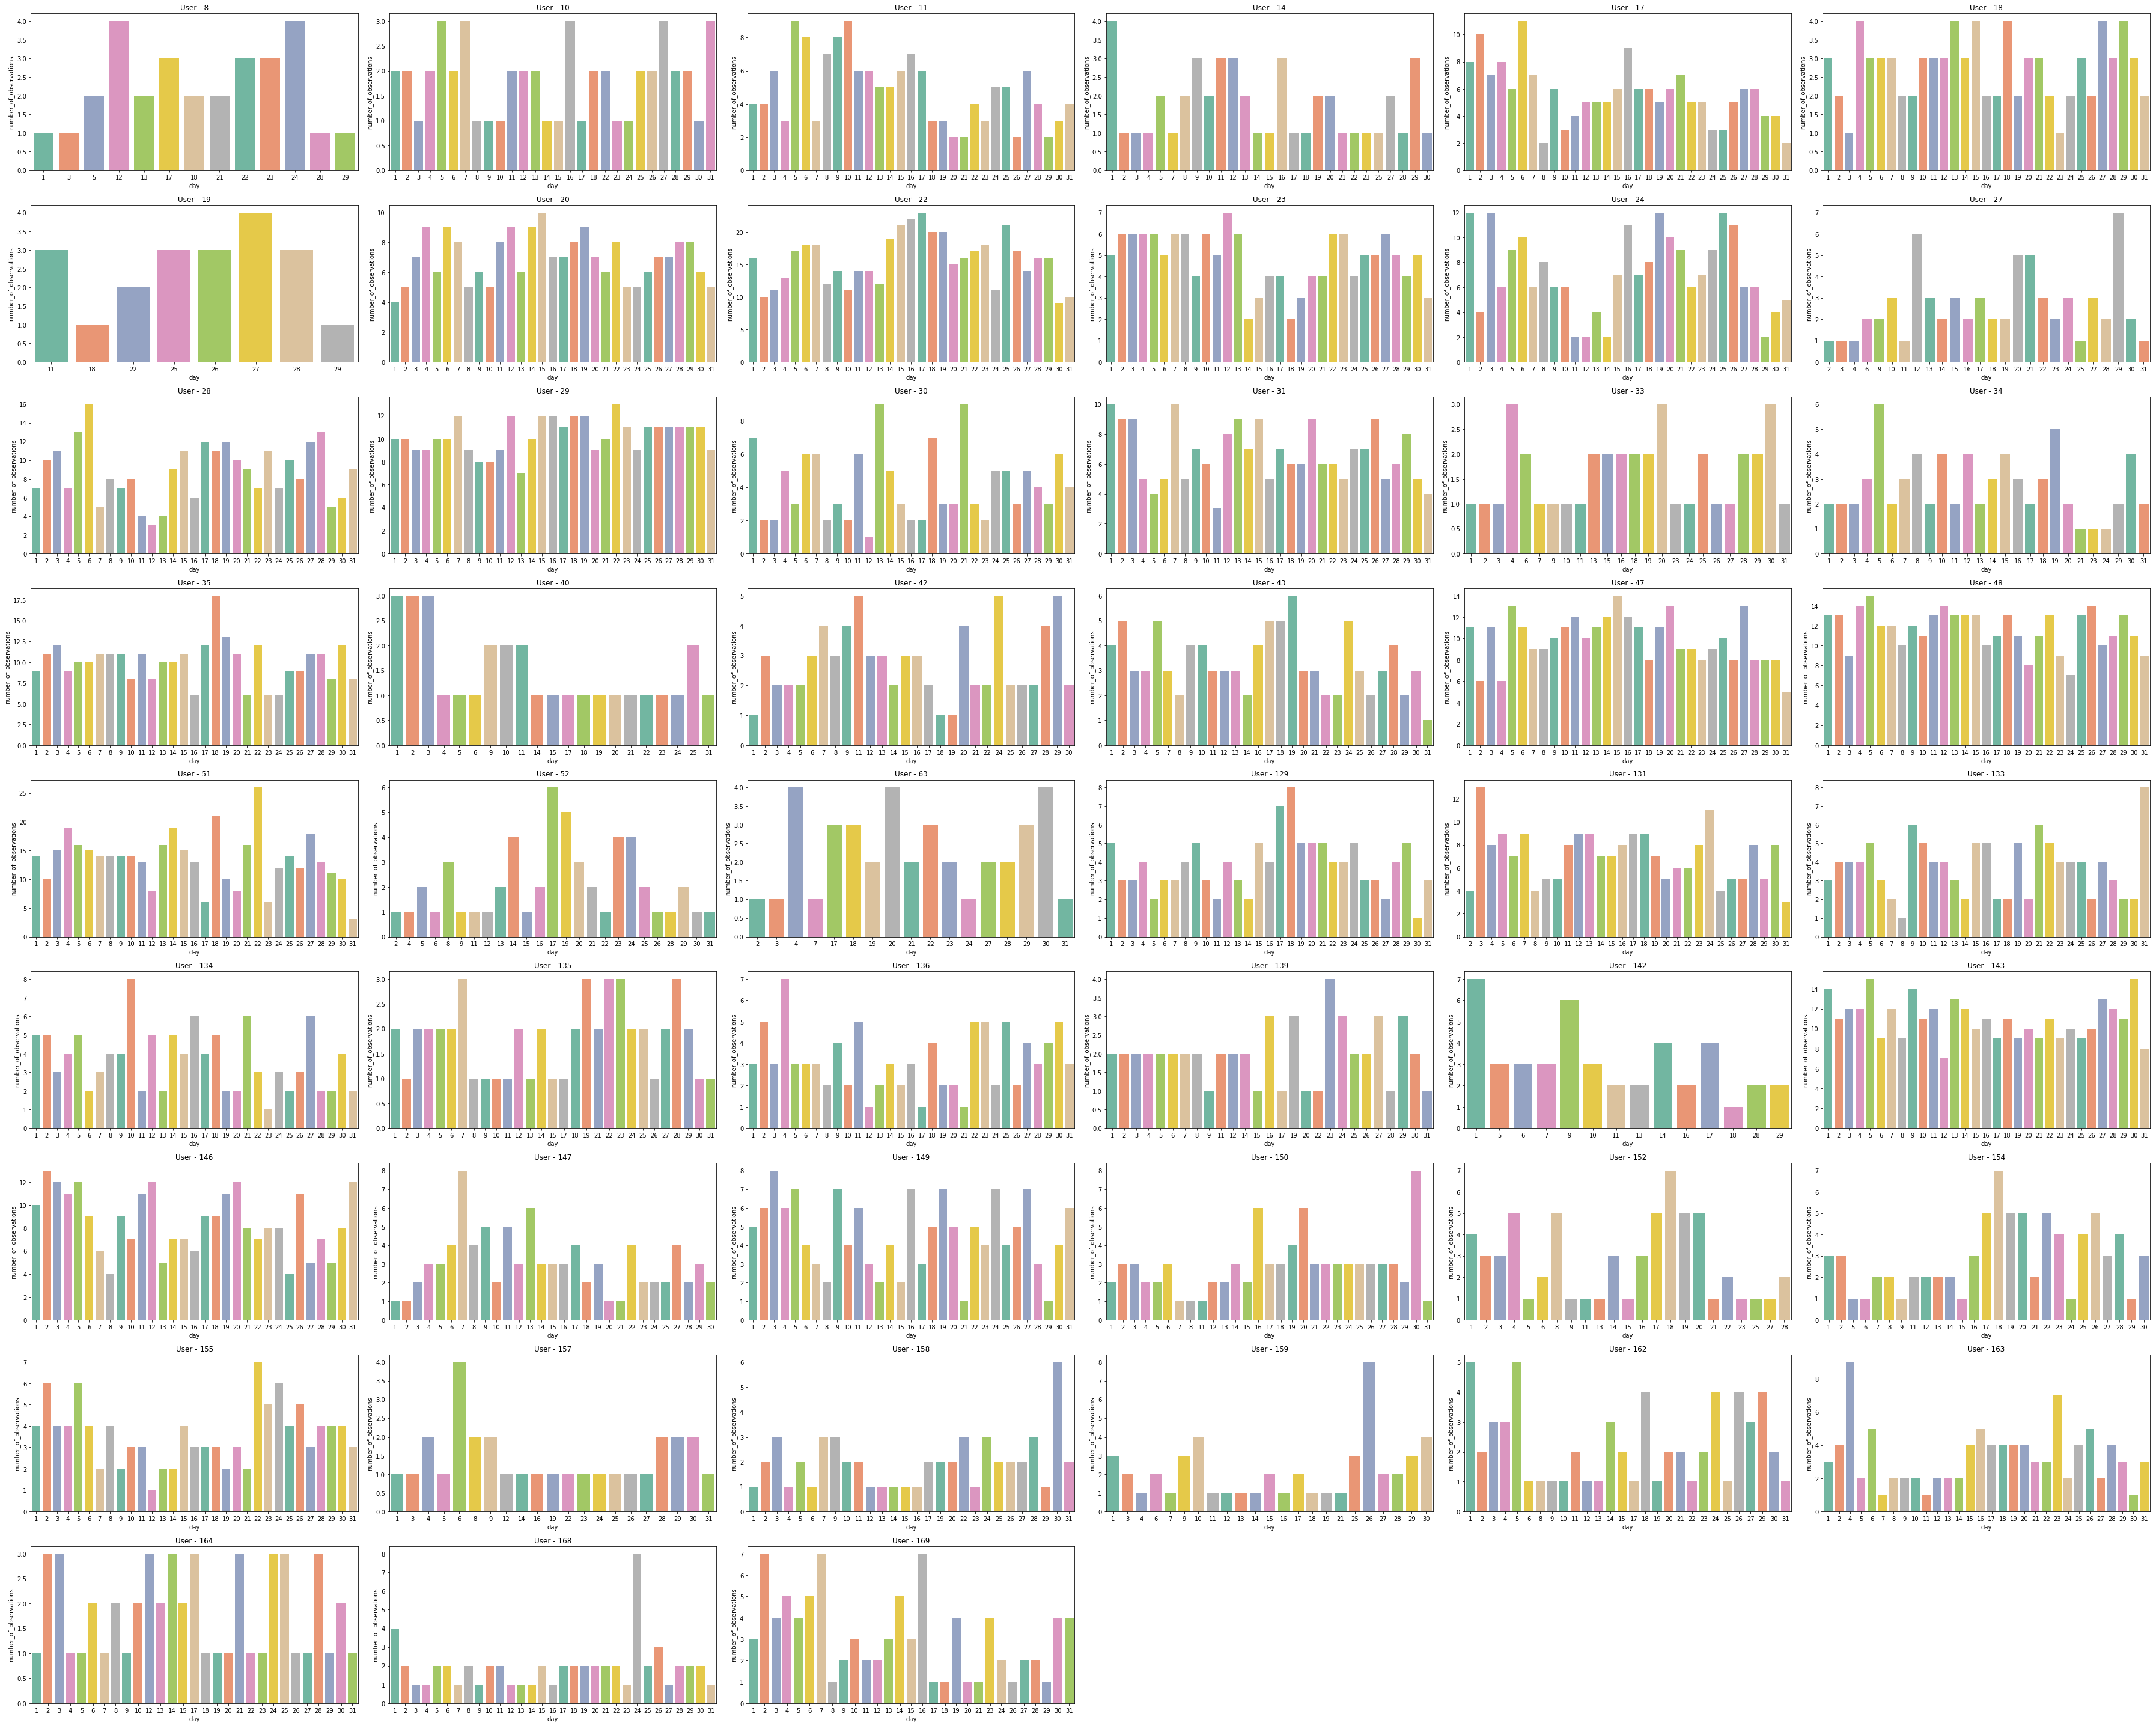

In [94]:
figure, ax = plt.subplots(9, 6, figsize=(50, 40))
count = 0
for axs in ax.flatten():
    if(count >= len(filtered_user_group_day["user_id"].unique())):
        break
    sns.barplot(x="day", y="number_of_observations", 
                data=filtered_user_group_day[filtered_user_group_day["user_id"] == filtered_user_id[count]],
                palette = "Set2",
                ax=axs)
    axs.set(title="".join("User - " + str(filtered_user_id[count])))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
plt.savefig("user_bar_nobs_gt_15_overmonths.png")
plt.show()

In [58]:
user_group_day[user_group_day["user_id"] == 4].to_numpy()

array([[ 4, 20, 12]], dtype=int64)

In [59]:
time_data_set_filtered = time_data_set[time_data_set["user_id"].isin(filtered_user_id)]

In [60]:
len(time_data_set_filtered["user_id"].unique()) # We have 47 users now to work with

47

In [61]:
time_ds_mean_day = time_data_set_filtered.groupby(["user_id", "day"]).min().reset_index()

In [62]:
time_ds_mean_day.head(3)

user_id  day  questionnaire_id          created_at s01   s02   s03   s04  \
0        8    1                 1 2018-10-01 12:17:13  NO  0.64  0.59  0.56   
1        8    3                 1 2018-10-03 11:16:18  NO  0.93  0.89  0.94   
2        8    5                 1 2018-09-05 15:34:30  NO  0.00  0.57  0.31   

    s05   s06   s07 s08  year  month        date  hour  minute  day_of_record  
0  0.56  0.53  0.49  NO  2018     10  2018-10-01    12      17              0  
1  0.94  0.91  0.92  NO  2018     10  2018-10-03    11      16              2  
2  0.30  0.28  0.34  NO  2018      9  2018-09-05    15      34              2

In [63]:
time_ds_mean_day["year"].unique()

array([2018, 2019], dtype=int64)

In [64]:
time_ds_mean_day[time_ds_mean_day["user_id"] == 8][["s03"]].reset_index()

index   s03
0       0  0.59
1       1  0.89
2       2  0.57
3       3  0.46
4       4  0.25
5       5  0.58
6       6  0.58
7       7  0.90
8       8  0.50
9       9  0.90
10     10  0.67
11     11  0.54
12     12  0.63

In [440]:
'''
daysofweek = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
'''
user_d_ts = time_data_set.groupby(["user_id", "day_of_record"]).median().reset_index()
user_date_ts = time_data_set.groupby(["user_id", "month"]).mean().reset_index()

In [441]:
user_date_ts[user_date_ts["user_id"] == 51]

user_id  month  questionnaire_id       s02       s03       s04       s05  \
142       51      1               1.0  0.832054  0.817143  0.989107  0.002411   
143       51      2               1.0  0.873973  0.853836  0.967123  0.001507   
144       51      3               1.0  0.889059  0.886824  0.956353  0.001529   
145       51     11               1.0  0.829091  0.680000  1.000000  0.154545   
146       51     12               1.0  0.873955  0.839925  0.983881  0.013209   

          s06       s07    year       hour     minute        day  \
142  0.041696  0.116786  2019.0  13.491071  32.598214  15.312500   
143  0.016027  0.086164  2019.0  13.068493  29.520548  12.712329   
144  0.012941  0.055882  2019.0  13.705882  32.211765  14.047059   
145  0.503636  0.245455  2018.0  13.818182  28.181818  29.000000   
146  0.070149  0.110000  2018.0  14.477612  28.873134  16.261194   

     day_of_record  
142       2.750000  
143       3.150685  
144       2.635294  
145       3.000000  
146       3.074627

In [442]:
user = user_d_ts[user_d_ts["user_id"] == 8][["day_of_record", "s02", "s03"]]
user_hm = user.set_index("day_of_record")

In [443]:
user_hm

s02    s03
day_of_record              
0              0.690  0.700
1              0.910  0.900
2              0.760  0.770
3              0.790  0.830
5              0.615  0.585

In [116]:
#user_8_pivot = user_8.pivot(index="day_of_record", columns="s02",values="s02")
plt.figure(figsize=(4,6))
sns.heatmap(user_hm, cmap="YlOrBr")

NameError: name 'user_hm' is not defined

<Figure size 288x432 with 0 Axes>

In [58]:
groups_day = time_data_set.groupby(["user_id", "day"]).mean().reset_index()
groups_day["hour"] = groups_day["hour"].apply(np.round)
groups_day["minute"] = groups_day["minute"].apply(np.round)
groups_day["day"] = groups_day["day"].apply(np.round)

In [22]:
groups_day.head()

user_id  day  questionnaire_id       s02       s03       s04       s05  \
0        4   20               1.0  0.555000  0.358333  0.388333  0.406667   
1        6   20               1.0  0.426667  0.341111  0.360000  0.371111   
2        8    1               1.0  0.640000  0.590000  0.560000  0.560000   
3        8    3               1.0  0.930000  0.890000  0.940000  0.940000   
4        8    5               1.0  0.500000  0.765000  0.655000  0.625000   

        s06       s07    year  month  hour  minute  day_of_record  
0  0.376667  0.302500  2018.0    8.0  12.0    11.0            0.0  
1  0.370000  0.295556  2018.0    8.0  12.0    23.0            0.0  
2  0.530000  0.490000  2018.0   10.0  12.0    17.0            0.0  
3  0.910000  0.920000  2018.0   10.0  11.0    16.0            2.0  
4  0.610000  0.650000  2018.0    9.0  15.0    35.0            2.0

In [154]:
user = groups_day[groups_day["user_id"] == 11]
user.pivot(index="day", columns="hour", values="s02")

hour      10.0    11.0   12.0      13.0      14.0      15.0      16.0   17.0  \
day                                                                            
1          NaN  0.6450    NaN       NaN       NaN       NaN       NaN    NaN   
2          NaN     NaN    NaN       NaN  0.902500       NaN       NaN    NaN   
3          NaN     NaN    NaN       NaN       NaN  0.751667       NaN    NaN   
4          NaN     NaN    NaN       NaN       NaN       NaN  0.673333    NaN   
5          NaN     NaN    NaN  0.863333       NaN       NaN       NaN    NaN   
6          NaN     NaN    NaN  0.787500       NaN       NaN       NaN    NaN   
7          NaN     NaN    NaN       NaN       NaN       NaN       NaN    NaN   
8          NaN     NaN    NaN       NaN  0.598571       NaN       NaN    NaN   
9          NaN     NaN    NaN       NaN       NaN       NaN  0.671250    NaN   
10         NaN     NaN    NaN       NaN  0.657778       NaN       NaN    NaN   
11         NaN     NaN    NaN       NaN  0.636667       NaN       NaN    NaN   
12         NaN     NaN  0.740       NaN       NaN       NaN       NaN    NaN   
13         NaN     NaN    NaN       NaN  0.712000       NaN       NaN    NaN   
14         NaN     NaN  0.644       NaN       NaN       NaN       NaN    NaN   
15         NaN     NaN    NaN  0.695000       NaN       NaN       NaN    NaN   
16         NaN     NaN    NaN       NaN       NaN       NaN  0.634286    NaN   
17         NaN     NaN    NaN       NaN       NaN       NaN  0.713333    NaN   
18         NaN     NaN    NaN       NaN  0.686667       NaN       NaN    NaN   
19    0.576667     NaN    NaN       NaN       NaN       NaN       NaN    NaN   
20         NaN     NaN    NaN       NaN       NaN       NaN  0.510000    NaN   
21         NaN     NaN    NaN       NaN  0.775000       NaN       NaN    NaN   
22         NaN     NaN    NaN       NaN  0.547500       NaN       NaN    NaN   
23         NaN     NaN    NaN  0.533333       NaN       NaN       NaN    NaN   
24         NaN     NaN    NaN       NaN       NaN       NaN       NaN    NaN   
25    0.706000     NaN    NaN       NaN       NaN       NaN       NaN    NaN   
26         NaN  1.0000    NaN       NaN       NaN       NaN       NaN    NaN   
27         NaN     NaN    NaN       NaN  0.841667       NaN       NaN    NaN   
28         NaN     NaN    NaN  0.740000       NaN       NaN       NaN    NaN   
29         NaN     NaN    NaN       NaN       NaN       NaN       NaN  0.755   
30         NaN     NaN    NaN       NaN       NaN  0.843333       NaN    NaN   
31         NaN  0.8175    NaN       NaN       NaN       NaN       NaN    NaN   

hour   18.0      19.0  
day                    
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  
5       NaN       NaN  
6       NaN       NaN  
7       NaN  0.633333  
8       NaN       NaN  
9       NaN       NaN  
10      NaN       NaN  
11      NaN       NaN  
12      NaN       NaN  
13      NaN       NaN  
14      NaN       NaN  
15      NaN       NaN  
16      NaN       NaN  
17      NaN       NaN  
18      NaN       NaN  
19      NaN       NaN  
20      NaN       NaN  
21      NaN       NaN  
22      NaN       NaN  
23      NaN       NaN  
24    0.522       NaN  
25      NaN       NaN  
26      NaN       NaN  
27      NaN       NaN  
28      NaN       NaN  
29      NaN       NaN  
30      NaN       NaN  
31      NaN       NaN

In [155]:
user_pivot

hour         3     5     6     7     8    9         10    11   12    13    14  \
date                                                                            
2018-09-05  NaN   NaN  0.83  0.82   NaN  NaN       NaN   NaN  NaN  0.81   NaN   
2018-09-06  NaN   NaN   NaN  0.84   NaN  NaN  0.710000   NaN  NaN   NaN   NaN   
2018-09-07  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-09-08  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN  0.73   NaN   
2018-09-09  NaN   NaN   NaN   NaN   NaN  NaN  0.880000   NaN  NaN  0.68   NaN   
2018-09-10  NaN   NaN   NaN   NaN  1.00  NaN       NaN   NaN  NaN   NaN   NaN   
2018-09-11  NaN   NaN  0.83   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-09-13  NaN   NaN   NaN   NaN   NaN  NaN  0.630000   NaN  NaN   NaN   NaN   
2018-10-09  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-10  NaN   NaN   NaN   NaN   NaN  NaN  0.566667   NaN  NaN   NaN   NaN   
2018-10-11  NaN   NaN   NaN   NaN   NaN  NaN  0.590000  0.49  NaN   NaN   NaN   
2018-10-12  NaN   NaN  0.59   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-13  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-14  NaN   NaN  0.53   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-15  NaN   NaN   NaN   NaN  0.56  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-17  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-20  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN  0.55   
2018-10-21  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-22  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-24  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-25  NaN   NaN   NaN  0.46   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-28  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN  0.49   NaN   
2018-10-29  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-30  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-10-31  0.6   NaN   NaN  0.67   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-11-01  NaN   NaN   NaN   NaN   NaN  NaN  0.540000   NaN  NaN   NaN   NaN   
2018-11-02  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-11-03  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-11-04  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-11-05  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
...         ...   ...   ...   ...   ...  ...       ...   ...  ...   ...   ...   
2018-12-18  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-12-20  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-12-22  NaN  0.51   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-12-23  NaN   NaN   NaN  0.52   NaN  NaN       NaN   NaN  NaN  0.51   NaN   
2018-12-24  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-12-25  NaN   NaN   NaN   NaN   NaN  NaN  1.000000   NaN  NaN   NaN   NaN   
2018-12-26  NaN   NaN   NaN   NaN  1.00  NaN       NaN   NaN  NaN   NaN  1.00   
2018-12-27  NaN   NaN   NaN   NaN   NaN  1.0       NaN   NaN  NaN   NaN  1.00   
2018-12-28  NaN   NaN   NaN   NaN   NaN  NaN       NaN  1.00  NaN   NaN   NaN   
2018-12-29  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN   NaN   
2018-12-30  NaN   NaN   NaN   NaN   NaN  1.0       NaN   NaN  NaN   NaN   NaN   
2018-12-31  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  NaN   NaN  1.00   
2019-01-01  NaN   NaN   NaN   NaN   NaN  NaN       NaN   NaN  1.0   NaN   NaN   
2019-01-02  NaN   NaN   NaN   NaN  1.00  NaN       NaN   NaN  1.0   NaN   NaN   
2019-01-03  NaN   NaN   NaN   NaN   NaN  NaN       NaN  1.00  NaN   NaN   NaN   
2019-01-04  NaN   NaN   NaN   NaN   NaN  NaN  1.000000   NaN  NaN   NaN   NaN   
2019-01-05  NaN   NaN   NaN   N

In [41]:
grop_day_uid = groups_day["user_id"].unique()

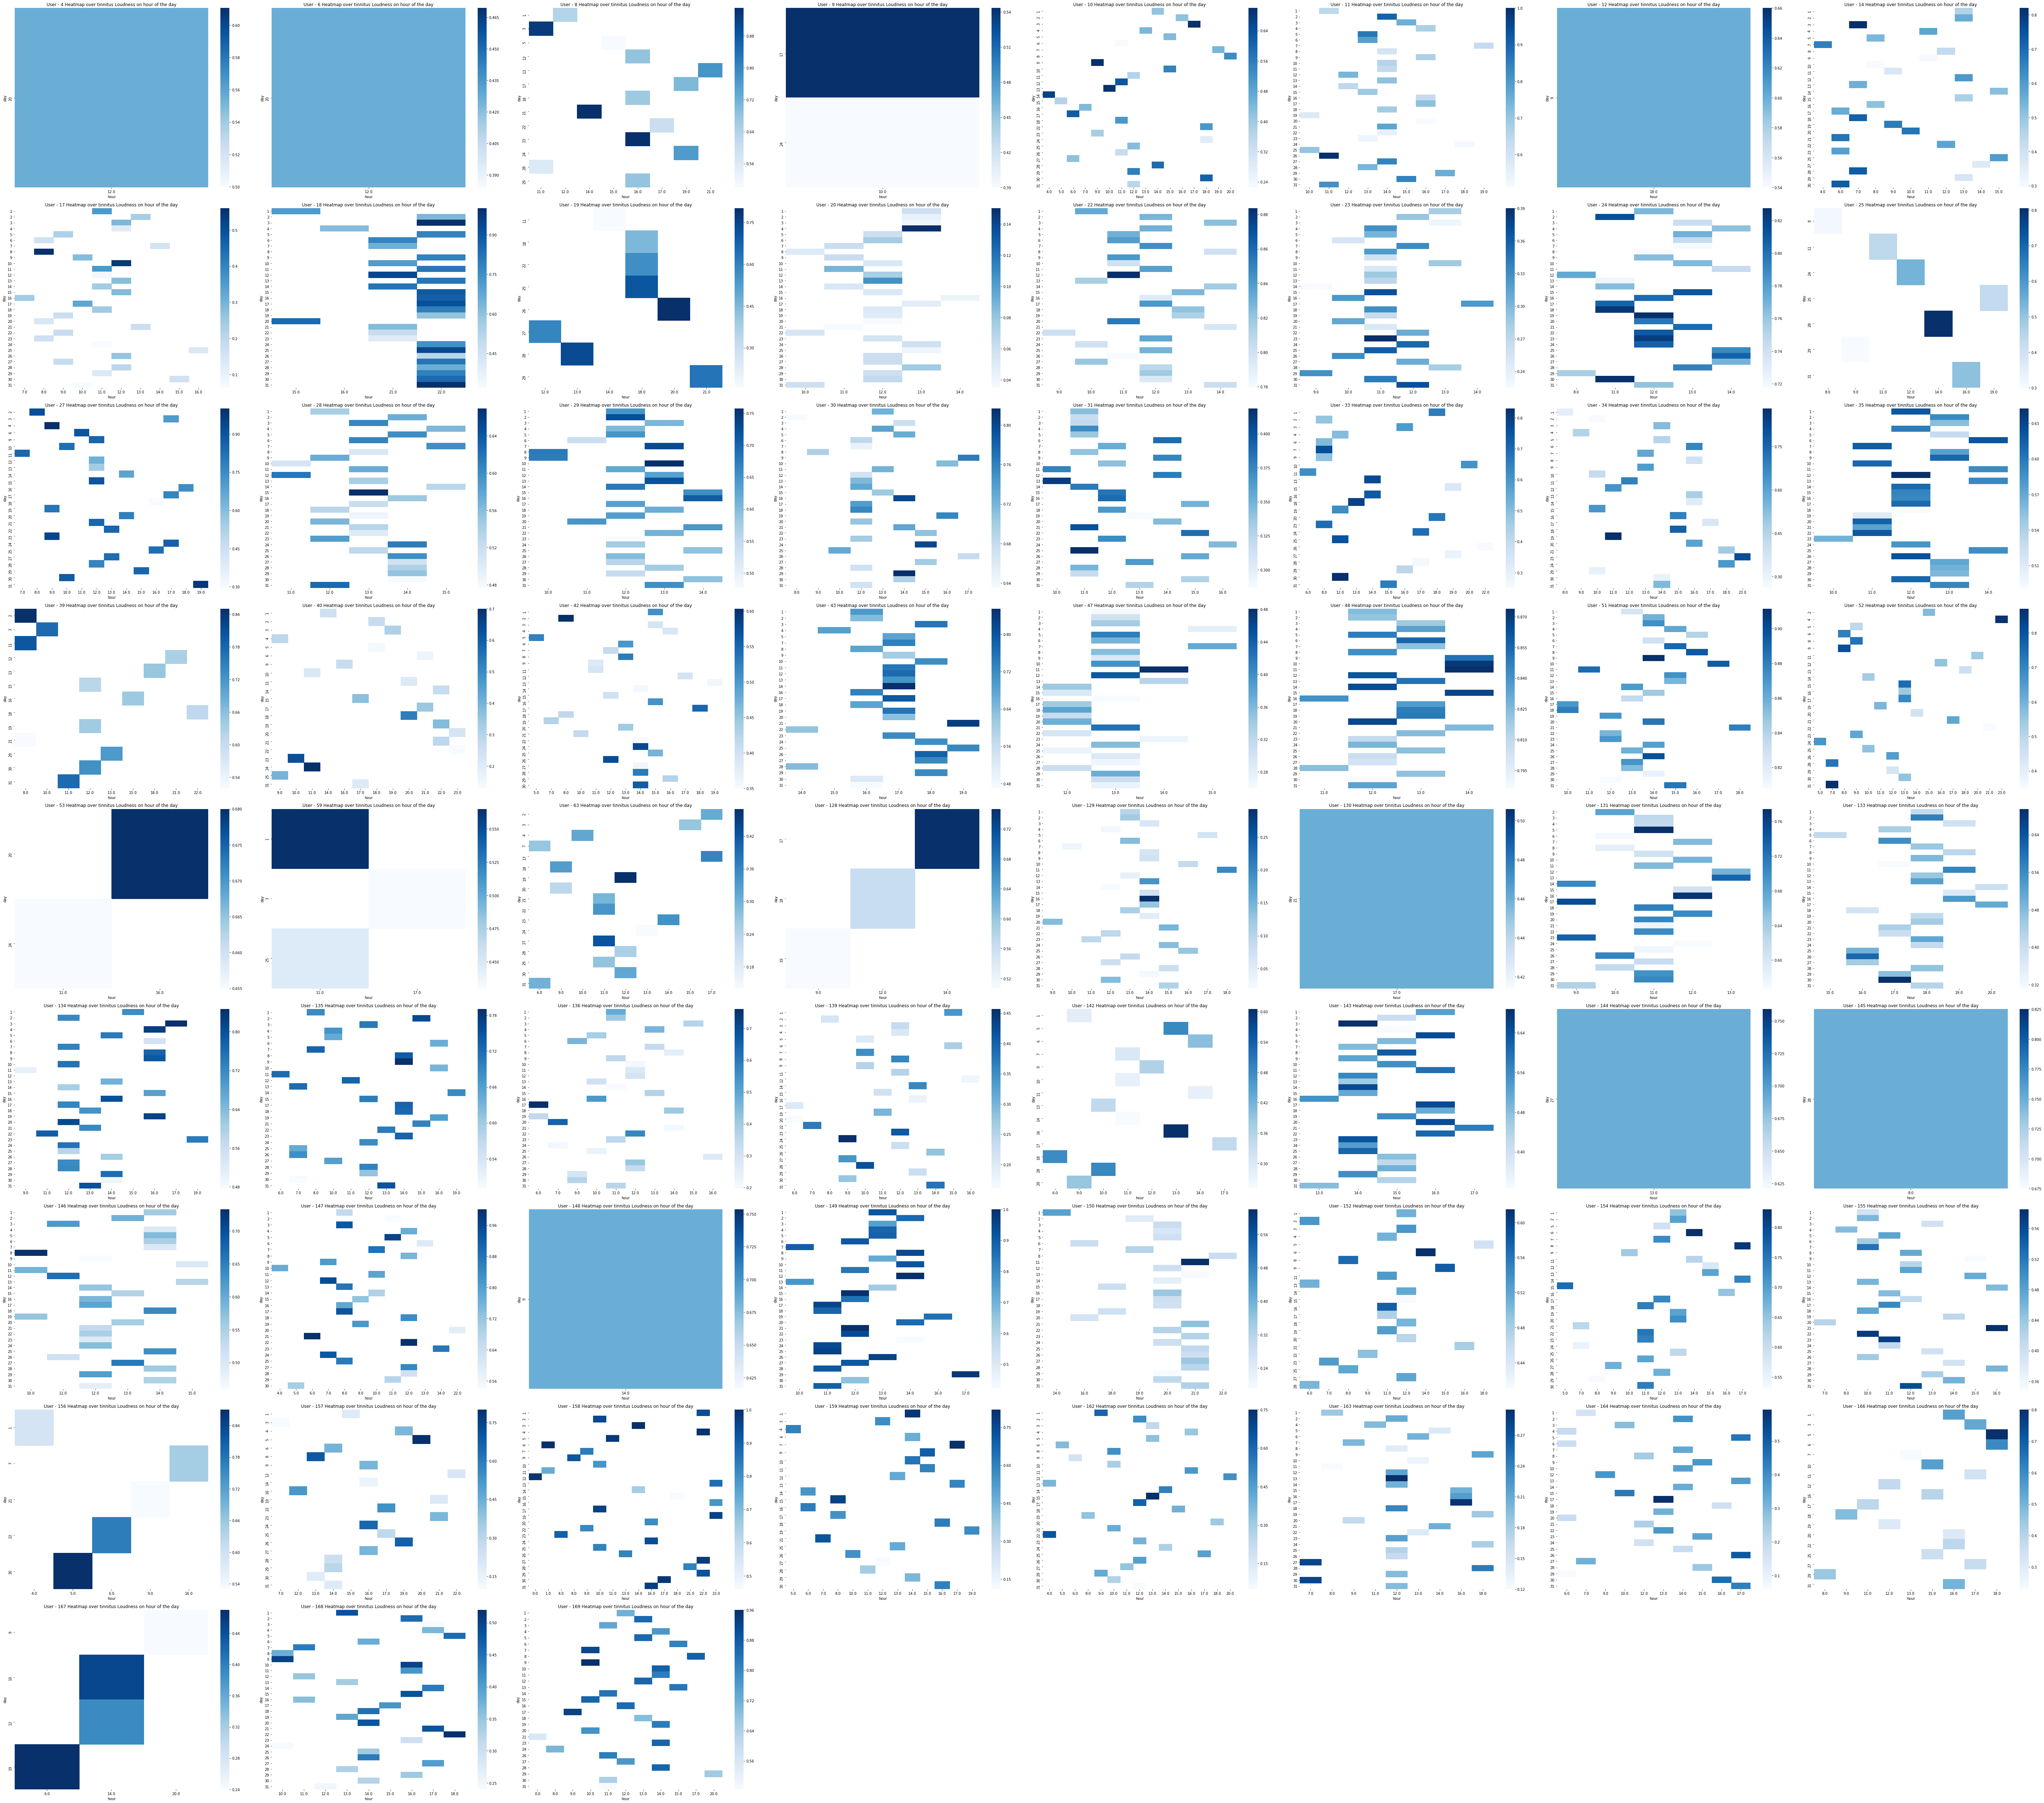

In [157]:
figure, ax = plt.subplots(9, 8, figsize=(80, 70))
count = 0
for axs in ax.flatten():
    if(count >= len(groups_day["user_id"].unique())):
        break
    user = groups_day[groups_day["user_id"] == grop_day_uid[count]]    
    user_pivot = user.pivot(index="day", columns="hour",values="s02")    
    sns.heatmap(user_pivot, cmap="Blues", mask=user_pivot.isnull(), ax=axs)    
    axs.set(title="".join("User - " + str(grop_day_uid[count]) + " Heatmap over tinnitus Loudness on hour of the day"))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
figure.delaxes(ax[8][6])
figure.delaxes(ax[8][7])
plt.savefig("user_hm_hours_loudness1.png")
plt.show()

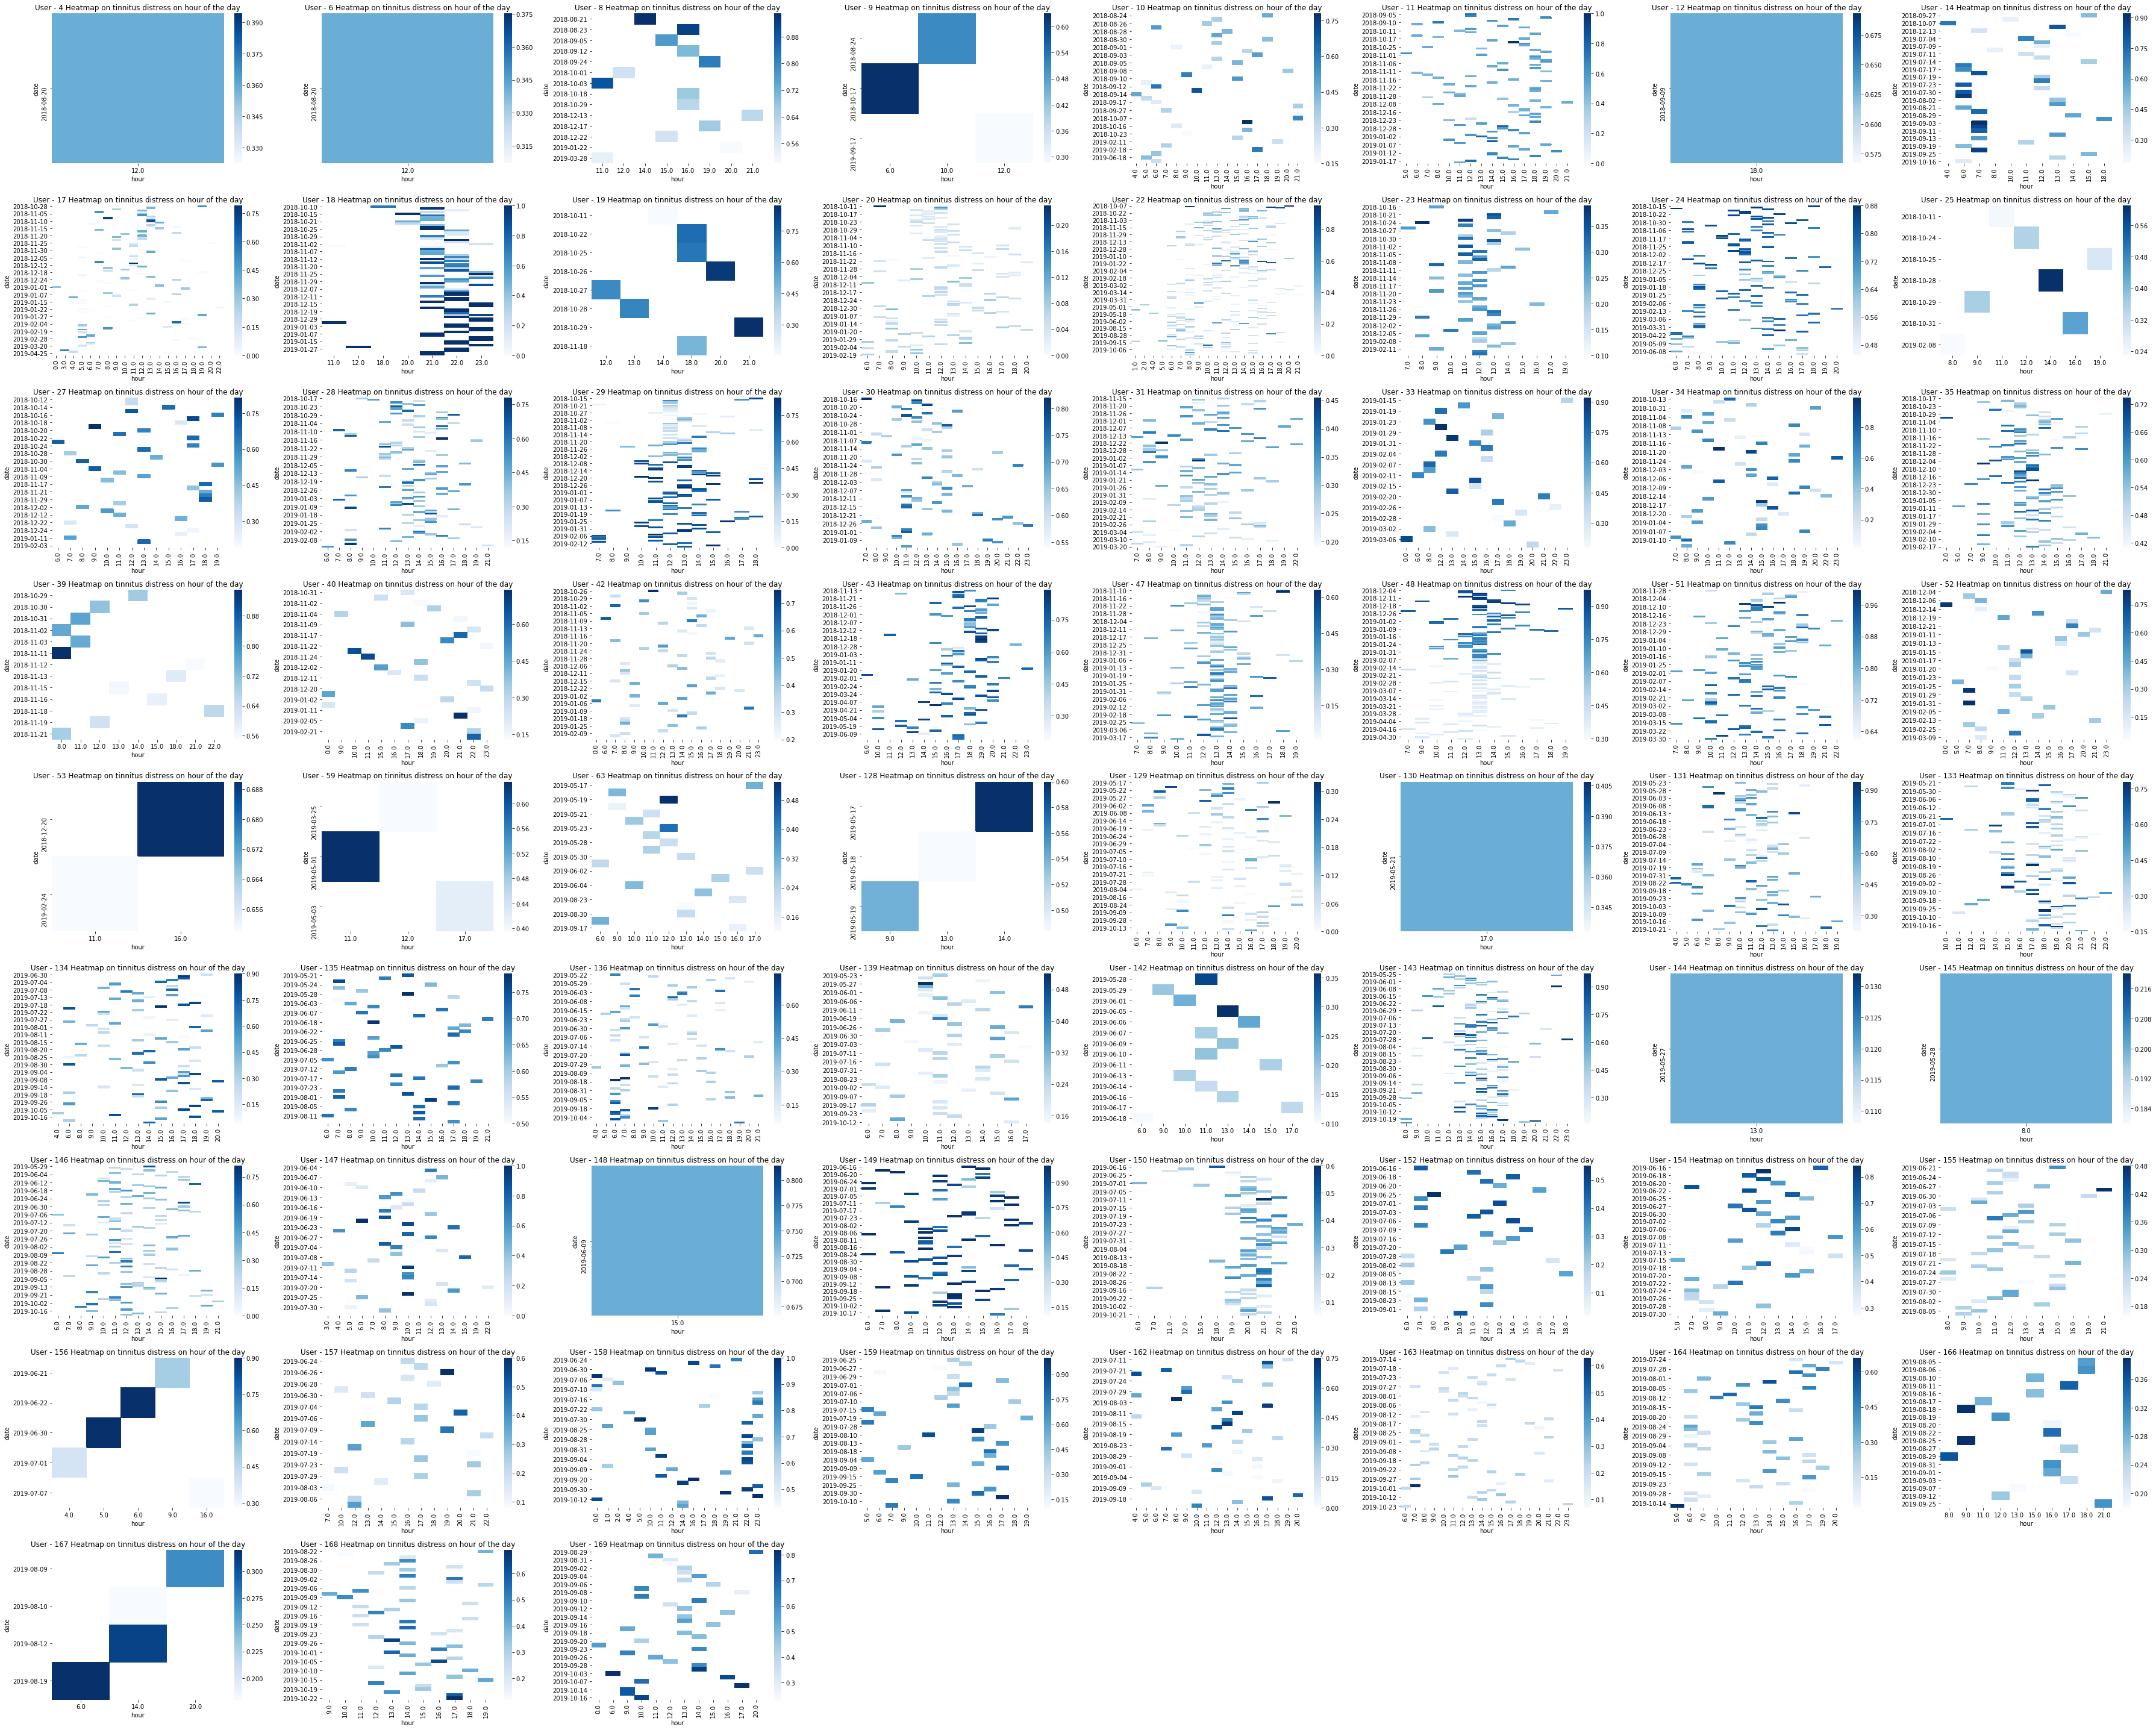

In [99]:
figure, ax = plt.subplots(9, 8, figsize=(50, 40))
count = 0
for axs in ax.flatten():
    if(count >= len(groups_day["user_id"].unique())):
        break
    user = groups_day[groups_day["user_id"] == grop_day_uid[count]]    
    user_pivot = user.pivot(index="date", columns="hour",values="s03")    
    sns.heatmap(user_pivot, cmap="Blues", mask=user_pivot.isnull(), ax=axs)    
    axs.set(title="".join("User - " + str(grop_day_uid[count]) + " Heatmap on tinnitus distress on hour of the day"))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
figure.delaxes(ax[8][6])
figure.delaxes(ax[8][7])
plt.savefig("user_hm_hours_tinnitus_distress.png")
plt.show()

In [70]:
groups_day[groups_day["user_id"] == 63]

user_id  day  questionnaire_id       s02       s03     s04  s05  \
750       63    2               1.0  0.310000  0.210000  1.0000  0.0   
751       63    3               1.0  0.270000  0.250000  0.8800  0.0   
752       63    4               1.0  0.315000  0.302500  1.0000  0.0   
753       63    7               1.0  0.270000  0.320000  1.0000  0.0   
754       63   17               1.0  0.363333  0.263333  1.0000  0.0   
755       63   18               1.0  0.330000  0.306667  1.0000  0.0   
756       63   19               1.0  0.470000  0.530000  1.0000  0.0   
757       63   20               1.0  0.232500  0.147500  1.0000  0.0   
758       63   21               1.0  0.295000  0.205000  1.0000  0.0   
759       63   22               1.0  0.340000  0.280000  1.0000  0.0   
760       63   23               1.0  0.345000  0.305000  1.0000  0.0   
761       63   24               1.0  0.140000  0.120000  1.0000  0.0   
762       63   27               1.0  0.425000  0.240000  0.9350  0.0   
763       63   28               1.0  0.250000  0.210000  1.0000  0.0   
764       63   29               1.0  0.273333  0.253333  1.0000  0.0   
765       63   30               1.0  0.315000  0.220000  0.9825  0.0   
766       63   31               1.0  0.300000  0.230000  1.0000  0.0   

          s06       s07    year     month  hour  minute  day_of_record  
750  0.260000  0.480000  2019.0  6.000000  17.0    34.0       6.000000  
751  0.250000  0.660000  2019.0  6.000000  15.0    39.0       0.000000  
752  0.297500  0.490000  2019.0  6.000000  10.0    42.0       1.000000  
753  0.210000  0.400000  2019.0  9.000000   6.0     7.0       5.000000  
754  0.296667  0.110000  2019.0  6.333333  17.0    20.0       3.000000  
755  0.263333  0.516667  2019.0  5.000000   9.0    33.0       5.000000  
756  0.255000  0.335000  2019.0  5.000000  12.0    30.0       6.000000  
757  0.307500  0.225000  2019.0  5.000000   9.0    30.0       0.000000  
758  0.220000  0.375000  2019.0  5.000000  11.0    38.0       1.000000  
759  0.363333  0.390000  2019.0  6.000000  11.0    25.0       2.333333  
760  0.330000  0.345000  2019.0  6.500000  14.0    25.0       3.500000  
761  0.220000  0.380000  2019.0  8.000000  13.0    39.0       5.000000  
762  0.350000  0.635000  2019.0  5.000000  11.0    21.0       0.000000  
763  0.305000  0.260000  2019.0  5.000000  12.0    52.0       1.000000  
764  0.216667  0.320000  2019.0  5.000000  11.0    16.0       2.000000  
765  0.210000  0.410000  2019.0  5.750000  12.0    21.0       3.250000  
766  0.200000  0.180000  2019.0  5.000000   6.0    44.0       4.000000

In [79]:
user = groups_day[groups_day["user_id"] == 63]

In [83]:
user.corr()

user_id       day  questionnaire_id       s02       s03  \
user_id               NaN       NaN               NaN       NaN       NaN   
day                   NaN  1.000000               NaN  0.012475 -0.186848   
questionnaire_id      NaN       NaN               NaN       NaN       NaN   
s02                   NaN  0.012475               NaN  1.000000  0.751866   
s03                   NaN -0.186848               NaN  0.751866  1.000000   
s04                   NaN  0.248712               NaN -0.080718  0.063127   
s05                   NaN       NaN               NaN       NaN       NaN   
s06                   NaN -0.014432               NaN  0.370772  0.074881   
s07                   NaN -0.427699               NaN  0.125656  0.066848   
year                  NaN       NaN               NaN       NaN       NaN   
month                 NaN -0.385243               NaN -0.386735 -0.069083   
hour                  NaN -0.251904               NaN  0.108437 -0.074230   
minute                NaN -0.010572               NaN -0.282919 -0.242407   
day_of_record         NaN -0.101203               NaN  0.107474  0.372512   

                       s04  s05       s06       s07  year     month      hour  \
user_id                NaN  NaN       NaN       NaN   NaN       NaN       NaN   
day               0.248712  NaN -0.014432 -0.427699   NaN -0.385243 -0.251904   
questionnaire_id       NaN  NaN       NaN       NaN   NaN       NaN       NaN   
s02              -0.080718  NaN  0.370772  0.125656   NaN -0.386735  0.108437   
s03               0.063127  NaN  0.074881  0.066848   NaN -0.069083 -0.074230   
s04               1.000000  NaN -0.080881 -0.664745   NaN  0.068781 -0.241405   
s05                    NaN  NaN       NaN       NaN   NaN       NaN       NaN   
s06              -0.080881  NaN  1.000000  0.104472   NaN -0.197048  0.243833   
s07              -0.664745  NaN  0.104472  1.000000   NaN  0.054126  0.089410   
year                   NaN  NaN       NaN       NaN   NaN       NaN       NaN   
month             0.068781  NaN -0.197048  0.054126   NaN  1.000000  0.009167   
hour             -0.241405  NaN  0.243833  0.089410   NaN  0.009167  1.000000   
minute           -0.045062  NaN -0.004628 -0.007733   NaN -0.368575  0.068922   
day_of_record     0.475494  NaN -0.395388 -0.157518   NaN  0.381168  0.031022   

                    minute  day_of_record  
user_id                NaN            NaN  
day              -0.010572      -0.101203  
questionnaire_id       NaN            NaN  
s02              -0.282919       0.107474  
s03              -0.242407       0.372512  
s04              -0.045062       0.475494  
s05                    NaN            NaN  
s06              -0.004628      -0.395388  
s07              -0.007733      -0.157518  
year                   NaN            NaN  
month            -0.368575       0.381168  
hour              0.068922       0.031022  
minute            1.000000      -0.171216  
day_of_record    -0.171216       1.000000

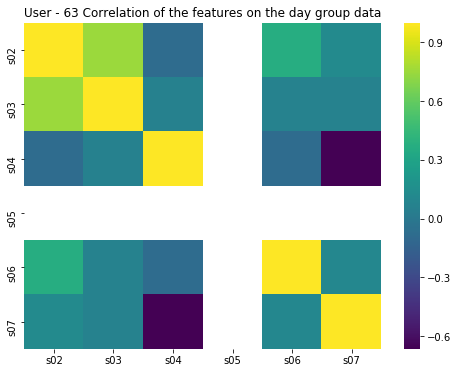

In [71]:
plt.figure(figsize=(8, 6))
user = groups_day[groups_day["user_id"] == 63]
user_df = user[["s02","s03","s04","s05","s06","s07"]]
sns.heatmap(user_df.corr(), cmap="viridis", 
                mask=user_df.corr().isnull())    
plt.title("".join("User - " + str(63) + " Correlation of the features on the day group data"))
plt.savefig("user_63.png")

In [56]:
groups_day

user_id  day  questionnaire_id       s02       s03       s04       s05  \
0           4   20               1.0  0.555000  0.358333  0.388333  0.406667   
1           6   20               1.0  0.426667  0.341111  0.360000  0.371111   
2           8    1               1.0  0.640000  0.590000  0.560000  0.560000   
3           8    3               1.0  0.930000  0.890000  0.940000  0.940000   
4           8    5               1.0  0.500000  0.765000  0.655000  0.625000   
5           8   12               1.0  0.682500  0.702500  0.675000  0.700000   
6           8   13               1.0  0.775000  0.625000  0.815000  0.760000   
7           8   17               1.0  0.703333  0.666667  0.746667  0.690000   
8           8   18               1.0  0.670000  0.670000  0.630000  0.665000   
9           8   21               1.0  0.950000  0.950000  0.890000  0.865000   
10          8   22               1.0  0.603333  0.556667  0.576667  0.690000   
11          8   23               1.0  0.950000  0.920000  0.920000  0.906667   
12          8   24               1.0  0.762500  0.817500  0.780000  0.772500   
13          8   28               1.0  0.560000  0.540000  0.350000  0.800000   
14          8   29               1.0  0.680000  0.630000  0.600000  0.640000   
15          9   17               1.0  0.543333  0.400000  0.786667  0.510000   
16          9   24               1.0  0.390000  0.510000  0.500000  0.410000   
17         10    1               1.0  0.415000  0.175000  0.815000  0.205000   
18         10    2               1.0  0.420000  0.330000  0.740000  0.200000   
19         10    3               1.0  0.700000  0.510000  0.810000  0.250000   
20         10    4               1.0  0.445000  0.340000  0.740000  0.290000   
21         10    5               1.0  0.436667  0.440000  0.896667  0.116667   
22         10    6               1.0  0.225000  0.200000  0.830000  0.190000   
23         10    7               1.0  0.446667  0.493333  0.833333  0.253333   
24         10    8               1.0  0.530000  0.390000  0.760000  0.240000   
25         10    9               1.0  0.700000  0.590000  0.830000  0.100000   
26         10   10               1.0  0.550000  0.530000  0.850000  0.230000   
27         10   11               1.0  0.370000  0.245000  0.835000  0.190000   
28         10   12               1.0  0.630000  0.695000  0.765000  0.240000   
29         10   13               1.0  0.695000  0.695000  0.835000  0.200000   
...       ...  ...               ...       ...       ...       ...       ...   
1446      168   31               1.0  0.250000  0.260000  0.960000  0.050000   
1447      169    1               1.0  0.716667  0.233333  0.933333  0.076667   
1448      169    2               1.0  0.854286  0.628571  0.955714  0.075714   
1449      169    3               1.0  0.737500  0.475000  0.965000  0.117500   
1450      169    4               1.0  0.770000  0.570000  0.936000  0.102000   
1451      169    5               1.0  0.855000  0.395000  0.930000  0.080000   
1452      169    6               1.0  0.810000  0.480000  0.946000  0.114000   
1453      169    7               1.0  0.915714  0.631429  0.931429  0.114286   
1454      169    8               1.0  0.870000  0.290000  0.960000  0.100000   
1455      169    9               1.0  0.960000  0.645000  0.950000  0.095000   
1456      169   10               1.0  0.870000  0.650000  0.946667  0.090000   
1457      169   11               1.0  0.820000  0.580000  0.970000  0.070000   
1458      169   12               1.0  0.860000  0.480000  0.960000  0.065000   
1459      169   13               1.0  0.830000  0.473333  0.976667  0.043333   
1460      169   14               1.0  0.834000  0.572000  0.954000  0.098000   
1461      169   15               1.0  0.863333  0.673333  0.976667  0.060000   
1462      169   16               1.0  0.851429  0.641429  0.970000  0.070000   
1463      169   17               1.0  0.930000  0.540000  0.940000  0.040000   
1464  

In [ ]:
plt.figure(figsize=(8,6))

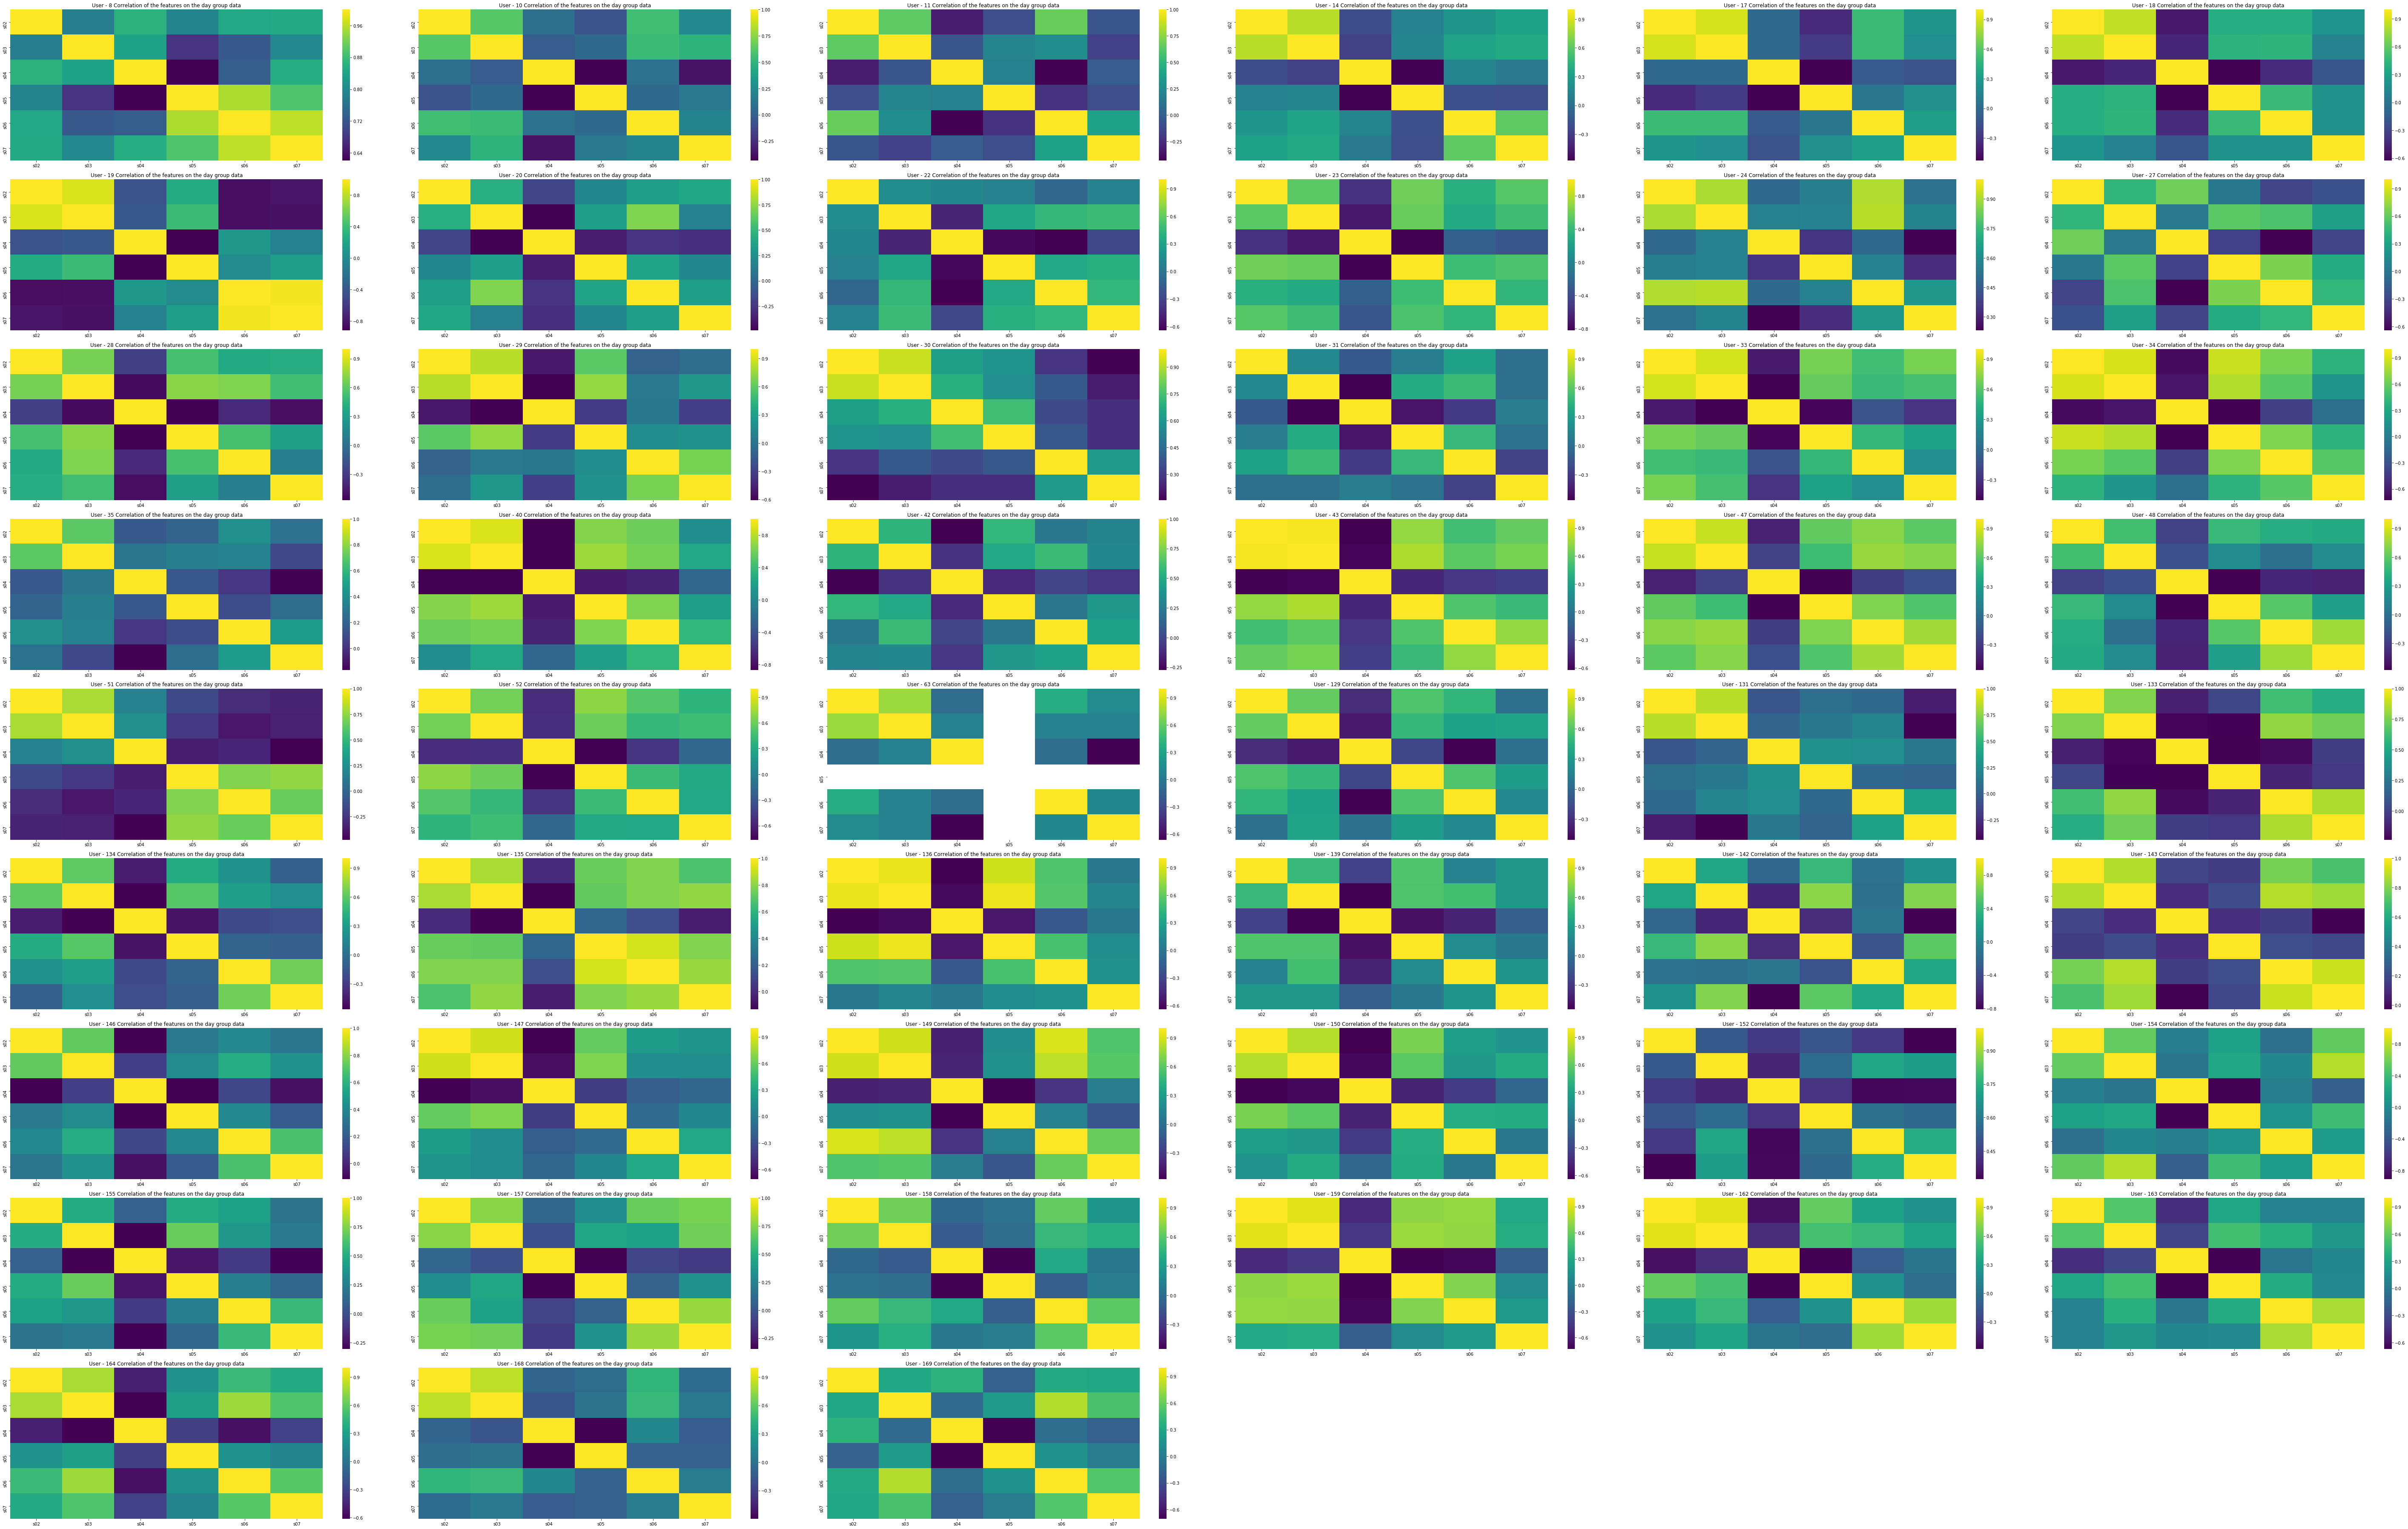

In [57]:
figure, ax = plt.subplots(9, 6, figsize=(80, 50))
count = 0
for axs in ax.flatten():
    if(count >= len(filtered_user_id)):
        break
    user = groups_day[groups_day["user_id"] == filtered_user_id[count]]
    user_df = user[["s02","s03","s04","s05","s06","s07"]]
    corr = user_df.corr()
    sns.heatmap(corr, cmap="viridis", 
                mask=corr.isnull(), 
                ax=axs)    
    axs.set(title="".join("User - " + str(filtered_user_id[count]) + " Correlation of the features on the day group data"))
    count+=1
    
figure.tight_layout()
figure.delaxes(ax[8][3])
figure.delaxes(ax[8][4])
figure.delaxes(ax[8][5])
plt.savefig("users_corr.png")
plt.show()

In [106]:
user = groups_day[groups_day["user_id"] == 4]

In [107]:
user.corr()

user_id  questionnaire_id  s02  s03  s04  s05  s06  s07  \
user_id               NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
questionnaire_id      NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
s02                   NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
s03                   NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
s04                   NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
s05                   NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
s06                   NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
s07                   NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
year                  NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
month                 NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
hour                  NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
minute                NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
day                   NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   
day_of_record         NaN               NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                  year  month  hour  minute  day  day_of_record  
user_id            NaN    NaN   NaN     NaN  NaN            NaN  
questionnaire_id   NaN    NaN   NaN     NaN  NaN            NaN  
s02                NaN    NaN   NaN     NaN  NaN            NaN  
s03                NaN    NaN   NaN     NaN  NaN            NaN  
s04                NaN    NaN   NaN     NaN  NaN            NaN  
s05                NaN    NaN   NaN     NaN  NaN            NaN  
s06                NaN    NaN   NaN     NaN  NaN            NaN  
s07                NaN    NaN   NaN     NaN  NaN            NaN  
year               NaN    NaN   NaN     NaN  NaN            NaN  
month              NaN    NaN   NaN     NaN  NaN            NaN  
hour               NaN    NaN   NaN     NaN  NaN            NaN  
minute             NaN    NaN   NaN     NaN  NaN            NaN  
day                NaN    NaN   NaN     NaN  NaN            NaN  
day_of_record      NaN    NaN   NaN     NaN  NaN            NaN

In [445]:
user = user_d_ts[user_d_ts["user_id"] == 43][["day_of_record", "s02", "s03"]]
user_hm = user.set_index("day_of_record")

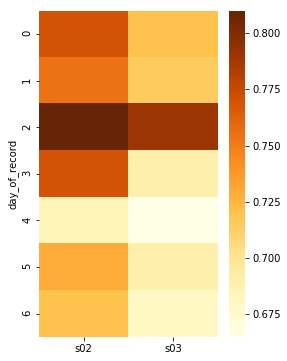

In [446]:
#user_8_pivot = user_8.pivot(index="day_of_record", columns="s02",values="s02")
plt.figure(figsize=(4,6))
sns.heatmap(user_hm, cmap="YlOrBr")

In [447]:
#These are user_ids which are below the length of 20 observations (threshold defined by me basically)
drop_user_ids = [54, 60, 140, 170, 4, 6, 7, 9, 12, 19, 25, 53, 59, 130, 144, 145, 148, 156, 166, 167]

In [448]:
u_np = user_d_ts[user_d_ts["user_id"] == 51][["day_of_record", "s02","s03"]].to_numpy()

In [449]:
user_ts_days = []

for user_id in user_ids:
    if user_id not in drop_user_ids:
        user_ts_days.append((user_id, user_d_ts[user_d_ts["user_id"] == user_id][["day_of_record", "s02","s03"]].to_numpy()))

In [450]:
X = np.asarray(user_ts_days)

In [451]:
X[3]

array([14,
       array([[0.   , 0.43 , 0.415],
       [1.   , 0.55 , 0.61 ],
       [2.   , 0.6  , 0.58 ],
       [3.   , 0.56 , 0.605],
       [4.   , 0.525, 0.46 ],
       [6.   , 0.52 , 0.64 ]])], dtype=object)

In [452]:
X[:,1][34]

array([[0.   , 0.58 , 0.5  ],
       [1.   , 0.505, 0.495],
       [2.   , 0.56 , 0.59 ],
       [3.   , 0.72 , 0.68 ],
       [4.   , 0.525, 0.525],
       [5.   , 0.605, 0.48 ],
       [6.   , 0.505, 0.51 ]])

In [453]:
x= X[:,1][11]
y= X[:,1][14]

[(0, 1)]

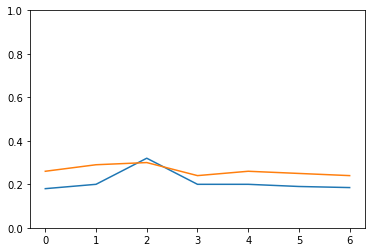

In [454]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(6, 4))
sns.lineplot(X[:,1][35][:,0], X[:,1][35][:,2])
sns.lineplot(X[:,1][12][:,0], X[:,1][12][:,2])
ax.set(ylim=(0, 1))

[(0, 1)]

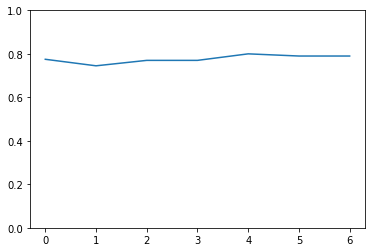

In [455]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(6, 4))
sns.lineplot(X[:,1][10][:,0], X[:,1][10][:,2])
ax.set(ylim=(0, 1))

In [456]:
x

array([[0.   , 0.71 , 0.7  ],
       [1.   , 0.69 , 0.65 ],
       [2.   , 0.675, 0.645],
       [3.   , 0.73 , 0.69 ],
       [4.   , 0.74 , 0.69 ],
       [5.   , 0.73 , 0.68 ],
       [6.   , 0.715, 0.67 ]])

In [457]:
y

array([[0.   , 0.605, 0.58 ],
       [1.   , 0.59 , 0.57 ],
       [2.   , 0.57 , 0.56 ],
       [3.   , 0.58 , 0.565],
       [4.   , 0.575, 0.57 ],
       [5.   , 0.61 , 0.59 ],
       [6.   , 0.61 , 0.61 ]])

In [458]:
sns.scatterplot(x[:,1:], y[:,1:])

ValueError: If using all scalar values, you must pass an index

In [ ]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

In [ ]:
from scipy.spatial.distance import cdist

euclidean(x[0][1:], y[0][1:])

In [ ]:
euclidean([.70, .88], [.75, .96])

In [ ]:
sum(np.subtract(x[1:][0],y[1:][0]))

In [ ]:
x[1][2]

In [ ]:
X[:,1][0].shape

In [ ]:
def compute_dist(x, y=None):
    dist=0
    count=0
    penalty_count = 0
    from scipy.spatial.distance import euclidean,cosine
    from sklearn.metrics.pairwise import cosine_similarity
    #C = np.zeros((X.shape[0], X.shape[0]))
    for i in range(len(x)):
        flag= False
        for j in range(len(y)):
           # print(str(x[i][0]) + " " + str(y[j][0]))
            if x[i][0] == y[j][0]:
                flag=True
                count+=1
                s02_s03_dist = euclidean(x[i][1:], y[j][1:])
                #s02_d = euclidean(x[i][1],y[j][1])
                #print(s02_d)
                #s03_d = euclidean(x[i][2],y[j][2])
                #print(s03_d)
                #sum = (s02_d + s03_d)
                #print(sum)
                dist+=s02_s03_dist
                print(dist)
        if not flag:   
            count+=1
            #s02_d = euclidean(x[i][1],0)
            #print(s02_d)
            #s03_d = euclidean(x[i][2],0)
            #print(s03_d)
            #sum = (s02_d + s03_d)
            #print(sum)
            s02_s03_dist = euclidean(x[i][1:], [0.0, 0.0])
            print(s02_s03_dist)
            dist+=s02_s03_dist
            #C[i][j] = dist/count
            print("penality_dist "+ str(dist))
    print("dist -- " + str(dist/count))
    return dist/count

In [ ]:
def compute_dist1(x, y=None):
    dist=0
    count=0
    penalty_count = 0
    from scipy.spatial.distance import euclidean,cosine
    from sklearn.metrics.pairwise import cosine_similarity
    #C = np.zeros((X.shape[0], X.shape[0]))
    for i in range(len(x)):
        flag= False
        for j in range(len(y)):
           # print(str(x[i][0]) + " " + str(y[j][0]))
            if (x[i][0] == y[j][0]) and (x[i][1] == y[j][1]):
                flag=True
                count+=1
                s02_s03_dist = euclidean(x[i][2:], y[j][2:])
                #s02_d = euclidean(x[i][1],y[j][1])
                #print(s02_d)
                #s03_d = euclidean(x[i][2],y[j][2])
                #print(s03_d)
                #sum = (s02_d + s03_d)
                #print(sum)
                dist+=s02_s03_dist
                print(dist)
        if not flag:   
            count+=1
            #s02_d = euclidean(x[i][1],0)
            #print(s02_d)
            #s03_d = euclidean(x[i][2],0)
            #print(s03_d)
            #sum = (s02_d + s03_d)
            #print(sum)
            s02_s03_dist = euclidean(x[i][2:], [0.0, 0.0])
            print(s02_s03_dist)
            dist+=s02_s03_dist
            #C[i][j] = dist/count
            print("penality_dist "+ str(dist))
    print("dist -- " + str(dist/count))
    return dist/count

In [ ]:
euclidean([0.615, 0.585], [0.0, 0.0])

In [ ]:
compute_dist(x,y)

In [ ]:
0.58/(a*b)

In [ ]:
from scipy.spatial.distance import pdist, squareform
C = np.zeros((X.shape[0],X.shape[0]))
for i in range(0, len(X)):
    for j in range(0, len(X)):
        dist = compute_dist(X[:,1][i],X[:,1][j])
        C[i][j] = dist

In [ ]:
C_df = pd.DataFrame(C)

In [ ]:
C.max()

In [ ]:
X[:,:1][35]

In [ ]:
C_df.head(1)

In [ ]:
sum(C_df.mean())/52

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split()

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [423]:
knn = NearestNeighbors(metric="precomputed", radius=0.589)

In [424]:
knn.fit(C_df)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='precomputed',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=0.589)

In [425]:
C_df.iloc[:3,:].to_numpy()

array([[0.        , 0.45810545, 0.24383881, 0.45339931, 0.54405403,
        0.19192784, 0.99578002, 0.26321811, 0.34711068, 0.20731086,
        0.13317115, 0.1611317 , 0.66774594, 0.37831692, 0.24702302,
        0.51816828, 0.84170458, 0.17973519, 0.76060123, 0.6328907 ,
        0.13496192, 0.60867024, 0.18558425, 0.25348201, 0.46180348,
        0.27591629, 0.92095637, 0.96463941, 0.67417271, 0.13436616,
        0.4573529 , 0.58131269, 0.24050434, 0.70042314, 0.26821756,
        0.66308729, 0.46365768, 0.36228347, 0.44211402, 0.25998153,
        0.22767129, 0.6433689 , 0.57859668, 0.61007213, 0.20430528,
        0.3213711 , 0.28877077, 0.54949676, 0.78730499, 0.68234454,
        0.5724896 , 0.26207688],
       [0.51072497, 0.        , 0.21118028, 0.24665419, 0.41383013,
        0.55751723, 0.55753949, 0.34938912, 0.18636703, 0.31641902,
        0.48619695, 0.36418087, 0.23676546, 0.16845183, 0.21171878,
        0.10050761, 0.39806495, 0.37763827, 0.27944027, 0.19463767,
        0.41042

In [426]:
C_df.iloc[35,:].to_numpy()

array([0.58769959, 0.2395056 , 0.42733307, 0.37117304, 0.46359269,
       0.78219318, 0.35347808, 0.53945195, 0.38936716, 0.52012934,
       0.70852453, 0.58396398, 0.10519972, 0.28669881, 0.4360349 ,
       0.1773154 , 0.29671757, 0.60414161, 0.21379092, 0.11551464,
       0.63056483, 0.11866544, 0.81528785, 0.59126867, 0.24883828,
       0.46920865, 0.47954418, 0.31709023, 0.09977151, 0.59759214,
       0.23818259, 0.14220799, 0.44967424, 0.13442888, 0.39905629,
       0.        , 0.23406139, 0.54719691, 0.22276808, 0.90246314,
       0.50361467, 0.1053522 , 0.1252967 , 0.11471125, 0.84869597,
       0.42808793, 0.4594545 , 0.23338204, 0.17600998, 0.18867165,
       0.15773881, 0.55948114])

In [427]:
knn.kneighbors(C_df.iloc[0,:].to_numpy().reshape(1,-1))

(array([[0.        , 0.13317115, 0.13436616, 0.13496192, 0.1611317 ]]),
 array([[ 0, 10, 29, 20, 11]], dtype=int64))

In [270]:
from tslearn.utils import to_time_series
to_time_series(X[:,1:][0])

ValueError: setting an array element with a sequence.

In [667]:
knn.fit(X[:,1:])

ValueError: setting an array element with a sequence.

In [660]:
knn.kneighbors(x)

ValueError: Precomputed metric requires shape (n_queries, n_indexed). Got (5, 3) for 52 indexed.

In [635]:
C_df.head(1).to_dict("r")

[{0: 0.0,
  1: 0.5730873015873016,
  2: 0.23032798408847013,
  3: 0.6212658730158729,
  4: 0.5522052639973906,
  5: 0.11072460317460309,
  6: 1.3301755135387487,
  7: 0.31629273504273503,
  8: 0.4081404761904762,
  9: 0.3073552194211017,
  10: 0.13695988227238226,
  11: 0.15401799384190681,
  12: 0.8657878944726771,
  13: 0.42273540249433117,
  14: 0.2908221462343802,
  15: 0.6208412698412699,
  16: 0.9974205659536542,
  17: 0.2035155122655123,
  18: 0.9608484126984127,
  19: 0.8063049058685122,
  20: 0.10774254732195913,
  21: 0.7850689557734769,
  22: 0.2669847626749987,
  23: 0.24704432266563847,
  24: 0.44497243867243863,
  25: 0.3795912698412699,
  26: 1.2315436507936508,
  27: 1.2596103174603175,
  28: 0.8834357142857143,
  29: 0.1420793650793652,
  30: 0.5723320898399845,
  31: 0.6945549062049061,
  32: 0.24251297776297775,
  33: 0.8890912698412701,
  34: 0.3386822735409954,
  35: 0.8452198412698413,
  36: 0.5221825681725681,
  37: 0.3757019043048454,
  38: 0.5335992063492064,
 

In [631]:
C_df.mean()

0     0.649519
1     0.365812
2     0.405433
3     0.461335
4     0.500849
5     0.529823
6     0.885904
7     0.448083
8     0.382342
9     0.367174
10    0.570297
11    0.477156
12    0.489287
13    0.354312
14    0.375373
15    0.373121
16    0.567245
17    0.484609
18    0.545646
19    0.451336
20    0.477601
21    0.437423
22    0.712742
23    0.501571
24    0.391063
25    0.404950
26    0.735634
27    0.813149
28    0.478896
29    0.476578
30    0.371275
31    0.412824
32    0.388590
33    0.517272
34    0.366269
35    0.492984
36    0.379802
37    0.490073
38    0.368697
39    0.718106
40    0.418908
41    0.484488
42    0.408994
43    0.457039
44    0.720105
45    0.401688
46    0.395979
47    0.421937
48    0.621624
49    0.465892
50    0.400504
51    0.459318
dtype: float64

In [62]:
def create_time_series_data(grp):
    first_group_df = grp[1]
    first_group_df["date"] = pd.to_datetime(first_group_df["date"])
    first_group_df.sort_values(by="date", inplace=True)
    time_index = [i for i in range(0, len(first_group_df["date"]))]
    first_group_df["time_index"] = time_index
    first_group_df = first_group_df.set_index("time_index")
    return (grp[0], first_group_df.loc[:,["s02","s03"]])

from tslearn.metrics import dtw
from sklearn.metrics.pairwise import cosine_similarity


def create_time_series_ds(groups):
    numpy_data_series = []
    for group in groups:
        ts_data = create_time_series_data(group)
        numpy_data_series.append(ts_data)
    return numpy_data_series
    

In [ ]:
########## An implementation for dynamic similarity over sequences ################

class DynamicSimilarity(self, X):
    self.X = X
    self.C = np.zeros((X.shape[0], X.shape[0]))

    def compute_dist(self, x, y):
        n = len(x)
        m = len(y)
        for i in range(0, n):
            for j in range(0, n):
                
                
            
        



In [63]:
import ts_preprocessing

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s02"] = first_group_df["s02"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s03"] = first_group_df["s03"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:26: SettingWithCopyWarning: 
A value i

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["time_index"] = time_index
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s02"] = first_group_df["s02"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["time_index"] = time_index
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s02"] = first_group_df["s02"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df.sort_values(by="created_at", inplace=True)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["time_index"] = time_index
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df.sort_values(by="created_at", inplace=True)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["time_index"] = time_index
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s03"] = first_group_df["s03"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["created_at"] = pd.to_datetime(first_group_df["created_at"])
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:27: SettingWithCopyWarning: 
A 

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df.sort_values(by="created_at", inplace=True)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["time_index"] = time_index
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s02"] = first_group_df["s02"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s03"] = first_group_df["s03"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:26: SettingWithCopyWarning: 
A value i

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s03"] = first_group_df["s03"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["created_at"] = pd.to_datetime(first_group_df["created_at"])
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:27: SettingWithCopyWarning: 
A 

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s03"] = first_group_df["s03"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["created_at"] = pd.to_datetime(first_group_df["created_at"])
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:27: SettingWithCopyWarning: 
A 

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df.sort_values(by="created_at", inplace=True)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["time_index"] = time_index
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s03"] = first_group_df["s03"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["created_at"] = pd.to_datetime(first_group_df["created_at"])
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:27: SettingWithCopyWarning: 
A 

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["time_index"] = time_index
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s02"] = first_group_df["s02"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s02"] = first_group_df["s02"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s03"] = first_group_df["s03"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:26: SettingWithCopyWarning: 
A value i

F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["time_index"] = time_index
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  first_group_df["s02"] = first_group_df["s02"].apply(lambda x: x/100)
F:\Modules_Courses\MASTER_THESIS_KMD\InteractivePatientRecommendation\ts_preprocessing.py:25: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [277]:
user_8_ts = ts_preprocessing.get_ts_user(8)

In [278]:
user_43_ts = ts_preprocessing.get_ts_user(14)

[(0, 1)]

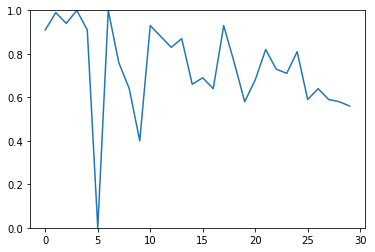

In [283]:
fig,ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=[val for val in user_8_ts[:,0] if val <=50], y=[val for i, val in enumerate(user_8_ts[:,1]) if i <=50])
ax.set(ylim=(0, 1))

[(0, 1)]

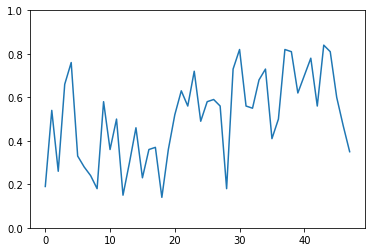

In [284]:
fig,ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=[i for i, val in enumerate(user_43_ts[:,0]) if i <=50], y=[val for i, val in enumerate(user_43_ts[:,1]) if i <=50])
ax.set(ylim=(0, 1))

In [282]:
[i for i, val in enumerate(user_43_ts[:,0]) if i <=30]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [294]:
from scipy.stats import wilcoxon

In [295]:
wilcoxon(x=[17.3],y=[17.15])

C:\Users\subash\Anaconda3\envs\python-cvcourse\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning:




WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)

In [296]:
wilcoxon(x=[17.15],y=[16.94])

C:\Users\subash\Anaconda3\envs\python-cvcourse\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning:




WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)